In [130]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import tensorflow as tf 
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,GlobalMaxPooling2D


In [131]:
from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications import ResNet50

In [132]:
resnet=ResNet50(include_top=False,input_shape=(224,224,3),weights='imagenet')


In [133]:
resnet.trainable=False

In [134]:
# model.summary()
from keras import Sequential

In [135]:
model=Sequential()
model.add(resnet)
model.add(GlobalMaxPooling2D())


In [136]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [137]:
model.save("model.h5")


In [139]:
import tensorflow as tf

# Load the model
loaded_model = tf.keras.models.load_model('model.h5')


In [8]:
from keras.utils import image_dataset_from_directory


In [9]:
# image_dataset_from_directory(
#     "/Users/khumapokharel/Desktop/deepLearning/deep_learning/FashionRecommendation_System/FashionImages/images",
#     labels='inferred',
#     label_mode="categorical",
    
    
# )




# feature extraction of the 1 image 

In [10]:
from tensorflow.keras.preprocessing.image import load_img


In [11]:
image=load_img("/Users/khumapokharel/Desktop/deepLearning/deep_learning/FashionRecommendation_System/FashionImages/images/1163.jpg",target_size=(224,224))


In [12]:
from tensorflow.keras.preprocessing.image import img_to_array

In [13]:
image=img_to_array(image)

In [14]:
image.shape
image

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [15]:
import numpy as np 
image=np.expand_dims(image,axis=0)

In [16]:
image.shape

(1, 224, 224, 3)

In [17]:
from tensorflow.keras.applications.resnet50  import preprocess_input

In [18]:
preprocessedimage=preprocess_input(image)

In [19]:
preprocessedimage

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [141]:
# model.predict(preprocessedimage).shape


1/1 [==============================] - 0s 60ms/step


array([[ 1.635139 , 19.324402 ,  1.8080337, ...,  1.1685843, 17.437449 ,
        12.099036 ]], dtype=float32)

In [21]:
model.predict(preprocessedimage).flatten().shape

1/1 [==============================] - 0s 31ms/step


(2048,)

In [22]:
from numpy.linalg import norm


In [23]:
norm(model.predict(preprocessedimage).flatten())

1/1 [==============================] - 0s 20ms/step


332.4353

underrootof (x2-x1)(y2-y1)
# Finding it from the origin

In [24]:
np.sqrt(np.dot(model.predict(preprocessedimage).flatten(),model.predict(preprocessedimage).flatten()))


1/1 [==============================] - 0s 18ms/step


332.4353

In [25]:
#normalizinfg the image
model.predict(preprocessedimage).flatten()/norm(model.predict(preprocessedimage).flatten())

1/1 [==============================] - 0s 19ms/step


array([0.00491867, 0.05812981, 0.00543875, ..., 0.00351522, 0.05245366,
       0.03639516], dtype=float32)

In [26]:
import numpy as np
 
# initializing points in
# numpy arrays
point1 = np.array((1, 2, 3))
point2 = np.array((1, 1, 1))
 
# calculating Euclidean distance
# using linalg.norm()
dist = np.linalg.norm(point1 - point2)
 
# printing Euclidean distance
print(dist)

2.23606797749979


In [27]:
np.linalg.norm(point1)

3.7416573867739413

# function for the extracting the feature from the image 

In [28]:

def extractingfeature(imagepath):
    image=load_img(imagepath,target_size=(224,224))
    image=img_to_array(image)
    image=np.expand_dims(image,axis=0)
    preprocessedimage=preprocess_input(image)
    result=model.predict(preprocessedimage).flatten()
    normalizedresult=result/norm(result)
    
    return normalizedresult
    
    






In [29]:
extracted_feature=[]

In [1]:
import os 


In [31]:
filenames=[]
for i in os.listdir("/Users/khumapokharel/Desktop/deepLearning/deep_learning/FashionRecommendation_System/FashionImages/images"):
    filenames.append(os.path.join("/Users/khumapokharel/Desktop/deepLearning/deep_learning/FashionRecommendation_System/FashionImages/images",i))
    





In [5]:
filenames=[]
for i in os.listdir("/Users/khumapokharel/Desktop/geekyshowsagiserver/FashionRecommendationSystem/recommandor/static/images"):
    filenames.append(os.path.join("/static/images",i))
    


In [7]:
#for website 
# import pickle 
# pickle.dump(filenames,open("images.pkl","wb"))

In [3]:
# /static/images

# import pickle 
# pickle.dump(filenames,open("images.pkl","wb"))

In [32]:
# for i in tqdm(filenames):
#     extracted_feature.append(extractingfeature(i))
    
    

In [33]:
from tqdm import tqdm

# Assuming `filenames` is a list of file names
for filename in tqdm(filenames):
    extracted_feature.append(extractingfeature(filename))

  0%|                                                                                                                                                      | 0/44441 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


  0%|                                                                                                                                              | 3/44441 [00:00<31:47, 23.29it/s]

1/1 [==============================] - 0s 19ms/step


  0%|                                                                                                                                              | 6/44441 [00:00<29:51, 24.80it/s]

1/1 [==============================] - 0s 19ms/step


  0%|                                                                                                                                              | 9/44441 [00:00<30:09, 24.55it/s]

1/1 [==============================] - 0s 19ms/step


  0%|                                                                                                                                             | 12/44441 [00:00<30:04, 24.62it/s]

1/1 [==============================] - 0s 18ms/step


  0%|                                                                                                                                             | 15/44441 [00:00<30:22, 24.38it/s]

1/1 [==============================] - 0s 19ms/step


  0%|                                                                                                                                             | 18/44441 [00:00<29:42, 24.92it/s]

1/1 [==============================] - 0s 19ms/step


  0%|                                                                                                                                             | 21/44441 [00:00<29:30, 25.08it/s]

1/1 [==============================] - 0s 19ms/step


  0%|                                                                                                                                             | 24/44441 [00:00<30:24, 24.35it/s]

1/1 [==============================] - 0s 19ms/step


  0%|                                                                                                                                             | 27/44441 [00:01<30:26, 24.32it/s]

1/1 [==============================] - 0s 20ms/step


  0%|                                                                                                                                             | 30/44441 [00:01<30:59, 23.89it/s]

1/1 [==============================] - 0s 20ms/step


  0%|                                                                                                                                             | 33/44441 [00:01<30:32, 24.23it/s]

1/1 [==============================] - 0s 19ms/step


  0%|                                                                                                                                             | 36/44441 [00:01<30:20, 24.39it/s]

1/1 [==============================] - 0s 23ms/step


  0%|                                                                                                                                             | 39/44441 [00:01<30:50, 24.00it/s]

1/1 [==============================] - 0s 21ms/step


  0%|▏                                                                                                                                            | 42/44441 [00:01<30:58, 23.89it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▏                                                                                                                                            | 45/44441 [00:01<30:53, 23.95it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▏                                                                                                                                            | 48/44441 [00:01<31:26, 23.53it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▏                                                                                                                                            | 51/44441 [00:02<30:56, 23.92it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▏                                                                                                                                            | 54/44441 [00:02<31:01, 23.84it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▏                                                                                                                                            | 57/44441 [00:02<30:48, 24.01it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▏                                                                                                                                            | 60/44441 [00:02<30:39, 24.13it/s]

1/1 [==============================] - 0s 18ms/step


  0%|▏                                                                                                                                            | 63/44441 [00:02<30:16, 24.44it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▏                                                                                                                                            | 66/44441 [00:02<30:42, 24.08it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▏                                                                                                                                            | 69/44441 [00:02<30:24, 24.33it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▏                                                                                                                                            | 72/44441 [00:02<30:32, 24.22it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▏                                                                                                                                            | 75/44441 [00:03<30:36, 24.16it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▏                                                                                                                                            | 78/44441 [00:03<30:45, 24.04it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▎                                                                                                                                            | 81/44441 [00:03<30:16, 24.42it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▎                                                                                                                                            | 84/44441 [00:03<30:47, 24.01it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▎                                                                                                                                            | 87/44441 [00:03<30:14, 24.45it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▎                                                                                                                                            | 90/44441 [00:03<30:00, 24.63it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▎                                                                                                                                            | 93/44441 [00:03<29:38, 24.94it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▎                                                                                                                                            | 96/44441 [00:03<29:19, 25.21it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▎                                                                                                                                            | 99/44441 [00:04<29:54, 24.72it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▎                                                                                                                                           | 102/44441 [00:04<30:05, 24.55it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▎                                                                                                                                           | 105/44441 [00:04<29:50, 24.76it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▎                                                                                                                                           | 108/44441 [00:04<29:54, 24.70it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▎                                                                                                                                           | 111/44441 [00:04<30:04, 24.57it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▎                                                                                                                                           | 114/44441 [00:04<30:14, 24.43it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▎                                                                                                                                           | 117/44441 [00:04<30:01, 24.60it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▍                                                                                                                                           | 120/44441 [00:04<30:07, 24.51it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▍                                                                                                                                           | 123/44441 [00:05<30:45, 24.01it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▍                                                                                                                                           | 126/44441 [00:05<30:38, 24.11it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▍                                                                                                                                           | 129/44441 [00:05<31:01, 23.80it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▍                                                                                                                                           | 132/44441 [00:05<30:50, 23.95it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▍                                                                                                                                           | 135/44441 [00:05<30:24, 24.28it/s]

1/1 [==============================] - 0s 21ms/step


  0%|▍                                                                                                                                           | 138/44441 [00:05<30:36, 24.12it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▍                                                                                                                                           | 141/44441 [00:05<30:54, 23.88it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▍                                                                                                                                           | 144/44441 [00:05<30:48, 23.96it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▍                                                                                                                                           | 147/44441 [00:06<30:11, 24.45it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▍                                                                                                                                           | 150/44441 [00:06<30:15, 24.40it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▍                                                                                                                                           | 153/44441 [00:06<29:49, 24.74it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▍                                                                                                                                           | 156/44441 [00:06<30:27, 24.23it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▌                                                                                                                                           | 159/44441 [00:06<29:49, 24.74it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▌                                                                                                                                           | 162/44441 [00:06<29:46, 24.79it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▌                                                                                                                                           | 165/44441 [00:06<29:55, 24.65it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▌                                                                                                                                           | 168/44441 [00:06<30:00, 24.58it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▌                                                                                                                                           | 171/44441 [00:07<30:06, 24.50it/s]

1/1 [==============================] - 0s 21ms/step


  0%|▌                                                                                                                                           | 174/44441 [00:07<30:47, 23.97it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▌                                                                                                                                           | 177/44441 [00:07<31:10, 23.67it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▌                                                                                                                                           | 180/44441 [00:07<30:45, 23.98it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▌                                                                                                                                           | 183/44441 [00:07<31:07, 23.70it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▌                                                                                                                                           | 186/44441 [00:07<31:01, 23.78it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▌                                                                                                                                           | 189/44441 [00:07<30:32, 24.15it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▌                                                                                                                                           | 192/44441 [00:07<30:30, 24.17it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▌                                                                                                                                           | 195/44441 [00:08<30:31, 24.16it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▌                                                                                                                                           | 198/44441 [00:08<30:32, 24.15it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▋                                                                                                                                           | 201/44441 [00:08<30:58, 23.80it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▋                                                                                                                                           | 204/44441 [00:08<30:22, 24.27it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▋                                                                                                                                           | 207/44441 [00:08<30:21, 24.28it/s]

1/1 [==============================] - 0s 19ms/step


  0%|▋                                                                                                                                           | 210/44441 [00:08<30:14, 24.38it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▋                                                                                                                                           | 213/44441 [00:08<30:30, 24.17it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▋                                                                                                                                           | 216/44441 [00:08<30:03, 24.52it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▋                                                                                                                                           | 219/44441 [00:09<30:45, 23.96it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▋                                                                                                                                           | 222/44441 [00:09<30:13, 24.38it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▋                                                                                                                                           | 225/44441 [00:09<29:45, 24.76it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▋                                                                                                                                           | 228/44441 [00:09<29:54, 24.64it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▋                                                                                                                                           | 231/44441 [00:09<30:15, 24.36it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▋                                                                                                                                           | 234/44441 [00:09<30:48, 23.91it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▋                                                                                                                                           | 237/44441 [00:09<31:01, 23.75it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▊                                                                                                                                           | 240/44441 [00:09<30:41, 24.00it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▊                                                                                                                                           | 243/44441 [00:10<30:54, 23.83it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▊                                                                                                                                           | 246/44441 [00:10<30:41, 24.00it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▊                                                                                                                                           | 249/44441 [00:10<30:54, 23.83it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▊                                                                                                                                           | 252/44441 [00:10<30:42, 23.98it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▊                                                                                                                                           | 255/44441 [00:10<31:02, 23.73it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▊                                                                                                                                           | 258/44441 [00:10<31:00, 23.75it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▊                                                                                                                                           | 261/44441 [00:10<31:04, 23.69it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▊                                                                                                                                           | 264/44441 [00:10<31:24, 23.44it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▊                                                                                                                                           | 267/44441 [00:11<31:31, 23.35it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▊                                                                                                                                           | 270/44441 [00:11<31:25, 23.42it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▊                                                                                                                                           | 273/44441 [00:11<31:19, 23.50it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▊                                                                                                                                           | 276/44441 [00:11<31:13, 23.57it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▉                                                                                                                                           | 279/44441 [00:11<31:14, 23.56it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▉                                                                                                                                           | 282/44441 [00:11<31:42, 23.21it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▉                                                                                                                                           | 285/44441 [00:11<31:41, 23.23it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▉                                                                                                                                           | 288/44441 [00:11<31:23, 23.44it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▉                                                                                                                                           | 291/44441 [00:12<31:22, 23.45it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▉                                                                                                                                           | 294/44441 [00:12<31:11, 23.59it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▉                                                                                                                                           | 297/44441 [00:12<31:40, 23.22it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▉                                                                                                                                           | 300/44441 [00:12<31:47, 23.15it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▉                                                                                                                                           | 303/44441 [00:12<31:37, 23.26it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▉                                                                                                                                           | 306/44441 [00:12<30:59, 23.73it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▉                                                                                                                                           | 309/44441 [00:12<31:01, 23.71it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▉                                                                                                                                           | 312/44441 [00:12<31:15, 23.53it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▉                                                                                                                                           | 315/44441 [00:13<30:45, 23.91it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█                                                                                                                                           | 318/44441 [00:13<30:07, 24.41it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█                                                                                                                                           | 321/44441 [00:13<30:01, 24.49it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█                                                                                                                                           | 324/44441 [00:13<30:16, 24.29it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█                                                                                                                                           | 327/44441 [00:13<37:19, 19.70it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█                                                                                                                                           | 330/44441 [00:13<35:37, 20.64it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█                                                                                                                                           | 333/44441 [00:13<33:47, 21.76it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█                                                                                                                                           | 336/44441 [00:14<33:00, 22.27it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█                                                                                                                                           | 339/44441 [00:14<32:00, 22.96it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█                                                                                                                                           | 342/44441 [00:14<32:13, 22.80it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█                                                                                                                                           | 345/44441 [00:14<32:45, 22.43it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█                                                                                                                                           | 348/44441 [00:14<34:00, 21.61it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█                                                                                                                                           | 351/44441 [00:14<32:46, 22.42it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█                                                                                                                                           | 354/44441 [00:14<32:51, 22.37it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█                                                                                                                                           | 357/44441 [00:14<31:57, 22.99it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█▏                                                                                                                                          | 360/44441 [00:15<31:52, 23.05it/s]

1/1 [==============================] - 0s 24ms/step


  1%|█▏                                                                                                                                          | 363/44441 [00:15<32:00, 22.95it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▏                                                                                                                                          | 366/44441 [00:15<31:31, 23.31it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█▏                                                                                                                                          | 369/44441 [00:15<31:11, 23.55it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█▏                                                                                                                                          | 372/44441 [00:15<31:48, 23.09it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▏                                                                                                                                          | 375/44441 [00:15<31:45, 23.13it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▏                                                                                                                                          | 378/44441 [00:15<30:58, 23.70it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▏                                                                                                                                          | 381/44441 [00:15<31:06, 23.61it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▏                                                                                                                                          | 384/44441 [00:16<30:40, 23.93it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▏                                                                                                                                          | 387/44441 [00:16<30:50, 23.80it/s]

1/1 [==============================] - 0s 23ms/step


  1%|█▏                                                                                                                                          | 390/44441 [00:16<31:00, 23.68it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▏                                                                                                                                          | 393/44441 [00:16<30:30, 24.06it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▏                                                                                                                                          | 396/44441 [00:16<30:44, 23.87it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▎                                                                                                                                          | 399/44441 [00:16<31:01, 23.66it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▎                                                                                                                                          | 402/44441 [00:16<30:43, 23.89it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▎                                                                                                                                          | 405/44441 [00:16<30:21, 24.18it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▎                                                                                                                                          | 408/44441 [00:17<30:52, 23.77it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▎                                                                                                                                          | 411/44441 [00:17<30:44, 23.88it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▎                                                                                                                                          | 414/44441 [00:17<30:46, 23.84it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▎                                                                                                                                          | 417/44441 [00:17<31:16, 23.46it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▎                                                                                                                                          | 420/44441 [00:17<31:08, 23.56it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▎                                                                                                                                          | 423/44441 [00:17<30:53, 23.75it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▎                                                                                                                                          | 426/44441 [00:17<30:40, 23.92it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▎                                                                                                                                          | 429/44441 [00:17<30:40, 23.92it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▎                                                                                                                                          | 432/44441 [00:18<30:39, 23.92it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▎                                                                                                                                          | 435/44441 [00:18<30:31, 24.03it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▍                                                                                                                                          | 438/44441 [00:18<30:17, 24.21it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▍                                                                                                                                          | 441/44441 [00:18<30:26, 24.09it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▍                                                                                                                                          | 444/44441 [00:18<30:39, 23.91it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▍                                                                                                                                          | 447/44441 [00:18<30:23, 24.12it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▍                                                                                                                                          | 450/44441 [00:18<30:30, 24.03it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▍                                                                                                                                          | 453/44441 [00:18<30:25, 24.09it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▍                                                                                                                                          | 456/44441 [00:19<30:44, 23.84it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▍                                                                                                                                          | 459/44441 [00:19<30:26, 24.08it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▍                                                                                                                                          | 462/44441 [00:19<30:26, 24.08it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▍                                                                                                                                          | 465/44441 [00:19<30:37, 23.94it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▍                                                                                                                                          | 468/44441 [00:19<30:22, 24.13it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▍                                                                                                                                          | 471/44441 [00:19<30:45, 23.83it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▍                                                                                                                                          | 474/44441 [00:19<30:21, 24.13it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▌                                                                                                                                          | 477/44441 [00:19<30:14, 24.22it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▌                                                                                                                                          | 480/44441 [00:20<30:12, 24.25it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▌                                                                                                                                          | 483/44441 [00:20<30:26, 24.07it/s]

1/1 [==============================] - 0s 18ms/step


  1%|█▌                                                                                                                                          | 486/44441 [00:20<31:23, 23.34it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▌                                                                                                                                          | 489/44441 [00:20<31:03, 23.58it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▌                                                                                                                                          | 492/44441 [00:20<30:41, 23.87it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▌                                                                                                                                          | 495/44441 [00:20<30:50, 23.75it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▌                                                                                                                                          | 498/44441 [00:20<31:11, 23.48it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▌                                                                                                                                          | 501/44441 [00:21<30:48, 23.77it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▌                                                                                                                                          | 504/44441 [00:21<31:03, 23.58it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▌                                                                                                                                          | 507/44441 [00:21<30:26, 24.05it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▌                                                                                                                                          | 510/44441 [00:21<30:35, 23.94it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▌                                                                                                                                          | 513/44441 [00:21<30:26, 24.06it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▋                                                                                                                                          | 516/44441 [00:21<30:27, 24.03it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▋                                                                                                                                          | 519/44441 [00:21<30:49, 23.75it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▋                                                                                                                                          | 522/44441 [00:21<30:43, 23.82it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▋                                                                                                                                          | 525/44441 [00:22<30:51, 23.72it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▋                                                                                                                                          | 528/44441 [00:22<30:53, 23.69it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▋                                                                                                                                          | 531/44441 [00:22<30:50, 23.73it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▋                                                                                                                                          | 534/44441 [00:22<30:55, 23.66it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▋                                                                                                                                          | 537/44441 [00:22<30:50, 23.72it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▋                                                                                                                                          | 540/44441 [00:22<30:33, 23.94it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▋                                                                                                                                          | 543/44441 [00:22<31:01, 23.58it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▋                                                                                                                                          | 546/44441 [00:22<31:18, 23.36it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▋                                                                                                                                          | 549/44441 [00:23<31:00, 23.59it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▋                                                                                                                                          | 552/44441 [00:23<31:01, 23.57it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▋                                                                                                                                          | 555/44441 [00:23<31:03, 23.55it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▊                                                                                                                                          | 558/44441 [00:23<31:02, 23.57it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▊                                                                                                                                          | 561/44441 [00:23<31:02, 23.56it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▊                                                                                                                                          | 564/44441 [00:23<31:08, 23.48it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▊                                                                                                                                          | 567/44441 [00:23<30:47, 23.75it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▊                                                                                                                                          | 570/44441 [00:23<31:06, 23.51it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▊                                                                                                                                          | 573/44441 [00:24<31:15, 23.39it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▊                                                                                                                                          | 576/44441 [00:24<31:09, 23.46it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▊                                                                                                                                          | 579/44441 [00:24<31:45, 23.02it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▊                                                                                                                                          | 582/44441 [00:24<31:49, 22.97it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▊                                                                                                                                          | 585/44441 [00:24<31:55, 22.89it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▊                                                                                                                                          | 588/44441 [00:24<32:19, 22.61it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▊                                                                                                                                          | 591/44441 [00:24<31:36, 23.12it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▊                                                                                                                                          | 594/44441 [00:24<31:03, 23.53it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█▉                                                                                                                                          | 597/44441 [00:25<32:00, 22.83it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▉                                                                                                                                          | 600/44441 [00:25<32:07, 22.74it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▉                                                                                                                                          | 603/44441 [00:25<31:47, 22.98it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▉                                                                                                                                          | 606/44441 [00:25<31:58, 22.85it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▉                                                                                                                                          | 609/44441 [00:25<31:11, 23.42it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▉                                                                                                                                          | 612/44441 [00:25<31:12, 23.41it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▉                                                                                                                                          | 615/44441 [00:25<31:03, 23.51it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▉                                                                                                                                          | 618/44441 [00:25<31:12, 23.40it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▉                                                                                                                                          | 621/44441 [00:26<31:11, 23.41it/s]

1/1 [==============================] - 0s 21ms/step


  1%|█▉                                                                                                                                          | 624/44441 [00:26<31:06, 23.47it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▉                                                                                                                                          | 627/44441 [00:26<31:09, 23.44it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▉                                                                                                                                          | 630/44441 [00:26<30:40, 23.80it/s]

1/1 [==============================] - 0s 20ms/step


  1%|█▉                                                                                                                                          | 633/44441 [00:26<30:56, 23.59it/s]

1/1 [==============================] - 0s 20ms/step


  1%|██                                                                                                                                          | 636/44441 [00:26<31:07, 23.46it/s]

1/1 [==============================] - 0s 21ms/step


  1%|██                                                                                                                                          | 639/44441 [00:26<30:51, 23.66it/s]

1/1 [==============================] - 0s 22ms/step


  1%|██                                                                                                                                          | 642/44441 [00:27<31:10, 23.42it/s]

1/1 [==============================] - 0s 19ms/step


  1%|██                                                                                                                                          | 645/44441 [00:27<30:49, 23.68it/s]

1/1 [==============================] - 0s 20ms/step


  1%|██                                                                                                                                          | 648/44441 [00:27<31:03, 23.50it/s]

1/1 [==============================] - 0s 20ms/step


  1%|██                                                                                                                                          | 651/44441 [00:27<30:50, 23.66it/s]

1/1 [==============================] - 0s 20ms/step


  1%|██                                                                                                                                          | 654/44441 [00:27<31:09, 23.42it/s]

1/1 [==============================] - 0s 20ms/step


  1%|██                                                                                                                                          | 657/44441 [00:27<31:10, 23.41it/s]

1/1 [==============================] - 0s 21ms/step


  1%|██                                                                                                                                          | 660/44441 [00:27<31:01, 23.52it/s]

1/1 [==============================] - 0s 20ms/step


  1%|██                                                                                                                                          | 663/44441 [00:27<31:45, 22.97it/s]

1/1 [==============================] - 0s 20ms/step


  1%|██                                                                                                                                          | 666/44441 [00:28<31:07, 23.44it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██                                                                                                                                          | 669/44441 [00:28<31:36, 23.08it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██                                                                                                                                          | 672/44441 [00:28<30:55, 23.59it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▏                                                                                                                                         | 675/44441 [00:28<30:52, 23.63it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▏                                                                                                                                         | 678/44441 [00:28<31:56, 22.84it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▏                                                                                                                                         | 681/44441 [00:28<31:23, 23.23it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▏                                                                                                                                         | 684/44441 [00:28<31:20, 23.27it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▏                                                                                                                                         | 687/44441 [00:28<31:33, 23.11it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▏                                                                                                                                         | 690/44441 [00:29<31:04, 23.47it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▏                                                                                                                                         | 693/44441 [00:29<31:20, 23.26it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▏                                                                                                                                         | 696/44441 [00:29<31:41, 23.01it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▏                                                                                                                                         | 699/44441 [00:29<30:59, 23.53it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▏                                                                                                                                         | 702/44441 [00:29<31:16, 23.31it/s]

1/1 [==============================] - 0s 22ms/step


  2%|██▏                                                                                                                                         | 705/44441 [00:29<30:58, 23.54it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▏                                                                                                                                         | 708/44441 [00:29<31:00, 23.51it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▏                                                                                                                                         | 711/44441 [00:29<30:39, 23.77it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▏                                                                                                                                         | 714/44441 [00:30<30:54, 23.57it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▎                                                                                                                                         | 717/44441 [00:30<30:39, 23.77it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▎                                                                                                                                         | 720/44441 [00:30<31:03, 23.46it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▎                                                                                                                                         | 723/44441 [00:30<31:01, 23.48it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▎                                                                                                                                         | 726/44441 [00:30<30:56, 23.55it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▎                                                                                                                                         | 729/44441 [00:30<31:01, 23.48it/s]

1/1 [==============================] - 0s 22ms/step


  2%|██▎                                                                                                                                         | 732/44441 [00:30<31:27, 23.16it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▎                                                                                                                                         | 735/44441 [00:30<30:51, 23.60it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▎                                                                                                                                         | 738/44441 [00:31<30:59, 23.51it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▎                                                                                                                                         | 741/44441 [00:31<31:05, 23.43it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▎                                                                                                                                         | 744/44441 [00:31<31:26, 23.17it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▎                                                                                                                                         | 747/44441 [00:31<31:26, 23.16it/s]

1/1 [==============================] - 0s 22ms/step


  2%|██▎                                                                                                                                         | 750/44441 [00:31<31:11, 23.35it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▎                                                                                                                                         | 753/44441 [00:31<31:19, 23.25it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▍                                                                                                                                         | 756/44441 [00:31<31:45, 22.92it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▍                                                                                                                                         | 759/44441 [00:32<30:45, 23.67it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▍                                                                                                                                         | 762/44441 [00:32<30:45, 23.66it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▍                                                                                                                                         | 765/44441 [00:32<30:32, 23.83it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▍                                                                                                                                         | 768/44441 [00:32<31:02, 23.45it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▍                                                                                                                                         | 771/44441 [00:32<30:40, 23.73it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▍                                                                                                                                         | 774/44441 [00:32<30:47, 23.63it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▍                                                                                                                                         | 777/44441 [00:32<31:16, 23.27it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▍                                                                                                                                         | 780/44441 [00:32<30:48, 23.62it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▍                                                                                                                                         | 783/44441 [00:33<30:58, 23.49it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▍                                                                                                                                         | 786/44441 [00:33<31:00, 23.47it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▍                                                                                                                                         | 789/44441 [00:33<30:51, 23.58it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▍                                                                                                                                         | 792/44441 [00:33<31:17, 23.25it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▌                                                                                                                                         | 795/44441 [00:33<31:56, 22.77it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▌                                                                                                                                         | 798/44441 [00:33<31:13, 23.29it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▌                                                                                                                                         | 801/44441 [00:33<31:12, 23.31it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▌                                                                                                                                         | 804/44441 [00:33<31:16, 23.26it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▌                                                                                                                                         | 807/44441 [00:34<30:32, 23.81it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▌                                                                                                                                         | 810/44441 [00:34<30:57, 23.49it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▌                                                                                                                                         | 813/44441 [00:34<32:00, 22.72it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▌                                                                                                                                         | 816/44441 [00:34<31:41, 22.95it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▌                                                                                                                                         | 819/44441 [00:34<31:25, 23.14it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▌                                                                                                                                         | 822/44441 [00:34<31:59, 22.72it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▌                                                                                                                                         | 825/44441 [00:34<31:16, 23.25it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▌                                                                                                                                         | 828/44441 [00:34<31:04, 23.39it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▌                                                                                                                                         | 831/44441 [00:35<31:27, 23.11it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▋                                                                                                                                         | 834/44441 [00:35<31:10, 23.32it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▋                                                                                                                                         | 837/44441 [00:35<31:00, 23.44it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▋                                                                                                                                         | 840/44441 [00:35<31:16, 23.23it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▋                                                                                                                                         | 843/44441 [00:35<31:08, 23.33it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▋                                                                                                                                         | 846/44441 [00:35<30:47, 23.60it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▋                                                                                                                                         | 849/44441 [00:35<30:51, 23.55it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▋                                                                                                                                         | 852/44441 [00:35<30:41, 23.67it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▋                                                                                                                                         | 855/44441 [00:36<31:37, 22.97it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▋                                                                                                                                         | 858/44441 [00:36<31:37, 22.97it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▋                                                                                                                                         | 861/44441 [00:36<31:35, 22.99it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▋                                                                                                                                         | 864/44441 [00:36<31:47, 22.84it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▋                                                                                                                                         | 867/44441 [00:36<31:31, 23.03it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▋                                                                                                                                         | 870/44441 [00:36<31:14, 23.24it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▊                                                                                                                                         | 873/44441 [00:36<30:56, 23.47it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▊                                                                                                                                         | 876/44441 [00:37<31:04, 23.37it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▊                                                                                                                                         | 879/44441 [00:37<31:16, 23.22it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▊                                                                                                                                         | 882/44441 [00:37<31:28, 23.07it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▊                                                                                                                                         | 885/44441 [00:37<32:03, 22.64it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▊                                                                                                                                         | 888/44441 [00:37<31:04, 23.36it/s]

1/1 [==============================] - 0s 22ms/step


  2%|██▊                                                                                                                                         | 891/44441 [00:37<31:25, 23.09it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▊                                                                                                                                         | 894/44441 [00:37<31:09, 23.30it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▊                                                                                                                                         | 897/44441 [00:37<31:12, 23.25it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▊                                                                                                                                         | 900/44441 [00:38<30:59, 23.41it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▊                                                                                                                                         | 903/44441 [00:38<31:02, 23.38it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▊                                                                                                                                         | 906/44441 [00:38<30:52, 23.51it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▊                                                                                                                                         | 909/44441 [00:38<31:04, 23.35it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▊                                                                                                                                         | 912/44441 [00:38<31:26, 23.08it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▉                                                                                                                                         | 915/44441 [00:38<30:41, 23.63it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▉                                                                                                                                         | 918/44441 [00:38<30:54, 23.47it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▉                                                                                                                                         | 921/44441 [00:38<31:31, 23.00it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▉                                                                                                                                         | 924/44441 [00:39<31:11, 23.25it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▉                                                                                                                                         | 927/44441 [00:39<30:56, 23.43it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▉                                                                                                                                         | 930/44441 [00:39<31:35, 22.96it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▉                                                                                                                                         | 933/44441 [00:39<31:33, 22.97it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▉                                                                                                                                         | 936/44441 [00:39<30:46, 23.57it/s]

1/1 [==============================] - 0s 21ms/step


  2%|██▉                                                                                                                                         | 939/44441 [00:39<30:55, 23.45it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▉                                                                                                                                         | 942/44441 [00:39<31:18, 23.16it/s]

1/1 [==============================] - 0s 19ms/step


  2%|██▉                                                                                                                                         | 945/44441 [00:40<31:46, 22.81it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▉                                                                                                                                         | 948/44441 [00:40<32:17, 22.45it/s]

1/1 [==============================] - 0s 20ms/step


  2%|██▉                                                                                                                                         | 951/44441 [00:40<31:24, 23.08it/s]

1/1 [==============================] - 0s 22ms/step


  2%|███                                                                                                                                         | 954/44441 [00:40<31:56, 22.69it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███                                                                                                                                         | 957/44441 [00:40<31:52, 22.73it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███                                                                                                                                         | 960/44441 [00:40<32:00, 22.64it/s]

1/1 [==============================] - 0s 19ms/step


  2%|███                                                                                                                                         | 963/44441 [00:40<31:28, 23.02it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███                                                                                                                                         | 966/44441 [00:40<31:24, 23.07it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███                                                                                                                                         | 969/44441 [00:41<31:29, 23.01it/s]

1/1 [==============================] - 0s 22ms/step


  2%|███                                                                                                                                         | 972/44441 [00:41<31:27, 23.03it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███                                                                                                                                         | 975/44441 [00:41<30:56, 23.41it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███                                                                                                                                         | 978/44441 [00:41<31:24, 23.06it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███                                                                                                                                         | 981/44441 [00:41<31:22, 23.09it/s]

1/1 [==============================] - 0s 25ms/step


  2%|███                                                                                                                                         | 984/44441 [00:41<31:53, 22.71it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███                                                                                                                                         | 987/44441 [00:41<33:25, 21.67it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███                                                                                                                                         | 990/44441 [00:41<32:44, 22.11it/s]

1/1 [==============================] - 0s 19ms/step


  2%|███▏                                                                                                                                        | 993/44441 [00:42<33:01, 21.93it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▏                                                                                                                                        | 996/44441 [00:42<32:05, 22.56it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███▏                                                                                                                                        | 999/44441 [00:42<31:31, 22.96it/s]

1/1 [==============================] - 0s 22ms/step


  2%|███▏                                                                                                                                       | 1002/44441 [00:42<32:26, 22.32it/s]

1/1 [==============================] - 0s 22ms/step


  2%|███▏                                                                                                                                       | 1005/44441 [00:42<32:02, 22.60it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▏                                                                                                                                       | 1008/44441 [00:42<31:34, 22.93it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███▏                                                                                                                                       | 1011/44441 [00:42<31:44, 22.80it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███▏                                                                                                                                       | 1014/44441 [00:43<31:42, 22.83it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███▏                                                                                                                                       | 1017/44441 [00:43<31:51, 22.72it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▏                                                                                                                                       | 1020/44441 [00:43<32:30, 22.26it/s]

1/1 [==============================] - 0s 19ms/step


  2%|███▏                                                                                                                                       | 1023/44441 [00:43<31:50, 22.73it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▏                                                                                                                                       | 1026/44441 [00:43<31:08, 23.23it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▏                                                                                                                                       | 1029/44441 [00:43<31:23, 23.05it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▏                                                                                                                                       | 1032/44441 [00:43<31:45, 22.78it/s]

1/1 [==============================] - 0s 19ms/step


  2%|███▏                                                                                                                                       | 1035/44441 [00:43<31:02, 23.31it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▏                                                                                                                                       | 1038/44441 [00:44<31:08, 23.23it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▎                                                                                                                                       | 1041/44441 [00:44<30:24, 23.79it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▎                                                                                                                                       | 1044/44441 [00:44<30:38, 23.61it/s]

1/1 [==============================] - 0s 19ms/step


  2%|███▎                                                                                                                                       | 1047/44441 [00:44<31:05, 23.26it/s]

1/1 [==============================] - 0s 19ms/step


  2%|███▎                                                                                                                                       | 1050/44441 [00:44<30:51, 23.43it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▎                                                                                                                                       | 1053/44441 [00:44<30:48, 23.47it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███▎                                                                                                                                       | 1056/44441 [00:44<31:06, 23.24it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▎                                                                                                                                       | 1059/44441 [00:44<30:31, 23.69it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▎                                                                                                                                       | 1062/44441 [00:45<30:22, 23.81it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▎                                                                                                                                       | 1065/44441 [00:45<30:47, 23.48it/s]

1/1 [==============================] - 0s 19ms/step


  2%|███▎                                                                                                                                       | 1068/44441 [00:45<30:38, 23.60it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▎                                                                                                                                       | 1071/44441 [00:45<30:53, 23.40it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███▎                                                                                                                                       | 1074/44441 [00:45<30:57, 23.34it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▎                                                                                                                                       | 1077/44441 [00:45<31:07, 23.21it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▍                                                                                                                                       | 1080/44441 [00:45<31:06, 23.23it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▍                                                                                                                                       | 1083/44441 [00:46<31:13, 23.14it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▍                                                                                                                                       | 1086/44441 [00:46<31:00, 23.31it/s]

1/1 [==============================] - 0s 22ms/step


  2%|███▍                                                                                                                                       | 1089/44441 [00:46<31:25, 22.99it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▍                                                                                                                                       | 1092/44441 [00:46<31:57, 22.61it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▍                                                                                                                                       | 1095/44441 [00:46<31:29, 22.94it/s]

1/1 [==============================] - 0s 19ms/step


  2%|███▍                                                                                                                                       | 1098/44441 [00:46<31:51, 22.68it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▍                                                                                                                                       | 1101/44441 [00:46<31:50, 22.68it/s]

1/1 [==============================] - 0s 21ms/step


  2%|███▍                                                                                                                                       | 1104/44441 [00:46<31:06, 23.22it/s]

1/1 [==============================] - 0s 20ms/step


  2%|███▍                                                                                                                                       | 1107/44441 [00:47<30:44, 23.50it/s]

1/1 [==============================] - 0s 19ms/step


  2%|███▍                                                                                                                                       | 1110/44441 [00:47<30:45, 23.48it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▍                                                                                                                                       | 1113/44441 [00:47<30:52, 23.39it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▍                                                                                                                                       | 1116/44441 [00:47<30:42, 23.52it/s]

1/1 [==============================] - 0s 19ms/step


  3%|███▍                                                                                                                                       | 1119/44441 [00:47<31:06, 23.21it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▌                                                                                                                                       | 1122/44441 [00:47<30:52, 23.39it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▌                                                                                                                                       | 1125/44441 [00:47<31:40, 22.80it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▌                                                                                                                                       | 1128/44441 [00:47<31:16, 23.08it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▌                                                                                                                                       | 1131/44441 [00:48<31:01, 23.27it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▌                                                                                                                                       | 1134/44441 [00:48<30:58, 23.30it/s]

1/1 [==============================] - 0s 19ms/step


  3%|███▌                                                                                                                                       | 1137/44441 [00:48<31:04, 23.22it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▌                                                                                                                                       | 1140/44441 [00:48<30:43, 23.49it/s]

1/1 [==============================] - 0s 19ms/step


  3%|███▌                                                                                                                                       | 1143/44441 [00:48<30:13, 23.88it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▌                                                                                                                                       | 1146/44441 [00:48<30:33, 23.62it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▌                                                                                                                                       | 1149/44441 [00:48<30:17, 23.82it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▌                                                                                                                                       | 1152/44441 [00:48<30:21, 23.77it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▌                                                                                                                                       | 1155/44441 [00:49<30:36, 23.57it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▌                                                                                                                                       | 1158/44441 [00:49<30:38, 23.54it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▋                                                                                                                                       | 1161/44441 [00:49<30:40, 23.51it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▋                                                                                                                                       | 1164/44441 [00:49<31:08, 23.16it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▋                                                                                                                                       | 1167/44441 [00:49<31:11, 23.13it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▋                                                                                                                                       | 1170/44441 [00:49<30:59, 23.26it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▋                                                                                                                                       | 1173/44441 [00:49<31:18, 23.04it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▋                                                                                                                                       | 1176/44441 [00:50<31:05, 23.20it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▋                                                                                                                                       | 1179/44441 [00:50<30:38, 23.54it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▋                                                                                                                                       | 1182/44441 [00:50<31:17, 23.04it/s]

1/1 [==============================] - 0s 19ms/step


  3%|███▋                                                                                                                                       | 1185/44441 [00:50<31:03, 23.21it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▋                                                                                                                                       | 1188/44441 [00:50<31:13, 23.09it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▋                                                                                                                                       | 1191/44441 [00:50<30:49, 23.38it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▋                                                                                                                                       | 1194/44441 [00:50<31:01, 23.24it/s]

1/1 [==============================] - 0s 19ms/step


  3%|███▋                                                                                                                                       | 1197/44441 [00:50<30:50, 23.37it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▊                                                                                                                                       | 1200/44441 [00:51<31:01, 23.23it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▊                                                                                                                                       | 1203/44441 [00:51<31:28, 22.90it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▊                                                                                                                                       | 1206/44441 [00:51<31:24, 22.95it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▊                                                                                                                                       | 1209/44441 [00:51<39:01, 18.47it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▊                                                                                                                                       | 1212/44441 [00:51<36:17, 19.85it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▊                                                                                                                                       | 1215/44441 [00:51<34:59, 20.59it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▊                                                                                                                                       | 1218/44441 [00:51<34:25, 20.92it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▊                                                                                                                                       | 1221/44441 [00:52<33:36, 21.43it/s]

1/1 [==============================] - 0s 23ms/step


  3%|███▊                                                                                                                                       | 1224/44441 [00:52<33:45, 21.34it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▊                                                                                                                                       | 1227/44441 [00:52<32:42, 22.02it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▊                                                                                                                                       | 1230/44441 [00:52<31:44, 22.69it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▊                                                                                                                                       | 1233/44441 [00:52<31:36, 22.78it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▊                                                                                                                                       | 1236/44441 [00:52<31:13, 23.06it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▉                                                                                                                                       | 1239/44441 [00:52<30:17, 23.77it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▉                                                                                                                                       | 1242/44441 [00:52<31:39, 22.74it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▉                                                                                                                                       | 1245/44441 [00:53<31:24, 22.93it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▉                                                                                                                                       | 1248/44441 [00:53<31:11, 23.07it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▉                                                                                                                                       | 1251/44441 [00:53<30:19, 23.74it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▉                                                                                                                                       | 1254/44441 [00:53<31:00, 23.21it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▉                                                                                                                                       | 1257/44441 [00:53<30:57, 23.25it/s]

1/1 [==============================] - 0s 21ms/step


  3%|███▉                                                                                                                                       | 1260/44441 [00:53<31:02, 23.18it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▉                                                                                                                                       | 1263/44441 [00:53<30:21, 23.71it/s]

1/1 [==============================] - 0s 24ms/step


  3%|███▉                                                                                                                                       | 1266/44441 [00:53<30:17, 23.76it/s]

1/1 [==============================] - 0s 24ms/step


  3%|███▉                                                                                                                                       | 1269/44441 [00:54<30:46, 23.38it/s]

1/1 [==============================] - 0s 23ms/step


  3%|███▉                                                                                                                                       | 1272/44441 [00:54<30:38, 23.48it/s]

1/1 [==============================] - 0s 20ms/step


  3%|███▉                                                                                                                                       | 1275/44441 [00:54<30:21, 23.70it/s]

1/1 [==============================] - 0s 22ms/step


  3%|███▉                                                                                                                                       | 1278/44441 [00:54<30:57, 23.24it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████                                                                                                                                       | 1281/44441 [00:54<32:00, 22.47it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████                                                                                                                                       | 1284/44441 [00:54<32:46, 21.95it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████                                                                                                                                       | 1287/44441 [00:54<32:43, 21.98it/s]

1/1 [==============================] - 0s 25ms/step


  3%|████                                                                                                                                       | 1290/44441 [00:55<32:43, 21.97it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████                                                                                                                                       | 1293/44441 [00:55<32:39, 22.02it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████                                                                                                                                       | 1296/44441 [00:55<33:03, 21.75it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████                                                                                                                                       | 1299/44441 [00:55<32:56, 21.82it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████                                                                                                                                       | 1302/44441 [00:55<32:36, 22.05it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████                                                                                                                                       | 1305/44441 [00:55<31:55, 22.52it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████                                                                                                                                       | 1308/44441 [00:55<31:14, 23.01it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████                                                                                                                                       | 1311/44441 [00:55<29:59, 23.96it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████                                                                                                                                       | 1314/44441 [00:56<29:33, 24.32it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████                                                                                                                                       | 1317/44441 [00:56<29:16, 24.55it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▏                                                                                                                                      | 1320/44441 [00:56<29:37, 24.26it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▏                                                                                                                                      | 1323/44441 [00:56<29:29, 24.37it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▏                                                                                                                                      | 1326/44441 [00:56<29:12, 24.60it/s]

1/1 [==============================] - 0s 19ms/step


  3%|████▏                                                                                                                                      | 1329/44441 [00:56<29:34, 24.30it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████▏                                                                                                                                      | 1332/44441 [00:56<30:04, 23.89it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████▏                                                                                                                                      | 1335/44441 [00:56<29:28, 24.38it/s]

1/1 [==============================] - 0s 19ms/step


  3%|████▏                                                                                                                                      | 1338/44441 [00:57<29:11, 24.61it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████▏                                                                                                                                      | 1341/44441 [00:57<29:23, 24.44it/s]

1/1 [==============================] - 0s 19ms/step


  3%|████▏                                                                                                                                      | 1344/44441 [00:57<29:07, 24.66it/s]

1/1 [==============================] - 0s 19ms/step


  3%|████▏                                                                                                                                      | 1347/44441 [00:57<29:09, 24.63it/s]

1/1 [==============================] - 0s 19ms/step


  3%|████▏                                                                                                                                      | 1350/44441 [00:57<29:18, 24.50it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▏                                                                                                                                      | 1353/44441 [00:57<29:15, 24.54it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████▏                                                                                                                                      | 1356/44441 [00:57<29:09, 24.63it/s]

1/1 [==============================] - 0s 19ms/step


  3%|████▎                                                                                                                                      | 1359/44441 [00:57<28:52, 24.86it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▎                                                                                                                                      | 1362/44441 [00:58<28:50, 24.89it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████▎                                                                                                                                      | 1365/44441 [00:58<28:55, 24.82it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████▎                                                                                                                                      | 1368/44441 [00:58<28:32, 25.15it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▎                                                                                                                                      | 1371/44441 [00:58<29:31, 24.31it/s]

1/1 [==============================] - 0s 20ms/step


  3%|████▎                                                                                                                                      | 1374/44441 [00:58<29:53, 24.01it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▎                                                                                                                                      | 1377/44441 [00:58<29:33, 24.29it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▎                                                                                                                                      | 1380/44441 [00:58<29:12, 24.56it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▎                                                                                                                                      | 1383/44441 [00:58<29:07, 24.64it/s]

1/1 [==============================] - 0s 26ms/step


  3%|████▎                                                                                                                                      | 1386/44441 [00:59<29:16, 24.52it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▎                                                                                                                                      | 1389/44441 [00:59<31:23, 22.85it/s]

1/1 [==============================] - 0s 27ms/step


  3%|████▎                                                                                                                                      | 1392/44441 [00:59<33:32, 21.39it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▎                                                                                                                                      | 1395/44441 [00:59<32:52, 21.83it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▎                                                                                                                                      | 1398/44441 [00:59<31:49, 22.54it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▍                                                                                                                                      | 1401/44441 [00:59<32:39, 21.97it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▍                                                                                                                                      | 1404/44441 [00:59<32:27, 22.10it/s]

1/1 [==============================] - 0s 27ms/step


  3%|████▍                                                                                                                                      | 1407/44441 [01:00<39:02, 18.37it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▍                                                                                                                                      | 1410/44441 [01:00<38:33, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▍                                                                                                                                      | 1413/44441 [01:00<36:18, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▍                                                                                                                                      | 1416/44441 [01:00<35:35, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▍                                                                                                                                      | 1419/44441 [01:00<35:35, 20.15it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▍                                                                                                                                      | 1422/44441 [01:00<34:32, 20.76it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▍                                                                                                                                      | 1425/44441 [01:00<33:37, 21.33it/s]

1/1 [==============================] - 0s 30ms/step


  3%|████▍                                                                                                                                      | 1428/44441 [01:01<34:04, 21.04it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▍                                                                                                                                      | 1431/44441 [01:01<33:02, 21.70it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▍                                                                                                                                      | 1434/44441 [01:01<32:32, 22.02it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▍                                                                                                                                      | 1437/44441 [01:01<33:39, 21.29it/s]

1/1 [==============================] - 0s 28ms/step


  3%|████▌                                                                                                                                      | 1440/44441 [01:01<35:07, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▌                                                                                                                                      | 1443/44441 [01:01<33:41, 21.27it/s]

1/1 [==============================] - 0s 35ms/step


  3%|████▌                                                                                                                                      | 1446/44441 [01:01<35:24, 20.24it/s]

1/1 [==============================] - 0s 40ms/step


  3%|████▌                                                                                                                                      | 1449/44441 [01:02<37:18, 19.21it/s]

1/1 [==============================] - 0s 31ms/step


  3%|████▌                                                                                                                                      | 1451/44441 [01:02<39:25, 18.18it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▌                                                                                                                                      | 1453/44441 [01:02<39:45, 18.02it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▌                                                                                                                                      | 1456/44441 [01:02<37:59, 18.86it/s]

1/1 [==============================] - 0s 30ms/step


  3%|████▌                                                                                                                                      | 1458/44441 [01:02<38:30, 18.61it/s]

1/1 [==============================] - 0s 26ms/step


  3%|████▌                                                                                                                                      | 1460/44441 [01:02<38:19, 18.69it/s]

1/1 [==============================] - 0s 29ms/step


  3%|████▌                                                                                                                                      | 1462/44441 [01:02<37:57, 18.87it/s]

1/1 [==============================] - 0s 39ms/step


  3%|████▌                                                                                                                                      | 1464/44441 [01:02<39:45, 18.01it/s]

1/1 [==============================] - 0s 33ms/step


  3%|████▌                                                                                                                                      | 1466/44441 [01:03<40:47, 17.56it/s]

1/1 [==============================] - 0s 25ms/step


  3%|████▌                                                                                                                                      | 1468/44441 [01:03<40:46, 17.56it/s]

1/1 [==============================] - 0s 35ms/step


  3%|████▌                                                                                                                                      | 1470/44441 [01:03<42:13, 16.96it/s]

1/1 [==============================] - 0s 26ms/step


  3%|████▌                                                                                                                                      | 1472/44441 [01:03<42:50, 16.72it/s]

1/1 [==============================] - 0s 33ms/step


  3%|████▌                                                                                                                                      | 1474/44441 [01:03<41:52, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▌                                                                                                                                      | 1476/44441 [01:03<41:07, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▋                                                                                                                                      | 1479/44441 [01:03<38:36, 18.55it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▋                                                                                                                                      | 1481/44441 [01:03<38:30, 18.59it/s]

1/1 [==============================] - 0s 25ms/step


  3%|████▋                                                                                                                                      | 1484/44441 [01:04<37:16, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


  3%|████▋                                                                                                                                      | 1486/44441 [01:04<37:10, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▋                                                                                                                                      | 1488/44441 [01:04<37:30, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▋                                                                                                                                      | 1490/44441 [01:04<37:15, 19.21it/s]

1/1 [==============================] - 0s 28ms/step


  3%|████▋                                                                                                                                      | 1492/44441 [01:04<38:11, 18.74it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▋                                                                                                                                      | 1494/44441 [01:04<38:50, 18.43it/s]

1/1 [==============================] - 0s 27ms/step


  3%|████▋                                                                                                                                      | 1496/44441 [01:04<38:36, 18.54it/s]

1/1 [==============================] - 0s 29ms/step


  3%|████▋                                                                                                                                      | 1498/44441 [01:04<40:59, 17.46it/s]

1/1 [==============================] - 0s 34ms/step


  3%|████▋                                                                                                                                      | 1500/44441 [01:05<44:52, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


  3%|████▋                                                                                                                                      | 1502/44441 [01:05<42:21, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▋                                                                                                                                      | 1505/44441 [01:05<39:45, 18.00it/s]

1/1 [==============================] - 0s 26ms/step


  3%|████▋                                                                                                                                      | 1508/44441 [01:05<37:54, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▋                                                                                                                                      | 1511/44441 [01:05<36:00, 19.87it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▋                                                                                                                                      | 1514/44441 [01:05<34:39, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▋                                                                                                                                      | 1517/44441 [01:05<33:20, 21.45it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▊                                                                                                                                      | 1520/44441 [01:05<33:18, 21.48it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▊                                                                                                                                      | 1523/44441 [01:06<33:56, 21.07it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▊                                                                                                                                      | 1526/44441 [01:06<35:33, 20.11it/s]

1/1 [==============================] - 0s 26ms/step


  3%|████▊                                                                                                                                      | 1529/44441 [01:06<35:04, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▊                                                                                                                                      | 1532/44441 [01:06<34:59, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


  3%|████▊                                                                                                                                      | 1535/44441 [01:06<34:37, 20.65it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▊                                                                                                                                      | 1538/44441 [01:06<34:23, 20.79it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▊                                                                                                                                      | 1541/44441 [01:06<33:59, 21.03it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▊                                                                                                                                      | 1544/44441 [01:07<33:21, 21.43it/s]

1/1 [==============================] - 0s 22ms/step


  3%|████▊                                                                                                                                      | 1547/44441 [01:07<32:45, 21.82it/s]

1/1 [==============================] - 0s 21ms/step


  3%|████▊                                                                                                                                      | 1550/44441 [01:07<32:27, 22.02it/s]

1/1 [==============================] - 0s 23ms/step


  3%|████▊                                                                                                                                      | 1553/44441 [01:07<33:45, 21.17it/s]

1/1 [==============================] - 0s 24ms/step


  4%|████▊                                                                                                                                      | 1556/44441 [01:07<34:18, 20.83it/s]

1/1 [==============================] - 0s 28ms/step


  4%|████▉                                                                                                                                      | 1559/44441 [01:07<35:22, 20.20it/s]

1/1 [==============================] - 0s 20ms/step


  4%|████▉                                                                                                                                      | 1562/44441 [01:07<34:32, 20.69it/s]

1/1 [==============================] - 0s 22ms/step


  4%|████▉                                                                                                                                      | 1565/44441 [01:08<33:35, 21.27it/s]

1/1 [==============================] - 0s 21ms/step


  4%|████▉                                                                                                                                      | 1568/44441 [01:08<33:19, 21.44it/s]

1/1 [==============================] - 0s 25ms/step


  4%|████▉                                                                                                                                      | 1571/44441 [01:08<33:46, 21.15it/s]

1/1 [==============================] - 0s 21ms/step


  4%|████▉                                                                                                                                      | 1574/44441 [01:08<33:41, 21.21it/s]

1/1 [==============================] - 0s 22ms/step


  4%|████▉                                                                                                                                      | 1577/44441 [01:08<33:18, 21.45it/s]

1/1 [==============================] - 0s 20ms/step


  4%|████▉                                                                                                                                      | 1580/44441 [01:08<32:47, 21.79it/s]

1/1 [==============================] - 0s 21ms/step


  4%|████▉                                                                                                                                      | 1583/44441 [01:08<31:54, 22.38it/s]

1/1 [==============================] - 0s 21ms/step


  4%|████▉                                                                                                                                      | 1586/44441 [01:09<32:20, 22.08it/s]

1/1 [==============================] - 0s 20ms/step


  4%|████▉                                                                                                                                      | 1589/44441 [01:09<31:40, 22.55it/s]

1/1 [==============================] - 0s 21ms/step


  4%|████▉                                                                                                                                      | 1592/44441 [01:09<31:27, 22.71it/s]

1/1 [==============================] - 0s 21ms/step


  4%|████▉                                                                                                                                      | 1595/44441 [01:09<31:33, 22.63it/s]

1/1 [==============================] - 0s 21ms/step


  4%|████▉                                                                                                                                      | 1598/44441 [01:09<31:32, 22.64it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████                                                                                                                                      | 1601/44441 [01:09<32:56, 21.67it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████                                                                                                                                      | 1604/44441 [01:09<32:32, 21.94it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████                                                                                                                                      | 1607/44441 [01:09<32:24, 22.03it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████                                                                                                                                      | 1610/44441 [01:10<32:45, 21.80it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████                                                                                                                                      | 1613/44441 [01:10<32:43, 21.81it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████                                                                                                                                      | 1616/44441 [01:10<32:52, 21.71it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████                                                                                                                                      | 1619/44441 [01:10<32:04, 22.25it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████                                                                                                                                      | 1622/44441 [01:10<31:36, 22.58it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████                                                                                                                                      | 1625/44441 [01:10<31:16, 22.81it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████                                                                                                                                      | 1628/44441 [01:10<31:15, 22.82it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████                                                                                                                                      | 1631/44441 [01:11<32:42, 21.82it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████                                                                                                                                      | 1634/44441 [01:11<32:44, 21.79it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████                                                                                                                                      | 1637/44441 [01:11<32:37, 21.87it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▏                                                                                                                                     | 1640/44441 [01:11<33:07, 21.54it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▏                                                                                                                                     | 1643/44441 [01:11<33:14, 21.46it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▏                                                                                                                                     | 1646/44441 [01:11<33:54, 21.03it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▏                                                                                                                                     | 1649/44441 [01:11<33:00, 21.61it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▏                                                                                                                                     | 1652/44441 [01:12<33:50, 21.08it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▏                                                                                                                                     | 1655/44441 [01:12<32:49, 21.72it/s]

1/1 [==============================] - 0s 23ms/step


  4%|█████▏                                                                                                                                     | 1658/44441 [01:12<33:25, 21.33it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▏                                                                                                                                     | 1661/44441 [01:12<33:49, 21.08it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▏                                                                                                                                     | 1664/44441 [01:12<32:57, 21.63it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▏                                                                                                                                     | 1667/44441 [01:12<32:21, 22.03it/s]

1/1 [==============================] - 0s 24ms/step


  4%|█████▏                                                                                                                                     | 1670/44441 [01:12<31:52, 22.36it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▏                                                                                                                                     | 1673/44441 [01:13<31:37, 22.54it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▏                                                                                                                                     | 1676/44441 [01:13<31:44, 22.46it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▎                                                                                                                                     | 1679/44441 [01:13<31:11, 22.85it/s]

1/1 [==============================] - 0s 19ms/step


  4%|█████▎                                                                                                                                     | 1682/44441 [01:13<30:52, 23.08it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▎                                                                                                                                     | 1685/44441 [01:13<31:06, 22.91it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▎                                                                                                                                     | 1688/44441 [01:13<31:24, 22.69it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▎                                                                                                                                     | 1691/44441 [01:13<30:48, 23.13it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▎                                                                                                                                     | 1694/44441 [01:13<30:53, 23.06it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▎                                                                                                                                     | 1697/44441 [01:14<31:14, 22.81it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▎                                                                                                                                     | 1700/44441 [01:14<30:44, 23.17it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▎                                                                                                                                     | 1703/44441 [01:14<31:02, 22.95it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▎                                                                                                                                     | 1706/44441 [01:14<31:04, 22.92it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▎                                                                                                                                     | 1709/44441 [01:14<31:25, 22.66it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▎                                                                                                                                     | 1712/44441 [01:14<31:23, 22.68it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▎                                                                                                                                     | 1715/44441 [01:14<31:19, 22.73it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▎                                                                                                                                     | 1718/44441 [01:14<31:18, 22.74it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▍                                                                                                                                     | 1721/44441 [01:15<31:14, 22.79it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▍                                                                                                                                     | 1724/44441 [01:15<31:00, 22.96it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▍                                                                                                                                     | 1727/44441 [01:15<31:12, 22.81it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▍                                                                                                                                     | 1730/44441 [01:15<31:54, 22.31it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▍                                                                                                                                     | 1733/44441 [01:15<31:54, 22.30it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▍                                                                                                                                     | 1736/44441 [01:15<31:45, 22.42it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▍                                                                                                                                     | 1739/44441 [01:15<31:34, 22.54it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▍                                                                                                                                     | 1742/44441 [01:16<32:02, 22.21it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▍                                                                                                                                     | 1745/44441 [01:16<31:37, 22.50it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▍                                                                                                                                     | 1748/44441 [01:16<32:02, 22.21it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▍                                                                                                                                     | 1751/44441 [01:16<31:21, 22.69it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▍                                                                                                                                     | 1754/44441 [01:16<32:28, 21.90it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▍                                                                                                                                     | 1757/44441 [01:16<32:59, 21.56it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▌                                                                                                                                     | 1760/44441 [01:16<32:33, 21.85it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▌                                                                                                                                     | 1763/44441 [01:17<32:26, 21.92it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▌                                                                                                                                     | 1766/44441 [01:17<32:02, 22.20it/s]

1/1 [==============================] - 0s 23ms/step


  4%|█████▌                                                                                                                                     | 1769/44441 [01:17<31:55, 22.28it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▌                                                                                                                                     | 1772/44441 [01:17<32:10, 22.11it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▌                                                                                                                                     | 1775/44441 [01:17<32:04, 22.17it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▌                                                                                                                                     | 1778/44441 [01:17<31:34, 22.52it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▌                                                                                                                                     | 1781/44441 [01:17<31:34, 22.52it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▌                                                                                                                                     | 1784/44441 [01:17<31:45, 22.39it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▌                                                                                                                                     | 1787/44441 [01:18<31:32, 22.53it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▌                                                                                                                                     | 1790/44441 [01:18<31:17, 22.71it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▌                                                                                                                                     | 1793/44441 [01:18<31:49, 22.33it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▌                                                                                                                                     | 1796/44441 [01:18<31:37, 22.48it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1799/44441 [01:18<31:39, 22.45it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▋                                                                                                                                     | 1802/44441 [01:18<31:03, 22.89it/s]

1/1 [==============================] - 0s 23ms/step


  4%|█████▋                                                                                                                                     | 1805/44441 [01:18<31:46, 22.36it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1808/44441 [01:18<31:16, 22.71it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▋                                                                                                                                     | 1811/44441 [01:19<31:20, 22.66it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1814/44441 [01:19<31:22, 22.65it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1817/44441 [01:19<30:56, 22.96it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1820/44441 [01:19<30:54, 22.99it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1823/44441 [01:19<31:01, 22.89it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1826/44441 [01:19<30:30, 23.29it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1829/44441 [01:19<31:03, 22.87it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▋                                                                                                                                     | 1832/44441 [01:20<30:35, 23.21it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1835/44441 [01:20<30:36, 23.20it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▋                                                                                                                                     | 1838/44441 [01:20<31:21, 22.65it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▊                                                                                                                                     | 1841/44441 [01:20<32:00, 22.18it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▊                                                                                                                                     | 1844/44441 [01:20<32:02, 22.15it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▊                                                                                                                                     | 1847/44441 [01:20<31:34, 22.48it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▊                                                                                                                                     | 1850/44441 [01:20<31:45, 22.35it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▊                                                                                                                                     | 1853/44441 [01:20<31:43, 22.37it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▊                                                                                                                                     | 1856/44441 [01:21<31:25, 22.58it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▊                                                                                                                                     | 1859/44441 [01:21<31:11, 22.75it/s]

1/1 [==============================] - 0s 25ms/step


  4%|█████▊                                                                                                                                     | 1862/44441 [01:21<31:56, 22.21it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▊                                                                                                                                     | 1865/44441 [01:21<31:25, 22.58it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▊                                                                                                                                     | 1868/44441 [01:21<31:28, 22.54it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▊                                                                                                                                     | 1871/44441 [01:21<31:00, 22.88it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▊                                                                                                                                     | 1874/44441 [01:21<32:12, 22.03it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▊                                                                                                                                     | 1877/44441 [01:22<32:14, 22.00it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▉                                                                                                                                     | 1880/44441 [01:22<31:47, 22.31it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▉                                                                                                                                     | 1883/44441 [01:22<31:43, 22.36it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▉                                                                                                                                     | 1886/44441 [01:22<31:15, 22.69it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▉                                                                                                                                     | 1889/44441 [01:22<31:08, 22.77it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▉                                                                                                                                     | 1892/44441 [01:22<31:14, 22.69it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▉                                                                                                                                     | 1895/44441 [01:22<31:31, 22.49it/s]

1/1 [==============================] - 0s 21ms/step


  4%|█████▉                                                                                                                                     | 1898/44441 [01:22<31:37, 22.42it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▉                                                                                                                                     | 1901/44441 [01:23<31:38, 22.41it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▉                                                                                                                                     | 1904/44441 [01:23<31:40, 22.38it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▉                                                                                                                                     | 1907/44441 [01:23<31:24, 22.57it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▉                                                                                                                                     | 1910/44441 [01:23<31:26, 22.54it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█████▉                                                                                                                                     | 1913/44441 [01:23<30:59, 22.86it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█████▉                                                                                                                                     | 1916/44441 [01:23<31:27, 22.53it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████                                                                                                                                     | 1919/44441 [01:23<31:42, 22.35it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████                                                                                                                                     | 1922/44441 [01:24<31:34, 22.44it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██████                                                                                                                                     | 1925/44441 [01:24<31:07, 22.77it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██████                                                                                                                                     | 1928/44441 [01:24<31:13, 22.69it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██████                                                                                                                                     | 1931/44441 [01:24<31:40, 22.37it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██████                                                                                                                                     | 1934/44441 [01:24<31:15, 22.66it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████                                                                                                                                     | 1937/44441 [01:24<31:31, 22.47it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████                                                                                                                                     | 1940/44441 [01:24<31:36, 22.41it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██████                                                                                                                                     | 1943/44441 [01:24<31:41, 22.36it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████                                                                                                                                     | 1946/44441 [01:25<31:34, 22.43it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██████                                                                                                                                     | 1949/44441 [01:25<31:37, 22.39it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████                                                                                                                                     | 1952/44441 [01:25<30:53, 22.93it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████                                                                                                                                     | 1955/44441 [01:25<30:42, 23.06it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██████                                                                                                                                     | 1958/44441 [01:25<30:56, 22.88it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████▏                                                                                                                                    | 1961/44441 [01:25<30:51, 22.94it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██████▏                                                                                                                                    | 1964/44441 [01:25<31:36, 22.39it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████▏                                                                                                                                    | 1967/44441 [01:26<31:12, 22.69it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████▏                                                                                                                                    | 1970/44441 [01:26<31:11, 22.69it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██████▏                                                                                                                                    | 1973/44441 [01:26<31:25, 22.53it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██████▏                                                                                                                                    | 1976/44441 [01:26<30:58, 22.85it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████▏                                                                                                                                    | 1979/44441 [01:26<31:02, 22.80it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████▏                                                                                                                                    | 1982/44441 [01:26<31:13, 22.67it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██████▏                                                                                                                                    | 1985/44441 [01:26<31:19, 22.59it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████▏                                                                                                                                    | 1988/44441 [01:26<31:28, 22.48it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██████▏                                                                                                                                    | 1991/44441 [01:27<31:20, 22.58it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████▏                                                                                                                                    | 1994/44441 [01:27<31:40, 22.33it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██████▏                                                                                                                                    | 1997/44441 [01:27<31:26, 22.49it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▎                                                                                                                                    | 2000/44441 [01:27<31:50, 22.21it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▎                                                                                                                                    | 2003/44441 [01:27<31:09, 22.71it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▎                                                                                                                                    | 2006/44441 [01:27<31:06, 22.74it/s]

1/1 [==============================] - 0s 20ms/step


  5%|██████▎                                                                                                                                    | 2009/44441 [01:27<30:41, 23.04it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▎                                                                                                                                    | 2012/44441 [01:28<30:42, 23.03it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▎                                                                                                                                    | 2015/44441 [01:28<31:03, 22.77it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▎                                                                                                                                    | 2018/44441 [01:28<31:10, 22.68it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▎                                                                                                                                    | 2021/44441 [01:28<31:10, 22.68it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▎                                                                                                                                    | 2024/44441 [01:28<31:45, 22.26it/s]

1/1 [==============================] - 0s 36ms/step


  5%|██████▎                                                                                                                                    | 2027/44441 [01:28<37:03, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


  5%|██████▎                                                                                                                                    | 2029/44441 [01:28<37:04, 19.07it/s]

1/1 [==============================] - 0s 27ms/step


  5%|██████▎                                                                                                                                    | 2032/44441 [01:29<36:35, 19.31it/s]

1/1 [==============================] - 0s 20ms/step


  5%|██████▎                                                                                                                                    | 2035/44441 [01:29<35:07, 20.12it/s]

1/1 [==============================] - 0s 20ms/step


  5%|██████▎                                                                                                                                    | 2038/44441 [01:29<40:17, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


  5%|██████▍                                                                                                                                    | 2041/44441 [01:29<36:09, 19.54it/s]

1/1 [==============================] - 0s 20ms/step


  5%|██████▍                                                                                                                                    | 2044/44441 [01:29<33:42, 20.96it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▍                                                                                                                                    | 2047/44441 [01:29<32:29, 21.74it/s]

1/1 [==============================] - 0s 20ms/step


  5%|██████▍                                                                                                                                    | 2050/44441 [01:29<31:18, 22.57it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▍                                                                                                                                    | 2053/44441 [01:29<31:06, 22.71it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▍                                                                                                                                    | 2056/44441 [01:30<30:51, 22.90it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▍                                                                                                                                    | 2059/44441 [01:30<30:14, 23.35it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▍                                                                                                                                    | 2062/44441 [01:30<30:28, 23.17it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▍                                                                                                                                    | 2065/44441 [01:30<30:00, 23.54it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▍                                                                                                                                    | 2068/44441 [01:30<30:01, 23.53it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▍                                                                                                                                    | 2071/44441 [01:30<29:43, 23.76it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▍                                                                                                                                    | 2074/44441 [01:30<30:24, 23.22it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▍                                                                                                                                    | 2077/44441 [01:31<30:00, 23.52it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▌                                                                                                                                    | 2080/44441 [01:31<29:38, 23.82it/s]

1/1 [==============================] - 0s 24ms/step


  5%|██████▌                                                                                                                                    | 2083/44441 [01:31<30:11, 23.38it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▌                                                                                                                                    | 2086/44441 [01:31<29:35, 23.86it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▌                                                                                                                                    | 2089/44441 [01:31<29:13, 24.15it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▌                                                                                                                                    | 2092/44441 [01:31<28:56, 24.39it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▌                                                                                                                                    | 2095/44441 [01:31<28:49, 24.48it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▌                                                                                                                                    | 2098/44441 [01:31<29:19, 24.06it/s]

1/1 [==============================] - 0s 26ms/step


  5%|██████▌                                                                                                                                    | 2101/44441 [01:32<30:17, 23.29it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▌                                                                                                                                    | 2104/44441 [01:32<30:31, 23.11it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▌                                                                                                                                    | 2107/44441 [01:32<29:50, 23.64it/s]

1/1 [==============================] - 0s 24ms/step


  5%|██████▌                                                                                                                                    | 2110/44441 [01:32<29:55, 23.58it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▌                                                                                                                                    | 2113/44441 [01:32<29:23, 24.00it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▌                                                                                                                                    | 2116/44441 [01:32<29:15, 24.10it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▋                                                                                                                                    | 2119/44441 [01:32<30:48, 22.90it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▋                                                                                                                                    | 2122/44441 [01:32<30:27, 23.16it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▋                                                                                                                                    | 2125/44441 [01:33<30:01, 23.48it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▋                                                                                                                                    | 2128/44441 [01:33<30:49, 22.88it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██████▋                                                                                                                                    | 2131/44441 [01:33<32:29, 21.70it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▋                                                                                                                                    | 2134/44441 [01:33<33:10, 21.25it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▋                                                                                                                                    | 2137/44441 [01:33<32:49, 21.48it/s]

1/1 [==============================] - 0s 31ms/step


  5%|██████▋                                                                                                                                    | 2140/44441 [01:33<35:04, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▋                                                                                                                                    | 2143/44441 [01:33<34:24, 20.49it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▋                                                                                                                                    | 2146/44441 [01:34<34:19, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▋                                                                                                                                    | 2149/44441 [01:34<34:11, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


  5%|██████▋                                                                                                                                    | 2152/44441 [01:34<34:24, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


  5%|██████▋                                                                                                                                    | 2155/44441 [01:34<34:06, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


  5%|██████▋                                                                                                                                    | 2158/44441 [01:34<34:12, 20.60it/s]

1/1 [==============================] - 0s 27ms/step


  5%|██████▊                                                                                                                                    | 2161/44441 [01:34<35:36, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▊                                                                                                                                    | 2163/44441 [01:34<36:40, 19.21it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▊                                                                                                                                    | 2166/44441 [01:35<35:00, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


  5%|██████▊                                                                                                                                    | 2169/44441 [01:35<35:57, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


  5%|██████▊                                                                                                                                    | 2171/44441 [01:35<35:51, 19.64it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▊                                                                                                                                    | 2174/44441 [01:35<34:25, 20.47it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▊                                                                                                                                    | 2177/44441 [01:35<33:40, 20.92it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▊                                                                                                                                    | 2180/44441 [01:35<32:32, 21.64it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▊                                                                                                                                    | 2183/44441 [01:35<32:44, 21.51it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▊                                                                                                                                    | 2186/44441 [01:35<32:04, 21.96it/s]

1/1 [==============================] - 0s 29ms/step


  5%|██████▊                                                                                                                                    | 2189/44441 [01:36<32:19, 21.79it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▊                                                                                                                                    | 2192/44441 [01:36<32:48, 21.47it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▊                                                                                                                                    | 2195/44441 [01:36<32:13, 21.85it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▊                                                                                                                                    | 2198/44441 [01:36<30:58, 22.72it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▉                                                                                                                                    | 2201/44441 [01:36<31:28, 22.37it/s]

1/1 [==============================] - 0s 23ms/step


  5%|██████▉                                                                                                                                    | 2204/44441 [01:36<30:56, 22.75it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▉                                                                                                                                    | 2207/44441 [01:36<30:47, 22.87it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▉                                                                                                                                    | 2210/44441 [01:37<30:52, 22.80it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▉                                                                                                                                    | 2213/44441 [01:37<30:29, 23.08it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▉                                                                                                                                    | 2216/44441 [01:37<30:40, 22.94it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▉                                                                                                                                    | 2219/44441 [01:37<31:18, 22.48it/s]

1/1 [==============================] - 0s 22ms/step


  5%|██████▉                                                                                                                                    | 2222/44441 [01:37<32:14, 21.83it/s]

1/1 [==============================] - 0s 21ms/step


  5%|██████▉                                                                                                                                    | 2225/44441 [01:37<30:52, 22.78it/s]

1/1 [==============================] - 0s 20ms/step


  5%|██████▉                                                                                                                                    | 2228/44441 [01:37<30:27, 23.10it/s]

1/1 [==============================] - 0s 25ms/step


  5%|██████▉                                                                                                                                    | 2231/44441 [01:37<30:50, 22.81it/s]

1/1 [==============================] - 0s 30ms/step


  5%|██████▉                                                                                                                                    | 2234/44441 [01:38<32:31, 21.63it/s]

1/1 [==============================] - 0s 27ms/step


  5%|██████▉                                                                                                                                    | 2237/44441 [01:38<33:36, 20.93it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███████                                                                                                                                    | 2240/44441 [01:38<36:41, 19.17it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███████                                                                                                                                    | 2242/44441 [01:38<36:29, 19.28it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████                                                                                                                                    | 2244/44441 [01:38<36:11, 19.43it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████                                                                                                                                    | 2247/44441 [01:38<35:01, 20.08it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████                                                                                                                                    | 2250/44441 [01:38<33:59, 20.69it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████                                                                                                                                    | 2253/44441 [01:39<32:46, 21.45it/s]

1/1 [==============================] - 0s 24ms/step


  5%|███████                                                                                                                                    | 2256/44441 [01:39<31:57, 22.00it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████                                                                                                                                    | 2259/44441 [01:39<31:25, 22.37it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████                                                                                                                                    | 2262/44441 [01:39<31:34, 22.26it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████                                                                                                                                    | 2265/44441 [01:39<30:56, 22.72it/s]

1/1 [==============================] - 0s 20ms/step


  5%|███████                                                                                                                                    | 2268/44441 [01:39<29:59, 23.44it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████                                                                                                                                    | 2271/44441 [01:39<29:39, 23.70it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████                                                                                                                                    | 2274/44441 [01:39<29:54, 23.49it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████                                                                                                                                    | 2277/44441 [01:40<29:55, 23.48it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▏                                                                                                                                   | 2280/44441 [01:40<29:44, 23.62it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▏                                                                                                                                   | 2283/44441 [01:40<29:44, 23.62it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▏                                                                                                                                   | 2286/44441 [01:40<29:07, 24.12it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▏                                                                                                                                   | 2289/44441 [01:40<29:41, 23.66it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▏                                                                                                                                   | 2292/44441 [01:40<29:39, 23.69it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▏                                                                                                                                   | 2295/44441 [01:40<29:12, 24.05it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▏                                                                                                                                   | 2298/44441 [01:40<28:54, 24.30it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▏                                                                                                                                   | 2301/44441 [01:41<29:23, 23.89it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▏                                                                                                                                   | 2304/44441 [01:41<29:38, 23.69it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▏                                                                                                                                   | 2307/44441 [01:41<29:20, 23.93it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▏                                                                                                                                   | 2310/44441 [01:41<29:53, 23.49it/s]

1/1 [==============================] - 0s 20ms/step


  5%|███████▏                                                                                                                                   | 2313/44441 [01:41<30:06, 23.31it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▏                                                                                                                                   | 2316/44441 [01:41<29:36, 23.71it/s]

1/1 [==============================] - 0s 20ms/step


  5%|███████▎                                                                                                                                   | 2319/44441 [01:41<29:52, 23.50it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▎                                                                                                                                   | 2322/44441 [01:42<30:01, 23.38it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▎                                                                                                                                   | 2325/44441 [01:42<29:55, 23.46it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▎                                                                                                                                   | 2328/44441 [01:42<30:02, 23.36it/s]

1/1 [==============================] - 0s 20ms/step


  5%|███████▎                                                                                                                                   | 2331/44441 [01:42<29:49, 23.53it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▎                                                                                                                                   | 2334/44441 [01:42<30:34, 22.95it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▎                                                                                                                                   | 2337/44441 [01:42<30:04, 23.33it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▎                                                                                                                                   | 2340/44441 [01:42<29:32, 23.75it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▎                                                                                                                                   | 2343/44441 [01:42<30:01, 23.37it/s]

1/1 [==============================] - 0s 28ms/step


  5%|███████▎                                                                                                                                   | 2346/44441 [01:43<30:38, 22.90it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▎                                                                                                                                   | 2349/44441 [01:43<30:15, 23.18it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▎                                                                                                                                   | 2352/44441 [01:43<30:51, 22.73it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▎                                                                                                                                   | 2355/44441 [01:43<31:44, 22.09it/s]

1/1 [==============================] - 0s 24ms/step


  5%|███████▍                                                                                                                                   | 2358/44441 [01:43<31:44, 22.10it/s]

1/1 [==============================] - 0s 28ms/step


  5%|███████▍                                                                                                                                   | 2361/44441 [01:43<34:12, 20.50it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███████▍                                                                                                                                   | 2364/44441 [01:43<33:49, 20.73it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███████▍                                                                                                                                   | 2367/44441 [01:44<34:39, 20.23it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███████▍                                                                                                                                   | 2370/44441 [01:44<38:55, 18.02it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███████▍                                                                                                                                   | 2372/44441 [01:44<38:10, 18.36it/s]

1/1 [==============================] - 0s 25ms/step


  5%|███████▍                                                                                                                                   | 2375/44441 [01:44<37:04, 18.91it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▍                                                                                                                                   | 2378/44441 [01:44<35:59, 19.48it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███████▍                                                                                                                                   | 2380/44441 [01:44<37:16, 18.81it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▍                                                                                                                                   | 2383/44441 [01:44<35:31, 19.73it/s]

1/1 [==============================] - 0s 19ms/step


  5%|███████▍                                                                                                                                   | 2386/44441 [01:45<33:45, 20.76it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▍                                                                                                                                   | 2389/44441 [01:45<32:45, 21.39it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▍                                                                                                                                   | 2392/44441 [01:45<32:00, 21.90it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███████▍                                                                                                                                   | 2395/44441 [01:45<31:34, 22.19it/s]

1/1 [==============================] - 0s 24ms/step


  5%|███████▌                                                                                                                                   | 2398/44441 [01:45<33:24, 20.98it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▌                                                                                                                                   | 2401/44441 [01:45<33:31, 20.90it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▌                                                                                                                                   | 2404/44441 [01:45<33:20, 21.01it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▌                                                                                                                                   | 2407/44441 [01:46<32:57, 21.26it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▌                                                                                                                                   | 2410/44441 [01:46<32:33, 21.52it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▌                                                                                                                                   | 2413/44441 [01:46<31:04, 22.54it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▌                                                                                                                                   | 2416/44441 [01:46<30:44, 22.79it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▌                                                                                                                                   | 2419/44441 [01:46<30:44, 22.79it/s]

1/1 [==============================] - 0s 20ms/step


  5%|███████▌                                                                                                                                   | 2422/44441 [01:46<30:14, 23.16it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▌                                                                                                                                   | 2425/44441 [01:46<30:09, 23.22it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▌                                                                                                                                   | 2428/44441 [01:46<29:58, 23.36it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▌                                                                                                                                   | 2431/44441 [01:47<29:25, 23.79it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███████▌                                                                                                                                   | 2434/44441 [01:47<29:50, 23.47it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███████▌                                                                                                                                   | 2437/44441 [01:47<29:37, 23.64it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▋                                                                                                                                   | 2440/44441 [01:47<29:18, 23.88it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███████▋                                                                                                                                   | 2443/44441 [01:47<29:24, 23.81it/s]

1/1 [==============================] - 0s 23ms/step


  6%|███████▋                                                                                                                                   | 2446/44441 [01:47<29:29, 23.74it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▋                                                                                                                                   | 2449/44441 [01:47<29:36, 23.64it/s]

1/1 [==============================] - 0s 22ms/step


  6%|███████▋                                                                                                                                   | 2452/44441 [01:47<30:55, 22.63it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▋                                                                                                                                   | 2455/44441 [01:48<30:33, 22.90it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▋                                                                                                                                   | 2458/44441 [01:48<30:37, 22.85it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▋                                                                                                                                   | 2461/44441 [01:48<30:39, 22.82it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▋                                                                                                                                   | 2464/44441 [01:48<29:35, 23.64it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▋                                                                                                                                   | 2467/44441 [01:48<29:48, 23.46it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▋                                                                                                                                   | 2470/44441 [01:48<29:14, 23.92it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▋                                                                                                                                   | 2473/44441 [01:48<28:54, 24.20it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▋                                                                                                                                   | 2476/44441 [01:48<28:43, 24.35it/s]

1/1 [==============================] - 0s 22ms/step


  6%|███████▊                                                                                                                                   | 2479/44441 [01:49<28:30, 24.53it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▊                                                                                                                                   | 2482/44441 [01:49<28:19, 24.68it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▊                                                                                                                                   | 2485/44441 [01:49<28:27, 24.57it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▊                                                                                                                                   | 2488/44441 [01:49<28:21, 24.66it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▊                                                                                                                                   | 2491/44441 [01:49<28:44, 24.32it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▊                                                                                                                                   | 2494/44441 [01:49<28:50, 24.24it/s]

1/1 [==============================] - 0s 24ms/step


  6%|███████▊                                                                                                                                   | 2497/44441 [01:49<29:25, 23.76it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▊                                                                                                                                   | 2500/44441 [01:49<29:37, 23.59it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▊                                                                                                                                   | 2503/44441 [01:50<29:12, 23.93it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▊                                                                                                                                   | 2506/44441 [01:50<29:15, 23.88it/s]

1/1 [==============================] - 0s 19ms/step


  6%|███████▊                                                                                                                                   | 2509/44441 [01:50<28:58, 24.12it/s]

1/1 [==============================] - 0s 22ms/step


  6%|███████▊                                                                                                                                   | 2512/44441 [01:50<28:55, 24.16it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▊                                                                                                                                   | 2515/44441 [01:50<28:35, 24.44it/s]

1/1 [==============================] - 0s 22ms/step


  6%|███████▉                                                                                                                                   | 2518/44441 [01:50<28:30, 24.51it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▉                                                                                                                                   | 2521/44441 [01:50<29:28, 23.70it/s]

1/1 [==============================] - 0s 19ms/step


  6%|███████▉                                                                                                                                   | 2524/44441 [01:50<29:55, 23.35it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▉                                                                                                                                   | 2527/44441 [01:51<29:15, 23.87it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▉                                                                                                                                   | 2530/44441 [01:51<29:38, 23.56it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▉                                                                                                                                   | 2533/44441 [01:51<29:04, 24.02it/s]

1/1 [==============================] - 0s 21ms/step


  6%|███████▉                                                                                                                                   | 2536/44441 [01:51<28:57, 24.12it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▉                                                                                                                                   | 2539/44441 [01:51<28:50, 24.21it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▉                                                                                                                                   | 2542/44441 [01:51<29:09, 23.95it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▉                                                                                                                                   | 2545/44441 [01:51<28:58, 24.10it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▉                                                                                                                                   | 2548/44441 [01:51<28:32, 24.46it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▉                                                                                                                                   | 2551/44441 [01:52<28:58, 24.09it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▉                                                                                                                                   | 2554/44441 [01:52<28:40, 24.34it/s]

1/1 [==============================] - 0s 20ms/step


  6%|███████▉                                                                                                                                   | 2557/44441 [01:52<28:28, 24.52it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████                                                                                                                                   | 2560/44441 [01:52<28:39, 24.36it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████                                                                                                                                   | 2563/44441 [01:52<28:25, 24.56it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████                                                                                                                                   | 2566/44441 [01:52<28:24, 24.57it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████                                                                                                                                   | 2569/44441 [01:52<28:21, 24.61it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████                                                                                                                                   | 2572/44441 [01:52<28:07, 24.81it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████                                                                                                                                   | 2575/44441 [01:53<28:07, 24.81it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████                                                                                                                                   | 2578/44441 [01:53<28:01, 24.89it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████                                                                                                                                   | 2581/44441 [01:53<27:58, 24.94it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████                                                                                                                                   | 2584/44441 [01:53<27:56, 24.96it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████                                                                                                                                   | 2587/44441 [01:53<28:22, 24.58it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████                                                                                                                                   | 2590/44441 [01:53<28:19, 24.63it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████                                                                                                                                   | 2593/44441 [01:53<28:19, 24.63it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████                                                                                                                                   | 2596/44441 [01:53<28:44, 24.26it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▏                                                                                                                                  | 2599/44441 [01:53<28:31, 24.45it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▏                                                                                                                                  | 2602/44441 [01:54<28:24, 24.55it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▏                                                                                                                                  | 2605/44441 [01:54<28:00, 24.90it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▏                                                                                                                                  | 2608/44441 [01:54<28:05, 24.82it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▏                                                                                                                                  | 2611/44441 [01:54<27:59, 24.90it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████████▏                                                                                                                                  | 2614/44441 [01:54<28:30, 24.46it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▏                                                                                                                                  | 2617/44441 [01:54<28:46, 24.22it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▏                                                                                                                                  | 2620/44441 [01:54<28:37, 24.36it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▏                                                                                                                                  | 2623/44441 [01:54<28:20, 24.59it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▏                                                                                                                                  | 2626/44441 [01:55<28:15, 24.66it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▏                                                                                                                                  | 2629/44441 [01:55<28:04, 24.83it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▏                                                                                                                                  | 2632/44441 [01:55<28:03, 24.83it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▏                                                                                                                                  | 2635/44441 [01:55<27:58, 24.91it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▎                                                                                                                                  | 2638/44441 [01:55<28:09, 24.74it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▎                                                                                                                                  | 2641/44441 [01:55<28:19, 24.59it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▎                                                                                                                                  | 2644/44441 [01:55<28:21, 24.57it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▎                                                                                                                                  | 2647/44441 [01:55<28:19, 24.59it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▎                                                                                                                                  | 2650/44441 [01:56<28:18, 24.60it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▎                                                                                                                                  | 2653/44441 [01:56<28:02, 24.84it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▎                                                                                                                                  | 2656/44441 [01:56<27:59, 24.89it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▎                                                                                                                                  | 2659/44441 [01:56<28:25, 24.50it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▎                                                                                                                                  | 2662/44441 [01:56<28:08, 24.74it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▎                                                                                                                                  | 2665/44441 [01:56<28:50, 24.14it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▎                                                                                                                                  | 2668/44441 [01:56<28:31, 24.40it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▎                                                                                                                                  | 2671/44441 [01:56<28:18, 24.59it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▎                                                                                                                                  | 2674/44441 [01:57<28:11, 24.70it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▎                                                                                                                                  | 2677/44441 [01:57<28:11, 24.69it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▍                                                                                                                                  | 2680/44441 [01:57<27:54, 24.94it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▍                                                                                                                                  | 2683/44441 [01:57<27:54, 24.93it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▍                                                                                                                                  | 2686/44441 [01:57<28:29, 24.43it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▍                                                                                                                                  | 2689/44441 [01:57<28:08, 24.73it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▍                                                                                                                                  | 2692/44441 [01:57<27:55, 24.92it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▍                                                                                                                                  | 2695/44441 [01:57<28:05, 24.77it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▍                                                                                                                                  | 2698/44441 [01:58<28:04, 24.79it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▍                                                                                                                                  | 2701/44441 [01:58<27:49, 25.00it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▍                                                                                                                                  | 2704/44441 [01:58<28:09, 24.71it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▍                                                                                                                                  | 2707/44441 [01:58<28:01, 24.82it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▍                                                                                                                                  | 2710/44441 [01:58<27:44, 25.08it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▍                                                                                                                                  | 2713/44441 [01:58<28:00, 24.82it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▍                                                                                                                                  | 2716/44441 [01:58<27:58, 24.85it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▌                                                                                                                                  | 2719/44441 [01:58<27:44, 25.07it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▌                                                                                                                                  | 2722/44441 [01:58<27:48, 25.00it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▌                                                                                                                                  | 2725/44441 [01:59<27:50, 24.97it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▌                                                                                                                                  | 2728/44441 [01:59<28:02, 24.79it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▌                                                                                                                                  | 2731/44441 [01:59<27:43, 25.07it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▌                                                                                                                                  | 2734/44441 [01:59<27:46, 25.03it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▌                                                                                                                                  | 2737/44441 [01:59<27:46, 25.02it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▌                                                                                                                                  | 2740/44441 [01:59<28:29, 24.39it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▌                                                                                                                                  | 2743/44441 [01:59<28:08, 24.70it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▌                                                                                                                                  | 2746/44441 [01:59<28:16, 24.57it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▌                                                                                                                                  | 2749/44441 [02:00<28:04, 24.76it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▌                                                                                                                                  | 2752/44441 [02:00<28:01, 24.80it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▌                                                                                                                                  | 2755/44441 [02:00<27:49, 24.97it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▋                                                                                                                                  | 2758/44441 [02:00<28:17, 24.55it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▋                                                                                                                                  | 2761/44441 [02:00<28:06, 24.72it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▋                                                                                                                                  | 2764/44441 [02:00<28:16, 24.56it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▋                                                                                                                                  | 2767/44441 [02:00<28:12, 24.63it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▋                                                                                                                                  | 2770/44441 [02:00<28:15, 24.58it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▋                                                                                                                                  | 2773/44441 [02:01<28:28, 24.39it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████████▋                                                                                                                                  | 2776/44441 [02:01<28:21, 24.49it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▋                                                                                                                                  | 2779/44441 [02:01<28:57, 23.98it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████████▋                                                                                                                                  | 2782/44441 [02:01<29:15, 23.73it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████████▋                                                                                                                                  | 2785/44441 [02:01<29:41, 23.38it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████████▋                                                                                                                                  | 2788/44441 [02:01<32:19, 21.48it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▋                                                                                                                                  | 2791/44441 [02:01<31:37, 21.95it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▋                                                                                                                                  | 2794/44441 [02:01<31:28, 22.06it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████████▋                                                                                                                                  | 2797/44441 [02:02<30:25, 22.82it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▊                                                                                                                                  | 2800/44441 [02:02<29:41, 23.37it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▊                                                                                                                                  | 2803/44441 [02:02<30:07, 23.04it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▊                                                                                                                                  | 2806/44441 [02:02<29:21, 23.63it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▊                                                                                                                                  | 2809/44441 [02:02<29:15, 23.72it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████████▊                                                                                                                                  | 2812/44441 [02:02<31:06, 22.30it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████████▊                                                                                                                                  | 2815/44441 [02:02<31:37, 21.93it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████████▊                                                                                                                                  | 2818/44441 [02:03<31:19, 22.15it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▊                                                                                                                                  | 2821/44441 [02:03<30:40, 22.61it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▊                                                                                                                                  | 2824/44441 [02:03<29:47, 23.28it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████████▊                                                                                                                                  | 2827/44441 [02:03<29:36, 23.43it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▊                                                                                                                                  | 2830/44441 [02:03<30:51, 22.47it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▊                                                                                                                                  | 2833/44441 [02:03<30:10, 22.99it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▊                                                                                                                                  | 2836/44441 [02:03<29:47, 23.27it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▉                                                                                                                                  | 2839/44441 [02:03<29:38, 23.40it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▉                                                                                                                                  | 2842/44441 [02:04<29:05, 23.84it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▉                                                                                                                                  | 2845/44441 [02:04<29:06, 23.82it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▉                                                                                                                                  | 2848/44441 [02:04<29:03, 23.86it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▉                                                                                                                                  | 2851/44441 [02:04<28:37, 24.21it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▉                                                                                                                                  | 2854/44441 [02:04<29:09, 23.77it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████████▉                                                                                                                                  | 2857/44441 [02:04<28:48, 24.06it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████████▉                                                                                                                                  | 2860/44441 [02:04<30:14, 22.91it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████████▉                                                                                                                                  | 2863/44441 [02:04<29:34, 23.43it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████████▉                                                                                                                                  | 2866/44441 [02:05<30:34, 22.66it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████████▉                                                                                                                                  | 2869/44441 [02:05<31:07, 22.26it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████████▉                                                                                                                                  | 2872/44441 [02:05<32:02, 21.63it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████████▉                                                                                                                                  | 2875/44441 [02:05<32:09, 21.54it/s]

1/1 [==============================] - 0s 22ms/step


  6%|█████████                                                                                                                                  | 2878/44441 [02:05<31:11, 22.21it/s]

1/1 [==============================] - 0s 21ms/step


  6%|█████████                                                                                                                                  | 2881/44441 [02:05<29:59, 23.09it/s]

1/1 [==============================] - 0s 20ms/step


  6%|█████████                                                                                                                                  | 2884/44441 [02:05<29:44, 23.29it/s]

1/1 [==============================] - 0s 21ms/step


  6%|█████████                                                                                                                                  | 2887/44441 [02:06<30:34, 22.65it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████████                                                                                                                                  | 2890/44441 [02:06<32:02, 21.62it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████████                                                                                                                                  | 2893/44441 [02:06<32:52, 21.06it/s]

1/1 [==============================] - 0s 23ms/step


  7%|█████████                                                                                                                                  | 2896/44441 [02:06<33:28, 20.69it/s]

1/1 [==============================] - 0s 34ms/step


  7%|█████████                                                                                                                                  | 2899/44441 [02:06<33:15, 20.82it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████████                                                                                                                                  | 2902/44441 [02:06<35:25, 19.54it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████████                                                                                                                                  | 2904/44441 [02:06<38:48, 17.84it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████████                                                                                                                                  | 2907/44441 [02:07<36:32, 18.94it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████████                                                                                                                                  | 2910/44441 [02:07<35:50, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████████                                                                                                                                  | 2912/44441 [02:07<36:12, 19.11it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████████                                                                                                                                  | 2914/44441 [02:07<36:25, 19.00it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████                                                                                                                                  | 2917/44441 [02:07<34:06, 20.29it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▏                                                                                                                                 | 2920/44441 [02:07<33:17, 20.79it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████████▏                                                                                                                                 | 2923/44441 [02:07<33:07, 20.89it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████████▏                                                                                                                                 | 2926/44441 [02:08<34:07, 20.28it/s]

1/1 [==============================] - 0s 19ms/step


  7%|█████████▏                                                                                                                                 | 2929/44441 [02:08<46:46, 14.79it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▏                                                                                                                                 | 2932/44441 [02:08<41:01, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▏                                                                                                                                 | 2935/44441 [02:08<37:15, 18.57it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▏                                                                                                                                 | 2938/44441 [02:08<34:56, 19.80it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▏                                                                                                                                 | 2941/44441 [02:08<32:54, 21.02it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▏                                                                                                                                 | 2944/44441 [02:08<31:08, 22.21it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▏                                                                                                                                 | 2947/44441 [02:09<30:57, 22.34it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▏                                                                                                                                 | 2950/44441 [02:09<30:34, 22.62it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▏                                                                                                                                 | 2953/44441 [02:09<30:18, 22.82it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▏                                                                                                                                 | 2956/44441 [02:09<29:56, 23.09it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▎                                                                                                                                 | 2959/44441 [02:09<29:26, 23.49it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████████▎                                                                                                                                 | 2962/44441 [02:09<31:12, 22.16it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████████▎                                                                                                                                 | 2965/44441 [02:09<32:21, 21.37it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████████▎                                                                                                                                 | 2968/44441 [02:10<32:38, 21.17it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████████▎                                                                                                                                 | 2971/44441 [02:10<33:49, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████████▎                                                                                                                                 | 2974/44441 [02:10<33:51, 20.41it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████████▎                                                                                                                                 | 2977/44441 [02:10<33:47, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████████▎                                                                                                                                 | 2980/44441 [02:10<33:28, 20.65it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████████▎                                                                                                                                 | 2983/44441 [02:10<35:07, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████████▎                                                                                                                                 | 2986/44441 [02:10<34:57, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████████▎                                                                                                                                 | 2988/44441 [02:11<35:26, 19.49it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████████▎                                                                                                                                 | 2991/44441 [02:11<35:14, 19.60it/s]

1/1 [==============================] - 0s 23ms/step


  7%|█████████▎                                                                                                                                 | 2994/44441 [02:11<33:47, 20.45it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▎                                                                                                                                 | 2997/44441 [02:11<32:37, 21.17it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▍                                                                                                                                 | 3000/44441 [02:11<31:43, 21.77it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▍                                                                                                                                 | 3003/44441 [02:11<31:22, 22.01it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▍                                                                                                                                 | 3006/44441 [02:11<31:28, 21.94it/s]

1/1 [==============================] - 0s 23ms/step


  7%|█████████▍                                                                                                                                 | 3009/44441 [02:11<30:47, 22.43it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▍                                                                                                                                 | 3012/44441 [02:12<30:14, 22.84it/s]

1/1 [==============================] - 0s 23ms/step


  7%|█████████▍                                                                                                                                 | 3015/44441 [02:12<29:42, 23.23it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▍                                                                                                                                 | 3018/44441 [02:12<29:20, 23.52it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▍                                                                                                                                 | 3021/44441 [02:12<30:05, 22.95it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▍                                                                                                                                 | 3024/44441 [02:12<29:29, 23.40it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▍                                                                                                                                 | 3027/44441 [02:12<29:46, 23.18it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████████▍                                                                                                                                 | 3030/44441 [02:12<32:36, 21.17it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████████▍                                                                                                                                 | 3033/44441 [02:13<32:10, 21.45it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▍                                                                                                                                 | 3036/44441 [02:13<32:01, 21.55it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▌                                                                                                                                 | 3039/44441 [02:13<32:22, 21.32it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▌                                                                                                                                 | 3042/44441 [02:13<32:11, 21.43it/s]

1/1 [==============================] - 0s 23ms/step


  7%|█████████▌                                                                                                                                 | 3045/44441 [02:13<31:32, 21.87it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▌                                                                                                                                 | 3048/44441 [02:13<30:47, 22.40it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▌                                                                                                                                 | 3051/44441 [02:13<30:14, 22.82it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▌                                                                                                                                 | 3054/44441 [02:14<30:25, 22.67it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▌                                                                                                                                 | 3057/44441 [02:14<30:50, 22.36it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▌                                                                                                                                 | 3060/44441 [02:14<30:03, 22.94it/s]

1/1 [==============================] - 0s 23ms/step


  7%|█████████▌                                                                                                                                 | 3063/44441 [02:14<30:32, 22.58it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▌                                                                                                                                 | 3066/44441 [02:14<32:32, 21.19it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████████▌                                                                                                                                 | 3069/44441 [02:14<33:09, 20.80it/s]

1/1 [==============================] - 0s 23ms/step


  7%|█████████▌                                                                                                                                 | 3072/44441 [02:14<32:57, 20.92it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▌                                                                                                                                 | 3075/44441 [02:14<32:01, 21.52it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▋                                                                                                                                 | 3078/44441 [02:15<31:49, 21.66it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▋                                                                                                                                 | 3081/44441 [02:15<32:00, 21.53it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▋                                                                                                                                 | 3084/44441 [02:15<32:14, 21.38it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▋                                                                                                                                 | 3087/44441 [02:15<31:41, 21.75it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▋                                                                                                                                 | 3090/44441 [02:15<31:48, 21.66it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▋                                                                                                                                 | 3093/44441 [02:15<31:48, 21.67it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▋                                                                                                                                 | 3096/44441 [02:15<30:52, 22.32it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▋                                                                                                                                 | 3099/44441 [02:16<30:52, 22.32it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▋                                                                                                                                 | 3102/44441 [02:16<31:20, 21.99it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▋                                                                                                                                 | 3105/44441 [02:16<31:23, 21.95it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▋                                                                                                                                 | 3108/44441 [02:16<31:40, 21.74it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▋                                                                                                                                 | 3111/44441 [02:16<31:20, 21.98it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▋                                                                                                                                 | 3114/44441 [02:16<30:48, 22.36it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▋                                                                                                                                 | 3117/44441 [02:16<31:21, 21.96it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▊                                                                                                                                 | 3120/44441 [02:17<31:07, 22.12it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▊                                                                                                                                 | 3123/44441 [02:17<30:28, 22.60it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▊                                                                                                                                 | 3126/44441 [02:17<30:58, 22.23it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▊                                                                                                                                 | 3129/44441 [02:17<30:44, 22.39it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▊                                                                                                                                 | 3132/44441 [02:17<30:37, 22.48it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▊                                                                                                                                 | 3135/44441 [02:17<30:24, 22.64it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▊                                                                                                                                 | 3138/44441 [02:17<30:41, 22.43it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▊                                                                                                                                 | 3141/44441 [02:17<30:30, 22.56it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▊                                                                                                                                 | 3144/44441 [02:18<30:51, 22.31it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▊                                                                                                                                 | 3147/44441 [02:18<30:43, 22.40it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▊                                                                                                                                 | 3150/44441 [02:18<30:38, 22.46it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▊                                                                                                                                 | 3153/44441 [02:18<30:24, 22.63it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▊                                                                                                                                 | 3156/44441 [02:18<30:40, 22.43it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▉                                                                                                                                 | 3159/44441 [02:18<31:28, 21.86it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▉                                                                                                                                 | 3162/44441 [02:18<31:28, 21.85it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▉                                                                                                                                 | 3165/44441 [02:19<31:49, 21.61it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▉                                                                                                                                 | 3168/44441 [02:19<31:28, 21.86it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▉                                                                                                                                 | 3171/44441 [02:19<31:38, 21.74it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▉                                                                                                                                 | 3174/44441 [02:19<31:49, 21.61it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▉                                                                                                                                 | 3177/44441 [02:19<31:27, 21.86it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▉                                                                                                                                 | 3180/44441 [02:19<30:53, 22.27it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████████▉                                                                                                                                 | 3183/44441 [02:19<30:48, 22.32it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████████▉                                                                                                                                 | 3186/44441 [02:20<31:18, 21.97it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████████▉                                                                                                                                 | 3189/44441 [02:20<31:12, 22.03it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████████▉                                                                                                                                 | 3192/44441 [02:20<31:13, 22.01it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████████▉                                                                                                                                 | 3195/44441 [02:20<32:26, 21.19it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████                                                                                                                                 | 3198/44441 [02:20<32:09, 21.38it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████                                                                                                                                 | 3201/44441 [02:20<32:21, 21.24it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████                                                                                                                                 | 3204/44441 [02:20<32:11, 21.35it/s]

1/1 [==============================] - 0s 24ms/step


  7%|██████████                                                                                                                                 | 3207/44441 [02:21<32:30, 21.14it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████                                                                                                                                 | 3210/44441 [02:21<31:51, 21.57it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████                                                                                                                                 | 3213/44441 [02:21<31:27, 21.85it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████                                                                                                                                 | 3216/44441 [02:21<31:15, 21.98it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████                                                                                                                                 | 3219/44441 [02:21<31:08, 22.07it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████                                                                                                                                 | 3222/44441 [02:21<30:55, 22.21it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████                                                                                                                                 | 3225/44441 [02:21<31:31, 21.79it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████                                                                                                                                 | 3228/44441 [02:21<31:44, 21.64it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████                                                                                                                                 | 3231/44441 [02:22<31:38, 21.71it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████                                                                                                                                 | 3234/44441 [02:22<31:10, 22.03it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████                                                                                                                                 | 3237/44441 [02:22<31:03, 22.11it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▏                                                                                                                                | 3240/44441 [02:22<31:40, 21.68it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████▏                                                                                                                                | 3243/44441 [02:22<32:20, 21.23it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▏                                                                                                                                | 3246/44441 [02:22<31:45, 21.62it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▏                                                                                                                                | 3249/44441 [02:22<31:57, 21.49it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▏                                                                                                                                | 3252/44441 [02:23<31:47, 21.59it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████▏                                                                                                                                | 3255/44441 [02:23<31:54, 21.52it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████▏                                                                                                                                | 3258/44441 [02:23<31:23, 21.87it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▏                                                                                                                                | 3261/44441 [02:23<31:58, 21.47it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████▏                                                                                                                                | 3264/44441 [02:23<31:35, 21.72it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▏                                                                                                                                | 3267/44441 [02:23<31:10, 22.02it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▏                                                                                                                                | 3270/44441 [02:23<30:51, 22.24it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▏                                                                                                                                | 3273/44441 [02:24<31:35, 21.72it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▏                                                                                                                                | 3276/44441 [02:24<31:18, 21.91it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▎                                                                                                                                | 3279/44441 [02:24<30:50, 22.24it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▎                                                                                                                                | 3282/44441 [02:24<31:27, 21.80it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▎                                                                                                                                | 3285/44441 [02:24<31:57, 21.46it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▎                                                                                                                                | 3288/44441 [02:24<32:09, 21.33it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████▎                                                                                                                                | 3291/44441 [02:24<32:28, 21.12it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████▎                                                                                                                                | 3294/44441 [02:25<32:15, 21.25it/s]

1/1 [==============================] - 0s 23ms/step


  7%|██████████▎                                                                                                                                | 3297/44441 [02:25<32:04, 21.38it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▎                                                                                                                                | 3300/44441 [02:25<31:49, 21.55it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▎                                                                                                                                | 3303/44441 [02:25<31:48, 21.56it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▎                                                                                                                                | 3306/44441 [02:25<32:22, 21.18it/s]

1/1 [==============================] - 0s 23ms/step


  7%|██████████▎                                                                                                                                | 3309/44441 [02:25<32:03, 21.38it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████▎                                                                                                                                | 3312/44441 [02:25<31:20, 21.87it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▎                                                                                                                                | 3315/44441 [02:25<31:17, 21.91it/s]

1/1 [==============================] - 0s 21ms/step


  7%|██████████▍                                                                                                                                | 3318/44441 [02:26<30:44, 22.29it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████▍                                                                                                                                | 3321/44441 [02:26<30:34, 22.42it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▍                                                                                                                                | 3324/44441 [02:26<30:26, 22.51it/s]

1/1 [==============================] - 0s 20ms/step


  7%|██████████▍                                                                                                                                | 3327/44441 [02:26<31:05, 22.04it/s]

1/1 [==============================] - 0s 23ms/step


  7%|██████████▍                                                                                                                                | 3330/44441 [02:26<30:47, 22.25it/s]

1/1 [==============================] - 0s 22ms/step


  7%|██████████▍                                                                                                                                | 3333/44441 [02:26<31:25, 21.80it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▍                                                                                                                                | 3336/44441 [02:26<30:34, 22.40it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▍                                                                                                                                | 3339/44441 [02:27<30:46, 22.26it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▍                                                                                                                                | 3342/44441 [02:27<31:49, 21.52it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▍                                                                                                                                | 3345/44441 [02:27<32:16, 21.23it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████████▍                                                                                                                                | 3348/44441 [02:27<32:26, 21.11it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▍                                                                                                                                | 3351/44441 [02:27<32:42, 20.94it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▍                                                                                                                                | 3354/44441 [02:27<32:43, 20.93it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▍                                                                                                                                | 3357/44441 [02:27<32:58, 20.77it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▌                                                                                                                                | 3360/44441 [02:28<32:08, 21.30it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▌                                                                                                                                | 3363/44441 [02:28<32:07, 21.31it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▌                                                                                                                                | 3366/44441 [02:28<31:16, 21.89it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████████▌                                                                                                                                | 3369/44441 [02:28<31:39, 21.63it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▌                                                                                                                                | 3372/44441 [02:28<31:32, 21.70it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▌                                                                                                                                | 3375/44441 [02:28<31:21, 21.82it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▌                                                                                                                                | 3378/44441 [02:28<31:18, 21.86it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▌                                                                                                                                | 3381/44441 [02:29<31:24, 21.79it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▌                                                                                                                                | 3384/44441 [02:29<32:15, 21.21it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▌                                                                                                                                | 3387/44441 [02:29<32:13, 21.23it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▌                                                                                                                                | 3390/44441 [02:29<31:41, 21.59it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▌                                                                                                                                | 3393/44441 [02:29<31:55, 21.43it/s]

1/1 [==============================] - 0s 19ms/step


  8%|██████████▌                                                                                                                                | 3396/44441 [02:29<31:10, 21.95it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▋                                                                                                                                | 3399/44441 [02:29<31:05, 22.00it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▋                                                                                                                                | 3402/44441 [02:29<31:12, 21.92it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▋                                                                                                                                | 3405/44441 [02:30<31:45, 21.54it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▋                                                                                                                                | 3408/44441 [02:30<31:45, 21.53it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▋                                                                                                                                | 3411/44441 [02:30<31:31, 21.70it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▋                                                                                                                                | 3414/44441 [02:30<31:16, 21.87it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▋                                                                                                                                | 3417/44441 [02:30<31:38, 21.61it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▋                                                                                                                                | 3420/44441 [02:30<31:33, 21.66it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▋                                                                                                                                | 3423/44441 [02:30<31:11, 21.92it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▋                                                                                                                                | 3426/44441 [02:31<30:41, 22.27it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▋                                                                                                                                | 3429/44441 [02:31<31:13, 21.89it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▋                                                                                                                                | 3432/44441 [02:31<31:40, 21.57it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▋                                                                                                                                | 3435/44441 [02:31<31:07, 21.96it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▊                                                                                                                                | 3438/44441 [02:31<31:29, 21.70it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▊                                                                                                                                | 3441/44441 [02:31<31:27, 21.73it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▊                                                                                                                                | 3444/44441 [02:31<31:10, 21.91it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▊                                                                                                                                | 3447/44441 [02:32<31:11, 21.90it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▊                                                                                                                                | 3450/44441 [02:32<31:10, 21.91it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▊                                                                                                                                | 3453/44441 [02:32<31:30, 21.68it/s]

1/1 [==============================] - 0s 19ms/step


  8%|██████████▊                                                                                                                                | 3456/44441 [02:32<31:12, 21.89it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▊                                                                                                                                | 3459/44441 [02:32<30:46, 22.20it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▊                                                                                                                                | 3462/44441 [02:32<30:55, 22.09it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████████▊                                                                                                                                | 3465/44441 [02:32<30:56, 22.07it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▊                                                                                                                                | 3468/44441 [02:32<30:43, 22.23it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▊                                                                                                                                | 3471/44441 [02:33<31:53, 21.41it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▊                                                                                                                                | 3474/44441 [02:33<31:21, 21.77it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▉                                                                                                                                | 3477/44441 [02:33<31:44, 21.51it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▉                                                                                                                                | 3480/44441 [02:33<31:12, 21.87it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████████▉                                                                                                                                | 3483/44441 [02:33<30:15, 22.56it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▉                                                                                                                                | 3486/44441 [02:33<30:55, 22.08it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▉                                                                                                                                | 3489/44441 [02:33<31:20, 21.78it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▉                                                                                                                                | 3492/44441 [02:34<30:48, 22.15it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▉                                                                                                                                | 3495/44441 [02:34<30:59, 22.02it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▉                                                                                                                                | 3498/44441 [02:34<31:04, 21.96it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▉                                                                                                                                | 3501/44441 [02:34<31:50, 21.43it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▉                                                                                                                                | 3504/44441 [02:34<31:21, 21.76it/s]

1/1 [==============================] - 0s 21ms/step


  8%|██████████▉                                                                                                                                | 3507/44441 [02:34<31:49, 21.44it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████████▉                                                                                                                                | 3510/44441 [02:34<31:39, 21.54it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▉                                                                                                                                | 3513/44441 [02:35<31:42, 21.52it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████████▉                                                                                                                                | 3516/44441 [02:35<31:45, 21.48it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████                                                                                                                                | 3519/44441 [02:35<31:14, 21.83it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████                                                                                                                                | 3522/44441 [02:35<31:46, 21.46it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████                                                                                                                                | 3525/44441 [02:35<31:49, 21.43it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████                                                                                                                                | 3528/44441 [02:35<31:03, 21.95it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████                                                                                                                                | 3531/44441 [02:35<31:31, 21.63it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████                                                                                                                                | 3534/44441 [02:36<30:59, 22.00it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████                                                                                                                                | 3537/44441 [02:36<31:34, 21.60it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████                                                                                                                                | 3540/44441 [02:36<32:15, 21.13it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████                                                                                                                                | 3543/44441 [02:36<31:47, 21.44it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████                                                                                                                                | 3546/44441 [02:36<31:01, 21.96it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████                                                                                                                                | 3549/44441 [02:36<31:27, 21.66it/s]

1/1 [==============================] - 0s 24ms/step


  8%|███████████                                                                                                                                | 3552/44441 [02:36<31:30, 21.63it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████                                                                                                                                | 3555/44441 [02:37<31:56, 21.33it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▏                                                                                                                               | 3558/44441 [02:37<32:12, 21.16it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▏                                                                                                                               | 3561/44441 [02:37<32:33, 20.93it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▏                                                                                                                               | 3564/44441 [02:37<31:52, 21.37it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▏                                                                                                                               | 3567/44441 [02:37<31:45, 21.45it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▏                                                                                                                               | 3570/44441 [02:37<31:32, 21.60it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▏                                                                                                                               | 3573/44441 [02:37<31:02, 21.94it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▏                                                                                                                               | 3576/44441 [02:37<31:08, 21.87it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▏                                                                                                                               | 3579/44441 [02:38<30:59, 21.97it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▏                                                                                                                               | 3582/44441 [02:38<30:27, 22.36it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▏                                                                                                                               | 3585/44441 [02:38<31:20, 21.72it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▏                                                                                                                               | 3588/44441 [02:38<30:44, 22.15it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▏                                                                                                                               | 3591/44441 [02:38<30:29, 22.33it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▏                                                                                                                               | 3594/44441 [02:38<31:35, 21.55it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▎                                                                                                                               | 3597/44441 [02:38<31:57, 21.30it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▎                                                                                                                               | 3600/44441 [02:39<31:16, 21.77it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▎                                                                                                                               | 3603/44441 [02:39<31:36, 21.54it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▎                                                                                                                               | 3606/44441 [02:39<31:44, 21.44it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▎                                                                                                                               | 3609/44441 [02:39<31:34, 21.55it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▎                                                                                                                               | 3612/44441 [02:39<31:25, 21.66it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▎                                                                                                                               | 3615/44441 [02:39<31:38, 21.51it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▎                                                                                                                               | 3618/44441 [02:39<31:02, 21.92it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▎                                                                                                                               | 3621/44441 [02:40<30:59, 21.95it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▎                                                                                                                               | 3624/44441 [02:40<30:52, 22.03it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▎                                                                                                                               | 3627/44441 [02:40<31:18, 21.73it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▎                                                                                                                               | 3630/44441 [02:40<31:13, 21.78it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▎                                                                                                                               | 3633/44441 [02:40<31:27, 21.62it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▎                                                                                                                               | 3636/44441 [02:40<30:28, 22.32it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▍                                                                                                                               | 3639/44441 [02:40<30:28, 22.31it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▍                                                                                                                               | 3642/44441 [02:40<30:05, 22.60it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▍                                                                                                                               | 3645/44441 [02:41<30:13, 22.49it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▍                                                                                                                               | 3648/44441 [02:41<30:37, 22.19it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▍                                                                                                                               | 3651/44441 [02:41<30:32, 22.26it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▍                                                                                                                               | 3654/44441 [02:41<30:39, 22.17it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▍                                                                                                                               | 3657/44441 [02:41<30:20, 22.41it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▍                                                                                                                               | 3660/44441 [02:41<30:54, 21.99it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▍                                                                                                                               | 3663/44441 [02:41<31:32, 21.55it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▍                                                                                                                               | 3666/44441 [02:42<31:24, 21.64it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▍                                                                                                                               | 3669/44441 [02:42<31:41, 21.44it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▍                                                                                                                               | 3672/44441 [02:42<31:13, 21.76it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▍                                                                                                                               | 3675/44441 [02:42<31:42, 21.42it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▌                                                                                                                               | 3678/44441 [02:42<31:54, 21.30it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▌                                                                                                                               | 3681/44441 [02:42<31:55, 21.28it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▌                                                                                                                               | 3684/44441 [02:42<32:31, 20.89it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▌                                                                                                                               | 3687/44441 [02:43<32:28, 20.91it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▌                                                                                                                               | 3690/44441 [02:43<32:48, 20.70it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▌                                                                                                                               | 3693/44441 [02:43<32:13, 21.07it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▌                                                                                                                               | 3696/44441 [02:43<31:52, 21.31it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▌                                                                                                                               | 3699/44441 [02:43<31:09, 21.80it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▌                                                                                                                               | 3702/44441 [02:43<31:38, 21.46it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▌                                                                                                                               | 3705/44441 [02:43<31:40, 21.43it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▌                                                                                                                               | 3708/44441 [02:44<30:47, 22.04it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▌                                                                                                                               | 3711/44441 [02:44<30:54, 21.96it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▌                                                                                                                               | 3714/44441 [02:44<31:27, 21.58it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▋                                                                                                                               | 3717/44441 [02:44<31:28, 21.56it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▋                                                                                                                               | 3720/44441 [02:44<31:40, 21.43it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▋                                                                                                                               | 3723/44441 [02:44<32:01, 21.19it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▋                                                                                                                               | 3726/44441 [02:44<32:20, 20.98it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▋                                                                                                                               | 3729/44441 [02:45<32:24, 20.93it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▋                                                                                                                               | 3732/44441 [02:45<32:12, 21.07it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▋                                                                                                                               | 3735/44441 [02:45<31:56, 21.24it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▋                                                                                                                               | 3738/44441 [02:45<32:16, 21.01it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▋                                                                                                                               | 3741/44441 [02:45<32:08, 21.11it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▋                                                                                                                               | 3744/44441 [02:45<31:49, 21.31it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▋                                                                                                                               | 3747/44441 [02:45<32:17, 21.01it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▋                                                                                                                               | 3750/44441 [02:46<31:29, 21.54it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▋                                                                                                                               | 3753/44441 [02:46<31:27, 21.56it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▋                                                                                                                               | 3756/44441 [02:46<31:53, 21.26it/s]

1/1 [==============================] - 0s 20ms/step


  8%|███████████▊                                                                                                                               | 3759/44441 [02:46<38:24, 17.65it/s]

1/1 [==============================] - 0s 21ms/step


  8%|███████████▊                                                                                                                               | 3762/44441 [02:46<35:43, 18.98it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▊                                                                                                                               | 3765/44441 [02:46<34:16, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▊                                                                                                                               | 3768/44441 [02:46<33:56, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████████▊                                                                                                                               | 3771/44441 [02:47<32:58, 20.56it/s]

1/1 [==============================] - 0s 22ms/step


  8%|███████████▊                                                                                                                               | 3774/44441 [02:47<32:06, 21.11it/s]

1/1 [==============================] - 0s 24ms/step


  8%|███████████▊                                                                                                                               | 3777/44441 [02:47<32:00, 21.17it/s]

1/1 [==============================] - 0s 22ms/step


  9%|███████████▊                                                                                                                               | 3780/44441 [02:47<31:58, 21.19it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████████▊                                                                                                                               | 3783/44441 [02:47<31:51, 21.27it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████████▊                                                                                                                               | 3786/44441 [02:47<31:42, 21.37it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████████▊                                                                                                                               | 3789/44441 [02:47<31:45, 21.33it/s]

1/1 [==============================] - 0s 22ms/step


  9%|███████████▊                                                                                                                               | 3792/44441 [02:48<32:06, 21.10it/s]

1/1 [==============================] - 0s 25ms/step


  9%|███████████▊                                                                                                                               | 3795/44441 [02:48<31:58, 21.18it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████████▉                                                                                                                               | 3798/44441 [02:48<33:28, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████████▉                                                                                                                               | 3801/44441 [02:48<33:04, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████████▉                                                                                                                               | 3804/44441 [02:48<33:02, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████████▉                                                                                                                               | 3807/44441 [02:48<32:48, 20.64it/s]

1/1 [==============================] - 0s 22ms/step


  9%|███████████▉                                                                                                                               | 3810/44441 [02:48<32:58, 20.54it/s]

1/1 [==============================] - 0s 25ms/step


  9%|███████████▉                                                                                                                               | 3813/44441 [02:49<32:15, 20.99it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████████▉                                                                                                                               | 3816/44441 [02:49<32:07, 21.08it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████████▉                                                                                                                               | 3819/44441 [02:49<32:54, 20.57it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████████▉                                                                                                                               | 3822/44441 [02:49<32:24, 20.89it/s]

1/1 [==============================] - 0s 21ms/step


  9%|███████████▉                                                                                                                               | 3825/44441 [02:49<32:15, 20.99it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████████▉                                                                                                                               | 3828/44441 [02:49<32:17, 20.96it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████████▉                                                                                                                               | 3831/44441 [02:49<33:05, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


  9%|███████████▉                                                                                                                               | 3834/44441 [02:50<32:46, 20.65it/s]

1/1 [==============================] - 0s 23ms/step


  9%|████████████                                                                                                                               | 3837/44441 [02:50<32:40, 20.71it/s]

1/1 [==============================] - 0s 25ms/step


  9%|████████████                                                                                                                               | 3840/44441 [02:50<33:12, 20.38it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████                                                                                                                               | 3843/44441 [02:50<32:37, 20.74it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████                                                                                                                               | 3846/44441 [02:50<31:41, 21.34it/s]

1/1 [==============================] - 0s 25ms/step


  9%|████████████                                                                                                                               | 3849/44441 [02:50<32:01, 21.13it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████                                                                                                                               | 3852/44441 [02:50<31:55, 21.19it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████                                                                                                                               | 3855/44441 [02:51<31:13, 21.66it/s]

1/1 [==============================] - 0s 23ms/step


  9%|████████████                                                                                                                               | 3858/44441 [02:51<31:28, 21.49it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████                                                                                                                               | 3861/44441 [02:51<31:40, 21.35it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████                                                                                                                               | 3864/44441 [02:51<31:52, 21.22it/s]

1/1 [==============================] - 0s 25ms/step


  9%|████████████                                                                                                                               | 3867/44441 [02:51<31:48, 21.26it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████                                                                                                                               | 3870/44441 [02:51<31:43, 21.31it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████                                                                                                                               | 3873/44441 [02:51<31:02, 21.79it/s]

1/1 [==============================] - 0s 23ms/step


  9%|████████████                                                                                                                               | 3876/44441 [02:52<31:38, 21.37it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▏                                                                                                                              | 3879/44441 [02:52<31:54, 21.19it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▏                                                                                                                              | 3882/44441 [02:52<31:41, 21.33it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▏                                                                                                                              | 3885/44441 [02:52<31:41, 21.33it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▏                                                                                                                              | 3888/44441 [02:52<31:41, 21.33it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▏                                                                                                                              | 3891/44441 [02:52<30:49, 21.93it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▏                                                                                                                              | 3894/44441 [02:52<31:12, 21.65it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▏                                                                                                                              | 3897/44441 [02:53<31:05, 21.74it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▏                                                                                                                              | 3900/44441 [02:53<31:17, 21.59it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▏                                                                                                                              | 3903/44441 [02:53<31:07, 21.70it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▏                                                                                                                              | 3906/44441 [02:53<31:39, 21.34it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▏                                                                                                                              | 3909/44441 [02:53<31:08, 21.69it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▏                                                                                                                              | 3912/44441 [02:53<31:32, 21.42it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▏                                                                                                                              | 3915/44441 [02:53<30:59, 21.79it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▎                                                                                                                              | 3918/44441 [02:54<30:38, 22.04it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▎                                                                                                                              | 3921/44441 [02:54<30:44, 21.96it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▎                                                                                                                              | 3924/44441 [02:54<31:26, 21.48it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▎                                                                                                                              | 3927/44441 [02:54<30:40, 22.01it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▎                                                                                                                              | 3930/44441 [02:54<31:17, 21.58it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▎                                                                                                                              | 3933/44441 [02:54<30:33, 22.09it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▎                                                                                                                              | 3936/44441 [02:54<30:33, 22.09it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▎                                                                                                                              | 3939/44441 [02:55<30:56, 21.81it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▎                                                                                                                              | 3942/44441 [02:55<31:03, 21.73it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▎                                                                                                                              | 3945/44441 [02:55<30:33, 22.09it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▎                                                                                                                              | 3948/44441 [02:55<30:54, 21.84it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▎                                                                                                                              | 3951/44441 [02:55<30:35, 22.06it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████▎                                                                                                                              | 3954/44441 [02:55<31:02, 21.73it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▍                                                                                                                              | 3957/44441 [02:55<30:54, 21.83it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▍                                                                                                                              | 3960/44441 [02:55<31:15, 21.58it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▍                                                                                                                              | 3963/44441 [02:56<30:49, 21.88it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▍                                                                                                                              | 3966/44441 [02:56<30:01, 22.46it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▍                                                                                                                              | 3969/44441 [02:56<29:59, 22.49it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▍                                                                                                                              | 3972/44441 [02:56<30:12, 22.33it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▍                                                                                                                              | 3975/44441 [02:56<30:48, 21.89it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████▍                                                                                                                              | 3978/44441 [02:56<30:42, 21.96it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▍                                                                                                                              | 3981/44441 [02:56<30:36, 22.03it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████▍                                                                                                                              | 3984/44441 [02:57<30:19, 22.24it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▍                                                                                                                              | 3987/44441 [02:57<30:49, 21.87it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▍                                                                                                                              | 3990/44441 [02:57<30:22, 22.19it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▍                                                                                                                              | 3993/44441 [02:57<30:47, 21.89it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▍                                                                                                                              | 3996/44441 [02:57<30:37, 22.01it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▌                                                                                                                              | 3999/44441 [02:57<30:09, 22.35it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▌                                                                                                                              | 4002/44441 [02:57<29:58, 22.48it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████▌                                                                                                                              | 4005/44441 [02:57<30:44, 21.92it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▌                                                                                                                              | 4008/44441 [02:58<31:04, 21.69it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▌                                                                                                                              | 4011/44441 [02:58<31:40, 21.27it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▌                                                                                                                              | 4014/44441 [02:58<31:45, 21.22it/s]

1/1 [==============================] - 0s 23ms/step


  9%|████████████▌                                                                                                                              | 4017/44441 [02:58<31:47, 21.20it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▌                                                                                                                              | 4020/44441 [02:58<32:09, 20.95it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▌                                                                                                                              | 4023/44441 [02:58<31:39, 21.28it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▌                                                                                                                              | 4026/44441 [02:58<31:25, 21.43it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████▌                                                                                                                              | 4029/44441 [02:59<31:33, 21.35it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▌                                                                                                                              | 4032/44441 [02:59<31:29, 21.38it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▌                                                                                                                              | 4035/44441 [02:59<30:26, 22.12it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▋                                                                                                                              | 4038/44441 [02:59<31:02, 21.69it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▋                                                                                                                              | 4041/44441 [02:59<31:08, 21.62it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▋                                                                                                                              | 4044/44441 [02:59<30:29, 22.08it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▋                                                                                                                              | 4047/44441 [02:59<31:01, 21.71it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▋                                                                                                                              | 4050/44441 [03:00<30:05, 22.37it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▋                                                                                                                              | 4053/44441 [03:00<30:44, 21.90it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▋                                                                                                                              | 4056/44441 [03:00<31:06, 21.64it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▋                                                                                                                              | 4059/44441 [03:00<31:26, 21.41it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▋                                                                                                                              | 4062/44441 [03:00<30:52, 21.80it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████▋                                                                                                                              | 4065/44441 [03:00<31:42, 21.23it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▋                                                                                                                              | 4068/44441 [03:00<32:00, 21.02it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▋                                                                                                                              | 4071/44441 [03:01<31:50, 21.13it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▋                                                                                                                              | 4074/44441 [03:01<31:49, 21.14it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▊                                                                                                                              | 4077/44441 [03:01<30:56, 21.74it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▊                                                                                                                              | 4080/44441 [03:01<30:26, 22.10it/s]

1/1 [==============================] - 0s 23ms/step


  9%|████████████▊                                                                                                                              | 4083/44441 [03:01<31:06, 21.62it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▊                                                                                                                              | 4086/44441 [03:01<31:26, 21.40it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▊                                                                                                                              | 4089/44441 [03:01<31:45, 21.18it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▊                                                                                                                              | 4092/44441 [03:02<31:34, 21.30it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▊                                                                                                                              | 4095/44441 [03:02<30:56, 21.73it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▊                                                                                                                              | 4098/44441 [03:02<30:29, 22.06it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▊                                                                                                                              | 4101/44441 [03:02<30:12, 22.26it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▊                                                                                                                              | 4104/44441 [03:02<30:12, 22.26it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▊                                                                                                                              | 4107/44441 [03:02<29:48, 22.55it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▊                                                                                                                              | 4110/44441 [03:02<30:37, 21.95it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▊                                                                                                                              | 4113/44441 [03:02<31:22, 21.42it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▊                                                                                                                              | 4116/44441 [03:03<31:20, 21.44it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████▉                                                                                                                              | 4119/44441 [03:03<31:04, 21.62it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▉                                                                                                                              | 4122/44441 [03:03<30:16, 22.20it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▉                                                                                                                              | 4125/44441 [03:03<30:39, 21.91it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▉                                                                                                                              | 4128/44441 [03:03<30:37, 21.94it/s]

1/1 [==============================] - 0s 23ms/step


  9%|████████████▉                                                                                                                              | 4131/44441 [03:03<30:45, 21.84it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▉                                                                                                                              | 4134/44441 [03:03<31:18, 21.45it/s]

1/1 [==============================] - 0s 22ms/step


  9%|████████████▉                                                                                                                              | 4137/44441 [03:04<31:54, 21.06it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▉                                                                                                                              | 4140/44441 [03:04<31:08, 21.57it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▉                                                                                                                              | 4143/44441 [03:04<30:33, 21.98it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▉                                                                                                                              | 4146/44441 [03:04<31:09, 21.55it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▉                                                                                                                              | 4149/44441 [03:04<31:48, 21.11it/s]

1/1 [==============================] - 0s 20ms/step


  9%|████████████▉                                                                                                                              | 4152/44441 [03:04<31:23, 21.39it/s]

1/1 [==============================] - 0s 21ms/step


  9%|████████████▉                                                                                                                              | 4155/44441 [03:04<31:23, 21.39it/s]

1/1 [==============================] - 0s 21ms/step


  9%|█████████████                                                                                                                              | 4158/44441 [03:05<31:37, 21.22it/s]

1/1 [==============================] - 0s 21ms/step


  9%|█████████████                                                                                                                              | 4161/44441 [03:05<31:26, 21.35it/s]

1/1 [==============================] - 0s 21ms/step


  9%|█████████████                                                                                                                              | 4164/44441 [03:05<30:55, 21.71it/s]

1/1 [==============================] - 0s 22ms/step


  9%|█████████████                                                                                                                              | 4167/44441 [03:05<31:21, 21.41it/s]

1/1 [==============================] - 0s 21ms/step


  9%|█████████████                                                                                                                              | 4170/44441 [03:05<31:07, 21.56it/s]

1/1 [==============================] - 0s 20ms/step


  9%|█████████████                                                                                                                              | 4173/44441 [03:05<31:30, 21.30it/s]

1/1 [==============================] - 0s 20ms/step


  9%|█████████████                                                                                                                              | 4176/44441 [03:05<30:53, 21.72it/s]

1/1 [==============================] - 0s 21ms/step


  9%|█████████████                                                                                                                              | 4179/44441 [03:06<30:45, 21.82it/s]

1/1 [==============================] - 0s 20ms/step


  9%|█████████████                                                                                                                              | 4182/44441 [03:06<30:38, 21.89it/s]

1/1 [==============================] - 0s 20ms/step


  9%|█████████████                                                                                                                              | 4185/44441 [03:06<30:24, 22.07it/s]

1/1 [==============================] - 0s 20ms/step


  9%|█████████████                                                                                                                              | 4188/44441 [03:06<30:01, 22.34it/s]

1/1 [==============================] - 0s 21ms/step


  9%|█████████████                                                                                                                              | 4191/44441 [03:06<30:21, 22.10it/s]

1/1 [==============================] - 0s 23ms/step


  9%|█████████████                                                                                                                              | 4194/44441 [03:06<30:29, 22.00it/s]

1/1 [==============================] - 0s 20ms/step


  9%|█████████████▏                                                                                                                             | 4197/44441 [03:06<30:54, 21.70it/s]

1/1 [==============================] - 0s 21ms/step


  9%|█████████████▏                                                                                                                             | 4200/44441 [03:07<30:55, 21.69it/s]

1/1 [==============================] - 0s 22ms/step


  9%|█████████████▏                                                                                                                             | 4203/44441 [03:07<31:31, 21.27it/s]

1/1 [==============================] - 0s 20ms/step


  9%|█████████████▏                                                                                                                             | 4206/44441 [03:07<31:21, 21.38it/s]

1/1 [==============================] - 0s 21ms/step


  9%|█████████████▏                                                                                                                             | 4209/44441 [03:07<31:32, 21.26it/s]

1/1 [==============================] - 0s 20ms/step


  9%|█████████████▏                                                                                                                             | 4212/44441 [03:07<30:36, 21.91it/s]

1/1 [==============================] - 0s 22ms/step


  9%|█████████████▏                                                                                                                             | 4215/44441 [03:07<30:58, 21.65it/s]

1/1 [==============================] - 0s 21ms/step


  9%|█████████████▏                                                                                                                             | 4218/44441 [03:07<30:59, 21.63it/s]

1/1 [==============================] - 0s 20ms/step


  9%|█████████████▏                                                                                                                             | 4221/44441 [03:07<30:47, 21.77it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▏                                                                                                                             | 4224/44441 [03:08<30:13, 22.18it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▏                                                                                                                             | 4227/44441 [03:08<31:16, 21.43it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▏                                                                                                                             | 4230/44441 [03:08<30:56, 21.66it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▏                                                                                                                             | 4233/44441 [03:08<31:29, 21.28it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█████████████▏                                                                                                                             | 4236/44441 [03:08<31:33, 21.23it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▎                                                                                                                             | 4239/44441 [03:08<31:10, 21.49it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▎                                                                                                                             | 4242/44441 [03:08<31:09, 21.50it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█████████████▎                                                                                                                             | 4245/44441 [03:09<32:03, 20.90it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▎                                                                                                                             | 4248/44441 [03:09<31:58, 20.95it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█████████████▎                                                                                                                             | 4251/44441 [03:09<31:45, 21.09it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▎                                                                                                                             | 4254/44441 [03:09<31:15, 21.42it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▎                                                                                                                             | 4257/44441 [03:09<30:50, 21.71it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▎                                                                                                                             | 4260/44441 [03:09<30:43, 21.80it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▎                                                                                                                             | 4263/44441 [03:09<30:37, 21.87it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█████████████▎                                                                                                                             | 4266/44441 [03:10<30:30, 21.95it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▎                                                                                                                             | 4269/44441 [03:10<30:30, 21.95it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▎                                                                                                                             | 4272/44441 [03:10<30:55, 21.65it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▎                                                                                                                             | 4275/44441 [03:10<30:37, 21.85it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▍                                                                                                                             | 4278/44441 [03:10<30:21, 22.06it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▍                                                                                                                             | 4281/44441 [03:10<30:42, 21.79it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▍                                                                                                                             | 4284/44441 [03:10<31:03, 21.55it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█████████████▍                                                                                                                             | 4287/44441 [03:11<31:06, 21.52it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▍                                                                                                                             | 4290/44441 [03:11<30:19, 22.07it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▍                                                                                                                             | 4293/44441 [03:11<30:32, 21.91it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▍                                                                                                                             | 4296/44441 [03:11<30:00, 22.29it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▍                                                                                                                             | 4299/44441 [03:11<30:48, 21.71it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▍                                                                                                                             | 4302/44441 [03:11<30:39, 21.82it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▍                                                                                                                             | 4305/44441 [03:11<31:38, 21.14it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▍                                                                                                                             | 4308/44441 [03:12<31:08, 21.48it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▍                                                                                                                             | 4311/44441 [03:12<30:40, 21.81it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▍                                                                                                                             | 4314/44441 [03:12<30:51, 21.68it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▌                                                                                                                             | 4317/44441 [03:12<30:40, 21.80it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▌                                                                                                                             | 4320/44441 [03:12<30:12, 22.13it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▌                                                                                                                             | 4323/44441 [03:12<30:52, 21.65it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▌                                                                                                                             | 4326/44441 [03:12<32:05, 20.84it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█████████████▌                                                                                                                             | 4329/44441 [03:12<32:00, 20.88it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▌                                                                                                                             | 4332/44441 [03:13<31:17, 21.36it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▌                                                                                                                             | 4335/44441 [03:13<30:48, 21.70it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▌                                                                                                                             | 4338/44441 [03:13<31:00, 21.56it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▌                                                                                                                             | 4341/44441 [03:13<31:00, 21.55it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▌                                                                                                                             | 4344/44441 [03:13<30:33, 21.87it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▌                                                                                                                             | 4347/44441 [03:13<30:31, 21.89it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█████████████▌                                                                                                                             | 4350/44441 [03:13<30:49, 21.68it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▌                                                                                                                             | 4353/44441 [03:14<31:24, 21.27it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▌                                                                                                                             | 4356/44441 [03:14<30:53, 21.62it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▋                                                                                                                             | 4359/44441 [03:14<30:13, 22.10it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▋                                                                                                                             | 4362/44441 [03:14<30:46, 21.71it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▋                                                                                                                             | 4365/44441 [03:14<30:01, 22.24it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▋                                                                                                                             | 4368/44441 [03:14<29:14, 22.83it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▋                                                                                                                             | 4371/44441 [03:14<30:00, 22.25it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▋                                                                                                                             | 4374/44441 [03:15<29:45, 22.45it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▋                                                                                                                             | 4377/44441 [03:15<29:47, 22.41it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▋                                                                                                                             | 4380/44441 [03:15<30:10, 22.12it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▋                                                                                                                             | 4383/44441 [03:15<30:35, 21.83it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█████████████▋                                                                                                                             | 4386/44441 [03:15<30:33, 21.84it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▋                                                                                                                             | 4389/44441 [03:15<30:42, 21.74it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▋                                                                                                                             | 4392/44441 [03:15<29:46, 22.42it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▋                                                                                                                             | 4395/44441 [03:15<29:50, 22.37it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▊                                                                                                                             | 4398/44441 [03:16<30:06, 22.17it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▊                                                                                                                             | 4401/44441 [03:16<30:28, 21.90it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▊                                                                                                                             | 4404/44441 [03:16<30:34, 21.83it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▊                                                                                                                             | 4407/44441 [03:16<31:09, 21.42it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▊                                                                                                                             | 4410/44441 [03:16<30:56, 21.56it/s]

1/1 [==============================] - 0s 31ms/step


 10%|█████████████▊                                                                                                                             | 4413/44441 [03:16<31:40, 21.06it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▊                                                                                                                             | 4416/44441 [03:16<31:59, 20.85it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▊                                                                                                                             | 4419/44441 [03:17<31:20, 21.28it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▊                                                                                                                             | 4422/44441 [03:17<31:32, 21.15it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▊                                                                                                                             | 4425/44441 [03:17<31:12, 21.37it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▊                                                                                                                             | 4428/44441 [03:17<31:25, 21.22it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▊                                                                                                                             | 4431/44441 [03:17<31:13, 21.35it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▊                                                                                                                             | 4434/44441 [03:17<30:35, 21.80it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▉                                                                                                                             | 4437/44441 [03:17<30:53, 21.59it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▉                                                                                                                             | 4440/44441 [03:18<30:19, 21.98it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▉                                                                                                                             | 4443/44441 [03:18<30:54, 21.57it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▉                                                                                                                             | 4446/44441 [03:18<31:09, 21.39it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▉                                                                                                                             | 4449/44441 [03:18<30:46, 21.66it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▉                                                                                                                             | 4452/44441 [03:18<30:44, 21.68it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▉                                                                                                                             | 4455/44441 [03:18<30:04, 22.16it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▉                                                                                                                             | 4458/44441 [03:18<29:32, 22.56it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█████████████▉                                                                                                                             | 4461/44441 [03:19<30:17, 21.99it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▉                                                                                                                             | 4464/44441 [03:19<30:31, 21.83it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▉                                                                                                                             | 4467/44441 [03:19<30:07, 22.12it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█████████████▉                                                                                                                             | 4470/44441 [03:19<30:30, 21.83it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█████████████▉                                                                                                                             | 4473/44441 [03:19<30:48, 21.62it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█████████████▉                                                                                                                             | 4476/44441 [03:19<30:41, 21.70it/s]

1/1 [==============================] - 0s 23ms/step


 10%|██████████████                                                                                                                             | 4479/44441 [03:19<30:48, 21.62it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████                                                                                                                             | 4482/44441 [03:20<30:26, 21.87it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████                                                                                                                             | 4485/44441 [03:20<30:09, 22.08it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████                                                                                                                             | 4488/44441 [03:20<30:38, 21.73it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████                                                                                                                             | 4491/44441 [03:20<30:41, 21.69it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████                                                                                                                             | 4494/44441 [03:20<30:38, 21.73it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████                                                                                                                             | 4497/44441 [03:20<30:48, 21.61it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████                                                                                                                             | 4500/44441 [03:20<30:33, 21.79it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████                                                                                                                             | 4503/44441 [03:20<29:50, 22.31it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████                                                                                                                             | 4506/44441 [03:21<30:25, 21.87it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████                                                                                                                             | 4509/44441 [03:21<30:00, 22.17it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████                                                                                                                             | 4512/44441 [03:21<29:54, 22.25it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████                                                                                                                             | 4515/44441 [03:21<29:41, 22.41it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▏                                                                                                                            | 4518/44441 [03:21<30:06, 22.10it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▏                                                                                                                            | 4521/44441 [03:21<29:25, 22.61it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▏                                                                                                                            | 4524/44441 [03:21<29:51, 22.28it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▏                                                                                                                            | 4527/44441 [03:22<30:04, 22.12it/s]

1/1 [==============================] - 0s 23ms/step


 10%|██████████████▏                                                                                                                            | 4530/44441 [03:22<30:52, 21.54it/s]

1/1 [==============================] - 0s 24ms/step


 10%|██████████████▏                                                                                                                            | 4533/44441 [03:22<30:50, 21.57it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▏                                                                                                                            | 4536/44441 [03:22<30:28, 21.82it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▏                                                                                                                            | 4539/44441 [03:22<30:42, 21.66it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▏                                                                                                                            | 4542/44441 [03:22<30:57, 21.48it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▏                                                                                                                            | 4545/44441 [03:22<31:21, 21.20it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▏                                                                                                                            | 4548/44441 [03:23<30:59, 21.45it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████▏                                                                                                                            | 4551/44441 [03:23<30:41, 21.67it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▏                                                                                                                            | 4554/44441 [03:23<31:08, 21.35it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████▎                                                                                                                            | 4557/44441 [03:23<30:35, 21.73it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████▎                                                                                                                            | 4560/44441 [03:23<30:03, 22.11it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▎                                                                                                                            | 4563/44441 [03:23<30:51, 21.54it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▎                                                                                                                            | 4566/44441 [03:23<30:48, 21.57it/s]

1/1 [==============================] - 0s 24ms/step


 10%|██████████████▎                                                                                                                            | 4569/44441 [03:24<31:16, 21.25it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▎                                                                                                                            | 4572/44441 [03:24<30:29, 21.80it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▎                                                                                                                            | 4575/44441 [03:24<30:30, 21.77it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▎                                                                                                                            | 4578/44441 [03:24<30:16, 21.94it/s]

1/1 [==============================] - 0s 23ms/step


 10%|██████████████▎                                                                                                                            | 4581/44441 [03:24<30:16, 21.95it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▎                                                                                                                            | 4584/44441 [03:24<29:47, 22.30it/s]

1/1 [==============================] - 0s 24ms/step


 10%|██████████████▎                                                                                                                            | 4587/44441 [03:24<30:40, 21.65it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▎                                                                                                                            | 4590/44441 [03:24<30:50, 21.54it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▎                                                                                                                            | 4593/44441 [03:25<30:57, 21.45it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▍                                                                                                                            | 4596/44441 [03:25<31:20, 21.19it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▍                                                                                                                            | 4599/44441 [03:25<31:18, 21.20it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▍                                                                                                                            | 4602/44441 [03:25<30:34, 21.72it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████▍                                                                                                                            | 4605/44441 [03:25<31:22, 21.16it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▍                                                                                                                            | 4608/44441 [03:25<30:47, 21.56it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▍                                                                                                                            | 4611/44441 [03:25<30:23, 21.85it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▍                                                                                                                            | 4614/44441 [03:26<30:39, 21.65it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▍                                                                                                                            | 4617/44441 [03:26<30:32, 21.73it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████▍                                                                                                                            | 4620/44441 [03:26<30:14, 21.94it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▍                                                                                                                            | 4623/44441 [03:26<37:21, 17.76it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▍                                                                                                                            | 4626/44441 [03:26<34:35, 19.18it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▍                                                                                                                            | 4629/44441 [03:26<32:59, 20.11it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▍                                                                                                                            | 4632/44441 [03:26<32:04, 20.68it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▍                                                                                                                            | 4635/44441 [03:27<31:56, 20.77it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▌                                                                                                                            | 4638/44441 [03:27<31:56, 20.77it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████▌                                                                                                                            | 4641/44441 [03:27<31:55, 20.78it/s]

1/1 [==============================] - 0s 20ms/step


 10%|██████████████▌                                                                                                                            | 4644/44441 [03:27<31:36, 20.98it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████▌                                                                                                                            | 4647/44441 [03:27<30:52, 21.48it/s]

1/1 [==============================] - 0s 29ms/step


 10%|██████████████▌                                                                                                                            | 4650/44441 [03:27<31:21, 21.15it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▌                                                                                                                            | 4653/44441 [03:27<30:53, 21.47it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████▌                                                                                                                            | 4656/44441 [03:28<30:54, 21.45it/s]

1/1 [==============================] - 0s 22ms/step


 10%|██████████████▌                                                                                                                            | 4659/44441 [03:28<31:10, 21.26it/s]

1/1 [==============================] - 0s 21ms/step


 10%|██████████████▌                                                                                                                            | 4662/44441 [03:28<30:17, 21.88it/s]

1/1 [==============================] - 0s 23ms/step


 10%|██████████████▌                                                                                                                            | 4665/44441 [03:28<29:50, 22.21it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▌                                                                                                                            | 4668/44441 [03:28<30:17, 21.89it/s]

1/1 [==============================] - 0s 23ms/step


 11%|██████████████▌                                                                                                                            | 4671/44441 [03:28<30:07, 22.01it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▌                                                                                                                            | 4674/44441 [03:28<29:45, 22.28it/s]

1/1 [==============================] - 0s 24ms/step


 11%|██████████████▋                                                                                                                            | 4677/44441 [03:29<30:16, 21.89it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▋                                                                                                                            | 4680/44441 [03:29<30:27, 21.76it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▋                                                                                                                            | 4683/44441 [03:29<30:30, 21.72it/s]

1/1 [==============================] - 0s 23ms/step


 11%|██████████████▋                                                                                                                            | 4686/44441 [03:29<31:23, 21.11it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▋                                                                                                                            | 4689/44441 [03:29<31:36, 20.96it/s]

1/1 [==============================] - 0s 20ms/step


 11%|██████████████▋                                                                                                                            | 4692/44441 [03:29<30:53, 21.44it/s]

1/1 [==============================] - 0s 24ms/step


 11%|██████████████▋                                                                                                                            | 4695/44441 [03:29<31:31, 21.01it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▋                                                                                                                            | 4698/44441 [03:30<30:48, 21.50it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▋                                                                                                                            | 4701/44441 [03:30<30:43, 21.55it/s]

1/1 [==============================] - 0s 25ms/step


 11%|██████████████▋                                                                                                                            | 4704/44441 [03:30<30:39, 21.60it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▋                                                                                                                            | 4707/44441 [03:30<30:41, 21.58it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▋                                                                                                                            | 4710/44441 [03:30<30:55, 21.41it/s]

1/1 [==============================] - 0s 23ms/step


 11%|██████████████▋                                                                                                                            | 4713/44441 [03:30<31:43, 20.88it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▊                                                                                                                            | 4716/44441 [03:30<31:35, 20.96it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▊                                                                                                                            | 4719/44441 [03:31<30:29, 21.71it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▊                                                                                                                            | 4722/44441 [03:31<30:38, 21.61it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▊                                                                                                                            | 4725/44441 [03:31<30:24, 21.76it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▊                                                                                                                            | 4728/44441 [03:31<31:32, 20.99it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▊                                                                                                                            | 4731/44441 [03:31<31:31, 20.99it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▊                                                                                                                            | 4734/44441 [03:31<31:30, 21.00it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▊                                                                                                                            | 4737/44441 [03:31<31:17, 21.14it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▊                                                                                                                            | 4740/44441 [03:32<30:59, 21.35it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▊                                                                                                                            | 4743/44441 [03:32<31:09, 21.24it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▊                                                                                                                            | 4746/44441 [03:32<31:17, 21.14it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▊                                                                                                                            | 4749/44441 [03:32<31:56, 20.71it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▊                                                                                                                            | 4752/44441 [03:32<31:48, 20.80it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▊                                                                                                                            | 4755/44441 [03:32<31:46, 20.82it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▉                                                                                                                            | 4758/44441 [03:32<31:55, 20.71it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▉                                                                                                                            | 4761/44441 [03:33<31:10, 21.22it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▉                                                                                                                            | 4764/44441 [03:33<30:22, 21.77it/s]

1/1 [==============================] - 0s 23ms/step


 11%|██████████████▉                                                                                                                            | 4767/44441 [03:33<30:26, 21.72it/s]

1/1 [==============================] - 0s 20ms/step


 11%|██████████████▉                                                                                                                            | 4770/44441 [03:33<30:10, 21.91it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▉                                                                                                                            | 4773/44441 [03:33<30:43, 21.52it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▉                                                                                                                            | 4776/44441 [03:33<31:29, 21.00it/s]

1/1 [==============================] - 0s 20ms/step


 11%|██████████████▉                                                                                                                            | 4779/44441 [03:33<31:29, 20.99it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▉                                                                                                                            | 4782/44441 [03:34<30:38, 21.57it/s]

1/1 [==============================] - 0s 20ms/step


 11%|██████████████▉                                                                                                                            | 4785/44441 [03:34<30:59, 21.33it/s]

1/1 [==============================] - 0s 19ms/step


 11%|██████████████▉                                                                                                                            | 4788/44441 [03:34<30:28, 21.68it/s]

1/1 [==============================] - 0s 21ms/step


 11%|██████████████▉                                                                                                                            | 4791/44441 [03:34<30:08, 21.92it/s]

1/1 [==============================] - 0s 22ms/step


 11%|██████████████▉                                                                                                                            | 4794/44441 [03:34<30:03, 21.98it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████                                                                                                                            | 4797/44441 [03:34<30:21, 21.77it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████                                                                                                                            | 4800/44441 [03:34<31:08, 21.22it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████                                                                                                                            | 4803/44441 [03:34<31:06, 21.24it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████                                                                                                                            | 4806/44441 [03:35<30:53, 21.38it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████                                                                                                                            | 4809/44441 [03:35<30:19, 21.78it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████                                                                                                                            | 4812/44441 [03:35<30:44, 21.48it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████                                                                                                                            | 4815/44441 [03:35<31:05, 21.24it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████                                                                                                                            | 4818/44441 [03:35<30:53, 21.38it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████                                                                                                                            | 4821/44441 [03:35<31:05, 21.24it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████                                                                                                                            | 4824/44441 [03:35<30:31, 21.64it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████                                                                                                                            | 4827/44441 [03:36<30:08, 21.91it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████                                                                                                                            | 4830/44441 [03:36<30:20, 21.76it/s]

1/1 [==============================] - 0s 23ms/step


 11%|███████████████                                                                                                                            | 4833/44441 [03:36<30:51, 21.40it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▏                                                                                                                           | 4836/44441 [03:36<31:06, 21.22it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▏                                                                                                                           | 4839/44441 [03:36<31:13, 21.14it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▏                                                                                                                           | 4842/44441 [03:36<31:27, 20.98it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▏                                                                                                                           | 4845/44441 [03:36<31:17, 21.09it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▏                                                                                                                           | 4848/44441 [03:37<31:50, 20.72it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▏                                                                                                                           | 4851/44441 [03:37<31:23, 21.02it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▏                                                                                                                           | 4854/44441 [03:37<31:18, 21.07it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▏                                                                                                                           | 4857/44441 [03:37<31:14, 21.12it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▏                                                                                                                           | 4860/44441 [03:37<31:16, 21.09it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▏                                                                                                                           | 4863/44441 [03:37<30:50, 21.39it/s]

1/1 [==============================] - 0s 23ms/step


 11%|███████████████▏                                                                                                                           | 4866/44441 [03:37<31:28, 20.96it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▏                                                                                                                           | 4869/44441 [03:38<30:54, 21.34it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▏                                                                                                                           | 4872/44441 [03:38<31:12, 21.13it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▏                                                                                                                           | 4875/44441 [03:38<31:03, 21.23it/s]

1/1 [==============================] - 0s 23ms/step


 11%|███████████████▎                                                                                                                           | 4878/44441 [03:38<31:58, 20.62it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▎                                                                                                                           | 4881/44441 [03:38<31:19, 21.05it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▎                                                                                                                           | 4884/44441 [03:38<30:44, 21.45it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▎                                                                                                                           | 4887/44441 [03:38<30:32, 21.58it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▎                                                                                                                           | 4890/44441 [03:39<30:39, 21.50it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▎                                                                                                                           | 4893/44441 [03:39<31:08, 21.16it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▎                                                                                                                           | 4896/44441 [03:39<31:25, 20.98it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▎                                                                                                                           | 4899/44441 [03:39<31:26, 20.96it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▎                                                                                                                           | 4902/44441 [03:39<30:43, 21.44it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▎                                                                                                                           | 4905/44441 [03:39<30:23, 21.69it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▎                                                                                                                           | 4908/44441 [03:39<29:25, 22.40it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▎                                                                                                                           | 4911/44441 [03:40<29:41, 22.18it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▎                                                                                                                           | 4914/44441 [03:40<30:31, 21.58it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▍                                                                                                                           | 4917/44441 [03:40<30:35, 21.53it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▍                                                                                                                           | 4920/44441 [03:40<30:37, 21.50it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▍                                                                                                                           | 4923/44441 [03:40<30:19, 21.72it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▍                                                                                                                           | 4926/44441 [03:40<30:28, 21.61it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▍                                                                                                                           | 4929/44441 [03:40<30:43, 21.43it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▍                                                                                                                           | 4932/44441 [03:41<30:26, 21.63it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▍                                                                                                                           | 4935/44441 [03:41<30:21, 21.69it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▍                                                                                                                           | 4938/44441 [03:41<30:48, 21.37it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▍                                                                                                                           | 4941/44441 [03:41<31:09, 21.13it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▍                                                                                                                           | 4944/44441 [03:41<30:40, 21.46it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▍                                                                                                                           | 4947/44441 [03:41<30:54, 21.30it/s]

1/1 [==============================] - 0s 23ms/step


 11%|███████████████▍                                                                                                                           | 4950/44441 [03:41<31:19, 21.01it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▍                                                                                                                           | 4953/44441 [03:42<31:01, 21.21it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▌                                                                                                                           | 4956/44441 [03:42<31:25, 20.94it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▌                                                                                                                           | 4959/44441 [03:42<31:25, 20.94it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▌                                                                                                                           | 4962/44441 [03:42<31:31, 20.87it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▌                                                                                                                           | 4965/44441 [03:42<31:01, 21.21it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▌                                                                                                                           | 4968/44441 [03:42<31:15, 21.04it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▌                                                                                                                           | 4971/44441 [03:42<31:01, 21.20it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▌                                                                                                                           | 4974/44441 [03:43<31:36, 20.81it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▌                                                                                                                           | 4977/44441 [03:43<31:29, 20.88it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▌                                                                                                                           | 4980/44441 [03:43<31:13, 21.06it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▌                                                                                                                           | 4983/44441 [03:43<31:07, 21.13it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▌                                                                                                                           | 4986/44441 [03:43<31:16, 21.03it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▌                                                                                                                           | 4989/44441 [03:43<31:14, 21.05it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▌                                                                                                                           | 4992/44441 [03:43<31:14, 21.05it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▌                                                                                                                           | 4995/44441 [03:44<31:26, 20.92it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▋                                                                                                                           | 4998/44441 [03:44<30:21, 21.65it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▋                                                                                                                           | 5001/44441 [03:44<30:27, 21.58it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▋                                                                                                                           | 5004/44441 [03:44<30:33, 21.51it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▋                                                                                                                           | 5007/44441 [03:44<30:41, 21.41it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▋                                                                                                                           | 5010/44441 [03:44<30:43, 21.38it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▋                                                                                                                           | 5013/44441 [03:44<30:21, 21.65it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▋                                                                                                                           | 5016/44441 [03:44<30:17, 21.69it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▋                                                                                                                           | 5019/44441 [03:45<30:26, 21.58it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▋                                                                                                                           | 5022/44441 [03:45<30:29, 21.54it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▋                                                                                                                           | 5025/44441 [03:45<30:48, 21.32it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▋                                                                                                                           | 5028/44441 [03:45<30:17, 21.69it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▋                                                                                                                           | 5031/44441 [03:45<30:30, 21.53it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▋                                                                                                                           | 5034/44441 [03:45<30:16, 21.69it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▊                                                                                                                           | 5037/44441 [03:45<30:54, 21.25it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▊                                                                                                                           | 5040/44441 [03:46<31:16, 20.99it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▊                                                                                                                           | 5043/44441 [03:46<31:03, 21.15it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▊                                                                                                                           | 5046/44441 [03:46<30:44, 21.36it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▊                                                                                                                           | 5049/44441 [03:46<30:49, 21.30it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▊                                                                                                                           | 5052/44441 [03:46<30:13, 21.71it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▊                                                                                                                           | 5055/44441 [03:46<30:36, 21.45it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▊                                                                                                                           | 5058/44441 [03:46<30:27, 21.55it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▊                                                                                                                           | 5061/44441 [03:47<30:36, 21.45it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▊                                                                                                                           | 5064/44441 [03:47<30:21, 21.62it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▊                                                                                                                           | 5067/44441 [03:47<30:34, 21.46it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▊                                                                                                                           | 5070/44441 [03:47<30:33, 21.48it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▊                                                                                                                           | 5073/44441 [03:47<30:59, 21.17it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▉                                                                                                                           | 5076/44441 [03:47<30:44, 21.34it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▉                                                                                                                           | 5079/44441 [03:47<30:55, 21.21it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▉                                                                                                                           | 5082/44441 [03:48<30:17, 21.65it/s]

1/1 [==============================] - 0s 22ms/step


 11%|███████████████▉                                                                                                                           | 5085/44441 [03:48<30:00, 21.86it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▉                                                                                                                           | 5088/44441 [03:48<29:54, 21.93it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▉                                                                                                                           | 5091/44441 [03:48<30:19, 21.63it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▉                                                                                                                           | 5094/44441 [03:48<30:24, 21.56it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▉                                                                                                                           | 5097/44441 [03:48<30:22, 21.59it/s]

1/1 [==============================] - 0s 21ms/step


 11%|███████████████▉                                                                                                                           | 5100/44441 [03:48<29:46, 22.02it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▉                                                                                                                           | 5103/44441 [03:49<29:56, 21.89it/s]

1/1 [==============================] - 0s 20ms/step


 11%|███████████████▉                                                                                                                           | 5106/44441 [03:49<30:06, 21.78it/s]

1/1 [==============================] - 0s 23ms/step


 11%|███████████████▉                                                                                                                           | 5109/44441 [03:49<30:08, 21.74it/s]

1/1 [==============================] - 0s 20ms/step


 12%|███████████████▉                                                                                                                           | 5112/44441 [03:49<30:22, 21.58it/s]

1/1 [==============================] - 0s 20ms/step


 12%|███████████████▉                                                                                                                           | 5115/44441 [03:49<30:47, 21.28it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████                                                                                                                           | 5118/44441 [03:49<31:03, 21.11it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████████████                                                                                                                           | 5121/44441 [03:49<32:36, 20.10it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████                                                                                                                           | 5124/44441 [03:50<31:33, 20.76it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████                                                                                                                           | 5127/44441 [03:50<30:38, 21.38it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████                                                                                                                           | 5130/44441 [03:50<30:19, 21.60it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████                                                                                                                           | 5133/44441 [03:50<30:46, 21.28it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████                                                                                                                           | 5136/44441 [03:50<30:18, 21.61it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████                                                                                                                           | 5139/44441 [03:50<30:15, 21.64it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████                                                                                                                           | 5142/44441 [03:50<30:02, 21.80it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████                                                                                                                           | 5145/44441 [03:50<30:22, 21.56it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████                                                                                                                           | 5148/44441 [03:51<30:05, 21.76it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████                                                                                                                           | 5151/44441 [03:51<30:00, 21.83it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████                                                                                                                           | 5154/44441 [03:51<30:44, 21.30it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████▏                                                                                                                          | 5157/44441 [03:51<30:30, 21.46it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▏                                                                                                                          | 5160/44441 [03:51<30:36, 21.39it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▏                                                                                                                          | 5163/44441 [03:51<31:11, 20.99it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▏                                                                                                                          | 5166/44441 [03:51<30:48, 21.25it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▏                                                                                                                          | 5169/44441 [03:52<30:08, 21.71it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████▏                                                                                                                          | 5172/44441 [03:52<30:27, 21.49it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████▏                                                                                                                          | 5175/44441 [03:52<30:41, 21.32it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▏                                                                                                                          | 5178/44441 [03:52<30:21, 21.55it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▏                                                                                                                          | 5181/44441 [03:52<30:14, 21.63it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▏                                                                                                                          | 5184/44441 [03:52<30:31, 21.44it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▏                                                                                                                          | 5187/44441 [03:52<30:54, 21.17it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████▏                                                                                                                          | 5190/44441 [03:53<30:57, 21.13it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▏                                                                                                                          | 5193/44441 [03:53<31:18, 20.89it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5196/44441 [03:53<31:16, 20.92it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▎                                                                                                                          | 5199/44441 [03:53<30:56, 21.14it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5202/44441 [03:53<30:22, 21.53it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5205/44441 [03:53<30:23, 21.52it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5208/44441 [03:53<30:22, 21.53it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5211/44441 [03:54<30:36, 21.36it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5214/44441 [03:54<29:52, 21.88it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5217/44441 [03:54<30:35, 21.38it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████▎                                                                                                                          | 5220/44441 [03:54<30:51, 21.18it/s]

1/1 [==============================] - 0s 19ms/step


 12%|████████████████▎                                                                                                                          | 5223/44441 [03:54<30:30, 21.42it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5226/44441 [03:54<30:50, 21.19it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5229/44441 [03:54<30:41, 21.30it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▎                                                                                                                          | 5232/44441 [03:55<30:52, 21.17it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▎                                                                                                                          | 5235/44441 [03:55<31:06, 21.01it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▍                                                                                                                          | 5238/44441 [03:55<31:12, 20.93it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████▍                                                                                                                          | 5241/44441 [03:55<31:15, 20.90it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▍                                                                                                                          | 5244/44441 [03:55<31:06, 21.00it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▍                                                                                                                          | 5247/44441 [03:55<31:49, 20.52it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▍                                                                                                                          | 5250/44441 [03:55<31:36, 20.67it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▍                                                                                                                          | 5253/44441 [03:56<31:28, 20.75it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▍                                                                                                                          | 5256/44441 [03:56<31:40, 20.62it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▍                                                                                                                          | 5259/44441 [03:56<31:30, 20.73it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▍                                                                                                                          | 5262/44441 [03:56<31:15, 20.89it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▍                                                                                                                          | 5265/44441 [03:56<31:39, 20.62it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▍                                                                                                                          | 5268/44441 [03:56<31:32, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▍                                                                                                                          | 5271/44441 [03:56<30:50, 21.17it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▍                                                                                                                          | 5274/44441 [03:57<31:01, 21.05it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████▌                                                                                                                          | 5277/44441 [03:57<31:11, 20.92it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████████████████▌                                                                                                                          | 5280/44441 [03:57<33:02, 19.75it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████████████████▌                                                                                                                          | 5282/44441 [03:57<33:17, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 12%|████████████████▌                                                                                                                          | 5284/44441 [03:57<34:36, 18.86it/s]

1/1 [==============================] - 0s 25ms/step


 12%|████████████████▌                                                                                                                          | 5286/44441 [03:57<34:47, 18.75it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▌                                                                                                                          | 5288/44441 [03:57<35:39, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▌                                                                                                                          | 5290/44441 [03:57<34:58, 18.66it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▌                                                                                                                          | 5293/44441 [03:58<33:20, 19.57it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▌                                                                                                                          | 5296/44441 [03:58<33:00, 19.77it/s]

1/1 [==============================] - 0s 26ms/step


 12%|████████████████▌                                                                                                                          | 5298/44441 [03:58<34:02, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████████████▌                                                                                                                          | 5300/44441 [03:58<34:12, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 12%|████████████████▌                                                                                                                          | 5303/44441 [03:58<33:39, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████████████▌                                                                                                                          | 5305/44441 [03:58<34:10, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████████████▌                                                                                                                          | 5308/44441 [03:58<33:46, 19.31it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▌                                                                                                                          | 5310/44441 [03:58<33:57, 19.20it/s]

1/1 [==============================] - 0s 27ms/step


 12%|████████████████▌                                                                                                                          | 5312/44441 [03:59<34:13, 19.06it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▌                                                                                                                          | 5314/44441 [03:59<35:14, 18.51it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████████████▋                                                                                                                          | 5316/44441 [03:59<34:34, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 12%|████████████████▋                                                                                                                          | 5318/44441 [03:59<35:23, 18.42it/s]

1/1 [==============================] - 0s 25ms/step


 12%|████████████████▋                                                                                                                          | 5320/44441 [03:59<34:57, 18.65it/s]

1/1 [==============================] - 0s 25ms/step


 12%|████████████████▋                                                                                                                          | 5322/44441 [03:59<35:09, 18.55it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████████████▋                                                                                                                          | 5324/44441 [03:59<34:33, 18.87it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▋                                                                                                                          | 5327/44441 [03:59<32:41, 19.94it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▋                                                                                                                          | 5330/44441 [04:00<32:04, 20.32it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▋                                                                                                                          | 5333/44441 [04:00<32:08, 20.28it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▋                                                                                                                          | 5336/44441 [04:00<31:31, 20.67it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▋                                                                                                                          | 5339/44441 [04:00<31:21, 20.78it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▋                                                                                                                          | 5342/44441 [04:00<31:08, 20.93it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▋                                                                                                                          | 5345/44441 [04:00<31:00, 21.01it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▋                                                                                                                          | 5348/44441 [04:00<31:29, 20.69it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▋                                                                                                                          | 5351/44441 [04:01<30:59, 21.02it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████████████▋                                                                                                                          | 5354/44441 [04:01<31:28, 20.70it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▊                                                                                                                          | 5357/44441 [04:01<31:01, 20.99it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▊                                                                                                                          | 5360/44441 [04:01<31:08, 20.91it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▊                                                                                                                          | 5363/44441 [04:01<30:41, 21.22it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▊                                                                                                                          | 5366/44441 [04:01<31:41, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▊                                                                                                                          | 5369/44441 [04:01<30:55, 21.06it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████▊                                                                                                                          | 5372/44441 [04:02<30:54, 21.07it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▊                                                                                                                          | 5375/44441 [04:02<30:34, 21.30it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▊                                                                                                                          | 5378/44441 [04:02<31:23, 20.74it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████████████▊                                                                                                                          | 5381/44441 [04:02<31:38, 20.58it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▊                                                                                                                          | 5384/44441 [04:02<32:13, 20.20it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▊                                                                                                                          | 5387/44441 [04:02<31:41, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▊                                                                                                                          | 5390/44441 [04:02<31:29, 20.66it/s]

1/1 [==============================] - 0s 20ms/step


 12%|████████████████▊                                                                                                                          | 5393/44441 [04:03<31:24, 20.72it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▉                                                                                                                          | 5396/44441 [04:03<30:42, 21.19it/s]

1/1 [==============================] - 0s 25ms/step


 12%|████████████████▉                                                                                                                          | 5399/44441 [04:03<31:33, 20.61it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▉                                                                                                                          | 5402/44441 [04:03<30:31, 21.31it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▉                                                                                                                          | 5405/44441 [04:03<30:45, 21.15it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▉                                                                                                                          | 5408/44441 [04:03<30:29, 21.33it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████████████▉                                                                                                                          | 5411/44441 [04:03<29:58, 21.71it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████████████▉                                                                                                                          | 5414/44441 [04:04<29:44, 21.87it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▉                                                                                                                          | 5417/44441 [04:04<30:20, 21.44it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▉                                                                                                                          | 5420/44441 [04:04<30:32, 21.29it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▉                                                                                                                          | 5423/44441 [04:04<31:06, 20.90it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▉                                                                                                                          | 5426/44441 [04:04<30:52, 21.06it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▉                                                                                                                          | 5429/44441 [04:04<30:39, 21.20it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████████████▉                                                                                                                          | 5432/44441 [04:04<31:27, 20.67it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████████████▉                                                                                                                          | 5435/44441 [04:05<31:30, 20.64it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████                                                                                                                          | 5438/44441 [04:05<31:08, 20.88it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████                                                                                                                          | 5441/44441 [04:05<31:42, 20.50it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████                                                                                                                          | 5444/44441 [04:05<31:33, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████                                                                                                                          | 5447/44441 [04:05<31:36, 20.56it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████                                                                                                                          | 5450/44441 [04:05<31:44, 20.47it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████                                                                                                                          | 5453/44441 [04:05<31:49, 20.42it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████                                                                                                                          | 5456/44441 [04:06<30:54, 21.03it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████                                                                                                                          | 5459/44441 [04:06<31:04, 20.91it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████                                                                                                                          | 5462/44441 [04:06<31:29, 20.63it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████                                                                                                                          | 5465/44441 [04:06<31:31, 20.61it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████                                                                                                                          | 5468/44441 [04:06<31:47, 20.43it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████                                                                                                                          | 5471/44441 [04:06<31:51, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████                                                                                                                          | 5474/44441 [04:06<31:09, 20.85it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▏                                                                                                                         | 5477/44441 [04:07<31:47, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▏                                                                                                                         | 5480/44441 [04:07<31:54, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▏                                                                                                                         | 5483/44441 [04:07<32:11, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▏                                                                                                                         | 5486/44441 [04:07<32:46, 19.81it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████▏                                                                                                                         | 5488/44441 [04:07<32:43, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████▏                                                                                                                         | 5491/44441 [04:07<32:17, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▏                                                                                                                         | 5494/44441 [04:07<32:35, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████▏                                                                                                                         | 5497/44441 [04:08<31:17, 20.74it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█████████████████▏                                                                                                                         | 5500/44441 [04:08<32:11, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▏                                                                                                                         | 5503/44441 [04:08<32:01, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▏                                                                                                                         | 5506/44441 [04:08<31:51, 20.37it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████▏                                                                                                                         | 5509/44441 [04:08<31:40, 20.49it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████▏                                                                                                                         | 5512/44441 [04:08<31:39, 20.49it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████▏                                                                                                                         | 5515/44441 [04:08<31:27, 20.62it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████▎                                                                                                                         | 5518/44441 [04:09<31:23, 20.67it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████▎                                                                                                                         | 5521/44441 [04:09<31:27, 20.62it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████████████▎                                                                                                                         | 5524/44441 [04:09<41:21, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████▎                                                                                                                         | 5527/44441 [04:09<38:26, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████▎                                                                                                                         | 5530/44441 [04:09<36:15, 17.89it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████▎                                                                                                                         | 5533/44441 [04:09<34:21, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████████████▎                                                                                                                         | 5536/44441 [04:10<32:33, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▎                                                                                                                         | 5539/44441 [04:10<32:17, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▎                                                                                                                         | 5542/44441 [04:10<31:59, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████████████▎                                                                                                                         | 5545/44441 [04:10<31:37, 20.50it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████████████▎                                                                                                                         | 5548/44441 [04:10<31:36, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████████████▎                                                                                                                         | 5551/44441 [04:10<31:29, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████████████▎                                                                                                                         | 5554/44441 [04:10<32:00, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▍                                                                                                                         | 5557/44441 [04:11<31:49, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████████████▍                                                                                                                         | 5560/44441 [04:11<31:15, 20.73it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▍                                                                                                                         | 5563/44441 [04:11<31:51, 20.33it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████████████▍                                                                                                                         | 5566/44441 [04:11<31:27, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▍                                                                                                                         | 5569/44441 [04:11<31:44, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████████████▍                                                                                                                         | 5572/44441 [04:11<34:25, 18.82it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█████████████████▍                                                                                                                         | 5575/44441 [04:12<33:51, 19.13it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████████████████▍                                                                                                                         | 5577/44441 [04:12<33:33, 19.30it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█████████████████▍                                                                                                                         | 5579/44441 [04:12<34:24, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▍                                                                                                                         | 5582/44441 [04:12<33:12, 19.50it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█████████████████▍                                                                                                                         | 5585/44441 [04:12<32:13, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▍                                                                                                                         | 5588/44441 [04:12<32:08, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▍                                                                                                                         | 5591/44441 [04:12<31:29, 20.56it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█████████████████▍                                                                                                                         | 5594/44441 [04:12<31:35, 20.50it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████████████████▌                                                                                                                         | 5597/44441 [04:13<31:55, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████████████▌                                                                                                                         | 5600/44441 [04:13<31:28, 20.56it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████████████▌                                                                                                                         | 5603/44441 [04:13<32:19, 20.02it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████████████▌                                                                                                                         | 5606/44441 [04:13<31:59, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▌                                                                                                                         | 5609/44441 [04:13<32:40, 19.81it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████████████▌                                                                                                                         | 5611/44441 [04:13<33:16, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████████████▌                                                                                                                         | 5613/44441 [04:13<33:06, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████████████▌                                                                                                                         | 5615/44441 [04:14<32:59, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▌                                                                                                                         | 5618/44441 [04:14<31:47, 20.35it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████████████▌                                                                                                                         | 5621/44441 [04:14<31:55, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▌                                                                                                                         | 5624/44441 [04:14<31:47, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▌                                                                                                                         | 5627/44441 [04:14<31:20, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▌                                                                                                                         | 5630/44441 [04:14<32:06, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████████████▌                                                                                                                         | 5633/44441 [04:14<31:38, 20.44it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▋                                                                                                                         | 5636/44441 [04:15<30:37, 21.12it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▋                                                                                                                         | 5639/44441 [04:15<30:51, 20.95it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▋                                                                                                                         | 5642/44441 [04:15<31:07, 20.78it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▋                                                                                                                         | 5645/44441 [04:15<30:37, 21.11it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▋                                                                                                                         | 5648/44441 [04:15<31:06, 20.78it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▋                                                                                                                         | 5651/44441 [04:15<31:11, 20.73it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▋                                                                                                                         | 5654/44441 [04:15<31:19, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▋                                                                                                                         | 5657/44441 [04:16<31:34, 20.47it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▋                                                                                                                         | 5660/44441 [04:16<31:11, 20.72it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▋                                                                                                                         | 5663/44441 [04:16<31:10, 20.73it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▋                                                                                                                         | 5666/44441 [04:16<31:29, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▋                                                                                                                         | 5669/44441 [04:16<31:40, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▋                                                                                                                         | 5672/44441 [04:16<31:30, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▋                                                                                                                         | 5675/44441 [04:16<32:04, 20.15it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▊                                                                                                                         | 5678/44441 [04:17<32:07, 20.11it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▊                                                                                                                         | 5681/44441 [04:17<31:57, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▊                                                                                                                         | 5684/44441 [04:17<32:07, 20.11it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▊                                                                                                                         | 5687/44441 [04:17<31:27, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▊                                                                                                                         | 5690/44441 [04:17<31:31, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▊                                                                                                                         | 5693/44441 [04:17<31:23, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▊                                                                                                                         | 5696/44441 [04:17<30:28, 21.19it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▊                                                                                                                         | 5699/44441 [04:18<30:21, 21.27it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▊                                                                                                                         | 5702/44441 [04:18<31:00, 20.82it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▊                                                                                                                         | 5705/44441 [04:18<30:55, 20.87it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▊                                                                                                                         | 5708/44441 [04:18<30:44, 20.99it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▊                                                                                                                         | 5711/44441 [04:18<30:43, 21.01it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▊                                                                                                                         | 5714/44441 [04:18<30:37, 21.08it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▉                                                                                                                         | 5717/44441 [04:18<30:52, 20.91it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▉                                                                                                                         | 5720/44441 [04:19<30:38, 21.06it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▉                                                                                                                         | 5723/44441 [04:19<30:47, 20.96it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████████████████▉                                                                                                                         | 5726/44441 [04:19<31:12, 20.67it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████████████████▉                                                                                                                         | 5729/44441 [04:19<34:08, 18.90it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████████████████▉                                                                                                                         | 5731/44441 [04:19<35:28, 18.18it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████████████▉                                                                                                                         | 5733/44441 [04:19<35:23, 18.23it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████████████▉                                                                                                                         | 5736/44441 [04:19<33:24, 19.31it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████████████▉                                                                                                                         | 5738/44441 [04:20<33:07, 19.47it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████████████▉                                                                                                                         | 5741/44441 [04:20<31:42, 20.34it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████████████▉                                                                                                                         | 5744/44441 [04:20<30:09, 21.38it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████████████▉                                                                                                                         | 5747/44441 [04:20<30:00, 21.49it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████████████▉                                                                                                                         | 5750/44441 [04:20<28:47, 22.40it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████████████▉                                                                                                                         | 5753/44441 [04:20<28:23, 22.72it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████                                                                                                                         | 5756/44441 [04:20<28:21, 22.73it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████                                                                                                                         | 5759/44441 [04:20<28:21, 22.73it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████████████                                                                                                                         | 5762/44441 [04:21<27:46, 23.21it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████                                                                                                                         | 5765/44441 [04:21<29:29, 21.86it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████                                                                                                                         | 5768/44441 [04:21<30:15, 21.30it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████                                                                                                                         | 5771/44441 [04:21<29:58, 21.51it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████                                                                                                                         | 5774/44441 [04:21<30:11, 21.34it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████                                                                                                                         | 5777/44441 [04:21<31:02, 20.76it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████████████                                                                                                                         | 5780/44441 [04:21<30:42, 20.98it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████                                                                                                                         | 5783/44441 [04:22<31:08, 20.69it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████                                                                                                                         | 5786/44441 [04:22<31:21, 20.54it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████████████                                                                                                                         | 5789/44441 [04:22<31:09, 20.68it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████                                                                                                                         | 5792/44441 [04:22<30:59, 20.79it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▏                                                                                                                        | 5795/44441 [04:22<31:06, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▏                                                                                                                        | 5798/44441 [04:22<30:39, 21.00it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▏                                                                                                                        | 5801/44441 [04:22<30:31, 21.10it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▏                                                                                                                        | 5804/44441 [04:23<30:36, 21.04it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▏                                                                                                                        | 5807/44441 [04:23<30:55, 20.82it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▏                                                                                                                        | 5810/44441 [04:23<31:07, 20.69it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▏                                                                                                                        | 5813/44441 [04:23<30:48, 20.89it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▏                                                                                                                        | 5816/44441 [04:23<30:17, 21.26it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▏                                                                                                                        | 5819/44441 [04:23<30:31, 21.09it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████████████▏                                                                                                                        | 5822/44441 [04:23<31:09, 20.66it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▏                                                                                                                        | 5825/44441 [04:24<31:23, 20.50it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▏                                                                                                                        | 5828/44441 [04:24<30:54, 20.82it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▏                                                                                                                        | 5831/44441 [04:24<31:03, 20.72it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▏                                                                                                                        | 5834/44441 [04:24<31:02, 20.72it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▎                                                                                                                        | 5837/44441 [04:24<30:39, 20.98it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▎                                                                                                                        | 5840/44441 [04:24<31:28, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▎                                                                                                                        | 5843/44441 [04:24<31:19, 20.53it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████████████▎                                                                                                                        | 5846/44441 [04:25<31:02, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▎                                                                                                                        | 5849/44441 [04:25<31:15, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████████████▎                                                                                                                        | 5852/44441 [04:25<30:59, 20.75it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▎                                                                                                                        | 5855/44441 [04:25<30:58, 20.76it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▎                                                                                                                        | 5858/44441 [04:25<30:47, 20.89it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▎                                                                                                                        | 5861/44441 [04:25<30:10, 21.31it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▎                                                                                                                        | 5864/44441 [04:25<30:38, 20.99it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▎                                                                                                                        | 5867/44441 [04:26<30:49, 20.85it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████████████▎                                                                                                                        | 5870/44441 [04:26<31:05, 20.68it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▎                                                                                                                        | 5873/44441 [04:26<31:11, 20.61it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▍                                                                                                                        | 5876/44441 [04:26<31:12, 20.59it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████████████▍                                                                                                                        | 5879/44441 [04:26<30:58, 20.74it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▍                                                                                                                        | 5882/44441 [04:26<30:47, 20.87it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████████████▍                                                                                                                        | 5885/44441 [04:27<30:42, 20.93it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▍                                                                                                                        | 5888/44441 [04:27<30:29, 21.07it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████████████▍                                                                                                                        | 5891/44441 [04:27<30:40, 20.94it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▍                                                                                                                        | 5894/44441 [04:27<30:41, 20.93it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▍                                                                                                                        | 5897/44441 [04:27<30:44, 20.90it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▍                                                                                                                        | 5900/44441 [04:27<30:35, 20.99it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▍                                                                                                                        | 5903/44441 [04:27<30:03, 21.37it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▍                                                                                                                        | 5906/44441 [04:28<31:04, 20.67it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▍                                                                                                                        | 5909/44441 [04:28<30:57, 20.74it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▍                                                                                                                        | 5912/44441 [04:28<30:17, 21.20it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▌                                                                                                                        | 5915/44441 [04:28<29:58, 21.43it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▌                                                                                                                        | 5918/44441 [04:28<31:17, 20.52it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████████████▌                                                                                                                        | 5921/44441 [04:28<31:43, 20.24it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▌                                                                                                                        | 5924/44441 [04:28<31:56, 20.10it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▌                                                                                                                        | 5927/44441 [04:29<32:08, 19.97it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▌                                                                                                                        | 5930/44441 [04:29<31:52, 20.13it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▌                                                                                                                        | 5933/44441 [04:29<31:40, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▌                                                                                                                        | 5936/44441 [04:29<31:14, 20.54it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████████████▌                                                                                                                        | 5939/44441 [04:29<30:44, 20.88it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▌                                                                                                                        | 5942/44441 [04:29<31:18, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▌                                                                                                                        | 5945/44441 [04:29<32:01, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▌                                                                                                                        | 5948/44441 [04:30<31:22, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▌                                                                                                                        | 5951/44441 [04:30<30:44, 20.87it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▌                                                                                                                        | 5954/44441 [04:30<30:58, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▋                                                                                                                        | 5957/44441 [04:30<30:50, 20.80it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▋                                                                                                                        | 5960/44441 [04:30<31:01, 20.67it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▋                                                                                                                        | 5963/44441 [04:30<31:10, 20.57it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▋                                                                                                                        | 5966/44441 [04:30<31:30, 20.35it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████████████▋                                                                                                                        | 5969/44441 [04:31<31:27, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▋                                                                                                                        | 5972/44441 [04:31<31:29, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▋                                                                                                                        | 5975/44441 [04:31<31:08, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▋                                                                                                                        | 5978/44441 [04:31<31:05, 20.62it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████████████▋                                                                                                                        | 5981/44441 [04:31<31:26, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▋                                                                                                                        | 5984/44441 [04:31<31:21, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████████████▋                                                                                                                        | 5987/44441 [04:31<31:04, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████████████▋                                                                                                                        | 5990/44441 [04:32<31:00, 20.67it/s]

1/1 [==============================] - 0s 36ms/step


 13%|██████████████████▋                                                                                                                        | 5993/44441 [04:32<32:04, 19.98it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████████████▊                                                                                                                        | 5996/44441 [04:32<32:05, 19.97it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████████████▊                                                                                                                        | 5999/44441 [04:32<32:07, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████████████▊                                                                                                                        | 6002/44441 [04:32<31:48, 20.14it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▊                                                                                                                        | 6005/44441 [04:32<31:40, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████████████▊                                                                                                                        | 6008/44441 [04:33<31:13, 20.52it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▊                                                                                                                        | 6011/44441 [04:33<31:55, 20.06it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▊                                                                                                                        | 6014/44441 [04:33<31:19, 20.45it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▊                                                                                                                        | 6017/44441 [04:33<31:06, 20.58it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████████████▊                                                                                                                        | 6020/44441 [04:33<31:10, 20.54it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▊                                                                                                                        | 6023/44441 [04:33<30:50, 20.76it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████████████▊                                                                                                                        | 6026/44441 [04:33<31:25, 20.38it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▊                                                                                                                        | 6029/44441 [04:34<30:50, 20.76it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████████████▊                                                                                                                        | 6032/44441 [04:34<30:30, 20.98it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████████████▉                                                                                                                        | 6035/44441 [04:34<30:53, 20.72it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████████████▉                                                                                                                        | 6038/44441 [04:34<30:50, 20.76it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████████████▉                                                                                                                        | 6041/44441 [04:34<30:35, 20.92it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▉                                                                                                                        | 6044/44441 [04:34<30:43, 20.83it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████████████▉                                                                                                                        | 6047/44441 [04:34<30:39, 20.87it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▉                                                                                                                        | 6050/44441 [04:35<31:18, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████████████▉                                                                                                                        | 6053/44441 [04:35<31:47, 20.12it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▉                                                                                                                        | 6056/44441 [04:35<31:22, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████████████▉                                                                                                                        | 6059/44441 [04:35<31:42, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████████████▉                                                                                                                        | 6062/44441 [04:35<31:41, 20.19it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████████████▉                                                                                                                        | 6065/44441 [04:35<31:45, 20.14it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▉                                                                                                                        | 6068/44441 [04:35<30:46, 20.78it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▉                                                                                                                        | 6071/44441 [04:36<31:02, 20.61it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████████████▉                                                                                                                        | 6074/44441 [04:36<31:25, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████                                                                                                                        | 6077/44441 [04:36<31:30, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████                                                                                                                        | 6080/44441 [04:36<30:54, 20.69it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████                                                                                                                        | 6083/44441 [04:36<31:13, 20.48it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████                                                                                                                        | 6086/44441 [04:36<30:50, 20.73it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████████████                                                                                                                        | 6089/44441 [04:36<30:55, 20.67it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████                                                                                                                        | 6092/44441 [04:37<31:18, 20.42it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████                                                                                                                        | 6095/44441 [04:37<31:05, 20.56it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████                                                                                                                        | 6098/44441 [04:37<30:56, 20.66it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████                                                                                                                        | 6101/44441 [04:37<31:19, 20.40it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████                                                                                                                        | 6104/44441 [04:37<31:18, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████                                                                                                                        | 6107/44441 [04:37<31:15, 20.43it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████                                                                                                                        | 6110/44441 [04:37<30:32, 20.92it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████                                                                                                                        | 6113/44441 [04:38<29:45, 21.46it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▏                                                                                                                       | 6116/44441 [04:38<30:12, 21.15it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▏                                                                                                                       | 6119/44441 [04:38<30:17, 21.09it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▏                                                                                                                       | 6122/44441 [04:38<30:42, 20.80it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▏                                                                                                                       | 6125/44441 [04:38<30:47, 20.73it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▏                                                                                                                       | 6128/44441 [04:38<30:40, 20.82it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▏                                                                                                                       | 6131/44441 [04:38<31:06, 20.53it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▏                                                                                                                       | 6134/44441 [04:39<30:30, 20.92it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▏                                                                                                                       | 6137/44441 [04:39<30:12, 21.13it/s]

1/1 [==============================] - 0s 33ms/step


 14%|███████████████████▏                                                                                                                       | 6140/44441 [04:39<30:37, 20.85it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▏                                                                                                                       | 6143/44441 [04:39<30:18, 21.06it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▏                                                                                                                       | 6146/44441 [04:39<30:49, 20.70it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▏                                                                                                                       | 6149/44441 [04:39<31:30, 20.26it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▏                                                                                                                       | 6152/44441 [04:39<31:34, 20.21it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▎                                                                                                                       | 6155/44441 [04:40<31:06, 20.51it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▎                                                                                                                       | 6158/44441 [04:40<30:40, 20.80it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▎                                                                                                                       | 6161/44441 [04:40<31:09, 20.47it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▎                                                                                                                       | 6164/44441 [04:40<30:44, 20.75it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▎                                                                                                                       | 6167/44441 [04:40<30:09, 21.15it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▎                                                                                                                       | 6170/44441 [04:40<30:10, 21.13it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▎                                                                                                                       | 6173/44441 [04:40<30:46, 20.72it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▎                                                                                                                       | 6176/44441 [04:41<31:09, 20.47it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▎                                                                                                                       | 6179/44441 [04:41<31:29, 20.25it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▎                                                                                                                       | 6182/44441 [04:41<31:19, 20.36it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▎                                                                                                                       | 6185/44441 [04:41<31:04, 20.52it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▎                                                                                                                       | 6188/44441 [04:41<31:26, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▎                                                                                                                       | 6191/44441 [04:41<31:38, 20.15it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████████████▎                                                                                                                       | 6194/44441 [04:42<31:48, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▍                                                                                                                       | 6197/44441 [04:42<31:38, 20.15it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▍                                                                                                                       | 6200/44441 [04:42<31:30, 20.23it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▍                                                                                                                       | 6203/44441 [04:42<31:43, 20.09it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▍                                                                                                                       | 6206/44441 [04:42<31:24, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▍                                                                                                                       | 6209/44441 [04:42<30:47, 20.70it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▍                                                                                                                       | 6212/44441 [04:42<30:42, 20.75it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▍                                                                                                                       | 6215/44441 [04:43<30:12, 21.09it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▍                                                                                                                       | 6218/44441 [04:43<29:32, 21.57it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▍                                                                                                                       | 6221/44441 [04:43<30:06, 21.16it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▍                                                                                                                       | 6224/44441 [04:43<30:36, 20.81it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▍                                                                                                                       | 6227/44441 [04:43<30:36, 20.81it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▍                                                                                                                       | 6230/44441 [04:43<30:28, 20.90it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▍                                                                                                                       | 6233/44441 [04:43<30:42, 20.74it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▌                                                                                                                       | 6236/44441 [04:44<29:57, 21.25it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▌                                                                                                                       | 6239/44441 [04:44<29:39, 21.47it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▌                                                                                                                       | 6242/44441 [04:44<29:52, 21.31it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▌                                                                                                                       | 6245/44441 [04:44<29:51, 21.32it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▌                                                                                                                       | 6248/44441 [04:44<30:05, 21.15it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▌                                                                                                                       | 6251/44441 [04:44<29:54, 21.29it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▌                                                                                                                       | 6254/44441 [04:44<29:41, 21.44it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▌                                                                                                                       | 6257/44441 [04:45<30:24, 20.93it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▌                                                                                                                       | 6260/44441 [04:45<30:41, 20.73it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████████████▌                                                                                                                       | 6263/44441 [04:45<30:49, 20.64it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▌                                                                                                                       | 6266/44441 [04:45<29:34, 21.52it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▌                                                                                                                       | 6269/44441 [04:45<30:26, 20.90it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▌                                                                                                                       | 6272/44441 [04:45<29:58, 21.22it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▋                                                                                                                       | 6275/44441 [04:45<29:25, 21.62it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▋                                                                                                                       | 6278/44441 [04:46<29:36, 21.48it/s]

1/1 [==============================] - 0s 24ms/step


 14%|███████████████████▋                                                                                                                       | 6281/44441 [04:46<29:29, 21.56it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▋                                                                                                                       | 6284/44441 [04:46<29:57, 21.23it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▋                                                                                                                       | 6287/44441 [04:46<30:24, 20.91it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▋                                                                                                                       | 6290/44441 [04:46<30:10, 21.07it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▋                                                                                                                       | 6293/44441 [04:46<30:00, 21.19it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████████████▋                                                                                                                       | 6296/44441 [04:46<30:23, 20.92it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▋                                                                                                                       | 6299/44441 [04:47<30:32, 20.81it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▋                                                                                                                       | 6302/44441 [04:47<30:19, 20.96it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▋                                                                                                                       | 6305/44441 [04:47<30:58, 20.52it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▋                                                                                                                       | 6308/44441 [04:47<31:21, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▋                                                                                                                       | 6311/44441 [04:47<31:18, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 14%|███████████████████▋                                                                                                                       | 6314/44441 [04:47<32:42, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 14%|███████████████████▊                                                                                                                       | 6316/44441 [04:47<33:16, 19.10it/s]

1/1 [==============================] - 0s 24ms/step


 14%|███████████████████▊                                                                                                                       | 6319/44441 [04:48<32:17, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▊                                                                                                                       | 6321/44441 [04:48<32:21, 19.63it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▊                                                                                                                       | 6323/44441 [04:48<32:15, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▊                                                                                                                       | 6325/44441 [04:48<32:31, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▊                                                                                                                       | 6328/44441 [04:48<32:04, 19.81it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▊                                                                                                                       | 6331/44441 [04:48<30:49, 20.61it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▊                                                                                                                       | 6334/44441 [04:48<30:43, 20.68it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▊                                                                                                                       | 6337/44441 [04:48<30:56, 20.52it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████████████▊                                                                                                                       | 6340/44441 [04:49<31:18, 20.28it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▊                                                                                                                       | 6343/44441 [04:49<30:54, 20.54it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▊                                                                                                                       | 6346/44441 [04:49<30:39, 20.71it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▊                                                                                                                       | 6349/44441 [04:49<30:58, 20.49it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████████████▊                                                                                                                       | 6352/44441 [04:49<31:02, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▉                                                                                                                       | 6355/44441 [04:49<30:46, 20.63it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▉                                                                                                                       | 6358/44441 [04:49<31:13, 20.33it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████████████▉                                                                                                                       | 6361/44441 [04:50<42:58, 14.77it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▉                                                                                                                       | 6364/44441 [04:50<38:41, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▉                                                                                                                       | 6366/44441 [04:50<37:11, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 14%|███████████████████▉                                                                                                                       | 6368/44441 [04:50<36:43, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▉                                                                                                                       | 6370/44441 [04:50<35:27, 17.90it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████████████▉                                                                                                                       | 6373/44441 [04:50<33:19, 19.04it/s]

1/1 [==============================] - 0s 24ms/step


 14%|███████████████████▉                                                                                                                       | 6375/44441 [04:50<33:02, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 14%|███████████████████▉                                                                                                                       | 6377/44441 [04:51<33:27, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 14%|███████████████████▉                                                                                                                       | 6380/44441 [04:51<32:18, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 14%|███████████████████▉                                                                                                                       | 6383/44441 [04:51<31:57, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 14%|███████████████████▉                                                                                                                       | 6386/44441 [04:51<31:30, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 14%|███████████████████▉                                                                                                                       | 6389/44441 [04:51<31:56, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 14%|███████████████████▉                                                                                                                       | 6392/44441 [04:51<31:47, 19.95it/s]

1/1 [==============================] - 0s 26ms/step


 14%|████████████████████                                                                                                                       | 6395/44441 [04:51<31:49, 19.92it/s]

1/1 [==============================] - 0s 28ms/step


 14%|████████████████████                                                                                                                       | 6398/44441 [04:52<31:38, 20.03it/s]

1/1 [==============================] - 0s 22ms/step


 14%|████████████████████                                                                                                                       | 6401/44441 [04:52<32:20, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 14%|████████████████████                                                                                                                       | 6403/44441 [04:52<32:15, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 14%|████████████████████                                                                                                                       | 6405/44441 [04:52<32:20, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 14%|████████████████████                                                                                                                       | 6408/44441 [04:52<31:43, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 14%|████████████████████                                                                                                                       | 6410/44441 [04:52<31:58, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 14%|████████████████████                                                                                                                       | 6413/44441 [04:52<30:59, 20.46it/s]

1/1 [==============================] - 0s 26ms/step


 14%|████████████████████                                                                                                                       | 6416/44441 [04:53<31:02, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 14%|████████████████████                                                                                                                       | 6419/44441 [04:53<30:27, 20.81it/s]

1/1 [==============================] - 0s 26ms/step


 14%|████████████████████                                                                                                                       | 6422/44441 [04:53<31:27, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 14%|████████████████████                                                                                                                       | 6425/44441 [04:53<31:26, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 14%|████████████████████                                                                                                                       | 6428/44441 [04:53<31:21, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 14%|████████████████████                                                                                                                       | 6431/44441 [04:53<31:43, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 14%|████████████████████                                                                                                                       | 6434/44441 [04:53<31:04, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 14%|████████████████████▏                                                                                                                      | 6437/44441 [04:54<31:14, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 14%|████████████████████▏                                                                                                                      | 6440/44441 [04:54<31:27, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 14%|████████████████████▏                                                                                                                      | 6443/44441 [04:54<31:48, 19.91it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▏                                                                                                                      | 6445/44441 [04:54<31:54, 19.85it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▏                                                                                                                      | 6448/44441 [04:54<30:54, 20.49it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▏                                                                                                                      | 6451/44441 [04:54<31:46, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 15%|████████████████████▏                                                                                                                      | 6454/44441 [04:54<30:55, 20.48it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▏                                                                                                                      | 6457/44441 [04:55<31:04, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 15%|████████████████████▏                                                                                                                      | 6460/44441 [04:55<31:41, 19.98it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▏                                                                                                                      | 6463/44441 [04:55<31:37, 20.01it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▏                                                                                                                      | 6466/44441 [04:55<31:36, 20.03it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▏                                                                                                                      | 6469/44441 [04:55<32:00, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 15%|████████████████████▏                                                                                                                      | 6472/44441 [04:55<31:54, 19.83it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▎                                                                                                                      | 6475/44441 [04:55<31:26, 20.12it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▎                                                                                                                      | 6478/44441 [04:56<31:35, 20.03it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▎                                                                                                                      | 6481/44441 [04:56<31:20, 20.19it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▎                                                                                                                      | 6484/44441 [04:56<31:13, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 15%|████████████████████▎                                                                                                                      | 6487/44441 [04:56<30:58, 20.42it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▎                                                                                                                      | 6490/44441 [04:56<30:45, 20.57it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▎                                                                                                                      | 6493/44441 [04:56<30:50, 20.51it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▎                                                                                                                      | 6496/44441 [04:56<31:00, 20.40it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▎                                                                                                                      | 6499/44441 [04:57<30:28, 20.75it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▎                                                                                                                      | 6502/44441 [04:57<30:34, 20.69it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▎                                                                                                                      | 6505/44441 [04:57<30:58, 20.41it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▎                                                                                                                      | 6508/44441 [04:57<30:39, 20.63it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▎                                                                                                                      | 6511/44441 [04:57<30:32, 20.69it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▎                                                                                                                      | 6514/44441 [04:57<30:27, 20.75it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▍                                                                                                                      | 6517/44441 [04:57<30:23, 20.80it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▍                                                                                                                      | 6520/44441 [04:58<30:27, 20.75it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▍                                                                                                                      | 6523/44441 [04:58<30:00, 21.06it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▍                                                                                                                      | 6526/44441 [04:58<30:18, 20.85it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▍                                                                                                                      | 6529/44441 [04:58<29:33, 21.37it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▍                                                                                                                      | 6532/44441 [04:58<30:15, 20.88it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▍                                                                                                                      | 6535/44441 [04:58<30:24, 20.77it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▍                                                                                                                      | 6538/44441 [04:58<30:12, 20.91it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▍                                                                                                                      | 6541/44441 [04:59<30:16, 20.87it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▍                                                                                                                      | 6544/44441 [04:59<30:16, 20.87it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▍                                                                                                                      | 6547/44441 [04:59<30:35, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 15%|████████████████████▍                                                                                                                      | 6550/44441 [04:59<30:43, 20.55it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▍                                                                                                                      | 6553/44441 [04:59<30:02, 21.02it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▌                                                                                                                      | 6556/44441 [04:59<30:13, 20.89it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▌                                                                                                                      | 6559/44441 [04:59<29:38, 21.30it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▌                                                                                                                      | 6562/44441 [05:00<29:43, 21.23it/s]

1/1 [==============================] - 0s 19ms/step


 15%|████████████████████▌                                                                                                                      | 6565/44441 [05:00<29:12, 21.61it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▌                                                                                                                      | 6568/44441 [05:00<29:43, 21.23it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▌                                                                                                                      | 6571/44441 [05:00<29:26, 21.44it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▌                                                                                                                      | 6574/44441 [05:00<29:12, 21.61it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▌                                                                                                                      | 6577/44441 [05:00<30:11, 20.90it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▌                                                                                                                      | 6580/44441 [05:00<30:27, 20.72it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▌                                                                                                                      | 6583/44441 [05:01<30:33, 20.65it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▌                                                                                                                      | 6586/44441 [05:01<30:56, 20.39it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▌                                                                                                                      | 6589/44441 [05:01<30:39, 20.58it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▌                                                                                                                      | 6592/44441 [05:01<30:14, 20.86it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▋                                                                                                                      | 6595/44441 [05:01<30:53, 20.41it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▋                                                                                                                      | 6598/44441 [05:01<30:48, 20.48it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▋                                                                                                                      | 6601/44441 [05:02<31:11, 20.21it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▋                                                                                                                      | 6604/44441 [05:02<31:18, 20.15it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▋                                                                                                                      | 6607/44441 [05:02<31:16, 20.17it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▋                                                                                                                      | 6610/44441 [05:02<31:01, 20.33it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▋                                                                                                                      | 6613/44441 [05:02<31:25, 20.06it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▋                                                                                                                      | 6616/44441 [05:02<31:39, 19.91it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▋                                                                                                                      | 6619/44441 [05:02<31:33, 19.97it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▋                                                                                                                      | 6622/44441 [05:03<31:21, 20.10it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▋                                                                                                                      | 6625/44441 [05:03<30:25, 20.71it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▋                                                                                                                      | 6628/44441 [05:03<30:24, 20.73it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▋                                                                                                                      | 6631/44441 [05:03<30:26, 20.70it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▋                                                                                                                      | 6634/44441 [05:03<30:19, 20.78it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▊                                                                                                                      | 6637/44441 [05:03<30:26, 20.70it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▊                                                                                                                      | 6640/44441 [05:03<30:43, 20.50it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▊                                                                                                                      | 6643/44441 [05:04<30:37, 20.57it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▊                                                                                                                      | 6646/44441 [05:04<30:34, 20.60it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▊                                                                                                                      | 6649/44441 [05:04<30:35, 20.59it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▊                                                                                                                      | 6652/44441 [05:04<30:21, 20.75it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▊                                                                                                                      | 6655/44441 [05:04<30:02, 20.96it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▊                                                                                                                      | 6658/44441 [05:04<29:56, 21.03it/s]

1/1 [==============================] - 0s 23ms/step


 15%|████████████████████▊                                                                                                                      | 6661/44441 [05:04<30:07, 20.90it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▊                                                                                                                      | 6664/44441 [05:05<29:59, 21.00it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▊                                                                                                                      | 6667/44441 [05:05<30:36, 20.57it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▊                                                                                                                      | 6670/44441 [05:05<30:21, 20.74it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▊                                                                                                                      | 6673/44441 [05:05<30:08, 20.88it/s]

1/1 [==============================] - 0s 23ms/step


 15%|████████████████████▉                                                                                                                      | 6676/44441 [05:05<29:52, 21.07it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▉                                                                                                                      | 6679/44441 [05:05<30:22, 20.72it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▉                                                                                                                      | 6682/44441 [05:05<30:45, 20.46it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▉                                                                                                                      | 6685/44441 [05:06<30:53, 20.37it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▉                                                                                                                      | 6688/44441 [05:06<30:31, 20.61it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▉                                                                                                                      | 6691/44441 [05:06<30:48, 20.42it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████████████▉                                                                                                                      | 6694/44441 [05:06<31:13, 20.14it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▉                                                                                                                      | 6697/44441 [05:06<31:08, 20.20it/s]

1/1 [==============================] - 0s 21ms/step


 15%|████████████████████▉                                                                                                                      | 6700/44441 [05:06<30:38, 20.53it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▉                                                                                                                      | 6703/44441 [05:06<30:10, 20.84it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▉                                                                                                                      | 6706/44441 [05:07<30:34, 20.56it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▉                                                                                                                      | 6709/44441 [05:07<30:34, 20.57it/s]

1/1 [==============================] - 0s 22ms/step


 15%|████████████████████▉                                                                                                                      | 6712/44441 [05:07<30:23, 20.69it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████                                                                                                                      | 6715/44441 [05:07<30:31, 20.60it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████                                                                                                                      | 6718/44441 [05:07<30:16, 20.77it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████                                                                                                                      | 6721/44441 [05:07<30:48, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████                                                                                                                      | 6724/44441 [05:07<30:16, 20.76it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████                                                                                                                      | 6727/44441 [05:08<29:23, 21.39it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█████████████████████                                                                                                                      | 6730/44441 [05:08<30:13, 20.79it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████                                                                                                                      | 6733/44441 [05:08<31:18, 20.07it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████                                                                                                                      | 6736/44441 [05:08<30:18, 20.73it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████                                                                                                                      | 6739/44441 [05:08<30:23, 20.68it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████                                                                                                                      | 6742/44441 [05:08<30:30, 20.60it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████                                                                                                                      | 6745/44441 [05:09<30:11, 20.81it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████                                                                                                                      | 6748/44441 [05:09<30:27, 20.63it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████                                                                                                                      | 6751/44441 [05:09<30:10, 20.82it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████                                                                                                                      | 6754/44441 [05:09<30:06, 20.87it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▏                                                                                                                     | 6757/44441 [05:09<30:07, 20.85it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▏                                                                                                                     | 6760/44441 [05:09<30:07, 20.85it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▏                                                                                                                     | 6763/44441 [05:09<30:04, 20.88it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▏                                                                                                                     | 6766/44441 [05:10<30:23, 20.66it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█████████████████████▏                                                                                                                     | 6769/44441 [05:10<30:13, 20.78it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▏                                                                                                                     | 6772/44441 [05:10<30:02, 20.89it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▏                                                                                                                     | 6775/44441 [05:10<30:24, 20.65it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▏                                                                                                                     | 6778/44441 [05:10<30:32, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▏                                                                                                                     | 6781/44441 [05:10<30:42, 20.45it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█████████████████████▏                                                                                                                     | 6784/44441 [05:10<31:10, 20.13it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▏                                                                                                                     | 6787/44441 [05:11<30:25, 20.63it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▏                                                                                                                     | 6790/44441 [05:11<30:34, 20.53it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▏                                                                                                                     | 6793/44441 [05:11<29:45, 21.08it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▎                                                                                                                     | 6796/44441 [05:11<30:17, 20.72it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▎                                                                                                                     | 6799/44441 [05:11<29:43, 21.11it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█████████████████████▎                                                                                                                     | 6802/44441 [05:11<30:25, 20.62it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▎                                                                                                                     | 6805/44441 [05:11<31:45, 19.75it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▎                                                                                                                     | 6807/44441 [05:12<31:49, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▎                                                                                                                     | 6809/44441 [05:12<32:05, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▎                                                                                                                     | 6812/44441 [05:12<31:53, 19.66it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█████████████████████▎                                                                                                                     | 6814/44441 [05:12<31:47, 19.72it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▎                                                                                                                     | 6817/44441 [05:12<30:42, 20.42it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▎                                                                                                                     | 6820/44441 [05:12<30:32, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█████████████████████▎                                                                                                                     | 6823/44441 [05:12<30:19, 20.68it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▎                                                                                                                     | 6826/44441 [05:12<30:09, 20.79it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▎                                                                                                                     | 6829/44441 [05:13<30:40, 20.44it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▎                                                                                                                     | 6832/44441 [05:13<30:02, 20.86it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▍                                                                                                                     | 6835/44441 [05:13<30:04, 20.84it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█████████████████████▍                                                                                                                     | 6838/44441 [05:13<29:33, 21.21it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▍                                                                                                                     | 6841/44441 [05:13<29:19, 21.37it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▍                                                                                                                     | 6844/44441 [05:13<29:18, 21.38it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▍                                                                                                                     | 6847/44441 [05:13<29:21, 21.35it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▍                                                                                                                     | 6850/44441 [05:14<29:29, 21.24it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▍                                                                                                                     | 6853/44441 [05:14<29:51, 20.99it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▍                                                                                                                     | 6856/44441 [05:14<30:40, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▍                                                                                                                     | 6859/44441 [05:14<30:03, 20.83it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▍                                                                                                                     | 6862/44441 [05:14<29:39, 21.12it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▍                                                                                                                     | 6865/44441 [05:14<29:44, 21.06it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▍                                                                                                                     | 6868/44441 [05:14<29:47, 21.02it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▍                                                                                                                     | 6871/44441 [05:15<29:53, 20.94it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▌                                                                                                                     | 6874/44441 [05:15<30:36, 20.46it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█████████████████████▌                                                                                                                     | 6877/44441 [05:15<30:06, 20.79it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█████████████████████▌                                                                                                                     | 6880/44441 [05:15<30:21, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████████████▌                                                                                                                     | 6883/44441 [05:15<29:44, 21.05it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█████████████████████▌                                                                                                                     | 6886/44441 [05:15<29:53, 20.94it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▌                                                                                                                     | 6889/44441 [05:15<29:56, 20.91it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▌                                                                                                                     | 6892/44441 [05:16<30:37, 20.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▌                                                                                                                     | 6895/44441 [05:16<29:50, 20.97it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█████████████████████▌                                                                                                                     | 6898/44441 [05:16<29:49, 20.98it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▌                                                                                                                     | 6901/44441 [05:16<30:35, 20.45it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▌                                                                                                                     | 6904/44441 [05:16<29:37, 21.11it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█████████████████████▌                                                                                                                     | 6907/44441 [05:16<29:49, 20.97it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█████████████████████▌                                                                                                                     | 6910/44441 [05:16<29:56, 20.89it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█████████████████████▌                                                                                                                     | 6913/44441 [05:17<30:24, 20.57it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█████████████████████▋                                                                                                                     | 6916/44441 [05:17<30:19, 20.62it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▋                                                                                                                     | 6919/44441 [05:17<29:37, 21.11it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█████████████████████▋                                                                                                                     | 6922/44441 [05:17<30:04, 20.79it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█████████████████████▋                                                                                                                     | 6925/44441 [05:17<29:12, 21.41it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▋                                                                                                                     | 6928/44441 [05:17<29:50, 20.95it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▋                                                                                                                     | 6931/44441 [05:17<29:28, 21.21it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█████████████████████▋                                                                                                                     | 6934/44441 [05:18<30:11, 20.71it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▋                                                                                                                     | 6937/44441 [05:18<30:17, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█████████████████████▋                                                                                                                     | 6940/44441 [05:18<30:00, 20.83it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█████████████████████▋                                                                                                                     | 6943/44441 [05:18<30:44, 20.33it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█████████████████████▋                                                                                                                     | 6946/44441 [05:18<31:10, 20.05it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▋                                                                                                                     | 6949/44441 [05:18<30:59, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█████████████████████▋                                                                                                                     | 6952/44441 [05:19<30:58, 20.17it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▊                                                                                                                     | 6955/44441 [05:19<31:30, 19.82it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▊                                                                                                                     | 6957/44441 [05:19<31:40, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█████████████████████▊                                                                                                                     | 6960/44441 [05:19<31:06, 20.09it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█████████████████████▊                                                                                                                     | 6963/44441 [05:19<30:58, 20.17it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█████████████████████▊                                                                                                                     | 6966/44441 [05:19<30:27, 20.51it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▊                                                                                                                     | 6969/44441 [05:19<30:15, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█████████████████████▊                                                                                                                     | 6972/44441 [05:20<31:00, 20.14it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█████████████████████▊                                                                                                                     | 6975/44441 [05:20<31:02, 20.12it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▊                                                                                                                     | 6978/44441 [05:20<31:21, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▊                                                                                                                     | 6981/44441 [05:20<31:10, 20.02it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▊                                                                                                                     | 6984/44441 [05:20<30:55, 20.19it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▊                                                                                                                     | 6987/44441 [05:20<30:56, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█████████████████████▊                                                                                                                     | 6990/44441 [05:20<30:19, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█████████████████████▊                                                                                                                     | 6993/44441 [05:21<30:12, 20.66it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 6996/44441 [05:21<30:12, 20.66it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 6999/44441 [05:21<30:12, 20.66it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 7002/44441 [05:21<29:56, 20.84it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█████████████████████▉                                                                                                                     | 7005/44441 [05:21<30:08, 20.70it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 7008/44441 [05:21<30:01, 20.78it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 7011/44441 [05:21<29:44, 20.97it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 7014/44441 [05:22<29:20, 21.26it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 7017/44441 [05:22<29:06, 21.42it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 7020/44441 [05:22<29:16, 21.31it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█████████████████████▉                                                                                                                     | 7023/44441 [05:22<29:47, 20.94it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 7026/44441 [05:22<29:38, 21.04it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 7029/44441 [05:22<29:26, 21.18it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█████████████████████▉                                                                                                                     | 7032/44441 [05:22<29:42, 20.98it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████                                                                                                                     | 7035/44441 [05:23<29:39, 21.02it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████                                                                                                                     | 7038/44441 [05:23<29:42, 20.98it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████                                                                                                                     | 7041/44441 [05:23<29:45, 20.95it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████                                                                                                                     | 7044/44441 [05:23<29:44, 20.96it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████                                                                                                                     | 7047/44441 [05:23<30:14, 20.61it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████                                                                                                                     | 7050/44441 [05:23<30:18, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████                                                                                                                     | 7053/44441 [05:23<30:30, 20.43it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████                                                                                                                     | 7056/44441 [05:24<30:39, 20.33it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████                                                                                                                     | 7059/44441 [05:24<30:07, 20.68it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████                                                                                                                     | 7062/44441 [05:24<30:34, 20.37it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████                                                                                                                     | 7065/44441 [05:24<30:37, 20.34it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████                                                                                                                     | 7068/44441 [05:24<31:00, 20.09it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████                                                                                                                     | 7071/44441 [05:24<30:31, 20.40it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▏                                                                                                                    | 7074/44441 [05:24<30:36, 20.35it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▏                                                                                                                    | 7077/44441 [05:25<30:20, 20.52it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▏                                                                                                                    | 7080/44441 [05:25<30:30, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▏                                                                                                                    | 7083/44441 [05:25<30:02, 20.72it/s]

1/1 [==============================] - 0s 20ms/step


 16%|██████████████████████▏                                                                                                                    | 7086/44441 [05:25<30:03, 20.71it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▏                                                                                                                    | 7089/44441 [05:25<29:40, 20.98it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▏                                                                                                                    | 7092/44441 [05:25<29:33, 21.06it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▏                                                                                                                    | 7095/44441 [05:25<29:17, 21.24it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▏                                                                                                                    | 7098/44441 [05:26<30:04, 20.69it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▏                                                                                                                    | 7101/44441 [05:26<29:55, 20.80it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▏                                                                                                                    | 7104/44441 [05:26<30:26, 20.45it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▏                                                                                                                    | 7107/44441 [05:26<30:14, 20.58it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▏                                                                                                                    | 7110/44441 [05:26<30:27, 20.42it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▏                                                                                                                    | 7113/44441 [05:26<30:43, 20.25it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▎                                                                                                                    | 7116/44441 [05:26<30:15, 20.56it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▎                                                                                                                    | 7119/44441 [05:27<30:12, 20.59it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▎                                                                                                                    | 7122/44441 [05:27<30:24, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▎                                                                                                                    | 7125/44441 [05:27<30:16, 20.54it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▎                                                                                                                    | 7128/44441 [05:27<30:42, 20.25it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▎                                                                                                                    | 7131/44441 [05:27<30:22, 20.47it/s]

1/1 [==============================] - 0s 20ms/step


 16%|██████████████████████▎                                                                                                                    | 7134/44441 [05:27<30:26, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▎                                                                                                                    | 7137/44441 [05:27<30:13, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▎                                                                                                                    | 7140/44441 [05:28<29:28, 21.09it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▎                                                                                                                    | 7143/44441 [05:28<29:50, 20.83it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▎                                                                                                                    | 7146/44441 [05:28<29:29, 21.08it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▎                                                                                                                    | 7149/44441 [05:28<29:07, 21.35it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▎                                                                                                                    | 7152/44441 [05:28<28:59, 21.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▍                                                                                                                    | 7155/44441 [05:28<28:49, 21.55it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▍                                                                                                                    | 7158/44441 [05:28<28:48, 21.57it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▍                                                                                                                    | 7161/44441 [05:29<28:51, 21.54it/s]

1/1 [==============================] - 0s 20ms/step


 16%|██████████████████████▍                                                                                                                    | 7164/44441 [05:29<28:59, 21.43it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▍                                                                                                                    | 7167/44441 [05:29<28:44, 21.61it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▍                                                                                                                    | 7170/44441 [05:29<29:29, 21.07it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▍                                                                                                                    | 7173/44441 [05:29<29:37, 20.96it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▍                                                                                                                    | 7176/44441 [05:29<28:56, 21.47it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▍                                                                                                                    | 7179/44441 [05:29<29:21, 21.15it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▍                                                                                                                    | 7182/44441 [05:30<28:34, 21.73it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▍                                                                                                                    | 7185/44441 [05:30<28:41, 21.64it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▍                                                                                                                    | 7188/44441 [05:30<28:55, 21.46it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▍                                                                                                                    | 7191/44441 [05:30<28:54, 21.47it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▌                                                                                                                    | 7194/44441 [05:30<29:45, 20.87it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▌                                                                                                                    | 7197/44441 [05:30<29:38, 20.94it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▌                                                                                                                    | 7200/44441 [05:30<29:37, 20.95it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▌                                                                                                                    | 7203/44441 [05:31<29:57, 20.71it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▌                                                                                                                    | 7206/44441 [05:31<30:11, 20.55it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▌                                                                                                                    | 7209/44441 [05:31<29:52, 20.77it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▌                                                                                                                    | 7212/44441 [05:31<29:28, 21.05it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▌                                                                                                                    | 7215/44441 [05:31<30:08, 20.59it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▌                                                                                                                    | 7218/44441 [05:31<29:56, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▌                                                                                                                    | 7221/44441 [05:31<30:42, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▌                                                                                                                    | 7224/44441 [05:32<30:40, 20.22it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▌                                                                                                                    | 7227/44441 [05:32<29:56, 20.71it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▌                                                                                                                    | 7230/44441 [05:32<30:12, 20.53it/s]

1/1 [==============================] - 0s 26ms/step


 16%|██████████████████████▌                                                                                                                    | 7233/44441 [05:32<38:32, 16.09it/s]

1/1 [==============================] - 0s 20ms/step


 16%|██████████████████████▋                                                                                                                    | 7236/44441 [05:32<35:32, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▋                                                                                                                    | 7239/44441 [05:32<34:02, 18.21it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▋                                                                                                                    | 7242/44441 [05:33<32:26, 19.11it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▋                                                                                                                    | 7245/44441 [05:33<31:55, 19.42it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▋                                                                                                                    | 7248/44441 [05:33<31:42, 19.55it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▋                                                                                                                    | 7251/44441 [05:33<31:09, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▋                                                                                                                    | 7254/44441 [05:33<31:18, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▋                                                                                                                    | 7257/44441 [05:33<30:34, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▋                                                                                                                    | 7260/44441 [05:34<31:07, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▋                                                                                                                    | 7263/44441 [05:34<30:18, 20.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|██████████████████████▋                                                                                                                    | 7266/44441 [05:34<30:28, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▋                                                                                                                    | 7269/44441 [05:34<30:37, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▋                                                                                                                    | 7272/44441 [05:34<29:57, 20.68it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▊                                                                                                                    | 7275/44441 [05:34<29:58, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▊                                                                                                                    | 7278/44441 [05:34<29:47, 20.79it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▊                                                                                                                    | 7281/44441 [05:35<30:23, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▊                                                                                                                    | 7284/44441 [05:35<29:39, 20.88it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▊                                                                                                                    | 7287/44441 [05:35<30:18, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▊                                                                                                                    | 7290/44441 [05:35<29:49, 20.76it/s]

1/1 [==============================] - 0s 25ms/step


 16%|██████████████████████▊                                                                                                                    | 7293/44441 [05:35<29:53, 20.71it/s]

1/1 [==============================] - 0s 25ms/step


 16%|██████████████████████▊                                                                                                                    | 7296/44441 [05:35<30:25, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 16%|██████████████████████▊                                                                                                                    | 7299/44441 [05:35<30:05, 20.57it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▊                                                                                                                    | 7302/44441 [05:36<30:37, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▊                                                                                                                    | 7305/44441 [05:36<30:31, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▊                                                                                                                    | 7308/44441 [05:36<30:39, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▊                                                                                                                    | 7311/44441 [05:36<30:23, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▉                                                                                                                    | 7314/44441 [05:36<31:02, 19.94it/s]

1/1 [==============================] - 0s 21ms/step


 16%|██████████████████████▉                                                                                                                    | 7316/44441 [05:36<31:09, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████████████▉                                                                                                                    | 7319/44441 [05:36<30:40, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▉                                                                                                                    | 7322/44441 [05:37<30:47, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 16%|██████████████████████▉                                                                                                                    | 7325/44441 [05:37<30:57, 19.99it/s]

1/1 [==============================] - 0s 27ms/step


 16%|██████████████████████▉                                                                                                                    | 7327/44441 [05:37<31:03, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 16%|██████████████████████▉                                                                                                                    | 7329/44441 [05:37<31:43, 19.50it/s]

1/1 [==============================] - 0s 27ms/step


 16%|██████████████████████▉                                                                                                                    | 7331/44441 [05:37<32:46, 18.88it/s]

1/1 [==============================] - 0s 27ms/step


 17%|██████████████████████▉                                                                                                                    | 7333/44441 [05:37<34:48, 17.77it/s]

1/1 [==============================] - 0s 27ms/step


 17%|██████████████████████▉                                                                                                                    | 7335/44441 [05:37<34:17, 18.04it/s]

1/1 [==============================] - 0s 24ms/step


 17%|██████████████████████▉                                                                                                                    | 7337/44441 [05:37<34:00, 18.19it/s]

1/1 [==============================] - 0s 27ms/step


 17%|██████████████████████▉                                                                                                                    | 7340/44441 [05:38<32:47, 18.86it/s]

1/1 [==============================] - 0s 25ms/step


 17%|██████████████████████▉                                                                                                                    | 7342/44441 [05:38<33:28, 18.47it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████████████████████▉                                                                                                                    | 7344/44441 [05:38<35:37, 17.35it/s]

1/1 [==============================] - 0s 25ms/step


 17%|██████████████████████▉                                                                                                                    | 7346/44441 [05:38<34:50, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


 17%|██████████████████████▉                                                                                                                    | 7348/44441 [05:38<34:54, 17.71it/s]

1/1 [==============================] - 0s 25ms/step


 17%|██████████████████████▉                                                                                                                    | 7350/44441 [05:38<34:07, 18.12it/s]

1/1 [==============================] - 0s 25ms/step


 17%|██████████████████████▉                                                                                                                    | 7352/44441 [05:38<33:54, 18.23it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████                                                                                                                    | 7354/44441 [05:38<33:41, 18.34it/s]

1/1 [==============================] - 0s 27ms/step


 17%|███████████████████████                                                                                                                    | 7357/44441 [05:38<33:04, 18.69it/s]

1/1 [==============================] - 0s 26ms/step


 17%|███████████████████████                                                                                                                    | 7359/44441 [05:39<33:38, 18.37it/s]

1/1 [==============================] - 0s 25ms/step


 17%|███████████████████████                                                                                                                    | 7361/44441 [05:39<33:46, 18.29it/s]

1/1 [==============================] - 0s 25ms/step


 17%|███████████████████████                                                                                                                    | 7363/44441 [05:39<33:47, 18.29it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████                                                                                                                    | 7365/44441 [05:39<33:22, 18.51it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████                                                                                                                    | 7367/44441 [05:39<32:54, 18.77it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████                                                                                                                    | 7369/44441 [05:39<32:25, 19.06it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████                                                                                                                    | 7372/44441 [05:39<31:23, 19.68it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████                                                                                                                    | 7374/44441 [05:39<31:20, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████                                                                                                                    | 7376/44441 [05:39<31:34, 19.56it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████                                                                                                                    | 7379/44441 [05:40<30:31, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████                                                                                                                    | 7382/44441 [05:40<30:20, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████                                                                                                                    | 7385/44441 [05:40<30:50, 20.03it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████                                                                                                                    | 7387/44441 [05:40<30:50, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████                                                                                                                    | 7390/44441 [05:40<30:22, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████                                                                                                                    | 7393/44441 [05:40<31:01, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▏                                                                                                                   | 7396/44441 [05:40<30:55, 19.96it/s]

1/1 [==============================] - 0s 27ms/step


 17%|███████████████████████▏                                                                                                                   | 7399/44441 [05:41<30:26, 20.28it/s]

1/1 [==============================] - 0s 26ms/step


 17%|███████████████████████▏                                                                                                                   | 7402/44441 [05:41<31:41, 19.48it/s]

1/1 [==============================] - 0s 28ms/step


 17%|███████████████████████▏                                                                                                                   | 7404/44441 [05:41<32:12, 19.17it/s]

1/1 [==============================] - 0s 26ms/step


 17%|███████████████████████▏                                                                                                                   | 7406/44441 [05:41<32:58, 18.72it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▏                                                                                                                   | 7408/44441 [05:41<33:18, 18.53it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▏                                                                                                                   | 7411/44441 [05:41<32:00, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▏                                                                                                                   | 7413/44441 [05:41<32:43, 18.85it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▏                                                                                                                   | 7415/44441 [05:41<32:24, 19.04it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▏                                                                                                                   | 7417/44441 [05:42<32:05, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▏                                                                                                                   | 7420/44441 [05:42<31:40, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▏                                                                                                                   | 7422/44441 [05:42<31:47, 19.40it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▏                                                                                                                   | 7425/44441 [05:42<30:31, 20.21it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▏                                                                                                                   | 7428/44441 [05:42<30:39, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▏                                                                                                                   | 7431/44441 [05:42<30:42, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▎                                                                                                                   | 7434/44441 [05:42<29:59, 20.57it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▎                                                                                                                   | 7437/44441 [05:43<29:51, 20.65it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▎                                                                                                                   | 7440/44441 [05:43<29:19, 21.03it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▎                                                                                                                   | 7443/44441 [05:43<29:55, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▎                                                                                                                   | 7446/44441 [05:43<29:43, 20.75it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▎                                                                                                                   | 7449/44441 [05:43<29:43, 20.74it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▎                                                                                                                   | 7452/44441 [05:43<29:40, 20.77it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▎                                                                                                                   | 7455/44441 [05:43<29:44, 20.73it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▎                                                                                                                   | 7458/44441 [05:44<30:23, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▎                                                                                                                   | 7461/44441 [05:44<30:45, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▎                                                                                                                   | 7464/44441 [05:44<31:06, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▎                                                                                                                   | 7467/44441 [05:44<31:14, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▎                                                                                                                   | 7470/44441 [05:44<31:12, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▎                                                                                                                   | 7472/44441 [05:44<31:11, 19.76it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▍                                                                                                                   | 7474/44441 [05:44<31:18, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▍                                                                                                                   | 7476/44441 [05:44<31:42, 19.43it/s]

1/1 [==============================] - 0s 26ms/step


 17%|███████████████████████▍                                                                                                                   | 7479/44441 [05:45<30:44, 20.04it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▍                                                                                                                   | 7481/44441 [05:45<31:04, 19.83it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▍                                                                                                                   | 7484/44441 [05:45<30:55, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▍                                                                                                                   | 7487/44441 [05:45<30:06, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▍                                                                                                                   | 7490/44441 [05:45<29:50, 20.64it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▍                                                                                                                   | 7493/44441 [05:45<30:02, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▍                                                                                                                   | 7496/44441 [05:45<29:41, 20.74it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▍                                                                                                                   | 7499/44441 [05:46<29:55, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▍                                                                                                                   | 7502/44441 [05:46<29:46, 20.68it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▍                                                                                                                   | 7505/44441 [05:46<29:58, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▍                                                                                                                   | 7508/44441 [05:46<30:14, 20.36it/s]

1/1 [==============================] - 0s 20ms/step


 17%|███████████████████████▍                                                                                                                   | 7511/44441 [05:46<30:54, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▍                                                                                                                   | 7513/44441 [05:46<31:19, 19.64it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▌                                                                                                                   | 7515/44441 [05:46<31:16, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▌                                                                                                                   | 7518/44441 [05:47<30:21, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▌                                                                                                                   | 7521/44441 [05:47<30:16, 20.33it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▌                                                                                                                   | 7524/44441 [05:47<30:10, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▌                                                                                                                   | 7527/44441 [05:47<29:41, 20.72it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▌                                                                                                                   | 7530/44441 [05:47<30:26, 20.21it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▌                                                                                                                   | 7533/44441 [05:47<29:22, 20.94it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▌                                                                                                                   | 7536/44441 [05:47<29:44, 20.68it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▌                                                                                                                   | 7539/44441 [05:48<30:09, 20.39it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▌                                                                                                                   | 7542/44441 [05:48<29:39, 20.73it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▌                                                                                                                   | 7545/44441 [05:48<30:16, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▌                                                                                                                   | 7548/44441 [05:48<30:09, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▌                                                                                                                   | 7551/44441 [05:48<29:54, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▋                                                                                                                   | 7554/44441 [05:48<30:33, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▋                                                                                                                   | 7557/44441 [05:48<30:24, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▋                                                                                                                   | 7560/44441 [05:49<29:54, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▋                                                                                                                   | 7563/44441 [05:49<29:25, 20.89it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▋                                                                                                                   | 7566/44441 [05:49<30:08, 20.39it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▋                                                                                                                   | 7569/44441 [05:49<29:45, 20.65it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▋                                                                                                                   | 7572/44441 [05:49<29:46, 20.63it/s]

1/1 [==============================] - 0s 25ms/step


 17%|███████████████████████▋                                                                                                                   | 7575/44441 [05:49<29:57, 20.51it/s]

1/1 [==============================] - 0s 33ms/step


 17%|███████████████████████▋                                                                                                                   | 7578/44441 [05:49<31:12, 19.68it/s]

1/1 [==============================] - 0s 27ms/step


 17%|███████████████████████▋                                                                                                                   | 7580/44441 [05:50<33:16, 18.46it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▋                                                                                                                   | 7582/44441 [05:50<33:07, 18.55it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▋                                                                                                                   | 7584/44441 [05:50<32:31, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▋                                                                                                                   | 7587/44441 [05:50<31:18, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▋                                                                                                                   | 7590/44441 [05:50<30:29, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▋                                                                                                                   | 7593/44441 [05:50<30:34, 20.09it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▊                                                                                                                   | 7596/44441 [05:50<30:36, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▊                                                                                                                   | 7599/44441 [05:51<30:14, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▊                                                                                                                   | 7602/44441 [05:51<30:33, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▊                                                                                                                   | 7605/44441 [05:51<29:50, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▊                                                                                                                   | 7608/44441 [05:51<30:36, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▊                                                                                                                   | 7611/44441 [05:51<31:01, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▊                                                                                                                   | 7613/44441 [05:51<31:13, 19.66it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▊                                                                                                                   | 7616/44441 [05:51<30:52, 19.87it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▊                                                                                                                   | 7619/44441 [05:52<30:09, 20.35it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▊                                                                                                                   | 7622/44441 [05:52<30:28, 20.14it/s]

1/1 [==============================] - 0s 21ms/step


 17%|███████████████████████▊                                                                                                                   | 7625/44441 [05:52<30:25, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 17%|███████████████████████▊                                                                                                                   | 7628/44441 [05:52<30:25, 20.16it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▊                                                                                                                   | 7631/44441 [05:52<30:40, 20.00it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▉                                                                                                                   | 7634/44441 [05:52<30:53, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▉                                                                                                                   | 7637/44441 [05:52<30:21, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▉                                                                                                                   | 7640/44441 [05:53<30:09, 20.34it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▉                                                                                                                   | 7643/44441 [05:53<29:59, 20.45it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▉                                                                                                                   | 7646/44441 [05:53<30:24, 20.17it/s]

1/1 [==============================] - 0s 20ms/step


 17%|███████████████████████▉                                                                                                                   | 7649/44441 [05:53<30:27, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▉                                                                                                                   | 7652/44441 [05:53<29:47, 20.58it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▉                                                                                                                   | 7655/44441 [05:53<30:04, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▉                                                                                                                   | 7658/44441 [05:53<29:45, 20.61it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▉                                                                                                                   | 7661/44441 [05:54<30:00, 20.42it/s]

1/1 [==============================] - 0s 22ms/step


 17%|███████████████████████▉                                                                                                                   | 7664/44441 [05:54<30:45, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████████████▉                                                                                                                   | 7666/44441 [05:54<30:55, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▉                                                                                                                   | 7668/44441 [05:54<30:57, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████████████▉                                                                                                                   | 7671/44441 [05:54<30:14, 20.26it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████████████████                                                                                                                   | 7674/44441 [05:54<30:27, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████                                                                                                                   | 7677/44441 [05:54<29:55, 20.47it/s]

1/1 [==============================] - 0s 33ms/step


 17%|████████████████████████                                                                                                                   | 7680/44441 [05:55<30:57, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████                                                                                                                   | 7682/44441 [05:55<31:01, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████                                                                                                                   | 7684/44441 [05:55<31:16, 19.59it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████████████████                                                                                                                   | 7686/44441 [05:55<31:11, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████████████████                                                                                                                   | 7688/44441 [05:55<31:17, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 17%|████████████████████████                                                                                                                   | 7690/44441 [05:55<31:21, 19.53it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████████████████                                                                                                                   | 7692/44441 [05:55<31:39, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 17%|████████████████████████                                                                                                                   | 7695/44441 [05:55<30:46, 19.90it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████████████████                                                                                                                   | 7698/44441 [05:55<30:35, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████                                                                                                                   | 7701/44441 [05:56<30:10, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████                                                                                                                   | 7704/44441 [05:56<29:45, 20.58it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████████████████                                                                                                                   | 7707/44441 [05:56<30:19, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████                                                                                                                   | 7710/44441 [05:56<30:39, 19.97it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████████████████                                                                                                                   | 7713/44441 [05:56<30:39, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████▏                                                                                                                  | 7716/44441 [05:56<30:09, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████▏                                                                                                                  | 7719/44441 [05:57<30:20, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████▏                                                                                                                  | 7722/44441 [05:57<30:08, 20.30it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████████████████▏                                                                                                                  | 7725/44441 [05:57<30:29, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████▏                                                                                                                  | 7728/44441 [05:57<30:13, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 17%|████████████████████████▏                                                                                                                  | 7731/44441 [05:57<29:49, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████▏                                                                                                                  | 7734/44441 [05:57<29:36, 20.66it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████▏                                                                                                                  | 7737/44441 [05:57<30:05, 20.32it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████████████████▏                                                                                                                  | 7740/44441 [05:58<30:15, 20.21it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████████████████▏                                                                                                                  | 7743/44441 [05:58<30:10, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████▏                                                                                                                  | 7746/44441 [05:58<30:27, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 17%|████████████████████████▏                                                                                                                  | 7749/44441 [05:58<30:18, 20.17it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████████████████▏                                                                                                                  | 7752/44441 [05:58<30:11, 20.25it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████████████████▎                                                                                                                  | 7755/44441 [05:58<30:38, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████▎                                                                                                                  | 7758/44441 [05:58<30:02, 20.35it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████████████████▎                                                                                                                  | 7761/44441 [05:59<30:34, 20.00it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████████████████▎                                                                                                                  | 7764/44441 [05:59<30:28, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████████████▎                                                                                                                  | 7767/44441 [05:59<30:06, 20.31it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████████████████▎                                                                                                                  | 7770/44441 [05:59<30:31, 20.02it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████████████████▎                                                                                                                  | 7773/44441 [05:59<30:00, 20.37it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████████████████▎                                                                                                                  | 7776/44441 [05:59<30:00, 20.36it/s]

1/1 [==============================] - 0s 21ms/step


 18%|████████████████████████▎                                                                                                                  | 7779/44441 [05:59<30:09, 20.26it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▎                                                                                                                  | 7782/44441 [06:00<30:04, 20.31it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▎                                                                                                                  | 7785/44441 [06:00<29:38, 20.62it/s]

1/1 [==============================] - 0s 21ms/step


 18%|████████████████████████▎                                                                                                                  | 7788/44441 [06:00<29:41, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▎                                                                                                                  | 7791/44441 [06:00<30:00, 20.36it/s]

1/1 [==============================] - 0s 20ms/step


 18%|████████████████████████▍                                                                                                                  | 7794/44441 [06:00<29:48, 20.49it/s]

1/1 [==============================] - 0s 31ms/step


 18%|████████████████████████▍                                                                                                                  | 7797/44441 [06:00<30:36, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▍                                                                                                                  | 7800/44441 [06:01<30:20, 20.13it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▍                                                                                                                  | 7803/44441 [06:01<30:24, 20.08it/s]

1/1 [==============================] - 0s 21ms/step


 18%|████████████████████████▍                                                                                                                  | 7806/44441 [06:01<30:04, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▍                                                                                                                  | 7809/44441 [06:01<30:16, 20.17it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▍                                                                                                                  | 7812/44441 [06:01<30:14, 20.19it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▍                                                                                                                  | 7815/44441 [06:01<30:15, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▍                                                                                                                  | 7818/44441 [06:01<30:23, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▍                                                                                                                  | 7821/44441 [06:02<30:15, 20.17it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▍                                                                                                                  | 7824/44441 [06:02<30:45, 19.84it/s]

1/1 [==============================] - 0s 21ms/step


 18%|████████████████████████▍                                                                                                                  | 7826/44441 [06:02<30:52, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▍                                                                                                                  | 7828/44441 [06:02<30:52, 19.77it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▍                                                                                                                  | 7831/44441 [06:02<30:39, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▌                                                                                                                  | 7834/44441 [06:02<30:22, 20.09it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▌                                                                                                                  | 7837/44441 [06:02<30:16, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▌                                                                                                                  | 7840/44441 [06:03<29:54, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▌                                                                                                                  | 7843/44441 [06:03<30:16, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▌                                                                                                                  | 7846/44441 [06:03<30:28, 20.02it/s]

1/1 [==============================] - 0s 21ms/step


 18%|████████████████████████▌                                                                                                                  | 7849/44441 [06:03<30:52, 19.75it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▌                                                                                                                  | 7852/44441 [06:03<30:31, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▌                                                                                                                  | 7855/44441 [06:03<30:30, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▌                                                                                                                  | 7858/44441 [06:03<29:45, 20.49it/s]

1/1 [==============================] - 0s 21ms/step


 18%|████████████████████████▌                                                                                                                  | 7861/44441 [06:04<29:21, 20.76it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▌                                                                                                                  | 7864/44441 [06:04<29:45, 20.48it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▌                                                                                                                  | 7867/44441 [06:04<30:24, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▌                                                                                                                  | 7870/44441 [06:04<33:57, 17.95it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▌                                                                                                                  | 7872/44441 [06:04<33:42, 18.08it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▋                                                                                                                  | 7874/44441 [06:04<33:02, 18.44it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▋                                                                                                                  | 7877/44441 [06:04<31:46, 19.18it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▋                                                                                                                  | 7880/44441 [06:05<31:15, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▋                                                                                                                  | 7883/44441 [06:05<30:05, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▋                                                                                                                  | 7886/44441 [06:05<29:48, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▋                                                                                                                  | 7889/44441 [06:05<29:44, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▋                                                                                                                  | 7892/44441 [06:05<29:32, 20.62it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▋                                                                                                                  | 7895/44441 [06:05<29:54, 20.36it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▋                                                                                                                  | 7898/44441 [06:05<30:18, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▋                                                                                                                  | 7901/44441 [06:06<29:51, 20.39it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▋                                                                                                                  | 7904/44441 [06:06<30:06, 20.23it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▋                                                                                                                  | 7907/44441 [06:06<30:23, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▋                                                                                                                  | 7910/44441 [06:06<30:37, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▋                                                                                                                  | 7912/44441 [06:06<30:36, 19.89it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▊                                                                                                                  | 7915/44441 [06:06<30:21, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▊                                                                                                                  | 7918/44441 [06:06<31:33, 19.28it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▊                                                                                                                  | 7921/44441 [06:07<30:22, 20.03it/s]

1/1 [==============================] - 0s 21ms/step


 18%|████████████████████████▊                                                                                                                  | 7924/44441 [06:07<29:55, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▊                                                                                                                  | 7927/44441 [06:07<30:14, 20.13it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▊                                                                                                                  | 7930/44441 [06:07<30:06, 20.21it/s]

1/1 [==============================] - 0s 21ms/step


 18%|████████████████████████▊                                                                                                                  | 7933/44441 [06:07<29:49, 20.40it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▊                                                                                                                  | 7936/44441 [06:07<30:03, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▊                                                                                                                  | 7939/44441 [06:07<30:00, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▊                                                                                                                  | 7942/44441 [06:08<30:04, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▊                                                                                                                  | 7945/44441 [06:08<30:28, 19.96it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▊                                                                                                                  | 7947/44441 [06:08<30:30, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▊                                                                                                                  | 7950/44441 [06:08<30:19, 20.06it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▊                                                                                                                  | 7953/44441 [06:08<30:39, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 18%|████████████████████████▉                                                                                                                  | 7955/44441 [06:08<30:40, 19.82it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▉                                                                                                                  | 7958/44441 [06:08<30:11, 20.14it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▉                                                                                                                  | 7961/44441 [06:09<29:40, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▉                                                                                                                  | 7964/44441 [06:09<29:41, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▉                                                                                                                  | 7967/44441 [06:09<28:58, 20.98it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▉                                                                                                                  | 7970/44441 [06:09<29:24, 20.67it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▉                                                                                                                  | 7973/44441 [06:09<29:08, 20.86it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▉                                                                                                                  | 7976/44441 [06:09<29:50, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▉                                                                                                                  | 7979/44441 [06:09<29:58, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▉                                                                                                                  | 7982/44441 [06:10<30:28, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 18%|████████████████████████▉                                                                                                                  | 7985/44441 [06:10<29:36, 20.52it/s]

1/1 [==============================] - 0s 22ms/step


 18%|████████████████████████▉                                                                                                                  | 7988/44441 [06:10<29:27, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████████████▉                                                                                                                  | 7991/44441 [06:10<28:47, 21.10it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████████████████                                                                                                                  | 7994/44441 [06:10<29:13, 20.79it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████                                                                                                                  | 7997/44441 [06:10<29:19, 20.71it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████                                                                                                                  | 8000/44441 [06:10<29:19, 20.71it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████████████████                                                                                                                  | 8003/44441 [06:11<30:30, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████████████                                                                                                                  | 8005/44441 [06:11<31:16, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████████████                                                                                                                  | 8008/44441 [06:11<30:03, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████                                                                                                                  | 8011/44441 [06:11<30:13, 20.08it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████                                                                                                                  | 8014/44441 [06:11<29:56, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████████████                                                                                                                  | 8017/44441 [06:11<31:44, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████████████                                                                                                                  | 8020/44441 [06:11<30:26, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████████████                                                                                                                  | 8023/44441 [06:12<30:49, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████                                                                                                                  | 8025/44441 [06:12<31:12, 19.45it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████                                                                                                                  | 8028/44441 [06:12<30:00, 20.23it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████                                                                                                                  | 8031/44441 [06:12<30:06, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▏                                                                                                                 | 8034/44441 [06:12<30:27, 19.93it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█████████████████████████▏                                                                                                                 | 8036/44441 [06:12<31:04, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▏                                                                                                                 | 8039/44441 [06:12<30:08, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▏                                                                                                                 | 8042/44441 [06:13<30:05, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████████████▏                                                                                                                 | 8045/44441 [06:13<29:34, 20.51it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▏                                                                                                                 | 8048/44441 [06:13<29:36, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▏                                                                                                                 | 8051/44441 [06:13<29:39, 20.45it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▏                                                                                                                 | 8054/44441 [06:13<29:20, 20.67it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▏                                                                                                                 | 8057/44441 [06:13<29:29, 20.56it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▏                                                                                                                 | 8060/44441 [06:13<29:30, 20.55it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▏                                                                                                                 | 8063/44441 [06:14<29:57, 20.24it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▏                                                                                                                 | 8066/44441 [06:14<29:42, 20.41it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▏                                                                                                                 | 8069/44441 [06:14<30:19, 19.99it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▏                                                                                                                 | 8072/44441 [06:14<29:43, 20.39it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▎                                                                                                                 | 8075/44441 [06:14<30:09, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▎                                                                                                                 | 8078/44441 [06:14<30:00, 20.20it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▎                                                                                                                 | 8081/44441 [06:14<30:34, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▎                                                                                                                 | 8084/44441 [06:15<29:56, 20.24it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▎                                                                                                                 | 8087/44441 [06:15<29:21, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▎                                                                                                                 | 8090/44441 [06:15<29:37, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▎                                                                                                                 | 8093/44441 [06:15<29:06, 20.82it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▎                                                                                                                 | 8096/44441 [06:15<29:18, 20.67it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▎                                                                                                                 | 8099/44441 [06:15<29:11, 20.75it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▎                                                                                                                 | 8102/44441 [06:16<29:14, 20.71it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▎                                                                                                                 | 8105/44441 [06:16<29:14, 20.71it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▎                                                                                                                 | 8108/44441 [06:16<29:32, 20.49it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▎                                                                                                                 | 8111/44441 [06:16<29:37, 20.44it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▍                                                                                                                 | 8114/44441 [06:16<29:58, 20.20it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▍                                                                                                                 | 8117/44441 [06:16<29:47, 20.32it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▍                                                                                                                 | 8120/44441 [06:16<29:19, 20.64it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▍                                                                                                                 | 8123/44441 [06:17<29:29, 20.53it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▍                                                                                                                 | 8126/44441 [06:17<29:11, 20.74it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▍                                                                                                                 | 8129/44441 [06:17<30:00, 20.17it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▍                                                                                                                 | 8132/44441 [06:17<30:16, 19.99it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▍                                                                                                                 | 8135/44441 [06:17<42:31, 14.23it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████████████████▍                                                                                                                 | 8138/44441 [06:17<38:29, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▍                                                                                                                 | 8141/44441 [06:18<36:03, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▍                                                                                                                 | 8144/44441 [06:18<34:10, 17.70it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▍                                                                                                                 | 8146/44441 [06:18<33:19, 18.15it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▍                                                                                                                 | 8149/44441 [06:18<31:58, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▍                                                                                                                 | 8151/44441 [06:18<32:04, 18.86it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▌                                                                                                                 | 8153/44441 [06:18<32:05, 18.85it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█████████████████████████▌                                                                                                                 | 8155/44441 [06:18<32:10, 18.80it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▌                                                                                                                 | 8158/44441 [06:18<31:40, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▌                                                                                                                 | 8161/44441 [06:19<30:56, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▌                                                                                                                 | 8163/44441 [06:19<30:59, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▌                                                                                                                 | 8165/44441 [06:19<30:51, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████████████████▌                                                                                                                 | 8168/44441 [06:19<31:05, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████████████████▌                                                                                                                 | 8171/44441 [06:19<30:14, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▌                                                                                                                 | 8173/44441 [06:19<30:15, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████████████████▌                                                                                                                 | 8176/44441 [06:19<29:59, 20.16it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█████████████████████████▌                                                                                                                 | 8179/44441 [06:20<30:16, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▌                                                                                                                 | 8182/44441 [06:20<30:22, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▌                                                                                                                 | 8184/44441 [06:20<30:46, 19.64it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████████████████▌                                                                                                                 | 8186/44441 [06:20<30:38, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▌                                                                                                                 | 8188/44441 [06:20<30:44, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▌                                                                                                                 | 8191/44441 [06:20<30:03, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████████████████▋                                                                                                                 | 8194/44441 [06:20<30:34, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████████████▋                                                                                                                 | 8196/44441 [06:20<31:13, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████████████▋                                                                                                                 | 8199/44441 [06:21<30:27, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████████████████▋                                                                                                                 | 8201/44441 [06:21<30:38, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▋                                                                                                                 | 8203/44441 [06:21<31:01, 19.47it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████████████████▋                                                                                                                 | 8205/44441 [06:21<31:39, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▋                                                                                                                 | 8207/44441 [06:21<31:35, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▋                                                                                                                 | 8210/44441 [06:21<30:44, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▋                                                                                                                 | 8212/44441 [06:21<31:07, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████████████▋                                                                                                                 | 8214/44441 [06:21<31:21, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████████████████▋                                                                                                                 | 8216/44441 [06:21<31:18, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████████████▋                                                                                                                 | 8218/44441 [06:22<31:01, 19.46it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████████████████▋                                                                                                                 | 8220/44441 [06:22<30:52, 19.55it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█████████████████████████▋                                                                                                                 | 8222/44441 [06:22<30:40, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████████████▋                                                                                                                 | 8224/44441 [06:22<31:08, 19.38it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█████████████████████████▋                                                                                                                 | 8226/44441 [06:22<31:20, 19.26it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▋                                                                                                                 | 8229/44441 [06:22<30:23, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▋                                                                                                                 | 8231/44441 [06:22<30:39, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████████████▊                                                                                                                 | 8234/44441 [06:22<29:44, 20.29it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█████████████████████████▊                                                                                                                 | 8237/44441 [06:22<29:50, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████████████▊                                                                                                                 | 8240/44441 [06:23<29:43, 20.29it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█████████████████████████▊                                                                                                                 | 8243/44441 [06:23<30:09, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▊                                                                                                                 | 8246/44441 [06:23<30:02, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▊                                                                                                                 | 8249/44441 [06:23<29:44, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█████████████████████████▊                                                                                                                 | 8252/44441 [06:23<29:36, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████████████▊                                                                                                                 | 8255/44441 [06:23<29:59, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████████████▊                                                                                                                 | 8258/44441 [06:24<29:35, 20.38it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█████████████████████████▊                                                                                                                 | 8261/44441 [06:24<30:08, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████████████▊                                                                                                                 | 8264/44441 [06:24<30:34, 19.72it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█████████████████████████▊                                                                                                                 | 8267/44441 [06:24<30:28, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█████████████████████████▊                                                                                                                 | 8269/44441 [06:24<31:14, 19.29it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█████████████████████████▊                                                                                                                 | 8271/44441 [06:24<31:03, 19.41it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▉                                                                                                                 | 8274/44441 [06:24<30:25, 19.82it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█████████████████████████▉                                                                                                                 | 8276/44441 [06:24<30:40, 19.65it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▉                                                                                                                 | 8279/44441 [06:25<29:54, 20.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█████████████████████████▉                                                                                                                 | 8282/44441 [06:25<29:27, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▉                                                                                                                 | 8285/44441 [06:25<29:47, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▉                                                                                                                 | 8288/44441 [06:25<30:01, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▉                                                                                                                 | 8291/44441 [06:25<29:58, 20.10it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█████████████████████████▉                                                                                                                 | 8294/44441 [06:25<30:03, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▉                                                                                                                 | 8297/44441 [06:25<29:20, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▉                                                                                                                 | 8300/44441 [06:26<29:37, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████████████▉                                                                                                                 | 8303/44441 [06:26<29:26, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▉                                                                                                                 | 8306/44441 [06:26<30:01, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█████████████████████████▉                                                                                                                 | 8309/44441 [06:26<29:14, 20.59it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█████████████████████████▉                                                                                                                 | 8312/44441 [06:26<29:43, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████                                                                                                                 | 8315/44441 [06:26<29:32, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████                                                                                                                 | 8318/44441 [06:27<29:53, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████                                                                                                                 | 8321/44441 [06:27<29:47, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████                                                                                                                 | 8324/44441 [06:27<29:51, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████                                                                                                                 | 8327/44441 [06:27<29:49, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████                                                                                                                 | 8330/44441 [06:27<29:29, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████████████████                                                                                                                 | 8333/44441 [06:27<30:04, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████                                                                                                                 | 8336/44441 [06:27<30:33, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████                                                                                                                 | 8339/44441 [06:28<30:16, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████████████████                                                                                                                 | 8341/44441 [06:28<30:25, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████                                                                                                                 | 8344/44441 [06:28<30:00, 20.05it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████                                                                                                                 | 8347/44441 [06:28<30:09, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████████████████                                                                                                                 | 8349/44441 [06:28<30:14, 19.89it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████                                                                                                                 | 8351/44441 [06:28<30:23, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████████████████▏                                                                                                                | 8354/44441 [06:28<29:55, 20.10it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▏                                                                                                                | 8357/44441 [06:28<30:06, 19.97it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▏                                                                                                                | 8360/44441 [06:29<29:40, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▏                                                                                                                | 8363/44441 [06:29<29:48, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▏                                                                                                                | 8366/44441 [06:29<29:27, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▏                                                                                                                | 8369/44441 [06:29<29:30, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▏                                                                                                                | 8372/44441 [06:29<29:32, 20.35it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▏                                                                                                                | 8375/44441 [06:29<29:43, 20.22it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▏                                                                                                                | 8378/44441 [06:30<29:13, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▏                                                                                                                | 8381/44441 [06:30<29:46, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▏                                                                                                                | 8384/44441 [06:30<29:47, 20.18it/s]

1/1 [==============================] - 0s 31ms/step


 19%|██████████████████████████▏                                                                                                                | 8387/44441 [06:30<29:50, 20.13it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▏                                                                                                                | 8390/44441 [06:30<30:10, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▎                                                                                                                | 8393/44441 [06:30<29:57, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████████████████▎                                                                                                                | 8396/44441 [06:30<29:11, 20.58it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▎                                                                                                                | 8399/44441 [06:31<29:13, 20.55it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▎                                                                                                                | 8402/44441 [06:31<29:43, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▎                                                                                                                | 8405/44441 [06:31<29:27, 20.39it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▎                                                                                                                | 8408/44441 [06:31<29:30, 20.35it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▎                                                                                                                | 8411/44441 [06:31<29:11, 20.58it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▎                                                                                                                | 8414/44441 [06:31<29:26, 20.39it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▎                                                                                                                | 8417/44441 [06:31<29:17, 20.50it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▎                                                                                                                | 8420/44441 [06:32<30:08, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▎                                                                                                                | 8423/44441 [06:32<29:51, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▎                                                                                                                | 8426/44441 [06:32<29:21, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▎                                                                                                                | 8429/44441 [06:32<29:01, 20.68it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▎                                                                                                                | 8432/44441 [06:32<29:17, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▍                                                                                                                | 8435/44441 [06:32<29:20, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▍                                                                                                                | 8438/44441 [06:32<29:48, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▍                                                                                                                | 8441/44441 [06:33<29:45, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▍                                                                                                                | 8444/44441 [06:33<29:13, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▍                                                                                                                | 8447/44441 [06:33<29:09, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▍                                                                                                                | 8450/44441 [06:33<29:29, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▍                                                                                                                | 8453/44441 [06:33<29:37, 20.24it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▍                                                                                                                | 8456/44441 [06:33<29:25, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▍                                                                                                                | 8459/44441 [06:33<29:06, 20.60it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▍                                                                                                                | 8462/44441 [06:34<29:13, 20.52it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▍                                                                                                                | 8465/44441 [06:34<29:10, 20.55it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▍                                                                                                                | 8468/44441 [06:34<29:17, 20.47it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▍                                                                                                                | 8471/44441 [06:34<29:05, 20.61it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████████████████▌                                                                                                                | 8474/44441 [06:34<28:59, 20.67it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▌                                                                                                                | 8477/44441 [06:34<29:27, 20.35it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▌                                                                                                                | 8480/44441 [06:35<29:26, 20.36it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▌                                                                                                                | 8483/44441 [06:35<29:43, 20.17it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████████████████▌                                                                                                                | 8486/44441 [06:35<29:30, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▌                                                                                                                | 8489/44441 [06:35<29:13, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▌                                                                                                                | 8492/44441 [06:35<29:29, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▌                                                                                                                | 8495/44441 [06:35<29:19, 20.43it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▌                                                                                                                | 8498/44441 [06:35<28:44, 20.84it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▌                                                                                                                | 8501/44441 [06:36<29:25, 20.36it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▌                                                                                                                | 8504/44441 [06:36<28:56, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▌                                                                                                                | 8507/44441 [06:36<29:44, 20.14it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▌                                                                                                                | 8510/44441 [06:36<30:14, 19.81it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▋                                                                                                                | 8513/44441 [06:36<29:21, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▋                                                                                                                | 8516/44441 [06:36<29:13, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▋                                                                                                                | 8519/44441 [06:36<29:05, 20.58it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▋                                                                                                                | 8522/44441 [06:37<29:12, 20.50it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▋                                                                                                                | 8525/44441 [06:37<29:17, 20.43it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▋                                                                                                                | 8528/44441 [06:37<29:06, 20.56it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▋                                                                                                                | 8531/44441 [06:37<31:17, 19.13it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▋                                                                                                                | 8534/44441 [06:37<30:50, 19.41it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▋                                                                                                                | 8537/44441 [06:37<30:21, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▋                                                                                                                | 8540/44441 [06:37<29:35, 20.22it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▋                                                                                                                | 8543/44441 [06:38<29:40, 20.16it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▋                                                                                                                | 8546/44441 [06:38<29:24, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▋                                                                                                                | 8549/44441 [06:38<29:35, 20.21it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▋                                                                                                                | 8552/44441 [06:38<29:32, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▊                                                                                                                | 8555/44441 [06:38<28:55, 20.67it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████████████████▊                                                                                                                | 8558/44441 [06:38<29:07, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▊                                                                                                                | 8561/44441 [06:38<28:43, 20.82it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▊                                                                                                                | 8564/44441 [06:39<29:16, 20.42it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▊                                                                                                                | 8567/44441 [06:39<29:13, 20.46it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▊                                                                                                                | 8570/44441 [06:39<29:06, 20.54it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▊                                                                                                                | 8573/44441 [06:39<29:01, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▊                                                                                                                | 8576/44441 [06:39<28:57, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▊                                                                                                                | 8579/44441 [06:39<28:42, 20.82it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▊                                                                                                                | 8582/44441 [06:40<28:55, 20.66it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▊                                                                                                                | 8585/44441 [06:40<29:08, 20.51it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▊                                                                                                                | 8588/44441 [06:40<29:00, 20.59it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▊                                                                                                                | 8591/44441 [06:40<29:17, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▉                                                                                                                | 8594/44441 [06:40<28:46, 20.76it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▉                                                                                                                | 8597/44441 [06:40<28:20, 21.08it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▉                                                                                                                | 8600/44441 [06:40<28:47, 20.74it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▉                                                                                                                | 8603/44441 [06:41<28:55, 20.65it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▉                                                                                                                | 8606/44441 [06:41<28:54, 20.66it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████████████████▉                                                                                                                | 8609/44441 [06:41<28:42, 20.80it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████████████████▉                                                                                                                | 8612/44441 [06:41<29:21, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▉                                                                                                                | 8615/44441 [06:41<29:25, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████████████████▉                                                                                                                | 8618/44441 [06:41<29:40, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▉                                                                                                                | 8621/44441 [06:41<30:17, 19.71it/s]

1/1 [==============================] - 0s 26ms/step


 19%|██████████████████████████▉                                                                                                                | 8624/44441 [06:42<30:13, 19.75it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████████████████▉                                                                                                                | 8626/44441 [06:42<30:36, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████████████████▉                                                                                                                | 8629/44441 [06:42<29:55, 19.94it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████████████████▉                                                                                                                | 8632/44441 [06:42<29:56, 19.93it/s]

1/1 [==============================] - 0s 22ms/step


 19%|███████████████████████████                                                                                                                | 8635/44441 [06:42<29:48, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 19%|███████████████████████████                                                                                                                | 8638/44441 [06:42<28:59, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 19%|███████████████████████████                                                                                                                | 8641/44441 [06:42<28:55, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 19%|███████████████████████████                                                                                                                | 8644/44441 [06:43<28:49, 20.70it/s]

1/1 [==============================] - 0s 24ms/step


 19%|███████████████████████████                                                                                                                | 8647/44441 [06:43<29:10, 20.44it/s]

1/1 [==============================] - 0s 21ms/step


 19%|███████████████████████████                                                                                                                | 8650/44441 [06:43<29:30, 20.21it/s]

1/1 [==============================] - 0s 21ms/step


 19%|███████████████████████████                                                                                                                | 8653/44441 [06:43<28:54, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 19%|███████████████████████████                                                                                                                | 8656/44441 [06:43<29:01, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 19%|███████████████████████████                                                                                                                | 8659/44441 [06:43<28:36, 20.85it/s]

1/1 [==============================] - 0s 24ms/step


 19%|███████████████████████████                                                                                                                | 8662/44441 [06:43<28:30, 20.92it/s]

1/1 [==============================] - 0s 23ms/step


 19%|███████████████████████████                                                                                                                | 8665/44441 [06:44<28:37, 20.83it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████                                                                                                                | 8668/44441 [06:44<29:07, 20.47it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████████████████                                                                                                                | 8671/44441 [06:44<29:19, 20.33it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████████████████▏                                                                                                               | 8674/44441 [06:44<30:27, 19.57it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████████████████▏                                                                                                               | 8677/44441 [06:44<30:31, 19.53it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████████████████▏                                                                                                               | 8679/44441 [06:44<31:36, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████████████████▏                                                                                                               | 8681/44441 [06:44<32:16, 18.47it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████████████████▏                                                                                                               | 8683/44441 [06:45<31:43, 18.79it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████████████████████████▏                                                                                                               | 8685/44441 [06:45<32:06, 18.56it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████████████████▏                                                                                                               | 8687/44441 [06:45<32:09, 18.53it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████████████████▏                                                                                                               | 8689/44441 [06:45<32:14, 18.48it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▏                                                                                                               | 8691/44441 [06:45<32:06, 18.56it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████████████████████████▏                                                                                                               | 8693/44441 [06:45<31:32, 18.88it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████████████████▏                                                                                                               | 8695/44441 [06:45<31:42, 18.79it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▏                                                                                                               | 8698/44441 [06:45<30:59, 19.22it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▏                                                                                                               | 8700/44441 [06:45<31:45, 18.76it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████████████████▏                                                                                                               | 8702/44441 [06:46<31:17, 19.03it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▏                                                                                                               | 8704/44441 [06:46<31:24, 18.96it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▏                                                                                                               | 8707/44441 [06:46<30:50, 19.31it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▏                                                                                                               | 8709/44441 [06:46<31:16, 19.04it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▏                                                                                                               | 8712/44441 [06:46<30:35, 19.46it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▎                                                                                                               | 8715/44441 [06:46<30:04, 19.80it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▎                                                                                                               | 8717/44441 [06:46<30:10, 19.74it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▎                                                                                                               | 8720/44441 [06:46<29:55, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▎                                                                                                               | 8722/44441 [06:47<29:59, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▎                                                                                                               | 8725/44441 [06:47<29:36, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▎                                                                                                               | 8728/44441 [06:47<29:52, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▎                                                                                                               | 8730/44441 [06:47<30:18, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▎                                                                                                               | 8733/44441 [06:47<30:21, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▎                                                                                                               | 8736/44441 [06:47<29:45, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▎                                                                                                               | 8738/44441 [06:47<30:26, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▎                                                                                                               | 8741/44441 [06:48<29:34, 20.12it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▎                                                                                                               | 8744/44441 [06:48<30:13, 19.69it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████████████████████████▎                                                                                                               | 8747/44441 [06:48<29:59, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▎                                                                                                               | 8749/44441 [06:48<30:26, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▎                                                                                                               | 8752/44441 [06:48<29:48, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▍                                                                                                               | 8755/44441 [06:48<29:35, 20.10it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▍                                                                                                               | 8758/44441 [06:48<29:44, 20.00it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▍                                                                                                               | 8761/44441 [06:49<29:25, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▍                                                                                                               | 8764/44441 [06:49<30:06, 19.75it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▍                                                                                                               | 8767/44441 [06:49<29:57, 19.85it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▍                                                                                                               | 8770/44441 [06:49<29:31, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▍                                                                                                               | 8773/44441 [06:49<29:21, 20.25it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▍                                                                                                               | 8776/44441 [06:49<29:35, 20.08it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▍                                                                                                               | 8779/44441 [06:49<29:33, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▍                                                                                                               | 8782/44441 [06:50<29:50, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▍                                                                                                               | 8784/44441 [06:50<30:02, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▍                                                                                                               | 8787/44441 [06:50<29:29, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▍                                                                                                               | 8790/44441 [06:50<29:22, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████████████████▌                                                                                                               | 8793/44441 [06:50<29:06, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▌                                                                                                               | 8796/44441 [06:50<30:09, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▌                                                                                                               | 8799/44441 [06:50<29:24, 20.20it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▌                                                                                                               | 8802/44441 [06:51<29:24, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▌                                                                                                               | 8805/44441 [06:51<29:19, 20.26it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▌                                                                                                               | 8808/44441 [06:51<29:36, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▌                                                                                                               | 8811/44441 [06:51<29:31, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▌                                                                                                               | 8814/44441 [06:51<29:12, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▌                                                                                                               | 8817/44441 [06:51<28:40, 20.71it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▌                                                                                                               | 8820/44441 [06:51<29:03, 20.44it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▌                                                                                                               | 8823/44441 [06:52<28:47, 20.61it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▌                                                                                                               | 8826/44441 [06:52<29:15, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▌                                                                                                               | 8829/44441 [06:52<29:08, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▌                                                                                                               | 8832/44441 [06:52<29:02, 20.43it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████████████████▋                                                                                                               | 8835/44441 [06:52<29:01, 20.45it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▋                                                                                                               | 8838/44441 [06:52<28:42, 20.67it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▋                                                                                                               | 8841/44441 [06:52<28:52, 20.55it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▋                                                                                                               | 8844/44441 [06:53<29:26, 20.15it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▋                                                                                                               | 8847/44441 [06:53<29:30, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▋                                                                                                               | 8850/44441 [06:53<28:44, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▋                                                                                                               | 8853/44441 [06:53<28:50, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▋                                                                                                               | 8856/44441 [06:53<28:57, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▋                                                                                                               | 8859/44441 [06:53<28:55, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▋                                                                                                               | 8862/44441 [06:54<29:26, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▋                                                                                                               | 8865/44441 [06:54<29:17, 20.24it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▋                                                                                                               | 8868/44441 [06:54<28:59, 20.46it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▋                                                                                                               | 8871/44441 [06:54<29:45, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▊                                                                                                               | 8874/44441 [06:54<29:22, 20.19it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▊                                                                                                               | 8877/44441 [06:54<30:03, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▊                                                                                                               | 8879/44441 [06:54<29:58, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▊                                                                                                               | 8881/44441 [06:54<29:54, 19.81it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▊                                                                                                               | 8884/44441 [06:55<29:28, 20.11it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████████████████▊                                                                                                               | 8887/44441 [06:55<29:33, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▊                                                                                                               | 8890/44441 [06:55<29:11, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▊                                                                                                               | 8893/44441 [06:55<29:13, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▊                                                                                                               | 8896/44441 [06:55<29:35, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████████████████▊                                                                                                               | 8899/44441 [06:55<29:34, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▊                                                                                                               | 8902/44441 [06:55<29:01, 20.40it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▊                                                                                                               | 8905/44441 [06:56<29:26, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▊                                                                                                               | 8908/44441 [06:56<29:28, 20.10it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▊                                                                                                               | 8911/44441 [06:56<29:15, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▉                                                                                                               | 8914/44441 [06:56<28:44, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▉                                                                                                               | 8917/44441 [06:56<29:52, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▉                                                                                                               | 8919/44441 [06:56<30:17, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▉                                                                                                               | 8922/44441 [06:56<29:21, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▉                                                                                                               | 8925/44441 [06:57<29:47, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▉                                                                                                               | 8928/44441 [06:57<28:52, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████████████████▉                                                                                                               | 8931/44441 [06:57<29:25, 20.12it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▉                                                                                                               | 8934/44441 [06:57<29:31, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▉                                                                                                               | 8937/44441 [06:57<28:58, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▉                                                                                                               | 8940/44441 [06:57<28:45, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████████████████▉                                                                                                               | 8943/44441 [06:58<29:07, 20.32it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▉                                                                                                               | 8946/44441 [06:58<29:17, 20.20it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████████████████▉                                                                                                               | 8949/44441 [06:58<29:08, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████████████████▉                                                                                                               | 8952/44441 [06:58<28:52, 20.49it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████                                                                                                               | 8955/44441 [06:58<29:37, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████                                                                                                               | 8958/44441 [06:58<29:31, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████                                                                                                               | 8961/44441 [06:58<29:20, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████                                                                                                               | 8964/44441 [06:59<30:01, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████                                                                                                               | 8967/44441 [06:59<29:23, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████                                                                                                               | 8970/44441 [06:59<41:21, 14.29it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████                                                                                                               | 8973/44441 [06:59<37:17, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 20%|████████████████████████████                                                                                                               | 8976/44441 [06:59<34:31, 17.12it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████                                                                                                               | 8979/44441 [07:00<32:45, 18.04it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████                                                                                                               | 8981/44441 [07:00<32:19, 18.29it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████                                                                                                               | 8984/44441 [07:00<31:23, 18.82it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████                                                                                                               | 8987/44441 [07:00<30:39, 19.28it/s]

1/1 [==============================] - 0s 26ms/step


 20%|████████████████████████████                                                                                                               | 8989/44441 [07:00<30:29, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████                                                                                                               | 8992/44441 [07:00<30:14, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▏                                                                                                              | 8995/44441 [07:00<30:12, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▏                                                                                                              | 8997/44441 [07:00<30:42, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▏                                                                                                              | 8999/44441 [07:01<30:40, 19.26it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████▏                                                                                                              | 9002/44441 [07:01<30:04, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▏                                                                                                              | 9004/44441 [07:01<30:30, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▏                                                                                                              | 9007/44441 [07:01<29:51, 19.78it/s]

1/1 [==============================] - 0s 28ms/step


 20%|████████████████████████████▏                                                                                                              | 9010/44441 [07:01<29:20, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▏                                                                                                              | 9013/44441 [07:01<29:59, 19.68it/s]

1/1 [==============================] - 0s 28ms/step


 20%|████████████████████████████▏                                                                                                              | 9015/44441 [07:01<30:01, 19.66it/s]

1/1 [==============================] - 0s 26ms/step


 20%|████████████████████████████▏                                                                                                              | 9017/44441 [07:01<30:13, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▏                                                                                                              | 9019/44441 [07:02<30:03, 19.64it/s]

1/1 [==============================] - 0s 22ms/step


 20%|████████████████████████████▏                                                                                                              | 9022/44441 [07:02<29:21, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 20%|████████████████████████████▏                                                                                                              | 9025/44441 [07:02<29:30, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▏                                                                                                              | 9027/44441 [07:02<29:50, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▏                                                                                                              | 9030/44441 [07:02<28:58, 20.37it/s]

1/1 [==============================] - 0s 26ms/step


 20%|████████████████████████████▎                                                                                                              | 9033/44441 [07:02<28:47, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▎                                                                                                              | 9036/44441 [07:02<28:42, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████▎                                                                                                              | 9039/44441 [07:02<28:08, 20.96it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▎                                                                                                              | 9042/44441 [07:03<28:31, 20.68it/s]

1/1 [==============================] - 0s 26ms/step


 20%|████████████████████████████▎                                                                                                              | 9045/44441 [07:03<29:06, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▎                                                                                                              | 9048/44441 [07:03<28:39, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▎                                                                                                              | 9051/44441 [07:03<28:39, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▎                                                                                                              | 9054/44441 [07:03<28:44, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████▎                                                                                                              | 9057/44441 [07:03<28:51, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▎                                                                                                              | 9060/44441 [07:04<29:22, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 20%|████████████████████████████▎                                                                                                              | 9063/44441 [07:04<29:00, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▎                                                                                                              | 9066/44441 [07:04<29:23, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▎                                                                                                              | 9069/44441 [07:04<28:58, 20.35it/s]

1/1 [==============================] - 0s 27ms/step


 20%|████████████████████████████▎                                                                                                              | 9072/44441 [07:04<29:12, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████▍                                                                                                              | 9075/44441 [07:04<29:39, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████▍                                                                                                              | 9077/44441 [07:04<29:53, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▍                                                                                                              | 9080/44441 [07:05<29:45, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████▍                                                                                                              | 9082/44441 [07:05<29:46, 19.80it/s]

1/1 [==============================] - 0s 22ms/step


 20%|████████████████████████████▍                                                                                                              | 9085/44441 [07:05<29:25, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▍                                                                                                              | 9087/44441 [07:05<29:28, 19.99it/s]

1/1 [==============================] - 0s 22ms/step


 20%|████████████████████████████▍                                                                                                              | 9089/44441 [07:05<29:43, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████▍                                                                                                              | 9091/44441 [07:05<29:43, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████████████████████████▍                                                                                                              | 9094/44441 [07:05<29:13, 20.15it/s]

1/1 [==============================] - 0s 26ms/step


 20%|████████████████████████████▍                                                                                                              | 9097/44441 [07:05<29:36, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▍                                                                                                              | 9100/44441 [07:06<29:05, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▍                                                                                                              | 9103/44441 [07:06<28:51, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 20%|████████████████████████████▍                                                                                                              | 9106/44441 [07:06<28:59, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 20%|████████████████████████████▍                                                                                                              | 9109/44441 [07:06<28:58, 20.32it/s]

1/1 [==============================] - 0s 20ms/step


 21%|████████████████████████████▍                                                                                                              | 9112/44441 [07:06<28:52, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▌                                                                                                              | 9115/44441 [07:06<28:19, 20.78it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▌                                                                                                              | 9118/44441 [07:06<28:22, 20.75it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▌                                                                                                              | 9121/44441 [07:07<28:29, 20.66it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████████████████▌                                                                                                              | 9124/44441 [07:07<28:47, 20.44it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████████████████▌                                                                                                              | 9127/44441 [07:07<28:46, 20.45it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▌                                                                                                              | 9130/44441 [07:07<29:10, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████████████████▌                                                                                                              | 9133/44441 [07:07<28:53, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▌                                                                                                              | 9136/44441 [07:07<28:29, 20.65it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████████████████▌                                                                                                              | 9139/44441 [07:07<28:07, 20.92it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▌                                                                                                              | 9142/44441 [07:08<28:33, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▌                                                                                                              | 9145/44441 [07:08<29:03, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▌                                                                                                              | 9148/44441 [07:08<29:16, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▌                                                                                                              | 9151/44441 [07:08<29:33, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▋                                                                                                              | 9153/44441 [07:08<29:44, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▋                                                                                                              | 9156/44441 [07:08<28:54, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▋                                                                                                              | 9159/44441 [07:08<29:41, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▋                                                                                                              | 9161/44441 [07:09<29:44, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▋                                                                                                              | 9163/44441 [07:09<29:41, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▋                                                                                                              | 9166/44441 [07:09<29:18, 20.07it/s]

1/1 [==============================] - 0s 21ms/step


 21%|████████████████████████████▋                                                                                                              | 9169/44441 [07:09<29:19, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▋                                                                                                              | 9172/44441 [07:09<29:27, 19.95it/s]

1/1 [==============================] - 0s 21ms/step


 21%|████████████████████████████▋                                                                                                              | 9175/44441 [07:09<29:05, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▋                                                                                                              | 9178/44441 [07:09<29:29, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▋                                                                                                              | 9181/44441 [07:10<28:51, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▋                                                                                                              | 9184/44441 [07:10<28:40, 20.49it/s]

1/1 [==============================] - 0s 21ms/step


 21%|████████████████████████████▋                                                                                                              | 9187/44441 [07:10<29:02, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▋                                                                                                              | 9190/44441 [07:10<29:12, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▊                                                                                                              | 9193/44441 [07:10<29:37, 19.83it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▊                                                                                                              | 9195/44441 [07:10<29:36, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▊                                                                                                              | 9197/44441 [07:10<29:35, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▊                                                                                                              | 9200/44441 [07:10<28:42, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▊                                                                                                              | 9203/44441 [07:11<28:42, 20.46it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▊                                                                                                              | 9206/44441 [07:11<28:31, 20.58it/s]

1/1 [==============================] - 0s 20ms/step


 21%|████████████████████████████▊                                                                                                              | 9209/44441 [07:11<28:34, 20.54it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▊                                                                                                              | 9212/44441 [07:11<28:38, 20.50it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▊                                                                                                              | 9215/44441 [07:11<28:28, 20.62it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████████████████▊                                                                                                              | 9218/44441 [07:11<30:21, 19.34it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▊                                                                                                              | 9221/44441 [07:12<29:13, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▊                                                                                                              | 9224/44441 [07:12<29:12, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▊                                                                                                              | 9227/44441 [07:12<29:11, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▊                                                                                                              | 9230/44441 [07:12<28:59, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▉                                                                                                              | 9233/44441 [07:12<29:19, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▉                                                                                                              | 9236/44441 [07:12<29:06, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▉                                                                                                              | 9239/44441 [07:12<28:54, 20.29it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▉                                                                                                              | 9242/44441 [07:13<29:12, 20.09it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▉                                                                                                              | 9245/44441 [07:13<28:58, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████████████████▉                                                                                                              | 9248/44441 [07:13<29:09, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████████████████▉                                                                                                              | 9251/44441 [07:13<28:48, 20.36it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████████████████▉                                                                                                              | 9254/44441 [07:13<28:43, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████████████████▉                                                                                                              | 9257/44441 [07:13<29:18, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▉                                                                                                              | 9260/44441 [07:13<29:07, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████████████████▉                                                                                                              | 9263/44441 [07:14<29:12, 20.07it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████████████████▉                                                                                                              | 9266/44441 [07:14<29:19, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████████████████▉                                                                                                              | 9268/44441 [07:14<29:46, 19.69it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████████████████▉                                                                                                              | 9270/44441 [07:14<29:56, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████                                                                                                              | 9272/44441 [07:14<30:07, 19.45it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████                                                                                                              | 9275/44441 [07:14<29:17, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████                                                                                                              | 9277/44441 [07:14<29:34, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████                                                                                                              | 9280/44441 [07:14<28:50, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████                                                                                                              | 9283/44441 [07:15<29:13, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████                                                                                                              | 9285/44441 [07:15<29:33, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████                                                                                                              | 9288/44441 [07:15<29:36, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████                                                                                                              | 9290/44441 [07:15<29:35, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████                                                                                                              | 9293/44441 [07:15<28:23, 20.63it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████                                                                                                              | 9296/44441 [07:15<28:34, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████                                                                                                              | 9299/44441 [07:15<28:02, 20.89it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████                                                                                                              | 9302/44441 [07:16<28:07, 20.83it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████                                                                                                              | 9305/44441 [07:16<28:11, 20.77it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████                                                                                                              | 9308/44441 [07:16<28:52, 20.28it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████                                                                                                              | 9311/44441 [07:16<28:16, 20.70it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▏                                                                                                             | 9314/44441 [07:16<29:02, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▏                                                                                                             | 9317/44441 [07:16<28:44, 20.37it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▏                                                                                                             | 9320/44441 [07:16<28:20, 20.65it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▏                                                                                                             | 9323/44441 [07:17<28:18, 20.67it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▏                                                                                                             | 9326/44441 [07:17<28:30, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▏                                                                                                             | 9329/44441 [07:17<28:02, 20.86it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▏                                                                                                             | 9332/44441 [07:17<28:37, 20.45it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▏                                                                                                             | 9335/44441 [07:17<27:55, 20.95it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▏                                                                                                             | 9338/44441 [07:17<27:41, 21.13it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▏                                                                                                             | 9341/44441 [07:17<28:51, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▏                                                                                                             | 9344/44441 [07:18<28:17, 20.67it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▏                                                                                                             | 9347/44441 [07:18<28:53, 20.25it/s]

1/1 [==============================] - 0s 21ms/step


 21%|█████████████████████████████▏                                                                                                             | 9350/44441 [07:18<28:53, 20.24it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▎                                                                                                             | 9353/44441 [07:18<28:47, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▎                                                                                                             | 9356/44441 [07:18<28:47, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▎                                                                                                             | 9359/44441 [07:18<28:50, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▎                                                                                                             | 9362/44441 [07:18<29:15, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▎                                                                                                             | 9365/44441 [07:19<28:37, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▎                                                                                                             | 9368/44441 [07:19<28:50, 20.27it/s]

1/1 [==============================] - 0s 21ms/step


 21%|█████████████████████████████▎                                                                                                             | 9371/44441 [07:19<28:47, 20.30it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▎                                                                                                             | 9374/44441 [07:19<28:44, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▎                                                                                                             | 9377/44441 [07:19<28:22, 20.60it/s]

1/1 [==============================] - 0s 31ms/step


 21%|█████████████████████████████▎                                                                                                             | 9380/44441 [07:19<28:46, 20.31it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▎                                                                                                             | 9383/44441 [07:19<28:53, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▎                                                                                                             | 9386/44441 [07:20<28:59, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▎                                                                                                             | 9389/44441 [07:20<28:41, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▍                                                                                                             | 9392/44441 [07:20<28:33, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▍                                                                                                             | 9395/44441 [07:20<28:35, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 21%|█████████████████████████████▍                                                                                                             | 9398/44441 [07:20<28:16, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▍                                                                                                             | 9401/44441 [07:20<27:53, 20.94it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▍                                                                                                             | 9404/44441 [07:21<28:51, 20.23it/s]

1/1 [==============================] - 0s 26ms/step


 21%|█████████████████████████████▍                                                                                                             | 9407/44441 [07:21<28:47, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▍                                                                                                             | 9410/44441 [07:21<28:23, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▍                                                                                                             | 9413/44441 [07:21<27:58, 20.87it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▍                                                                                                             | 9416/44441 [07:21<28:33, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▍                                                                                                             | 9419/44441 [07:21<28:13, 20.68it/s]

1/1 [==============================] - 0s 25ms/step


 21%|█████████████████████████████▍                                                                                                             | 9422/44441 [07:21<28:52, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▍                                                                                                             | 9425/44441 [07:22<28:30, 20.47it/s]

1/1 [==============================] - 0s 28ms/step


 21%|█████████████████████████████▍                                                                                                             | 9428/44441 [07:22<28:39, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 21%|█████████████████████████████▍                                                                                                             | 9431/44441 [07:22<28:43, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▌                                                                                                             | 9434/44441 [07:22<28:29, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▌                                                                                                             | 9437/44441 [07:22<27:38, 21.10it/s]

1/1 [==============================] - 0s 25ms/step


 21%|█████████████████████████████▌                                                                                                             | 9440/44441 [07:22<28:20, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▌                                                                                                             | 9443/44441 [07:22<28:44, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▌                                                                                                             | 9446/44441 [07:23<28:21, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▌                                                                                                             | 9449/44441 [07:23<28:21, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▌                                                                                                             | 9452/44441 [07:23<28:14, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▌                                                                                                             | 9455/44441 [07:23<28:09, 20.70it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▌                                                                                                             | 9458/44441 [07:23<27:55, 20.88it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▌                                                                                                             | 9461/44441 [07:23<28:20, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▌                                                                                                             | 9464/44441 [07:23<28:18, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▌                                                                                                             | 9467/44441 [07:24<28:35, 20.39it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▌                                                                                                             | 9470/44441 [07:24<28:41, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▋                                                                                                             | 9473/44441 [07:24<28:25, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▋                                                                                                             | 9476/44441 [07:24<28:02, 20.78it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▋                                                                                                             | 9479/44441 [07:24<28:27, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▋                                                                                                             | 9482/44441 [07:24<28:04, 20.75it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▋                                                                                                             | 9485/44441 [07:24<28:25, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▋                                                                                                             | 9488/44441 [07:25<28:43, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▋                                                                                                             | 9491/44441 [07:25<28:43, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▋                                                                                                             | 9494/44441 [07:25<28:38, 20.34it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▋                                                                                                             | 9497/44441 [07:25<27:42, 21.02it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▋                                                                                                             | 9500/44441 [07:25<28:24, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▋                                                                                                             | 9503/44441 [07:25<28:48, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▋                                                                                                             | 9506/44441 [07:25<29:02, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 21%|█████████████████████████████▋                                                                                                             | 9509/44441 [07:26<28:25, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▊                                                                                                             | 9512/44441 [07:26<29:03, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▊                                                                                                             | 9515/44441 [07:26<28:46, 20.23it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▊                                                                                                             | 9518/44441 [07:26<29:02, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


 21%|█████████████████████████████▊                                                                                                             | 9521/44441 [07:26<29:02, 20.04it/s]

1/1 [==============================] - 0s 21ms/step


 21%|█████████████████████████████▊                                                                                                             | 9524/44441 [07:26<28:51, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▊                                                                                                             | 9527/44441 [07:27<28:33, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▊                                                                                                             | 9530/44441 [07:27<28:47, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▊                                                                                                             | 9533/44441 [07:27<28:39, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▊                                                                                                             | 9536/44441 [07:27<28:08, 20.68it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▊                                                                                                             | 9539/44441 [07:27<28:00, 20.77it/s]

1/1 [==============================] - 0s 25ms/step


 21%|█████████████████████████████▊                                                                                                             | 9542/44441 [07:27<28:17, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▊                                                                                                             | 9545/44441 [07:27<28:03, 20.73it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▊                                                                                                             | 9548/44441 [07:28<28:23, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 21%|█████████████████████████████▊                                                                                                             | 9551/44441 [07:28<28:46, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 21%|█████████████████████████████▉                                                                                                             | 9554/44441 [07:28<28:30, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████████████████▉                                                                                                             | 9557/44441 [07:28<28:44, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████████████████▉                                                                                                             | 9560/44441 [07:28<28:13, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████████████████▉                                                                                                             | 9563/44441 [07:28<27:55, 20.81it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████████████████▉                                                                                                             | 9566/44441 [07:28<27:54, 20.83it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████████████████▉                                                                                                             | 9569/44441 [07:29<27:22, 21.24it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████████████████▉                                                                                                             | 9572/44441 [07:29<27:45, 20.94it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████████████████▉                                                                                                             | 9575/44441 [07:29<28:17, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████████████████▉                                                                                                             | 9578/44441 [07:29<27:51, 20.86it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████████████████▉                                                                                                             | 9581/44441 [07:29<27:58, 20.77it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████████████████▉                                                                                                             | 9584/44441 [07:29<28:02, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████████████████▉                                                                                                             | 9587/44441 [07:29<27:52, 20.85it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████████████████▉                                                                                                             | 9590/44441 [07:30<28:11, 20.61it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████                                                                                                             | 9593/44441 [07:30<28:19, 20.51it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████████████████                                                                                                             | 9596/44441 [07:30<28:13, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████                                                                                                             | 9599/44441 [07:30<27:47, 20.90it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████                                                                                                             | 9602/44441 [07:30<28:26, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████████████████                                                                                                             | 9605/44441 [07:30<28:35, 20.31it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████████████████                                                                                                             | 9608/44441 [07:30<28:14, 20.56it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████                                                                                                             | 9611/44441 [07:31<28:31, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████                                                                                                             | 9614/44441 [07:31<28:37, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████                                                                                                             | 9617/44441 [07:31<27:56, 20.77it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████                                                                                                             | 9620/44441 [07:31<28:04, 20.67it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████                                                                                                             | 9623/44441 [07:31<28:12, 20.57it/s]

1/1 [==============================] - 0s 54ms/step


 22%|██████████████████████████████                                                                                                             | 9626/44441 [07:31<34:01, 17.05it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██████████████████████████████                                                                                                             | 9628/44441 [07:32<41:02, 14.13it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████                                                                                                             | 9630/44441 [07:32<43:35, 13.31it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▏                                                                                                            | 9633/44441 [07:32<38:22, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▏                                                                                                            | 9635/44441 [07:32<36:38, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▏                                                                                                            | 9637/44441 [07:32<35:28, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▏                                                                                                            | 9639/44441 [07:32<33:49, 17.15it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▏                                                                                                            | 9642/44441 [07:32<31:41, 18.30it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██████████████████████████████▏                                                                                                            | 9644/44441 [07:33<32:54, 17.62it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▏                                                                                                            | 9646/44441 [07:33<32:32, 17.82it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▏                                                                                                            | 9649/44441 [07:33<31:04, 18.66it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████████████████▏                                                                                                            | 9652/44441 [07:33<30:14, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▏                                                                                                            | 9655/44441 [07:33<29:16, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▏                                                                                                            | 9658/44441 [07:33<28:30, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▏                                                                                                            | 9661/44441 [07:33<28:32, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▏                                                                                                            | 9664/44441 [07:34<29:15, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▏                                                                                                            | 9667/44441 [07:34<29:02, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▏                                                                                                            | 9669/44441 [07:34<29:02, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▎                                                                                                            | 9672/44441 [07:34<28:21, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▎                                                                                                            | 9675/44441 [07:34<28:41, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▎                                                                                                            | 9678/44441 [07:34<29:10, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▎                                                                                                            | 9681/44441 [07:34<28:29, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▎                                                                                                            | 9684/44441 [07:35<28:18, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▎                                                                                                            | 9687/44441 [07:35<28:08, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▎                                                                                                            | 9690/44441 [07:35<28:46, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▎                                                                                                            | 9693/44441 [07:35<28:29, 20.32it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████████████████▎                                                                                                            | 9696/44441 [07:35<28:32, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▎                                                                                                            | 9699/44441 [07:35<28:31, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▎                                                                                                            | 9702/44441 [07:35<28:12, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▎                                                                                                            | 9705/44441 [07:36<28:25, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▎                                                                                                            | 9708/44441 [07:36<28:35, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▎                                                                                                            | 9711/44441 [07:36<27:52, 20.76it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▍                                                                                                            | 9714/44441 [07:36<27:51, 20.77it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▍                                                                                                            | 9717/44441 [07:36<28:37, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▍                                                                                                            | 9720/44441 [07:36<28:23, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▍                                                                                                            | 9723/44441 [07:36<28:46, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▍                                                                                                            | 9726/44441 [07:37<29:19, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▍                                                                                                            | 9729/44441 [07:37<28:53, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▍                                                                                                            | 9732/44441 [07:37<29:12, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▍                                                                                                            | 9735/44441 [07:37<28:50, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▍                                                                                                            | 9738/44441 [07:37<29:05, 19.88it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████████████████▍                                                                                                            | 9740/44441 [07:37<29:06, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▍                                                                                                            | 9743/44441 [07:37<29:03, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▍                                                                                                            | 9745/44441 [07:38<29:10, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▍                                                                                                            | 9748/44441 [07:38<28:51, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▍                                                                                                            | 9751/44441 [07:38<28:25, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▌                                                                                                            | 9754/44441 [07:38<28:31, 20.27it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██████████████████████████████▌                                                                                                            | 9757/44441 [07:38<28:39, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▌                                                                                                            | 9760/44441 [07:38<28:28, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▌                                                                                                            | 9763/44441 [07:38<28:03, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▌                                                                                                            | 9766/44441 [07:39<28:11, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▌                                                                                                            | 9769/44441 [07:39<28:38, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▌                                                                                                            | 9772/44441 [07:39<28:40, 20.16it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██████████████████████████████▌                                                                                                            | 9775/44441 [07:39<28:39, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▌                                                                                                            | 9778/44441 [07:39<29:22, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▌                                                                                                            | 9780/44441 [07:39<29:31, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▌                                                                                                            | 9783/44441 [07:39<29:11, 19.79it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██████████████████████████████▌                                                                                                            | 9785/44441 [07:40<29:29, 19.58it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▌                                                                                                            | 9788/44441 [07:40<28:46, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▌                                                                                                            | 9790/44441 [07:40<28:53, 19.98it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████████████████▋                                                                                                            | 9792/44441 [07:40<28:54, 19.98it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██████████████████████████████▋                                                                                                            | 9795/44441 [07:40<28:17, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████████████████▋                                                                                                            | 9798/44441 [07:40<28:25, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▋                                                                                                            | 9801/44441 [07:40<28:51, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▋                                                                                                            | 9804/44441 [07:41<28:20, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▋                                                                                                            | 9807/44441 [07:41<28:35, 20.19it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██████████████████████████████▋                                                                                                            | 9810/44441 [07:41<28:23, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▋                                                                                                            | 9813/44441 [07:41<28:15, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▋                                                                                                            | 9816/44441 [07:41<28:57, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▋                                                                                                            | 9819/44441 [07:41<28:52, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▋                                                                                                            | 9822/44441 [07:41<28:45, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▋                                                                                                            | 9825/44441 [07:42<28:45, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▋                                                                                                            | 9828/44441 [07:42<28:39, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▋                                                                                                            | 9831/44441 [07:42<28:21, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▊                                                                                                            | 9834/44441 [07:42<28:32, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▊                                                                                                            | 9837/44441 [07:42<27:40, 20.84it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▊                                                                                                            | 9840/44441 [07:42<27:26, 21.01it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▊                                                                                                            | 9843/44441 [07:42<28:12, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▊                                                                                                            | 9846/44441 [07:43<27:28, 20.99it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▊                                                                                                            | 9849/44441 [07:43<28:13, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▊                                                                                                            | 9852/44441 [07:43<28:20, 20.34it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▊                                                                                                            | 9855/44441 [07:43<27:51, 20.69it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▊                                                                                                            | 9858/44441 [07:43<28:10, 20.46it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██████████████████████████████▊                                                                                                            | 9861/44441 [07:43<28:35, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▊                                                                                                            | 9864/44441 [07:43<28:37, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▊                                                                                                            | 9867/44441 [07:44<29:19, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██████████████████████████████▊                                                                                                            | 9870/44441 [07:44<29:10, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██████████████████████████████▉                                                                                                            | 9872/44441 [07:44<44:54, 12.83it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▉                                                                                                            | 9875/44441 [07:44<38:56, 14.80it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▉                                                                                                            | 9878/44441 [07:44<35:42, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██████████████████████████████▉                                                                                                            | 9881/44441 [07:45<33:10, 17.36it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██████████████████████████████▉                                                                                                            | 9884/44441 [07:45<31:23, 18.35it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██████████████████████████████▉                                                                                                            | 9887/44441 [07:45<30:36, 18.81it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██████████████████████████████▉                                                                                                            | 9889/44441 [07:45<30:45, 18.72it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██████████████████████████████▉                                                                                                            | 9892/44441 [07:45<30:22, 18.95it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██████████████████████████████▉                                                                                                            | 9894/44441 [07:45<30:14, 19.04it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██████████████████████████████▉                                                                                                            | 9897/44441 [07:45<29:50, 19.29it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██████████████████████████████▉                                                                                                            | 9900/44441 [07:46<29:35, 19.45it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██████████████████████████████▉                                                                                                            | 9903/44441 [07:46<29:50, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██████████████████████████████▉                                                                                                            | 9905/44441 [07:46<29:49, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██████████████████████████████▉                                                                                                            | 9907/44441 [07:46<30:35, 18.81it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██████████████████████████████▉                                                                                                            | 9909/44441 [07:46<30:11, 19.07it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██████████████████████████████▉                                                                                                            | 9911/44441 [07:46<30:07, 19.10it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████                                                                                                            | 9913/44441 [07:46<30:35, 18.81it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████                                                                                                            | 9915/44441 [07:46<31:25, 18.31it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████                                                                                                            | 9917/44441 [07:46<31:19, 18.37it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████                                                                                                            | 9919/44441 [07:47<31:13, 18.43it/s]

1/1 [==============================] - 0s 26ms/step


 22%|███████████████████████████████                                                                                                            | 9921/44441 [07:47<30:55, 18.61it/s]

1/1 [==============================] - 0s 24ms/step


 22%|███████████████████████████████                                                                                                            | 9923/44441 [07:47<30:19, 18.97it/s]

1/1 [==============================] - 0s 29ms/step


 22%|███████████████████████████████                                                                                                            | 9925/44441 [07:47<30:58, 18.57it/s]

1/1 [==============================] - 0s 30ms/step


 22%|███████████████████████████████                                                                                                            | 9927/44441 [07:47<31:26, 18.30it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████                                                                                                            | 9929/44441 [07:47<31:10, 18.46it/s]

1/1 [==============================] - 0s 26ms/step


 22%|███████████████████████████████                                                                                                            | 9932/44441 [07:47<29:55, 19.22it/s]

1/1 [==============================] - 0s 29ms/step


 22%|███████████████████████████████                                                                                                            | 9934/44441 [07:47<30:24, 18.91it/s]

1/1 [==============================] - 0s 28ms/step


 22%|███████████████████████████████                                                                                                            | 9936/44441 [07:47<30:04, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 22%|███████████████████████████████                                                                                                            | 9938/44441 [07:48<30:21, 18.95it/s]

1/1 [==============================] - 0s 26ms/step


 22%|███████████████████████████████                                                                                                            | 9941/44441 [07:48<29:26, 19.53it/s]

1/1 [==============================] - 0s 29ms/step


 22%|███████████████████████████████                                                                                                            | 9943/44441 [07:48<29:56, 19.20it/s]

1/1 [==============================] - 0s 28ms/step


 22%|███████████████████████████████                                                                                                            | 9945/44441 [07:48<30:15, 19.00it/s]

1/1 [==============================] - 0s 28ms/step


 22%|███████████████████████████████                                                                                                            | 9947/44441 [07:48<30:00, 19.16it/s]

1/1 [==============================] - 0s 29ms/step


 22%|███████████████████████████████                                                                                                            | 9949/44441 [07:48<30:20, 18.95it/s]

1/1 [==============================] - 0s 29ms/step


 22%|███████████████████████████████                                                                                                            | 9951/44441 [07:48<29:56, 19.20it/s]

1/1 [==============================] - 0s 26ms/step


 22%|███████████████████████████████▏                                                                                                           | 9954/44441 [07:48<28:58, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 22%|███████████████████████████████▏                                                                                                           | 9956/44441 [07:48<29:17, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 22%|███████████████████████████████▏                                                                                                           | 9958/44441 [07:49<29:35, 19.42it/s]

1/1 [==============================] - 0s 28ms/step


 22%|███████████████████████████████▏                                                                                                           | 9960/44441 [07:49<29:26, 19.52it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████▏                                                                                                           | 9962/44441 [07:49<29:34, 19.43it/s]

1/1 [==============================] - 0s 26ms/step


 22%|███████████████████████████████▏                                                                                                           | 9964/44441 [07:49<29:21, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 22%|███████████████████████████████▏                                                                                                           | 9967/44441 [07:49<28:50, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 22%|███████████████████████████████▏                                                                                                           | 9969/44441 [07:49<29:16, 19.63it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████▏                                                                                                           | 9971/44441 [07:49<29:24, 19.53it/s]

1/1 [==============================] - 0s 32ms/step


 22%|███████████████████████████████▏                                                                                                           | 9973/44441 [07:49<30:37, 18.76it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████▏                                                                                                           | 9976/44441 [07:49<29:52, 19.23it/s]

1/1 [==============================] - 0s 34ms/step


 22%|███████████████████████████████▏                                                                                                           | 9978/44441 [07:50<32:11, 17.85it/s]

1/1 [==============================] - 0s 31ms/step


 22%|███████████████████████████████▏                                                                                                           | 9980/44441 [07:50<31:57, 17.97it/s]

1/1 [==============================] - 0s 24ms/step


 22%|███████████████████████████████▏                                                                                                           | 9982/44441 [07:50<31:30, 18.22it/s]

1/1 [==============================] - 0s 23ms/step


 22%|███████████████████████████████▏                                                                                                           | 9984/44441 [07:50<30:42, 18.70it/s]

1/1 [==============================] - 0s 25ms/step


 22%|███████████████████████████████▏                                                                                                           | 9986/44441 [07:50<30:12, 19.00it/s]

1/1 [==============================] - 0s 26ms/step


 22%|███████████████████████████████▏                                                                                                           | 9988/44441 [07:50<30:05, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 22%|███████████████████████████████▏                                                                                                           | 9990/44441 [07:50<29:54, 19.20it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████▎                                                                                                           | 9992/44441 [07:50<30:55, 18.57it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████▎                                                                                                           | 9994/44441 [07:50<31:14, 18.38it/s]

1/1 [==============================] - 0s 27ms/step


 22%|███████████████████████████████▎                                                                                                           | 9996/44441 [07:51<31:48, 18.04it/s]

1/1 [==============================] - 0s 30ms/step


 22%|███████████████████████████████▎                                                                                                           | 9998/44441 [07:51<31:57, 17.96it/s]

1/1 [==============================] - 0s 37ms/step


 23%|███████████████████████████████                                                                                                           | 10000/44441 [07:51<32:59, 17.40it/s]

1/1 [==============================] - 0s 31ms/step


 23%|███████████████████████████████                                                                                                           | 10002/44441 [07:51<33:10, 17.30it/s]

1/1 [==============================] - 0s 29ms/step


 23%|███████████████████████████████                                                                                                           | 10004/44441 [07:51<33:11, 17.30it/s]

1/1 [==============================] - 0s 30ms/step


 23%|███████████████████████████████                                                                                                           | 10006/44441 [07:51<34:00, 16.88it/s]

1/1 [==============================] - 0s 29ms/step


 23%|███████████████████████████████                                                                                                           | 10008/44441 [07:51<34:17, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 23%|███████████████████████████████                                                                                                           | 10010/44441 [07:51<33:22, 17.19it/s]

1/1 [==============================] - 0s 27ms/step


 23%|███████████████████████████████                                                                                                           | 10012/44441 [07:52<33:13, 17.27it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████                                                                                                           | 10014/44441 [07:52<32:13, 17.80it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████                                                                                                           | 10016/44441 [07:52<31:26, 18.25it/s]

1/1 [==============================] - 0s 34ms/step


 23%|███████████████████████████████                                                                                                           | 10019/44441 [07:52<30:54, 18.57it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████                                                                                                           | 10022/44441 [07:52<29:12, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▏                                                                                                          | 10025/44441 [07:52<28:20, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▏                                                                                                          | 10028/44441 [07:52<28:34, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▏                                                                                                          | 10031/44441 [07:52<28:31, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▏                                                                                                          | 10034/44441 [07:53<28:47, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▏                                                                                                          | 10036/44441 [07:53<28:47, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▏                                                                                                          | 10039/44441 [07:53<27:57, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▏                                                                                                          | 10042/44441 [07:53<28:23, 20.20it/s]

1/1 [==============================] - 0s 26ms/step


 23%|███████████████████████████████▏                                                                                                          | 10045/44441 [07:53<28:02, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▏                                                                                                          | 10048/44441 [07:53<27:37, 20.75it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▏                                                                                                          | 10051/44441 [07:53<28:32, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 23%|███████████████████████████████▏                                                                                                          | 10054/44441 [07:54<28:45, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▏                                                                                                          | 10056/44441 [07:54<28:53, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 23%|███████████████████████████████▏                                                                                                          | 10058/44441 [07:54<28:58, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▏                                                                                                          | 10061/44441 [07:54<28:02, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▎                                                                                                          | 10064/44441 [07:54<27:55, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▎                                                                                                          | 10067/44441 [07:54<27:52, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▎                                                                                                          | 10070/44441 [07:54<27:41, 20.69it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▎                                                                                                          | 10073/44441 [07:55<27:50, 20.57it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▎                                                                                                          | 10076/44441 [07:55<27:56, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▎                                                                                                          | 10079/44441 [07:55<28:20, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▎                                                                                                          | 10082/44441 [07:55<28:49, 19.86it/s]

1/1 [==============================] - 0s 50ms/step


 23%|███████████████████████████████▎                                                                                                          | 10085/44441 [07:55<30:18, 18.89it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▎                                                                                                          | 10088/44441 [07:55<29:06, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▎                                                                                                          | 10090/44441 [07:55<29:07, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▎                                                                                                          | 10093/44441 [07:56<27:59, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▎                                                                                                          | 10096/44441 [07:56<28:42, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▎                                                                                                          | 10099/44441 [07:56<28:27, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▎                                                                                                          | 10102/44441 [07:56<28:25, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▍                                                                                                          | 10105/44441 [07:56<28:31, 20.06it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▍                                                                                                          | 10108/44441 [07:56<27:48, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▍                                                                                                          | 10111/44441 [07:56<28:03, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▍                                                                                                          | 10114/44441 [07:57<27:43, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▍                                                                                                          | 10117/44441 [07:57<28:14, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▍                                                                                                          | 10120/44441 [07:57<28:27, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▍                                                                                                          | 10123/44441 [07:57<28:34, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▍                                                                                                          | 10126/44441 [07:57<28:21, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▍                                                                                                          | 10129/44441 [07:57<28:12, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▍                                                                                                          | 10132/44441 [07:57<28:40, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▍                                                                                                          | 10135/44441 [07:58<27:57, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▍                                                                                                          | 10138/44441 [07:58<27:47, 20.57it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▍                                                                                                          | 10141/44441 [07:58<28:03, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▍                                                                                                          | 10144/44441 [07:58<27:45, 20.59it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▌                                                                                                          | 10147/44441 [07:58<28:18, 20.19it/s]

1/1 [==============================] - 0s 26ms/step


 23%|███████████████████████████████▌                                                                                                          | 10150/44441 [07:58<28:25, 20.11it/s]

1/1 [==============================] - 0s 34ms/step


 23%|███████████████████████████████▌                                                                                                          | 10153/44441 [07:59<28:43, 19.89it/s]

1/1 [==============================] - 0s 33ms/step


 23%|███████████████████████████████▌                                                                                                          | 10155/44441 [07:59<29:54, 19.11it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▌                                                                                                          | 10158/44441 [07:59<29:09, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▌                                                                                                          | 10160/44441 [07:59<29:02, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▌                                                                                                          | 10163/44441 [07:59<28:26, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▌                                                                                                          | 10166/44441 [07:59<28:08, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▌                                                                                                          | 10169/44441 [07:59<28:30, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▌                                                                                                          | 10172/44441 [07:59<27:56, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▌                                                                                                          | 10175/44441 [08:00<28:16, 20.19it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▌                                                                                                          | 10178/44441 [08:00<28:43, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▌                                                                                                          | 10181/44441 [08:00<28:15, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▌                                                                                                          | 10184/44441 [08:00<27:40, 20.63it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▋                                                                                                          | 10187/44441 [08:00<27:56, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▋                                                                                                          | 10190/44441 [08:00<28:04, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▋                                                                                                          | 10193/44441 [08:01<28:00, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▋                                                                                                          | 10196/44441 [08:01<28:12, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▋                                                                                                          | 10199/44441 [08:01<28:28, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▋                                                                                                          | 10202/44441 [08:01<27:39, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▋                                                                                                          | 10205/44441 [08:01<27:26, 20.80it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▋                                                                                                          | 10208/44441 [08:01<28:14, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▋                                                                                                          | 10211/44441 [08:01<28:24, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▋                                                                                                          | 10214/44441 [08:02<28:24, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▋                                                                                                          | 10217/44441 [08:02<27:53, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▋                                                                                                          | 10220/44441 [08:02<28:08, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▋                                                                                                          | 10223/44441 [08:02<28:21, 20.11it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▊                                                                                                          | 10226/44441 [08:02<27:43, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▊                                                                                                          | 10229/44441 [08:02<28:24, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▊                                                                                                          | 10232/44441 [08:02<27:56, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▊                                                                                                          | 10235/44441 [08:03<28:17, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▊                                                                                                          | 10238/44441 [08:03<27:55, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▊                                                                                                          | 10241/44441 [08:03<27:54, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▊                                                                                                          | 10244/44441 [08:03<28:16, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▊                                                                                                          | 10247/44441 [08:03<27:45, 20.54it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▊                                                                                                          | 10250/44441 [08:03<28:07, 20.26it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▊                                                                                                          | 10253/44441 [08:03<28:07, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▊                                                                                                          | 10256/44441 [08:04<27:34, 20.67it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▊                                                                                                          | 10259/44441 [08:04<27:40, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▊                                                                                                          | 10262/44441 [08:04<27:51, 20.45it/s]

1/1 [==============================] - 0s 26ms/step


 23%|███████████████████████████████▉                                                                                                          | 10265/44441 [08:04<28:08, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▉                                                                                                          | 10268/44441 [08:04<28:10, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▉                                                                                                          | 10271/44441 [08:04<27:48, 20.48it/s]

1/1 [==============================] - 0s 22ms/step


 23%|███████████████████████████████▉                                                                                                          | 10274/44441 [08:04<27:54, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▉                                                                                                          | 10277/44441 [08:05<27:47, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▉                                                                                                          | 10280/44441 [08:05<27:46, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▉                                                                                                          | 10283/44441 [08:05<28:19, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▉                                                                                                          | 10286/44441 [08:05<29:13, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▉                                                                                                          | 10288/44441 [08:05<29:05, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▉                                                                                                          | 10291/44441 [08:05<28:37, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 23%|███████████████████████████████▉                                                                                                          | 10293/44441 [08:05<28:49, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▉                                                                                                          | 10295/44441 [08:06<28:55, 19.68it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▉                                                                                                          | 10298/44441 [08:06<28:11, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 23%|███████████████████████████████▉                                                                                                          | 10301/44441 [08:06<28:29, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 23%|███████████████████████████████▉                                                                                                          | 10304/44441 [08:06<28:08, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 23%|████████████████████████████████                                                                                                          | 10307/44441 [08:06<27:35, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████                                                                                                          | 10310/44441 [08:06<28:21, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████                                                                                                          | 10313/44441 [08:06<28:41, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████                                                                                                          | 10315/44441 [08:07<28:50, 19.72it/s]

1/1 [==============================] - 0s 22ms/step


 23%|████████████████████████████████                                                                                                          | 10318/44441 [08:07<28:34, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████                                                                                                          | 10321/44441 [08:07<28:27, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████                                                                                                          | 10323/44441 [08:07<28:35, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████                                                                                                          | 10325/44441 [08:07<28:38, 19.85it/s]

1/1 [==============================] - 0s 22ms/step


 23%|████████████████████████████████                                                                                                          | 10328/44441 [08:07<27:41, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████                                                                                                          | 10331/44441 [08:07<27:40, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████                                                                                                          | 10334/44441 [08:07<27:57, 20.34it/s]

1/1 [==============================] - 0s 22ms/step


 23%|████████████████████████████████                                                                                                          | 10337/44441 [08:08<28:26, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████                                                                                                          | 10340/44441 [08:08<28:19, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████                                                                                                          | 10343/44441 [08:08<27:43, 20.49it/s]

1/1 [==============================] - 0s 25ms/step


 23%|████████████████████████████████▏                                                                                                         | 10346/44441 [08:08<27:35, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████▏                                                                                                         | 10349/44441 [08:08<27:42, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 23%|████████████████████████████████▏                                                                                                         | 10352/44441 [08:08<27:35, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▏                                                                                                         | 10355/44441 [08:09<27:45, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████▏                                                                                                         | 10358/44441 [08:09<27:26, 20.70it/s]

1/1 [==============================] - 0s 25ms/step


 23%|████████████████████████████████▏                                                                                                         | 10361/44441 [08:09<27:13, 20.87it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████▏                                                                                                         | 10364/44441 [08:09<27:50, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████▏                                                                                                         | 10367/44441 [08:09<27:16, 20.82it/s]

1/1 [==============================] - 0s 22ms/step


 23%|████████████████████████████████▏                                                                                                         | 10370/44441 [08:09<27:52, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▏                                                                                                         | 10373/44441 [08:09<27:36, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▏                                                                                                         | 10376/44441 [08:10<27:54, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████▏                                                                                                         | 10379/44441 [08:10<28:05, 20.21it/s]

1/1 [==============================] - 0s 21ms/step


 23%|████████████████████████████████▏                                                                                                         | 10382/44441 [08:10<28:26, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▏                                                                                                         | 10385/44441 [08:10<28:12, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▎                                                                                                         | 10388/44441 [08:10<27:45, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▎                                                                                                         | 10391/44441 [08:10<27:31, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████▎                                                                                                         | 10394/44441 [08:10<28:10, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 23%|████████████████████████████████▎                                                                                                         | 10397/44441 [08:11<27:58, 20.28it/s]

1/1 [==============================] - 0s 22ms/step


 23%|████████████████████████████████▎                                                                                                         | 10400/44441 [08:11<27:44, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▎                                                                                                         | 10403/44441 [08:11<28:11, 20.13it/s]

1/1 [==============================] - 0s 22ms/step


 23%|████████████████████████████████▎                                                                                                         | 10406/44441 [08:11<28:17, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▎                                                                                                         | 10409/44441 [08:11<27:45, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▎                                                                                                         | 10412/44441 [08:11<28:40, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████▎                                                                                                         | 10415/44441 [08:11<28:23, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▎                                                                                                         | 10418/44441 [08:12<28:25, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▎                                                                                                         | 10421/44441 [08:12<27:46, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████▎                                                                                                         | 10424/44441 [08:12<28:15, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▍                                                                                                         | 10427/44441 [08:12<27:50, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 23%|████████████████████████████████▍                                                                                                         | 10430/44441 [08:12<27:47, 20.40it/s]

1/1 [==============================] - 0s 22ms/step


 23%|████████████████████████████████▍                                                                                                         | 10433/44441 [08:12<28:08, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▍                                                                                                         | 10436/44441 [08:12<27:48, 20.38it/s]

1/1 [==============================] - 0s 22ms/step


 23%|████████████████████████████████▍                                                                                                         | 10439/44441 [08:13<27:54, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 23%|████████████████████████████████▍                                                                                                         | 10442/44441 [08:13<27:48, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▍                                                                                                         | 10445/44441 [08:13<27:49, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▍                                                                                                         | 10448/44441 [08:13<27:57, 20.26it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▍                                                                                                         | 10451/44441 [08:13<28:00, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▍                                                                                                         | 10454/44441 [08:13<28:02, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▍                                                                                                         | 10457/44441 [08:14<27:55, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▍                                                                                                         | 10460/44441 [08:14<27:34, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▍                                                                                                         | 10463/44441 [08:14<27:04, 20.91it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▍                                                                                                         | 10466/44441 [08:14<27:14, 20.78it/s]

1/1 [==============================] - 0s 21ms/step


 24%|████████████████████████████████▌                                                                                                         | 10469/44441 [08:14<27:45, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▌                                                                                                         | 10472/44441 [08:14<27:31, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▌                                                                                                         | 10475/44441 [08:14<27:17, 20.74it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▌                                                                                                         | 10478/44441 [08:15<27:19, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▌                                                                                                         | 10481/44441 [08:15<27:30, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▌                                                                                                         | 10484/44441 [08:15<27:18, 20.72it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▌                                                                                                         | 10487/44441 [08:15<27:28, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▌                                                                                                         | 10490/44441 [08:15<27:04, 20.90it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▌                                                                                                         | 10493/44441 [08:15<27:10, 20.82it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▌                                                                                                         | 10496/44441 [08:15<27:34, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▌                                                                                                         | 10499/44441 [08:16<27:57, 20.24it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▌                                                                                                         | 10502/44441 [08:16<28:12, 20.05it/s]

1/1 [==============================] - 0s 27ms/step


 24%|████████████████████████████████▌                                                                                                         | 10505/44441 [08:16<28:02, 20.17it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▋                                                                                                         | 10508/44441 [08:16<27:56, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▋                                                                                                         | 10511/44441 [08:16<28:08, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▋                                                                                                         | 10514/44441 [08:16<28:00, 20.19it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▋                                                                                                         | 10517/44441 [08:16<27:49, 20.31it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▋                                                                                                         | 10520/44441 [08:17<27:50, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▋                                                                                                         | 10523/44441 [08:17<27:50, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▋                                                                                                         | 10526/44441 [08:17<27:47, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▋                                                                                                         | 10529/44441 [08:17<27:40, 20.42it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▋                                                                                                         | 10532/44441 [08:17<27:49, 20.30it/s]

1/1 [==============================] - 0s 21ms/step


 24%|████████████████████████████████▋                                                                                                         | 10535/44441 [08:17<27:39, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▋                                                                                                         | 10538/44441 [08:17<26:55, 20.99it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▋                                                                                                         | 10541/44441 [08:18<27:01, 20.90it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▋                                                                                                         | 10544/44441 [08:18<27:10, 20.79it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▊                                                                                                         | 10547/44441 [08:18<27:48, 20.32it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▊                                                                                                         | 10550/44441 [08:18<27:36, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 24%|████████████████████████████████▊                                                                                                         | 10553/44441 [08:18<27:21, 20.64it/s]

1/1 [==============================] - 0s 34ms/step


 24%|████████████████████████████████▊                                                                                                         | 10556/44441 [08:18<28:25, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▊                                                                                                         | 10558/44441 [08:18<28:38, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▊                                                                                                         | 10561/44441 [08:19<28:16, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▊                                                                                                         | 10563/44441 [08:19<28:33, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▊                                                                                                         | 10566/44441 [08:19<28:33, 19.77it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▊                                                                                                         | 10569/44441 [08:19<28:29, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▊                                                                                                         | 10571/44441 [08:19<28:35, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▊                                                                                                         | 10573/44441 [08:19<29:06, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▊                                                                                                         | 10576/44441 [08:19<28:28, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▊                                                                                                         | 10578/44441 [08:19<28:33, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▊                                                                                                         | 10580/44441 [08:20<28:46, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▊                                                                                                         | 10582/44441 [08:20<28:57, 19.49it/s]

1/1 [==============================] - 0s 33ms/step


 24%|████████████████████████████████▊                                                                                                         | 10584/44441 [08:20<30:50, 18.29it/s]

1/1 [==============================] - 0s 25ms/step


 24%|████████████████████████████████▉                                                                                                         | 10587/44441 [08:20<29:07, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▉                                                                                                         | 10589/44441 [08:20<28:57, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▉                                                                                                         | 10592/44441 [08:20<28:53, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▉                                                                                                         | 10595/44441 [08:20<28:40, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 24%|████████████████████████████████▉                                                                                                         | 10597/44441 [08:20<29:30, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▉                                                                                                         | 10600/44441 [08:21<28:24, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▉                                                                                                         | 10602/44441 [08:21<28:29, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▉                                                                                                         | 10604/44441 [08:21<28:34, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▉                                                                                                         | 10607/44441 [08:21<27:39, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▉                                                                                                         | 10610/44441 [08:21<28:58, 19.46it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▉                                                                                                         | 10612/44441 [08:21<28:52, 19.53it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▉                                                                                                         | 10615/44441 [08:21<27:56, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████▉                                                                                                         | 10618/44441 [08:22<28:05, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▉                                                                                                         | 10621/44441 [08:22<27:21, 20.61it/s]

1/1 [==============================] - 0s 22ms/step


 24%|████████████████████████████████▉                                                                                                         | 10624/44441 [08:22<27:36, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 24%|████████████████████████████████▉                                                                                                         | 10627/44441 [08:22<27:39, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████                                                                                                         | 10630/44441 [08:22<28:14, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████                                                                                                         | 10633/44441 [08:22<27:32, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████                                                                                                         | 10636/44441 [08:22<28:00, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████                                                                                                         | 10639/44441 [08:23<27:54, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████                                                                                                         | 10642/44441 [08:23<28:16, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████                                                                                                         | 10644/44441 [08:23<28:23, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████                                                                                                         | 10646/44441 [08:23<28:22, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████                                                                                                         | 10649/44441 [08:23<27:28, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████                                                                                                         | 10652/44441 [08:23<27:00, 20.85it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████                                                                                                         | 10655/44441 [08:24<39:27, 14.27it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████                                                                                                         | 10657/44441 [08:24<37:07, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████                                                                                                         | 10660/44441 [08:24<34:12, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████                                                                                                         | 10663/44441 [08:24<32:03, 17.56it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████                                                                                                         | 10665/44441 [08:24<31:19, 17.98it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10668/44441 [08:24<30:13, 18.62it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10670/44441 [08:24<29:59, 18.76it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10672/44441 [08:24<29:53, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10674/44441 [08:25<29:44, 18.92it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10676/44441 [08:25<29:31, 19.06it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10679/44441 [08:25<28:50, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10681/44441 [08:25<28:40, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10684/44441 [08:25<28:08, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10686/44441 [08:25<28:13, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10688/44441 [08:25<30:20, 18.54it/s]

1/1 [==============================] - 0s 28ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10691/44441 [08:25<29:29, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10693/44441 [08:25<29:29, 19.07it/s]

1/1 [==============================] - 0s 26ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10696/44441 [08:26<28:27, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10698/44441 [08:26<28:36, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10700/44441 [08:26<28:33, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10702/44441 [08:26<28:27, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▏                                                                                                        | 10705/44441 [08:26<27:45, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10708/44441 [08:26<28:12, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10710/44441 [08:26<28:29, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10712/44441 [08:26<28:47, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10714/44441 [08:27<29:15, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10716/44441 [08:27<29:22, 19.13it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10719/44441 [08:27<28:27, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10721/44441 [08:27<28:41, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10724/44441 [08:27<28:05, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10726/44441 [08:27<28:17, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10729/44441 [08:27<27:51, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10732/44441 [08:27<28:04, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10735/44441 [08:28<28:02, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10738/44441 [08:28<28:05, 20.00it/s]

1/1 [==============================] - 0s 22ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10741/44441 [08:28<27:29, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10744/44441 [08:28<27:52, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▎                                                                                                        | 10747/44441 [08:28<28:04, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10750/44441 [08:28<28:10, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10752/44441 [08:28<28:12, 19.90it/s]

1/1 [==============================] - 0s 22ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10754/44441 [08:29<28:10, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10756/44441 [08:29<28:11, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10758/44441 [08:29<28:13, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10760/44441 [08:29<28:27, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10762/44441 [08:29<28:49, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10765/44441 [08:29<27:54, 20.11it/s]

1/1 [==============================] - 0s 21ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10767/44441 [08:29<28:14, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10770/44441 [08:29<28:16, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10772/44441 [08:29<28:13, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10775/44441 [08:30<28:04, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10778/44441 [08:30<27:40, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10781/44441 [08:30<28:17, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10783/44441 [08:30<28:22, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▍                                                                                                        | 10786/44441 [08:30<28:22, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10789/44441 [08:30<27:37, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10792/44441 [08:30<28:02, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10795/44441 [08:31<28:01, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10798/44441 [08:31<28:12, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10800/44441 [08:31<28:22, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10802/44441 [08:31<28:36, 19.59it/s]

1/1 [==============================] - 0s 22ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10804/44441 [08:31<28:36, 19.59it/s]

1/1 [==============================] - 0s 22ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10806/44441 [08:31<28:33, 19.63it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10809/44441 [08:31<27:59, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10812/44441 [08:31<27:36, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10815/44441 [08:32<27:05, 20.69it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10818/44441 [08:32<27:08, 20.65it/s]

1/1 [==============================] - 0s 22ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10821/44441 [08:32<27:10, 20.62it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10824/44441 [08:32<27:52, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▌                                                                                                        | 10827/44441 [08:32<28:02, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10829/44441 [08:32<28:07, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10832/44441 [08:32<28:08, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10834/44441 [08:33<28:07, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10837/44441 [08:33<27:33, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10840/44441 [08:33<27:49, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10843/44441 [08:33<27:58, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10846/44441 [08:33<27:47, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10849/44441 [08:33<27:52, 20.08it/s]

1/1 [==============================] - 0s 22ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10852/44441 [08:33<27:31, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10855/44441 [08:34<27:43, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10858/44441 [08:34<27:16, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10861/44441 [08:34<27:54, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10864/44441 [08:34<27:17, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▋                                                                                                        | 10867/44441 [08:34<28:00, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 24%|█████████████████████████████████▊                                                                                                        | 10870/44441 [08:34<28:11, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▊                                                                                                        | 10873/44441 [08:34<27:54, 20.05it/s]

1/1 [==============================] - 0s 22ms/step


 24%|█████████████████████████████████▊                                                                                                        | 10876/44441 [08:35<27:18, 20.49it/s]

1/1 [==============================] - 0s 25ms/step


 24%|█████████████████████████████████▊                                                                                                        | 10879/44441 [08:35<27:59, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▊                                                                                                        | 10882/44441 [08:35<27:53, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 24%|█████████████████████████████████▊                                                                                                        | 10885/44441 [08:35<27:40, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████████████████████████████▊                                                                                                        | 10888/44441 [08:35<27:14, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 25%|█████████████████████████████████▊                                                                                                        | 10891/44441 [08:35<27:06, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 25%|█████████████████████████████████▊                                                                                                        | 10894/44441 [08:36<27:35, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 25%|█████████████████████████████████▊                                                                                                        | 10897/44441 [08:36<28:03, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 25%|█████████████████████████████████▊                                                                                                        | 10900/44441 [08:36<27:34, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 25%|█████████████████████████████████▊                                                                                                        | 10903/44441 [08:36<27:37, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 25%|█████████████████████████████████▊                                                                                                        | 10906/44441 [08:36<28:07, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10909/44441 [08:36<27:51, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10912/44441 [08:36<27:30, 20.31it/s]

1/1 [==============================] - 0s 22ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10915/44441 [08:37<27:39, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10918/44441 [08:37<27:17, 20.47it/s]

1/1 [==============================] - 0s 23ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10921/44441 [08:37<27:12, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10924/44441 [08:37<27:12, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10927/44441 [08:37<27:27, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10930/44441 [08:37<27:17, 20.46it/s]

1/1 [==============================] - 0s 22ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10933/44441 [08:37<27:31, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10936/44441 [08:38<27:14, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10939/44441 [08:38<27:28, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10942/44441 [08:38<27:59, 19.95it/s]

1/1 [==============================] - 0s 22ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10944/44441 [08:38<28:16, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10946/44441 [08:38<28:25, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 25%|█████████████████████████████████▉                                                                                                        | 10949/44441 [08:38<27:35, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████                                                                                                        | 10952/44441 [08:38<27:22, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████                                                                                                        | 10955/44441 [08:39<27:06, 20.58it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████                                                                                                        | 10958/44441 [08:39<27:53, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████                                                                                                        | 10961/44441 [08:39<27:42, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████                                                                                                        | 10964/44441 [08:39<28:43, 19.42it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████                                                                                                        | 10967/44441 [08:39<28:17, 19.72it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████                                                                                                        | 10969/44441 [08:39<28:18, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████                                                                                                        | 10971/44441 [08:39<28:15, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████                                                                                                        | 10974/44441 [08:39<28:07, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████                                                                                                        | 10977/44441 [08:40<27:45, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████                                                                                                        | 10980/44441 [08:40<27:55, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████                                                                                                        | 10983/44441 [08:40<28:02, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████                                                                                                        | 10985/44441 [08:40<28:01, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████                                                                                                        | 10988/44441 [08:40<27:42, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▏                                                                                                       | 10991/44441 [08:40<27:48, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▏                                                                                                       | 10994/44441 [08:40<27:41, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▏                                                                                                       | 10997/44441 [08:41<27:59, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▏                                                                                                       | 10999/44441 [08:41<28:05, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11002/44441 [08:41<27:28, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11005/44441 [08:41<27:39, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11008/44441 [08:41<27:17, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11011/44441 [08:41<27:18, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11014/44441 [08:41<27:51, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11017/44441 [08:42<27:11, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11020/44441 [08:42<27:44, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11023/44441 [08:42<27:43, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11026/44441 [08:42<27:15, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▏                                                                                                       | 11029/44441 [08:42<27:38, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11032/44441 [08:42<27:44, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11035/44441 [08:43<27:35, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11038/44441 [08:43<27:59, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11041/44441 [08:43<27:43, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11044/44441 [08:43<27:56, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11047/44441 [08:43<27:33, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11050/44441 [08:43<28:04, 19.82it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11053/44441 [08:43<27:50, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11056/44441 [08:44<28:08, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11058/44441 [08:44<28:12, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11060/44441 [08:44<28:28, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11062/44441 [08:44<28:20, 19.63it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11065/44441 [08:44<27:47, 20.02it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▎                                                                                                       | 11068/44441 [08:44<27:40, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11071/44441 [08:44<27:30, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11074/44441 [08:44<27:57, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11077/44441 [08:45<27:45, 20.04it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11080/44441 [08:45<27:58, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11082/44441 [08:45<28:07, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11084/44441 [08:45<28:11, 19.72it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11087/44441 [08:45<27:27, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11090/44441 [08:45<27:43, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11093/44441 [08:45<27:16, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11096/44441 [08:46<28:35, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11098/44441 [08:46<28:24, 19.56it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11100/44441 [08:46<28:30, 19.49it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11102/44441 [08:46<28:45, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11105/44441 [08:46<28:04, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▍                                                                                                       | 11108/44441 [08:46<27:39, 20.08it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11111/44441 [08:46<27:33, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11114/44441 [08:46<27:13, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11117/44441 [08:47<27:17, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11120/44441 [08:47<27:22, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11123/44441 [08:47<26:54, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11126/44441 [08:47<27:13, 20.39it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11129/44441 [08:47<27:46, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11132/44441 [08:47<27:46, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11135/44441 [08:48<27:20, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11138/44441 [08:48<27:42, 20.03it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11141/44441 [08:48<27:46, 19.98it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11144/44441 [08:48<27:51, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11147/44441 [08:48<27:32, 20.15it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▌                                                                                                       | 11150/44441 [08:48<27:26, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11153/44441 [08:48<27:48, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11155/44441 [08:49<27:51, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11157/44441 [08:49<28:07, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11159/44441 [08:49<28:15, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11162/44441 [08:49<27:19, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11165/44441 [08:49<27:39, 20.06it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11168/44441 [08:49<27:30, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11171/44441 [08:49<27:38, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11174/44441 [08:49<27:38, 20.05it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11177/44441 [08:50<27:48, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11179/44441 [08:50<27:48, 19.93it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11181/44441 [08:50<27:59, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11184/44441 [08:50<27:39, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11187/44441 [08:50<27:53, 19.87it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▋                                                                                                       | 11189/44441 [08:50<27:54, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11192/44441 [08:50<27:17, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11195/44441 [08:51<26:58, 20.54it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11198/44441 [08:51<27:34, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11201/44441 [08:51<27:24, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11204/44441 [08:51<28:10, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11207/44441 [08:51<27:57, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11210/44441 [08:51<27:45, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11213/44441 [08:51<27:31, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11216/44441 [08:52<27:37, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11219/44441 [08:52<27:27, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11222/44441 [08:52<27:35, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11225/44441 [08:52<27:11, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11228/44441 [08:52<27:44, 19.96it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▊                                                                                                       | 11230/44441 [08:52<27:50, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11232/44441 [08:52<28:14, 19.60it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11235/44441 [08:53<28:00, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11238/44441 [08:53<27:49, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11240/44441 [08:53<27:54, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11242/44441 [08:53<28:16, 19.57it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11244/44441 [08:53<28:28, 19.43it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11246/44441 [08:53<28:34, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11249/44441 [08:53<28:18, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11252/44441 [08:53<28:00, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11255/44441 [08:54<27:16, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11258/44441 [08:54<27:10, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11261/44441 [08:54<27:31, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11264/44441 [08:54<27:42, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11267/44441 [08:54<27:49, 19.87it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████████████████████▉                                                                                                       | 11269/44441 [08:54<27:57, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████████████████                                                                                                       | 11272/44441 [08:54<27:19, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████████████████                                                                                                       | 11275/44441 [08:55<27:22, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████████████████                                                                                                       | 11278/44441 [08:55<26:56, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████████████████                                                                                                       | 11281/44441 [08:55<26:53, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████████████████                                                                                                       | 11284/44441 [08:55<27:05, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████████████████████                                                                                                       | 11287/44441 [08:55<26:36, 20.76it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████████████████                                                                                                       | 11290/44441 [08:55<26:35, 20.77it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████████████████                                                                                                       | 11293/44441 [08:55<27:02, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████████████████                                                                                                       | 11296/44441 [08:56<26:43, 20.67it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████████████████                                                                                                       | 11299/44441 [08:56<26:54, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████████████████                                                                                                       | 11302/44441 [08:56<26:54, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████████████████                                                                                                       | 11305/44441 [08:56<27:14, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████████████████                                                                                                       | 11308/44441 [08:56<27:18, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████████████████████                                                                                                       | 11311/44441 [08:56<27:35, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████████████████████▏                                                                                                      | 11314/44441 [08:56<27:38, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████████████████▏                                                                                                      | 11317/44441 [08:57<27:05, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████████████████▏                                                                                                      | 11320/44441 [08:57<27:45, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████████████████▏                                                                                                      | 11323/44441 [08:57<27:22, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████████████████▏                                                                                                      | 11326/44441 [08:57<27:47, 19.86it/s]

1/1 [==============================] - 0s 26ms/step


 25%|███████████████████████████████████▏                                                                                                      | 11328/44441 [08:57<27:50, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████████████████████▏                                                                                                      | 11330/44441 [08:57<28:14, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████████████████████▏                                                                                                      | 11332/44441 [08:57<28:06, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▏                                                                                                      | 11334/44441 [08:57<28:49, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▏                                                                                                      | 11337/44441 [08:58<28:30, 19.35it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▏                                                                                                      | 11339/44441 [08:58<28:34, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▏                                                                                                      | 11341/44441 [08:58<28:36, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▏                                                                                                      | 11344/44441 [08:58<27:46, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▏                                                                                                      | 11346/44441 [08:58<28:08, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▏                                                                                                      | 11348/44441 [08:58<28:00, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▏                                                                                                      | 11351/44441 [08:58<27:29, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11353/44441 [08:58<27:52, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11355/44441 [08:59<27:49, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11357/44441 [08:59<28:10, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11359/44441 [08:59<28:15, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11361/44441 [08:59<28:12, 19.55it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11363/44441 [08:59<28:35, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11366/44441 [08:59<28:07, 19.60it/s]

1/1 [==============================] - 0s 31ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11368/44441 [08:59<30:08, 18.28it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11370/44441 [08:59<30:00, 18.36it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11372/44441 [08:59<29:36, 18.62it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11374/44441 [09:00<29:16, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11376/44441 [09:00<28:47, 19.14it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11378/44441 [09:00<28:58, 19.02it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11381/44441 [09:00<28:08, 19.58it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11383/44441 [09:00<28:13, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11385/44441 [09:00<28:04, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11387/44441 [09:00<28:27, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▎                                                                                                      | 11390/44441 [09:00<27:14, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11393/44441 [09:01<28:14, 19.50it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11395/44441 [09:01<28:20, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11397/44441 [09:01<28:22, 19.40it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11400/44441 [09:01<28:01, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11402/44441 [09:01<27:58, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11404/44441 [09:01<28:26, 19.36it/s]

1/1 [==============================] - 0s 29ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11406/44441 [09:01<28:43, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11408/44441 [09:01<28:50, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11411/44441 [09:01<28:22, 19.40it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11413/44441 [09:02<28:29, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11416/44441 [09:02<27:26, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11418/44441 [09:02<27:38, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11420/44441 [09:02<27:39, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11423/44441 [09:02<27:08, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11426/44441 [09:02<27:02, 20.34it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11429/44441 [09:02<27:37, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▍                                                                                                      | 11432/44441 [09:02<27:29, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11435/44441 [09:03<27:30, 20.00it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11437/44441 [09:03<39:32, 13.91it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11440/44441 [09:03<35:06, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11442/44441 [09:03<33:33, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11444/44441 [09:03<32:20, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11446/44441 [09:03<31:35, 17.40it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11449/44441 [09:04<30:00, 18.32it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11451/44441 [09:04<29:30, 18.63it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11454/44441 [09:04<28:51, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11456/44441 [09:04<28:41, 19.16it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11459/44441 [09:04<27:49, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11461/44441 [09:04<27:58, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11464/44441 [09:04<27:35, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11466/44441 [09:04<27:42, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11469/44441 [09:05<27:27, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▌                                                                                                      | 11471/44441 [09:05<27:49, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11473/44441 [09:05<28:20, 19.39it/s]

1/1 [==============================] - 0s 28ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11475/44441 [09:05<28:41, 19.15it/s]

1/1 [==============================] - 0s 27ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11478/44441 [09:05<28:19, 19.40it/s]

1/1 [==============================] - 0s 27ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11481/44441 [09:05<27:53, 19.69it/s]

1/1 [==============================] - 0s 29ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11483/44441 [09:05<28:32, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11486/44441 [09:05<27:56, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11488/44441 [09:06<28:18, 19.40it/s]

1/1 [==============================] - 0s 27ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11490/44441 [09:06<28:10, 19.49it/s]

1/1 [==============================] - 0s 27ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11493/44441 [09:06<28:05, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11495/44441 [09:06<28:02, 19.58it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11497/44441 [09:06<28:25, 19.31it/s]

1/1 [==============================] - 0s 28ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11499/44441 [09:06<28:41, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11501/44441 [09:06<29:07, 18.85it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11503/44441 [09:06<28:55, 18.97it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11505/44441 [09:06<29:23, 18.67it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11507/44441 [09:07<29:05, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11509/44441 [09:07<28:55, 18.97it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▋                                                                                                      | 11511/44441 [09:07<29:06, 18.85it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11514/44441 [09:07<28:28, 19.27it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11516/44441 [09:07<28:43, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11518/44441 [09:07<28:40, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11520/44441 [09:07<28:30, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11522/44441 [09:07<28:14, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11524/44441 [09:07<28:05, 19.53it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11527/44441 [09:08<27:59, 19.60it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11529/44441 [09:08<28:08, 19.49it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11532/44441 [09:08<27:35, 19.88it/s]

1/1 [==============================] - 0s 29ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11534/44441 [09:08<27:48, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11537/44441 [09:08<27:19, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11539/44441 [09:08<27:38, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11542/44441 [09:08<27:06, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11545/44441 [09:08<27:38, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11548/44441 [09:09<27:01, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▊                                                                                                      | 11551/44441 [09:09<27:35, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11554/44441 [09:09<27:44, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11556/44441 [09:09<27:44, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11559/44441 [09:09<27:23, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11562/44441 [09:09<27:11, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11565/44441 [09:09<26:44, 20.49it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11568/44441 [09:10<26:55, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11571/44441 [09:10<26:58, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11574/44441 [09:10<27:02, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11577/44441 [09:10<27:07, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11580/44441 [09:10<27:20, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11583/44441 [09:10<27:23, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11586/44441 [09:10<27:34, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11589/44441 [09:11<27:15, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████████████████▉                                                                                                      | 11592/44441 [09:11<27:09, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████                                                                                                      | 11595/44441 [09:11<27:00, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████                                                                                                      | 11598/44441 [09:11<27:19, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████                                                                                                      | 11601/44441 [09:11<27:36, 19.83it/s]

1/1 [==============================] - 0s 31ms/step


 26%|████████████████████████████████████                                                                                                      | 11603/44441 [09:11<29:01, 18.86it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████                                                                                                      | 11605/44441 [09:11<28:59, 18.87it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████                                                                                                      | 11608/44441 [09:12<28:13, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████                                                                                                      | 11610/44441 [09:12<28:09, 19.43it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████                                                                                                      | 11613/44441 [09:12<27:20, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████                                                                                                      | 11616/44441 [09:12<27:40, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████                                                                                                      | 11618/44441 [09:12<27:46, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████                                                                                                      | 11620/44441 [09:12<27:41, 19.75it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████████████████████                                                                                                      | 11623/44441 [09:12<27:30, 19.88it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████████████████████                                                                                                      | 11625/44441 [09:12<28:14, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████                                                                                                      | 11627/44441 [09:13<28:15, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████                                                                                                      | 11629/44441 [09:13<28:14, 19.36it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████                                                                                                      | 11632/44441 [09:13<27:35, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11634/44441 [09:13<27:33, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11637/44441 [09:13<26:57, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11640/44441 [09:13<27:34, 19.82it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11642/44441 [09:13<27:57, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11644/44441 [09:13<27:54, 19.59it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11647/44441 [09:14<27:23, 19.96it/s]

1/1 [==============================] - 0s 30ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11649/44441 [09:14<27:28, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11652/44441 [09:14<27:27, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11655/44441 [09:14<26:55, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11658/44441 [09:14<27:09, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11661/44441 [09:14<27:39, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11664/44441 [09:14<27:30, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11666/44441 [09:15<27:30, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11668/44441 [09:15<27:49, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11670/44441 [09:15<28:15, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▏                                                                                                     | 11673/44441 [09:15<27:58, 19.52it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11675/44441 [09:15<27:58, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11677/44441 [09:15<27:50, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11679/44441 [09:15<28:18, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11682/44441 [09:15<28:12, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11684/44441 [09:15<28:19, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11686/44441 [09:16<28:30, 19.15it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11688/44441 [09:16<28:59, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11691/44441 [09:16<28:13, 19.34it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11694/44441 [09:16<27:16, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11697/44441 [09:16<27:19, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11699/44441 [09:16<27:48, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11702/44441 [09:16<27:29, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11704/44441 [09:16<27:42, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11706/44441 [09:17<27:41, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11709/44441 [09:17<27:00, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▎                                                                                                     | 11712/44441 [09:17<26:49, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11715/44441 [09:17<26:39, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11718/44441 [09:17<27:00, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11721/44441 [09:17<26:37, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11724/44441 [09:17<27:19, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11727/44441 [09:18<26:44, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11730/44441 [09:18<27:09, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11733/44441 [09:18<27:23, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11736/44441 [09:18<26:43, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11739/44441 [09:18<26:28, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11742/44441 [09:18<27:17, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11745/44441 [09:19<27:21, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11748/44441 [09:19<26:48, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11751/44441 [09:19<27:20, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▍                                                                                                     | 11754/44441 [09:19<26:43, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▌                                                                                                     | 11757/44441 [09:19<26:47, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▌                                                                                                     | 11760/44441 [09:19<26:50, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▌                                                                                                     | 11763/44441 [09:19<26:32, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▌                                                                                                     | 11766/44441 [09:20<26:35, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████████████████▌                                                                                                     | 11769/44441 [09:20<26:39, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████████████████▌                                                                                                     | 11772/44441 [09:20<27:21, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████████████████▌                                                                                                     | 11775/44441 [09:20<26:40, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████████████████████▌                                                                                                     | 11778/44441 [09:20<26:33, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▌                                                                                                     | 11781/44441 [09:20<26:34, 20.48it/s]

1/1 [==============================] - 0s 22ms/step


 27%|████████████████████████████████████▌                                                                                                     | 11784/44441 [09:20<27:00, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▌                                                                                                     | 11787/44441 [09:21<27:13, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████████████████████▌                                                                                                     | 11790/44441 [09:21<27:25, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████████████████████▌                                                                                                     | 11792/44441 [09:21<27:25, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▌                                                                                                     | 11794/44441 [09:21<27:40, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11796/44441 [09:21<27:36, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11799/44441 [09:21<26:50, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11802/44441 [09:21<26:44, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11805/44441 [09:21<27:14, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11808/44441 [09:22<26:49, 20.28it/s]

1/1 [==============================] - 0s 22ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11811/44441 [09:22<27:16, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11814/44441 [09:22<27:18, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11817/44441 [09:22<26:57, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11820/44441 [09:22<26:26, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11823/44441 [09:22<27:16, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11826/44441 [09:23<27:03, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11829/44441 [09:23<27:14, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▋                                                                                                     | 11832/44441 [09:23<27:00, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11835/44441 [09:23<27:23, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11837/44441 [09:23<27:35, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11840/44441 [09:23<27:27, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11843/44441 [09:23<27:16, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11846/44441 [09:24<27:17, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11848/44441 [09:24<27:33, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11850/44441 [09:24<27:30, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11853/44441 [09:24<26:50, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11856/44441 [09:24<26:52, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11859/44441 [09:24<26:26, 20.54it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11862/44441 [09:24<26:42, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11865/44441 [09:24<26:57, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11868/44441 [09:25<27:20, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11870/44441 [09:25<27:46, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11872/44441 [09:25<28:03, 19.35it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▊                                                                                                     | 11875/44441 [09:25<27:38, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11877/44441 [09:25<27:31, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11879/44441 [09:25<27:58, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11882/44441 [09:25<27:35, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11885/44441 [09:25<27:15, 19.91it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11887/44441 [09:26<27:35, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11890/44441 [09:26<26:53, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11893/44441 [09:26<27:19, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11895/44441 [09:26<27:35, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11897/44441 [09:26<27:55, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11899/44441 [09:26<27:57, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11902/44441 [09:26<27:29, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11905/44441 [09:26<26:38, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11908/44441 [09:27<27:02, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11911/44441 [09:27<27:28, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11913/44441 [09:27<27:24, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████████████████████▉                                                                                                     | 11915/44441 [09:27<27:39, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████                                                                                                     | 11917/44441 [09:27<27:54, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████                                                                                                     | 11919/44441 [09:27<28:14, 19.19it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████                                                                                                     | 11921/44441 [09:27<28:01, 19.34it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████████████████████                                                                                                     | 11924/44441 [09:27<27:24, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████                                                                                                     | 11926/44441 [09:28<27:25, 19.76it/s]

1/1 [==============================] - 0s 38ms/step


 27%|█████████████████████████████████████                                                                                                     | 11929/44441 [09:28<27:41, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████                                                                                                     | 11931/44441 [09:28<27:50, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████                                                                                                     | 11933/44441 [09:28<27:55, 19.40it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████                                                                                                     | 11936/44441 [09:28<27:27, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████                                                                                                     | 11939/44441 [09:28<26:45, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████                                                                                                     | 11942/44441 [09:28<26:56, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████                                                                                                     | 11945/44441 [09:29<27:07, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████                                                                                                     | 11948/44441 [09:29<26:52, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████                                                                                                     | 11951/44441 [09:29<26:50, 20.17it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████                                                                                                     | 11954/44441 [09:29<27:06, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11957/44441 [09:29<27:07, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11959/44441 [09:29<27:22, 19.78it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11961/44441 [09:29<27:28, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11963/44441 [09:29<27:35, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11965/44441 [09:30<27:30, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11967/44441 [09:30<27:55, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11970/44441 [09:30<27:00, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11972/44441 [09:30<27:10, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11974/44441 [09:30<27:22, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11976/44441 [09:30<28:00, 19.32it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11979/44441 [09:30<26:42, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11982/44441 [09:30<26:34, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11985/44441 [09:31<26:49, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11988/44441 [09:31<26:25, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11991/44441 [09:31<27:07, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████▏                                                                                                    | 11993/44441 [09:31<27:24, 19.74it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 11996/44441 [09:31<27:00, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 11998/44441 [09:31<27:09, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12001/44441 [09:31<26:58, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12004/44441 [09:31<27:08, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12007/44441 [09:32<27:12, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12010/44441 [09:32<26:40, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12013/44441 [09:32<27:11, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12016/44441 [09:32<27:14, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12018/44441 [09:32<27:30, 19.65it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12020/44441 [09:32<27:54, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12022/44441 [09:32<27:45, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12025/44441 [09:33<26:59, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12027/44441 [09:33<27:06, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12030/44441 [09:33<27:01, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12032/44441 [09:33<27:25, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▎                                                                                                    | 12035/44441 [09:33<26:56, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12038/44441 [09:33<26:22, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12041/44441 [09:33<26:40, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12044/44441 [09:33<26:37, 20.29it/s]

1/1 [==============================] - 0s 21ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12047/44441 [09:34<26:52, 20.09it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12050/44441 [09:34<27:02, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12052/44441 [09:34<27:03, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12055/44441 [09:34<27:08, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12057/44441 [09:34<27:46, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12059/44441 [09:34<27:49, 19.40it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12062/44441 [09:34<27:27, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12064/44441 [09:35<27:38, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12066/44441 [09:35<27:28, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12069/44441 [09:35<27:07, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12072/44441 [09:35<26:32, 20.33it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████████████████████▍                                                                                                    | 12075/44441 [09:35<28:04, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12078/44441 [09:35<27:35, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12081/44441 [09:35<27:04, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12083/44441 [09:35<27:21, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12085/44441 [09:36<27:22, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12088/44441 [09:36<26:39, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12091/44441 [09:36<25:42, 20.97it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12094/44441 [09:36<26:26, 20.39it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12097/44441 [09:36<26:17, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12100/44441 [09:36<26:22, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12103/44441 [09:36<26:27, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12106/44441 [09:37<26:30, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12109/44441 [09:37<26:20, 20.46it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12112/44441 [09:37<26:40, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▌                                                                                                    | 12115/44441 [09:37<26:37, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12118/44441 [09:37<26:21, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12121/44441 [09:37<26:12, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12124/44441 [09:37<26:23, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12127/44441 [09:38<27:01, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12129/44441 [09:38<27:19, 19.70it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12131/44441 [09:38<27:26, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12133/44441 [09:38<27:43, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12135/44441 [09:38<27:57, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12138/44441 [09:38<27:40, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12141/44441 [09:38<27:25, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12144/44441 [09:38<26:42, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12147/44441 [09:39<27:07, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12150/44441 [09:39<26:47, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12153/44441 [09:39<27:02, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▋                                                                                                    | 12155/44441 [09:39<27:27, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12157/44441 [09:39<27:48, 19.35it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12160/44441 [09:39<26:59, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12163/44441 [09:39<26:25, 20.36it/s]

1/1 [==============================] - 0s 21ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12166/44441 [09:40<27:03, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12169/44441 [09:40<26:14, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12172/44441 [09:40<26:46, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12175/44441 [09:40<26:43, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12178/44441 [09:40<26:52, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12181/44441 [09:40<26:53, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12184/44441 [09:41<26:55, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12187/44441 [09:41<26:25, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12190/44441 [09:41<26:47, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12193/44441 [09:41<26:40, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▊                                                                                                    | 12196/44441 [09:41<26:45, 20.09it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12199/44441 [09:41<26:25, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12202/44441 [09:41<26:55, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12204/44441 [09:42<27:11, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12207/44441 [09:42<27:00, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12209/44441 [09:42<27:17, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12211/44441 [09:42<27:42, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12213/44441 [09:42<27:29, 19.53it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12216/44441 [09:42<27:09, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12218/44441 [09:42<27:33, 19.49it/s]

1/1 [==============================] - 0s 30ms/step


 27%|█████████████████████████████████████▉                                                                                                    | 12220/44441 [09:42<27:37, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████████████████████▉                                                                                                    | 12222/44441 [09:42<27:52, 19.27it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████████████████████▉                                                                                                    | 12225/44441 [09:43<26:58, 19.91it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████████████████████▉                                                                                                    | 12228/44441 [09:43<27:01, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████████████████████▉                                                                                                    | 12230/44441 [09:43<27:11, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████████████████████▉                                                                                                    | 12233/44441 [09:43<26:49, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████████████████████▉                                                                                                    | 12236/44441 [09:43<26:33, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████                                                                                                    | 12239/44441 [09:43<27:00, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████                                                                                                    | 12242/44441 [09:43<26:40, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████                                                                                                    | 12245/44441 [09:44<26:49, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████                                                                                                    | 12247/44441 [09:44<26:57, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████                                                                                                    | 12249/44441 [09:44<27:05, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████                                                                                                    | 12252/44441 [09:44<27:01, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████                                                                                                    | 12255/44441 [09:44<26:50, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████                                                                                                    | 12257/44441 [09:44<27:00, 19.86it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████                                                                                                    | 12260/44441 [09:44<26:36, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████                                                                                                    | 12263/44441 [09:44<26:47, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████                                                                                                    | 12265/44441 [09:45<26:58, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████                                                                                                    | 12268/44441 [09:45<26:32, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████                                                                                                    | 12271/44441 [09:45<26:39, 20.12it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████                                                                                                    | 12274/44441 [09:45<37:39, 14.24it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████                                                                                                    | 12277/44441 [09:45<33:14, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12280/44441 [09:45<31:11, 17.18it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12282/44441 [09:46<30:43, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12284/44441 [09:46<29:54, 17.92it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12287/44441 [09:46<28:45, 18.63it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12290/44441 [09:46<27:44, 19.32it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12293/44441 [09:46<27:15, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12296/44441 [09:46<27:36, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12299/44441 [09:46<26:57, 19.87it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12302/44441 [09:47<27:32, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12305/44441 [09:47<27:11, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12308/44441 [09:47<26:49, 19.96it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12311/44441 [09:47<27:04, 19.78it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12314/44441 [09:47<27:12, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▏                                                                                                   | 12316/44441 [09:47<27:28, 19.49it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12319/44441 [09:47<27:04, 19.77it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12322/44441 [09:48<26:45, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12325/44441 [09:48<26:51, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12327/44441 [09:48<27:14, 19.64it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12329/44441 [09:48<27:17, 19.61it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12331/44441 [09:48<27:32, 19.43it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12333/44441 [09:48<27:19, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12336/44441 [09:48<26:51, 19.92it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12338/44441 [09:48<27:11, 19.68it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12340/44441 [09:49<27:16, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12342/44441 [09:49<27:35, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12345/44441 [09:49<27:06, 19.73it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12347/44441 [09:49<27:42, 19.30it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12349/44441 [09:49<27:29, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12351/44441 [09:49<27:23, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12353/44441 [09:49<27:22, 19.54it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12355/44441 [09:49<27:45, 19.26it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██████████████████████████████████████▎                                                                                                   | 12357/44441 [09:49<29:26, 18.16it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12359/44441 [09:50<29:39, 18.03it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12361/44441 [09:50<29:59, 17.83it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12363/44441 [09:50<32:54, 16.25it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12365/44441 [09:50<31:42, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12367/44441 [09:50<30:33, 17.50it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12369/44441 [09:50<30:00, 17.81it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12371/44441 [09:50<29:44, 17.97it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12373/44441 [09:50<29:47, 17.94it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12375/44441 [09:50<29:05, 18.37it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12378/44441 [09:51<27:15, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12381/44441 [09:51<26:50, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12384/44441 [09:51<26:23, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12387/44441 [09:51<26:42, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12390/44441 [09:51<26:26, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12393/44441 [09:51<26:55, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12395/44441 [09:51<26:59, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▍                                                                                                   | 12398/44441 [09:52<26:59, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12401/44441 [09:52<26:57, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12403/44441 [09:52<27:00, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12406/44441 [09:52<26:52, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12409/44441 [09:52<25:59, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12412/44441 [09:52<26:03, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12415/44441 [09:52<25:54, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12418/44441 [09:53<26:05, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12421/44441 [09:53<25:45, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12424/44441 [09:53<26:19, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12427/44441 [09:53<26:08, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12430/44441 [09:53<26:29, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12433/44441 [09:53<26:44, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12435/44441 [09:53<27:03, 19.71it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████▌                                                                                                   | 12437/44441 [09:54<27:11, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12440/44441 [09:54<26:42, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12442/44441 [09:54<27:00, 19.75it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12445/44441 [09:54<26:33, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12448/44441 [09:54<26:04, 20.45it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12451/44441 [09:54<26:33, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12454/44441 [09:54<25:53, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12457/44441 [09:55<26:12, 20.34it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12460/44441 [09:55<25:47, 20.67it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12463/44441 [09:55<26:29, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12466/44441 [09:55<26:34, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12469/44441 [09:55<26:30, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12472/44441 [09:55<26:33, 20.07it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12475/44441 [09:55<26:16, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████▋                                                                                                   | 12478/44441 [09:56<26:13, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12481/44441 [09:56<26:11, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12484/44441 [09:56<26:05, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12487/44441 [09:56<25:57, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12490/44441 [09:56<26:49, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12492/44441 [09:56<26:56, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12495/44441 [09:56<26:29, 20.10it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12498/44441 [09:57<26:10, 20.34it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12501/44441 [09:57<26:41, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12504/44441 [09:57<26:06, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12507/44441 [09:57<26:48, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12510/44441 [09:57<26:25, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12513/44441 [09:57<26:42, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12516/44441 [09:57<26:43, 19.91it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██████████████████████████████████████▊                                                                                                   | 12518/44441 [09:58<28:05, 18.94it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12521/44441 [09:58<27:11, 19.56it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12524/44441 [09:58<26:48, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12526/44441 [09:58<26:53, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12529/44441 [09:58<26:12, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12532/44441 [09:58<25:59, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12535/44441 [09:58<26:03, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12538/44441 [09:59<26:00, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12541/44441 [09:59<25:58, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12544/44441 [09:59<26:06, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12547/44441 [09:59<25:55, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12550/44441 [09:59<25:35, 20.77it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12553/44441 [09:59<26:05, 20.37it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12556/44441 [09:59<26:13, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████████████████▉                                                                                                   | 12559/44441 [10:00<26:57, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████                                                                                                   | 12561/44441 [10:00<26:55, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████                                                                                                   | 12563/44441 [10:00<27:17, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████                                                                                                   | 12565/44441 [10:00<27:17, 19.47it/s]

1/1 [==============================] - 0s 29ms/step


 28%|███████████████████████████████████████                                                                                                   | 12567/44441 [10:00<28:14, 18.81it/s]

1/1 [==============================] - 0s 31ms/step


 28%|███████████████████████████████████████                                                                                                   | 12569/44441 [10:00<28:17, 18.77it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████                                                                                                   | 12571/44441 [10:00<28:30, 18.63it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████                                                                                                   | 12574/44441 [10:00<27:28, 19.33it/s]

1/1 [==============================] - 0s 22ms/step


 28%|███████████████████████████████████████                                                                                                   | 12576/44441 [10:00<27:46, 19.12it/s]

1/1 [==============================] - 0s 27ms/step


 28%|███████████████████████████████████████                                                                                                   | 12578/44441 [10:01<28:31, 18.62it/s]

1/1 [==============================] - 0s 27ms/step


 28%|███████████████████████████████████████                                                                                                   | 12580/44441 [10:01<29:05, 18.26it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████                                                                                                   | 12582/44441 [10:01<28:44, 18.47it/s]

1/1 [==============================] - 0s 26ms/step


 28%|███████████████████████████████████████                                                                                                   | 12584/44441 [10:01<28:12, 18.83it/s]

1/1 [==============================] - 0s 23ms/step


 28%|███████████████████████████████████████                                                                                                   | 12587/44441 [10:01<27:14, 19.48it/s]

1/1 [==============================] - 0s 26ms/step


 28%|███████████████████████████████████████                                                                                                   | 12589/44441 [10:01<27:31, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████                                                                                                   | 12591/44441 [10:01<28:47, 18.43it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████                                                                                                   | 12594/44441 [10:01<27:39, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████                                                                                                   | 12596/44441 [10:02<27:25, 19.35it/s]

1/1 [==============================] - 0s 23ms/step


 28%|███████████████████████████████████████                                                                                                   | 12598/44441 [10:02<27:48, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12601/44441 [10:02<27:10, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12604/44441 [10:02<26:50, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12607/44441 [10:02<27:06, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12609/44441 [10:02<27:06, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12612/44441 [10:02<26:56, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12614/44441 [10:02<27:07, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12616/44441 [10:03<27:29, 19.29it/s]

1/1 [==============================] - 0s 26ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12619/44441 [10:03<26:47, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12622/44441 [10:03<26:38, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12624/44441 [10:03<26:58, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12626/44441 [10:03<27:39, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12628/44441 [10:03<27:38, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12630/44441 [10:03<27:40, 19.15it/s]

1/1 [==============================] - 0s 23ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12633/44441 [10:03<27:18, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12636/44441 [10:04<26:54, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▏                                                                                                  | 12638/44441 [10:04<27:08, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12640/44441 [10:04<27:07, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12642/44441 [10:04<27:16, 19.43it/s]

1/1 [==============================] - 0s 26ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12644/44441 [10:04<27:29, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12646/44441 [10:04<27:28, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12648/44441 [10:04<27:49, 19.05it/s]

1/1 [==============================] - 0s 23ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12650/44441 [10:04<27:45, 19.09it/s]

1/1 [==============================] - 0s 23ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12652/44441 [10:04<27:50, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12654/44441 [10:05<27:45, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12656/44441 [10:05<29:38, 17.87it/s]

1/1 [==============================] - 0s 23ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12658/44441 [10:05<28:46, 18.41it/s]

1/1 [==============================] - 0s 23ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12660/44441 [10:05<28:24, 18.65it/s]

1/1 [==============================] - 0s 23ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12662/44441 [10:05<28:07, 18.83it/s]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████████████████████▎                                                                                                  | 12664/44441 [10:05<27:59, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▎                                                                                                  | 12667/44441 [10:05<26:56, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▎                                                                                                  | 12669/44441 [10:05<27:16, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▎                                                                                                  | 12671/44441 [10:05<27:35, 19.19it/s]

1/1 [==============================] - 0s 26ms/step


 29%|███████████████████████████████████████▎                                                                                                  | 12673/44441 [10:06<27:51, 19.01it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▎                                                                                                  | 12676/44441 [10:06<27:27, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▎                                                                                                  | 12679/44441 [10:06<27:35, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12681/44441 [10:06<27:39, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12683/44441 [10:06<27:30, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12685/44441 [10:06<27:16, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12688/44441 [10:06<26:41, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12690/44441 [10:06<26:40, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12692/44441 [10:06<27:04, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12695/44441 [10:07<26:33, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12698/44441 [10:07<26:08, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12701/44441 [10:07<26:22, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12704/44441 [10:07<25:53, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12707/44441 [10:07<25:35, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12710/44441 [10:07<25:54, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12713/44441 [10:08<25:42, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12716/44441 [10:08<25:41, 20.59it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▍                                                                                                  | 12719/44441 [10:08<25:35, 20.65it/s]

1/1 [==============================] - 0s 22ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12722/44441 [10:08<25:26, 20.78it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12725/44441 [10:08<26:07, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12728/44441 [10:08<26:00, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12731/44441 [10:08<26:27, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12734/44441 [10:09<26:05, 20.25it/s]

1/1 [==============================] - 0s 26ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12737/44441 [10:09<26:36, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12739/44441 [10:09<26:50, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12742/44441 [10:09<26:00, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12745/44441 [10:09<26:13, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12748/44441 [10:09<25:46, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12751/44441 [10:09<26:06, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12754/44441 [10:10<26:06, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12757/44441 [10:10<26:03, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▌                                                                                                  | 12760/44441 [10:10<26:10, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12763/44441 [10:10<26:18, 20.07it/s]

1/1 [==============================] - 0s 22ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12766/44441 [10:10<26:13, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12769/44441 [10:10<25:57, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12772/44441 [10:10<26:21, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12775/44441 [10:11<26:02, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12778/44441 [10:11<25:50, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12781/44441 [10:11<25:54, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12784/44441 [10:11<25:53, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12787/44441 [10:11<25:57, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12790/44441 [10:11<28:42, 18.37it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12793/44441 [10:12<27:45, 19.00it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12796/44441 [10:12<27:13, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▋                                                                                                  | 12798/44441 [10:12<27:39, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12801/44441 [10:12<27:10, 19.40it/s]

1/1 [==============================] - 0s 21ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12803/44441 [10:12<27:17, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12806/44441 [10:12<26:55, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12808/44441 [10:12<26:59, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12811/44441 [10:12<26:33, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12814/44441 [10:13<26:10, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12817/44441 [10:13<26:14, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12820/44441 [10:13<26:22, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12823/44441 [10:13<26:17, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12826/44441 [10:13<26:20, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12828/44441 [10:13<26:24, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12831/44441 [10:13<26:18, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12834/44441 [10:14<26:17, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12837/44441 [10:14<26:00, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▊                                                                                                  | 12840/44441 [10:14<25:33, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12843/44441 [10:14<25:57, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12846/44441 [10:14<26:26, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12849/44441 [10:14<25:57, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12852/44441 [10:14<26:35, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12854/44441 [10:15<26:40, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12857/44441 [10:15<26:35, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12860/44441 [10:15<26:25, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12862/44441 [10:15<26:31, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12865/44441 [10:15<25:56, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12868/44441 [10:15<25:37, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12871/44441 [10:15<25:54, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12874/44441 [10:16<25:42, 20.47it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12877/44441 [10:16<25:46, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████████████████▉                                                                                                  | 12880/44441 [10:16<25:14, 20.83it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████                                                                                                  | 12883/44441 [10:16<25:32, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████                                                                                                  | 12886/44441 [10:16<25:57, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████                                                                                                  | 12889/44441 [10:16<26:01, 20.21it/s]

1/1 [==============================] - 0s 22ms/step


 29%|████████████████████████████████████████                                                                                                  | 12892/44441 [10:16<25:51, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████                                                                                                  | 12895/44441 [10:17<25:40, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████                                                                                                  | 12898/44441 [10:17<25:39, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████                                                                                                  | 12901/44441 [10:17<25:25, 20.67it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████                                                                                                  | 12904/44441 [10:17<25:52, 20.31it/s]

1/1 [==============================] - 0s 27ms/step


 29%|████████████████████████████████████████                                                                                                  | 12907/44441 [10:17<26:04, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████                                                                                                  | 12910/44441 [10:17<25:33, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████                                                                                                  | 12913/44441 [10:17<25:49, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████                                                                                                  | 12916/44441 [10:18<25:49, 20.34it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████                                                                                                  | 12919/44441 [10:18<25:59, 20.21it/s]

1/1 [==============================] - 0s 26ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12922/44441 [10:18<26:14, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12925/44441 [10:18<26:00, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12928/44441 [10:18<25:54, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12931/44441 [10:18<25:54, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12934/44441 [10:19<26:06, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12937/44441 [10:19<25:56, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12940/44441 [10:19<25:56, 20.23it/s]

1/1 [==============================] - 0s 33ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12943/44441 [10:19<26:35, 19.74it/s]

1/1 [==============================] - 0s 22ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12946/44441 [10:19<26:19, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12949/44441 [10:19<26:16, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12951/44441 [10:19<26:34, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12953/44441 [10:19<26:46, 19.60it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12955/44441 [10:20<26:56, 19.48it/s]

1/1 [==============================] - 0s 22ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12957/44441 [10:20<26:59, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▏                                                                                                 | 12960/44441 [10:20<26:26, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12963/44441 [10:20<26:13, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12966/44441 [10:20<26:26, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12968/44441 [10:20<26:55, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12971/44441 [10:20<26:04, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12974/44441 [10:21<26:26, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12977/44441 [10:21<25:52, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12980/44441 [10:21<25:44, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12983/44441 [10:21<25:40, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12986/44441 [10:21<26:00, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12989/44441 [10:21<25:57, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12992/44441 [10:21<25:58, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12995/44441 [10:22<25:47, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 12998/44441 [10:22<25:57, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▎                                                                                                 | 13001/44441 [10:22<26:07, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13004/44441 [10:22<25:43, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13007/44441 [10:22<26:07, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13010/44441 [10:22<26:11, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13013/44441 [10:22<26:14, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13015/44441 [10:23<26:25, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13018/44441 [10:23<25:38, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13021/44441 [10:23<25:55, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13024/44441 [10:23<26:17, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13027/44441 [10:23<26:07, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13030/44441 [10:23<26:29, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13032/44441 [10:23<26:29, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13035/44441 [10:24<26:12, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13038/44441 [10:24<26:17, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▍                                                                                                 | 13040/44441 [10:24<26:41, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13043/44441 [10:24<26:01, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13046/44441 [10:24<25:23, 20.61it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13049/44441 [10:24<25:35, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13052/44441 [10:24<25:37, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13055/44441 [10:25<25:28, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13058/44441 [10:25<25:17, 20.68it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13061/44441 [10:25<25:53, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13064/44441 [10:25<25:48, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13067/44441 [10:25<26:32, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13070/44441 [10:25<26:05, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13073/44441 [10:25<26:17, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13075/44441 [10:26<26:24, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13078/44441 [10:26<26:08, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▌                                                                                                 | 13081/44441 [10:26<25:43, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13084/44441 [10:26<26:25, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13086/44441 [10:26<26:41, 19.58it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13089/44441 [10:26<26:12, 19.93it/s]

1/1 [==============================] - 0s 22ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13091/44441 [10:26<26:37, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13093/44441 [10:26<27:26, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13095/44441 [10:27<27:35, 18.93it/s]

1/1 [==============================] - 0s 23ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13098/44441 [10:27<26:43, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13101/44441 [10:27<26:05, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13104/44441 [10:27<26:05, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13106/44441 [10:27<26:07, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 29%|████████████████████████████████████████▋                                                                                                 | 13108/44441 [10:27<26:26, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▋                                                                                                 | 13111/44441 [10:27<26:23, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▋                                                                                                 | 13113/44441 [10:27<26:26, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▋                                                                                                 | 13116/44441 [10:28<26:14, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▋                                                                                                 | 13119/44441 [10:28<26:00, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▋                                                                                                 | 13122/44441 [10:28<26:33, 19.65it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13125/44441 [10:28<26:11, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13128/44441 [10:28<25:41, 20.32it/s]

1/1 [==============================] - 0s 26ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13131/44441 [10:28<25:52, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13134/44441 [10:29<26:19, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13137/44441 [10:29<26:14, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13139/44441 [10:29<26:45, 19.49it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13142/44441 [10:29<26:20, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13144/44441 [10:29<26:17, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13147/44441 [10:29<39:23, 13.24it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13150/44441 [10:30<34:37, 15.06it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13153/44441 [10:30<31:52, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13155/44441 [10:30<31:01, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13157/44441 [10:30<29:57, 17.40it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13160/44441 [10:30<28:09, 18.51it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▊                                                                                                 | 13163/44441 [10:30<27:00, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13165/44441 [10:30<27:03, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13168/44441 [10:30<26:43, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13170/44441 [10:31<26:57, 19.34it/s]

1/1 [==============================] - 0s 26ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13173/44441 [10:31<26:14, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13175/44441 [10:31<26:43, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13177/44441 [10:31<26:55, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13179/44441 [10:31<26:42, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13182/44441 [10:31<26:03, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13184/44441 [10:31<27:14, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13186/44441 [10:31<27:18, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13189/44441 [10:32<26:46, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13192/44441 [10:32<26:47, 19.44it/s]

1/1 [==============================] - 0s 26ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13194/44441 [10:32<26:50, 19.40it/s]

1/1 [==============================] - 0s 26ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13196/44441 [10:32<27:07, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13198/44441 [10:32<27:16, 19.09it/s]

1/1 [==============================] - 0s 26ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13201/44441 [10:32<26:40, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████████████████▉                                                                                                 | 13203/44441 [10:32<27:07, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13205/44441 [10:32<27:05, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13207/44441 [10:32<27:39, 18.82it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13209/44441 [10:33<27:26, 18.97it/s]

1/1 [==============================] - 0s 27ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13211/44441 [10:33<27:05, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13213/44441 [10:33<27:23, 19.01it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13215/44441 [10:33<27:06, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13217/44441 [10:33<26:49, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13219/44441 [10:33<26:56, 19.31it/s]

1/1 [==============================] - 0s 27ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13221/44441 [10:33<26:52, 19.37it/s]

1/1 [==============================] - 0s 28ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13223/44441 [10:33<26:50, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13226/44441 [10:33<26:14, 19.83it/s]

1/1 [==============================] - 0s 28ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13228/44441 [10:34<26:39, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13231/44441 [10:34<26:05, 19.93it/s]

1/1 [==============================] - 0s 27ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13233/44441 [10:34<26:15, 19.81it/s]

1/1 [==============================] - 0s 30ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13235/44441 [10:34<26:40, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13237/44441 [10:34<27:09, 19.15it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13239/44441 [10:34<27:05, 19.19it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13241/44441 [10:34<27:03, 19.22it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████                                                                                                 | 13243/44441 [10:34<27:13, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13246/44441 [10:34<26:49, 19.38it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13249/44441 [10:35<26:03, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13252/44441 [10:35<25:46, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13255/44441 [10:35<26:28, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13258/44441 [10:35<26:01, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13260/44441 [10:35<26:26, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13263/44441 [10:35<26:08, 19.88it/s]

1/1 [==============================] - 0s 27ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13265/44441 [10:35<26:25, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13267/44441 [10:36<26:29, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13270/44441 [10:36<25:44, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13273/44441 [10:36<25:54, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13276/44441 [10:36<25:38, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13279/44441 [10:36<25:46, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▏                                                                                                | 13282/44441 [10:36<26:04, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13284/44441 [10:36<26:14, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13287/44441 [10:37<25:59, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13289/44441 [10:37<26:08, 19.86it/s]

1/1 [==============================] - 0s 22ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13291/44441 [10:37<26:24, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13293/44441 [10:37<26:37, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13295/44441 [10:37<26:50, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13297/44441 [10:37<27:01, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13300/44441 [10:37<25:56, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13302/44441 [10:37<26:18, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13304/44441 [10:37<26:29, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13307/44441 [10:38<26:15, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13309/44441 [10:38<26:56, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13312/44441 [10:38<26:27, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13314/44441 [10:38<26:43, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13317/44441 [10:38<26:19, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13319/44441 [10:38<26:40, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▎                                                                                                | 13322/44441 [10:38<25:38, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13325/44441 [10:38<25:48, 20.09it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13328/44441 [10:39<25:50, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13331/44441 [10:39<26:11, 19.79it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13333/44441 [10:39<26:32, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13335/44441 [10:39<26:52, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13337/44441 [10:39<26:48, 19.33it/s]

1/1 [==============================] - 0s 26ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13340/44441 [10:39<26:14, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13343/44441 [10:39<25:42, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13346/44441 [10:40<25:39, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13349/44441 [10:40<25:17, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13352/44441 [10:40<25:24, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13355/44441 [10:40<25:25, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13358/44441 [10:40<25:35, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13361/44441 [10:40<25:23, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▍                                                                                                | 13364/44441 [10:40<25:40, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13367/44441 [10:41<26:03, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13370/44441 [10:41<25:40, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13373/44441 [10:41<25:44, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13376/44441 [10:41<25:20, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13379/44441 [10:41<26:07, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13382/44441 [10:41<25:29, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13385/44441 [10:41<25:29, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13388/44441 [10:42<25:30, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13391/44441 [10:42<25:46, 20.08it/s]

1/1 [==============================] - 0s 30ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13394/44441 [10:42<27:32, 18.79it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13397/44441 [10:42<26:39, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13399/44441 [10:42<26:50, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13401/44441 [10:42<27:14, 19.00it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▌                                                                                                | 13404/44441 [10:42<26:41, 19.38it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13406/44441 [10:43<26:49, 19.28it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13408/44441 [10:43<26:43, 19.36it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13411/44441 [10:43<26:04, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13414/44441 [10:43<25:44, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13417/44441 [10:43<25:42, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13420/44441 [10:43<26:14, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13422/44441 [10:43<26:18, 19.66it/s]

1/1 [==============================] - 0s 22ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13424/44441 [10:43<26:27, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13427/44441 [10:44<25:24, 20.34it/s]

1/1 [==============================] - 0s 22ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13430/44441 [10:44<24:52, 20.78it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13433/44441 [10:44<25:24, 20.34it/s]

1/1 [==============================] - 0s 21ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13436/44441 [10:44<25:44, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13439/44441 [10:44<25:29, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13442/44441 [10:44<25:17, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▋                                                                                                | 13445/44441 [10:44<25:00, 20.65it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13448/44441 [10:45<25:12, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13451/44441 [10:45<25:44, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13454/44441 [10:45<25:18, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13457/44441 [10:45<25:26, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13460/44441 [10:45<25:44, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13463/44441 [10:45<25:55, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13466/44441 [10:46<25:44, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13469/44441 [10:46<25:51, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13471/44441 [10:46<26:23, 19.55it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13473/44441 [10:46<26:22, 19.56it/s]

1/1 [==============================] - 0s 22ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13476/44441 [10:46<26:03, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13478/44441 [10:46<26:01, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13481/44441 [10:46<25:41, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▊                                                                                                | 13484/44441 [10:46<26:01, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13487/44441 [10:47<25:36, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13490/44441 [10:47<25:22, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13493/44441 [10:47<25:54, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13495/44441 [10:47<26:05, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13497/44441 [10:47<26:03, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13499/44441 [10:47<26:05, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13501/44441 [10:47<26:00, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13504/44441 [10:47<25:10, 20.48it/s]

1/1 [==============================] - 0s 21ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13507/44441 [10:48<24:54, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13510/44441 [10:48<24:43, 20.85it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13513/44441 [10:48<24:18, 21.20it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13516/44441 [10:48<24:34, 20.97it/s]

1/1 [==============================] - 0s 23ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13519/44441 [10:48<24:29, 21.04it/s]

1/1 [==============================] - 0s 24ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13522/44441 [10:48<24:46, 20.80it/s]

1/1 [==============================] - 0s 25ms/step


 30%|█████████████████████████████████████████▉                                                                                                | 13525/44441 [10:48<25:02, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████████████████████████                                                                                                | 13528/44441 [10:49<24:51, 20.73it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████████████████████████                                                                                                | 13531/44441 [10:49<25:19, 20.34it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████████████████████████                                                                                                | 13534/44441 [10:49<25:57, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████████████████████████                                                                                                | 13536/44441 [10:49<26:03, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████████████████████████                                                                                                | 13539/44441 [10:49<25:44, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████████████████████████                                                                                                | 13541/44441 [10:49<25:46, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████████████████████████                                                                                                | 13543/44441 [10:49<26:03, 19.76it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████████████████████████                                                                                                | 13545/44441 [10:49<26:02, 19.78it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████████████████████████                                                                                                | 13547/44441 [10:50<26:29, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████████████████████████                                                                                                | 13550/44441 [10:50<25:29, 20.20it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██████████████████████████████████████████                                                                                                | 13553/44441 [10:50<26:12, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████                                                                                                | 13556/44441 [10:50<25:05, 20.51it/s]

1/1 [==============================] - 0s 27ms/step


 31%|██████████████████████████████████████████                                                                                                | 13559/44441 [10:50<25:44, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████                                                                                                | 13562/44441 [10:50<26:04, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 31%|██████████████████████████████████████████                                                                                                | 13564/44441 [10:50<26:07, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13566/44441 [10:50<26:31, 19.40it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13568/44441 [10:51<26:39, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13570/44441 [10:51<26:29, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13572/44441 [10:51<26:46, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13575/44441 [10:51<26:12, 19.63it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13578/44441 [10:51<25:38, 20.06it/s]

1/1 [==============================] - 0s 22ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13581/44441 [10:51<25:20, 20.30it/s]

1/1 [==============================] - 0s 22ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13584/44441 [10:51<25:33, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13587/44441 [10:52<25:35, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13590/44441 [10:52<25:52, 19.87it/s]

1/1 [==============================] - 0s 21ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13593/44441 [10:52<25:26, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13596/44441 [10:52<25:36, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13599/44441 [10:52<25:52, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13602/44441 [10:52<25:17, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▏                                                                                               | 13605/44441 [10:52<24:58, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13608/44441 [10:53<25:24, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13611/44441 [10:53<25:05, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13614/44441 [10:53<24:57, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13617/44441 [10:53<25:12, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13620/44441 [10:53<25:13, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13623/44441 [10:53<25:13, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13626/44441 [10:53<25:32, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13629/44441 [10:54<25:12, 20.37it/s]

1/1 [==============================] - 0s 22ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13632/44441 [10:54<25:18, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13635/44441 [10:54<25:32, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13638/44441 [10:54<26:09, 19.62it/s]

1/1 [==============================] - 0s 22ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13641/44441 [10:54<25:34, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▎                                                                                               | 13644/44441 [10:54<25:08, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13647/44441 [10:55<25:28, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13650/44441 [10:55<25:11, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13653/44441 [10:55<24:42, 20.77it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13656/44441 [10:55<24:47, 20.69it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13659/44441 [10:55<24:25, 21.00it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13662/44441 [10:55<25:10, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13665/44441 [10:55<24:56, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13668/44441 [10:56<25:09, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13671/44441 [10:56<25:12, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13674/44441 [10:56<24:49, 20.65it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13677/44441 [10:56<25:17, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13680/44441 [10:56<25:32, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13683/44441 [10:56<25:27, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▍                                                                                               | 13686/44441 [10:56<25:08, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13689/44441 [10:57<25:16, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13692/44441 [10:57<25:34, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13695/44441 [10:57<25:02, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13698/44441 [10:57<24:56, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13701/44441 [10:57<24:58, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13704/44441 [10:57<25:14, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13707/44441 [10:57<25:31, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13710/44441 [10:58<25:06, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13713/44441 [10:58<25:31, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13716/44441 [10:58<25:43, 19.91it/s]

1/1 [==============================] - 0s 26ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13719/44441 [10:58<25:29, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13722/44441 [10:58<25:30, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▌                                                                                               | 13725/44441 [10:58<25:45, 19.87it/s]

1/1 [==============================] - 0s 26ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13728/44441 [10:58<25:33, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13731/44441 [10:59<25:46, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13734/44441 [10:59<25:11, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13737/44441 [10:59<25:37, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13740/44441 [10:59<25:50, 19.81it/s]

1/1 [==============================] - 0s 26ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13742/44441 [10:59<26:22, 19.40it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13744/44441 [10:59<26:17, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13747/44441 [10:59<25:28, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13750/44441 [11:00<25:23, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13753/44441 [11:00<25:05, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13756/44441 [11:00<24:32, 20.84it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13759/44441 [11:00<24:44, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13762/44441 [11:00<24:52, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▋                                                                                               | 13765/44441 [11:00<24:29, 20.88it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13768/44441 [11:00<25:01, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13771/44441 [11:01<25:10, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13774/44441 [11:01<25:04, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13777/44441 [11:01<25:13, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13780/44441 [11:01<24:49, 20.59it/s]

1/1 [==============================] - 0s 33ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13783/44441 [11:01<25:38, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13786/44441 [11:01<25:29, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13789/44441 [11:02<25:27, 20.07it/s]

1/1 [==============================] - 0s 21ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13792/44441 [11:02<25:05, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13795/44441 [11:02<25:24, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13798/44441 [11:02<25:21, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13801/44441 [11:02<25:19, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13804/44441 [11:02<25:22, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▊                                                                                               | 13807/44441 [11:02<25:27, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13810/44441 [11:03<25:20, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13813/44441 [11:03<25:34, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13816/44441 [11:03<25:22, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13819/44441 [11:03<25:25, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13822/44441 [11:03<24:49, 20.55it/s]

1/1 [==============================] - 0s 22ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13825/44441 [11:03<24:49, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13828/44441 [11:03<24:58, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13831/44441 [11:04<24:57, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13834/44441 [11:04<25:34, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13836/44441 [11:04<25:39, 19.88it/s]

1/1 [==============================] - 0s 22ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13839/44441 [11:04<24:56, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13842/44441 [11:04<25:04, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 31%|██████████████████████████████████████████▉                                                                                               | 13845/44441 [11:04<24:59, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████                                                                                               | 13848/44441 [11:04<24:54, 20.47it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████                                                                                               | 13851/44441 [11:05<24:36, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████                                                                                               | 13854/44441 [11:05<25:12, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████                                                                                               | 13857/44441 [11:05<25:25, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████                                                                                               | 13860/44441 [11:05<25:44, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████                                                                                               | 13863/44441 [11:05<25:36, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████                                                                                               | 13865/44441 [11:05<25:46, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████                                                                                               | 13867/44441 [11:05<26:07, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████                                                                                               | 13869/44441 [11:05<26:04, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████                                                                                               | 13871/44441 [11:06<26:07, 19.51it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████                                                                                               | 13874/44441 [11:06<25:43, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████                                                                                               | 13877/44441 [11:06<25:11, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████                                                                                               | 13880/44441 [11:06<26:06, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████                                                                                               | 13882/44441 [11:06<25:58, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████                                                                                               | 13885/44441 [11:06<25:38, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13888/44441 [11:06<25:35, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13890/44441 [11:07<25:44, 19.78it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13893/44441 [11:07<25:24, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13896/44441 [11:07<25:30, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13899/44441 [11:07<24:58, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13902/44441 [11:07<24:53, 20.44it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13905/44441 [11:07<24:36, 20.68it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13908/44441 [11:07<24:52, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13911/44441 [11:08<24:42, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13914/44441 [11:08<25:29, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13917/44441 [11:08<24:55, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13920/44441 [11:08<25:07, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13923/44441 [11:08<25:36, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▏                                                                                              | 13926/44441 [11:08<25:09, 20.21it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13929/44441 [11:08<25:06, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13932/44441 [11:09<24:34, 20.70it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13935/44441 [11:09<24:39, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13938/44441 [11:09<24:30, 20.74it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13941/44441 [11:09<24:40, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13944/44441 [11:09<24:45, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13947/44441 [11:09<24:38, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13950/44441 [11:09<25:15, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13953/44441 [11:10<25:08, 20.22it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13956/44441 [11:10<25:08, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13959/44441 [11:10<25:20, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13962/44441 [11:10<25:22, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13965/44441 [11:10<25:24, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▎                                                                                              | 13967/44441 [11:10<25:34, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13969/44441 [11:10<25:43, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13971/44441 [11:11<25:40, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13974/44441 [11:11<25:18, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13976/44441 [11:11<25:22, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13978/44441 [11:11<25:23, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13981/44441 [11:11<24:55, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13984/44441 [11:11<25:34, 19.84it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13986/44441 [11:11<28:16, 17.95it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13989/44441 [11:11<26:43, 18.99it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13992/44441 [11:12<26:16, 19.31it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13994/44441 [11:12<26:04, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13996/44441 [11:12<26:02, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████████████████████████▍                                                                                              | 13998/44441 [11:12<26:00, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▍                                                                                              | 14001/44441 [11:12<25:14, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▍                                                                                              | 14004/44441 [11:12<25:28, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▍                                                                                              | 14006/44441 [11:12<25:32, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████████████████████████▍                                                                                              | 14008/44441 [11:12<25:50, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14011/44441 [11:13<25:14, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14014/44441 [11:13<24:52, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14017/44441 [11:13<25:19, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14020/44441 [11:13<25:12, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14023/44441 [11:13<25:24, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14025/44441 [11:13<25:55, 19.56it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14028/44441 [11:13<25:07, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14031/44441 [11:14<24:55, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14034/44441 [11:14<24:17, 20.86it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14037/44441 [11:14<24:45, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14040/44441 [11:14<25:26, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14042/44441 [11:14<26:31, 19.10it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14045/44441 [11:14<26:14, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▌                                                                                              | 14047/44441 [11:14<26:09, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14049/44441 [11:15<42:00, 12.06it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14052/44441 [11:15<35:37, 14.21it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14055/44441 [11:15<31:55, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14058/44441 [11:15<29:25, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14060/44441 [11:15<28:34, 17.72it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14062/44441 [11:15<28:04, 18.04it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14064/44441 [11:15<27:24, 18.47it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14066/44441 [11:16<27:06, 18.68it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14069/44441 [11:16<26:35, 19.04it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14071/44441 [11:16<26:51, 18.84it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14074/44441 [11:16<25:56, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14077/44441 [11:16<25:35, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14080/44441 [11:16<25:28, 19.86it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14082/44441 [11:16<25:51, 19.57it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14084/44441 [11:16<26:10, 19.33it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███████████████████████████████████████████▋                                                                                              | 14087/44441 [11:17<25:39, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14090/44441 [11:17<25:19, 19.97it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14092/44441 [11:17<25:47, 19.62it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14095/44441 [11:17<25:35, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14097/44441 [11:17<25:49, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14099/44441 [11:17<25:44, 19.65it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14102/44441 [11:17<25:26, 19.88it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14104/44441 [11:18<25:40, 19.70it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14106/44441 [11:18<25:53, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14109/44441 [11:18<25:14, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14112/44441 [11:18<25:19, 19.96it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14114/44441 [11:18<25:49, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14116/44441 [11:18<25:55, 19.49it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14119/44441 [11:18<25:42, 19.66it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14122/44441 [11:18<25:16, 20.00it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14125/44441 [11:19<24:51, 20.32it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███████████████████████████████████████████▊                                                                                              | 14128/44441 [11:19<25:34, 19.76it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14130/44441 [11:19<26:07, 19.33it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14132/44441 [11:19<26:25, 19.11it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14135/44441 [11:19<25:57, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14137/44441 [11:19<26:02, 19.40it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14140/44441 [11:19<25:36, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14142/44441 [11:19<25:38, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14145/44441 [11:20<25:02, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14148/44441 [11:20<25:35, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14150/44441 [11:20<25:38, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14153/44441 [11:20<24:45, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14156/44441 [11:20<25:14, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14159/44441 [11:20<25:07, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14162/44441 [11:20<25:11, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14165/44441 [11:21<25:15, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███████████████████████████████████████████▉                                                                                              | 14167/44441 [11:21<25:22, 19.88it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████████████████████████                                                                                              | 14170/44441 [11:21<24:53, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████                                                                                              | 14173/44441 [11:21<25:30, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████                                                                                              | 14176/44441 [11:21<25:13, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████                                                                                              | 14179/44441 [11:21<25:14, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████                                                                                              | 14182/44441 [11:21<25:13, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████                                                                                              | 14185/44441 [11:22<25:18, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████                                                                                              | 14188/44441 [11:22<25:05, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████                                                                                              | 14191/44441 [11:22<25:10, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████                                                                                              | 14194/44441 [11:22<24:38, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████                                                                                              | 14197/44441 [11:22<24:43, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████                                                                                              | 14200/44441 [11:22<27:55, 18.04it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████                                                                                              | 14202/44441 [11:22<27:19, 18.44it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████                                                                                              | 14204/44441 [11:23<27:00, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████                                                                                              | 14207/44441 [11:23<26:09, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████                                                                                              | 14209/44441 [11:23<26:06, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14211/44441 [11:23<26:08, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14213/44441 [11:23<26:12, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14215/44441 [11:23<25:56, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14217/44441 [11:23<26:04, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14220/44441 [11:23<25:44, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14223/44441 [11:24<25:33, 19.71it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14225/44441 [11:24<25:50, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14227/44441 [11:24<25:55, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14230/44441 [11:24<25:21, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14232/44441 [11:24<25:26, 19.79it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14234/44441 [11:24<25:32, 19.71it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14236/44441 [11:24<25:32, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14238/44441 [11:24<25:46, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14241/44441 [11:24<25:19, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14243/44441 [11:25<25:21, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14246/44441 [11:25<24:50, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▏                                                                                             | 14249/44441 [11:25<24:39, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14252/44441 [11:25<24:58, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14255/44441 [11:25<24:57, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14258/44441 [11:25<24:54, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14261/44441 [11:25<24:45, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14264/44441 [11:26<25:01, 20.09it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14267/44441 [11:26<24:53, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14270/44441 [11:26<24:57, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14273/44441 [11:26<25:06, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14276/44441 [11:26<24:38, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14279/44441 [11:26<24:55, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14282/44441 [11:26<25:15, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14285/44441 [11:27<25:04, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████████████████████████▎                                                                                             | 14288/44441 [11:27<24:58, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14291/44441 [11:27<24:41, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14294/44441 [11:27<24:53, 20.18it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14297/44441 [11:27<25:23, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14299/44441 [11:27<25:25, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14302/44441 [11:27<24:50, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14305/44441 [11:28<24:34, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14308/44441 [11:28<24:30, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14311/44441 [11:28<24:41, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14314/44441 [11:28<25:11, 19.93it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14316/44441 [11:28<25:16, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14319/44441 [11:28<24:55, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14322/44441 [11:28<25:03, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14325/44441 [11:29<24:28, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▍                                                                                             | 14328/44441 [11:29<25:05, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14331/44441 [11:29<24:26, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14334/44441 [11:29<24:50, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14337/44441 [11:29<25:17, 19.84it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14339/44441 [11:29<25:16, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14342/44441 [11:29<24:47, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14345/44441 [11:30<25:16, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14347/44441 [11:30<25:29, 19.68it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14350/44441 [11:30<24:31, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14353/44441 [11:30<24:37, 20.36it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14356/44441 [11:30<24:57, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14359/44441 [11:30<25:10, 19.91it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14361/44441 [11:30<25:14, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14363/44441 [11:31<25:31, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14366/44441 [11:31<25:08, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14368/44441 [11:31<25:29, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▌                                                                                             | 14370/44441 [11:31<25:37, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14373/44441 [11:31<24:56, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14375/44441 [11:31<25:15, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14378/44441 [11:31<24:37, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14381/44441 [11:31<25:18, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14384/44441 [11:32<24:58, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14387/44441 [11:32<24:39, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14390/44441 [11:32<25:00, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14393/44441 [11:32<25:10, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14396/44441 [11:32<24:57, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14399/44441 [11:32<24:55, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14402/44441 [11:32<24:34, 20.37it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14405/44441 [11:33<24:33, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14408/44441 [11:33<24:57, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▋                                                                                             | 14411/44441 [11:33<24:47, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14414/44441 [11:33<24:24, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14417/44441 [11:33<24:09, 20.72it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14420/44441 [11:33<24:14, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14423/44441 [11:33<23:55, 20.92it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14426/44441 [11:34<23:50, 20.99it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14429/44441 [11:34<23:58, 20.87it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14432/44441 [11:34<24:17, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14435/44441 [11:34<24:14, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14438/44441 [11:34<24:47, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████████████████████████▊                                                                                             | 14441/44441 [11:34<24:18, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 33%|████████████████████████████████████████████▊                                                                                             | 14444/44441 [11:35<24:38, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 33%|████████████████████████████████████████████▊                                                                                             | 14447/44441 [11:35<24:49, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 33%|████████████████████████████████████████████▊                                                                                             | 14450/44441 [11:35<24:54, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14453/44441 [11:35<25:12, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14456/44441 [11:35<24:54, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14459/44441 [11:35<24:47, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14462/44441 [11:35<24:57, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14465/44441 [11:36<25:01, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14468/44441 [11:36<24:24, 20.47it/s]

1/1 [==============================] - 0s 22ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14471/44441 [11:36<24:28, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14474/44441 [11:36<24:08, 20.69it/s]

1/1 [==============================] - 0s 23ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14477/44441 [11:36<24:34, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14480/44441 [11:36<24:23, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14483/44441 [11:36<24:15, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14486/44441 [11:37<24:23, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 33%|████████████████████████████████████████████▉                                                                                             | 14489/44441 [11:37<24:50, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14492/44441 [11:37<24:31, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14495/44441 [11:37<24:33, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14498/44441 [11:37<24:20, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14501/44441 [11:37<24:15, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14504/44441 [11:37<24:27, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14507/44441 [11:38<24:42, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14510/44441 [11:38<24:28, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14513/44441 [11:38<24:13, 20.59it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14516/44441 [11:38<25:00, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14518/44441 [11:38<25:02, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14520/44441 [11:38<25:02, 19.91it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14523/44441 [11:38<24:51, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14526/44441 [11:39<25:03, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████                                                                                             | 14529/44441 [11:39<24:23, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14532/44441 [11:39<24:48, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14535/44441 [11:39<24:48, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14538/44441 [11:39<24:25, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14541/44441 [11:39<24:45, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14544/44441 [11:39<25:10, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14547/44441 [11:40<24:38, 20.23it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14550/44441 [11:40<24:32, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14553/44441 [11:40<25:17, 19.70it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14555/44441 [11:40<25:17, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14557/44441 [11:40<25:34, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14559/44441 [11:40<25:48, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14561/44441 [11:40<25:45, 19.34it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14564/44441 [11:40<25:16, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14567/44441 [11:41<24:59, 19.93it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14569/44441 [11:41<25:18, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▏                                                                                            | 14572/44441 [11:41<25:01, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14575/44441 [11:41<24:25, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14578/44441 [11:41<24:17, 20.49it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14581/44441 [11:41<24:37, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14584/44441 [11:41<24:36, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14587/44441 [11:42<24:30, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14590/44441 [11:42<24:22, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14593/44441 [11:42<24:56, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14596/44441 [11:42<24:30, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14599/44441 [11:42<24:48, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14602/44441 [11:42<24:07, 20.61it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14605/44441 [11:42<24:02, 20.68it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14608/44441 [11:43<25:26, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▎                                                                                            | 14611/44441 [11:43<24:52, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14614/44441 [11:43<24:52, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14617/44441 [11:43<25:11, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14620/44441 [11:43<24:51, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14623/44441 [11:43<24:51, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14626/44441 [11:44<24:29, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14629/44441 [11:44<24:46, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14632/44441 [11:44<24:27, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14635/44441 [11:44<24:45, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14638/44441 [11:44<24:18, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14641/44441 [11:44<24:23, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14644/44441 [11:44<24:26, 20.32it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14647/44441 [11:45<24:42, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▍                                                                                            | 14650/44441 [11:45<24:47, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14653/44441 [11:45<24:52, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14656/44441 [11:45<24:50, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14659/44441 [11:45<24:42, 20.09it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14662/44441 [11:45<24:57, 19.88it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14665/44441 [11:45<24:46, 20.03it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14668/44441 [11:46<24:58, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14670/44441 [11:46<25:19, 19.60it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14673/44441 [11:46<24:45, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14675/44441 [11:46<25:02, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14677/44441 [11:46<25:20, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14680/44441 [11:46<24:54, 19.92it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14682/44441 [11:46<25:26, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14684/44441 [11:46<26:44, 18.55it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14687/44441 [11:47<26:22, 18.80it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14689/44441 [11:47<26:21, 18.81it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▌                                                                                            | 14691/44441 [11:47<26:30, 18.70it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14694/44441 [11:47<25:16, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14696/44441 [11:47<25:13, 19.65it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14698/44441 [11:47<25:33, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14700/44441 [11:47<25:36, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14702/44441 [11:47<25:44, 19.26it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14704/44441 [11:48<25:29, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14707/44441 [11:48<24:50, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14710/44441 [11:48<24:15, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14713/44441 [11:48<24:39, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14716/44441 [11:48<24:35, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14719/44441 [11:48<24:30, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14722/44441 [11:48<24:49, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14725/44441 [11:49<24:41, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14728/44441 [11:49<24:24, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▋                                                                                            | 14731/44441 [11:49<24:30, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14734/44441 [11:49<24:36, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14737/44441 [11:49<24:56, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14739/44441 [11:49<25:09, 19.67it/s]

1/1 [==============================] - 0s 33ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14741/44441 [11:49<26:01, 19.02it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14743/44441 [11:49<26:25, 18.73it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14745/44441 [11:50<26:21, 18.77it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14747/44441 [11:50<26:35, 18.61it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14749/44441 [11:50<28:01, 17.66it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14751/44441 [11:50<27:18, 18.12it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14753/44441 [11:50<26:49, 18.45it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14756/44441 [11:50<25:52, 19.12it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14758/44441 [11:50<26:02, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14760/44441 [11:50<25:59, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14763/44441 [11:51<25:22, 19.49it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14765/44441 [11:51<25:21, 19.51it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14767/44441 [11:51<25:41, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14770/44441 [11:51<25:20, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▊                                                                                            | 14773/44441 [11:51<25:11, 19.63it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14776/44441 [11:51<24:22, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14779/44441 [11:51<24:30, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14782/44441 [11:51<24:06, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14785/44441 [11:52<24:10, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14788/44441 [11:52<24:24, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14791/44441 [11:52<24:13, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14794/44441 [11:52<24:28, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14797/44441 [11:52<24:14, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14800/44441 [11:52<24:37, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14803/44441 [11:53<25:04, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14806/44441 [11:53<24:47, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14808/44441 [11:53<24:49, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14810/44441 [11:53<24:59, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████████████████████████▉                                                                                            | 14813/44441 [11:53<24:15, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14816/44441 [11:53<24:18, 20.31it/s]

1/1 [==============================] - 0s 22ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14819/44441 [11:53<24:28, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14822/44441 [11:53<24:27, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14825/44441 [11:54<24:15, 20.34it/s]

1/1 [==============================] - 0s 56ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14828/44441 [11:54<25:52, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14830/44441 [11:54<26:03, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14833/44441 [11:54<25:51, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14836/44441 [11:54<25:00, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14839/44441 [11:54<24:56, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14841/44441 [11:54<25:04, 19.68it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14843/44441 [11:55<25:04, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14846/44441 [11:55<24:33, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14849/44441 [11:55<24:55, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████████████████████                                                                                            | 14852/44441 [11:55<24:54, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14854/44441 [11:55<25:08, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14857/44441 [11:55<25:14, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14859/44441 [11:55<25:17, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14861/44441 [11:55<25:13, 19.55it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14863/44441 [11:56<25:14, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14865/44441 [11:56<25:33, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14868/44441 [11:56<25:01, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14870/44441 [11:56<25:11, 19.56it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14873/44441 [11:56<24:29, 20.12it/s]

1/1 [==============================] - 0s 27ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14876/44441 [11:56<25:02, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14878/44441 [11:56<25:06, 19.63it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14881/44441 [11:56<24:46, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14883/44441 [11:57<24:50, 19.83it/s]

1/1 [==============================] - 0s 21ms/step


 33%|██████████████████████████████████████████████▏                                                                                           | 14885/44441 [11:57<39:35, 12.44it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▏                                                                                           | 14888/44441 [11:57<33:44, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▏                                                                                           | 14891/44441 [11:57<30:36, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▏                                                                                           | 14893/44441 [11:57<29:28, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14895/44441 [11:57<28:47, 17.11it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14898/44441 [11:58<27:10, 18.12it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14900/44441 [11:58<26:32, 18.55it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14902/44441 [11:58<26:09, 18.82it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14904/44441 [11:58<26:24, 18.64it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14907/44441 [11:58<25:27, 19.33it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14909/44441 [11:58<25:42, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14912/44441 [11:58<25:13, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14914/44441 [11:58<25:22, 19.39it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14916/44441 [11:58<25:40, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14919/44441 [11:59<24:55, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14922/44441 [11:59<24:41, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14925/44441 [11:59<24:14, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14928/44441 [11:59<24:12, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14931/44441 [11:59<24:55, 19.73it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▎                                                                                           | 14933/44441 [11:59<25:10, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14935/44441 [11:59<25:13, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14937/44441 [12:00<25:19, 19.42it/s]

1/1 [==============================] - 0s 28ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14939/44441 [12:00<25:30, 19.28it/s]

1/1 [==============================] - 0s 27ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14941/44441 [12:00<25:43, 19.11it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14944/44441 [12:00<25:07, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14947/44441 [12:00<24:42, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14949/44441 [12:00<25:34, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14952/44441 [12:00<25:10, 19.52it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14954/44441 [12:00<25:17, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14956/44441 [12:01<25:12, 19.49it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14958/44441 [12:01<25:08, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14961/44441 [12:01<24:12, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14964/44441 [12:01<24:33, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14966/44441 [12:01<24:49, 19.79it/s]

1/1 [==============================] - 0s 30ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14969/44441 [12:01<24:39, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14971/44441 [12:01<25:01, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▍                                                                                           | 14973/44441 [12:01<25:08, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14975/44441 [12:01<25:11, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14977/44441 [12:02<25:10, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14980/44441 [12:02<24:39, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14983/44441 [12:02<24:42, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14985/44441 [12:02<25:04, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14987/44441 [12:02<25:12, 19.48it/s]

1/1 [==============================] - 0s 47ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14989/44441 [12:02<26:14, 18.71it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14991/44441 [12:02<26:12, 18.73it/s]

1/1 [==============================] - 0s 27ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14994/44441 [12:02<25:37, 19.15it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14996/44441 [12:03<25:39, 19.12it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 14998/44441 [12:03<25:53, 18.95it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 15001/44441 [12:03<24:58, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 15003/44441 [12:03<25:06, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 15005/44441 [12:03<25:01, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 15008/44441 [12:03<25:00, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 15011/44441 [12:03<24:23, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▌                                                                                           | 15014/44441 [12:03<24:08, 20.32it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15017/44441 [12:04<24:18, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15020/44441 [12:04<24:37, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15023/44441 [12:04<24:20, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15026/44441 [12:04<24:40, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15028/44441 [12:04<25:02, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15030/44441 [12:04<25:21, 19.33it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15033/44441 [12:04<24:46, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15036/44441 [12:05<23:56, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15039/44441 [12:05<23:49, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15042/44441 [12:05<24:06, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15045/44441 [12:05<24:04, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15048/44441 [12:05<24:32, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15051/44441 [12:05<24:42, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████████████████████████▋                                                                                           | 15053/44441 [12:05<24:48, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15056/44441 [12:06<24:41, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15058/44441 [12:06<24:51, 19.70it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15061/44441 [12:06<24:16, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15064/44441 [12:06<24:17, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15067/44441 [12:06<24:06, 20.30it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15070/44441 [12:06<24:52, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15073/44441 [12:06<24:28, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15076/44441 [12:07<24:52, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15078/44441 [12:07<25:04, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15081/44441 [12:07<24:50, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15084/44441 [12:07<24:27, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15086/44441 [12:07<24:49, 19.70it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15088/44441 [12:07<24:45, 19.76it/s]

1/1 [==============================] - 0s 27ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15090/44441 [12:07<24:40, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15092/44441 [12:07<24:57, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▊                                                                                           | 15095/44441 [12:08<24:21, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15097/44441 [12:08<24:32, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15099/44441 [12:08<24:55, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15101/44441 [12:08<25:42, 19.02it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15103/44441 [12:08<25:26, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15105/44441 [12:08<25:18, 19.32it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15108/44441 [12:08<24:51, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15110/44441 [12:08<25:27, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15112/44441 [12:08<25:24, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15114/44441 [12:09<25:26, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15117/44441 [12:09<24:49, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15119/44441 [12:09<25:21, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15122/44441 [12:09<24:46, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15125/44441 [12:09<24:28, 19.96it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15128/44441 [12:09<24:50, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15131/44441 [12:09<24:39, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15133/44441 [12:09<24:51, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████████████████████████▉                                                                                           | 15135/44441 [12:10<25:04, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15137/44441 [12:10<25:25, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15140/44441 [12:10<24:58, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15142/44441 [12:10<25:06, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15144/44441 [12:10<25:01, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15146/44441 [12:10<25:03, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15149/44441 [12:10<24:42, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15152/44441 [12:10<24:26, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15155/44441 [12:11<24:06, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15158/44441 [12:11<24:04, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15161/44441 [12:11<24:10, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15164/44441 [12:11<24:23, 20.01it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15166/44441 [12:11<25:29, 19.14it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15168/44441 [12:11<27:59, 17.43it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15170/44441 [12:11<27:05, 18.00it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15172/44441 [12:12<26:54, 18.12it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███████████████████████████████████████████████                                                                                           | 15174/44441 [12:12<27:04, 18.01it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15176/44441 [12:12<26:41, 18.27it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15179/44441 [12:12<25:54, 18.82it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15181/44441 [12:12<25:58, 18.77it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15183/44441 [12:12<26:12, 18.61it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15185/44441 [12:12<25:53, 18.84it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15187/44441 [12:12<25:55, 18.81it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15190/44441 [12:12<24:41, 19.75it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15192/44441 [12:13<25:20, 19.24it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15195/44441 [12:13<25:55, 18.80it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15197/44441 [12:13<25:34, 19.06it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15200/44441 [12:13<24:59, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15203/44441 [12:13<24:54, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15206/44441 [12:13<24:21, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15208/44441 [12:13<25:02, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15210/44441 [12:14<25:27, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15213/44441 [12:14<24:42, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▏                                                                                          | 15215/44441 [12:14<24:46, 19.66it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15217/44441 [12:14<24:46, 19.66it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15219/44441 [12:14<24:59, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15221/44441 [12:14<26:03, 18.69it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15224/44441 [12:14<25:11, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15226/44441 [12:14<25:00, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15228/44441 [12:14<25:07, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15230/44441 [12:15<25:12, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15232/44441 [12:15<25:15, 19.27it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15235/44441 [12:15<24:16, 20.05it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15237/44441 [12:15<24:42, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15239/44441 [12:15<25:12, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15242/44441 [12:15<24:43, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15244/44441 [12:15<24:45, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15246/44441 [12:15<25:00, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15248/44441 [12:15<25:37, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15250/44441 [12:16<25:43, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15253/44441 [12:16<25:05, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▎                                                                                          | 15255/44441 [12:16<25:16, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15257/44441 [12:16<25:25, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15260/44441 [12:16<24:52, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15262/44441 [12:16<24:51, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15264/44441 [12:16<24:44, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15266/44441 [12:16<24:56, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15268/44441 [12:16<25:18, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15271/44441 [12:17<25:00, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15273/44441 [12:17<25:02, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15275/44441 [12:17<24:59, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15278/44441 [12:17<24:14, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15280/44441 [12:17<24:26, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15282/44441 [12:17<25:13, 19.26it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15285/44441 [12:17<24:26, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15287/44441 [12:17<24:43, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15290/44441 [12:18<24:13, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15292/44441 [12:18<24:26, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15294/44441 [12:18<24:37, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▍                                                                                          | 15296/44441 [12:18<24:59, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15298/44441 [12:18<24:50, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15300/44441 [12:18<24:45, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15303/44441 [12:18<24:07, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15306/44441 [12:18<24:01, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15309/44441 [12:19<23:59, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15312/44441 [12:19<24:35, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15314/44441 [12:19<24:35, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15317/44441 [12:19<24:15, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15319/44441 [12:19<24:32, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15322/44441 [12:19<24:06, 20.13it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15325/44441 [12:19<24:06, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15328/44441 [12:20<24:34, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████████████████████▌                                                                                          | 15331/44441 [12:20<24:06, 20.13it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███████████████████████████████████████████████▌                                                                                          | 15334/44441 [12:20<24:35, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▌                                                                                          | 15336/44441 [12:20<26:07, 18.57it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15339/44441 [12:20<25:05, 19.34it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15341/44441 [12:20<25:19, 19.15it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15343/44441 [12:20<25:30, 19.01it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15345/44441 [12:20<25:28, 19.04it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15348/44441 [12:21<25:11, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15350/44441 [12:21<25:17, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15352/44441 [12:21<25:27, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15355/44441 [12:21<24:30, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15358/44441 [12:21<24:21, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15361/44441 [12:21<23:47, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15364/44441 [12:21<24:20, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15366/44441 [12:21<24:32, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15368/44441 [12:22<24:45, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15370/44441 [12:22<24:55, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15372/44441 [12:22<25:09, 19.25it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15375/44441 [12:22<24:11, 20.02it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███████████████████████████████████████████████▋                                                                                          | 15377/44441 [12:22<24:22, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15380/44441 [12:22<24:04, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15383/44441 [12:22<24:57, 19.41it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15385/44441 [12:22<24:49, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15388/44441 [12:23<23:57, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15391/44441 [12:23<24:13, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15394/44441 [12:23<23:46, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15397/44441 [12:23<24:19, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15399/44441 [12:23<24:59, 19.37it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15402/44441 [12:23<24:14, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15404/44441 [12:23<24:14, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15407/44441 [12:24<24:23, 19.84it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15410/44441 [12:24<24:25, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15412/44441 [12:24<24:37, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▊                                                                                          | 15415/44441 [12:24<23:58, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15418/44441 [12:24<24:14, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15420/44441 [12:24<24:25, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15423/44441 [12:24<23:51, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15426/44441 [12:24<24:04, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15429/44441 [12:25<24:09, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15431/44441 [12:25<24:23, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15434/44441 [12:25<23:43, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15437/44441 [12:25<23:59, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15440/44441 [12:25<23:47, 20.32it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15443/44441 [12:25<23:50, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15446/44441 [12:25<23:20, 20.70it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15449/44441 [12:26<23:41, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15452/44441 [12:26<23:31, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████████████████████████▉                                                                                          | 15455/44441 [12:26<23:39, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15458/44441 [12:26<23:21, 20.67it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15461/44441 [12:26<23:47, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15464/44441 [12:26<23:33, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15467/44441 [12:26<23:45, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15470/44441 [12:27<23:56, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15473/44441 [12:27<23:50, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15476/44441 [12:27<23:42, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15479/44441 [12:27<23:47, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15482/44441 [12:27<23:59, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15485/44441 [12:27<23:59, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15488/44441 [12:28<23:49, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15491/44441 [12:28<23:57, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15494/44441 [12:28<23:30, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████                                                                                          | 15497/44441 [12:28<23:40, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15500/44441 [12:28<23:29, 20.54it/s]

1/1 [==============================] - 0s 26ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15503/44441 [12:28<23:37, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15506/44441 [12:28<25:23, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15509/44441 [12:29<25:03, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15512/44441 [12:29<24:35, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15515/44441 [12:29<24:21, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15517/44441 [12:29<24:35, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15520/44441 [12:29<24:05, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15522/44441 [12:29<24:24, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15524/44441 [12:29<24:25, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15526/44441 [12:29<24:25, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15529/44441 [12:30<24:02, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15531/44441 [12:30<24:04, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15533/44441 [12:30<24:25, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15535/44441 [12:30<24:39, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▏                                                                                         | 15538/44441 [12:30<24:09, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15541/44441 [12:30<23:42, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15544/44441 [12:30<24:10, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15546/44441 [12:30<24:15, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15549/44441 [12:31<24:08, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15552/44441 [12:31<23:49, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15555/44441 [12:31<24:03, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15558/44441 [12:31<23:42, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15561/44441 [12:31<23:48, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15564/44441 [12:31<23:55, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15567/44441 [12:31<24:10, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15569/44441 [12:32<24:15, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15572/44441 [12:32<24:15, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15574/44441 [12:32<24:14, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▎                                                                                         | 15576/44441 [12:32<24:29, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15579/44441 [12:32<24:15, 19.83it/s]

1/1 [==============================] - 0s 29ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15582/44441 [12:32<24:24, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15584/44441 [12:32<24:23, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15587/44441 [12:33<24:03, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15590/44441 [12:33<24:04, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15593/44441 [12:33<23:50, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15596/44441 [12:33<24:03, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15598/44441 [12:33<24:03, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15601/44441 [12:33<23:22, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15604/44441 [12:33<23:38, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15607/44441 [12:34<24:24, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15610/44441 [12:34<23:57, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15613/44441 [12:34<24:20, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▍                                                                                         | 15616/44441 [12:34<23:43, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15619/44441 [12:34<23:41, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15622/44441 [12:34<23:35, 20.37it/s]

1/1 [==============================] - 0s 26ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15625/44441 [12:34<23:54, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15628/44441 [12:35<23:58, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15631/44441 [12:35<24:05, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15633/44441 [12:35<24:04, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15635/44441 [12:35<24:13, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15637/44441 [12:35<24:24, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15640/44441 [12:35<24:18, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15642/44441 [12:35<24:32, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15644/44441 [12:35<24:25, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15647/44441 [12:36<23:57, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15650/44441 [12:36<23:43, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15653/44441 [12:36<24:07, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15656/44441 [12:36<23:28, 20.44it/s]

1/1 [==============================] - 0s 22ms/step


 35%|████████████████████████████████████████████████▌                                                                                         | 15659/44441 [12:36<23:22, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15662/44441 [12:36<23:17, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15665/44441 [12:36<23:02, 20.81it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15668/44441 [12:37<23:21, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15671/44441 [12:37<23:31, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15674/44441 [12:37<24:17, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15677/44441 [12:37<24:12, 19.80it/s]

1/1 [==============================] - 0s 26ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15679/44441 [12:37<24:10, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15681/44441 [12:37<24:30, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15683/44441 [12:37<24:31, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15685/44441 [12:37<24:22, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15687/44441 [12:38<24:39, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15690/44441 [12:38<23:41, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15693/44441 [12:38<23:52, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15696/44441 [12:38<24:15, 19.75it/s]

1/1 [==============================] - 0s 22ms/step


 35%|████████████████████████████████████████████████▋                                                                                         | 15699/44441 [12:38<23:59, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15702/44441 [12:38<23:34, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15705/44441 [12:38<23:41, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15708/44441 [12:39<23:34, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15711/44441 [12:39<23:35, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15714/44441 [12:39<23:46, 20.13it/s]

1/1 [==============================] - 0s 26ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15717/44441 [12:39<23:53, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15720/44441 [12:39<23:32, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15723/44441 [12:39<23:31, 20.34it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15726/44441 [12:39<23:31, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15729/44441 [12:40<23:58, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15732/44441 [12:40<24:03, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15734/44441 [12:40<24:13, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15736/44441 [12:40<24:10, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▊                                                                                         | 15739/44441 [12:40<23:53, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15742/44441 [12:40<23:39, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15745/44441 [12:40<23:37, 20.25it/s]

1/1 [==============================] - 0s 22ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15748/44441 [12:41<23:15, 20.55it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15751/44441 [12:41<23:33, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15754/44441 [12:41<23:42, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15757/44441 [12:41<23:13, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15760/44441 [12:41<33:25, 14.30it/s]

1/1 [==============================] - 0s 26ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15763/44441 [12:41<30:10, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15765/44441 [12:42<29:02, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15768/44441 [12:42<27:26, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15770/44441 [12:42<26:38, 17.94it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15772/44441 [12:42<26:08, 18.28it/s]

1/1 [==============================] - 0s 25ms/step


 35%|████████████████████████████████████████████████▉                                                                                         | 15775/44441 [12:42<24:48, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 36%|████████████████████████████████████████████████▉                                                                                         | 15777/44441 [12:42<24:55, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15780/44441 [12:42<24:00, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15783/44441 [12:42<23:50, 20.03it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15786/44441 [12:43<23:53, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15789/44441 [12:43<23:54, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15792/44441 [12:43<24:14, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15794/44441 [12:43<24:18, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15797/44441 [12:43<23:57, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15799/44441 [12:43<24:07, 19.79it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15802/44441 [12:43<23:42, 20.13it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15805/44441 [12:44<24:19, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15808/44441 [12:44<24:16, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15810/44441 [12:44<24:12, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15812/44441 [12:44<24:49, 19.22it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15815/44441 [12:44<24:20, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15817/44441 [12:44<24:18, 19.63it/s]

1/1 [==============================] - 0s 27ms/step


 36%|█████████████████████████████████████████████████                                                                                         | 15820/44441 [12:44<24:00, 19.87it/s]

1/1 [==============================] - 0s 29ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15822/44441 [12:44<24:20, 19.60it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15824/44441 [12:45<24:45, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15827/44441 [12:45<23:55, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15829/44441 [12:45<23:54, 19.95it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15831/44441 [12:45<24:20, 19.59it/s]

1/1 [==============================] - 0s 28ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15833/44441 [12:45<24:12, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15836/44441 [12:45<24:06, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15838/44441 [12:45<24:45, 19.26it/s]

1/1 [==============================] - 0s 58ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15840/44441 [12:45<27:15, 17.49it/s]

1/1 [==============================] - 0s 27ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15842/44441 [12:46<26:34, 17.93it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15845/44441 [12:46<25:25, 18.74it/s]

1/1 [==============================] - 0s 27ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15847/44441 [12:46<25:16, 18.86it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15849/44441 [12:46<25:37, 18.59it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15852/44441 [12:46<24:46, 19.24it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15855/44441 [12:46<24:18, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15857/44441 [12:46<24:17, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▏                                                                                        | 15860/44441 [12:46<23:55, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15863/44441 [12:47<23:41, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15866/44441 [12:47<23:36, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15869/44441 [12:47<23:46, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15872/44441 [12:47<23:43, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15875/44441 [12:47<24:08, 19.72it/s]

1/1 [==============================] - 0s 27ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15878/44441 [12:47<23:58, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15880/44441 [12:47<24:17, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15883/44441 [12:48<23:30, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15886/44441 [12:48<23:33, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15889/44441 [12:48<23:30, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15892/44441 [12:48<23:10, 20.53it/s]

1/1 [==============================] - 0s 31ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15895/44441 [12:48<23:49, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▎                                                                                        | 15898/44441 [12:48<23:33, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15901/44441 [12:48<23:16, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15904/44441 [12:49<23:49, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15907/44441 [12:49<23:44, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15910/44441 [12:49<23:13, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15913/44441 [12:49<23:32, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15916/44441 [12:49<23:33, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15919/44441 [12:49<23:20, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15922/44441 [12:49<23:10, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15925/44441 [12:50<23:16, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15928/44441 [12:50<23:10, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15931/44441 [12:50<23:37, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15934/44441 [12:50<23:30, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15937/44441 [12:50<23:33, 20.16it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▍                                                                                        | 15940/44441 [12:50<23:44, 20.01it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15943/44441 [12:51<23:30, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15946/44441 [12:51<23:13, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15949/44441 [12:51<23:01, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15952/44441 [12:51<23:20, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15955/44441 [12:51<23:17, 20.38it/s]

1/1 [==============================] - 0s 22ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15958/44441 [12:51<23:44, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15961/44441 [12:51<23:53, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15964/44441 [12:52<23:34, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15967/44441 [12:52<23:46, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15970/44441 [12:52<23:26, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15973/44441 [12:52<23:33, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15976/44441 [12:52<23:34, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▌                                                                                        | 15979/44441 [12:52<23:18, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 15982/44441 [12:52<23:20, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 15985/44441 [12:53<23:28, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 15988/44441 [12:53<23:03, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 15991/44441 [12:53<23:18, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 15994/44441 [12:53<23:36, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 15997/44441 [12:53<23:39, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 16000/44441 [12:53<23:35, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 16003/44441 [12:53<23:39, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 16006/44441 [12:54<23:23, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 16009/44441 [12:54<23:32, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 16012/44441 [12:54<23:47, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 16014/44441 [12:54<24:03, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 16016/44441 [12:54<24:49, 19.08it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 16019/44441 [12:54<24:32, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▋                                                                                        | 16021/44441 [12:54<24:21, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16024/44441 [12:55<23:41, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16027/44441 [12:55<23:26, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16030/44441 [12:55<23:37, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16033/44441 [12:55<23:42, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16036/44441 [12:55<23:34, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16039/44441 [12:55<23:23, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16042/44441 [12:55<23:19, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16045/44441 [12:56<23:10, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16048/44441 [12:56<23:14, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16051/44441 [12:56<23:03, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16054/44441 [12:56<22:58, 20.59it/s]

1/1 [==============================] - 0s 27ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16057/44441 [12:56<23:27, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▊                                                                                        | 16060/44441 [12:56<23:16, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16063/44441 [12:56<23:16, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16066/44441 [12:57<23:29, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16069/44441 [12:57<23:26, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16072/44441 [12:57<23:37, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16075/44441 [12:57<23:25, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16078/44441 [12:57<23:48, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16080/44441 [12:57<23:51, 19.82it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16082/44441 [12:57<24:00, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16085/44441 [12:58<23:28, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16088/44441 [12:58<23:17, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16091/44441 [12:58<23:34, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16094/44441 [12:58<23:06, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16097/44441 [12:58<23:04, 20.47it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████████████████████▉                                                                                        | 16100/44441 [12:58<23:09, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16103/44441 [12:58<23:24, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16106/44441 [12:59<23:17, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16109/44441 [12:59<23:17, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16112/44441 [12:59<23:14, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16115/44441 [12:59<23:36, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16118/44441 [12:59<24:05, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16121/44441 [12:59<23:29, 20.09it/s]

1/1 [==============================] - 0s 26ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16124/44441 [13:00<23:28, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16127/44441 [13:00<23:54, 19.73it/s]

1/1 [==============================] - 0s 26ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16129/44441 [13:00<23:54, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16132/44441 [13:00<23:41, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16135/44441 [13:00<23:37, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16137/44441 [13:00<23:52, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16139/44441 [13:00<23:50, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 36%|██████████████████████████████████████████████████                                                                                        | 16142/44441 [13:00<23:25, 20.13it/s]

1/1 [==============================] - 0s 26ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16145/44441 [13:01<23:15, 20.27it/s]

1/1 [==============================] - 0s 26ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16148/44441 [13:01<23:42, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16150/44441 [13:01<23:44, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16153/44441 [13:01<23:14, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16156/44441 [13:01<23:12, 20.31it/s]

1/1 [==============================] - 0s 27ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16159/44441 [13:01<23:44, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16162/44441 [13:01<23:33, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16165/44441 [13:02<23:33, 20.00it/s]

1/1 [==============================] - 0s 26ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16168/44441 [13:02<23:05, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16171/44441 [13:02<23:08, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16174/44441 [13:02<23:28, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16177/44441 [13:02<23:03, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████▏                                                                                       | 16180/44441 [13:02<23:00, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16183/44441 [13:02<22:39, 20.78it/s]

1/1 [==============================] - 0s 25ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16186/44441 [13:03<23:54, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16189/44441 [13:03<23:19, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16192/44441 [13:03<23:24, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16195/44441 [13:03<23:30, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16198/44441 [13:03<23:41, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16201/44441 [13:03<23:14, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16204/44441 [13:03<23:01, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16207/44441 [13:04<23:07, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16210/44441 [13:04<23:55, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16212/44441 [13:04<23:51, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16215/44441 [13:04<23:38, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16217/44441 [13:04<23:46, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 36%|██████████████████████████████████████████████████▎                                                                                       | 16219/44441 [13:04<23:44, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▎                                                                                       | 16221/44441 [13:04<23:53, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16223/44441 [13:04<24:02, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16226/44441 [13:05<24:02, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16229/44441 [13:05<23:29, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16232/44441 [13:05<23:19, 20.16it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16235/44441 [13:05<23:25, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16238/44441 [13:05<22:59, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16241/44441 [13:05<23:11, 20.26it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16244/44441 [13:05<23:32, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16247/44441 [13:06<23:19, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16250/44441 [13:06<23:21, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16253/44441 [13:06<23:24, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16256/44441 [13:06<23:19, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16259/44441 [13:06<23:25, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 37%|██████████████████████████████████████████████████▍                                                                                       | 16262/44441 [13:06<23:41, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16264/44441 [13:07<23:54, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16267/44441 [13:07<23:16, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16270/44441 [13:07<23:42, 19.80it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16272/44441 [13:07<24:02, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16274/44441 [13:07<24:15, 19.36it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16277/44441 [13:07<23:52, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16280/44441 [13:07<24:02, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16283/44441 [13:07<23:45, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16286/44441 [13:08<23:38, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16288/44441 [13:08<23:59, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16290/44441 [13:08<24:07, 19.45it/s]

1/1 [==============================] - 0s 29ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16292/44441 [13:08<24:45, 18.94it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16294/44441 [13:08<24:35, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16297/44441 [13:08<23:59, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16299/44441 [13:08<26:49, 17.48it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▌                                                                                       | 16302/44441 [13:08<25:25, 18.44it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16304/44441 [13:09<25:31, 18.38it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16307/44441 [13:09<24:55, 18.81it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16310/44441 [13:09<24:34, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16312/44441 [13:09<24:21, 19.25it/s]

1/1 [==============================] - 0s 23ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16314/44441 [13:09<24:09, 19.41it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16316/44441 [13:09<24:50, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16318/44441 [13:09<24:57, 18.77it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16321/44441 [13:09<24:17, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16323/44441 [13:10<24:22, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16325/44441 [13:10<24:17, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16327/44441 [13:10<24:23, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16329/44441 [13:10<24:09, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16331/44441 [13:10<24:16, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16333/44441 [13:10<24:29, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16335/44441 [13:10<25:15, 18.55it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16338/44441 [13:10<24:06, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16340/44441 [13:10<23:59, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▋                                                                                       | 16343/44441 [13:11<23:41, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16345/44441 [13:11<23:55, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16347/44441 [13:11<24:08, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16350/44441 [13:11<23:47, 19.68it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16352/44441 [13:11<23:48, 19.66it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16354/44441 [13:11<24:27, 19.14it/s]

1/1 [==============================] - 0s 59ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16356/44441 [13:11<28:02, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16358/44441 [13:11<27:13, 17.20it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16361/44441 [13:12<26:03, 17.97it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16363/44441 [13:12<28:31, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16366/44441 [13:12<26:18, 17.79it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16368/44441 [13:12<26:08, 17.90it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16370/44441 [13:12<26:11, 17.86it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16372/44441 [13:12<25:38, 18.25it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16374/44441 [13:12<25:05, 18.65it/s]

1/1 [==============================] - 0s 27ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16376/44441 [13:12<25:37, 18.26it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16378/44441 [13:13<25:42, 18.19it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16380/44441 [13:13<25:48, 18.12it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▊                                                                                       | 16382/44441 [13:13<25:43, 18.18it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16385/44441 [13:13<24:48, 18.85it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16387/44441 [13:13<24:49, 18.84it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16389/44441 [13:13<24:42, 18.92it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16391/44441 [13:13<24:36, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16394/44441 [13:13<24:03, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16396/44441 [13:13<24:07, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16398/44441 [13:14<24:22, 19.18it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16400/44441 [13:14<24:31, 19.05it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16403/44441 [13:14<23:52, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16405/44441 [13:14<24:10, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16407/44441 [13:14<24:19, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16409/44441 [13:14<24:22, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16411/44441 [13:14<24:18, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16413/44441 [13:14<24:33, 19.02it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16415/44441 [13:14<25:01, 18.67it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16417/44441 [13:15<25:04, 18.63it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16419/44441 [13:15<24:44, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████████████████████▉                                                                                       | 16422/44441 [13:15<23:49, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16424/44441 [13:15<24:06, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16426/44441 [13:15<24:06, 19.37it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16428/44441 [13:15<24:23, 19.15it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16430/44441 [13:15<24:18, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16432/44441 [13:15<25:11, 18.53it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16434/44441 [13:15<25:00, 18.67it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16437/44441 [13:16<24:10, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16439/44441 [13:16<23:59, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16442/44441 [13:16<23:48, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16444/44441 [13:16<23:42, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16446/44441 [13:16<23:55, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16448/44441 [13:16<24:33, 19.00it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16450/44441 [13:16<24:37, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16452/44441 [13:16<24:28, 19.06it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16454/44441 [13:17<24:32, 19.01it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16456/44441 [13:17<24:18, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16459/44441 [13:17<23:28, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16461/44441 [13:17<24:23, 19.11it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████                                                                                       | 16463/44441 [13:17<24:09, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16466/44441 [13:17<23:33, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16468/44441 [13:17<23:46, 19.61it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16470/44441 [13:17<23:45, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16472/44441 [13:17<23:58, 19.44it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16475/44441 [13:18<23:21, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16478/44441 [13:18<23:02, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16481/44441 [13:18<23:00, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16484/44441 [13:18<23:06, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16487/44441 [13:18<23:29, 19.83it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16489/44441 [13:18<23:44, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16492/44441 [13:18<23:13, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16494/44441 [13:19<23:28, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16497/44441 [13:19<23:11, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16500/44441 [13:19<22:57, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████▏                                                                                      | 16503/44441 [13:19<22:47, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16506/44441 [13:19<22:42, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16509/44441 [13:19<22:45, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16512/44441 [13:19<22:07, 21.04it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16515/44441 [13:20<22:45, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16518/44441 [13:20<22:58, 20.26it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16521/44441 [13:20<23:26, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16524/44441 [13:20<23:31, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16526/44441 [13:20<23:38, 19.68it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16529/44441 [13:20<23:28, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16531/44441 [13:20<23:28, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16533/44441 [13:20<23:40, 19.65it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16536/44441 [13:21<23:14, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16538/44441 [13:21<23:21, 19.91it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16540/44441 [13:21<24:06, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████▎                                                                                      | 16543/44441 [13:21<23:32, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16546/44441 [13:21<23:18, 19.95it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16549/44441 [13:21<23:05, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16552/44441 [13:21<23:03, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16555/44441 [13:22<22:52, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16558/44441 [13:22<22:34, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16561/44441 [13:22<23:15, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16564/44441 [13:22<23:24, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16566/44441 [13:22<23:32, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16569/44441 [13:22<23:13, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16571/44441 [13:22<23:22, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16574/44441 [13:23<23:04, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16577/44441 [13:23<22:59, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16580/44441 [13:23<23:04, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▍                                                                                      | 16583/44441 [13:23<23:24, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16585/44441 [13:23<23:24, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16588/44441 [13:23<23:12, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16590/44441 [13:23<23:27, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16593/44441 [13:23<23:00, 20.17it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16596/44441 [13:24<23:24, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16599/44441 [13:24<23:23, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16601/44441 [13:24<23:36, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16604/44441 [13:24<23:23, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16606/44441 [13:24<23:36, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16608/44441 [13:24<23:44, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16610/44441 [13:24<23:48, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16613/44441 [13:24<23:34, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16616/44441 [13:25<23:19, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16618/44441 [13:25<23:19, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16621/44441 [13:25<23:07, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▌                                                                                      | 16623/44441 [13:25<23:33, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16626/44441 [13:25<23:02, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16629/44441 [13:25<22:38, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16632/44441 [13:25<22:33, 20.55it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16635/44441 [13:26<22:52, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16638/44441 [13:26<22:44, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16641/44441 [13:26<23:04, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16644/44441 [13:26<22:58, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16647/44441 [13:26<23:17, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16649/44441 [13:26<23:28, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16651/44441 [13:26<23:39, 19.58it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16654/44441 [13:27<23:17, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16657/44441 [13:27<23:06, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16659/44441 [13:27<35:09, 13.17it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16662/44441 [13:27<30:30, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████████████████████████████▋                                                                                      | 16665/44441 [13:27<27:49, 16.63it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16667/44441 [13:27<27:13, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16670/44441 [13:28<25:39, 18.04it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16672/44441 [13:28<25:16, 18.32it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16675/44441 [13:28<24:30, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16677/44441 [13:28<24:33, 18.84it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16679/44441 [13:28<24:24, 18.95it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16681/44441 [13:28<24:05, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16684/44441 [13:28<23:26, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16686/44441 [13:28<23:44, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16688/44441 [13:28<23:50, 19.41it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16691/44441 [13:29<23:27, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16694/44441 [13:29<23:06, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16696/44441 [13:29<23:21, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16698/44441 [13:29<23:24, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16700/44441 [13:29<23:26, 19.73it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16703/44441 [13:29<23:23, 19.77it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███████████████████████████████████████████████████▊                                                                                      | 16705/44441 [13:29<23:46, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16707/44441 [13:29<23:37, 19.57it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16710/44441 [13:30<23:07, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16712/44441 [13:30<23:36, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16715/44441 [13:30<23:18, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16718/44441 [13:30<22:50, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16721/44441 [13:30<23:03, 20.04it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16723/44441 [13:30<23:10, 19.93it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16725/44441 [13:30<25:32, 18.08it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16728/44441 [13:31<24:40, 18.72it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16730/44441 [13:31<24:44, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16733/44441 [13:31<24:09, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16736/44441 [13:31<23:24, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16739/44441 [13:31<23:38, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16741/44441 [13:31<23:50, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████████████████████▉                                                                                      | 16744/44441 [13:31<23:19, 19.79it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16746/44441 [13:31<23:18, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16748/44441 [13:32<23:49, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16751/44441 [13:32<23:12, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16754/44441 [13:32<22:57, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16757/44441 [13:32<22:58, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16760/44441 [13:32<22:35, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16763/44441 [13:32<22:26, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16766/44441 [13:32<23:00, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16769/44441 [13:33<22:36, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16772/44441 [13:33<22:56, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16775/44441 [13:33<22:54, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16778/44441 [13:33<22:49, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16781/44441 [13:33<22:52, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16784/44441 [13:33<23:20, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████████████████████████████                                                                                      | 16786/44441 [13:33<23:20, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16788/44441 [13:34<23:30, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16791/44441 [13:34<22:48, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16794/44441 [13:34<22:52, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16797/44441 [13:34<22:54, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16800/44441 [13:34<22:51, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16803/44441 [13:34<22:50, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16806/44441 [13:34<22:20, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16809/44441 [13:35<22:34, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16812/44441 [13:35<22:43, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16815/44441 [13:35<22:22, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16818/44441 [13:35<22:39, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16821/44441 [13:35<22:40, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▏                                                                                     | 16824/44441 [13:35<22:31, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16827/44441 [13:35<22:39, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16830/44441 [13:36<23:05, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16833/44441 [13:36<22:41, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16836/44441 [13:36<22:22, 20.56it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16839/44441 [13:36<22:29, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16842/44441 [13:36<22:22, 20.56it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16845/44441 [13:36<22:34, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16848/44441 [13:36<22:50, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16851/44441 [13:37<23:08, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16854/44441 [13:37<22:55, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16857/44441 [13:37<23:14, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16860/44441 [13:37<23:10, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16862/44441 [13:37<23:20, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▎                                                                                     | 16865/44441 [13:37<23:12, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16868/44441 [13:37<22:53, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16871/44441 [13:38<22:35, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16874/44441 [13:38<22:52, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16877/44441 [13:38<22:39, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16880/44441 [13:38<22:51, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16883/44441 [13:38<22:52, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16886/44441 [13:38<22:38, 20.28it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16889/44441 [13:39<22:40, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16892/44441 [13:39<23:02, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16895/44441 [13:39<22:41, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16898/44441 [13:39<22:41, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16901/44441 [13:39<22:53, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▍                                                                                     | 16904/44441 [13:39<22:33, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16907/44441 [13:39<23:13, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16910/44441 [13:40<22:50, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16913/44441 [13:40<22:29, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16916/44441 [13:40<22:28, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16919/44441 [13:40<22:55, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16922/44441 [13:40<22:47, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16925/44441 [13:40<22:47, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16928/44441 [13:40<23:00, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16930/44441 [13:41<23:26, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16933/44441 [13:41<22:42, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16936/44441 [13:41<22:16, 20.58it/s]

1/1 [==============================] - 0s 27ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16939/44441 [13:41<22:50, 20.07it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16942/44441 [13:41<22:19, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▌                                                                                     | 16945/44441 [13:41<21:59, 20.84it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16948/44441 [13:41<22:32, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16951/44441 [13:42<22:27, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16954/44441 [13:42<22:27, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16957/44441 [13:42<22:49, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16960/44441 [13:42<22:35, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16963/44441 [13:42<22:31, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16966/44441 [13:42<22:41, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16969/44441 [13:42<22:52, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16972/44441 [13:43<22:24, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16975/44441 [13:43<22:37, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16978/44441 [13:43<22:19, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16981/44441 [13:43<22:11, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16984/44441 [13:43<22:49, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▋                                                                                     | 16987/44441 [13:43<22:35, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 16990/44441 [13:43<22:30, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 16993/44441 [13:44<23:02, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 16996/44441 [13:44<22:34, 20.26it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 16999/44441 [13:44<22:33, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 17002/44441 [13:44<22:41, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 17005/44441 [13:44<22:38, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 17008/44441 [13:44<22:44, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 17011/44441 [13:45<23:11, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 17014/44441 [13:45<22:48, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 17017/44441 [13:45<22:47, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 17020/44441 [13:45<23:13, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 17023/44441 [13:45<22:31, 20.28it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████████████████████████████▊                                                                                     | 17026/44441 [13:45<22:37, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17029/44441 [13:45<23:04, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17031/44441 [13:46<23:02, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17034/44441 [13:46<22:47, 20.05it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17037/44441 [13:46<22:45, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17040/44441 [13:46<22:58, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17043/44441 [13:46<22:54, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17045/44441 [13:46<22:55, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17047/44441 [13:46<23:14, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17050/44441 [13:46<22:46, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17052/44441 [13:47<22:50, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17054/44441 [13:47<23:00, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17057/44441 [13:47<22:20, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17060/44441 [13:47<22:31, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17063/44441 [13:47<22:26, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████████████████████▉                                                                                     | 17066/44441 [13:47<22:42, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17069/44441 [13:47<22:37, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17072/44441 [13:48<22:40, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17075/44441 [13:48<22:47, 20.01it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17078/44441 [13:48<22:41, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17081/44441 [13:48<23:17, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17084/44441 [13:48<22:57, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17086/44441 [13:48<23:07, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17088/44441 [13:48<23:14, 19.62it/s]

1/1 [==============================] - 0s 50ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17090/44441 [13:49<24:54, 18.30it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17092/44441 [13:49<24:28, 18.62it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17095/44441 [13:49<23:32, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17098/44441 [13:49<22:54, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17100/44441 [13:49<23:11, 19.65it/s]

1/1 [==============================] - 0s 22ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17102/44441 [13:49<26:59, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17104/44441 [13:49<32:01, 14.23it/s]

1/1 [==============================] - 0s 27ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17106/44441 [13:50<29:54, 15.23it/s]

1/1 [==============================] - 0s 29ms/step


 38%|█████████████████████████████████████████████████████                                                                                     | 17108/44441 [13:50<28:45, 15.84it/s]

1/1 [==============================] - 0s 31ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17110/44441 [13:50<28:18, 16.09it/s]

1/1 [==============================] - 0s 29ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17112/44441 [13:50<28:29, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17114/44441 [13:50<27:12, 16.74it/s]

1/1 [==============================] - 0s 28ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17116/44441 [13:50<26:19, 17.30it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17118/44441 [13:50<25:53, 17.59it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17120/44441 [13:50<24:58, 18.23it/s]

1/1 [==============================] - 0s 32ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17122/44441 [13:50<24:35, 18.51it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17125/44441 [13:51<23:32, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17128/44441 [13:51<23:01, 19.78it/s]

1/1 [==============================] - 0s 30ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17130/44441 [13:51<23:48, 19.11it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17133/44441 [13:51<23:10, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17136/44441 [13:51<22:30, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17139/44441 [13:51<23:05, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17142/44441 [13:51<22:56, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17145/44441 [13:52<22:36, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████████████████████████████▏                                                                                    | 17148/44441 [13:52<22:24, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17151/44441 [13:52<22:25, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17154/44441 [13:52<22:31, 20.19it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17157/44441 [13:52<22:08, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17160/44441 [13:52<22:27, 20.24it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17163/44441 [13:52<22:16, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17166/44441 [13:53<22:09, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17169/44441 [13:53<22:04, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17172/44441 [13:53<22:41, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17175/44441 [13:53<22:14, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17178/44441 [13:53<22:42, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17181/44441 [13:53<22:39, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17184/44441 [13:53<22:37, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▎                                                                                    | 17187/44441 [13:54<22:47, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17190/44441 [13:54<22:27, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17193/44441 [13:54<22:33, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17196/44441 [13:54<22:34, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17199/44441 [13:54<22:33, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17202/44441 [13:54<22:25, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17205/44441 [13:54<22:34, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17208/44441 [13:55<22:38, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17211/44441 [13:55<22:34, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17214/44441 [13:55<22:14, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17217/44441 [13:55<22:23, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17220/44441 [13:55<22:02, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17223/44441 [13:55<22:21, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▍                                                                                    | 17226/44441 [13:56<22:33, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17229/44441 [13:56<22:29, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17232/44441 [13:56<22:24, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17235/44441 [13:56<22:43, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17237/44441 [13:56<22:47, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17240/44441 [13:56<22:20, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17243/44441 [13:56<22:26, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17246/44441 [13:57<21:55, 20.67it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17249/44441 [13:57<21:48, 20.78it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17252/44441 [13:57<21:51, 20.72it/s]

1/1 [==============================] - 0s 59ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17255/44441 [13:57<23:47, 19.05it/s]

1/1 [==============================] - 0s 29ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17257/44441 [13:57<25:08, 18.02it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17260/44441 [13:57<23:50, 19.00it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17262/44441 [13:57<24:02, 18.84it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17265/44441 [13:58<23:36, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17267/44441 [13:58<23:42, 19.10it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▌                                                                                    | 17269/44441 [13:58<23:42, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17272/44441 [13:58<23:14, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17274/44441 [13:58<23:12, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17277/44441 [13:58<22:47, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17279/44441 [13:58<22:57, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17282/44441 [13:58<22:53, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17285/44441 [13:59<22:22, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17288/44441 [13:59<22:48, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17291/44441 [13:59<22:36, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17294/44441 [13:59<22:42, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17297/44441 [13:59<22:42, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17300/44441 [13:59<22:33, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17303/44441 [13:59<22:50, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17306/44441 [14:00<22:23, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▋                                                                                    | 17309/44441 [14:00<22:44, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17312/44441 [14:00<22:10, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17315/44441 [14:00<22:17, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17318/44441 [14:00<22:27, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17321/44441 [14:00<22:13, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17324/44441 [14:00<22:05, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17327/44441 [14:01<22:19, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17330/44441 [14:01<22:31, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17333/44441 [14:01<22:33, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17336/44441 [14:01<22:35, 19.99it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17339/44441 [14:01<22:24, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17342/44441 [14:01<22:58, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17345/44441 [14:02<22:23, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▊                                                                                    | 17348/44441 [14:02<22:24, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17351/44441 [14:02<23:03, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17354/44441 [14:02<22:34, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17357/44441 [14:02<22:22, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17360/44441 [14:02<22:32, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17363/44441 [14:02<22:13, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17366/44441 [14:03<22:19, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17369/44441 [14:03<22:28, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17372/44441 [14:03<22:15, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17375/44441 [14:03<22:32, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17378/44441 [14:03<22:32, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17381/44441 [14:03<22:20, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17384/44441 [14:03<22:15, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████████████████████████████▉                                                                                    | 17387/44441 [14:04<21:59, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17390/44441 [14:04<22:25, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17393/44441 [14:04<22:05, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17396/44441 [14:04<22:38, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17398/44441 [14:04<22:38, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17401/44441 [14:04<22:04, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17404/44441 [14:04<22:17, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17407/44441 [14:05<22:21, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17410/44441 [14:05<22:10, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17413/44441 [14:05<22:23, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17416/44441 [14:05<22:33, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17418/44441 [14:05<22:49, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17420/44441 [14:05<22:44, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17423/44441 [14:05<22:49, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17426/44441 [14:06<22:41, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████                                                                                    | 17429/44441 [14:06<22:31, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17432/44441 [14:06<22:39, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17435/44441 [14:06<22:30, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17438/44441 [14:06<22:43, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17441/44441 [14:06<22:57, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17444/44441 [14:06<22:24, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17447/44441 [14:07<22:36, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17450/44441 [14:07<22:15, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17453/44441 [14:07<32:38, 13.78it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17456/44441 [14:07<29:16, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17458/44441 [14:07<28:08, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17461/44441 [14:08<26:10, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17463/44441 [14:08<25:19, 17.76it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17466/44441 [14:08<23:39, 19.00it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████▏                                                                                   | 17469/44441 [14:08<23:22, 19.23it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17471/44441 [14:08<23:11, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17473/44441 [14:08<23:12, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17475/44441 [14:08<23:05, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17477/44441 [14:08<23:29, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17479/44441 [14:08<23:30, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17482/44441 [14:09<22:48, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17484/44441 [14:09<22:57, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17487/44441 [14:09<22:43, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17490/44441 [14:09<22:42, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17493/44441 [14:09<22:28, 19.99it/s]

1/1 [==============================] - 0s 27ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17495/44441 [14:09<22:43, 19.77it/s]

1/1 [==============================] - 0s 28ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17497/44441 [14:09<22:58, 19.54it/s]

1/1 [==============================] - 0s 28ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17499/44441 [14:09<22:52, 19.64it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17501/44441 [14:10<22:53, 19.62it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17503/44441 [14:10<23:00, 19.51it/s]

1/1 [==============================] - 0s 28ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17505/44441 [14:10<23:06, 19.43it/s]

1/1 [==============================] - 0s 28ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17507/44441 [14:10<23:02, 19.48it/s]

1/1 [==============================] - 0s 28ms/step


 39%|██████████████████████████████████████████████████████▎                                                                                   | 17509/44441 [14:10<23:06, 19.42it/s]

1/1 [==============================] - 0s 27ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17511/44441 [14:10<23:04, 19.45it/s]

1/1 [==============================] - 0s 27ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17513/44441 [14:10<23:31, 19.08it/s]

1/1 [==============================] - 0s 27ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17515/44441 [14:10<23:50, 18.83it/s]

1/1 [==============================] - 0s 29ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17517/44441 [14:10<23:36, 19.01it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17519/44441 [14:10<23:17, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17521/44441 [14:11<23:10, 19.35it/s]

1/1 [==============================] - 0s 29ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17523/44441 [14:11<23:32, 19.06it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17525/44441 [14:11<23:27, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17528/44441 [14:11<23:18, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17530/44441 [14:11<23:20, 19.21it/s]

1/1 [==============================] - 0s 27ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17532/44441 [14:11<23:49, 18.83it/s]

1/1 [==============================] - 0s 42ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17534/44441 [14:11<25:44, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17536/44441 [14:11<25:00, 17.93it/s]

1/1 [==============================] - 0s 28ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17538/44441 [14:12<24:37, 18.21it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17540/44441 [14:12<24:39, 18.18it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17542/44441 [14:12<24:10, 18.55it/s]

1/1 [==============================] - 0s 29ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17544/44441 [14:12<23:50, 18.80it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17546/44441 [14:12<24:07, 18.58it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████████████████████████████▍                                                                                   | 17549/44441 [14:12<23:21, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▌                                                                                   | 17551/44441 [14:12<23:22, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████████████████████████████▌                                                                                   | 17553/44441 [14:12<23:11, 19.33it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17555/44441 [14:12<23:16, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17558/44441 [14:13<22:43, 19.72it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17560/44441 [14:13<22:47, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17563/44441 [14:13<22:44, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17566/44441 [14:13<22:20, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17569/44441 [14:13<22:34, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17571/44441 [14:13<22:41, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17573/44441 [14:13<22:47, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17575/44441 [14:13<22:48, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17577/44441 [14:14<23:00, 19.46it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17580/44441 [14:14<22:14, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17583/44441 [14:14<22:23, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17585/44441 [14:14<22:24, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17588/44441 [14:14<22:05, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▌                                                                                   | 17591/44441 [14:14<21:55, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17594/44441 [14:14<22:09, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17597/44441 [14:14<22:01, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17600/44441 [14:15<22:17, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17603/44441 [14:15<22:38, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17606/44441 [14:15<22:25, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17609/44441 [14:15<22:07, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17612/44441 [14:15<22:08, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17615/44441 [14:15<22:00, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17618/44441 [14:16<21:59, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17621/44441 [14:16<22:05, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17624/44441 [14:16<24:57, 17.91it/s]

1/1 [==============================] - 0s 30ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17626/44441 [14:16<24:34, 18.18it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17628/44441 [14:16<24:17, 18.39it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████████████████████████████▋                                                                                   | 17630/44441 [14:16<24:39, 18.12it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17633/44441 [14:16<23:34, 18.96it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17636/44441 [14:17<23:05, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17639/44441 [14:17<22:48, 19.59it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17642/44441 [14:17<22:31, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17644/44441 [14:17<22:36, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17647/44441 [14:17<22:03, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17650/44441 [14:17<22:22, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17652/44441 [14:17<22:37, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17655/44441 [14:17<22:10, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17658/44441 [14:18<22:26, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17661/44441 [14:18<22:17, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17663/44441 [14:18<22:19, 19.99it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17666/44441 [14:18<22:39, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17669/44441 [14:18<22:23, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▊                                                                                   | 17671/44441 [14:18<22:22, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17674/44441 [14:18<22:08, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17677/44441 [14:19<22:15, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17680/44441 [14:19<22:10, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17683/44441 [14:19<22:19, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17685/44441 [14:19<22:41, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17688/44441 [14:19<22:12, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17691/44441 [14:19<22:09, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17694/44441 [14:19<22:26, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17696/44441 [14:20<22:26, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17698/44441 [14:20<22:33, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17700/44441 [14:20<22:35, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17702/44441 [14:20<22:43, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17704/44441 [14:20<22:40, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17707/44441 [14:20<22:17, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████████████████████████████▉                                                                                   | 17710/44441 [14:20<22:10, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17713/44441 [14:20<22:47, 19.55it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17716/44441 [14:21<22:27, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17718/44441 [14:21<22:29, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17720/44441 [14:21<23:00, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17723/44441 [14:21<22:19, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17725/44441 [14:21<22:21, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17727/44441 [14:21<22:35, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17729/44441 [14:21<23:00, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17732/44441 [14:21<22:27, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17734/44441 [14:21<22:31, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17737/44441 [14:22<21:51, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17740/44441 [14:22<22:10, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17743/44441 [14:22<21:40, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17746/44441 [14:22<22:00, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17749/44441 [14:22<22:17, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████                                                                                   | 17752/44441 [14:22<21:54, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17755/44441 [14:22<22:16, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17757/44441 [14:23<22:16, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17759/44441 [14:23<22:20, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17761/44441 [14:23<22:19, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17763/44441 [14:23<22:28, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17765/44441 [14:23<22:32, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17767/44441 [14:23<22:39, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17769/44441 [14:23<22:45, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17771/44441 [14:23<22:38, 19.63it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17774/44441 [14:23<21:55, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17777/44441 [14:24<22:11, 20.03it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17780/44441 [14:24<21:58, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17783/44441 [14:24<22:10, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17786/44441 [14:24<22:34, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17788/44441 [14:24<22:30, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▏                                                                                  | 17791/44441 [14:24<22:31, 19.72it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17794/44441 [14:24<22:17, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17796/44441 [14:25<22:26, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17799/44441 [14:25<22:10, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17802/44441 [14:25<21:54, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17805/44441 [14:25<21:53, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17808/44441 [14:25<22:16, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17810/44441 [14:25<22:27, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17813/44441 [14:25<22:09, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17815/44441 [14:25<22:17, 19.90it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17817/44441 [14:26<22:31, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17820/44441 [14:26<22:13, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17823/44441 [14:26<21:45, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17826/44441 [14:26<22:10, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17829/44441 [14:26<22:00, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▎                                                                                  | 17832/44441 [14:26<21:56, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17835/44441 [14:26<22:04, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17838/44441 [14:27<21:52, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17841/44441 [14:27<21:55, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17844/44441 [14:27<21:57, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17847/44441 [14:27<21:54, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17850/44441 [14:27<22:04, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17853/44441 [14:27<22:04, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17856/44441 [14:28<22:06, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17859/44441 [14:28<21:57, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17862/44441 [14:28<21:56, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17865/44441 [14:28<22:15, 19.90it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17868/44441 [14:28<21:38, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▍                                                                                  | 17871/44441 [14:28<21:57, 20.17it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17874/44441 [14:28<22:06, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17877/44441 [14:29<22:08, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17880/44441 [14:29<22:01, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17883/44441 [14:29<21:56, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17886/44441 [14:29<21:45, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17889/44441 [14:29<21:29, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17892/44441 [14:29<22:00, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17895/44441 [14:29<22:12, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17897/44441 [14:30<22:21, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17900/44441 [14:30<22:12, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17903/44441 [14:30<22:13, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17906/44441 [14:30<22:17, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17909/44441 [14:30<21:44, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▌                                                                                  | 17912/44441 [14:30<21:50, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17915/44441 [14:30<21:30, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17918/44441 [14:31<21:45, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17921/44441 [14:31<22:04, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17924/44441 [14:31<22:02, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17927/44441 [14:31<22:16, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17930/44441 [14:31<21:40, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17933/44441 [14:31<21:17, 20.75it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17936/44441 [14:31<21:27, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17939/44441 [14:32<21:37, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17942/44441 [14:32<22:10, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17945/44441 [14:32<22:01, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17948/44441 [14:32<22:14, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17950/44441 [14:32<22:19, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███████████████████████████████████████████████████████▋                                                                                  | 17952/44441 [14:32<22:24, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17954/44441 [14:32<22:52, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17957/44441 [14:33<22:18, 19.79it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17959/44441 [14:33<22:20, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17961/44441 [14:33<22:26, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17963/44441 [14:33<22:31, 19.59it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17966/44441 [14:33<22:08, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17968/44441 [14:33<22:12, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17971/44441 [14:33<22:06, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17973/44441 [14:33<22:26, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17976/44441 [14:34<22:00, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17979/44441 [14:34<21:48, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17982/44441 [14:34<21:55, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17985/44441 [14:34<21:32, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17988/44441 [14:34<21:43, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▊                                                                                  | 17991/44441 [14:34<21:47, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███████████████████████████████████████████████████████▉                                                                                  | 17994/44441 [14:34<21:32, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███████████████████████████████████████████████████████▉                                                                                  | 17997/44441 [14:35<22:33, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 17999/44441 [14:35<22:44, 19.38it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18001/44441 [14:35<22:40, 19.43it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18004/44441 [14:35<22:18, 19.76it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18006/44441 [14:35<22:34, 19.52it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18008/44441 [14:35<22:42, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18010/44441 [14:35<22:32, 19.55it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18012/44441 [14:35<22:27, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18015/44441 [14:35<22:15, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18017/44441 [14:36<22:31, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18020/44441 [14:36<22:22, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18023/44441 [14:36<22:01, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18026/44441 [14:36<21:53, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18029/44441 [14:36<21:38, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████████████████████████████▉                                                                                  | 18032/44441 [14:36<21:22, 20.60it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18035/44441 [14:36<21:30, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18038/44441 [14:37<21:45, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18041/44441 [14:37<21:42, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18044/44441 [14:37<21:45, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18047/44441 [14:37<21:59, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18050/44441 [14:37<22:00, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18053/44441 [14:37<22:12, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18055/44441 [14:37<22:14, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18057/44441 [14:38<22:13, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18059/44441 [14:38<22:23, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18062/44441 [14:38<22:10, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18064/44441 [14:38<22:22, 19.65it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18067/44441 [14:38<22:09, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18069/44441 [14:38<22:20, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18071/44441 [14:38<22:16, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████                                                                                  | 18073/44441 [14:38<22:11, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18076/44441 [14:39<22:17, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18079/44441 [14:39<22:02, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18081/44441 [14:39<22:09, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18084/44441 [14:39<22:09, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18087/44441 [14:39<21:50, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18090/44441 [14:39<21:50, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18093/44441 [14:39<21:45, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18096/44441 [14:40<21:53, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18099/44441 [14:40<21:47, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18102/44441 [14:40<21:24, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18105/44441 [14:40<21:16, 20.63it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18108/44441 [14:40<21:16, 20.62it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18111/44441 [14:40<21:31, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▏                                                                                 | 18114/44441 [14:40<21:49, 20.11it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18117/44441 [14:41<21:55, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18120/44441 [14:41<22:09, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18122/44441 [14:41<22:10, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18125/44441 [14:41<22:05, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18127/44441 [14:41<22:13, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18129/44441 [14:41<22:13, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18132/44441 [14:41<21:32, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18135/44441 [14:41<21:50, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18138/44441 [14:42<21:56, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18140/44441 [14:42<21:58, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18143/44441 [14:42<21:56, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18145/44441 [14:42<22:24, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18148/44441 [14:42<22:08, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18150/44441 [14:42<22:08, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▎                                                                                 | 18152/44441 [14:42<22:12, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18155/44441 [14:42<21:48, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18158/44441 [14:43<21:48, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18161/44441 [14:43<21:36, 20.28it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18164/44441 [14:43<21:15, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18167/44441 [14:43<21:24, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18170/44441 [14:43<21:42, 20.17it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18173/44441 [14:43<21:40, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18176/44441 [14:44<21:40, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18179/44441 [14:44<21:18, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18182/44441 [14:44<21:28, 20.39it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18185/44441 [14:44<22:04, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18187/44441 [14:44<22:16, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18189/44441 [14:44<22:25, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18192/44441 [14:44<22:14, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▍                                                                                 | 18194/44441 [14:44<22:33, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18197/44441 [14:45<21:59, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18200/44441 [14:45<21:28, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18203/44441 [14:45<21:33, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18206/44441 [14:45<21:37, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18209/44441 [14:45<21:37, 20.22it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18212/44441 [14:45<21:51, 20.00it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18215/44441 [14:45<21:53, 19.96it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18218/44441 [14:46<21:56, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18220/44441 [14:46<22:14, 19.65it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18223/44441 [14:46<21:31, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18226/44441 [14:46<21:37, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18229/44441 [14:46<21:47, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18232/44441 [14:46<21:41, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▌                                                                                 | 18235/44441 [14:46<21:41, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18238/44441 [14:47<21:19, 20.48it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18241/44441 [14:47<21:22, 20.43it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18244/44441 [14:47<21:33, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18247/44441 [14:47<21:44, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18250/44441 [14:47<21:50, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18252/44441 [14:47<22:02, 19.80it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18254/44441 [14:47<22:16, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18257/44441 [14:48<21:55, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18260/44441 [14:48<21:53, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18262/44441 [14:48<22:08, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18264/44441 [14:48<22:12, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18267/44441 [14:48<22:04, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18269/44441 [14:48<22:07, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18272/44441 [14:48<21:29, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▋                                                                                 | 18275/44441 [14:48<21:44, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18278/44441 [14:49<22:05, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18280/44441 [14:49<22:02, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18283/44441 [14:49<21:33, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18286/44441 [14:49<21:21, 20.42it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18289/44441 [14:49<32:19, 13.48it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18292/44441 [14:50<28:52, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18295/44441 [14:50<26:02, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18298/44441 [14:50<24:29, 17.79it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18301/44441 [14:50<23:23, 18.62it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18304/44441 [14:50<23:11, 18.79it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18306/44441 [14:50<22:54, 19.01it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18309/44441 [14:50<22:22, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18311/44441 [14:50<22:21, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▊                                                                                 | 18314/44441 [14:51<21:59, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18317/44441 [14:51<21:58, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18319/44441 [14:51<22:04, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18322/44441 [14:51<21:45, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18325/44441 [14:51<21:45, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18328/44441 [14:51<21:01, 20.69it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18331/44441 [14:51<21:03, 20.66it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18334/44441 [14:52<21:00, 20.72it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18337/44441 [14:52<20:48, 20.92it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18340/44441 [14:52<21:04, 20.64it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18343/44441 [14:52<21:01, 20.69it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18346/44441 [14:52<21:33, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18349/44441 [14:52<21:38, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18352/44441 [14:52<21:35, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████████████████████████████████████████████▉                                                                                 | 18355/44441 [14:53<21:47, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18358/44441 [14:53<21:33, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18361/44441 [14:53<21:45, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18363/44441 [14:53<21:48, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18366/44441 [14:53<21:45, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18369/44441 [14:53<21:43, 20.00it/s]

1/1 [==============================] - 0s 26ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18372/44441 [14:53<21:24, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18375/44441 [14:54<21:11, 20.50it/s]

1/1 [==============================] - 0s 26ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18378/44441 [14:54<21:27, 20.24it/s]

1/1 [==============================] - 0s 27ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18381/44441 [14:54<21:54, 19.83it/s]

1/1 [==============================] - 0s 49ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18383/44441 [14:54<25:40, 16.92it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18386/44441 [14:54<24:09, 17.97it/s]

1/1 [==============================] - 0s 27ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18388/44441 [14:54<24:21, 17.82it/s]

1/1 [==============================] - 0s 27ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18390/44441 [14:54<23:48, 18.23it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18392/44441 [14:55<23:17, 18.64it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18394/44441 [14:55<23:13, 18.69it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████                                                                                 | 18396/44441 [14:55<22:50, 19.00it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18399/44441 [14:55<21:41, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18402/44441 [14:55<21:45, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18404/44441 [14:55<21:56, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18406/44441 [14:55<22:19, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18409/44441 [14:55<21:38, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18411/44441 [14:56<21:56, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18414/44441 [14:56<21:53, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18417/44441 [14:56<21:15, 20.40it/s]

1/1 [==============================] - 0s 26ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18420/44441 [14:56<21:23, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18423/44441 [14:56<21:43, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18425/44441 [14:56<21:43, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18428/44441 [14:56<21:33, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18431/44441 [14:57<21:12, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 41%|█████████████████████████████████████████████████████████▏                                                                                | 18434/44441 [14:57<21:38, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████▎                                                                                | 18437/44441 [14:57<21:41, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████████████████████████████▎                                                                                | 18439/44441 [14:57<21:46, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 41%|█████████████████████████████████████████████████████████▎                                                                                | 18441/44441 [14:57<22:06, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18444/44441 [14:57<21:26, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18447/44441 [14:57<21:03, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18450/44441 [14:57<21:10, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18453/44441 [14:58<21:06, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18456/44441 [14:58<21:18, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18459/44441 [14:58<21:18, 20.32it/s]

1/1 [==============================] - 0s 22ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18462/44441 [14:58<20:54, 20.71it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18465/44441 [14:58<20:57, 20.65it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18468/44441 [14:58<20:57, 20.66it/s]

1/1 [==============================] - 0s 22ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18471/44441 [14:58<21:18, 20.31it/s]

1/1 [==============================] - 0s 22ms/step


 42%|█████████████████████████████████████████████████████████▎                                                                                | 18474/44441 [14:59<21:14, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18477/44441 [14:59<21:15, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18480/44441 [14:59<21:32, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18483/44441 [14:59<21:33, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18486/44441 [14:59<21:53, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18489/44441 [14:59<21:20, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18492/44441 [15:00<21:33, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18495/44441 [15:00<21:35, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18498/44441 [15:00<21:42, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18501/44441 [15:00<21:18, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18504/44441 [15:00<21:47, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18507/44441 [15:00<21:32, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18510/44441 [15:00<21:46, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18513/44441 [15:01<21:06, 20.47it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▍                                                                                | 18516/44441 [15:01<21:15, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18519/44441 [15:01<21:22, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18522/44441 [15:01<21:32, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18525/44441 [15:01<21:31, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18528/44441 [15:01<21:45, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18531/44441 [15:01<21:32, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18534/44441 [15:02<21:56, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18537/44441 [15:02<21:30, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18540/44441 [15:02<21:35, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18543/44441 [15:02<21:39, 19.93it/s]

1/1 [==============================] - 0s 21ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18546/44441 [15:02<21:25, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18549/44441 [15:02<21:23, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18552/44441 [15:03<21:15, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▌                                                                                | 18555/44441 [15:03<21:24, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18558/44441 [15:03<21:13, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18561/44441 [15:03<21:19, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18564/44441 [15:03<21:00, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18567/44441 [15:03<21:10, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18570/44441 [15:03<21:21, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18573/44441 [15:04<21:22, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18576/44441 [15:04<21:16, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18579/44441 [15:04<21:17, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18582/44441 [15:04<21:46, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18585/44441 [15:04<21:48, 19.76it/s]

1/1 [==============================] - 0s 27ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18587/44441 [15:04<21:54, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18590/44441 [15:04<21:38, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18592/44441 [15:05<21:51, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18594/44441 [15:05<21:50, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▋                                                                                | 18597/44441 [15:05<21:28, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18600/44441 [15:05<21:13, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18603/44441 [15:05<21:17, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18606/44441 [15:05<21:13, 20.28it/s]

1/1 [==============================] - 0s 22ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18609/44441 [15:05<21:00, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18612/44441 [15:05<21:17, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18615/44441 [15:06<21:05, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18618/44441 [15:06<21:00, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18621/44441 [15:06<21:11, 20.31it/s]

1/1 [==============================] - 0s 22ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18624/44441 [15:06<20:57, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18627/44441 [15:06<21:11, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18630/44441 [15:06<21:12, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18633/44441 [15:07<20:57, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▊                                                                                | 18636/44441 [15:07<20:50, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18639/44441 [15:07<21:00, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18642/44441 [15:07<20:46, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18645/44441 [15:07<21:16, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18648/44441 [15:07<21:32, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18650/44441 [15:07<21:44, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18653/44441 [15:08<21:21, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18656/44441 [15:08<21:31, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18658/44441 [15:08<22:16, 19.29it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18660/44441 [15:08<22:05, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18662/44441 [15:08<22:06, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18665/44441 [15:08<21:34, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18668/44441 [15:08<21:29, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18670/44441 [15:08<21:30, 19.97it/s]

1/1 [==============================] - 0s 26ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18672/44441 [15:08<21:41, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18674/44441 [15:09<21:48, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████████████████████████████▉                                                                                | 18676/44441 [15:09<22:30, 19.08it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18679/44441 [15:09<21:59, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18682/44441 [15:09<21:50, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18684/44441 [15:09<22:23, 19.17it/s]

1/1 [==============================] - 0s 26ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18687/44441 [15:09<21:54, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18689/44441 [15:09<22:09, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18691/44441 [15:09<22:08, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18693/44441 [15:10<22:05, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18695/44441 [15:10<22:04, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18697/44441 [15:10<22:01, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18699/44441 [15:10<22:23, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18702/44441 [15:10<21:48, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18704/44441 [15:10<22:13, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18706/44441 [15:10<22:17, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18708/44441 [15:10<22:17, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18710/44441 [15:10<22:26, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18712/44441 [15:11<22:37, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18714/44441 [15:11<22:47, 18.81it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████                                                                                | 18717/44441 [15:11<22:11, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18720/44441 [15:11<21:38, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18722/44441 [15:11<21:35, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18724/44441 [15:11<22:01, 19.47it/s]

1/1 [==============================] - 0s 58ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18726/44441 [15:11<23:16, 18.41it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18728/44441 [15:11<23:10, 18.49it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18730/44441 [15:11<22:44, 18.84it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18733/44441 [15:12<21:52, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18735/44441 [15:12<22:01, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18737/44441 [15:12<22:26, 19.08it/s]

1/1 [==============================] - 0s 28ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18739/44441 [15:12<22:39, 18.91it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18742/44441 [15:12<21:57, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18745/44441 [15:12<21:42, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18747/44441 [15:12<21:40, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18750/44441 [15:13<21:17, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18753/44441 [15:13<21:46, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▏                                                                               | 18756/44441 [15:13<21:22, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18759/44441 [15:13<21:19, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18762/44441 [15:13<21:04, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18765/44441 [15:13<21:16, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18768/44441 [15:13<21:07, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18771/44441 [15:14<20:59, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18774/44441 [15:14<21:26, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18777/44441 [15:14<21:11, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18780/44441 [15:14<21:00, 20.36it/s]

1/1 [==============================] - 0s 30ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18783/44441 [15:14<22:58, 18.61it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18785/44441 [15:14<22:51, 18.71it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18788/44441 [15:14<22:20, 19.14it/s]

1/1 [==============================] - 0s 27ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18790/44441 [15:15<22:07, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18792/44441 [15:15<22:12, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18794/44441 [15:15<22:09, 19.29it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▎                                                                               | 18796/44441 [15:15<21:59, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18799/44441 [15:15<21:36, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18802/44441 [15:15<21:18, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18805/44441 [15:15<21:12, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18808/44441 [15:15<21:23, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18811/44441 [15:16<21:19, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18814/44441 [15:16<21:23, 19.96it/s]

1/1 [==============================] - 0s 22ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18816/44441 [15:16<21:26, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18819/44441 [15:16<21:02, 20.30it/s]

1/1 [==============================] - 0s 22ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18822/44441 [15:16<21:23, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18825/44441 [15:16<21:18, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18828/44441 [15:16<21:17, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18831/44441 [15:17<21:26, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18834/44441 [15:17<21:23, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▍                                                                               | 18837/44441 [15:17<21:28, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18840/44441 [15:17<21:22, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18843/44441 [15:17<21:03, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18846/44441 [15:17<21:08, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18849/44441 [15:17<21:02, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18852/44441 [15:18<20:47, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18855/44441 [15:18<20:55, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18858/44441 [15:18<21:06, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18861/44441 [15:18<20:51, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18864/44441 [15:18<21:15, 20.05it/s]

1/1 [==============================] - 0s 22ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18867/44441 [15:18<21:17, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18870/44441 [15:19<21:11, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18873/44441 [15:19<21:23, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18875/44441 [15:19<21:39, 19.68it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▌                                                                               | 18878/44441 [15:19<21:18, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▋                                                                               | 18880/44441 [15:19<21:27, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 42%|██████████████████████████████████████████████████████████▋                                                                               | 18883/44441 [15:19<21:03, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 42%|██████████████████████████████████████████████████████████▋                                                                               | 18886/44441 [15:19<20:49, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18889/44441 [15:19<21:10, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18892/44441 [15:20<21:21, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18895/44441 [15:20<21:15, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18898/44441 [15:20<21:11, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18901/44441 [15:20<21:20, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18903/44441 [15:20<21:30, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18905/44441 [15:20<21:42, 19.61it/s]

1/1 [==============================] - 0s 22ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18908/44441 [15:20<21:17, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18911/44441 [15:21<21:11, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18914/44441 [15:21<21:25, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▋                                                                               | 18917/44441 [15:21<21:21, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18920/44441 [15:21<20:54, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18923/44441 [15:21<20:52, 20.38it/s]

1/1 [==============================] - 0s 27ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18926/44441 [15:21<21:14, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18929/44441 [15:21<21:26, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18932/44441 [15:22<21:27, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18934/44441 [15:22<21:28, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18937/44441 [15:22<21:09, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18940/44441 [15:22<21:32, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18943/44441 [15:22<20:59, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18946/44441 [15:22<21:11, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18949/44441 [15:22<21:02, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18952/44441 [15:23<21:10, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18955/44441 [15:23<21:24, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▊                                                                               | 18958/44441 [15:23<21:00, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18961/44441 [15:23<20:34, 20.64it/s]

1/1 [==============================] - 0s 26ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18964/44441 [15:23<20:41, 20.51it/s]

1/1 [==============================] - 0s 25ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18967/44441 [15:23<21:11, 20.03it/s]

1/1 [==============================] - 0s 26ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18970/44441 [15:24<21:19, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18972/44441 [15:24<21:52, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18975/44441 [15:24<21:39, 19.60it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18978/44441 [15:24<21:31, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18981/44441 [15:24<21:31, 19.72it/s]

1/1 [==============================] - 0s 34ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18983/44441 [15:24<21:37, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18986/44441 [15:24<20:56, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18989/44441 [15:24<21:07, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18992/44441 [15:25<21:36, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18994/44441 [15:25<21:34, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18996/44441 [15:25<21:45, 19.48it/s]

1/1 [==============================] - 0s 26ms/step


 43%|██████████████████████████████████████████████████████████▉                                                                               | 18999/44441 [15:25<21:10, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19001/44441 [15:25<21:20, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19004/44441 [15:25<21:00, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19007/44441 [15:25<21:00, 20.18it/s]

1/1 [==============================] - 0s 22ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19010/44441 [15:26<20:46, 20.39it/s]

1/1 [==============================] - 0s 22ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19013/44441 [15:26<20:56, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19016/44441 [15:26<20:23, 20.78it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19019/44441 [15:26<20:51, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19022/44441 [15:26<20:56, 20.23it/s]

1/1 [==============================] - 0s 22ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19025/44441 [15:26<21:15, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19028/44441 [15:26<21:03, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19031/44441 [15:27<20:59, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19034/44441 [15:27<21:07, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19037/44441 [15:27<20:51, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████                                                                               | 19040/44441 [15:27<20:38, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19043/44441 [15:27<20:52, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19046/44441 [15:27<20:58, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19049/44441 [15:27<20:59, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19052/44441 [15:28<20:54, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19055/44441 [15:28<20:35, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19058/44441 [15:28<20:18, 20.82it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19061/44441 [15:28<20:24, 20.73it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19064/44441 [15:28<20:39, 20.47it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19067/44441 [15:28<21:02, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19070/44441 [15:28<20:48, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19073/44441 [15:29<20:47, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19076/44441 [15:29<20:46, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▏                                                                              | 19079/44441 [15:29<21:00, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19082/44441 [15:29<21:12, 19.93it/s]

1/1 [==============================] - 0s 22ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19085/44441 [15:29<21:13, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19087/44441 [15:29<21:13, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19089/44441 [15:29<21:14, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19092/44441 [15:30<21:03, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19095/44441 [15:30<21:03, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19098/44441 [15:30<20:49, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19101/44441 [15:30<20:55, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19104/44441 [15:30<20:39, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19107/44441 [15:30<20:43, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19110/44441 [15:30<20:43, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19113/44441 [15:31<20:36, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19116/44441 [15:31<20:59, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▎                                                                              | 19119/44441 [15:31<21:10, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19122/44441 [15:31<21:02, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19125/44441 [15:31<20:51, 20.24it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19128/44441 [15:31<20:42, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19131/44441 [15:31<20:52, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19134/44441 [15:32<21:03, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19137/44441 [15:32<20:52, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19140/44441 [15:32<20:55, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19143/44441 [15:32<20:38, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19146/44441 [15:32<21:02, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19149/44441 [15:32<21:00, 20.06it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19152/44441 [15:33<21:07, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19154/44441 [15:33<21:26, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19157/44441 [15:33<20:53, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▍                                                                              | 19160/44441 [15:33<20:30, 20.54it/s]

1/1 [==============================] - 0s 22ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19163/44441 [15:33<29:53, 14.09it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19166/44441 [15:33<26:59, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19169/44441 [15:34<25:00, 16.84it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19171/44441 [15:34<24:19, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19174/44441 [15:34<23:14, 18.12it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19177/44441 [15:34<22:19, 18.86it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19179/44441 [15:34<22:19, 18.85it/s]

1/1 [==============================] - 0s 49ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19181/44441 [15:34<24:48, 16.97it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19183/44441 [15:34<24:06, 17.46it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19186/44441 [15:34<22:30, 18.70it/s]

1/1 [==============================] - 0s 28ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19188/44441 [15:35<22:35, 18.63it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19190/44441 [15:35<22:20, 18.84it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19193/44441 [15:35<21:28, 19.60it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19195/44441 [15:35<21:39, 19.43it/s]

1/1 [==============================] - 0s 31ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19197/44441 [15:35<21:51, 19.25it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▌                                                                              | 19199/44441 [15:35<21:38, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19202/44441 [15:35<21:25, 19.63it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19204/44441 [15:35<21:44, 19.34it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19206/44441 [15:36<21:48, 19.28it/s]

1/1 [==============================] - 0s 27ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19208/44441 [15:36<21:58, 19.14it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19210/44441 [15:36<22:01, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19212/44441 [15:36<22:09, 18.97it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19214/44441 [15:36<21:50, 19.24it/s]

1/1 [==============================] - 0s 29ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19216/44441 [15:36<22:24, 18.76it/s]

1/1 [==============================] - 0s 29ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19218/44441 [15:36<22:42, 18.51it/s]

1/1 [==============================] - 0s 27ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19220/44441 [15:36<22:30, 18.68it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19223/44441 [15:36<21:37, 19.44it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19225/44441 [15:37<21:57, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19227/44441 [15:37<21:49, 19.25it/s]

1/1 [==============================] - 0s 28ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19229/44441 [15:37<21:37, 19.43it/s]

1/1 [==============================] - 0s 27ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19231/44441 [15:37<22:03, 19.05it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19233/44441 [15:37<22:07, 18.99it/s]

1/1 [==============================] - 0s 28ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19235/44441 [15:37<22:22, 18.78it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19238/44441 [15:37<21:56, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▋                                                                              | 19240/44441 [15:37<21:51, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19242/44441 [15:37<22:15, 18.87it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19244/44441 [15:38<22:09, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19247/44441 [15:38<21:24, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19250/44441 [15:38<21:11, 19.82it/s]

1/1 [==============================] - 0s 30ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19252/44441 [15:38<21:46, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19254/44441 [15:38<21:54, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19256/44441 [15:38<21:54, 19.15it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19259/44441 [15:38<21:23, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19261/44441 [15:38<21:17, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19264/44441 [15:39<21:04, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19266/44441 [15:39<21:21, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19269/44441 [15:39<21:11, 19.80it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19271/44441 [15:39<21:35, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19274/44441 [15:39<21:04, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19276/44441 [15:39<21:20, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19278/44441 [15:39<21:16, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▊                                                                              | 19280/44441 [15:39<21:33, 19.45it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19283/44441 [15:39<21:03, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19285/44441 [15:40<21:16, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19287/44441 [15:40<21:48, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19290/44441 [15:40<21:00, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19293/44441 [15:40<20:38, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19296/44441 [15:40<20:50, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19299/44441 [15:40<20:41, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19302/44441 [15:40<20:53, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19305/44441 [15:41<21:02, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19308/44441 [15:41<20:58, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19311/44441 [15:41<20:46, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19314/44441 [15:41<21:03, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19317/44441 [15:41<20:35, 20.34it/s]

1/1 [==============================] - 0s 26ms/step


 43%|███████████████████████████████████████████████████████████▉                                                                              | 19320/44441 [15:41<20:28, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████████████████████████████████                                                                              | 19323/44441 [15:41<20:37, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████████████████████████████████                                                                              | 19326/44441 [15:42<20:34, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████████████████████████████████                                                                              | 19329/44441 [15:42<20:49, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19332/44441 [15:42<21:08, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19335/44441 [15:42<20:54, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19338/44441 [15:42<20:53, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19341/44441 [15:42<21:05, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19344/44441 [15:43<21:10, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19346/44441 [15:43<21:11, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19349/44441 [15:43<20:55, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19351/44441 [15:43<21:14, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19353/44441 [15:43<21:15, 19.68it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19356/44441 [15:43<20:47, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19359/44441 [15:43<20:53, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████                                                                              | 19362/44441 [15:43<20:57, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19364/44441 [15:44<21:03, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19366/44441 [15:44<21:16, 19.64it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19369/44441 [15:44<20:56, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19371/44441 [15:44<21:08, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19373/44441 [15:44<21:14, 19.68it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19375/44441 [15:44<22:21, 18.69it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19378/44441 [15:44<21:49, 19.14it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19380/44441 [15:44<21:47, 19.17it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19382/44441 [15:44<21:50, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19385/44441 [15:45<21:01, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19387/44441 [15:45<21:27, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19389/44441 [15:45<21:38, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19391/44441 [15:45<21:27, 19.45it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19394/44441 [15:45<20:48, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19396/44441 [15:45<21:06, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19399/44441 [15:45<20:29, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▏                                                                             | 19402/44441 [15:45<20:43, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19405/44441 [15:46<20:37, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19408/44441 [15:46<20:38, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19411/44441 [15:46<20:41, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19414/44441 [15:46<20:34, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19417/44441 [15:46<20:36, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19420/44441 [15:46<20:43, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19423/44441 [15:47<20:48, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19426/44441 [15:47<20:56, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19429/44441 [15:47<20:38, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19432/44441 [15:47<20:34, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19435/44441 [15:47<20:26, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19438/44441 [15:47<20:19, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▎                                                                             | 19441/44441 [15:47<20:14, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19444/44441 [15:48<20:16, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19447/44441 [15:48<20:14, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19450/44441 [15:48<20:06, 20.71it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19453/44441 [15:48<20:33, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19456/44441 [15:48<20:36, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19459/44441 [15:48<21:07, 19.71it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19461/44441 [15:48<21:06, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19464/44441 [15:49<20:41, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19467/44441 [15:49<20:53, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19469/44441 [15:49<20:58, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19471/44441 [15:49<20:57, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19474/44441 [15:49<20:34, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19477/44441 [15:49<20:55, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19480/44441 [15:49<20:37, 20.18it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████████████████████████████████████████████████████████████▍                                                                             | 19483/44441 [15:50<21:07, 19.69it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19485/44441 [15:50<21:27, 19.38it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19487/44441 [15:50<22:05, 18.83it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19489/44441 [15:50<22:58, 18.10it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19491/44441 [15:50<23:15, 17.88it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19493/44441 [15:50<23:19, 17.83it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19495/44441 [15:50<23:26, 17.74it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19498/44441 [15:50<22:00, 18.88it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19500/44441 [15:50<22:17, 18.65it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19503/44441 [15:51<21:48, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19506/44441 [15:51<21:05, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19509/44441 [15:51<20:24, 20.36it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19512/44441 [15:51<21:02, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19514/44441 [15:51<20:59, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19517/44441 [15:51<20:57, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19520/44441 [15:51<20:46, 19.99it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████████████████████████████████████████████████████████████▌                                                                             | 19522/44441 [15:52<21:00, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19525/44441 [15:52<20:39, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19528/44441 [15:52<20:13, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19531/44441 [15:52<20:17, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19534/44441 [15:52<20:25, 20.33it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19537/44441 [15:52<20:35, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19540/44441 [15:52<20:33, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19543/44441 [15:53<20:41, 20.06it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19546/44441 [15:53<22:35, 18.36it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19548/44441 [15:53<22:27, 18.48it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19551/44441 [15:53<21:47, 19.04it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19553/44441 [15:53<22:17, 18.60it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19555/44441 [15:53<21:56, 18.91it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19557/44441 [15:53<21:40, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19560/44441 [15:53<20:45, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▋                                                                             | 19563/44441 [15:54<20:54, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19566/44441 [15:54<20:48, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19568/44441 [15:54<20:55, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19570/44441 [15:54<21:03, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19573/44441 [15:54<20:32, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19576/44441 [15:54<21:12, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19579/44441 [15:54<20:59, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19581/44441 [15:55<21:05, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19583/44441 [15:55<21:06, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19585/44441 [15:55<21:06, 19.62it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19587/44441 [15:55<21:06, 19.62it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19589/44441 [15:55<21:03, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19592/44441 [15:55<20:36, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19595/44441 [15:55<21:05, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19597/44441 [15:55<21:04, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19600/44441 [15:56<20:35, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▊                                                                             | 19603/44441 [15:56<20:44, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19606/44441 [15:56<20:20, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19609/44441 [15:56<20:47, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19611/44441 [15:56<20:54, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19614/44441 [15:56<20:31, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19617/44441 [15:56<20:30, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19620/44441 [15:57<20:39, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19623/44441 [15:57<20:44, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19626/44441 [15:57<20:29, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19629/44441 [15:57<20:40, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19632/44441 [15:57<20:27, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19635/44441 [15:57<20:35, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19638/44441 [15:57<20:12, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19641/44441 [15:58<20:23, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████████████████████████▉                                                                             | 19644/44441 [15:58<20:40, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19647/44441 [15:58<20:37, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19650/44441 [15:58<20:39, 20.00it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19653/44441 [15:58<20:48, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19655/44441 [15:58<20:54, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19657/44441 [15:58<21:00, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19659/44441 [15:58<20:55, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19662/44441 [15:59<20:46, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19665/44441 [15:59<20:30, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19668/44441 [15:59<20:45, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19671/44441 [15:59<20:26, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19674/44441 [15:59<20:09, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19677/44441 [15:59<20:24, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19680/44441 [15:59<19:53, 20.75it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████                                                                             | 19683/44441 [16:00<20:18, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19686/44441 [16:00<20:24, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19689/44441 [16:00<20:35, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19692/44441 [16:00<20:36, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19695/44441 [16:00<20:08, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19698/44441 [16:00<19:54, 20.71it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19701/44441 [16:01<19:47, 20.83it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19704/44441 [16:01<19:55, 20.69it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19707/44441 [16:01<19:50, 20.78it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19710/44441 [16:01<19:46, 20.84it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19713/44441 [16:01<19:51, 20.75it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19716/44441 [16:01<20:37, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19719/44441 [16:01<20:55, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19722/44441 [16:02<20:42, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▏                                                                            | 19724/44441 [16:02<20:56, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19727/44441 [16:02<20:30, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19730/44441 [16:02<20:31, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19733/44441 [16:02<20:06, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19736/44441 [16:02<20:22, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19739/44441 [16:02<20:28, 20.11it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19742/44441 [16:03<20:52, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19744/44441 [16:03<21:12, 19.41it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19746/44441 [16:03<21:23, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19748/44441 [16:03<21:21, 19.26it/s]

1/1 [==============================] - 0s 27ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19751/44441 [16:03<20:58, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19753/44441 [16:03<21:05, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19755/44441 [16:03<21:10, 19.43it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19757/44441 [16:03<21:17, 19.33it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19760/44441 [16:03<21:01, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████████████████████████████████▎                                                                            | 19763/44441 [16:04<20:23, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████████████████████████▍                                                                            | 19766/44441 [16:04<20:11, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▍                                                                            | 19769/44441 [16:04<20:18, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▍                                                                            | 19772/44441 [16:04<20:33, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████████████████████████▍                                                                            | 19775/44441 [16:04<20:27, 20.10it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19778/44441 [16:04<20:30, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19781/44441 [16:05<20:42, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19783/44441 [16:05<20:59, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19786/44441 [16:05<20:21, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19789/44441 [16:05<20:18, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19792/44441 [16:05<20:24, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19795/44441 [16:05<20:30, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19798/44441 [16:05<20:44, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19800/44441 [16:05<20:56, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19802/44441 [16:06<20:52, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▍                                                                            | 19805/44441 [16:06<20:30, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19808/44441 [16:06<20:12, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19811/44441 [16:06<20:24, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19814/44441 [16:06<20:32, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19817/44441 [16:06<20:18, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19820/44441 [16:06<20:28, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19823/44441 [16:07<20:13, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19826/44441 [16:07<19:57, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19829/44441 [16:07<20:25, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19832/44441 [16:07<20:33, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19835/44441 [16:07<20:03, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19838/44441 [16:07<20:03, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19841/44441 [16:08<20:09, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▌                                                                            | 19844/44441 [16:08<20:24, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19847/44441 [16:08<20:46, 19.73it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19850/44441 [16:08<20:38, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19853/44441 [16:08<19:56, 20.56it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19856/44441 [16:08<20:19, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19859/44441 [16:08<20:14, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19862/44441 [16:09<20:26, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19865/44441 [16:09<20:33, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19868/44441 [16:09<20:15, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19871/44441 [16:09<20:28, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19874/44441 [16:09<20:41, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19876/44441 [16:09<20:47, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19879/44441 [16:09<20:19, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19882/44441 [16:10<20:07, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▋                                                                            | 19885/44441 [16:10<20:15, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19888/44441 [16:10<20:15, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19891/44441 [16:10<20:11, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19894/44441 [16:10<20:16, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19897/44441 [16:10<20:09, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19900/44441 [16:10<20:17, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19903/44441 [16:11<20:12, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19906/44441 [16:11<20:11, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19909/44441 [16:11<20:30, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19912/44441 [16:11<20:05, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19915/44441 [16:11<20:07, 20.31it/s]

1/1 [==============================] - 0s 26ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19918/44441 [16:11<21:28, 19.03it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19920/44441 [16:11<21:23, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▊                                                                            | 19923/44441 [16:12<20:31, 19.91it/s]

1/1 [==============================] - 0s 27ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19926/44441 [16:12<20:22, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19929/44441 [16:12<20:55, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19931/44441 [16:12<21:03, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19933/44441 [16:12<21:18, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19935/44441 [16:12<21:09, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19937/44441 [16:12<21:35, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19940/44441 [16:12<20:47, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19942/44441 [16:13<21:13, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19944/44441 [16:13<21:41, 18.82it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19946/44441 [16:13<24:29, 16.67it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19948/44441 [16:13<24:11, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19950/44441 [16:13<23:47, 17.16it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19952/44441 [16:13<22:59, 17.75it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19954/44441 [16:13<22:32, 18.10it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19956/44441 [16:13<22:22, 18.24it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19958/44441 [16:14<21:52, 18.66it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19960/44441 [16:14<21:29, 18.98it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19962/44441 [16:14<21:22, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19964/44441 [16:14<21:36, 18.88it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████████████████████████████████▉                                                                            | 19966/44441 [16:14<21:46, 18.73it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19968/44441 [16:14<21:36, 18.88it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19970/44441 [16:14<21:33, 18.93it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19972/44441 [16:14<21:46, 18.72it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19974/44441 [16:14<21:43, 18.78it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19976/44441 [16:14<21:31, 18.95it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19978/44441 [16:15<21:47, 18.71it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19980/44441 [16:15<22:05, 18.46it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19983/44441 [16:15<21:24, 19.04it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19985/44441 [16:15<21:08, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19987/44441 [16:15<21:11, 19.23it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19989/44441 [16:15<21:06, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19991/44441 [16:15<21:19, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19993/44441 [16:15<21:12, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19995/44441 [16:15<22:03, 18.47it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 19998/44441 [16:16<21:27, 18.98it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 20000/44441 [16:16<21:44, 18.74it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 20003/44441 [16:16<20:55, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████                                                                            | 20005/44441 [16:16<21:11, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20007/44441 [16:16<21:09, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20009/44441 [16:16<21:11, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20011/44441 [16:16<21:15, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20013/44441 [16:16<21:20, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20015/44441 [16:16<21:29, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20017/44441 [16:17<21:10, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20019/44441 [16:17<21:05, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20022/44441 [16:17<21:00, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20024/44441 [16:17<20:52, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20027/44441 [16:17<20:35, 19.75it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20030/44441 [16:17<20:32, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20032/44441 [16:17<20:35, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20035/44441 [16:18<20:31, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20038/44441 [16:18<20:33, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20040/44441 [16:18<21:01, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20043/44441 [16:18<20:45, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▏                                                                           | 20046/44441 [16:18<20:46, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20049/44441 [16:18<20:18, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20051/44441 [16:18<20:21, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20053/44441 [16:18<20:31, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20056/44441 [16:19<20:19, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20058/44441 [16:19<20:22, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20060/44441 [16:19<20:35, 19.73it/s]

1/1 [==============================] - 0s 31ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20062/44441 [16:19<36:16, 11.20it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20065/44441 [16:19<29:48, 13.63it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20067/44441 [16:19<27:28, 14.79it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20070/44441 [16:20<25:14, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20072/44441 [16:20<24:22, 16.66it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20075/44441 [16:20<23:12, 17.49it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20077/44441 [16:20<23:09, 17.54it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20079/44441 [16:20<23:10, 17.52it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20081/44441 [16:20<22:33, 18.00it/s]

1/1 [==============================] - 0s 29ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20083/44441 [16:20<22:42, 17.88it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20085/44441 [16:20<22:01, 18.43it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▎                                                                           | 20087/44441 [16:20<22:06, 18.36it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20089/44441 [16:21<22:03, 18.40it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20091/44441 [16:21<22:14, 18.24it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20093/44441 [16:21<22:09, 18.32it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20096/44441 [16:21<21:22, 18.98it/s]

1/1 [==============================] - 0s 30ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20098/44441 [16:21<21:36, 18.78it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20100/44441 [16:21<21:42, 18.69it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20103/44441 [16:21<21:20, 19.01it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20105/44441 [16:21<21:23, 18.97it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20107/44441 [16:22<21:41, 18.70it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20109/44441 [16:22<21:36, 18.76it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20111/44441 [16:22<21:21, 18.99it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20113/44441 [16:22<21:28, 18.88it/s]

1/1 [==============================] - 0s 29ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20115/44441 [16:22<21:57, 18.46it/s]

1/1 [==============================] - 0s 30ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20117/44441 [16:22<22:00, 18.43it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20119/44441 [16:22<22:14, 18.23it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20121/44441 [16:22<22:08, 18.31it/s]

1/1 [==============================] - 0s 29ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20124/44441 [16:22<21:33, 18.80it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▍                                                                           | 20126/44441 [16:23<21:49, 18.56it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20128/44441 [16:23<21:57, 18.45it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20130/44441 [16:23<21:54, 18.50it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20132/44441 [16:23<21:34, 18.77it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20134/44441 [16:23<21:36, 18.75it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20136/44441 [16:23<21:16, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20139/44441 [16:23<20:43, 19.54it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20141/44441 [16:23<20:54, 19.37it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20143/44441 [16:23<21:19, 18.99it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20145/44441 [16:24<21:17, 19.01it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20147/44441 [16:24<21:18, 18.99it/s]

1/1 [==============================] - 0s 37ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20149/44441 [16:24<23:32, 17.20it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20151/44441 [16:24<23:54, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20154/44441 [16:24<22:28, 18.01it/s]

1/1 [==============================] - 0s 29ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20156/44441 [16:24<22:55, 17.66it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20159/44441 [16:24<21:48, 18.55it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20161/44441 [16:24<21:49, 18.54it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20163/44441 [16:25<21:25, 18.89it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▌                                                                           | 20166/44441 [16:25<21:12, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20168/44441 [16:25<21:09, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20170/44441 [16:25<21:03, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20173/44441 [16:25<20:45, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20176/44441 [16:25<20:30, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20178/44441 [16:25<20:42, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20181/44441 [16:25<20:29, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20184/44441 [16:26<20:17, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20187/44441 [16:26<20:03, 20.15it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20190/44441 [16:26<19:56, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20193/44441 [16:26<20:16, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20196/44441 [16:26<20:13, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20198/44441 [16:26<20:15, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20201/44441 [16:26<19:49, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20204/44441 [16:27<19:51, 20.34it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████████████████████████▋                                                                           | 20207/44441 [16:27<20:22, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▊                                                                           | 20209/44441 [16:27<20:29, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████████████████████████▊                                                                           | 20212/44441 [16:27<20:06, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████████████████████████████████▊                                                                           | 20215/44441 [16:27<19:47, 20.40it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████████████████████████████████▊                                                                           | 20218/44441 [16:27<19:41, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20221/44441 [16:27<19:58, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20224/44441 [16:28<20:32, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20227/44441 [16:28<20:01, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20230/44441 [16:28<19:59, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20233/44441 [16:28<20:12, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20235/44441 [16:28<20:13, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20237/44441 [16:28<20:18, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20239/44441 [16:28<20:26, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20241/44441 [16:28<20:32, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20244/44441 [16:29<20:16, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20246/44441 [16:29<20:17, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████████████████████████████████▊                                                                           | 20248/44441 [16:29<20:26, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20250/44441 [16:29<20:45, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20252/44441 [16:29<20:41, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20255/44441 [16:29<20:44, 19.44it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20258/44441 [16:29<20:17, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20260/44441 [16:29<20:28, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20263/44441 [16:30<20:09, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20266/44441 [16:30<20:04, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20269/44441 [16:30<19:59, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20272/44441 [16:30<19:52, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20275/44441 [16:30<20:08, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20277/44441 [16:30<20:13, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20280/44441 [16:30<20:13, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20283/44441 [16:31<20:16, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████████████████████████▉                                                                           | 20286/44441 [16:31<20:04, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20289/44441 [16:31<20:11, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20292/44441 [16:31<20:08, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20294/44441 [16:31<20:09, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20296/44441 [16:31<20:34, 19.56it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20299/44441 [16:31<20:07, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20302/44441 [16:32<19:32, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20305/44441 [16:32<19:45, 20.36it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20308/44441 [16:32<19:41, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20311/44441 [16:32<20:09, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20314/44441 [16:32<19:36, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20317/44441 [16:32<19:59, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20320/44441 [16:32<20:22, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20322/44441 [16:33<20:27, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20325/44441 [16:33<20:36, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████                                                                           | 20328/44441 [16:33<20:03, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20331/44441 [16:33<19:46, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20334/44441 [16:33<19:53, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20337/44441 [16:33<19:33, 20.55it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20340/44441 [16:33<19:41, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20343/44441 [16:34<19:42, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20346/44441 [16:34<19:50, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20349/44441 [16:34<20:01, 20.05it/s]

1/1 [==============================] - 0s 31ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20352/44441 [16:34<20:53, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20354/44441 [16:34<20:53, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20357/44441 [16:34<20:24, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20359/44441 [16:34<20:36, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20361/44441 [16:34<20:57, 19.15it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20363/44441 [16:35<20:49, 19.27it/s]

1/1 [==============================] - 0s 21ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20366/44441 [16:35<20:10, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▏                                                                          | 20368/44441 [16:35<20:12, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20370/44441 [16:35<20:10, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20373/44441 [16:35<19:47, 20.26it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20376/44441 [16:35<20:19, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20379/44441 [16:35<20:13, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20382/44441 [16:36<19:49, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20385/44441 [16:36<19:40, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20388/44441 [16:36<19:51, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20391/44441 [16:36<19:34, 20.47it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20394/44441 [16:36<19:43, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20397/44441 [16:36<19:42, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20400/44441 [16:36<19:48, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20403/44441 [16:37<19:49, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20406/44441 [16:37<20:01, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▎                                                                          | 20409/44441 [16:37<19:54, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20412/44441 [16:37<19:53, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20415/44441 [16:37<20:09, 19.87it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20418/44441 [16:37<19:50, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20421/44441 [16:37<20:07, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20424/44441 [16:38<20:11, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20427/44441 [16:38<20:07, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20429/44441 [16:38<20:11, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20432/44441 [16:38<19:58, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20435/44441 [16:38<19:59, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20438/44441 [16:38<19:37, 20.39it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20441/44441 [16:38<19:31, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20444/44441 [16:39<19:58, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20447/44441 [16:39<20:08, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▍                                                                          | 20449/44441 [16:39<20:21, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20452/44441 [16:39<20:19, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20454/44441 [16:39<20:18, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20457/44441 [16:39<19:46, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20460/44441 [16:39<19:56, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20463/44441 [16:40<20:01, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20465/44441 [16:40<20:20, 19.64it/s]

1/1 [==============================] - 0s 27ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20467/44441 [16:40<20:20, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20469/44441 [16:40<20:18, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20472/44441 [16:40<20:10, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20474/44441 [16:40<20:07, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20476/44441 [16:40<20:22, 19.60it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20479/44441 [16:40<19:54, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20481/44441 [16:40<19:59, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20483/44441 [16:41<20:12, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20485/44441 [16:41<20:18, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▌                                                                          | 20488/44441 [16:41<20:12, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20491/44441 [16:41<19:29, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20494/44441 [16:41<19:32, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20497/44441 [16:41<20:08, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20499/44441 [16:41<20:14, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20502/44441 [16:42<20:20, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20505/44441 [16:42<19:54, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20508/44441 [16:42<19:30, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20511/44441 [16:42<19:41, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20514/44441 [16:42<19:31, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20517/44441 [16:42<19:13, 20.74it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20520/44441 [16:42<19:43, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20523/44441 [16:43<19:52, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20526/44441 [16:43<19:46, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▋                                                                          | 20529/44441 [16:43<20:13, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20531/44441 [16:43<20:11, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20534/44441 [16:43<19:59, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20536/44441 [16:43<20:11, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20538/44441 [16:43<20:29, 19.45it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20540/44441 [16:43<20:25, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20542/44441 [16:44<20:21, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20544/44441 [16:44<20:15, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20547/44441 [16:44<19:51, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20549/44441 [16:44<19:56, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20551/44441 [16:44<20:10, 19.74it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20554/44441 [16:44<19:35, 20.32it/s]

1/1 [==============================] - 0s 28ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20557/44441 [16:44<19:45, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20560/44441 [16:44<19:48, 20.09it/s]

1/1 [==============================] - 0s 30ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20563/44441 [16:45<21:25, 18.57it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20565/44441 [16:45<21:28, 18.53it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20567/44441 [16:45<21:19, 18.66it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████████████████████████████████▊                                                                          | 20569/44441 [16:45<21:25, 18.57it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20571/44441 [16:45<21:14, 18.73it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20573/44441 [16:45<21:04, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20575/44441 [16:45<21:05, 18.86it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20578/44441 [16:45<20:31, 19.38it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20581/44441 [16:46<20:21, 19.54it/s]

1/1 [==============================] - 0s 27ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20584/44441 [16:46<19:59, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20586/44441 [16:46<20:22, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20588/44441 [16:46<20:18, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20590/44441 [16:46<20:25, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20592/44441 [16:46<20:22, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20594/44441 [16:46<20:38, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20597/44441 [16:46<19:52, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20600/44441 [16:47<19:50, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20602/44441 [16:47<20:03, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20605/44441 [16:47<19:29, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████████████████████████▉                                                                          | 20608/44441 [16:47<19:46, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20611/44441 [16:47<19:57, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20614/44441 [16:47<19:45, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20617/44441 [16:47<19:22, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20620/44441 [16:48<19:31, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20623/44441 [16:48<19:32, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20626/44441 [16:48<19:31, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20629/44441 [16:48<19:33, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20632/44441 [16:48<19:47, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20635/44441 [16:48<19:21, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20638/44441 [16:48<19:33, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20641/44441 [16:49<19:14, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20644/44441 [16:49<19:34, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20647/44441 [16:49<19:29, 20.34it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████████████████████████████████████████████████████████████████                                                                          | 20650/44441 [16:49<19:30, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████████████████████████████████████████████████████████████████▏                                                                         | 20653/44441 [16:49<19:26, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████████████████████████████████████████████████████████████████▏                                                                         | 20656/44441 [16:49<19:22, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████████████████████████████████████████████████████████████████▏                                                                         | 20659/44441 [16:49<19:41, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████████████████████████████████████████████████████████████████▏                                                                         | 20662/44441 [16:50<19:58, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████████████████████████████████████████████████████████████████▏                                                                         | 20664/44441 [16:50<19:59, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▏                                                                         | 20667/44441 [16:50<19:55, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▏                                                                         | 20670/44441 [16:50<19:39, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████████████████████████▏                                                                         | 20673/44441 [16:50<19:33, 20.25it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████████████████████████████████████████████████████████████████▏                                                                         | 20676/44441 [16:50<19:40, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████████████████████████▏                                                                         | 20679/44441 [16:50<20:06, 19.70it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████████████████████████████████████████████████████████████████▏                                                                         | 20682/44441 [16:51<20:12, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▏                                                                         | 20685/44441 [16:51<19:50, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▏                                                                         | 20688/44441 [16:51<19:47, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20691/44441 [16:51<19:58, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20694/44441 [16:51<19:32, 20.25it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20697/44441 [16:51<19:33, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20700/44441 [16:51<19:37, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20703/44441 [16:52<19:51, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20706/44441 [16:52<19:30, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20709/44441 [16:52<19:43, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20712/44441 [16:52<19:27, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20715/44441 [16:52<19:27, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20718/44441 [16:52<19:37, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20721/44441 [16:53<19:46, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20724/44441 [16:53<19:23, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20727/44441 [16:53<19:37, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▎                                                                         | 20730/44441 [16:53<19:42, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20733/44441 [16:53<19:48, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20735/44441 [16:53<19:57, 19.79it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20737/44441 [16:53<20:02, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20740/44441 [16:53<19:46, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20743/44441 [16:54<19:32, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20746/44441 [16:54<19:27, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20749/44441 [16:54<19:30, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20752/44441 [16:54<19:41, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20755/44441 [16:54<19:55, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20758/44441 [16:54<19:49, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20761/44441 [16:55<19:34, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20764/44441 [16:55<19:34, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20767/44441 [16:55<20:02, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████████████████████████▍                                                                         | 20769/44441 [16:55<20:11, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20772/44441 [16:55<20:09, 19.57it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20774/44441 [16:55<22:13, 17.75it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20776/44441 [16:55<21:37, 18.24it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20778/44441 [16:55<21:09, 18.63it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20780/44441 [16:56<20:59, 18.79it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20783/44441 [16:56<20:13, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20785/44441 [16:56<20:07, 19.59it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20788/44441 [16:56<19:25, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20791/44441 [16:56<19:47, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20794/44441 [16:56<19:34, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20797/44441 [16:56<19:32, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20800/44441 [16:57<19:39, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20803/44441 [16:57<19:44, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20806/44441 [16:57<19:47, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20808/44441 [16:57<19:54, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▌                                                                         | 20810/44441 [16:57<19:51, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20812/44441 [16:57<20:00, 19.68it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20815/44441 [16:57<19:41, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20817/44441 [16:57<19:44, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20820/44441 [16:58<19:37, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20823/44441 [16:58<19:55, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20826/44441 [16:58<19:42, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20828/44441 [16:58<19:47, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20830/44441 [16:58<20:03, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20833/44441 [16:58<19:38, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20835/44441 [16:58<19:54, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20838/44441 [16:58<19:28, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20841/44441 [16:59<19:36, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20844/44441 [16:59<19:45, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20847/44441 [16:59<19:31, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▋                                                                         | 20850/44441 [16:59<19:35, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20853/44441 [16:59<19:32, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20856/44441 [16:59<19:44, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20859/44441 [16:59<19:15, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20862/44441 [17:00<19:28, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20865/44441 [17:00<19:16, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20868/44441 [17:00<19:07, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20871/44441 [17:00<19:25, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20874/44441 [17:00<19:31, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20877/44441 [17:00<19:25, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20880/44441 [17:01<19:38, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20883/44441 [17:01<19:43, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20886/44441 [17:01<19:23, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20889/44441 [17:01<19:40, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▊                                                                         | 20892/44441 [17:01<19:16, 20.37it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20895/44441 [17:01<19:07, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20898/44441 [17:01<19:37, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20901/44441 [17:02<29:25, 13.33it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20903/44441 [17:02<27:15, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20906/44441 [17:02<24:14, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20908/44441 [17:02<23:10, 16.92it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20910/44441 [17:02<22:42, 17.27it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20913/44441 [17:02<21:23, 18.33it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20915/44441 [17:03<21:17, 18.41it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20917/44441 [17:03<21:30, 18.23it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20920/44441 [17:03<20:26, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20922/44441 [17:03<20:16, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20925/44441 [17:03<20:06, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20928/44441 [17:03<19:30, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████████████████████████▉                                                                         | 20931/44441 [17:03<19:24, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20934/44441 [17:03<18:59, 20.62it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20937/44441 [17:04<19:29, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20940/44441 [17:04<19:35, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20943/44441 [17:04<19:34, 20.00it/s]

1/1 [==============================] - 0s 28ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20946/44441 [17:04<19:48, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20949/44441 [17:04<19:39, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20951/44441 [17:04<19:48, 19.76it/s]

1/1 [==============================] - 0s 27ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20953/44441 [17:04<19:55, 19.66it/s]

1/1 [==============================] - 0s 28ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20955/44441 [17:05<20:27, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20958/44441 [17:05<19:52, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20961/44441 [17:05<19:45, 19.80it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20963/44441 [17:05<19:52, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20965/44441 [17:05<19:48, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20967/44441 [17:05<19:57, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20970/44441 [17:05<19:28, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████                                                                         | 20972/44441 [17:05<19:56, 19.62it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20975/44441 [17:06<19:50, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20978/44441 [17:06<19:24, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20981/44441 [17:06<19:27, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20984/44441 [17:06<21:37, 18.07it/s]

1/1 [==============================] - 0s 27ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20986/44441 [17:06<21:21, 18.31it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20988/44441 [17:06<21:30, 18.18it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20990/44441 [17:06<21:53, 17.86it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20993/44441 [17:06<20:45, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20996/44441 [17:07<20:10, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 20998/44441 [17:07<20:03, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 21001/44441 [17:07<19:45, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 21004/44441 [17:07<19:16, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 21007/44441 [17:07<19:14, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 47%|█████████████████████████████████████████████████████████████████▏                                                                        | 21010/44441 [17:07<19:28, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21013/44441 [17:07<19:14, 20.29it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21016/44441 [17:08<19:38, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21018/44441 [17:08<19:48, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21020/44441 [17:08<19:44, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21022/44441 [17:08<19:46, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21025/44441 [17:08<19:51, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21028/44441 [17:08<19:34, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21031/44441 [17:08<19:23, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21034/44441 [17:09<19:16, 20.24it/s]

1/1 [==============================] - 0s 27ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21037/44441 [17:09<19:41, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21039/44441 [17:09<19:56, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21042/44441 [17:09<19:40, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21044/44441 [17:09<20:06, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21047/44441 [17:09<19:57, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21049/44441 [17:09<20:06, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▎                                                                        | 21052/44441 [17:09<20:01, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21055/44441 [17:10<19:49, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21057/44441 [17:10<19:47, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21060/44441 [17:10<19:21, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21063/44441 [17:10<19:39, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21066/44441 [17:10<19:22, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21069/44441 [17:10<19:40, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21071/44441 [17:10<20:03, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21073/44441 [17:11<20:01, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21076/44441 [17:11<19:46, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21079/44441 [17:11<19:38, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21081/44441 [17:11<19:54, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21083/44441 [17:11<19:55, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21085/44441 [17:11<20:07, 19.34it/s]

1/1 [==============================] - 0s 26ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21087/44441 [17:11<20:40, 18.82it/s]

1/1 [==============================] - 0s 29ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21089/44441 [17:11<22:01, 17.67it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21091/44441 [17:11<21:37, 17.99it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▍                                                                        | 21093/44441 [17:12<21:17, 18.27it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▌                                                                        | 21096/44441 [17:12<20:36, 18.88it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▌                                                                        | 21098/44441 [17:12<20:21, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▌                                                                        | 21100/44441 [17:12<20:09, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▌                                                                        | 21102/44441 [17:12<20:05, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 47%|█████████████████████████████████████████████████████████████████▌                                                                        | 21104/44441 [17:12<20:02, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▌                                                                        | 21106/44441 [17:12<20:26, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 47%|█████████████████████████████████████████████████████████████████▌                                                                        | 21108/44441 [17:12<20:23, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21110/44441 [17:12<20:24, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21112/44441 [17:13<20:20, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21115/44441 [17:13<20:20, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21118/44441 [17:13<20:01, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21120/44441 [17:13<20:18, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21123/44441 [17:13<19:44, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21125/44441 [17:13<20:05, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21127/44441 [17:13<19:59, 19.43it/s]

1/1 [==============================] - 0s 28ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21130/44441 [17:14<19:55, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████████████████████████▌                                                                        | 21132/44441 [17:14<20:09, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21134/44441 [17:14<20:28, 18.97it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21136/44441 [17:14<20:27, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21138/44441 [17:14<20:28, 18.96it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21140/44441 [17:14<20:24, 19.04it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21142/44441 [17:14<20:30, 18.93it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21144/44441 [17:14<20:34, 18.87it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21147/44441 [17:14<19:55, 19.49it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21149/44441 [17:14<19:58, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21151/44441 [17:15<20:12, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21153/44441 [17:15<20:18, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21155/44441 [17:15<20:13, 19.18it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21157/44441 [17:15<20:04, 19.33it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21160/44441 [17:15<19:44, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21162/44441 [17:15<19:43, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21164/44441 [17:15<19:39, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21167/44441 [17:15<19:19, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21169/44441 [17:16<19:29, 19.89it/s]

1/1 [==============================] - 0s 27ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21171/44441 [17:16<19:31, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▋                                                                        | 21173/44441 [17:16<19:50, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21176/44441 [17:16<19:36, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21178/44441 [17:16<19:59, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21180/44441 [17:16<19:54, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21183/44441 [17:16<19:43, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21186/44441 [17:16<19:31, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21188/44441 [17:16<20:13, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21191/44441 [17:17<19:58, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21194/44441 [17:17<19:37, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21196/44441 [17:17<19:43, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21199/44441 [17:17<19:32, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21201/44441 [17:17<19:33, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21204/44441 [17:17<19:36, 19.75it/s]

1/1 [==============================] - 0s 44ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21206/44441 [17:17<20:38, 18.76it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21208/44441 [17:18<22:33, 17.16it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21211/44441 [17:18<21:23, 18.10it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████████████████████████▊                                                                        | 21213/44441 [17:18<21:05, 18.35it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21215/44441 [17:18<20:59, 18.45it/s]

1/1 [==============================] - 0s 23ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21218/44441 [17:18<20:01, 19.33it/s]

1/1 [==============================] - 0s 23ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21221/44441 [17:18<19:30, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21223/44441 [17:18<19:39, 19.69it/s]

1/1 [==============================] - 0s 28ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21225/44441 [17:18<19:40, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21227/44441 [17:19<19:46, 19.57it/s]

1/1 [==============================] - 0s 23ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21230/44441 [17:19<19:35, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21232/44441 [17:19<19:55, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21234/44441 [17:19<19:58, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21236/44441 [17:19<19:54, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21239/44441 [17:19<19:50, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21241/44441 [17:19<19:58, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21244/44441 [17:19<19:46, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21246/44441 [17:19<19:49, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21248/44441 [17:20<19:55, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21250/44441 [17:20<20:05, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████████████████████████▉                                                                        | 21253/44441 [17:20<19:36, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21256/44441 [17:20<19:06, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21259/44441 [17:20<18:47, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21262/44441 [17:20<19:08, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21265/44441 [17:20<18:59, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21268/44441 [17:21<19:22, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21271/44441 [17:21<19:01, 20.30it/s]

1/1 [==============================] - 0s 22ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21274/44441 [17:21<19:12, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21277/44441 [17:21<19:01, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21280/44441 [17:21<19:10, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21283/44441 [17:21<19:12, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21286/44441 [17:21<19:15, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21289/44441 [17:22<19:03, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████                                                                        | 21292/44441 [17:22<18:55, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21295/44441 [17:22<18:41, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21298/44441 [17:22<18:38, 20.70it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21301/44441 [17:22<18:43, 20.61it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21304/44441 [17:22<18:41, 20.64it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21307/44441 [17:23<18:55, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21310/44441 [17:23<18:59, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21313/44441 [17:23<19:16, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21316/44441 [17:23<19:10, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21319/44441 [17:23<18:49, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21322/44441 [17:23<19:12, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21325/44441 [17:23<19:08, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21328/44441 [17:24<18:54, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21331/44441 [17:24<19:11, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▏                                                                       | 21334/44441 [17:24<18:49, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21337/44441 [17:24<19:00, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21340/44441 [17:24<19:06, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21343/44441 [17:24<19:15, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21346/44441 [17:24<19:14, 20.01it/s]

1/1 [==============================] - 0s 26ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21349/44441 [17:25<19:15, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21352/44441 [17:25<19:03, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21355/44441 [17:25<18:48, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21358/44441 [17:25<19:00, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21361/44441 [17:25<19:27, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21364/44441 [17:25<19:21, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21367/44441 [17:25<19:05, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21370/44441 [17:26<19:13, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▎                                                                       | 21373/44441 [17:26<19:11, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21376/44441 [17:26<19:18, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21379/44441 [17:26<18:59, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21382/44441 [17:26<18:57, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21385/44441 [17:26<18:46, 20.47it/s]

1/1 [==============================] - 0s 27ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21388/44441 [17:27<18:47, 20.45it/s]

1/1 [==============================] - 0s 22ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21391/44441 [17:27<18:46, 20.47it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21394/44441 [17:27<18:57, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21397/44441 [17:27<19:02, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21400/44441 [17:27<18:50, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21403/44441 [17:27<18:48, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21406/44441 [17:27<18:57, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21409/44441 [17:28<18:55, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21412/44441 [17:28<19:07, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▍                                                                       | 21415/44441 [17:28<19:08, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21418/44441 [17:28<19:16, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21421/44441 [17:28<19:10, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21424/44441 [17:28<18:48, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21427/44441 [17:28<19:32, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21430/44441 [17:29<19:02, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21433/44441 [17:29<19:22, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21436/44441 [17:29<19:15, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21439/44441 [17:29<18:52, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21442/44441 [17:29<19:01, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21445/44441 [17:29<18:39, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21448/44441 [17:29<18:40, 20.53it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21451/44441 [17:30<18:49, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▌                                                                       | 21454/44441 [17:30<18:42, 20.47it/s]

1/1 [==============================] - 0s 22ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21457/44441 [17:30<18:51, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21460/44441 [17:30<18:43, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21463/44441 [17:30<18:45, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21466/44441 [17:30<19:03, 20.10it/s]

1/1 [==============================] - 0s 27ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21469/44441 [17:31<19:10, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21472/44441 [17:31<19:03, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21475/44441 [17:31<19:14, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21478/44441 [17:31<19:15, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21480/44441 [17:31<19:19, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21482/44441 [17:31<19:28, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21485/44441 [17:31<19:10, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21487/44441 [17:31<19:12, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21489/44441 [17:32<19:12, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21491/44441 [17:32<19:25, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▋                                                                       | 21493/44441 [17:32<19:32, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21496/44441 [17:32<18:55, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21499/44441 [17:32<18:34, 20.59it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21502/44441 [17:32<18:42, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21505/44441 [17:32<19:01, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21508/44441 [17:32<18:52, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21511/44441 [17:33<18:48, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21514/44441 [17:33<18:44, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21517/44441 [17:33<18:43, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21520/44441 [17:33<18:47, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21523/44441 [17:33<18:41, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21526/44441 [17:33<19:07, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21529/44441 [17:34<18:40, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21532/44441 [17:34<18:51, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▊                                                                       | 21535/44441 [17:34<18:53, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▉                                                                       | 21538/44441 [17:34<19:02, 20.04it/s]

1/1 [==============================] - 0s 26ms/step


 48%|██████████████████████████████████████████████████████████████████▉                                                                       | 21541/44441 [17:34<18:55, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 48%|██████████████████████████████████████████████████████████████████▉                                                                       | 21544/44441 [17:34<18:53, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▉                                                                       | 21547/44441 [17:34<19:17, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 48%|██████████████████████████████████████████████████████████████████▉                                                                       | 21550/44441 [17:35<18:57, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 48%|██████████████████████████████████████████████████████████████████▉                                                                       | 21553/44441 [17:35<19:00, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 49%|██████████████████████████████████████████████████████████████████▉                                                                       | 21556/44441 [17:35<19:07, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 49%|██████████████████████████████████████████████████████████████████▉                                                                       | 21559/44441 [17:35<18:54, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 49%|██████████████████████████████████████████████████████████████████▉                                                                       | 21562/44441 [17:35<19:03, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 49%|██████████████████████████████████████████████████████████████████▉                                                                       | 21565/44441 [17:35<19:14, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 49%|██████████████████████████████████████████████████████████████████▉                                                                       | 21567/44441 [17:35<19:28, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 49%|██████████████████████████████████████████████████████████████████▉                                                                       | 21570/44441 [17:36<19:23, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 49%|██████████████████████████████████████████████████████████████████▉                                                                       | 21573/44441 [17:36<18:57, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 49%|██████████████████████████████████████████████████████████████████▉                                                                       | 21576/44441 [17:36<18:52, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21579/44441 [17:36<18:45, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21582/44441 [17:36<19:03, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21584/44441 [17:36<19:15, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21587/44441 [17:36<18:50, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21590/44441 [17:37<18:36, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21593/44441 [17:37<18:22, 20.73it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21596/44441 [17:37<18:29, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21599/44441 [17:37<18:39, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21602/44441 [17:37<18:46, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21605/44441 [17:37<18:34, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21608/44441 [17:37<18:26, 20.64it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21611/44441 [17:38<18:37, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████                                                                       | 21614/44441 [17:38<18:37, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21617/44441 [17:38<18:56, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21620/44441 [17:38<19:05, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21622/44441 [17:38<19:15, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21624/44441 [17:38<19:28, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21626/44441 [17:38<19:30, 19.49it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21628/44441 [17:38<19:29, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21630/44441 [17:39<19:21, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21632/44441 [17:39<19:17, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21635/44441 [17:39<19:09, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21638/44441 [17:39<19:03, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21641/44441 [17:39<18:49, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21644/44441 [17:39<18:55, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21647/44441 [17:39<18:58, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21650/44441 [17:40<20:12, 18.79it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21653/44441 [17:40<19:24, 19.56it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▏                                                                      | 21655/44441 [17:40<20:06, 18.89it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21657/44441 [17:40<19:58, 19.01it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21660/44441 [17:40<19:41, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21662/44441 [17:40<19:45, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21665/44441 [17:40<19:35, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21668/44441 [17:40<19:20, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21670/44441 [17:41<19:23, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21673/44441 [17:41<19:19, 19.63it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21676/44441 [17:41<18:54, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21679/44441 [17:41<18:59, 19.98it/s]

1/1 [==============================] - 0s 27ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21681/44441 [17:41<19:03, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21683/44441 [17:41<19:15, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21685/44441 [17:41<19:28, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21687/44441 [17:41<19:26, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21690/44441 [17:42<18:59, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21693/44441 [17:42<18:55, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21695/44441 [17:42<19:03, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▎                                                                      | 21697/44441 [17:42<19:26, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21700/44441 [17:42<18:39, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21703/44441 [17:42<19:09, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21706/44441 [17:42<18:54, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21709/44441 [17:43<19:01, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21712/44441 [17:43<18:51, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21715/44441 [17:43<18:47, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21718/44441 [17:43<18:39, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21721/44441 [17:43<18:37, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21724/44441 [17:43<18:37, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21727/44441 [17:43<18:38, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21730/44441 [17:44<18:54, 20.01it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21733/44441 [17:44<19:01, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▍                                                                      | 21736/44441 [17:44<18:48, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21739/44441 [17:44<18:32, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21742/44441 [17:44<18:44, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21745/44441 [17:44<18:50, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21748/44441 [17:44<18:50, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21751/44441 [17:45<18:57, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21754/44441 [17:45<18:57, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21757/44441 [17:45<18:53, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21760/44441 [17:45<19:00, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21763/44441 [17:45<18:57, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21766/44441 [17:45<18:39, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21769/44441 [17:46<18:35, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21772/44441 [17:46<28:04, 13.46it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▌                                                                      | 21775/44441 [17:46<25:14, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21778/44441 [17:46<23:06, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21781/44441 [17:46<21:54, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21784/44441 [17:47<20:48, 18.15it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21787/44441 [17:47<20:12, 18.69it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21790/44441 [17:47<19:36, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21792/44441 [17:47<19:28, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21794/44441 [17:47<19:26, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21797/44441 [17:47<19:22, 19.49it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21799/44441 [17:47<19:34, 19.27it/s]

1/1 [==============================] - 0s 27ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21802/44441 [17:47<19:12, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21805/44441 [17:48<19:12, 19.63it/s]

1/1 [==============================] - 0s 27ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21808/44441 [17:48<19:01, 19.82it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21810/44441 [17:48<19:17, 19.55it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21813/44441 [17:48<18:50, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▋                                                                      | 21816/44441 [17:48<18:34, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21819/44441 [17:48<18:53, 19.96it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21822/44441 [17:48<18:53, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21824/44441 [17:49<19:05, 19.75it/s]

1/1 [==============================] - 0s 27ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21827/44441 [17:49<18:47, 20.05it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21829/44441 [17:49<19:02, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21831/44441 [17:49<19:15, 19.57it/s]

1/1 [==============================] - 0s 28ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21833/44441 [17:49<19:18, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21835/44441 [17:49<19:24, 19.41it/s]

1/1 [==============================] - 0s 28ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21837/44441 [17:49<19:20, 19.48it/s]

1/1 [==============================] - 0s 27ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21839/44441 [17:49<19:21, 19.47it/s]

1/1 [==============================] - 0s 28ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21841/44441 [17:49<19:26, 19.37it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21843/44441 [17:50<20:09, 18.68it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21845/44441 [17:50<20:51, 18.06it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21847/44441 [17:50<21:25, 17.57it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21849/44441 [17:50<21:48, 17.26it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21851/44441 [17:50<21:51, 17.22it/s]

1/1 [==============================] - 0s 57ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21853/44441 [17:50<23:50, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21855/44441 [17:50<26:26, 14.24it/s]

1/1 [==============================] - 0s 29ms/step


 49%|███████████████████████████████████████████████████████████████████▊                                                                      | 21857/44441 [17:50<24:46, 15.19it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21859/44441 [17:51<23:40, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21861/44441 [17:51<22:36, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21863/44441 [17:51<21:55, 17.16it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21866/44441 [17:51<20:46, 18.11it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21868/44441 [17:51<20:20, 18.50it/s]

1/1 [==============================] - 0s 27ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21870/44441 [17:51<19:54, 18.89it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21872/44441 [17:51<20:20, 18.50it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21874/44441 [17:51<19:53, 18.90it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21876/44441 [17:51<19:51, 18.94it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21879/44441 [17:52<19:11, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21881/44441 [17:52<19:25, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21883/44441 [17:52<19:15, 19.52it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21885/44441 [17:52<19:20, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21887/44441 [17:52<19:11, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21890/44441 [17:52<18:46, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21892/44441 [17:52<18:49, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21895/44441 [17:52<18:36, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 49%|███████████████████████████████████████████████████████████████████▉                                                                      | 21898/44441 [17:53<18:40, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21901/44441 [17:53<18:50, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21903/44441 [17:53<18:50, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21905/44441 [17:53<18:50, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21907/44441 [17:53<19:22, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21910/44441 [17:53<18:46, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21913/44441 [17:53<18:30, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21916/44441 [17:53<18:40, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21919/44441 [17:54<18:29, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21922/44441 [17:54<18:38, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21925/44441 [17:54<18:43, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21928/44441 [17:54<18:51, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21931/44441 [17:54<18:49, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21934/44441 [17:54<18:40, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████████████████████████████████████                                                                      | 21937/44441 [17:54<18:30, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21940/44441 [17:55<18:25, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21943/44441 [17:55<18:27, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21946/44441 [17:55<18:43, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21949/44441 [17:55<18:34, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21952/44441 [17:55<18:47, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21955/44441 [17:55<18:35, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21958/44441 [17:56<18:35, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21961/44441 [17:56<18:45, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21963/44441 [17:56<18:47, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21966/44441 [17:56<18:32, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21969/44441 [17:56<18:50, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21971/44441 [17:56<19:05, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21974/44441 [17:56<18:50, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21976/44441 [17:56<18:53, 19.81it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████████████████████████████████████████████████████████████████████▏                                                                     | 21978/44441 [17:57<19:00, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████████████████████████████████████▎                                                                     | 21981/44441 [17:57<18:49, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▎                                                                     | 21984/44441 [17:57<18:35, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▎                                                                     | 21987/44441 [17:57<18:52, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▎                                                                     | 21989/44441 [17:57<19:14, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████████████████████████████████████▎                                                                     | 21992/44441 [17:57<18:43, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▎                                                                     | 21994/44441 [17:57<18:49, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████████████████████████████████▎                                                                     | 21996/44441 [17:57<18:48, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▎                                                                     | 21999/44441 [17:58<18:19, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▎                                                                     | 22002/44441 [17:58<18:39, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▎                                                                     | 22005/44441 [17:58<18:36, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▎                                                                     | 22008/44441 [17:58<18:42, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▎                                                                     | 22010/44441 [17:58<18:46, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▎                                                                     | 22013/44441 [17:58<18:35, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▎                                                                     | 22016/44441 [17:58<18:29, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▎                                                                     | 22019/44441 [17:59<18:46, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22022/44441 [17:59<18:46, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22025/44441 [17:59<18:41, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22028/44441 [17:59<18:26, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22031/44441 [17:59<18:16, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22034/44441 [17:59<18:32, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22037/44441 [17:59<18:14, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22040/44441 [18:00<18:13, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22043/44441 [18:00<18:05, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22046/44441 [18:00<18:30, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22049/44441 [18:00<18:33, 20.11it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22052/44441 [18:00<18:30, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22055/44441 [18:00<18:42, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▍                                                                     | 22058/44441 [18:01<18:31, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22061/44441 [18:01<18:46, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22064/44441 [18:01<18:37, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22067/44441 [18:01<18:15, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22070/44441 [18:01<18:36, 20.04it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22073/44441 [18:01<18:40, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22075/44441 [18:01<19:14, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22077/44441 [18:01<19:23, 19.23it/s]

1/1 [==============================] - 0s 62ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22079/44441 [18:02<21:01, 17.72it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22081/44441 [18:02<21:31, 17.31it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22083/44441 [18:02<20:51, 17.86it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22085/44441 [18:02<20:29, 18.18it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22087/44441 [18:02<20:37, 18.06it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22090/44441 [18:02<19:27, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22093/44441 [18:02<19:08, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22096/44441 [18:02<18:43, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▌                                                                     | 22098/44441 [18:03<18:42, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22100/44441 [18:03<18:42, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22102/44441 [18:03<18:44, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22105/44441 [18:03<18:29, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22108/44441 [18:03<18:27, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22111/44441 [18:03<18:43, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22114/44441 [18:03<18:38, 19.96it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22116/44441 [18:03<18:53, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22119/44441 [18:04<18:25, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22122/44441 [18:04<18:07, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22125/44441 [18:04<18:07, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22128/44441 [18:04<18:16, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22131/44441 [18:04<18:05, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22134/44441 [18:04<18:15, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▋                                                                     | 22137/44441 [18:05<17:50, 20.83it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22140/44441 [18:05<17:53, 20.77it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22143/44441 [18:05<18:21, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22146/44441 [18:05<18:25, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22149/44441 [18:05<18:23, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22152/44441 [18:05<18:29, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22155/44441 [18:05<18:29, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22158/44441 [18:06<18:28, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22161/44441 [18:06<18:38, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22164/44441 [18:06<18:25, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22167/44441 [18:06<18:48, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22170/44441 [18:06<18:37, 19.93it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22172/44441 [18:06<18:39, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22174/44441 [18:06<18:51, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22177/44441 [18:07<18:30, 20.04it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████████████████████████████████████████████████████████████████████▊                                                                     | 22179/44441 [18:07<18:36, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22182/44441 [18:07<18:16, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22185/44441 [18:07<18:06, 20.48it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22188/44441 [18:07<18:14, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22191/44441 [18:07<18:19, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22194/44441 [18:07<18:25, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22197/44441 [18:08<18:29, 20.05it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22200/44441 [18:08<18:18, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22203/44441 [18:08<18:24, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22206/44441 [18:08<18:23, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22209/44441 [18:08<18:21, 20.19it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22212/44441 [18:08<18:09, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22215/44441 [18:08<18:18, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████████████████████████████████████████████████████████████████████▉                                                                     | 22218/44441 [18:09<18:18, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22221/44441 [18:09<18:24, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22224/44441 [18:09<18:35, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22227/44441 [18:09<18:15, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22230/44441 [18:09<18:04, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22233/44441 [18:09<18:14, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22236/44441 [18:09<17:49, 20.75it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22239/44441 [18:10<17:59, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22242/44441 [18:10<17:58, 20.59it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22245/44441 [18:10<17:58, 20.58it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22248/44441 [18:10<17:54, 20.66it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22251/44441 [18:10<18:19, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22254/44441 [18:10<18:15, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22257/44441 [18:10<18:11, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 22260/44441 [18:11<18:19, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22263/44441 [18:11<18:03, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22266/44441 [18:11<18:04, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22269/44441 [18:11<18:12, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22272/44441 [18:11<18:21, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22275/44441 [18:11<19:44, 18.72it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22277/44441 [18:11<19:46, 18.69it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22280/44441 [18:12<18:56, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22283/44441 [18:12<18:31, 19.93it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22286/44441 [18:12<18:45, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22288/44441 [18:12<18:46, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22290/44441 [18:12<18:56, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22293/44441 [18:12<18:14, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22296/44441 [18:12<18:14, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▏                                                                    | 22299/44441 [18:13<18:22, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22302/44441 [18:13<18:26, 20.01it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22305/44441 [18:13<18:25, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22308/44441 [18:13<18:24, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22311/44441 [18:13<18:26, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22313/44441 [18:13<18:41, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22316/44441 [18:13<18:03, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22319/44441 [18:14<18:07, 20.34it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22322/44441 [18:14<18:26, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22325/44441 [18:14<18:09, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22328/44441 [18:14<17:58, 20.50it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22331/44441 [18:14<17:58, 20.51it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22334/44441 [18:14<18:29, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22337/44441 [18:14<18:21, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 22340/44441 [18:15<18:24, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22343/44441 [18:15<18:15, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22346/44441 [18:15<18:15, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22349/44441 [18:15<18:04, 20.37it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22352/44441 [18:15<18:04, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22355/44441 [18:15<18:05, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22358/44441 [18:16<18:29, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22361/44441 [18:16<18:18, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22364/44441 [18:16<18:17, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22367/44441 [18:16<18:08, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22370/44441 [18:16<18:10, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22373/44441 [18:16<18:32, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22376/44441 [18:16<18:16, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████████████████████████████████████▍                                                                    | 22379/44441 [18:17<18:21, 20.03it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22382/44441 [18:17<18:00, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22385/44441 [18:17<18:18, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22388/44441 [18:17<17:54, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22391/44441 [18:17<17:59, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22394/44441 [18:17<17:59, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22397/44441 [18:17<18:02, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22400/44441 [18:18<18:05, 20.30it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22403/44441 [18:18<17:53, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22406/44441 [18:18<17:39, 20.79it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22409/44441 [18:18<17:50, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22412/44441 [18:18<17:40, 20.78it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22415/44441 [18:18<18:07, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22418/44441 [18:18<18:07, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▌                                                                    | 22421/44441 [18:19<18:21, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22424/44441 [18:19<17:49, 20.58it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22427/44441 [18:19<17:35, 20.86it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22430/44441 [18:19<17:38, 20.80it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22433/44441 [18:19<17:28, 20.98it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22436/44441 [18:19<17:39, 20.78it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22439/44441 [18:19<17:59, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22442/44441 [18:20<17:46, 20.62it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22445/44441 [18:20<17:46, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22448/44441 [18:20<17:29, 20.95it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22451/44441 [18:20<17:48, 20.57it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22454/44441 [18:20<17:41, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22457/44441 [18:20<17:43, 20.67it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▋                                                                    | 22460/44441 [18:20<17:38, 20.77it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22463/44441 [18:21<18:00, 20.34it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22466/44441 [18:21<17:58, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22469/44441 [18:21<18:02, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22472/44441 [18:21<18:02, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22475/44441 [18:21<18:03, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22478/44441 [18:21<17:41, 20.68it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22481/44441 [18:22<17:46, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22484/44441 [18:22<18:01, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22487/44441 [18:22<18:03, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22490/44441 [18:22<18:02, 20.29it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22493/44441 [18:22<18:07, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22496/44441 [18:22<18:02, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22499/44441 [18:22<18:05, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 22502/44441 [18:23<18:11, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22505/44441 [18:23<18:11, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22508/44441 [18:23<18:00, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22511/44441 [18:23<18:04, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22514/44441 [18:23<18:24, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22516/44441 [18:23<18:26, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22519/44441 [18:23<18:14, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22522/44441 [18:24<18:08, 20.13it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22525/44441 [18:24<18:30, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22528/44441 [18:24<18:10, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22531/44441 [18:24<18:18, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22534/44441 [18:24<17:42, 20.62it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22537/44441 [18:24<17:42, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████████████████████████████████████████████████████████████████████▉                                                                    | 22540/44441 [18:24<17:48, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22543/44441 [18:25<17:29, 20.87it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22546/44441 [18:25<17:34, 20.76it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22549/44441 [18:25<17:51, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22552/44441 [18:25<17:47, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22555/44441 [18:25<18:10, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22558/44441 [18:25<17:52, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22561/44441 [18:25<17:46, 20.51it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22564/44441 [18:26<17:46, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22567/44441 [18:26<17:29, 20.83it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22570/44441 [18:26<17:51, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22573/44441 [18:26<18:09, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22576/44441 [18:26<18:11, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22579/44441 [18:26<18:06, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████                                                                    | 22582/44441 [18:27<18:22, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22585/44441 [18:27<17:55, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22588/44441 [18:27<17:38, 20.64it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22591/44441 [18:27<18:12, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22594/44441 [18:27<17:53, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22597/44441 [18:27<17:53, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22600/44441 [18:27<18:41, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22602/44441 [18:28<18:44, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22605/44441 [18:28<18:16, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22607/44441 [18:28<18:20, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22609/44441 [18:28<18:20, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22612/44441 [18:28<18:13, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22614/44441 [18:28<18:28, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22616/44441 [18:28<18:32, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22618/44441 [18:28<18:29, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▏                                                                   | 22621/44441 [18:28<17:57, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22624/44441 [18:29<17:58, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22627/44441 [18:29<18:03, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22630/44441 [18:29<18:03, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22633/44441 [18:29<17:41, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22636/44441 [18:29<17:52, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22639/44441 [18:29<17:28, 20.80it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22642/44441 [18:29<17:44, 20.49it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22645/44441 [18:30<17:39, 20.57it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22648/44441 [18:30<17:38, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22651/44441 [18:30<17:53, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22654/44441 [18:30<18:10, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22657/44441 [18:30<18:17, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22660/44441 [18:30<18:09, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▎                                                                   | 22663/44441 [18:31<18:08, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22666/44441 [18:31<17:39, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22669/44441 [18:31<17:57, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22672/44441 [18:31<18:13, 19.91it/s]

1/1 [==============================] - 0s 22ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22674/44441 [18:31<28:13, 12.86it/s]

1/1 [==============================] - 0s 22ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22677/44441 [18:31<24:18, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22679/44441 [18:32<22:55, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22682/44441 [18:32<21:08, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22684/44441 [18:32<20:24, 17.77it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22687/44441 [18:32<19:44, 18.37it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22689/44441 [18:32<19:28, 18.61it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22692/44441 [18:32<19:01, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22694/44441 [18:32<18:50, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22697/44441 [18:32<18:24, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22700/44441 [18:33<18:04, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 22703/44441 [18:33<18:00, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22706/44441 [18:33<18:17, 19.80it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22709/44441 [18:33<18:08, 19.96it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22712/44441 [18:33<18:18, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22714/44441 [18:33<18:34, 19.49it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22717/44441 [18:33<18:21, 19.73it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22719/44441 [18:34<18:39, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22721/44441 [18:34<18:40, 19.38it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22724/44441 [18:34<18:22, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22726/44441 [18:34<18:34, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22728/44441 [18:34<18:38, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22730/44441 [18:34<18:43, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22733/44441 [18:34<18:14, 19.83it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22735/44441 [18:34<18:27, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22737/44441 [18:34<18:32, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22740/44441 [18:35<18:32, 19.51it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████████████████████████████████████▌                                                                   | 22742/44441 [18:35<18:35, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22744/44441 [18:35<19:00, 19.02it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22746/44441 [18:35<18:59, 19.04it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22748/44441 [18:35<18:52, 19.16it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22751/44441 [18:35<18:31, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22753/44441 [18:35<18:34, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22755/44441 [18:35<18:37, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22757/44441 [18:36<18:35, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22759/44441 [18:36<18:27, 19.58it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22762/44441 [18:36<18:12, 19.84it/s]

1/1 [==============================] - 0s 28ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22764/44441 [18:36<18:17, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22766/44441 [18:36<18:22, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22769/44441 [18:36<18:11, 19.86it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22771/44441 [18:36<18:42, 19.31it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22773/44441 [18:36<18:32, 19.48it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22776/44441 [18:36<18:06, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22778/44441 [18:37<18:07, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22780/44441 [18:37<18:16, 19.76it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▋                                                                   | 22783/44441 [18:37<18:09, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22786/44441 [18:37<17:53, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22789/44441 [18:37<17:57, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22792/44441 [18:37<17:35, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22795/44441 [18:37<17:43, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22798/44441 [18:38<17:59, 20.06it/s]

1/1 [==============================] - 0s 28ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22801/44441 [18:38<18:23, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22804/44441 [18:38<18:10, 19.85it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22807/44441 [18:38<17:54, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22810/44441 [18:38<18:00, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22813/44441 [18:38<17:58, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22816/44441 [18:38<18:02, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22818/44441 [18:39<18:13, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22820/44441 [18:39<18:13, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▊                                                                   | 22822/44441 [18:39<18:11, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22825/44441 [18:39<18:15, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22827/44441 [18:39<18:17, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22829/44441 [18:39<18:36, 19.35it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22832/44441 [18:39<18:14, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22834/44441 [18:39<18:23, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22836/44441 [18:40<18:37, 19.34it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22839/44441 [18:40<18:07, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22841/44441 [18:40<18:09, 19.83it/s]

1/1 [==============================] - 0s 22ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22844/44441 [18:40<17:51, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22847/44441 [18:40<17:51, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22850/44441 [18:40<17:51, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22853/44441 [18:40<17:54, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22856/44441 [18:40<17:43, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22859/44441 [18:41<17:47, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 22862/44441 [18:41<17:45, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22865/44441 [18:41<17:56, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22868/44441 [18:41<17:41, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22871/44441 [18:41<18:02, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22873/44441 [18:41<18:04, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22875/44441 [18:41<18:12, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22877/44441 [18:42<18:23, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22880/44441 [18:42<18:15, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22882/44441 [18:42<18:45, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22884/44441 [18:42<18:36, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████████████████████████████████████                                                                   | 22886/44441 [18:42<18:38, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████                                                                   | 22888/44441 [18:42<18:49, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████                                                                   | 22891/44441 [18:42<18:35, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████                                                                   | 22893/44441 [18:42<18:39, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████                                                                   | 22895/44441 [18:42<18:37, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████                                                                   | 22897/44441 [18:43<18:32, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████                                                                   | 22899/44441 [18:43<18:35, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████                                                                   | 22901/44441 [18:43<18:59, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████                                                                   | 22904/44441 [18:43<18:17, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22906/44441 [18:43<18:39, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22908/44441 [18:43<18:34, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22910/44441 [18:43<18:40, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22912/44441 [18:43<18:40, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22915/44441 [18:44<18:37, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22917/44441 [18:44<18:30, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22919/44441 [18:44<18:37, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22921/44441 [18:44<18:55, 18.95it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22923/44441 [18:44<18:45, 19.11it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22925/44441 [18:44<18:51, 19.02it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22928/44441 [18:44<18:47, 19.08it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22931/44441 [18:44<18:08, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22933/44441 [18:44<18:23, 19.49it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22935/44441 [18:45<18:31, 19.35it/s]

1/1 [==============================] - 0s 79ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22937/44441 [18:45<21:10, 16.92it/s]

1/1 [==============================] - 0s 53ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22939/44441 [18:45<26:31, 13.51it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22941/44441 [18:45<25:21, 14.13it/s]

1/1 [==============================] - 0s 38ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22943/44441 [18:45<24:59, 14.34it/s]

1/1 [==============================] - 0s 36ms/step


 52%|███████████████████████████████████████████████████████████████████████▏                                                                  | 22945/44441 [18:45<24:48, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22947/44441 [18:45<23:32, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22949/44441 [18:46<22:26, 15.96it/s]

1/1 [==============================] - 0s 31ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22951/44441 [18:46<21:45, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22954/44441 [18:46<20:25, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22956/44441 [18:46<19:44, 18.14it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22958/44441 [18:46<19:42, 18.17it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22960/44441 [18:46<19:27, 18.40it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22962/44441 [18:46<19:35, 18.27it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22964/44441 [18:46<19:39, 18.21it/s]

1/1 [==============================] - 0s 29ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22966/44441 [18:46<19:28, 18.38it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22968/44441 [18:47<19:18, 18.54it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22970/44441 [18:47<19:15, 18.58it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22972/44441 [18:47<19:25, 18.42it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22974/44441 [18:47<19:20, 18.50it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22977/44441 [18:47<18:38, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22979/44441 [18:47<18:49, 19.00it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22981/44441 [18:47<19:02, 18.78it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▎                                                                  | 22984/44441 [18:47<18:14, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 22986/44441 [18:48<18:27, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 22989/44441 [18:48<18:13, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 22992/44441 [18:48<18:00, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 22994/44441 [18:48<18:28, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 22996/44441 [18:48<18:55, 18.88it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 22998/44441 [18:48<18:43, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23000/44441 [18:48<18:47, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23002/44441 [18:48<19:17, 18.52it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23004/44441 [18:48<19:00, 18.79it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23006/44441 [18:49<19:18, 18.50it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23008/44441 [18:49<19:05, 18.71it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23010/44441 [18:49<18:48, 18.98it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23013/44441 [18:49<18:17, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23015/44441 [18:49<18:28, 19.32it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23018/44441 [18:49<18:07, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23020/44441 [18:49<18:03, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23022/44441 [18:49<18:17, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 23024/44441 [18:49<18:11, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23026/44441 [18:50<18:11, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23029/44441 [18:50<17:54, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23031/44441 [18:50<18:13, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23033/44441 [18:50<18:24, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23035/44441 [18:50<18:31, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23037/44441 [18:50<18:23, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23039/44441 [18:50<18:32, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23041/44441 [18:50<18:44, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23044/44441 [18:51<18:19, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23046/44441 [18:51<18:26, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23048/44441 [18:51<18:47, 18.98it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23050/44441 [18:51<18:40, 19.10it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23052/44441 [18:51<18:31, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23054/44441 [18:51<18:40, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23056/44441 [18:51<18:38, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23059/44441 [18:51<18:23, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23062/44441 [18:51<17:57, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 23065/44441 [18:52<18:05, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23068/44441 [18:52<18:04, 19.71it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23070/44441 [18:52<18:30, 19.25it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23072/44441 [18:52<18:24, 19.34it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23075/44441 [18:52<18:06, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23077/44441 [18:52<18:24, 19.35it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23080/44441 [18:52<18:22, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23082/44441 [18:52<18:30, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23084/44441 [18:53<18:40, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23086/44441 [18:53<18:26, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23088/44441 [18:53<18:40, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23091/44441 [18:53<18:06, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23094/44441 [18:53<18:05, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23096/44441 [18:53<18:01, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23098/44441 [18:53<18:16, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23100/44441 [18:53<18:20, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23102/44441 [18:54<18:24, 19.31it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▋                                                                  | 23104/44441 [18:54<18:30, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23107/44441 [18:54<18:17, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23109/44441 [18:54<18:13, 19.51it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23111/44441 [18:54<18:11, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23113/44441 [18:54<18:19, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23115/44441 [18:54<18:38, 19.06it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23118/44441 [18:54<18:09, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23121/44441 [18:54<17:48, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23123/44441 [18:55<18:05, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23125/44441 [18:55<18:02, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23127/44441 [18:55<18:00, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23129/44441 [18:55<18:08, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23131/44441 [18:55<18:08, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23133/44441 [18:55<18:31, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23135/44441 [18:55<18:41, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23137/44441 [18:55<18:43, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23139/44441 [18:55<18:37, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23141/44441 [18:56<18:38, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23143/44441 [18:56<18:29, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▊                                                                  | 23146/44441 [18:56<18:22, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23148/44441 [18:56<18:20, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23151/44441 [18:56<18:12, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23154/44441 [18:56<17:54, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23156/44441 [18:56<18:06, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23159/44441 [18:56<18:03, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23161/44441 [18:57<18:21, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23164/44441 [18:57<18:14, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23167/44441 [18:57<18:16, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23169/44441 [18:57<18:17, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23171/44441 [18:57<18:22, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23173/44441 [18:57<18:24, 19.25it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23175/44441 [18:57<18:33, 19.10it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23177/44441 [18:57<18:26, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23179/44441 [18:57<18:13, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23181/44441 [18:58<18:09, 19.52it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23184/44441 [18:58<17:56, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████████████████████████████████████▉                                                                  | 23186/44441 [18:58<17:59, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23189/44441 [18:58<17:29, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23192/44441 [18:58<17:35, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23195/44441 [18:58<17:20, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23198/44441 [18:58<17:26, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23201/44441 [18:59<17:21, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23204/44441 [18:59<17:25, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23207/44441 [18:59<17:27, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23210/44441 [18:59<17:30, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23213/44441 [18:59<17:32, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23216/44441 [18:59<17:29, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23219/44441 [18:59<17:32, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23222/44441 [19:00<17:42, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████████████████████████████                                                                  | 23224/44441 [19:00<17:42, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23227/44441 [19:00<17:21, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23230/44441 [19:00<17:24, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23233/44441 [19:00<17:24, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23236/44441 [19:00<17:27, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23239/44441 [19:00<17:33, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23242/44441 [19:01<17:35, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23245/44441 [19:01<17:08, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23248/44441 [19:01<17:12, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23251/44441 [19:01<17:10, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23254/44441 [19:01<17:25, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23257/44441 [19:01<17:42, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23260/44441 [19:01<17:40, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23263/44441 [19:02<17:14, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 23266/44441 [19:02<17:35, 20.05it/s]

1/1 [==============================] - 0s 26ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23269/44441 [19:02<17:45, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23272/44441 [19:02<17:49, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23275/44441 [19:02<17:50, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23278/44441 [19:02<17:27, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23281/44441 [19:03<17:31, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23284/44441 [19:03<17:37, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23287/44441 [19:03<17:43, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23290/44441 [19:03<17:30, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23293/44441 [19:03<17:36, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23296/44441 [19:03<17:34, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23299/44441 [19:03<17:38, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23301/44441 [19:04<17:41, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23303/44441 [19:04<18:08, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23305/44441 [19:04<18:08, 19.42it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████▎                                                                 | 23307/44441 [19:04<18:07, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23310/44441 [19:04<17:51, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23313/44441 [19:04<17:22, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23316/44441 [19:04<17:19, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23319/44441 [19:04<17:09, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23322/44441 [19:05<17:35, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23325/44441 [19:05<17:31, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23328/44441 [19:05<17:22, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23331/44441 [19:05<17:56, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23334/44441 [19:05<17:37, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23337/44441 [19:05<17:42, 19.86it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23340/44441 [19:05<17:23, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23343/44441 [19:06<17:21, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▍                                                                 | 23346/44441 [19:06<17:24, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23349/44441 [19:06<17:28, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23352/44441 [19:06<17:31, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23355/44441 [19:06<17:40, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23357/44441 [19:06<17:46, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23359/44441 [19:06<17:46, 19.76it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23362/44441 [19:07<17:40, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23364/44441 [19:07<17:42, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23366/44441 [19:07<17:39, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23368/44441 [19:07<17:51, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23370/44441 [19:07<17:58, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23373/44441 [19:07<17:24, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23376/44441 [19:07<17:36, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23379/44441 [19:07<17:23, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23382/44441 [19:08<17:28, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▌                                                                 | 23385/44441 [19:08<17:29, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23388/44441 [19:08<17:23, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23391/44441 [19:08<17:16, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23394/44441 [19:08<17:32, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23396/44441 [19:08<17:38, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23398/44441 [19:08<17:43, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23401/44441 [19:09<17:38, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23404/44441 [19:09<17:25, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23407/44441 [19:09<17:32, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23410/44441 [19:09<17:32, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23413/44441 [19:09<17:23, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23416/44441 [19:09<17:22, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23419/44441 [19:09<17:33, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23421/44441 [19:10<17:46, 19.71it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23424/44441 [19:10<17:29, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23426/44441 [19:10<17:30, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 23428/44441 [19:10<17:47, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23431/44441 [19:10<17:45, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23434/44441 [19:10<17:34, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23437/44441 [19:10<17:27, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23439/44441 [19:10<17:38, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23442/44441 [19:11<17:36, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23445/44441 [19:11<17:31, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23447/44441 [19:11<17:45, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23450/44441 [19:11<17:33, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23453/44441 [19:11<17:21, 20.14it/s]

1/1 [==============================] - 0s 29ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23456/44441 [19:11<18:27, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23459/44441 [19:11<18:01, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23462/44441 [19:12<17:42, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23464/44441 [19:12<17:41, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 23466/44441 [19:12<17:49, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23469/44441 [19:12<17:32, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23471/44441 [19:12<17:36, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23473/44441 [19:12<18:10, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23476/44441 [19:12<17:48, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23478/44441 [19:12<17:54, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23480/44441 [19:13<17:48, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23482/44441 [19:13<17:44, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23484/44441 [19:13<17:42, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23486/44441 [19:13<17:38, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23489/44441 [19:13<17:22, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23492/44441 [19:13<17:23, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23495/44441 [19:13<17:19, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23498/44441 [19:13<17:04, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23501/44441 [19:14<17:21, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23504/44441 [19:14<17:11, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████████████████████████████████████▉                                                                 | 23507/44441 [19:14<17:18, 20.16it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23510/44441 [19:14<25:54, 13.47it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23512/44441 [19:14<24:06, 14.46it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23515/44441 [19:15<21:41, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23518/44441 [19:15<19:58, 17.46it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23521/44441 [19:15<18:45, 18.58it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23524/44441 [19:15<18:18, 19.04it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23527/44441 [19:15<18:17, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23529/44441 [19:15<18:20, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23532/44441 [19:15<17:33, 19.85it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23535/44441 [19:15<17:25, 20.00it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23538/44441 [19:16<17:39, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23540/44441 [19:16<17:50, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23542/44441 [19:16<18:11, 19.15it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23544/44441 [19:16<18:05, 19.26it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23546/44441 [19:16<18:32, 18.78it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████                                                                 | 23548/44441 [19:16<18:27, 18.87it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23551/44441 [19:16<17:59, 19.35it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23553/44441 [19:16<18:10, 19.16it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23556/44441 [19:17<17:48, 19.55it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23558/44441 [19:17<17:47, 19.55it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23560/44441 [19:17<17:49, 19.53it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23562/44441 [19:17<17:48, 19.54it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23564/44441 [19:17<18:07, 19.20it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23567/44441 [19:17<17:56, 19.39it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23569/44441 [19:17<17:53, 19.45it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23571/44441 [19:17<17:51, 19.47it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23573/44441 [19:17<18:03, 19.27it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23575/44441 [19:18<18:36, 18.69it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23577/44441 [19:18<18:31, 18.77it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23580/44441 [19:18<17:50, 19.48it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23582/44441 [19:18<18:17, 19.00it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23584/44441 [19:18<18:25, 18.87it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 23587/44441 [19:18<18:09, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23590/44441 [19:18<17:38, 19.69it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23592/44441 [19:18<17:55, 19.38it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23594/44441 [19:19<17:52, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23596/44441 [19:19<17:58, 19.33it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23598/44441 [19:19<18:06, 19.19it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23600/44441 [19:19<18:16, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23602/44441 [19:19<18:16, 19.01it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23604/44441 [19:19<18:04, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23607/44441 [19:19<17:35, 19.74it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23609/44441 [19:19<18:05, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23611/44441 [19:19<18:01, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23613/44441 [19:20<17:58, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23616/44441 [19:20<17:37, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23618/44441 [19:20<17:54, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23621/44441 [19:20<17:23, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23624/44441 [19:20<17:16, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23626/44441 [19:20<17:27, 19.86it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 23628/44441 [19:20<17:49, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23631/44441 [19:20<17:15, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23633/44441 [19:21<17:28, 19.85it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23636/44441 [19:21<17:23, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23639/44441 [19:21<16:54, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23642/44441 [19:21<17:00, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23645/44441 [19:21<17:09, 20.20it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23648/44441 [19:21<17:14, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23651/44441 [19:21<17:26, 19.87it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23654/44441 [19:22<17:26, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23657/44441 [19:22<17:17, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23660/44441 [19:22<17:34, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23662/44441 [19:22<17:39, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23665/44441 [19:22<17:25, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23667/44441 [19:22<17:31, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▍                                                                | 23669/44441 [19:22<17:30, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23672/44441 [19:22<17:12, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23675/44441 [19:23<17:11, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23678/44441 [19:23<17:23, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23681/44441 [19:23<17:12, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23684/44441 [19:23<17:44, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23686/44441 [19:23<17:47, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23688/44441 [19:23<17:43, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23691/44441 [19:23<17:08, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23694/44441 [19:24<17:24, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23696/44441 [19:24<17:35, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23699/44441 [19:24<17:14, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23702/44441 [19:24<17:13, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23705/44441 [19:24<17:10, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                | 23708/44441 [19:24<17:18, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23711/44441 [19:24<17:10, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23714/44441 [19:25<17:03, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23717/44441 [19:25<16:57, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23720/44441 [19:25<17:04, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23723/44441 [19:25<17:01, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23726/44441 [19:25<17:07, 20.17it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23729/44441 [19:25<17:24, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23731/44441 [19:25<17:33, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23734/44441 [19:26<17:05, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23737/44441 [19:26<17:07, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23740/44441 [19:26<16:46, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23743/44441 [19:26<16:48, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23746/44441 [19:26<17:02, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                | 23749/44441 [19:26<17:10, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23752/44441 [19:26<16:57, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23755/44441 [19:27<17:15, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23758/44441 [19:27<16:47, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23761/44441 [19:27<16:45, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23764/44441 [19:27<17:08, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23767/44441 [19:27<17:20, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23770/44441 [19:27<16:46, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23773/44441 [19:28<16:53, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23776/44441 [19:28<16:54, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23779/44441 [19:28<16:32, 20.82it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23782/44441 [19:28<16:48, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23785/44441 [19:28<16:54, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████████████████████████████████████▊                                                                | 23788/44441 [19:28<16:53, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23791/44441 [19:28<16:49, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23794/44441 [19:29<17:01, 20.20it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23797/44441 [19:29<17:08, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23800/44441 [19:29<17:02, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23803/44441 [19:29<17:06, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23806/44441 [19:29<17:17, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23808/44441 [19:29<17:17, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23811/44441 [19:29<17:09, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23814/44441 [19:30<17:03, 20.15it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23817/44441 [19:30<17:00, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23820/44441 [19:30<17:19, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23823/44441 [19:30<17:11, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23826/44441 [19:30<17:35, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 23829/44441 [19:30<17:04, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23832/44441 [19:30<17:02, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23835/44441 [19:31<17:14, 19.92it/s]

1/1 [==============================] - 0s 27ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23838/44441 [19:31<17:08, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23841/44441 [19:31<17:04, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23844/44441 [19:31<16:59, 20.20it/s]

1/1 [==============================] - 0s 27ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23847/44441 [19:31<17:23, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23850/44441 [19:31<17:08, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23853/44441 [19:31<17:07, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23856/44441 [19:32<16:56, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23859/44441 [19:32<16:56, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23862/44441 [19:32<17:03, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23865/44441 [19:32<17:07, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████                                                                | 23868/44441 [19:32<17:04, 20.07it/s]

1/1 [==============================] - 0s 26ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23871/44441 [19:32<17:19, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23874/44441 [19:33<17:08, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23877/44441 [19:33<16:55, 20.26it/s]

1/1 [==============================] - 0s 26ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23880/44441 [19:33<17:09, 19.97it/s]

1/1 [==============================] - 0s 26ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23883/44441 [19:33<17:00, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23886/44441 [19:33<17:03, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23889/44441 [19:33<16:57, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23892/44441 [19:33<17:08, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23895/44441 [19:34<16:49, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23898/44441 [19:34<17:01, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23901/44441 [19:34<16:55, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23904/44441 [19:34<17:10, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23907/44441 [19:34<16:52, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▏                                                               | 23910/44441 [19:34<16:45, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23913/44441 [19:34<16:30, 20.72it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23916/44441 [19:35<16:51, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23919/44441 [19:35<16:54, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23922/44441 [19:35<17:03, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23925/44441 [19:35<17:16, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23928/44441 [19:35<17:04, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23931/44441 [19:35<17:06, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23934/44441 [19:36<17:05, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23937/44441 [19:36<17:01, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23940/44441 [19:36<16:57, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23943/44441 [19:36<17:22, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23946/44441 [19:36<17:13, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▎                                                               | 23949/44441 [19:36<17:08, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23952/44441 [19:36<16:54, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23955/44441 [19:37<16:47, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23958/44441 [19:37<16:30, 20.68it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23961/44441 [19:37<16:44, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23964/44441 [19:37<16:49, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23967/44441 [19:37<16:33, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23970/44441 [19:37<16:40, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23973/44441 [19:37<16:31, 20.65it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23976/44441 [19:38<16:23, 20.82it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23979/44441 [19:38<16:36, 20.54it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23982/44441 [19:38<16:43, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23985/44441 [19:38<16:52, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23988/44441 [19:38<17:11, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 23991/44441 [19:38<16:59, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 23994/44441 [19:38<16:42, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 23997/44441 [19:39<17:01, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24000/44441 [19:39<17:05, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24003/44441 [19:39<16:51, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24006/44441 [19:39<17:06, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24009/44441 [19:39<16:58, 20.05it/s]

1/1 [==============================] - 0s 22ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24012/44441 [19:39<16:37, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24015/44441 [19:40<16:42, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24018/44441 [19:40<16:36, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24021/44441 [19:40<16:26, 20.71it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24024/44441 [19:40<16:49, 20.23it/s]

1/1 [==============================] - 0s 26ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24027/44441 [19:40<16:45, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▌                                                               | 24030/44441 [19:40<16:51, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24033/44441 [19:40<16:56, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24036/44441 [19:41<16:37, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24039/44441 [19:41<16:37, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24042/44441 [19:41<16:50, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24045/44441 [19:41<16:35, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24048/44441 [19:41<16:22, 20.76it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24051/44441 [19:41<16:47, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24054/44441 [19:41<17:06, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24056/44441 [19:42<17:07, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24058/44441 [19:42<17:20, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24060/44441 [19:42<17:18, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24063/44441 [19:42<17:00, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24066/44441 [19:42<16:47, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24069/44441 [19:42<16:58, 20.00it/s]

1/1 [==============================] - 0s 26ms/step


 54%|██████████████████████████████████████████████████████████████████████████▋                                                               | 24072/44441 [19:42<16:42, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24075/44441 [19:42<16:42, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24078/44441 [19:43<16:46, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24081/44441 [19:43<17:01, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24084/44441 [19:43<16:38, 20.39it/s]

1/1 [==============================] - 0s 26ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24087/44441 [19:43<16:43, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24090/44441 [19:43<16:50, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24093/44441 [19:43<17:02, 19.91it/s]

1/1 [==============================] - 0s 26ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24096/44441 [19:44<16:38, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24099/44441 [19:44<16:46, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24102/44441 [19:44<16:48, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24105/44441 [19:44<16:39, 20.34it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24108/44441 [19:44<16:31, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▊                                                               | 24111/44441 [19:44<16:25, 20.63it/s]

1/1 [==============================] - 0s 81ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24114/44441 [19:45<20:02, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24116/44441 [19:45<20:13, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24118/44441 [19:45<19:35, 17.29it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24120/44441 [19:45<19:33, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24122/44441 [19:45<19:12, 17.63it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24125/44441 [19:45<18:06, 18.70it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24127/44441 [19:45<17:48, 19.02it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24130/44441 [19:45<17:09, 19.73it/s]

1/1 [==============================] - 0s 22ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24132/44441 [19:45<17:22, 19.47it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24135/44441 [19:46<16:40, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24138/44441 [19:46<16:26, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24141/44441 [19:46<16:36, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24144/44441 [19:46<16:23, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24147/44441 [19:46<16:06, 20.99it/s]

1/1 [==============================] - 0s 22ms/step


 54%|██████████████████████████████████████████████████████████████████████████▉                                                               | 24150/44441 [19:46<16:25, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24153/44441 [19:46<16:30, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24156/44441 [19:47<16:18, 20.72it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24159/44441 [19:47<16:14, 20.80it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24162/44441 [19:47<16:36, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24165/44441 [19:47<16:19, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24168/44441 [19:47<16:34, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24171/44441 [19:47<16:16, 20.76it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24174/44441 [19:47<16:44, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24177/44441 [19:48<16:48, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24180/44441 [19:48<16:57, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24183/44441 [19:48<16:28, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24186/44441 [19:48<16:30, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24189/44441 [19:48<16:17, 20.71it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████                                                               | 24192/44441 [19:48<16:02, 21.03it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24195/44441 [19:49<16:15, 20.76it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24198/44441 [19:49<16:07, 20.92it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24201/44441 [19:49<16:24, 20.55it/s]

1/1 [==============================] - 0s 25ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24204/44441 [19:49<16:45, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24207/44441 [19:49<16:27, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24210/44441 [19:49<16:32, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24213/44441 [19:49<16:44, 20.15it/s]

1/1 [==============================] - 0s 31ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24216/44441 [19:50<16:53, 19.95it/s]

1/1 [==============================] - 0s 28ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24218/44441 [19:50<17:37, 19.13it/s]

1/1 [==============================] - 0s 27ms/step


 54%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24220/44441 [19:50<17:52, 18.85it/s]

1/1 [==============================] - 0s 30ms/step


 55%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24222/44441 [19:50<18:12, 18.52it/s]

1/1 [==============================] - 0s 29ms/step


 55%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24224/44441 [19:50<18:40, 18.04it/s]

1/1 [==============================] - 0s 27ms/step


 55%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24226/44441 [19:50<18:32, 18.16it/s]

1/1 [==============================] - 0s 28ms/step


 55%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24228/44441 [19:50<18:36, 18.11it/s]

1/1 [==============================] - 0s 27ms/step


 55%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24230/44441 [19:50<18:50, 17.87it/s]

1/1 [==============================] - 0s 27ms/step


 55%|███████████████████████████████████████████████████████████████████████████▏                                                              | 24232/44441 [19:50<19:46, 17.04it/s]

1/1 [==============================] - 0s 32ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24235/44441 [19:51<19:02, 17.68it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24237/44441 [19:51<18:30, 18.20it/s]

1/1 [==============================] - 0s 27ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24239/44441 [19:51<18:25, 18.28it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24241/44441 [19:51<18:20, 18.35it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24243/44441 [19:51<17:56, 18.76it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24245/44441 [19:51<17:37, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24248/44441 [19:51<16:48, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24251/44441 [19:51<16:38, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24254/44441 [19:52<16:45, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24257/44441 [19:52<17:00, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24260/44441 [19:52<16:53, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24262/44441 [19:52<17:04, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24265/44441 [19:52<16:42, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24268/44441 [19:52<16:39, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▎                                                              | 24271/44441 [19:52<16:38, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24274/44441 [19:53<16:43, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24277/44441 [19:53<16:28, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24280/44441 [19:53<16:26, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24283/44441 [19:53<16:28, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24286/44441 [19:53<16:29, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24289/44441 [19:53<16:29, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24292/44441 [19:53<16:45, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24295/44441 [19:54<16:43, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24298/44441 [19:54<16:32, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24301/44441 [19:54<16:29, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24304/44441 [19:54<16:35, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24307/44441 [19:54<16:27, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24310/44441 [19:54<16:46, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▍                                                              | 24313/44441 [19:55<16:46, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24316/44441 [19:55<17:05, 19.63it/s]

1/1 [==============================] - 0s 22ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24319/44441 [19:55<16:35, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24322/44441 [19:55<16:40, 20.10it/s]

1/1 [==============================] - 0s 28ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24325/44441 [19:55<16:41, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24328/44441 [19:55<16:28, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24331/44441 [19:55<16:35, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24334/44441 [19:56<16:44, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24337/44441 [19:56<16:39, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24340/44441 [19:56<16:44, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24343/44441 [19:56<16:29, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24346/44441 [19:56<16:27, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24349/44441 [19:56<16:26, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▌                                                              | 24352/44441 [19:56<16:35, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24355/44441 [19:57<16:43, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24358/44441 [19:57<16:53, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24361/44441 [19:57<16:35, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24364/44441 [19:57<16:25, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24367/44441 [19:57<16:19, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24370/44441 [19:57<16:35, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24373/44441 [19:57<16:21, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24376/44441 [19:58<16:20, 20.47it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24379/44441 [19:58<16:26, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24382/44441 [19:58<16:29, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24385/44441 [19:58<25:30, 13.10it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24388/44441 [19:58<22:44, 14.70it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24391/44441 [19:59<20:53, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 24394/44441 [19:59<19:28, 17.15it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24396/44441 [19:59<18:53, 17.69it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24398/44441 [19:59<18:35, 17.97it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24401/44441 [19:59<18:00, 18.55it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24404/44441 [19:59<17:13, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24406/44441 [19:59<17:10, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24409/44441 [20:00<17:01, 19.61it/s]

1/1 [==============================] - 0s 26ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24411/44441 [20:00<17:10, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24414/44441 [20:00<16:48, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24417/44441 [20:00<16:47, 19.88it/s]

1/1 [==============================] - 0s 26ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24419/44441 [20:00<17:05, 19.52it/s]

1/1 [==============================] - 0s 31ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24422/44441 [20:00<17:01, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24424/44441 [20:00<17:02, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24426/44441 [20:00<17:01, 19.59it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24428/44441 [20:01<17:05, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24431/44441 [20:01<16:24, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▊                                                              | 24434/44441 [20:01<16:36, 20.08it/s]

1/1 [==============================] - 0s 27ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24437/44441 [20:01<16:46, 19.87it/s]

1/1 [==============================] - 0s 26ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24440/44441 [20:01<16:35, 20.09it/s]

1/1 [==============================] - 0s 27ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24443/44441 [20:01<16:33, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24446/44441 [20:01<17:01, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24448/44441 [20:02<17:00, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24451/44441 [20:02<16:53, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24454/44441 [20:02<16:40, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24456/44441 [20:02<16:52, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24459/44441 [20:02<16:42, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24462/44441 [20:02<16:31, 20.14it/s]

1/1 [==============================] - 0s 26ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24465/44441 [20:02<16:39, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24467/44441 [20:02<16:57, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24470/44441 [20:03<16:40, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████████████████████████████▉                                                              | 24473/44441 [20:03<16:31, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24476/44441 [20:03<16:44, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24479/44441 [20:03<16:40, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24482/44441 [20:03<16:28, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24485/44441 [20:03<16:29, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24488/44441 [20:04<16:40, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24490/44441 [20:04<16:49, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24493/44441 [20:04<16:39, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24495/44441 [20:04<16:48, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24497/44441 [20:04<16:47, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24500/44441 [20:04<16:42, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24503/44441 [20:04<16:26, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24506/44441 [20:04<16:26, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24509/44441 [20:05<16:41, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24512/44441 [20:05<16:29, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████                                                              | 24515/44441 [20:05<16:36, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24518/44441 [20:05<16:33, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24521/44441 [20:05<16:41, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24524/44441 [20:05<16:41, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24526/44441 [20:05<16:40, 19.90it/s]

1/1 [==============================] - 0s 26ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24528/44441 [20:06<16:48, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24531/44441 [20:06<16:44, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24533/44441 [20:06<16:45, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24536/44441 [20:06<16:50, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24539/44441 [20:06<16:38, 19.93it/s]

1/1 [==============================] - 0s 22ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24541/44441 [20:06<16:54, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24544/44441 [20:06<16:23, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24547/44441 [20:06<16:26, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24550/44441 [20:07<16:25, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 24553/44441 [20:07<16:06, 20.59it/s]

1/1 [==============================] - 0s 26ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24556/44441 [20:07<16:01, 20.68it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24559/44441 [20:07<16:14, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24562/44441 [20:07<16:01, 20.68it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24565/44441 [20:07<16:23, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24568/44441 [20:07<16:05, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24571/44441 [20:08<16:03, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24574/44441 [20:08<16:15, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24577/44441 [20:08<16:08, 20.52it/s]

1/1 [==============================] - 0s 26ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24580/44441 [20:08<16:28, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24583/44441 [20:08<16:36, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24586/44441 [20:08<16:29, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24589/44441 [20:09<16:25, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24592/44441 [20:09<16:30, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▎                                                             | 24595/44441 [20:09<16:14, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24598/44441 [20:09<16:14, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24601/44441 [20:09<16:06, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24604/44441 [20:09<16:05, 20.56it/s]

1/1 [==============================] - 0s 26ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24607/44441 [20:09<16:16, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24610/44441 [20:10<16:19, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24613/44441 [20:10<16:08, 20.47it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24616/44441 [20:10<16:22, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24619/44441 [20:10<16:37, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24622/44441 [20:10<16:22, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24625/44441 [20:10<16:20, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24628/44441 [20:10<16:35, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24631/44441 [20:11<16:27, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▍                                                             | 24634/44441 [20:11<16:22, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24637/44441 [20:11<16:33, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24639/44441 [20:11<16:41, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24642/44441 [20:11<16:24, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24645/44441 [20:11<17:33, 18.80it/s]

1/1 [==============================] - 0s 27ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24648/44441 [20:11<17:00, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24651/44441 [20:12<16:35, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24653/44441 [20:12<16:40, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24656/44441 [20:12<16:32, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24659/44441 [20:12<16:18, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 55%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24662/44441 [20:12<16:39, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24665/44441 [20:12<16:18, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24668/44441 [20:12<16:36, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24671/44441 [20:13<16:10, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▌                                                             | 24674/44441 [20:13<16:10, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24677/44441 [20:13<16:03, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24680/44441 [20:13<16:13, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24683/44441 [20:13<16:08, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24686/44441 [20:13<16:10, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24689/44441 [20:13<15:57, 20.63it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24692/44441 [20:14<16:09, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24695/44441 [20:14<16:00, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24698/44441 [20:14<16:22, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24701/44441 [20:14<16:16, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24704/44441 [20:14<16:33, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24706/44441 [20:14<16:34, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24708/44441 [20:14<16:47, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24711/44441 [20:15<16:11, 20.30it/s]

1/1 [==============================] - 0s 22ms/step


 56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 24714/44441 [20:15<16:23, 20.05it/s]

1/1 [==============================] - 0s 22ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24717/44441 [20:15<16:43, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24719/44441 [20:15<16:41, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24721/44441 [20:15<16:40, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24723/44441 [20:15<16:40, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24725/44441 [20:15<16:48, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24728/44441 [20:15<16:33, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24731/44441 [20:16<16:13, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24734/44441 [20:16<16:30, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24736/44441 [20:16<16:42, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24739/44441 [20:16<16:28, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24742/44441 [20:16<16:20, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24745/44441 [20:16<16:13, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24748/44441 [20:16<15:55, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24751/44441 [20:17<16:09, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 24754/44441 [20:17<16:07, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24757/44441 [20:17<16:10, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24760/44441 [20:17<16:06, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24763/44441 [20:17<16:17, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24766/44441 [20:17<16:28, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24769/44441 [20:17<16:12, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24772/44441 [20:18<16:16, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24775/44441 [20:18<15:55, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24778/44441 [20:18<15:41, 20.89it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24781/44441 [20:18<15:56, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24784/44441 [20:18<15:41, 20.89it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24787/44441 [20:18<16:01, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24790/44441 [20:19<16:00, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24793/44441 [20:19<16:10, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 56%|████████████████████████████████████████████████████████████████████████████▉                                                             | 24796/44441 [20:19<16:22, 20.00it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24799/44441 [20:19<16:44, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24802/44441 [20:19<16:31, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24804/44441 [20:19<16:35, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24806/44441 [20:19<16:45, 19.53it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24809/44441 [20:19<16:23, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24812/44441 [20:20<16:17, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24815/44441 [20:20<16:08, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24818/44441 [20:20<16:13, 20.15it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24821/44441 [20:20<15:46, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24824/44441 [20:20<16:03, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24827/44441 [20:20<16:22, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24830/44441 [20:21<16:26, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24833/44441 [20:21<16:24, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████                                                             | 24836/44441 [20:21<16:10, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24839/44441 [20:21<16:17, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24842/44441 [20:21<16:29, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24845/44441 [20:21<16:11, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24848/44441 [20:21<16:31, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24851/44441 [20:22<16:33, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24853/44441 [20:22<16:41, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24856/44441 [20:22<16:12, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24859/44441 [20:22<16:15, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24862/44441 [20:22<16:22, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24865/44441 [20:22<16:04, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24868/44441 [20:22<15:54, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24871/44441 [20:23<15:52, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24874/44441 [20:23<15:59, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                            | 24877/44441 [20:23<16:09, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24880/44441 [20:23<16:29, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24883/44441 [20:23<16:11, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24886/44441 [20:23<15:55, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24889/44441 [20:23<16:06, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24892/44441 [20:24<15:49, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24895/44441 [20:24<15:56, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24898/44441 [20:24<16:28, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24901/44441 [20:24<16:22, 19.89it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24904/44441 [20:24<15:54, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24907/44441 [20:24<16:08, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24910/44441 [20:24<16:00, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24913/44441 [20:25<16:00, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 24916/44441 [20:25<15:55, 20.43it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24919/44441 [20:25<15:48, 20.57it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24922/44441 [20:25<16:04, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24925/44441 [20:25<16:40, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24928/44441 [20:25<16:31, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24931/44441 [20:26<16:24, 19.82it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24933/44441 [20:26<16:35, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24936/44441 [20:26<16:22, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24938/44441 [20:26<16:23, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24940/44441 [20:26<16:27, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24942/44441 [20:26<16:26, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24945/44441 [20:26<16:18, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24948/44441 [20:26<15:53, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24951/44441 [20:27<15:34, 20.85it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24954/44441 [20:27<15:43, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▍                                                            | 24957/44441 [20:27<15:42, 20.67it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24960/44441 [20:27<15:56, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24963/44441 [20:27<16:02, 20.24it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24966/44441 [20:27<15:59, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24969/44441 [20:27<16:06, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24972/44441 [20:28<16:17, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24975/44441 [20:28<16:05, 20.15it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24978/44441 [20:28<16:39, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24980/44441 [20:28<16:47, 19.31it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24982/44441 [20:28<17:00, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24985/44441 [20:28<16:44, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24987/44441 [20:28<16:47, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24989/44441 [20:28<16:48, 19.29it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24992/44441 [20:29<16:24, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24994/44441 [20:29<16:38, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▌                                                            | 24996/44441 [20:29<16:40, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 24999/44441 [20:29<16:37, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25001/44441 [20:29<16:46, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25003/44441 [20:29<16:54, 19.17it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25006/44441 [20:29<16:27, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25008/44441 [20:29<16:32, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25011/44441 [20:30<16:35, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25013/44441 [20:30<16:38, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25016/44441 [20:30<16:21, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25018/44441 [20:30<16:26, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25020/44441 [20:30<16:31, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25022/44441 [20:30<16:41, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25024/44441 [20:30<16:38, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25026/44441 [20:30<16:46, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25029/44441 [20:30<16:07, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25031/44441 [20:31<16:21, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25034/44441 [20:31<16:19, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                            | 25037/44441 [20:31<16:19, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25039/44441 [20:31<16:24, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25041/44441 [20:31<16:34, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25043/44441 [20:31<16:38, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25046/44441 [20:31<16:31, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25049/44441 [20:32<16:36, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25051/44441 [20:32<16:29, 19.59it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25054/44441 [20:32<16:26, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25056/44441 [20:32<16:33, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25059/44441 [20:32<16:19, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25061/44441 [20:32<16:28, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25064/44441 [20:32<16:07, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25066/44441 [20:32<16:09, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25068/44441 [20:32<16:44, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25070/44441 [20:33<16:36, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25072/44441 [20:33<16:40, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25075/44441 [20:33<16:05, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 25077/44441 [20:33<16:27, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25079/44441 [20:33<16:28, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25082/44441 [20:33<16:27, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25085/44441 [20:33<16:13, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25087/44441 [20:33<16:24, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25089/44441 [20:34<16:21, 19.71it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25091/44441 [20:34<16:26, 19.62it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25094/44441 [20:34<16:13, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25096/44441 [20:34<16:24, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25098/44441 [20:34<16:42, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25101/44441 [20:34<16:11, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25103/44441 [20:34<16:28, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25106/44441 [20:34<16:16, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25108/44441 [20:35<16:28, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25111/44441 [20:35<16:05, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25114/44441 [20:35<16:01, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 25117/44441 [20:35<16:07, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25119/44441 [20:35<16:15, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25121/44441 [20:35<16:15, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25123/44441 [20:35<16:14, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25125/44441 [20:35<16:22, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25127/44441 [20:35<16:17, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25130/44441 [20:36<16:05, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25132/44441 [20:36<16:08, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25134/44441 [20:36<16:22, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25137/44441 [20:36<16:20, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25139/44441 [20:36<16:40, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25142/44441 [20:36<16:27, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25145/44441 [20:36<16:06, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25147/44441 [20:36<16:14, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25149/44441 [20:37<16:22, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25151/44441 [20:37<16:30, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25154/44441 [20:37<16:14, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25157/44441 [20:37<16:17, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████                                                            | 25159/44441 [20:37<16:22, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25161/44441 [20:37<16:25, 19.56it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25164/44441 [20:37<15:56, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25167/44441 [20:37<16:24, 19.58it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25170/44441 [20:38<16:16, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25172/44441 [20:38<16:27, 19.52it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25174/44441 [20:38<16:36, 19.33it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25176/44441 [20:38<27:42, 11.59it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25178/44441 [20:38<24:39, 13.02it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25181/44441 [20:38<21:17, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25183/44441 [20:39<19:59, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25186/44441 [20:39<18:35, 17.26it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25189/44441 [20:39<17:45, 18.06it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25191/44441 [20:39<17:53, 17.92it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25193/44441 [20:39<17:42, 18.12it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25195/44441 [20:39<17:49, 17.99it/s]

1/1 [==============================] - 0s 27ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25197/44441 [20:39<17:24, 18.43it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▏                                                           | 25199/44441 [20:39<17:07, 18.72it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25202/44441 [20:40<16:48, 19.08it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25205/44441 [20:40<16:32, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25208/44441 [20:40<16:17, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25211/44441 [20:40<16:22, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25214/44441 [20:40<16:16, 19.68it/s]

1/1 [==============================] - 0s 27ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25217/44441 [20:40<16:15, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25219/44441 [20:40<16:14, 19.73it/s]

1/1 [==============================] - 0s 27ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25221/44441 [20:41<16:29, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25224/44441 [20:41<16:10, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25227/44441 [20:41<16:01, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25229/44441 [20:41<16:03, 19.95it/s]

1/1 [==============================] - 0s 28ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25231/44441 [20:41<16:29, 19.42it/s]

1/1 [==============================] - 0s 27ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25233/44441 [20:41<16:29, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25235/44441 [20:41<16:24, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 25238/44441 [20:41<16:20, 19.59it/s]

1/1 [==============================] - 0s 28ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25240/44441 [20:42<16:41, 19.17it/s]

1/1 [==============================] - 0s 28ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25242/44441 [20:42<16:48, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25244/44441 [20:42<16:44, 19.11it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25247/44441 [20:42<16:36, 19.26it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25250/44441 [20:42<16:14, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25252/44441 [20:42<16:11, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25254/44441 [20:42<16:19, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25256/44441 [20:42<16:41, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25259/44441 [20:42<16:25, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25262/44441 [20:43<15:58, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25264/44441 [20:43<16:04, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25266/44441 [20:43<16:24, 19.47it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25269/44441 [20:43<16:04, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25272/44441 [20:43<15:53, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25274/44441 [20:43<15:58, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▍                                                           | 25277/44441 [20:43<15:46, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25280/44441 [20:44<15:37, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25283/44441 [20:44<15:45, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25286/44441 [20:44<15:46, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25289/44441 [20:44<15:39, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25292/44441 [20:44<15:46, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25295/44441 [20:44<15:52, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25298/44441 [20:44<15:48, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25301/44441 [20:45<16:01, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25304/44441 [20:45<15:39, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25307/44441 [20:45<15:55, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25310/44441 [20:45<15:53, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25313/44441 [20:45<16:06, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25316/44441 [20:45<15:54, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 25319/44441 [20:45<15:57, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25322/44441 [20:46<15:45, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25325/44441 [20:46<15:37, 20.39it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25328/44441 [20:46<15:46, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25331/44441 [20:46<16:04, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25334/44441 [20:46<15:36, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25337/44441 [20:46<15:40, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25340/44441 [20:46<15:33, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25343/44441 [20:47<15:41, 20.28it/s]

1/1 [==============================] - 0s 22ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25346/44441 [20:47<15:45, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25349/44441 [20:47<15:51, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25352/44441 [20:47<15:25, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25355/44441 [20:47<15:44, 20.20it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 25358/44441 [20:47<15:37, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25361/44441 [20:48<15:40, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25364/44441 [20:48<15:54, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25367/44441 [20:48<15:55, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25370/44441 [20:48<15:37, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25373/44441 [20:48<15:50, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25376/44441 [20:48<15:54, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25379/44441 [20:48<16:01, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25382/44441 [20:49<15:55, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25384/44441 [20:49<16:00, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25387/44441 [20:49<15:40, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25390/44441 [20:49<15:16, 20.79it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25393/44441 [20:49<15:31, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25396/44441 [20:49<15:22, 20.64it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▊                                                           | 25399/44441 [20:49<15:17, 20.76it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25402/44441 [20:50<15:44, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25405/44441 [20:50<15:33, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25408/44441 [20:50<15:40, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25411/44441 [20:50<15:32, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25414/44441 [20:50<15:24, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25417/44441 [20:50<15:39, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25420/44441 [20:50<15:42, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25423/44441 [20:51<16:01, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25425/44441 [20:51<16:05, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25427/44441 [20:51<16:08, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25430/44441 [20:51<15:52, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25432/44441 [20:51<15:56, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25435/44441 [20:51<15:39, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 25438/44441 [20:51<15:44, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25441/44441 [20:51<15:41, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25444/44441 [20:52<15:18, 20.68it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25447/44441 [20:52<15:38, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25450/44441 [20:52<15:52, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25452/44441 [20:52<16:00, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25455/44441 [20:52<15:53, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25458/44441 [20:52<15:46, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25461/44441 [20:52<15:55, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25464/44441 [20:53<15:30, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25467/44441 [20:53<15:28, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25470/44441 [20:53<15:13, 20.76it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25473/44441 [20:53<15:23, 20.54it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25476/44441 [20:53<15:32, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████                                                           | 25479/44441 [20:53<15:21, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25482/44441 [20:54<15:46, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25485/44441 [20:54<15:34, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25488/44441 [20:54<15:51, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25491/44441 [20:54<15:39, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25494/44441 [20:54<15:33, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25497/44441 [20:54<15:20, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25500/44441 [20:54<15:41, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25503/44441 [20:55<15:49, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25506/44441 [20:55<15:49, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25508/44441 [20:55<15:57, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25510/44441 [20:55<16:05, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25513/44441 [20:55<15:37, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25516/44441 [20:55<15:36, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                          | 25519/44441 [20:55<15:44, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25522/44441 [20:56<15:48, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25525/44441 [20:56<15:41, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25528/44441 [20:56<15:52, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25530/44441 [20:56<15:58, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25533/44441 [20:56<15:44, 20.02it/s]

1/1 [==============================] - 0s 27ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25536/44441 [20:56<15:35, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25539/44441 [20:56<15:34, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25542/44441 [20:57<15:38, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25545/44441 [20:57<15:39, 20.11it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25548/44441 [20:57<15:25, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25551/44441 [20:57<15:31, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25554/44441 [20:57<15:35, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25557/44441 [20:57<15:29, 20.31it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 25560/44441 [20:57<15:31, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25563/44441 [20:58<15:27, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25566/44441 [20:58<15:49, 19.89it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25569/44441 [20:58<15:42, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25572/44441 [20:58<16:05, 19.55it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25575/44441 [20:58<15:45, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25578/44441 [20:58<15:38, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25581/44441 [20:58<15:21, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25584/44441 [20:59<15:16, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25587/44441 [20:59<15:15, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25590/44441 [20:59<15:34, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25593/44441 [20:59<15:44, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25596/44441 [20:59<15:34, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▍                                                          | 25599/44441 [20:59<15:58, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25602/44441 [20:59<15:42, 20.00it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25605/44441 [21:00<15:34, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25608/44441 [21:00<15:44, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25610/44441 [21:00<15:51, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25613/44441 [21:00<15:44, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25616/44441 [21:00<15:41, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25619/44441 [21:00<15:38, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25622/44441 [21:00<15:26, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25625/44441 [21:01<15:22, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25628/44441 [21:01<15:19, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25631/44441 [21:01<15:13, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25634/44441 [21:01<15:29, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25637/44441 [21:01<15:18, 20.47it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 25640/44441 [21:01<15:38, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25643/44441 [21:02<15:27, 20.27it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25646/44441 [21:02<15:25, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25649/44441 [21:02<15:19, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25652/44441 [21:02<15:28, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25655/44441 [21:02<15:20, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25658/44441 [21:02<15:12, 20.59it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25661/44441 [21:02<15:34, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25664/44441 [21:03<15:33, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25667/44441 [21:03<15:41, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25670/44441 [21:03<15:41, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25673/44441 [21:03<15:30, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25676/44441 [21:03<15:32, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25679/44441 [21:03<15:32, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 25682/44441 [21:03<15:51, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25685/44441 [21:04<15:40, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25688/44441 [21:04<15:35, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25691/44441 [21:04<15:45, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25694/44441 [21:04<15:31, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25697/44441 [21:04<15:39, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25700/44441 [21:04<15:15, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25703/44441 [21:04<15:22, 20.32it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25706/44441 [21:05<15:27, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25709/44441 [21:05<15:29, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25712/44441 [21:05<15:34, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25715/44441 [21:05<15:55, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25718/44441 [21:05<15:33, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▊                                                          | 25721/44441 [21:05<15:44, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25724/44441 [21:06<15:43, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25727/44441 [21:06<15:30, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25730/44441 [21:06<15:28, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25733/44441 [21:06<15:26, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25736/44441 [21:06<15:09, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25739/44441 [21:06<15:24, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25742/44441 [21:06<15:19, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25745/44441 [21:07<15:24, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25748/44441 [21:07<15:18, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25751/44441 [21:07<15:12, 20.48it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25754/44441 [21:07<15:22, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25757/44441 [21:07<15:30, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25760/44441 [21:07<15:41, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████████████████████████████████████████▉                                                          | 25762/44441 [21:07<15:45, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25765/44441 [21:08<15:30, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25768/44441 [21:08<15:31, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25771/44441 [21:08<15:41, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25774/44441 [21:08<15:17, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25777/44441 [21:08<15:12, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25780/44441 [21:08<15:24, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25783/44441 [21:08<15:25, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25786/44441 [21:09<15:21, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25789/44441 [21:09<15:37, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25792/44441 [21:09<15:26, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25795/44441 [21:09<15:30, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25798/44441 [21:09<15:32, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████                                                          | 25801/44441 [21:09<15:24, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25804/44441 [21:10<15:34, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25806/44441 [21:10<15:51, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25809/44441 [21:10<15:39, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25811/44441 [21:10<15:49, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25814/44441 [21:10<15:45, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25816/44441 [21:10<15:56, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25819/44441 [21:10<15:26, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25821/44441 [21:10<15:33, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25823/44441 [21:10<15:33, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25825/44441 [21:11<15:47, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25828/44441 [21:11<15:32, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25831/44441 [21:11<15:34, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25833/44441 [21:11<15:45, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25836/44441 [21:11<15:42, 19.74it/s]

1/1 [==============================] - 0s 48ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25838/44441 [21:11<16:48, 18.44it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25840/44441 [21:11<17:31, 17.69it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▏                                                         | 25842/44441 [21:12<17:12, 18.01it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25844/44441 [21:12<17:01, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25847/44441 [21:12<16:11, 19.15it/s]

1/1 [==============================] - 0s 28ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25849/44441 [21:12<16:10, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25851/44441 [21:12<16:17, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25854/44441 [21:12<15:57, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25856/44441 [21:12<16:04, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25858/44441 [21:12<16:09, 19.16it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25860/44441 [21:12<16:11, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25863/44441 [21:13<15:52, 19.50it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25865/44441 [21:13<15:57, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25867/44441 [21:13<16:08, 19.18it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25870/44441 [21:13<15:44, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25872/44441 [21:13<15:41, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25874/44441 [21:13<15:39, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25877/44441 [21:13<15:25, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25880/44441 [21:13<15:18, 20.20it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 25883/44441 [21:14<15:13, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25886/44441 [21:14<15:36, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25889/44441 [21:14<15:20, 20.16it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25892/44441 [21:14<15:11, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25895/44441 [21:14<15:07, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25898/44441 [21:14<15:08, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25901/44441 [21:14<15:02, 20.55it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25904/44441 [21:15<15:13, 20.29it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25907/44441 [21:15<15:30, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25910/44441 [21:15<15:18, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25913/44441 [21:15<15:26, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25916/44441 [21:15<15:40, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25918/44441 [21:15<15:39, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25920/44441 [21:15<15:40, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▍                                                         | 25922/44441 [21:16<15:43, 19.63it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25925/44441 [21:16<15:40, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25927/44441 [21:16<15:47, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25930/44441 [21:16<15:38, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25932/44441 [21:16<15:42, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25935/44441 [21:16<15:19, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25938/44441 [21:16<15:36, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25940/44441 [21:16<15:48, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25943/44441 [21:17<15:38, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25945/44441 [21:17<15:40, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25948/44441 [21:17<15:24, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25951/44441 [21:17<15:24, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25954/44441 [21:17<15:14, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25957/44441 [21:17<14:56, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25960/44441 [21:17<15:20, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▌                                                         | 25963/44441 [21:18<15:03, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25966/44441 [21:18<14:59, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25969/44441 [21:18<15:13, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25972/44441 [21:18<15:00, 20.51it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25975/44441 [21:18<15:23, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25978/44441 [21:18<15:30, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25980/44441 [21:18<15:32, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25982/44441 [21:19<15:39, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25984/44441 [21:19<15:37, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25986/44441 [21:19<15:34, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25989/44441 [21:19<15:22, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25992/44441 [21:19<15:05, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25995/44441 [21:19<15:14, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 25998/44441 [21:19<15:17, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 26001/44441 [21:19<15:24, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 26003/44441 [21:20<15:29, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26005/44441 [21:20<15:36, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26008/44441 [21:20<15:25, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26011/44441 [21:20<15:18, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26014/44441 [21:20<24:07, 12.73it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26017/44441 [21:21<21:06, 14.55it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26019/44441 [21:21<19:56, 15.40it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26022/44441 [21:21<18:37, 16.48it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26024/44441 [21:21<17:52, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26027/44441 [21:21<16:54, 18.15it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26030/44441 [21:21<16:17, 18.83it/s]

1/1 [==============================] - 0s 29ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26032/44441 [21:21<16:19, 18.79it/s]

1/1 [==============================] - 0s 28ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26034/44441 [21:21<16:07, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26036/44441 [21:22<16:06, 19.04it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26039/44441 [21:22<15:54, 19.27it/s]

1/1 [==============================] - 0s 29ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26041/44441 [21:22<15:52, 19.32it/s]

1/1 [==============================] - 0s 28ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▊                                                         | 26043/44441 [21:22<15:57, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26046/44441 [21:22<15:42, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26048/44441 [21:22<15:48, 19.39it/s]

1/1 [==============================] - 0s 28ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26050/44441 [21:22<16:00, 19.15it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26052/44441 [21:22<15:54, 19.28it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26055/44441 [21:22<15:34, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26057/44441 [21:23<15:37, 19.60it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26059/44441 [21:23<15:33, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26062/44441 [21:23<15:10, 20.19it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26065/44441 [21:23<15:01, 20.38it/s]

1/1 [==============================] - 0s 29ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26068/44441 [21:23<15:16, 20.04it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26071/44441 [21:23<15:19, 19.97it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26073/44441 [21:23<15:30, 19.74it/s]

1/1 [==============================] - 0s 30ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26076/44441 [21:24<15:29, 19.75it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26078/44441 [21:24<15:39, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26080/44441 [21:24<15:50, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████████████████████████████████████████▉                                                         | 26082/44441 [21:24<15:43, 19.46it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26085/44441 [21:24<15:28, 19.77it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26087/44441 [21:24<15:34, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26089/44441 [21:24<15:35, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26092/44441 [21:24<15:17, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26094/44441 [21:24<15:26, 19.79it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26096/44441 [21:25<15:28, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26099/44441 [21:25<15:27, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26101/44441 [21:25<15:44, 19.42it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26103/44441 [21:25<15:52, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26105/44441 [21:25<16:09, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26108/44441 [21:25<15:54, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26111/44441 [21:25<15:27, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26113/44441 [21:25<15:35, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26115/44441 [21:26<15:48, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26118/44441 [21:26<15:27, 19.75it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26121/44441 [21:26<15:28, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 26124/44441 [21:26<15:22, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26126/44441 [21:26<15:40, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26128/44441 [21:26<15:37, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26130/44441 [21:26<15:39, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26133/44441 [21:26<15:42, 19.42it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26136/44441 [21:27<15:12, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26139/44441 [21:27<14:53, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26142/44441 [21:27<15:03, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26145/44441 [21:27<15:08, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26148/44441 [21:27<15:11, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26151/44441 [21:27<14:49, 20.56it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26154/44441 [21:27<15:01, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26157/44441 [21:28<15:13, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26160/44441 [21:28<15:09, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▏                                                        | 26163/44441 [21:28<15:11, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26166/44441 [21:28<15:15, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26168/44441 [21:28<15:17, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26171/44441 [21:28<15:14, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26174/44441 [21:28<14:47, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26177/44441 [21:29<14:54, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26180/44441 [21:29<14:55, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26183/44441 [21:29<14:58, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26186/44441 [21:29<15:08, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26189/44441 [21:29<14:52, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26192/44441 [21:29<15:10, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26195/44441 [21:30<15:27, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26198/44441 [21:30<15:08, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26201/44441 [21:30<15:06, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▎                                                        | 26204/44441 [21:30<15:04, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26207/44441 [21:30<15:05, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26210/44441 [21:30<15:08, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26213/44441 [21:30<15:14, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26216/44441 [21:31<15:13, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26219/44441 [21:31<15:07, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26222/44441 [21:31<15:19, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26224/44441 [21:31<15:34, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26226/44441 [21:31<15:33, 19.52it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26229/44441 [21:31<15:19, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26232/44441 [21:31<15:04, 20.14it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26235/44441 [21:32<16:02, 18.91it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26237/44441 [21:32<17:54, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26239/44441 [21:32<17:55, 16.93it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26241/44441 [21:32<17:39, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26243/44441 [21:32<17:31, 17.30it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▍                                                        | 26245/44441 [21:32<16:54, 17.93it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26247/44441 [21:32<16:40, 18.18it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26249/44441 [21:32<16:26, 18.45it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26251/44441 [21:32<16:06, 18.83it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26254/44441 [21:33<15:40, 19.33it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26256/44441 [21:33<15:40, 19.34it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26258/44441 [21:33<15:32, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26261/44441 [21:33<15:26, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26264/44441 [21:33<15:17, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26266/44441 [21:33<15:18, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26268/44441 [21:33<15:21, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26271/44441 [21:33<15:14, 19.88it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26273/44441 [21:34<15:21, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26275/44441 [21:34<15:19, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26278/44441 [21:34<15:22, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26280/44441 [21:34<15:31, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26283/44441 [21:34<15:19, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▌                                                        | 26286/44441 [21:34<15:11, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26289/44441 [21:34<15:01, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26292/44441 [21:35<15:05, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26295/44441 [21:35<15:20, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26298/44441 [21:35<15:12, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26300/44441 [21:35<15:38, 19.32it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26302/44441 [21:35<15:42, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26304/44441 [21:35<15:33, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26307/44441 [21:35<15:11, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26310/44441 [21:35<14:53, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26313/44441 [21:36<15:27, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26316/44441 [21:36<15:04, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26319/44441 [21:36<14:52, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26322/44441 [21:36<15:09, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▋                                                        | 26325/44441 [21:36<14:51, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26328/44441 [21:36<14:48, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26331/44441 [21:36<15:07, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26334/44441 [21:37<14:51, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26337/44441 [21:37<14:51, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26340/44441 [21:37<14:40, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26343/44441 [21:37<14:48, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26346/44441 [21:37<15:09, 19.90it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26349/44441 [21:37<14:50, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26352/44441 [21:38<15:04, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26355/44441 [21:38<15:28, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26357/44441 [21:38<15:32, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26360/44441 [21:38<15:09, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26363/44441 [21:38<14:49, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 26366/44441 [21:38<14:48, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26369/44441 [21:38<14:43, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26372/44441 [21:39<14:33, 20.68it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26375/44441 [21:39<14:57, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26378/44441 [21:39<15:04, 19.96it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26381/44441 [21:39<14:49, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26384/44441 [21:39<14:59, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26387/44441 [21:39<14:40, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26390/44441 [21:39<15:02, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26393/44441 [21:40<14:59, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26396/44441 [21:40<15:05, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26399/44441 [21:40<14:57, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26402/44441 [21:40<15:02, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                        | 26405/44441 [21:40<15:06, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26407/44441 [21:40<15:08, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26409/44441 [21:40<15:20, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26412/44441 [21:41<14:50, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26415/44441 [21:41<14:58, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26418/44441 [21:41<15:06, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26421/44441 [21:41<14:54, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26424/44441 [21:41<14:50, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26427/44441 [21:41<15:03, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26429/44441 [21:41<15:07, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26432/44441 [21:42<14:58, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26435/44441 [21:42<14:51, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26438/44441 [21:42<14:42, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 59%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26441/44441 [21:42<14:40, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26444/44441 [21:42<14:22, 20.86it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████                                                        | 26447/44441 [21:42<14:26, 20.77it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26450/44441 [21:42<14:30, 20.68it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26453/44441 [21:43<14:47, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26456/44441 [21:43<14:45, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26459/44441 [21:43<15:01, 19.95it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26462/44441 [21:43<14:51, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26465/44441 [21:43<14:51, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26468/44441 [21:43<14:53, 20.12it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26471/44441 [21:43<14:51, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26474/44441 [21:44<14:34, 20.55it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26477/44441 [21:44<14:23, 20.81it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26480/44441 [21:44<14:26, 20.72it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26483/44441 [21:44<14:29, 20.65it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                       | 26486/44441 [21:44<14:36, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26489/44441 [21:44<14:29, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26492/44441 [21:44<14:41, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26495/44441 [21:45<14:43, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26498/44441 [21:45<14:59, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26500/44441 [21:45<15:08, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26502/44441 [21:45<15:16, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26504/44441 [21:45<15:14, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26507/44441 [21:45<15:03, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26509/44441 [21:45<15:19, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26512/44441 [21:45<15:01, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26514/44441 [21:46<15:17, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26517/44441 [21:46<15:07, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26519/44441 [21:46<15:17, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26522/44441 [21:46<14:53, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▎                                                       | 26525/44441 [21:46<14:40, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26528/44441 [21:46<14:50, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26531/44441 [21:46<14:43, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26534/44441 [21:47<14:32, 20.53it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26537/44441 [21:47<14:47, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26540/44441 [21:47<14:35, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26543/44441 [21:47<14:43, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26546/44441 [21:47<14:52, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26549/44441 [21:47<14:46, 20.18it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26552/44441 [21:47<14:21, 20.77it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26555/44441 [21:48<14:21, 20.75it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26558/44441 [21:48<14:14, 20.93it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26561/44441 [21:48<14:28, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26564/44441 [21:48<14:37, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▍                                                       | 26567/44441 [21:48<14:37, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26570/44441 [21:48<14:21, 20.75it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26573/44441 [21:48<14:34, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26576/44441 [21:49<14:27, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26579/44441 [21:49<14:26, 20.62it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26582/44441 [21:49<14:38, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26585/44441 [21:49<14:29, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26588/44441 [21:49<14:25, 20.62it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26591/44441 [21:49<14:28, 20.56it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26594/44441 [21:49<14:35, 20.39it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26597/44441 [21:50<17:40, 16.83it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26599/44441 [21:50<17:40, 16.83it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26601/44441 [21:50<18:03, 16.46it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26603/44441 [21:50<18:04, 16.45it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26605/44441 [21:50<17:49, 16.68it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▌                                                       | 26607/44441 [21:50<17:54, 16.60it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26609/44441 [21:50<17:29, 16.99it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26611/44441 [21:51<17:10, 17.30it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26614/44441 [21:51<16:05, 18.47it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26616/44441 [21:51<15:54, 18.68it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26619/44441 [21:51<15:14, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26621/44441 [21:51<15:12, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26624/44441 [21:51<14:44, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26627/44441 [21:51<14:52, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26630/44441 [21:51<14:39, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26633/44441 [21:52<14:32, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26636/44441 [21:52<14:29, 20.47it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26639/44441 [21:52<14:33, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26642/44441 [21:52<14:38, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26645/44441 [21:52<14:32, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▋                                                       | 26648/44441 [21:52<14:46, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26651/44441 [21:53<14:24, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26654/44441 [21:53<14:37, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26657/44441 [21:53<14:22, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26660/44441 [21:53<14:39, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26663/44441 [21:53<14:50, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26666/44441 [21:53<14:43, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26669/44441 [21:53<14:51, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26672/44441 [21:54<14:41, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26675/44441 [21:54<14:34, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26678/44441 [21:54<14:38, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26681/44441 [21:54<14:28, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26684/44441 [21:54<14:40, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▊                                                       | 26687/44441 [21:54<14:42, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26690/44441 [21:54<14:45, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26693/44441 [21:55<14:46, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26696/44441 [21:55<14:30, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26699/44441 [21:55<14:28, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26702/44441 [21:55<14:25, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26705/44441 [21:55<14:31, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26708/44441 [21:55<14:33, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26711/44441 [21:55<14:16, 20.69it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26714/44441 [21:56<14:29, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26717/44441 [21:56<14:37, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26720/44441 [21:56<14:18, 20.65it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26723/44441 [21:56<14:10, 20.83it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26726/44441 [21:56<14:31, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 26729/44441 [21:56<14:36, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26732/44441 [21:57<14:45, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26735/44441 [21:57<14:43, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26738/44441 [21:57<14:49, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26741/44441 [21:57<14:51, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26743/44441 [21:57<14:50, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26745/44441 [21:57<14:58, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26748/44441 [21:57<14:39, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26751/44441 [21:57<14:45, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26753/44441 [21:58<14:52, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26756/44441 [21:58<14:42, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26759/44441 [21:58<14:37, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26762/44441 [21:58<14:49, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26764/44441 [21:58<14:57, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26767/44441 [21:58<14:48, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████                                                       | 26769/44441 [21:58<14:51, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26772/44441 [21:59<14:28, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26775/44441 [21:59<14:37, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26778/44441 [21:59<14:41, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26781/44441 [21:59<14:42, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26784/44441 [21:59<14:41, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26787/44441 [21:59<14:38, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26790/44441 [21:59<14:52, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26793/44441 [22:00<14:18, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26796/44441 [22:00<14:23, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26799/44441 [22:00<14:24, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26802/44441 [22:00<14:27, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26805/44441 [22:00<14:38, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▏                                                      | 26808/44441 [22:00<14:33, 20.19it/s]

1/1 [==============================] - 0s 22ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26811/44441 [22:00<14:38, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26814/44441 [22:01<14:38, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26817/44441 [22:01<14:39, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26820/44441 [22:01<14:34, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26823/44441 [22:01<14:35, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26826/44441 [22:01<14:43, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26828/44441 [22:01<14:55, 19.68it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26830/44441 [22:01<14:52, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26833/44441 [22:02<14:51, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26836/44441 [22:02<14:34, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26839/44441 [22:02<14:28, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26842/44441 [22:02<14:28, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26845/44441 [22:02<14:23, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                      | 26848/44441 [22:02<14:21, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26851/44441 [22:02<14:24, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26854/44441 [22:03<14:28, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26857/44441 [22:03<14:20, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26860/44441 [22:03<14:30, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26863/44441 [22:03<14:11, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26866/44441 [22:03<14:20, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26869/44441 [22:03<14:23, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26872/44441 [22:03<14:11, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26875/44441 [22:04<14:17, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26878/44441 [22:04<14:24, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26881/44441 [22:04<14:16, 20.51it/s]

1/1 [==============================] - 0s 22ms/step


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26884/44441 [22:04<14:21, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26887/44441 [22:04<20:52, 14.01it/s]

1/1 [==============================] - 0s 23ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 26890/44441 [22:05<18:41, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26893/44441 [22:05<17:25, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26895/44441 [22:05<16:52, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26898/44441 [22:05<16:02, 18.22it/s]

1/1 [==============================] - 0s 23ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26901/44441 [22:05<15:25, 18.95it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26903/44441 [22:05<15:17, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26905/44441 [22:05<15:32, 18.80it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26908/44441 [22:05<15:07, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26911/44441 [22:06<14:36, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26914/44441 [22:06<14:24, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26917/44441 [22:06<14:30, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26920/44441 [22:06<14:13, 20.54it/s]

1/1 [==============================] - 0s 27ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26923/44441 [22:06<14:23, 20.28it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26926/44441 [22:06<14:26, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▌                                                      | 26929/44441 [22:06<14:27, 20.19it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26932/44441 [22:07<14:32, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26935/44441 [22:07<14:33, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26938/44441 [22:07<14:46, 19.74it/s]

1/1 [==============================] - 0s 27ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26940/44441 [22:07<14:44, 19.79it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26943/44441 [22:07<14:33, 20.04it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26946/44441 [22:07<14:31, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26949/44441 [22:08<14:54, 19.55it/s]

1/1 [==============================] - 0s 27ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26951/44441 [22:08<14:54, 19.56it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26954/44441 [22:08<14:50, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26957/44441 [22:08<14:43, 19.79it/s]

1/1 [==============================] - 0s 29ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26959/44441 [22:08<14:47, 19.70it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26961/44441 [22:08<15:00, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26964/44441 [22:08<14:52, 19.58it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26967/44441 [22:08<14:50, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▋                                                      | 26970/44441 [22:09<14:44, 19.75it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 26973/44441 [22:09<14:29, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 26976/44441 [22:09<14:32, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 26979/44441 [22:09<14:42, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 26982/44441 [22:09<14:31, 20.04it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 26985/44441 [22:09<14:38, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 26988/44441 [22:09<14:33, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 26991/44441 [22:10<14:15, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 26994/44441 [22:10<14:30, 20.05it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 26997/44441 [22:10<14:29, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 27000/44441 [22:10<14:33, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 27002/44441 [22:10<14:40, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 27004/44441 [22:10<14:50, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 27007/44441 [22:10<14:37, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▊                                                      | 27010/44441 [22:11<14:19, 20.29it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27013/44441 [22:11<14:30, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27016/44441 [22:11<14:29, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27019/44441 [22:11<14:18, 20.29it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27022/44441 [22:11<14:32, 19.97it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27024/44441 [22:11<15:24, 18.84it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27026/44441 [22:11<15:19, 18.95it/s]

1/1 [==============================] - 0s 27ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27028/44441 [22:12<15:31, 18.69it/s]

1/1 [==============================] - 0s 25ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27031/44441 [22:12<14:58, 19.37it/s]

1/1 [==============================] - 0s 23ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27034/44441 [22:12<14:35, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27036/44441 [22:12<14:37, 19.84it/s]

1/1 [==============================] - 0s 26ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27039/44441 [22:12<14:49, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27042/44441 [22:12<14:30, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27045/44441 [22:12<14:22, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27048/44441 [22:13<14:39, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 61%|███████████████████████████████████████████████████████████████████████████████████▉                                                      | 27051/44441 [22:13<14:17, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27054/44441 [22:13<14:18, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27057/44441 [22:13<14:18, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27060/44441 [22:13<14:21, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27063/44441 [22:13<14:14, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27066/44441 [22:13<14:29, 19.98it/s]

1/1 [==============================] - 0s 22ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27069/44441 [22:14<14:14, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27072/44441 [22:14<14:16, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27075/44441 [22:14<14:03, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27078/44441 [22:14<14:09, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27081/44441 [22:14<13:54, 20.79it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27084/44441 [22:14<14:06, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27087/44441 [22:14<13:46, 20.99it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 27090/44441 [22:15<13:59, 20.68it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27093/44441 [22:15<13:57, 20.71it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27096/44441 [22:15<13:50, 20.89it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27099/44441 [22:15<13:58, 20.68it/s]

1/1 [==============================] - 0s 26ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27102/44441 [22:15<14:03, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27105/44441 [22:15<13:54, 20.77it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27108/44441 [22:15<13:46, 20.98it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27111/44441 [22:16<13:59, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27114/44441 [22:16<13:38, 21.17it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27117/44441 [22:16<13:56, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27120/44441 [22:16<14:13, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27123/44441 [22:16<14:24, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27126/44441 [22:16<14:26, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▏                                                     | 27129/44441 [22:16<14:22, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27132/44441 [22:17<14:20, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27135/44441 [22:17<14:33, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27138/44441 [22:17<14:17, 20.17it/s]

1/1 [==============================] - 0s 27ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27141/44441 [22:17<14:09, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27144/44441 [22:17<14:12, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27147/44441 [22:17<14:14, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27150/44441 [22:17<14:15, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27153/44441 [22:18<14:07, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27156/44441 [22:18<14:04, 20.47it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27159/44441 [22:18<13:54, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27162/44441 [22:18<13:42, 21.00it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27165/44441 [22:18<13:47, 20.89it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27168/44441 [22:18<13:57, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▎                                                     | 27171/44441 [22:19<14:08, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27174/44441 [22:19<14:12, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27177/44441 [22:19<13:54, 20.68it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27180/44441 [22:19<13:55, 20.65it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27183/44441 [22:19<14:02, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27186/44441 [22:19<13:55, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27189/44441 [22:19<13:59, 20.54it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27192/44441 [22:20<14:04, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27195/44441 [22:20<14:11, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27198/44441 [22:20<13:58, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27201/44441 [22:20<14:14, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27204/44441 [22:20<13:56, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27207/44441 [22:20<14:09, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▍                                                     | 27210/44441 [22:20<14:11, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27213/44441 [22:21<13:54, 20.66it/s]

1/1 [==============================] - 0s 22ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27216/44441 [22:21<14:02, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27219/44441 [22:21<13:56, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27222/44441 [22:21<14:08, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27225/44441 [22:21<13:51, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27228/44441 [22:21<14:09, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27231/44441 [22:21<13:54, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27234/44441 [22:22<13:59, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27237/44441 [22:22<14:09, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27240/44441 [22:22<14:19, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27243/44441 [22:22<14:04, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27246/44441 [22:22<14:11, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27249/44441 [22:22<14:01, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 27252/44441 [22:22<13:56, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27255/44441 [22:23<14:07, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27258/44441 [22:23<14:18, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27261/44441 [22:23<14:12, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27264/44441 [22:23<14:13, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27267/44441 [22:23<14:12, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27270/44441 [22:23<14:16, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27273/44441 [22:24<14:10, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27276/44441 [22:24<14:17, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27279/44441 [22:24<14:13, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27282/44441 [22:24<14:00, 20.43it/s]

1/1 [==============================] - 0s 22ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27285/44441 [22:24<13:52, 20.61it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27288/44441 [22:24<14:01, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                     | 27291/44441 [22:24<14:14, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27294/44441 [22:25<14:08, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27297/44441 [22:25<14:02, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27300/44441 [22:25<14:14, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27303/44441 [22:25<13:50, 20.65it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27306/44441 [22:25<13:40, 20.89it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27309/44441 [22:25<13:51, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27312/44441 [22:25<13:51, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27315/44441 [22:26<14:10, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27318/44441 [22:26<14:28, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27321/44441 [22:26<14:20, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27323/44441 [22:26<14:21, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27326/44441 [22:26<14:06, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27329/44441 [22:26<14:08, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▊                                                     | 27332/44441 [22:26<13:53, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27335/44441 [22:27<13:58, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27338/44441 [22:27<14:20, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27341/44441 [22:27<14:20, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27344/44441 [22:27<14:11, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27347/44441 [22:27<14:14, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27350/44441 [22:27<14:13, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27353/44441 [22:27<14:00, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27356/44441 [22:28<13:56, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27359/44441 [22:28<13:45, 20.69it/s]

1/1 [==============================] - 0s 24ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27362/44441 [22:28<13:58, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27365/44441 [22:28<14:05, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27368/44441 [22:28<14:00, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████▉                                                     | 27371/44441 [22:28<13:53, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27374/44441 [22:29<13:54, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27377/44441 [22:29<14:14, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27380/44441 [22:29<13:58, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27383/44441 [22:29<14:04, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27386/44441 [22:29<14:11, 20.03it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27389/44441 [22:29<14:14, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27391/44441 [22:29<14:14, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27394/44441 [22:29<13:55, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27397/44441 [22:30<13:53, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27400/44441 [22:30<13:57, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27403/44441 [22:30<14:00, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27406/44441 [22:30<13:46, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27409/44441 [22:30<13:58, 20.31it/s]

1/1 [==============================] - 0s 26ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████                                                     | 27412/44441 [22:30<13:57, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27415/44441 [22:31<14:07, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27418/44441 [22:31<14:21, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27420/44441 [22:31<14:31, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27423/44441 [22:31<14:16, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27425/44441 [22:31<14:15, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27427/44441 [22:31<14:21, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27430/44441 [22:31<14:00, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27433/44441 [22:31<14:04, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27436/44441 [22:32<14:11, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27438/44441 [22:32<14:14, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27440/44441 [22:32<14:21, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27443/44441 [22:32<13:58, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27446/44441 [22:32<14:15, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27449/44441 [22:32<13:56, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 27452/44441 [22:32<14:04, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27455/44441 [22:33<14:19, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27458/44441 [22:33<14:12, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27460/44441 [22:33<14:15, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27462/44441 [22:33<14:21, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27465/44441 [22:33<14:03, 20.14it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27468/44441 [22:33<13:53, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27471/44441 [22:33<13:51, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27474/44441 [22:33<14:03, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27477/44441 [22:34<13:50, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27480/44441 [22:34<13:59, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27483/44441 [22:34<13:52, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27486/44441 [22:34<14:00, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27489/44441 [22:34<14:01, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▎                                                    | 27492/44441 [22:34<13:54, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27495/44441 [22:35<14:02, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27498/44441 [22:35<14:11, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27501/44441 [22:35<13:54, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27504/44441 [22:35<14:10, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27507/44441 [22:35<14:08, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27510/44441 [22:35<13:56, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27513/44441 [22:35<14:05, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27516/44441 [22:36<14:16, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27519/44441 [22:36<14:02, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27522/44441 [22:36<13:51, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27525/44441 [22:36<14:05, 20.02it/s]

1/1 [==============================] - 0s 27ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27528/44441 [22:36<14:10, 19.88it/s]

1/1 [==============================] - 0s 26ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27531/44441 [22:36<14:04, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▍                                                    | 27534/44441 [22:36<13:59, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27537/44441 [22:37<13:54, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27540/44441 [22:37<13:58, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27543/44441 [22:37<14:09, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27545/44441 [22:37<14:17, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27548/44441 [22:37<14:04, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27551/44441 [22:37<13:47, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27554/44441 [22:37<14:05, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27557/44441 [22:38<13:39, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27560/44441 [22:38<13:52, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27563/44441 [22:38<13:54, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27566/44441 [22:38<13:53, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27569/44441 [22:38<13:52, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 27572/44441 [22:38<13:56, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27575/44441 [22:39<13:59, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27578/44441 [22:39<13:53, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27581/44441 [22:39<13:45, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27584/44441 [22:39<13:45, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27587/44441 [22:39<13:45, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27590/44441 [22:39<13:56, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27593/44441 [22:39<13:56, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27596/44441 [22:40<13:51, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27599/44441 [22:40<13:56, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27602/44441 [22:40<13:58, 20.09it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27605/44441 [22:40<14:08, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27607/44441 [22:40<14:15, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27609/44441 [22:40<14:19, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27611/44441 [22:40<14:20, 19.55it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▋                                                    | 27614/44441 [22:40<14:09, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27616/44441 [22:41<14:07, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27619/44441 [22:41<13:45, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27622/44441 [22:41<13:58, 20.07it/s]

1/1 [==============================] - 0s 26ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27625/44441 [22:41<13:57, 20.07it/s]

1/1 [==============================] - 0s 26ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27628/44441 [22:41<17:15, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27630/44441 [22:41<16:30, 16.97it/s]

1/1 [==============================] - 0s 27ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27633/44441 [22:42<15:45, 17.78it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27636/44441 [22:42<15:10, 18.46it/s]

1/1 [==============================] - 0s 26ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27639/44441 [22:42<14:49, 18.89it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27641/44441 [22:42<14:40, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27643/44441 [22:42<14:41, 19.06it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27646/44441 [22:42<14:11, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27649/44441 [22:42<13:53, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 27652/44441 [22:42<13:50, 20.21it/s]

1/1 [==============================] - 0s 26ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27655/44441 [22:43<13:59, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27658/44441 [22:43<13:37, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27661/44441 [22:43<13:54, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27664/44441 [22:43<13:48, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27667/44441 [22:43<13:48, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27670/44441 [22:43<13:43, 20.37it/s]

1/1 [==============================] - 0s 26ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27673/44441 [22:43<13:32, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27676/44441 [22:44<13:39, 20.46it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27679/44441 [22:44<21:25, 13.04it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27682/44441 [22:44<18:47, 14.86it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27684/44441 [22:44<17:47, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27686/44441 [22:44<16:56, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27688/44441 [22:44<16:21, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27691/44441 [22:45<15:28, 18.04it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████████████████████████████████▉                                                    | 27694/44441 [22:45<14:57, 18.65it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27697/44441 [22:45<14:41, 19.00it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27699/44441 [22:45<14:37, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27701/44441 [22:45<14:35, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27703/44441 [22:45<14:31, 19.22it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27705/44441 [22:45<14:23, 19.38it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27708/44441 [22:46<14:23, 19.38it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27710/44441 [22:46<14:19, 19.47it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27712/44441 [22:46<14:15, 19.55it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27714/44441 [22:46<14:39, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27717/44441 [22:46<14:19, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27720/44441 [22:46<14:14, 19.56it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27722/44441 [22:46<14:21, 19.41it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27724/44441 [22:46<14:37, 19.04it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27726/44441 [22:46<14:29, 19.21it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27729/44441 [22:47<14:24, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27731/44441 [22:47<14:23, 19.35it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27733/44441 [22:47<14:33, 19.12it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████                                                    | 27735/44441 [22:47<14:41, 18.95it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27738/44441 [22:47<14:05, 19.75it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27740/44441 [22:47<14:14, 19.53it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27742/44441 [22:47<14:19, 19.43it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27744/44441 [22:47<14:23, 19.33it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27746/44441 [22:47<14:28, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27749/44441 [22:48<14:06, 19.71it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27751/44441 [22:48<14:25, 19.29it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27753/44441 [22:48<14:23, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27755/44441 [22:48<14:26, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27758/44441 [22:48<14:06, 19.71it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27760/44441 [22:48<14:19, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27762/44441 [22:48<14:27, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27765/44441 [22:48<14:04, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27768/44441 [22:49<13:52, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27770/44441 [22:49<14:00, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27772/44441 [22:49<14:05, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                   | 27774/44441 [22:49<14:04, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27776/44441 [22:49<14:13, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27779/44441 [22:49<14:00, 19.82it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27781/44441 [22:49<14:22, 19.32it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27783/44441 [22:49<14:21, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27786/44441 [22:50<14:16, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27789/44441 [22:50<14:01, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27791/44441 [22:50<14:07, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27794/44441 [22:50<13:53, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27796/44441 [22:50<14:05, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27799/44441 [22:50<13:40, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27802/44441 [22:50<13:48, 20.09it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27805/44441 [22:50<14:13, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27808/44441 [22:51<13:59, 19.81it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27811/44441 [22:51<13:58, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 27813/44441 [22:51<14:13, 19.47it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27816/44441 [22:51<13:48, 20.06it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27819/44441 [22:51<13:56, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27821/44441 [22:51<14:05, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27824/44441 [22:51<13:53, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27827/44441 [22:52<13:47, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27830/44441 [22:52<13:47, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27833/44441 [22:52<14:03, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27835/44441 [22:52<14:04, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27837/44441 [22:52<14:04, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27840/44441 [22:52<14:04, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27843/44441 [22:52<13:51, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27845/44441 [22:52<13:56, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27847/44441 [22:53<13:56, 19.83it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27850/44441 [22:53<13:46, 20.07it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27853/44441 [22:53<13:41, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▍                                                   | 27856/44441 [22:53<13:44, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27859/44441 [22:53<13:48, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27862/44441 [22:53<13:44, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27865/44441 [22:53<13:31, 20.42it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27868/44441 [22:54<13:35, 20.33it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27871/44441 [22:54<13:45, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27874/44441 [22:54<13:41, 20.16it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27877/44441 [22:54<13:48, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27880/44441 [22:54<13:53, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27882/44441 [22:54<13:55, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27884/44441 [22:54<13:53, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27886/44441 [22:55<14:06, 19.55it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27888/44441 [22:55<14:09, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27890/44441 [22:55<14:20, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27892/44441 [22:55<14:14, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27894/44441 [22:55<14:19, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                   | 27896/44441 [22:55<14:15, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27898/44441 [22:55<14:20, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27900/44441 [22:55<14:19, 19.24it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27902/44441 [22:55<14:19, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27904/44441 [22:55<14:17, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27907/44441 [22:56<14:07, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27910/44441 [22:56<13:51, 19.87it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27912/44441 [22:56<14:00, 19.66it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27914/44441 [22:56<14:04, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27916/44441 [22:56<14:10, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27918/44441 [22:56<14:15, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27921/44441 [22:56<14:06, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27923/44441 [22:56<14:03, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27926/44441 [22:57<13:44, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27929/44441 [22:57<13:48, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27932/44441 [22:57<13:43, 20.05it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▋                                                   | 27935/44441 [22:57<13:55, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27938/44441 [22:57<13:56, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27941/44441 [22:57<13:46, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27943/44441 [22:57<13:55, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27946/44441 [22:58<13:44, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27948/44441 [22:58<13:49, 19.89it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27950/44441 [22:58<13:49, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27952/44441 [22:58<13:59, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27954/44441 [22:58<13:59, 19.63it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27957/44441 [22:58<13:46, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27959/44441 [22:58<14:06, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27961/44441 [22:58<14:08, 19.41it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27964/44441 [22:59<13:49, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27966/44441 [22:59<13:59, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27969/44441 [22:59<13:55, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27971/44441 [22:59<14:01, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27973/44441 [22:59<14:00, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                   | 27975/44441 [22:59<14:15, 19.24it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 27978/44441 [22:59<14:03, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 27981/44441 [22:59<13:52, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 27983/44441 [22:59<13:54, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 27985/44441 [23:00<13:58, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 27987/44441 [23:00<14:03, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 27990/44441 [23:00<13:58, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 27992/44441 [23:00<14:01, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 27994/44441 [23:00<14:14, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 27997/44441 [23:00<13:51, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 28000/44441 [23:00<13:44, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 28002/44441 [23:00<13:56, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 28004/44441 [23:01<13:59, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 28006/44441 [23:01<14:01, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 28008/44441 [23:01<14:04, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 28011/44441 [23:01<13:42, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 28014/44441 [23:01<13:49, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 28016/44441 [23:01<13:56, 19.63it/s]

1/1 [==============================] - 0s 32ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28019/44441 [23:01<14:27, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28021/44441 [23:01<14:29, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28024/44441 [23:02<13:53, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28027/44441 [23:02<13:51, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28029/44441 [23:02<14:02, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28032/44441 [23:02<13:40, 20.01it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28035/44441 [23:02<13:37, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28038/44441 [23:02<14:02, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28041/44441 [23:02<13:44, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28044/44441 [23:03<13:42, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28047/44441 [23:03<13:27, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28050/44441 [23:03<13:36, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28053/44441 [23:03<13:34, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                   | 28056/44441 [23:03<13:46, 19.82it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28058/44441 [23:03<13:46, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28061/44441 [23:03<13:31, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28064/44441 [23:04<13:26, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28067/44441 [23:04<13:50, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28070/44441 [23:04<13:33, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28073/44441 [23:04<13:24, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28076/44441 [23:04<13:19, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28079/44441 [23:04<13:30, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28082/44441 [23:04<13:16, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28085/44441 [23:05<13:28, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28088/44441 [23:05<13:38, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28091/44441 [23:05<13:46, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28093/44441 [23:05<13:47, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28095/44441 [23:05<13:50, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▏                                                  | 28097/44441 [23:05<13:53, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28099/44441 [23:05<13:52, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28101/44441 [23:05<14:00, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28103/44441 [23:06<13:54, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28105/44441 [23:06<13:49, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28108/44441 [23:06<13:44, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28111/44441 [23:06<13:19, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28114/44441 [23:06<13:16, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28117/44441 [23:06<13:10, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28120/44441 [23:06<13:26, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28123/44441 [23:07<13:28, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28126/44441 [23:07<13:31, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28129/44441 [23:07<13:32, 20.07it/s]

1/1 [==============================] - 0s 22ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28132/44441 [23:07<13:24, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▎                                                  | 28135/44441 [23:07<13:25, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28138/44441 [23:07<13:35, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28141/44441 [23:07<13:16, 20.47it/s]

1/1 [==============================] - 0s 22ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28144/44441 [23:08<13:18, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28147/44441 [23:08<13:23, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28150/44441 [23:08<13:35, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28153/44441 [23:08<13:22, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28156/44441 [23:08<13:37, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28158/44441 [23:08<13:46, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28161/44441 [23:08<13:39, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28164/44441 [23:09<13:41, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28166/44441 [23:09<13:46, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28168/44441 [23:09<13:49, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28171/44441 [23:09<13:22, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28174/44441 [23:09<13:35, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28176/44441 [23:09<13:43, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 28178/44441 [23:09<13:49, 19.60it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28181/44441 [23:09<13:37, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28183/44441 [23:10<13:46, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28186/44441 [23:10<13:31, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28189/44441 [23:10<13:28, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28192/44441 [23:10<13:41, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28195/44441 [23:10<13:40, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28198/44441 [23:10<13:26, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28201/44441 [23:10<13:27, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28204/44441 [23:11<13:36, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28207/44441 [23:11<13:34, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28209/44441 [23:11<13:51, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28211/44441 [23:11<13:49, 19.58it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28214/44441 [23:11<13:36, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                  | 28217/44441 [23:11<13:22, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28220/44441 [23:11<14:22, 18.81it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28223/44441 [23:12<13:57, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28226/44441 [23:12<13:48, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28228/44441 [23:12<13:57, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28230/44441 [23:12<13:50, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28232/44441 [23:12<13:56, 19.37it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28234/44441 [23:12<14:03, 19.21it/s]

1/1 [==============================] - 0s 28ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28236/44441 [23:12<14:22, 18.79it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28238/44441 [23:12<14:17, 18.89it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28240/44441 [23:12<14:09, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28243/44441 [23:13<13:42, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28245/44441 [23:13<13:49, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28247/44441 [23:13<13:45, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28249/44441 [23:13<13:42, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28252/44441 [23:13<13:25, 20.11it/s]

1/1 [==============================] - 0s 26ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28255/44441 [23:13<13:41, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▋                                                  | 28258/44441 [23:13<13:33, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28260/44441 [23:13<13:34, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28263/44441 [23:14<13:27, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28266/44441 [23:14<13:28, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28268/44441 [23:14<13:36, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28270/44441 [23:14<13:34, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28272/44441 [23:14<13:49, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28275/44441 [23:14<13:27, 20.01it/s]

1/1 [==============================] - 0s 27ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28277/44441 [23:14<13:33, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28279/44441 [23:14<13:41, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28282/44441 [23:15<13:32, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28284/44441 [23:15<13:36, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28286/44441 [23:15<13:39, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28288/44441 [23:15<13:45, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28290/44441 [23:15<13:49, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28293/44441 [23:15<13:39, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28295/44441 [23:15<13:55, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▊                                                  | 28298/44441 [23:15<13:45, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28300/44441 [23:15<13:46, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28303/44441 [23:16<13:30, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28306/44441 [23:16<13:22, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28309/44441 [23:16<13:34, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28312/44441 [23:16<13:31, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28315/44441 [23:16<13:23, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28318/44441 [23:16<13:29, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28320/44441 [23:16<13:33, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28322/44441 [23:17<13:44, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28325/44441 [23:17<13:33, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28327/44441 [23:17<13:39, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28330/44441 [23:17<13:30, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28333/44441 [23:17<13:07, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28336/44441 [23:17<13:41, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 28338/44441 [23:17<13:46, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28341/44441 [23:18<13:27, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28344/44441 [23:18<13:23, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28347/44441 [23:18<13:14, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28350/44441 [23:18<13:09, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28353/44441 [23:18<13:20, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28356/44441 [23:18<13:13, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28359/44441 [23:18<13:23, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28362/44441 [23:19<13:26, 19.94it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28364/44441 [23:19<13:28, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28366/44441 [23:19<13:28, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28368/44441 [23:19<13:41, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28370/44441 [23:19<13:39, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28372/44441 [23:19<14:14, 18.80it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28374/44441 [23:19<14:16, 18.76it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 28377/44441 [23:19<13:42, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28380/44441 [23:20<13:36, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28382/44441 [23:20<13:56, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28384/44441 [23:20<13:55, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28387/44441 [23:20<13:32, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28389/44441 [23:20<13:46, 19.41it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28391/44441 [23:20<14:03, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28393/44441 [23:20<14:00, 19.10it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28395/44441 [23:20<13:53, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28398/44441 [23:20<13:35, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28400/44441 [23:21<13:37, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28402/44441 [23:21<13:47, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28404/44441 [23:21<13:45, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28407/44441 [23:21<13:36, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28409/44441 [23:21<13:54, 19.21it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28412/44441 [23:21<13:28, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28414/44441 [23:21<13:39, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28417/44441 [23:21<13:19, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 28419/44441 [23:22<13:37, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28422/44441 [23:22<13:20, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28424/44441 [23:22<13:21, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28426/44441 [23:22<13:57, 19.13it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28428/44441 [23:22<13:50, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28430/44441 [23:22<13:48, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28432/44441 [23:22<13:40, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28434/44441 [23:22<13:38, 19.55it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28436/44441 [23:22<13:52, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28439/44441 [23:23<13:25, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28441/44441 [23:23<13:35, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28444/44441 [23:23<13:28, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28446/44441 [23:23<13:42, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28449/44441 [23:23<13:29, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28451/44441 [23:23<13:35, 19.61it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28453/44441 [23:23<13:55, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28455/44441 [23:23<14:11, 18.78it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28457/44441 [23:23<14:01, 19.00it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 28459/44441 [23:24<14:05, 18.90it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28461/44441 [23:24<13:58, 19.06it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28463/44441 [23:24<14:00, 19.01it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28465/44441 [23:24<14:05, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28468/44441 [23:24<13:35, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28471/44441 [23:24<13:34, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28473/44441 [23:24<13:38, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28475/44441 [23:24<13:51, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28477/44441 [23:25<13:48, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28479/44441 [23:25<14:08, 18.82it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28481/44441 [23:25<13:54, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28483/44441 [23:25<13:44, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28485/44441 [23:25<13:47, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28487/44441 [23:25<13:41, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28489/44441 [23:25<14:00, 18.98it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28491/44441 [23:25<13:59, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28493/44441 [23:25<13:49, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28495/44441 [23:25<13:40, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28497/44441 [23:26<14:04, 18.88it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 28500/44441 [23:26<13:40, 19.42it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28503/44441 [23:26<13:31, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28505/44441 [23:26<13:30, 19.67it/s]

1/1 [==============================] - 0s 30ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28507/44441 [23:26<14:02, 18.91it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28510/44441 [23:26<13:44, 19.32it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28512/44441 [23:26<13:52, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28514/44441 [23:26<13:48, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28516/44441 [23:27<23:17, 11.39it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28519/44441 [23:27<19:15, 13.78it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28521/44441 [23:27<17:45, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28523/44441 [23:27<16:45, 15.83it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28525/44441 [23:27<16:32, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28527/44441 [23:27<15:53, 16.69it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28529/44441 [23:27<15:12, 17.44it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28532/44441 [23:28<14:33, 18.22it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28534/44441 [23:28<14:46, 17.94it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28536/44441 [23:28<14:29, 18.30it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28538/44441 [23:28<14:11, 18.68it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 28540/44441 [23:28<14:23, 18.42it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28542/44441 [23:28<14:05, 18.81it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28544/44441 [23:28<14:15, 18.59it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28546/44441 [23:28<14:29, 18.29it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28548/44441 [23:28<14:31, 18.23it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28550/44441 [23:29<14:19, 18.48it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28552/44441 [23:29<14:27, 18.31it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28554/44441 [23:29<14:09, 18.71it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28556/44441 [23:29<14:21, 18.43it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28558/44441 [23:29<14:05, 18.78it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28560/44441 [23:29<13:50, 19.11it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28562/44441 [23:29<14:12, 18.64it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28564/44441 [23:29<14:12, 18.63it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28566/44441 [23:29<14:02, 18.83it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28568/44441 [23:30<13:51, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28570/44441 [23:30<14:13, 18.60it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28573/44441 [23:30<13:58, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28575/44441 [23:30<14:01, 18.85it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28578/44441 [23:30<13:35, 19.46it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 28580/44441 [23:30<14:00, 18.87it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28583/44441 [23:30<13:38, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28585/44441 [23:30<13:46, 19.18it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28588/44441 [23:31<13:40, 19.32it/s]

1/1 [==============================] - 0s 54ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28590/44441 [23:31<15:09, 17.43it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28592/44441 [23:31<17:21, 15.21it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28594/44441 [23:31<17:02, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28596/44441 [23:31<16:33, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28598/44441 [23:31<16:04, 16.42it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28600/44441 [23:31<15:20, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28603/44441 [23:32<14:24, 18.32it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28605/44441 [23:32<14:15, 18.51it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28608/44441 [23:32<13:46, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28610/44441 [23:32<13:40, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28612/44441 [23:32<13:42, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28614/44441 [23:32<13:54, 18.96it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28616/44441 [23:32<13:55, 18.93it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28618/44441 [23:32<13:51, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 28620/44441 [23:32<13:40, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28623/44441 [23:33<13:20, 19.77it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28625/44441 [23:33<13:32, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28628/44441 [23:33<13:14, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28630/44441 [23:33<13:23, 19.68it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28633/44441 [23:33<13:28, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28636/44441 [23:33<13:18, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28639/44441 [23:33<13:03, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28642/44441 [23:34<13:15, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28644/44441 [23:34<13:25, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28646/44441 [23:34<13:22, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28648/44441 [23:34<13:33, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28650/44441 [23:34<13:28, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28653/44441 [23:34<13:25, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28655/44441 [23:34<13:27, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28658/44441 [23:34<13:21, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 28660/44441 [23:34<13:48, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


 64%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28662/44441 [23:35<13:58, 18.81it/s]

1/1 [==============================] - 0s 25ms/step


 64%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28664/44441 [23:35<13:47, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28666/44441 [23:35<13:46, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28668/44441 [23:35<13:44, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28670/44441 [23:35<13:56, 18.84it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28673/44441 [23:35<13:46, 19.08it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28675/44441 [23:35<13:45, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28677/44441 [23:35<14:03, 18.69it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28679/44441 [23:35<14:09, 18.56it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28681/44441 [23:36<14:06, 18.61it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28684/44441 [23:36<13:44, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28686/44441 [23:36<13:39, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28688/44441 [23:36<13:47, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28690/44441 [23:36<13:59, 18.77it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28693/44441 [23:36<13:25, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28696/44441 [23:36<13:27, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28699/44441 [23:36<13:08, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████                                                 | 28701/44441 [23:37<13:18, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28704/44441 [23:37<13:10, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28706/44441 [23:37<13:18, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28708/44441 [23:37<13:29, 19.44it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28711/44441 [23:37<13:09, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28713/44441 [23:37<13:12, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28715/44441 [23:37<13:31, 19.39it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28717/44441 [23:37<13:31, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28720/44441 [23:38<13:21, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28722/44441 [23:38<13:28, 19.44it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28724/44441 [23:38<13:37, 19.23it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28727/44441 [23:38<13:16, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28729/44441 [23:38<13:21, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28731/44441 [23:38<13:27, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28733/44441 [23:38<13:41, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28736/44441 [23:38<13:18, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28738/44441 [23:38<13:20, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 28740/44441 [23:39<13:27, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28742/44441 [23:39<13:36, 19.23it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28744/44441 [23:39<13:27, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28746/44441 [23:39<13:32, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28748/44441 [23:39<13:34, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28750/44441 [23:39<13:29, 19.39it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28752/44441 [23:39<13:46, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28755/44441 [23:39<13:25, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28757/44441 [23:39<13:43, 19.05it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28759/44441 [23:40<13:47, 18.94it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28762/44441 [23:40<13:31, 19.33it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28765/44441 [23:40<13:24, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28767/44441 [23:40<13:37, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28769/44441 [23:40<13:38, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28771/44441 [23:40<13:39, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28774/44441 [23:40<13:17, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28776/44441 [23:40<13:20, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28778/44441 [23:41<13:33, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                | 28780/44441 [23:41<13:27, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28783/44441 [23:41<13:24, 19.47it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28785/44441 [23:41<13:28, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28787/44441 [23:41<13:33, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28789/44441 [23:41<13:32, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28791/44441 [23:41<13:40, 19.07it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28793/44441 [23:41<13:34, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28795/44441 [23:41<13:52, 18.79it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28797/44441 [23:42<13:44, 18.97it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28800/44441 [23:42<13:22, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28803/44441 [23:42<13:04, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28805/44441 [23:42<13:20, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28808/44441 [23:42<13:08, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28810/44441 [23:42<13:11, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28813/44441 [23:42<13:08, 19.82it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28816/44441 [23:42<13:04, 19.93it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28819/44441 [23:43<13:02, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                | 28822/44441 [23:43<13:00, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28824/44441 [23:43<13:08, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28826/44441 [23:43<13:16, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28828/44441 [23:43<13:27, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28830/44441 [23:43<13:20, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28832/44441 [23:43<13:33, 19.19it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28834/44441 [23:43<13:24, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28836/44441 [23:44<13:36, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28839/44441 [23:44<13:11, 19.71it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28841/44441 [23:44<13:34, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28843/44441 [23:44<13:35, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28845/44441 [23:44<13:36, 19.11it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28847/44441 [23:44<13:33, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28849/44441 [23:44<13:27, 19.32it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28851/44441 [23:44<13:35, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28853/44441 [23:44<13:27, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28856/44441 [23:45<13:27, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28858/44441 [23:45<13:24, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                | 28861/44441 [23:45<13:18, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28863/44441 [23:45<13:30, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28866/44441 [23:45<13:12, 19.66it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28868/44441 [23:45<13:24, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28870/44441 [23:45<13:25, 19.33it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28873/44441 [23:45<13:17, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28875/44441 [23:46<13:21, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28877/44441 [23:46<13:37, 19.03it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28880/44441 [23:46<13:13, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28882/44441 [23:46<13:10, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28884/44441 [23:46<13:12, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28886/44441 [23:46<13:19, 19.45it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28889/44441 [23:46<12:51, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28892/44441 [23:46<12:55, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28894/44441 [23:46<13:02, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28897/44441 [23:47<12:43, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 28900/44441 [23:47<12:51, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28903/44441 [23:47<12:44, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28906/44441 [23:47<12:34, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28909/44441 [23:47<12:49, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28912/44441 [23:47<12:53, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28915/44441 [23:48<12:47, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28918/44441 [23:48<12:47, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28921/44441 [23:48<12:53, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28924/44441 [23:48<12:48, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28927/44441 [23:48<12:46, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28930/44441 [23:48<12:46, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28933/44441 [23:48<12:59, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28935/44441 [23:49<13:02, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28938/44441 [23:49<12:56, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28940/44441 [23:49<13:03, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                | 28943/44441 [23:49<12:56, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28946/44441 [23:49<12:52, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28949/44441 [23:49<12:52, 20.06it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28952/44441 [23:49<12:36, 20.47it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28955/44441 [23:50<12:40, 20.37it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28958/44441 [23:50<13:14, 19.49it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28960/44441 [23:50<13:28, 19.15it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28962/44441 [23:50<13:39, 18.89it/s]

1/1 [==============================] - 0s 74ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28964/44441 [23:50<16:46, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28966/44441 [23:50<16:26, 15.69it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28968/44441 [23:50<16:37, 15.51it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28970/44441 [23:50<15:59, 16.12it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28972/44441 [23:51<16:22, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28974/44441 [23:51<15:43, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28976/44441 [23:51<15:24, 16.72it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28978/44441 [23:51<14:42, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                | 28981/44441 [23:51<13:42, 18.80it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 28984/44441 [23:51<13:36, 18.92it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 28987/44441 [23:51<13:14, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 28989/44441 [23:51<13:16, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 28992/44441 [23:52<12:51, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 28994/44441 [23:52<13:03, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 28997/44441 [23:52<12:45, 20.18it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 29000/44441 [23:52<12:41, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 29003/44441 [23:52<12:49, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 29006/44441 [23:52<12:42, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 29009/44441 [23:52<12:50, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 29012/44441 [23:53<12:46, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 29015/44441 [23:53<12:42, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 29018/44441 [23:53<12:47, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████                                                | 29021/44441 [23:53<12:49, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29024/44441 [23:53<12:49, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29027/44441 [23:53<12:39, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29030/44441 [23:53<12:40, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29033/44441 [23:54<12:37, 20.33it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29036/44441 [23:54<12:45, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29039/44441 [23:54<12:51, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29042/44441 [23:54<12:45, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29045/44441 [23:54<12:55, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29047/44441 [23:54<12:57, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29049/44441 [23:54<13:00, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29052/44441 [23:55<12:44, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29055/44441 [23:55<12:50, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29057/44441 [23:55<13:09, 19.49it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29060/44441 [23:55<12:46, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▏                                               | 29063/44441 [23:55<12:32, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29066/44441 [23:55<12:39, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29069/44441 [23:55<12:35, 20.34it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29072/44441 [23:56<12:26, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29075/44441 [23:56<12:47, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29078/44441 [23:56<12:49, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29080/44441 [23:56<12:49, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29083/44441 [23:56<12:41, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29086/44441 [23:56<12:29, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29089/44441 [23:56<12:38, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29092/44441 [23:57<12:46, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29095/44441 [23:57<12:49, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29098/44441 [23:57<12:39, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29101/44441 [23:57<12:38, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 29104/44441 [23:57<12:36, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29107/44441 [23:57<12:26, 20.53it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29110/44441 [23:57<12:39, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29113/44441 [23:58<12:48, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29116/44441 [23:58<12:33, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29119/44441 [23:58<12:45, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29122/44441 [23:58<12:46, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29125/44441 [23:58<12:33, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29128/44441 [23:58<12:48, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29131/44441 [23:59<12:38, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29134/44441 [23:59<12:37, 20.20it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29137/44441 [23:59<12:42, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29140/44441 [23:59<12:33, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 29143/44441 [23:59<12:35, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29146/44441 [23:59<12:41, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29149/44441 [23:59<12:51, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29152/44441 [24:00<12:38, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29155/44441 [24:00<12:44, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29158/44441 [24:00<12:36, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29161/44441 [24:00<12:33, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29164/44441 [24:00<12:29, 20.37it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29167/44441 [24:00<12:33, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29170/44441 [24:00<12:37, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29173/44441 [24:01<12:41, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29176/44441 [24:01<12:32, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29179/44441 [24:01<12:30, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29182/44441 [24:01<12:28, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29185/44441 [24:01<12:37, 20.13it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29188/44441 [24:01<12:50, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29191/44441 [24:01<12:45, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29193/44441 [24:02<12:55, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29196/44441 [24:02<12:41, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29198/44441 [24:02<12:46, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29200/44441 [24:02<12:57, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29203/44441 [24:02<12:57, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29206/44441 [24:02<12:51, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29209/44441 [24:02<12:36, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29212/44441 [24:03<12:26, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29215/44441 [24:03<12:37, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29218/44441 [24:03<12:41, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29221/44441 [24:03<12:39, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▋                                               | 29224/44441 [24:03<12:53, 19.68it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29227/44441 [24:03<12:38, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29230/44441 [24:03<12:37, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29233/44441 [24:04<12:27, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29236/44441 [24:04<12:32, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29239/44441 [24:04<12:39, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29242/44441 [24:04<12:35, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29245/44441 [24:04<12:31, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29248/44441 [24:04<12:36, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29251/44441 [24:04<12:17, 20.61it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29254/44441 [24:05<12:27, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29257/44441 [24:05<12:18, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29260/44441 [24:05<12:26, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 29263/44441 [24:05<12:29, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29266/44441 [24:05<12:31, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29269/44441 [24:05<12:35, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29272/44441 [24:06<12:45, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29275/44441 [24:06<12:35, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29278/44441 [24:06<12:31, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29281/44441 [24:06<12:33, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29284/44441 [24:06<12:25, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29287/44441 [24:06<12:18, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29290/44441 [24:06<12:22, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29293/44441 [24:07<12:04, 20.92it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29296/44441 [24:07<12:16, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29299/44441 [24:07<12:09, 20.76it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29302/44441 [24:07<12:14, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████████████████████████████████▉                                               | 29305/44441 [24:07<12:15, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29308/44441 [24:07<12:21, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29311/44441 [24:07<12:13, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29314/44441 [24:08<12:15, 20.56it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29317/44441 [24:08<12:22, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29320/44441 [24:08<12:09, 20.73it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29323/44441 [24:08<12:22, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29326/44441 [24:08<12:30, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29329/44441 [24:08<12:35, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29332/44441 [24:08<12:32, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29335/44441 [24:09<12:19, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29338/44441 [24:09<12:27, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29341/44441 [24:09<12:22, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 29344/44441 [24:09<12:25, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29347/44441 [24:09<12:22, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29350/44441 [24:09<12:15, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29353/44441 [24:09<12:19, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29356/44441 [24:10<12:20, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29359/44441 [24:10<12:15, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29362/44441 [24:10<12:22, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29365/44441 [24:10<12:17, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29368/44441 [24:10<12:13, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29371/44441 [24:10<12:22, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29374/44441 [24:11<12:29, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29377/44441 [24:11<12:25, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29380/44441 [24:11<12:25, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▏                                              | 29383/44441 [24:11<12:29, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29386/44441 [24:11<12:32, 20.00it/s]

1/1 [==============================] - 0s 32ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29389/44441 [24:11<13:13, 18.96it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29392/44441 [24:11<13:05, 19.16it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29395/44441 [24:12<12:42, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29398/44441 [24:12<12:26, 20.14it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29401/44441 [24:12<12:31, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29404/44441 [24:12<12:29, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29407/44441 [24:12<12:21, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29410/44441 [24:12<12:22, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29413/44441 [24:12<12:10, 20.57it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29416/44441 [24:13<12:16, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29419/44441 [24:13<17:49, 14.05it/s]

1/1 [==============================] - 0s 23ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29422/44441 [24:13<16:02, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29424/44441 [24:13<15:16, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▎                                              | 29426/44441 [24:13<14:44, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29429/44441 [24:13<13:39, 18.31it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29432/44441 [24:14<13:13, 18.93it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29434/44441 [24:14<13:06, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29437/44441 [24:14<12:51, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29439/44441 [24:14<12:50, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29441/44441 [24:14<12:45, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29443/44441 [24:14<12:43, 19.64it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29445/44441 [24:14<12:49, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29448/44441 [24:14<12:28, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29451/44441 [24:15<12:23, 20.17it/s]

1/1 [==============================] - 0s 27ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29454/44441 [24:15<12:28, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29457/44441 [24:15<12:25, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29460/44441 [24:15<12:19, 20.26it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29463/44441 [24:15<12:32, 19.90it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 29465/44441 [24:15<12:34, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29467/44441 [24:15<12:37, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29469/44441 [24:15<12:39, 19.71it/s]

1/1 [==============================] - 0s 27ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29471/44441 [24:16<12:51, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29474/44441 [24:16<12:41, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29476/44441 [24:16<12:45, 19.55it/s]

1/1 [==============================] - 0s 28ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29479/44441 [24:16<12:40, 19.69it/s]

1/1 [==============================] - 0s 28ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29481/44441 [24:16<12:46, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29483/44441 [24:16<12:52, 19.37it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29486/44441 [24:16<12:45, 19.53it/s]

1/1 [==============================] - 0s 28ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29488/44441 [24:16<12:48, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29490/44441 [24:17<12:52, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29492/44441 [24:17<12:59, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29494/44441 [24:17<12:54, 19.29it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29496/44441 [24:17<12:50, 19.38it/s]

1/1 [==============================] - 0s 27ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29498/44441 [24:17<13:03, 19.06it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29501/44441 [24:17<12:41, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29504/44441 [24:17<12:33, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▌                                              | 29506/44441 [24:17<12:32, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29508/44441 [24:17<12:35, 19.77it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29510/44441 [24:18<12:36, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29512/44441 [24:18<12:51, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29514/44441 [24:18<12:46, 19.48it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29516/44441 [24:18<12:58, 19.18it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29519/44441 [24:18<12:50, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29522/44441 [24:18<12:33, 19.80it/s]

1/1 [==============================] - 0s 26ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29524/44441 [24:18<12:37, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29527/44441 [24:18<12:28, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29529/44441 [24:19<12:36, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29532/44441 [24:19<12:14, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29535/44441 [24:19<12:28, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29538/44441 [24:19<12:13, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29541/44441 [24:19<12:20, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▋                                              | 29544/44441 [24:19<12:24, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29547/44441 [24:19<12:25, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29549/44441 [24:20<12:30, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29551/44441 [24:20<12:38, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29553/44441 [24:20<12:39, 19.61it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29556/44441 [24:20<12:38, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29559/44441 [24:20<12:25, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29561/44441 [24:20<12:43, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29563/44441 [24:20<12:40, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29566/44441 [24:20<12:29, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29569/44441 [24:21<12:31, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29571/44441 [24:21<12:31, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29573/44441 [24:21<12:36, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29576/44441 [24:21<12:24, 19.97it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29579/44441 [24:21<12:22, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29581/44441 [24:21<12:34, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29584/44441 [24:21<12:24, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 29586/44441 [24:21<12:30, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29588/44441 [24:22<12:42, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29591/44441 [24:22<12:21, 20.03it/s]

1/1 [==============================] - 0s 27ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29593/44441 [24:22<12:31, 19.77it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29595/44441 [24:22<12:30, 19.78it/s]

1/1 [==============================] - 0s 27ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29597/44441 [24:22<12:42, 19.46it/s]

1/1 [==============================] - 0s 27ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29599/44441 [24:22<12:54, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29602/44441 [24:22<12:36, 19.63it/s]

1/1 [==============================] - 0s 23ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29604/44441 [24:22<12:36, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29607/44441 [24:22<12:24, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29610/44441 [24:23<12:15, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29613/44441 [24:23<12:08, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29616/44441 [24:23<12:14, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29619/44441 [24:23<12:18, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29622/44441 [24:23<12:19, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████████████████████████████████████████████▉                                              | 29625/44441 [24:23<12:24, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29628/44441 [24:24<12:09, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29631/44441 [24:24<12:06, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29634/44441 [24:24<12:15, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29637/44441 [24:24<12:11, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29640/44441 [24:24<12:06, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29643/44441 [24:24<12:16, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29646/44441 [24:24<12:10, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29649/44441 [24:25<11:57, 20.62it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29652/44441 [24:25<12:15, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29655/44441 [24:25<12:09, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29658/44441 [24:25<12:17, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29661/44441 [24:25<12:23, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29664/44441 [24:25<12:10, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 29667/44441 [24:25<12:06, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29670/44441 [24:26<12:14, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29673/44441 [24:26<12:06, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29676/44441 [24:26<12:06, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29679/44441 [24:26<12:18, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29682/44441 [24:26<12:09, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29685/44441 [24:26<12:08, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29688/44441 [24:26<12:08, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29691/44441 [24:27<12:07, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29694/44441 [24:27<12:11, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29697/44441 [24:27<12:21, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29699/44441 [24:27<12:23, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29702/44441 [24:27<12:17, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29704/44441 [24:27<12:26, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 29707/44441 [24:27<12:14, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29710/44441 [24:28<12:10, 20.16it/s]

1/1 [==============================] - 0s 22ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29713/44441 [24:28<12:13, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29716/44441 [24:28<12:08, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29719/44441 [24:28<12:07, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29722/44441 [24:28<12:07, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29725/44441 [24:28<12:05, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29728/44441 [24:28<12:00, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29731/44441 [24:29<12:07, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29734/44441 [24:29<12:02, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29737/44441 [24:29<11:54, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29740/44441 [24:29<11:58, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29743/44441 [24:29<12:01, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 29746/44441 [24:29<12:06, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29749/44441 [24:30<12:11, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29752/44441 [24:30<12:11, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29755/44441 [24:30<12:08, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29758/44441 [24:30<12:01, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29761/44441 [24:30<11:56, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29764/44441 [24:30<12:11, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29767/44441 [24:30<12:23, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29770/44441 [24:31<12:05, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29773/44441 [24:31<12:04, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29776/44441 [24:31<12:05, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29779/44441 [24:31<12:12, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29782/44441 [24:31<12:09, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29785/44441 [24:31<12:06, 20.18it/s]

1/1 [==============================] - 0s 26ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 29788/44441 [24:31<12:04, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29791/44441 [24:32<11:58, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29794/44441 [24:32<12:09, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29797/44441 [24:32<12:16, 19.87it/s]

1/1 [==============================] - 0s 26ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29800/44441 [24:32<12:14, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29803/44441 [24:32<12:04, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29806/44441 [24:32<11:58, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29809/44441 [24:32<12:01, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29812/44441 [24:33<11:55, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29815/44441 [24:33<11:58, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29818/44441 [24:33<12:03, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29821/44441 [24:33<12:26, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29824/44441 [24:33<12:08, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 29827/44441 [24:33<12:14, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29829/44441 [24:33<12:19, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29831/44441 [24:34<12:20, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29833/44441 [24:34<12:24, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29836/44441 [24:34<11:59, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29839/44441 [24:34<12:09, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29841/44441 [24:34<12:11, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29844/44441 [24:34<12:02, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29847/44441 [24:34<12:01, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29850/44441 [24:35<12:06, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29853/44441 [24:35<11:55, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29856/44441 [24:35<12:08, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29859/44441 [24:35<12:15, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29861/44441 [24:35<12:17, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29863/44441 [24:35<12:21, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 29866/44441 [24:35<12:12, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29869/44441 [24:36<12:15, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29872/44441 [24:36<12:10, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29875/44441 [24:36<12:08, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29877/44441 [24:36<12:11, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29880/44441 [24:36<12:15, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29882/44441 [24:36<12:19, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29884/44441 [24:36<12:17, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29886/44441 [24:36<12:18, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29888/44441 [24:36<12:22, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29890/44441 [24:37<12:26, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29892/44441 [24:37<12:25, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29894/44441 [24:37<12:33, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29897/44441 [24:37<12:08, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29900/44441 [24:37<12:04, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29903/44441 [24:37<11:55, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29906/44441 [24:37<11:59, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 29909/44441 [24:38<11:51, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29912/44441 [24:38<11:58, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29915/44441 [24:38<12:08, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29917/44441 [24:38<12:25, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29920/44441 [24:38<12:10, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29923/44441 [24:38<11:57, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29926/44441 [24:38<12:02, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29929/44441 [24:39<12:07, 19.94it/s]

1/1 [==============================] - 0s 26ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29932/44441 [24:39<11:59, 20.16it/s]

1/1 [==============================] - 0s 26ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29935/44441 [24:39<11:59, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29938/44441 [24:39<12:09, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29940/44441 [24:39<12:17, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29943/44441 [24:39<11:59, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29946/44441 [24:39<12:10, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 29948/44441 [24:39<12:09, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29950/44441 [24:40<12:13, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29952/44441 [24:40<12:14, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29954/44441 [24:40<12:17, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29957/44441 [24:40<12:03, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29960/44441 [24:40<12:03, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29963/44441 [24:40<12:00, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29966/44441 [24:40<12:08, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29969/44441 [24:41<11:59, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29972/44441 [24:41<12:02, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29975/44441 [24:41<12:02, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29978/44441 [24:41<12:02, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29981/44441 [24:41<11:55, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29984/44441 [24:41<11:53, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                             | 29987/44441 [24:41<12:16, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 29990/44441 [24:42<11:54, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 29993/44441 [24:42<12:02, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 29996/44441 [24:42<11:58, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 29999/44441 [24:42<12:02, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30002/44441 [24:42<12:11, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30004/44441 [24:42<12:15, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30006/44441 [24:42<12:12, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30009/44441 [24:43<11:53, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30012/44441 [24:43<11:55, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30015/44441 [24:43<11:59, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30018/44441 [24:43<11:59, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30021/44441 [24:43<12:02, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30023/44441 [24:43<12:05, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30026/44441 [24:43<12:02, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 30029/44441 [24:44<11:59, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30032/44441 [24:44<12:00, 19.98it/s]

1/1 [==============================] - 0s 22ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30035/44441 [24:44<11:57, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30038/44441 [24:44<11:54, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30041/44441 [24:44<11:57, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30044/44441 [24:44<11:55, 20.13it/s]

1/1 [==============================] - 0s 26ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30047/44441 [24:44<11:53, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30050/44441 [24:45<11:51, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30053/44441 [24:45<11:43, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30056/44441 [24:45<11:41, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30059/44441 [24:45<11:47, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30062/44441 [24:45<11:50, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30065/44441 [24:45<11:54, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 30068/44441 [24:45<11:51, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30071/44441 [24:46<11:56, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30074/44441 [24:46<12:08, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30076/44441 [24:46<12:06, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30078/44441 [24:46<12:07, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30081/44441 [24:46<11:58, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30083/44441 [24:46<12:06, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30085/44441 [24:46<12:04, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30087/44441 [24:46<12:05, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30090/44441 [24:47<11:39, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30093/44441 [24:47<11:37, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30096/44441 [24:47<11:52, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30099/44441 [24:47<11:42, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30102/44441 [24:47<11:46, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30105/44441 [24:47<11:46, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 30108/44441 [24:47<11:40, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30111/44441 [24:48<11:49, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30114/44441 [24:48<11:49, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30117/44441 [24:48<11:49, 20.20it/s]

1/1 [==============================] - 0s 27ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30120/44441 [24:48<11:55, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30123/44441 [24:48<11:49, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30126/44441 [24:48<11:59, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30128/44441 [24:48<12:10, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30131/44441 [24:49<11:44, 20.30it/s]

1/1 [==============================] - 0s 26ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30134/44441 [24:49<11:46, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30137/44441 [24:49<11:46, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30140/44441 [24:49<11:39, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30143/44441 [24:49<11:46, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30146/44441 [24:49<11:34, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 30149/44441 [24:49<11:36, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30152/44441 [24:50<11:35, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30155/44441 [24:50<11:36, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30158/44441 [24:50<11:46, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30161/44441 [24:50<11:41, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30164/44441 [24:50<11:50, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30167/44441 [24:50<11:54, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30170/44441 [24:50<11:43, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30173/44441 [24:51<11:54, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30176/44441 [24:51<11:53, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30179/44441 [24:51<11:42, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30182/44441 [24:51<12:00, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30185/44441 [24:51<11:47, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 30188/44441 [24:51<11:42, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30191/44441 [24:52<11:39, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30194/44441 [24:52<11:31, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30197/44441 [24:52<11:28, 20.69it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30200/44441 [24:52<11:40, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30203/44441 [24:52<11:42, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30206/44441 [24:52<11:46, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30209/44441 [24:52<11:49, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30212/44441 [24:53<11:43, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30215/44441 [24:53<11:45, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30218/44441 [24:53<11:39, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30221/44441 [24:53<11:32, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30224/44441 [24:53<11:25, 20.73it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30227/44441 [24:53<11:34, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 30230/44441 [24:53<11:41, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30233/44441 [24:54<11:41, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30236/44441 [24:54<11:48, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30239/44441 [24:54<11:34, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30242/44441 [24:54<11:38, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30245/44441 [24:54<11:49, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30248/44441 [24:54<11:51, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30250/44441 [24:54<11:56, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30253/44441 [24:55<11:52, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30255/44441 [24:55<17:36, 13.43it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30258/44441 [24:55<15:22, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30260/44441 [24:55<14:48, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30263/44441 [24:55<13:53, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30266/44441 [24:55<13:01, 18.13it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30268/44441 [24:56<12:51, 18.36it/s]

1/1 [==============================] - 0s 23ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 30271/44441 [24:56<12:25, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30274/44441 [24:56<12:10, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30276/44441 [24:56<12:10, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30279/44441 [24:56<12:02, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30282/44441 [24:56<11:52, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30284/44441 [24:56<11:52, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30286/44441 [24:56<11:55, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30289/44441 [24:57<11:40, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30292/44441 [24:57<11:48, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30295/44441 [24:57<11:37, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30298/44441 [24:57<11:30, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30301/44441 [24:57<11:40, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30304/44441 [24:57<11:32, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30307/44441 [24:57<11:36, 20.29it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████                                            | 30310/44441 [24:58<11:48, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30313/44441 [24:58<11:41, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30316/44441 [24:58<11:25, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30319/44441 [24:58<11:40, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30322/44441 [24:58<11:33, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30325/44441 [24:58<11:30, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30328/44441 [24:59<11:34, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30331/44441 [24:59<11:35, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30334/44441 [24:59<11:31, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30337/44441 [24:59<11:45, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30340/44441 [24:59<11:32, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30343/44441 [24:59<11:43, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30346/44441 [24:59<11:33, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 30349/44441 [25:00<11:27, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30352/44441 [25:00<11:35, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30355/44441 [25:00<11:47, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30358/44441 [25:00<11:39, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30361/44441 [25:00<11:34, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30364/44441 [25:00<11:50, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30367/44441 [25:00<11:43, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30370/44441 [25:01<11:34, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30373/44441 [25:01<11:46, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30376/44441 [25:01<11:41, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30379/44441 [25:01<11:38, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30382/44441 [25:01<11:31, 20.33it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30385/44441 [25:01<11:48, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30388/44441 [25:02<11:40, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 30391/44441 [25:02<11:32, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30394/44441 [25:02<11:41, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30397/44441 [25:02<11:34, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30400/44441 [25:02<11:39, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30403/44441 [25:02<11:33, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30406/44441 [25:02<11:36, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30409/44441 [25:03<11:44, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30411/44441 [25:03<11:45, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30413/44441 [25:03<11:52, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30416/44441 [25:03<11:49, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30419/44441 [25:03<11:47, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30421/44441 [25:03<11:54, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30423/44441 [25:03<11:58, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30425/44441 [25:03<12:04, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30427/44441 [25:03<12:03, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 30430/44441 [25:04<11:56, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30433/44441 [25:04<11:57, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30435/44441 [25:04<12:08, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30438/44441 [25:04<11:47, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30440/44441 [25:04<12:04, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30443/44441 [25:04<11:53, 19.63it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30445/44441 [25:04<12:31, 18.62it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30447/44441 [25:05<12:18, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30449/44441 [25:05<12:14, 19.06it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30452/44441 [25:05<12:11, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30454/44441 [25:05<12:04, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30456/44441 [25:05<12:12, 19.10it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30459/44441 [25:05<11:58, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30461/44441 [25:05<11:58, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30463/44441 [25:05<11:54, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30466/44441 [25:05<11:49, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30468/44441 [25:06<11:52, 19.62it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30470/44441 [25:06<12:02, 19.34it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 30472/44441 [25:06<12:23, 18.79it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30474/44441 [25:06<12:23, 18.80it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30476/44441 [25:06<12:23, 18.79it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30478/44441 [25:06<12:15, 18.99it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30480/44441 [25:06<12:26, 18.70it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30482/44441 [25:06<12:16, 18.96it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30484/44441 [25:06<12:13, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30486/44441 [25:07<12:09, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30488/44441 [25:07<12:17, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30491/44441 [25:07<12:02, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30494/44441 [25:07<11:54, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30497/44441 [25:07<11:55, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30499/44441 [25:07<12:00, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30501/44441 [25:07<12:06, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30504/44441 [25:07<11:47, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30506/44441 [25:08<11:48, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30508/44441 [25:08<11:50, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 30511/44441 [25:08<11:41, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30514/44441 [25:08<11:35, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30516/44441 [25:08<11:47, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30519/44441 [25:08<11:27, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30522/44441 [25:08<11:37, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30524/44441 [25:08<11:45, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30527/44441 [25:09<11:32, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30530/44441 [25:09<11:38, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30533/44441 [25:09<11:35, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30535/44441 [25:09<11:35, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30538/44441 [25:09<11:31, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30541/44441 [25:09<11:38, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30543/44441 [25:09<11:41, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30546/44441 [25:10<11:31, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30549/44441 [25:10<11:24, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 30552/44441 [25:10<11:27, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30555/44441 [25:10<11:38, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30558/44441 [25:10<11:26, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30561/44441 [25:10<11:45, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30564/44441 [25:10<11:20, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30567/44441 [25:11<11:25, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30570/44441 [25:11<11:23, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30573/44441 [25:11<11:18, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30576/44441 [25:11<11:15, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30579/44441 [25:11<11:19, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30582/44441 [25:11<12:25, 18.60it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30585/44441 [25:12<11:54, 19.39it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30587/44441 [25:12<11:56, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30590/44441 [25:12<11:49, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 30592/44441 [25:12<11:52, 19.43it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30595/44441 [25:12<11:36, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30598/44441 [25:12<11:35, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30601/44441 [25:12<11:31, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30604/44441 [25:12<11:31, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30607/44441 [25:13<11:27, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30610/44441 [25:13<11:22, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30613/44441 [25:13<11:21, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30616/44441 [25:13<11:19, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30619/44441 [25:13<11:12, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30622/44441 [25:13<11:12, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30625/44441 [25:14<11:23, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30628/44441 [25:14<11:06, 20.74it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████                                           | 30631/44441 [25:14<11:02, 20.84it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30634/44441 [25:14<11:06, 20.72it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30637/44441 [25:14<11:00, 20.89it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30640/44441 [25:14<11:02, 20.83it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30643/44441 [25:14<11:13, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30646/44441 [25:15<11:02, 20.81it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30649/44441 [25:15<10:58, 20.94it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30652/44441 [25:15<11:00, 20.87it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30655/44441 [25:15<11:10, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30658/44441 [25:15<11:06, 20.68it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30661/44441 [25:15<11:05, 20.71it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30664/44441 [25:15<11:09, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30667/44441 [25:16<11:02, 20.78it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30670/44441 [25:16<10:56, 20.96it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 30673/44441 [25:16<10:58, 20.92it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30676/44441 [25:16<10:51, 21.12it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30679/44441 [25:16<11:11, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30682/44441 [25:16<10:59, 20.87it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30685/44441 [25:16<11:04, 20.71it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30688/44441 [25:17<11:03, 20.73it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30691/44441 [25:17<11:08, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30694/44441 [25:17<11:13, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30697/44441 [25:17<11:17, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30700/44441 [25:17<11:20, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30703/44441 [25:17<11:20, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30706/44441 [25:17<11:10, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30709/44441 [25:18<11:11, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 30712/44441 [25:18<11:15, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30715/44441 [25:18<11:19, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30718/44441 [25:18<11:23, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30721/44441 [25:18<11:23, 20.07it/s]

1/1 [==============================] - 0s 26ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30724/44441 [25:18<11:26, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30727/44441 [25:18<11:09, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30730/44441 [25:19<11:10, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30733/44441 [25:19<11:15, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30736/44441 [25:19<11:13, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30739/44441 [25:19<11:15, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30742/44441 [25:19<11:21, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30745/44441 [25:19<11:22, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30748/44441 [25:20<11:30, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30751/44441 [25:20<11:25, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 30754/44441 [25:20<11:18, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30757/44441 [25:20<11:06, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30760/44441 [25:20<11:21, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30763/44441 [25:20<11:18, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30766/44441 [25:20<11:16, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30769/44441 [25:21<11:21, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30772/44441 [25:21<11:19, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30775/44441 [25:21<11:16, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30778/44441 [25:21<11:23, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30781/44441 [25:21<11:08, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30784/44441 [25:21<11:10, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30787/44441 [25:21<11:18, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30790/44441 [25:22<11:06, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 30793/44441 [25:22<11:10, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30796/44441 [25:22<11:10, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30799/44441 [25:22<11:02, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30802/44441 [25:22<11:07, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30805/44441 [25:22<11:11, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30808/44441 [25:22<11:07, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30811/44441 [25:23<11:10, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30814/44441 [25:23<11:11, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30817/44441 [25:23<11:11, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30820/44441 [25:23<11:07, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30823/44441 [25:23<11:10, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30826/44441 [25:23<11:13, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30829/44441 [25:24<11:10, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 30832/44441 [25:24<11:14, 20.16it/s]

1/1 [==============================] - 0s 26ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30835/44441 [25:24<11:13, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30838/44441 [25:24<11:20, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30840/44441 [25:24<11:20, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30843/44441 [25:24<11:15, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30846/44441 [25:24<11:12, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30849/44441 [25:25<11:18, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30852/44441 [25:25<11:19, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30855/44441 [25:25<11:04, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30858/44441 [25:25<11:11, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30861/44441 [25:25<11:22, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30864/44441 [25:25<11:03, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30867/44441 [25:25<11:05, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30870/44441 [25:26<11:06, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 30873/44441 [25:26<10:56, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30876/44441 [25:26<11:11, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30879/44441 [25:26<11:00, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30882/44441 [25:26<11:11, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30885/44441 [25:26<11:22, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30888/44441 [25:26<11:19, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30890/44441 [25:27<11:22, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30893/44441 [25:27<11:16, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30896/44441 [25:27<11:17, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30899/44441 [25:27<11:06, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30902/44441 [25:27<11:17, 19.99it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30905/44441 [25:27<11:33, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30908/44441 [25:27<11:26, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30910/44441 [25:28<11:31, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30913/44441 [25:28<11:19, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 30915/44441 [25:28<11:25, 19.72it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30917/44441 [25:28<11:29, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30920/44441 [25:28<11:25, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30923/44441 [25:28<11:10, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30926/44441 [25:28<11:19, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30929/44441 [25:29<11:17, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30931/44441 [25:29<11:24, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30934/44441 [25:29<11:12, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30937/44441 [25:29<11:12, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30940/44441 [25:29<11:21, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30943/44441 [25:29<11:16, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30946/44441 [25:29<11:13, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30949/44441 [25:29<11:06, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30952/44441 [25:30<11:11, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 30955/44441 [25:30<11:07, 20.20it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30958/44441 [25:30<11:14, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30960/44441 [25:30<11:21, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30962/44441 [25:30<11:24, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30964/44441 [25:30<11:25, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30966/44441 [25:30<11:35, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30968/44441 [25:30<11:39, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30971/44441 [25:31<11:15, 19.93it/s]

1/1 [==============================] - 0s 44ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30973/44441 [25:31<11:48, 19.00it/s]

1/1 [==============================] - 0s 37ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30975/44441 [25:31<15:27, 14.52it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30977/44441 [25:31<15:14, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30979/44441 [25:31<14:32, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30981/44441 [25:31<14:27, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30984/44441 [25:31<13:11, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30986/44441 [25:32<12:44, 17.60it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30989/44441 [25:32<12:15, 18.28it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30992/44441 [25:32<11:51, 18.89it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 30995/44441 [25:32<11:37, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 30998/44441 [25:32<11:24, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31001/44441 [25:32<11:24, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31004/44441 [25:32<11:19, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31007/44441 [25:33<11:11, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31010/44441 [25:33<10:58, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31013/44441 [25:33<11:05, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31016/44441 [25:33<11:01, 20.28it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31019/44441 [25:33<10:57, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31022/44441 [25:33<11:01, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31025/44441 [25:34<10:52, 20.55it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31028/44441 [25:34<10:59, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31031/44441 [25:34<11:02, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31034/44441 [25:34<11:14, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 31036/44441 [25:34<11:17, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31038/44441 [25:34<11:20, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31040/44441 [25:34<11:19, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31042/44441 [25:34<11:24, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31045/44441 [25:35<10:55, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31048/44441 [25:35<11:06, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31051/44441 [25:35<11:20, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31054/44441 [25:35<10:59, 20.31it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31057/44441 [25:35<10:55, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31060/44441 [25:35<11:10, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31063/44441 [25:35<10:55, 20.39it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31066/44441 [25:36<11:04, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31069/44441 [25:36<10:51, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31072/44441 [25:36<10:54, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 31075/44441 [25:36<11:07, 20.02it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31078/44441 [25:36<11:08, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31081/44441 [25:36<11:01, 20.20it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31084/44441 [25:36<11:01, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31087/44441 [25:37<10:50, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31090/44441 [25:37<10:41, 20.82it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31093/44441 [25:37<10:48, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31096/44441 [25:37<10:39, 20.87it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31099/44441 [25:37<10:46, 20.64it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31102/44441 [25:37<10:53, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31105/44441 [25:37<10:53, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31108/44441 [25:38<10:52, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31111/44441 [25:38<11:05, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 31114/44441 [25:38<10:57, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31117/44441 [25:38<10:56, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31120/44441 [25:38<11:09, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31122/44441 [25:38<11:10, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31125/44441 [25:38<11:06, 19.97it/s]

1/1 [==============================] - 0s 20ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31127/44441 [25:39<17:44, 12.51it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31130/44441 [25:39<15:14, 14.55it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31133/44441 [25:39<14:00, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31135/44441 [25:39<13:23, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31137/44441 [25:39<12:59, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31139/44441 [25:39<12:31, 17.69it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31141/44441 [25:40<12:15, 18.08it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31143/44441 [25:40<12:00, 18.45it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31145/44441 [25:40<11:44, 18.87it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31147/44441 [25:40<11:43, 18.89it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31149/44441 [25:40<11:43, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31151/44441 [25:40<11:47, 18.77it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31153/44441 [25:40<11:41, 18.95it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 31155/44441 [25:40<11:53, 18.61it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31158/44441 [25:40<11:40, 18.97it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31160/44441 [25:41<11:33, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31162/44441 [25:41<11:38, 19.01it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31164/44441 [25:41<11:45, 18.81it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31166/44441 [25:41<11:39, 18.98it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31168/44441 [25:41<11:36, 19.04it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31170/44441 [25:41<11:33, 19.13it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31173/44441 [25:41<11:16, 19.61it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31175/44441 [25:41<11:26, 19.32it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31177/44441 [25:41<11:31, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31180/44441 [25:42<11:16, 19.60it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31182/44441 [25:42<11:24, 19.38it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31184/44441 [25:42<11:31, 19.16it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31186/44441 [25:42<11:34, 19.09it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31188/44441 [25:42<11:38, 18.97it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31190/44441 [25:42<11:50, 18.65it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31192/44441 [25:42<11:58, 18.45it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31194/44441 [25:42<11:49, 18.67it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 31196/44441 [25:42<11:39, 18.93it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31198/44441 [25:43<11:35, 19.03it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31200/44441 [25:43<11:46, 18.74it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31202/44441 [25:43<11:38, 18.96it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31204/44441 [25:43<11:41, 18.88it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31206/44441 [25:43<11:35, 19.02it/s]

1/1 [==============================] - 0s 29ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31208/44441 [25:43<11:48, 18.67it/s]

1/1 [==============================] - 0s 30ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31210/44441 [25:43<11:42, 18.83it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31212/44441 [25:43<11:44, 18.77it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31214/44441 [25:43<11:40, 18.87it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31216/44441 [25:43<11:46, 18.71it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31218/44441 [25:44<11:40, 18.88it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31220/44441 [25:44<11:34, 19.02it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31223/44441 [25:44<11:21, 19.39it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31225/44441 [25:44<11:21, 19.38it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31227/44441 [25:44<11:32, 19.09it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31229/44441 [25:44<11:39, 18.88it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31231/44441 [25:44<11:37, 18.94it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31233/44441 [25:44<11:42, 18.80it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31235/44441 [25:44<11:36, 18.95it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 31237/44441 [25:45<11:38, 18.91it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31239/44441 [25:45<11:47, 18.66it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31242/44441 [25:45<11:30, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31244/44441 [25:45<11:43, 18.77it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31246/44441 [25:45<11:31, 19.09it/s]

1/1 [==============================] - 0s 28ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31249/44441 [25:45<11:20, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31251/44441 [25:45<11:30, 19.11it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31253/44441 [25:45<11:30, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31256/44441 [25:46<11:23, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31258/44441 [25:46<11:21, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31260/44441 [25:46<11:27, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31262/44441 [25:46<11:29, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31265/44441 [25:46<11:11, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31268/44441 [25:46<11:11, 19.62it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31270/44441 [25:46<11:17, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31272/44441 [25:46<11:24, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31274/44441 [25:46<11:26, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 31276/44441 [25:47<11:20, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31279/44441 [25:47<11:06, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31281/44441 [25:47<11:29, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31283/44441 [25:47<11:26, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31286/44441 [25:47<11:06, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31289/44441 [25:47<10:58, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31291/44441 [25:47<11:14, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31294/44441 [25:48<11:05, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31296/44441 [25:48<11:04, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31299/44441 [25:48<10:50, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31302/44441 [25:48<10:54, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31305/44441 [25:48<11:01, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31308/44441 [25:48<10:49, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31311/44441 [25:48<10:42, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31314/44441 [25:48<10:42, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 31317/44441 [25:49<10:47, 20.27it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31320/44441 [25:49<10:57, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31323/44441 [25:49<10:56, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31325/44441 [25:49<11:07, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31327/44441 [25:49<11:05, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31330/44441 [25:49<11:06, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31332/44441 [25:49<11:13, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31334/44441 [25:50<11:12, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31336/44441 [25:50<11:22, 19.21it/s]

1/1 [==============================] - 0s 30ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31338/44441 [25:50<11:43, 18.61it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31340/44441 [25:50<11:45, 18.57it/s]

1/1 [==============================] - 0s 30ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31342/44441 [25:50<12:13, 17.86it/s]

1/1 [==============================] - 0s 31ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31344/44441 [25:50<12:37, 17.29it/s]

1/1 [==============================] - 0s 32ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31346/44441 [25:50<12:42, 17.17it/s]

1/1 [==============================] - 0s 33ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31348/44441 [25:50<12:50, 17.00it/s]

1/1 [==============================] - 0s 31ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31350/44441 [25:50<13:06, 16.64it/s]

1/1 [==============================] - 0s 30ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31352/44441 [25:51<13:01, 16.75it/s]

1/1 [==============================] - 0s 68ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31354/44441 [25:51<15:28, 14.10it/s]

1/1 [==============================] - 0s 44ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31356/44441 [25:51<18:17, 11.92it/s]

1/1 [==============================] - 0s 31ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 31358/44441 [25:51<17:28, 12.47it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31360/44441 [25:51<16:07, 13.52it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31362/44441 [25:51<15:05, 14.45it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31365/44441 [25:52<13:25, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31367/44441 [25:52<12:44, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31369/44441 [25:52<12:24, 17.57it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31371/44441 [25:52<12:02, 18.09it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31373/44441 [25:52<11:53, 18.32it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31375/44441 [25:52<11:36, 18.76it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31377/44441 [25:52<11:36, 18.76it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31379/44441 [25:52<11:40, 18.65it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31382/44441 [25:52<11:13, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31385/44441 [25:53<11:02, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31387/44441 [25:53<11:13, 19.37it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31389/44441 [25:53<11:19, 19.20it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31391/44441 [25:53<11:17, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31394/44441 [25:53<10:56, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31396/44441 [25:53<11:04, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 31398/44441 [25:53<11:08, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31401/44441 [25:53<10:59, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31403/44441 [25:53<11:08, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31405/44441 [25:54<11:14, 19.33it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31407/44441 [25:54<11:22, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31410/44441 [25:54<11:04, 19.60it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31413/44441 [25:54<11:12, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31416/44441 [25:54<11:06, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31418/44441 [25:54<11:04, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31420/44441 [25:54<11:11, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31422/44441 [25:54<11:17, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31424/44441 [25:55<11:18, 19.18it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31426/44441 [25:55<11:22, 19.06it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31429/44441 [25:55<11:13, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31431/44441 [25:55<11:14, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31433/44441 [25:55<11:07, 19.48it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31436/44441 [25:55<11:02, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 31438/44441 [25:55<11:00, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31441/44441 [25:55<10:39, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31444/44441 [25:56<10:54, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31446/44441 [25:56<10:54, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31449/44441 [25:56<10:56, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31452/44441 [25:56<10:46, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31455/44441 [25:56<10:44, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31458/44441 [25:56<10:40, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31461/44441 [25:56<10:43, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31464/44441 [25:57<10:58, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31466/44441 [25:57<10:56, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31469/44441 [25:57<10:53, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31471/44441 [25:57<11:08, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31473/44441 [25:57<11:04, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31475/44441 [25:57<11:16, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31477/44441 [25:57<11:19, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 31479/44441 [25:57<11:20, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31482/44441 [25:58<10:59, 19.64it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31485/44441 [25:58<10:49, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31487/44441 [25:58<11:00, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31489/44441 [25:58<10:58, 19.66it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31491/44441 [25:58<10:56, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31493/44441 [25:58<10:56, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31495/44441 [25:58<11:01, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31497/44441 [25:58<11:02, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31499/44441 [25:58<11:06, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31501/44441 [25:58<11:12, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31504/44441 [25:59<10:55, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31506/44441 [25:59<11:17, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31508/44441 [25:59<11:12, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31510/44441 [25:59<11:16, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31513/44441 [25:59<11:08, 19.35it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31515/44441 [25:59<11:19, 19.02it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 31518/44441 [25:59<11:03, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31521/44441 [25:59<10:44, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31523/44441 [26:00<10:47, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31525/44441 [26:00<10:57, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31528/44441 [26:00<10:41, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31531/44441 [26:00<10:33, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31534/44441 [26:00<10:29, 20.49it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31537/44441 [26:00<10:33, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31540/44441 [26:00<10:31, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31543/44441 [26:01<10:41, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31546/44441 [26:01<10:40, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31549/44441 [26:01<10:43, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31552/44441 [26:01<10:43, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31555/44441 [26:01<10:45, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 31558/44441 [26:01<10:47, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31560/44441 [26:01<11:05, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31562/44441 [26:02<11:01, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31564/44441 [26:02<11:08, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31567/44441 [26:02<10:47, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31569/44441 [26:02<11:01, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31572/44441 [26:02<11:03, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31575/44441 [26:02<10:50, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31577/44441 [26:02<10:50, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31579/44441 [26:02<10:57, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31581/44441 [26:03<11:06, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31584/44441 [26:03<10:54, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31586/44441 [26:03<10:56, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31588/44441 [26:03<10:59, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31591/44441 [26:03<10:55, 19.62it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31593/44441 [26:03<11:07, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31595/44441 [26:03<11:06, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31597/44441 [26:03<11:05, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████                                        | 31599/44441 [26:03<11:11, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31602/44441 [26:04<11:04, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31604/44441 [26:04<11:07, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31606/44441 [26:04<11:11, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31608/44441 [26:04<11:17, 18.93it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31610/44441 [26:04<11:21, 18.83it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31613/44441 [26:04<11:05, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31615/44441 [26:04<11:10, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31618/44441 [26:04<10:53, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31621/44441 [26:05<10:51, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31623/44441 [26:05<11:11, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31626/44441 [26:05<10:56, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31628/44441 [26:05<10:52, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31631/44441 [26:05<10:38, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31634/44441 [26:05<10:37, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31637/44441 [26:05<10:41, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 31640/44441 [26:06<10:36, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31643/44441 [26:06<10:39, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31645/44441 [26:06<10:51, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31647/44441 [26:06<10:56, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31649/44441 [26:06<11:03, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31651/44441 [26:06<11:10, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31654/44441 [26:06<10:51, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31656/44441 [26:06<11:06, 19.18it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31658/44441 [26:06<11:13, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31660/44441 [26:07<11:03, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31663/44441 [26:07<10:48, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31665/44441 [26:07<10:54, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31667/44441 [26:07<10:51, 19.60it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31670/44441 [26:07<10:38, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31672/44441 [26:07<10:51, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31674/44441 [26:07<10:49, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31676/44441 [26:07<10:54, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31678/44441 [26:08<10:57, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 31680/44441 [26:08<11:04, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31683/44441 [26:08<10:42, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31686/44441 [26:08<10:42, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31688/44441 [26:08<10:52, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31691/44441 [26:08<10:47, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31693/44441 [26:08<10:49, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31695/44441 [26:08<11:01, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31698/44441 [26:09<10:53, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31700/44441 [26:09<10:52, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31702/44441 [26:09<10:51, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31704/44441 [26:09<11:03, 19.19it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31707/44441 [26:09<10:57, 19.36it/s]

1/1 [==============================] - 0s 23ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31709/44441 [26:09<11:00, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31712/44441 [26:09<10:59, 19.31it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31714/44441 [26:09<10:55, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31716/44441 [26:09<10:59, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 31718/44441 [26:10<10:57, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31721/44441 [26:10<10:45, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31723/44441 [26:10<10:42, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31726/44441 [26:10<10:39, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31728/44441 [26:10<10:55, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31730/44441 [26:10<10:58, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31732/44441 [26:10<11:04, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31735/44441 [26:10<10:49, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31738/44441 [26:11<10:37, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31740/44441 [26:11<10:47, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31743/44441 [26:11<10:34, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31745/44441 [26:11<10:37, 19.90it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31748/44441 [26:11<10:35, 19.99it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31750/44441 [26:11<10:37, 19.91it/s]

1/1 [==============================] - 0s 37ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31752/44441 [26:11<11:42, 18.06it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31754/44441 [26:11<11:27, 18.45it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31756/44441 [26:12<11:17, 18.73it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 31758/44441 [26:12<11:19, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31761/44441 [26:12<10:55, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31764/44441 [26:12<10:45, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31766/44441 [26:12<10:49, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31768/44441 [26:12<10:51, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31770/44441 [26:12<10:49, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31772/44441 [26:12<10:54, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31774/44441 [26:12<10:48, 19.53it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31776/44441 [26:13<10:49, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31778/44441 [26:13<10:49, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31781/44441 [26:13<10:30, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31783/44441 [26:13<10:40, 19.77it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31785/44441 [26:13<10:42, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31787/44441 [26:13<10:39, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31790/44441 [26:13<10:29, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31793/44441 [26:13<10:49, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31795/44441 [26:14<10:53, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31798/44441 [26:14<10:52, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 31801/44441 [26:14<10:45, 19.57it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31803/44441 [26:14<10:58, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31806/44441 [26:14<10:44, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31808/44441 [26:14<10:54, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31811/44441 [26:14<10:40, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31814/44441 [26:14<10:42, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31816/44441 [26:15<10:47, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31818/44441 [26:15<10:58, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31820/44441 [26:15<10:57, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31822/44441 [26:15<11:13, 18.74it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31824/44441 [26:15<11:04, 18.98it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31826/44441 [26:15<10:55, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31829/44441 [26:15<10:50, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31832/44441 [26:15<10:33, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31834/44441 [26:16<10:34, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31836/44441 [26:16<10:39, 19.70it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31838/44441 [26:16<10:46, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 31840/44441 [26:16<10:50, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31843/44441 [26:16<10:40, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31846/44441 [26:16<10:45, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31848/44441 [26:16<10:43, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31850/44441 [26:16<10:52, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31853/44441 [26:16<10:41, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31855/44441 [26:17<10:48, 19.40it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31857/44441 [26:17<10:49, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31859/44441 [26:17<10:56, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31861/44441 [26:17<11:05, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31864/44441 [26:17<10:42, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31866/44441 [26:17<10:53, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31868/44441 [26:17<11:04, 18.93it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31870/44441 [26:17<11:02, 18.97it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31872/44441 [26:17<10:55, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31874/44441 [26:18<11:11, 18.72it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31877/44441 [26:18<10:55, 19.16it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31879/44441 [26:18<10:51, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 31881/44441 [26:18<11:02, 18.96it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31884/44441 [26:18<10:43, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31887/44441 [26:18<10:44, 19.48it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31889/44441 [26:18<10:46, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31892/44441 [26:19<10:44, 19.47it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31894/44441 [26:19<10:54, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31897/44441 [26:19<10:42, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31899/44441 [26:19<10:47, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31901/44441 [26:19<10:42, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31903/44441 [26:19<10:51, 19.23it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31905/44441 [26:19<10:53, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31908/44441 [26:19<10:35, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31910/44441 [26:19<10:40, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31912/44441 [26:20<10:42, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31914/44441 [26:20<10:42, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31916/44441 [26:20<10:54, 19.14it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31918/44441 [26:20<10:53, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                       | 31920/44441 [26:20<11:03, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31922/44441 [26:20<10:58, 19.02it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31924/44441 [26:20<10:57, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31926/44441 [26:20<10:49, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31928/44441 [26:20<10:46, 19.37it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31930/44441 [26:20<10:51, 19.20it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31932/44441 [26:21<10:54, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31935/44441 [26:21<10:35, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31937/44441 [26:21<10:40, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31939/44441 [26:21<10:39, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31941/44441 [26:21<10:45, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31943/44441 [26:21<10:44, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31946/44441 [26:21<10:26, 19.95it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31948/44441 [26:21<10:28, 19.89it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31950/44441 [26:22<10:47, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31953/44441 [26:22<10:32, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31955/44441 [26:22<10:37, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31957/44441 [26:22<10:36, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31959/44441 [26:22<10:41, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 31961/44441 [26:22<10:52, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31964/44441 [26:22<10:33, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31966/44441 [26:22<10:39, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31969/44441 [26:22<10:30, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31972/44441 [26:23<10:19, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31975/44441 [26:23<10:31, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31977/44441 [26:23<10:38, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31979/44441 [26:23<10:34, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31981/44441 [26:23<10:47, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31983/44441 [26:23<10:40, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31986/44441 [26:23<10:27, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31988/44441 [26:23<10:27, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31990/44441 [26:24<10:32, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31992/44441 [26:24<10:33, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31994/44441 [26:24<10:54, 19.02it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 31997/44441 [26:24<10:42, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 32000/44441 [26:24<10:30, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 32002/44441 [26:24<10:40, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32005/44441 [26:24<10:41, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32007/44441 [26:24<10:39, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32010/44441 [26:25<10:36, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32012/44441 [26:25<10:40, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32015/44441 [26:25<10:32, 19.65it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32017/44441 [26:25<10:38, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32019/44441 [26:25<10:38, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32022/44441 [26:25<10:22, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32024/44441 [26:25<10:25, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32027/44441 [26:25<10:22, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32029/44441 [26:26<17:10, 12.04it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32032/44441 [26:26<14:30, 14.26it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32035/44441 [26:26<12:52, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32037/44441 [26:26<12:16, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32039/44441 [26:26<11:53, 17.38it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 32042/44441 [26:26<11:07, 18.56it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32045/44441 [26:27<10:52, 19.00it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32048/44441 [26:27<10:39, 19.38it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32050/44441 [26:27<10:37, 19.43it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32052/44441 [26:27<10:34, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32054/44441 [26:27<10:33, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32056/44441 [26:27<10:33, 19.56it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32058/44441 [26:27<10:31, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32061/44441 [26:27<10:21, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32063/44441 [26:27<10:21, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32066/44441 [26:28<10:12, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32069/44441 [26:28<10:10, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32072/44441 [26:28<10:18, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32075/44441 [26:28<10:13, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32078/44441 [26:28<10:17, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 32081/44441 [26:28<10:14, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32084/44441 [26:29<10:08, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32087/44441 [26:29<10:11, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32090/44441 [26:29<10:15, 20.07it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32093/44441 [26:29<10:14, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32096/44441 [26:29<10:23, 19.81it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32099/44441 [26:29<10:21, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32101/44441 [26:29<10:23, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32104/44441 [26:30<10:19, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32107/44441 [26:30<10:09, 20.23it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32110/44441 [26:30<10:15, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32113/44441 [26:30<10:21, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32115/44441 [26:30<10:28, 19.61it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32117/44441 [26:30<10:33, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32120/44441 [26:30<10:26, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 32123/44441 [26:30<10:10, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32126/44441 [26:31<10:17, 19.94it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32128/44441 [26:31<10:30, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32131/44441 [26:31<10:21, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32134/44441 [26:31<10:14, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32137/44441 [26:31<10:07, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32140/44441 [26:31<10:10, 20.15it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32143/44441 [26:31<10:17, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32145/44441 [26:32<10:23, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32148/44441 [26:32<10:10, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32151/44441 [26:32<10:10, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32154/44441 [26:32<10:17, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32157/44441 [26:32<10:10, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32160/44441 [26:32<10:10, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 32163/44441 [26:32<10:09, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32166/44441 [26:33<10:19, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32169/44441 [26:33<10:01, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32172/44441 [26:33<10:08, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32175/44441 [26:33<10:05, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32178/44441 [26:33<10:02, 20.34it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32181/44441 [26:33<10:07, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32184/44441 [26:34<10:05, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32187/44441 [26:34<09:57, 20.49it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32190/44441 [26:34<10:08, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32193/44441 [26:34<09:57, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32196/44441 [26:34<09:54, 20.61it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32199/44441 [26:34<10:05, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 32202/44441 [26:34<10:11, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32205/44441 [26:35<10:17, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32208/44441 [26:35<10:13, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32210/44441 [26:35<10:13, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32213/44441 [26:35<10:09, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32216/44441 [26:35<10:07, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32219/44441 [26:35<10:15, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32222/44441 [26:35<09:58, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32225/44441 [26:36<10:10, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32228/44441 [26:36<10:03, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32231/44441 [26:36<10:02, 20.25it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32234/44441 [26:36<10:12, 19.94it/s]

1/1 [==============================] - 0s 27ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32237/44441 [26:36<10:08, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32240/44441 [26:36<10:15, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 32242/44441 [26:36<10:14, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32244/44441 [26:36<10:16, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32246/44441 [26:37<10:23, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32249/44441 [26:37<10:09, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32251/44441 [26:37<10:17, 19.76it/s]

1/1 [==============================] - 0s 27ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32253/44441 [26:37<10:16, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32255/44441 [26:37<10:33, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32257/44441 [26:37<10:34, 19.21it/s]

1/1 [==============================] - 0s 27ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32260/44441 [26:37<10:23, 19.55it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32262/44441 [26:37<10:28, 19.39it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32265/44441 [26:38<10:17, 19.73it/s]

1/1 [==============================] - 0s 28ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32267/44441 [26:38<10:19, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32269/44441 [26:38<10:33, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32271/44441 [26:38<10:27, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32274/44441 [26:38<10:18, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32277/44441 [26:38<10:10, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32279/44441 [26:38<10:21, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 32282/44441 [26:38<10:21, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32285/44441 [26:39<10:12, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32288/44441 [26:39<10:09, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32291/44441 [26:39<09:59, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32294/44441 [26:39<10:06, 20.02it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32297/44441 [26:39<10:08, 19.95it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32300/44441 [26:39<10:08, 19.97it/s]

1/1 [==============================] - 0s 27ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32302/44441 [26:39<10:07, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32304/44441 [26:40<10:21, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32306/44441 [26:40<10:34, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32308/44441 [26:40<10:38, 19.00it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32311/44441 [26:40<10:16, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32313/44441 [26:40<10:14, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32315/44441 [26:40<10:17, 19.64it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32317/44441 [26:40<10:15, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32320/44441 [26:40<10:06, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 32323/44441 [26:40<09:55, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32326/44441 [26:41<10:05, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32329/44441 [26:41<10:00, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32332/44441 [26:41<09:58, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32335/44441 [26:41<10:04, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32338/44441 [26:41<10:00, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32341/44441 [26:41<10:09, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32343/44441 [26:42<10:19, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32345/44441 [26:42<10:20, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32347/44441 [26:42<10:18, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32349/44441 [26:42<10:19, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32351/44441 [26:42<10:34, 19.05it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32354/44441 [26:42<10:14, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32357/44441 [26:42<10:02, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32359/44441 [26:42<10:06, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 32362/44441 [26:42<10:04, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32365/44441 [26:43<09:48, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32368/44441 [26:43<09:55, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32371/44441 [26:43<09:50, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32374/44441 [26:43<09:56, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32377/44441 [26:43<09:43, 20.67it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32380/44441 [26:43<09:52, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32383/44441 [26:43<09:52, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32386/44441 [26:44<09:52, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32389/44441 [26:44<09:53, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32392/44441 [26:44<09:56, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32395/44441 [26:44<10:03, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32397/44441 [26:44<10:11, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32400/44441 [26:44<09:53, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 32403/44441 [26:44<09:57, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32406/44441 [26:45<10:19, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32409/44441 [26:45<10:08, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32412/44441 [26:45<09:59, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32415/44441 [26:45<10:09, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32418/44441 [26:45<09:51, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32421/44441 [26:45<10:02, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32424/44441 [26:46<09:58, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32427/44441 [26:46<10:00, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32430/44441 [26:46<09:44, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32433/44441 [26:46<09:51, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32436/44441 [26:46<09:52, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32439/44441 [26:46<09:52, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32442/44441 [26:46<09:57, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 32445/44441 [26:47<09:58, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32448/44441 [26:47<09:53, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32451/44441 [26:47<10:08, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32453/44441 [26:47<10:11, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32455/44441 [26:47<10:19, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32457/44441 [26:47<10:15, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32459/44441 [26:47<10:23, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32461/44441 [26:47<10:23, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32464/44441 [26:48<10:08, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32466/44441 [26:48<10:07, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32468/44441 [26:48<10:26, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32470/44441 [26:48<10:19, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32472/44441 [26:48<10:20, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32475/44441 [26:48<10:12, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32477/44441 [26:48<10:20, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32479/44441 [26:48<10:21, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32481/44441 [26:48<10:20, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 32484/44441 [26:49<10:15, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32486/44441 [26:49<10:16, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32488/44441 [26:49<10:21, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32490/44441 [26:49<10:23, 19.16it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32492/44441 [26:49<10:32, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32494/44441 [26:49<10:38, 18.71it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32496/44441 [26:49<10:27, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32498/44441 [26:49<10:27, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32500/44441 [26:49<10:28, 19.00it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32502/44441 [26:50<10:19, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32504/44441 [26:50<10:35, 18.79it/s]

1/1 [==============================] - 0s 27ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32507/44441 [26:50<10:23, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32509/44441 [26:50<10:31, 18.89it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32512/44441 [26:50<10:12, 19.48it/s]

1/1 [==============================] - 0s 28ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32514/44441 [26:50<10:34, 18.81it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32516/44441 [26:50<10:30, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32519/44441 [26:50<10:14, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32521/44441 [26:51<10:17, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32523/44441 [26:51<10:23, 19.11it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 32525/44441 [26:51<10:29, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32528/44441 [26:51<10:14, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32530/44441 [26:51<10:12, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32532/44441 [26:51<10:25, 19.04it/s]

1/1 [==============================] - 0s 26ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32534/44441 [26:51<10:28, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32536/44441 [26:51<10:32, 18.81it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32538/44441 [26:51<10:25, 19.03it/s]

1/1 [==============================] - 0s 27ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32540/44441 [26:52<10:26, 19.01it/s]

1/1 [==============================] - 0s 26ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32542/44441 [26:52<10:18, 19.24it/s]

1/1 [==============================] - 0s 27ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32544/44441 [26:52<10:21, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32546/44441 [26:52<10:26, 18.98it/s]

1/1 [==============================] - 0s 26ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32549/44441 [26:52<10:11, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32551/44441 [26:52<10:10, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32553/44441 [26:52<10:17, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32555/44441 [26:52<10:13, 19.37it/s]

1/1 [==============================] - 0s 26ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32557/44441 [26:52<10:10, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32559/44441 [26:53<10:23, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32561/44441 [26:53<10:35, 18.68it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32563/44441 [26:53<10:37, 18.64it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 32565/44441 [26:53<10:41, 18.52it/s]

1/1 [==============================] - 0s 26ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32567/44441 [26:53<10:35, 18.68it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32569/44441 [26:53<10:31, 18.79it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32571/44441 [26:53<10:21, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32573/44441 [26:53<10:26, 18.95it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32576/44441 [26:53<10:10, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32578/44441 [26:54<10:19, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32581/44441 [26:54<10:13, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32583/44441 [26:54<10:14, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32585/44441 [26:54<10:13, 19.32it/s]

1/1 [==============================] - 0s 26ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32587/44441 [26:54<10:15, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32589/44441 [26:54<10:26, 18.93it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32591/44441 [26:54<10:27, 18.89it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32593/44441 [26:54<10:32, 18.74it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32595/44441 [26:54<10:31, 18.76it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32597/44441 [26:55<10:20, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32599/44441 [26:55<10:30, 18.78it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32602/44441 [26:55<10:06, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32604/44441 [26:55<10:16, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 32606/44441 [26:55<10:21, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32608/44441 [26:55<10:20, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32610/44441 [26:55<10:21, 19.05it/s]

1/1 [==============================] - 0s 26ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32612/44441 [26:55<10:18, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32614/44441 [26:55<10:15, 19.22it/s]

1/1 [==============================] - 0s 23ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32616/44441 [26:56<10:15, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32618/44441 [26:56<10:08, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32621/44441 [26:56<09:59, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32623/44441 [26:56<09:58, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32626/44441 [26:56<09:45, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32629/44441 [26:56<09:48, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32632/44441 [26:56<09:56, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32635/44441 [26:56<09:49, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32638/44441 [26:57<09:52, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32640/44441 [26:57<09:53, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32643/44441 [26:57<09:47, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 32646/44441 [26:57<09:57, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32649/44441 [26:57<09:50, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32652/44441 [26:57<09:52, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32654/44441 [26:57<09:53, 19.85it/s]

1/1 [==============================] - 0s 27ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32656/44441 [26:58<10:07, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32658/44441 [26:58<10:20, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32661/44441 [26:58<10:06, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32663/44441 [26:58<10:08, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32666/44441 [26:58<10:06, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32668/44441 [26:58<10:08, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32671/44441 [26:58<10:02, 19.52it/s]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32673/44441 [26:58<10:29, 18.70it/s]

1/1 [==============================] - 0s 25ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32675/44441 [26:59<10:28, 18.72it/s]

1/1 [==============================] - 0s 26ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32678/44441 [26:59<10:15, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32680/44441 [26:59<10:12, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32683/44441 [26:59<09:58, 19.66it/s]

1/1 [==============================] - 0s 39ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 32685/44441 [26:59<11:59, 16.33it/s]

1/1 [==============================] - 0s 31ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32687/44441 [26:59<12:14, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32690/44441 [26:59<11:18, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32692/44441 [26:59<10:59, 17.80it/s]

1/1 [==============================] - 0s 24ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32694/44441 [27:00<10:49, 18.08it/s]

1/1 [==============================] - 0s 37ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32696/44441 [27:00<11:06, 17.63it/s]

1/1 [==============================] - 0s 40ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32698/44441 [27:00<12:14, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32700/44441 [27:00<11:48, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32702/44441 [27:00<11:14, 17.41it/s]

1/1 [==============================] - 0s 35ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32704/44441 [27:00<11:54, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32706/44441 [27:00<11:38, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32709/44441 [27:00<10:43, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32712/44441 [27:01<09:54, 19.73it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32715/44441 [27:01<09:24, 20.76it/s]

1/1 [==============================] - 0s 33ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32718/44441 [27:01<09:44, 20.07it/s]

1/1 [==============================] - 0s 29ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32721/44441 [27:01<12:02, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32724/44441 [27:01<11:21, 17.19it/s]

1/1 [==============================] - 0s 27ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 32726/44441 [27:01<11:09, 17.49it/s]

1/1 [==============================] - 0s 26ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32728/44441 [27:02<11:05, 17.60it/s]

1/1 [==============================] - 0s 27ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32730/44441 [27:02<11:03, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32733/44441 [27:02<10:21, 18.83it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32736/44441 [27:02<09:54, 19.70it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32739/44441 [27:02<09:24, 20.73it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32742/44441 [27:02<09:17, 20.97it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32745/44441 [27:02<09:46, 19.94it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32748/44441 [27:02<09:26, 20.66it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32751/44441 [27:03<09:08, 21.31it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32754/44441 [27:03<08:52, 21.96it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32757/44441 [27:03<08:51, 21.98it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32760/44441 [27:03<08:37, 22.55it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32763/44441 [27:03<08:51, 21.98it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 32766/44441 [27:03<08:44, 22.26it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32769/44441 [27:03<08:52, 21.93it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32772/44441 [27:04<08:37, 22.54it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32775/44441 [27:04<08:29, 22.91it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32778/44441 [27:04<08:39, 22.45it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32781/44441 [27:04<08:37, 22.53it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32784/44441 [27:04<08:49, 22.00it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32787/44441 [27:04<08:43, 22.26it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32790/44441 [27:04<08:40, 22.39it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32793/44441 [27:04<08:45, 22.18it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32796/44441 [27:05<08:32, 22.71it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32799/44441 [27:05<08:32, 22.71it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32802/44441 [27:05<08:29, 22.82it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 32805/44441 [27:05<08:34, 22.62it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32808/44441 [27:05<08:21, 23.21it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32811/44441 [27:05<08:27, 22.92it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32814/44441 [27:05<08:28, 22.87it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32817/44441 [27:06<08:21, 23.18it/s]

1/1 [==============================] - 0s 22ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32820/44441 [27:06<08:33, 22.63it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32823/44441 [27:06<08:21, 23.17it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32826/44441 [27:06<08:15, 23.42it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32829/44441 [27:06<08:28, 22.85it/s]

1/1 [==============================] - 0s 20ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32832/44441 [27:06<08:28, 22.83it/s]

1/1 [==============================] - 0s 21ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32835/44441 [27:06<08:29, 22.79it/s]

1/1 [==============================] - 0s 24ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32838/44441 [27:06<08:58, 21.54it/s]

1/1 [==============================] - 0s 24ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32841/44441 [27:07<08:57, 21.57it/s]

1/1 [==============================] - 0s 23ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32844/44441 [27:07<09:01, 21.40it/s]

1/1 [==============================] - 0s 25ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 32847/44441 [27:07<09:21, 20.66it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32850/44441 [27:07<09:25, 20.51it/s]

1/1 [==============================] - 0s 29ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32853/44441 [27:07<09:31, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32856/44441 [27:07<10:24, 18.55it/s]

1/1 [==============================] - 0s 25ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32858/44441 [27:08<10:55, 17.68it/s]

1/1 [==============================] - 0s 25ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32860/44441 [27:08<11:21, 17.00it/s]

1/1 [==============================] - 0s 26ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32862/44441 [27:08<11:11, 17.24it/s]

1/1 [==============================] - 0s 29ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32865/44441 [27:08<16:03, 12.01it/s]

1/1 [==============================] - 0s 48ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32867/44441 [27:08<15:06, 12.77it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32870/44441 [27:08<12:51, 15.00it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32873/44441 [27:09<11:28, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32876/44441 [27:09<10:38, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32878/44441 [27:09<10:23, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32881/44441 [27:09<09:58, 19.31it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32884/44441 [27:09<09:33, 20.15it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 32887/44441 [27:09<09:31, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32890/44441 [27:09<09:21, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32893/44441 [27:10<09:07, 21.08it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32896/44441 [27:10<08:53, 21.63it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32899/44441 [27:10<08:54, 21.59it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32902/44441 [27:10<08:57, 21.46it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32905/44441 [27:10<08:59, 21.40it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32908/44441 [27:10<08:55, 21.52it/s]

1/1 [==============================] - 0s 26ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32911/44441 [27:10<09:07, 21.06it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32914/44441 [27:10<09:06, 21.08it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32917/44441 [27:11<09:07, 21.03it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32920/44441 [27:11<09:00, 21.31it/s]

1/1 [==============================] - 0s 25ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32923/44441 [27:11<09:19, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 32926/44441 [27:11<09:35, 20.02it/s]

1/1 [==============================] - 0s 36ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32929/44441 [27:11<09:43, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32931/44441 [27:11<10:28, 18.30it/s]

1/1 [==============================] - 0s 25ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32934/44441 [27:12<10:07, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32937/44441 [27:12<09:52, 19.42it/s]

1/1 [==============================] - 0s 44ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32939/44441 [27:12<10:12, 18.78it/s]

1/1 [==============================] - 0s 29ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32941/44441 [27:12<10:25, 18.40it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32943/44441 [27:12<10:24, 18.41it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32946/44441 [27:12<09:53, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32949/44441 [27:12<09:35, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32951/44441 [27:12<09:36, 19.93it/s]

1/1 [==============================] - 0s 78ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32953/44441 [27:13<11:22, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32955/44441 [27:13<12:16, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32957/44441 [27:13<11:46, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32959/44441 [27:13<11:19, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32962/44441 [27:13<10:29, 18.23it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32965/44441 [27:13<09:50, 19.44it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 32968/44441 [27:13<09:33, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32971/44441 [27:13<09:12, 20.75it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32974/44441 [27:14<09:12, 20.76it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32977/44441 [27:14<09:02, 21.11it/s]

1/1 [==============================] - 0s 26ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32980/44441 [27:14<09:33, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32983/44441 [27:14<09:36, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32986/44441 [27:14<09:25, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32989/44441 [27:14<09:18, 20.49it/s]

1/1 [==============================] - 0s 29ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32992/44441 [27:15<09:20, 20.42it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32995/44441 [27:15<09:12, 20.71it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 32998/44441 [27:15<08:58, 21.25it/s]

1/1 [==============================] - 0s 24ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 33001/44441 [27:15<08:49, 21.60it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 33004/44441 [27:15<09:06, 20.95it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 33007/44441 [27:15<09:00, 21.14it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33010/44441 [27:15<08:59, 21.20it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33013/44441 [27:16<08:58, 21.21it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33016/44441 [27:16<08:53, 21.42it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33019/44441 [27:16<09:02, 21.06it/s]

1/1 [==============================] - 0s 23ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33022/44441 [27:16<09:00, 21.11it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33025/44441 [27:16<08:53, 21.40it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33028/44441 [27:16<08:58, 21.21it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33031/44441 [27:16<08:53, 21.38it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33034/44441 [27:16<08:52, 21.42it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33037/44441 [27:17<08:45, 21.70it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33040/44441 [27:17<08:48, 21.58it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33043/44441 [27:17<08:44, 21.72it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 33046/44441 [27:17<08:42, 21.81it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33049/44441 [27:17<08:43, 21.78it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33052/44441 [27:17<08:49, 21.53it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33055/44441 [27:17<08:52, 21.37it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33058/44441 [27:18<08:39, 21.91it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33061/44441 [27:18<08:42, 21.77it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33064/44441 [27:18<08:32, 22.20it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33067/44441 [27:18<08:58, 21.13it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33070/44441 [27:18<08:51, 21.41it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33073/44441 [27:18<08:47, 21.54it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33076/44441 [27:18<08:50, 21.44it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33079/44441 [27:19<08:31, 22.20it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33082/44441 [27:19<08:33, 22.11it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33085/44441 [27:19<08:36, 21.98it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 33088/44441 [27:19<08:34, 22.05it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33091/44441 [27:19<08:37, 21.93it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33094/44441 [27:19<08:32, 22.16it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33097/44441 [27:19<08:36, 21.96it/s]

1/1 [==============================] - 0s 22ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33100/44441 [27:20<08:48, 21.45it/s]

1/1 [==============================] - 0s 21ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33103/44441 [27:20<08:43, 21.64it/s]

1/1 [==============================] - 0s 20ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33106/44441 [27:20<08:39, 21.80it/s]

1/1 [==============================] - 0s 20ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33109/44441 [27:20<08:46, 21.53it/s]

1/1 [==============================] - 0s 21ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33112/44441 [27:20<08:51, 21.33it/s]

1/1 [==============================] - 0s 21ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33115/44441 [27:20<08:40, 21.77it/s]

1/1 [==============================] - 0s 21ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33118/44441 [27:20<08:28, 22.27it/s]

1/1 [==============================] - 0s 20ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33121/44441 [27:20<08:22, 22.52it/s]

1/1 [==============================] - 0s 22ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33124/44441 [27:21<08:23, 22.46it/s]

1/1 [==============================] - 0s 23ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 33127/44441 [27:21<08:27, 22.27it/s]

1/1 [==============================] - 0s 22ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33130/44441 [27:21<08:33, 22.03it/s]

1/1 [==============================] - 0s 21ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33133/44441 [27:21<08:28, 22.24it/s]

1/1 [==============================] - 0s 24ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33136/44441 [27:21<08:23, 22.47it/s]

1/1 [==============================] - 0s 23ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33139/44441 [27:21<08:26, 22.30it/s]

1/1 [==============================] - 0s 23ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33142/44441 [27:21<08:29, 22.20it/s]

1/1 [==============================] - 0s 21ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33145/44441 [27:22<08:32, 22.03it/s]

1/1 [==============================] - 0s 21ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33148/44441 [27:22<08:38, 21.79it/s]

1/1 [==============================] - 0s 21ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33151/44441 [27:22<08:38, 21.80it/s]

1/1 [==============================] - 0s 23ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33154/44441 [27:22<08:35, 21.90it/s]

1/1 [==============================] - 0s 24ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33157/44441 [27:22<08:33, 21.97it/s]

1/1 [==============================] - 0s 25ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33160/44441 [27:22<09:02, 20.81it/s]

1/1 [==============================] - 0s 43ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33163/44441 [27:22<09:38, 19.49it/s]

1/1 [==============================] - 0s 34ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33165/44441 [27:23<10:52, 17.29it/s]

1/1 [==============================] - 0s 28ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 33167/44441 [27:23<11:55, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33170/44441 [27:23<10:45, 17.47it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33172/44441 [27:23<10:34, 17.76it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33175/44441 [27:23<10:11, 18.42it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33178/44441 [27:23<09:41, 19.37it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33180/44441 [27:23<09:56, 18.89it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33183/44441 [27:24<09:56, 18.88it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33185/44441 [27:24<09:51, 19.02it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33188/44441 [27:24<09:36, 19.50it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33190/44441 [27:24<09:39, 19.42it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33193/44441 [27:24<09:19, 20.12it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33196/44441 [27:24<09:20, 20.07it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33199/44441 [27:24<09:21, 20.03it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33202/44441 [27:25<09:06, 20.55it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33205/44441 [27:25<08:51, 21.13it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 33208/44441 [27:25<08:44, 21.40it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33211/44441 [27:25<08:30, 22.00it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33214/44441 [27:25<08:27, 22.11it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33217/44441 [27:25<08:26, 22.18it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33220/44441 [27:25<08:22, 22.34it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33223/44441 [27:25<08:24, 22.22it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33226/44441 [27:26<08:31, 21.94it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33229/44441 [27:26<08:23, 22.26it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33232/44441 [27:26<08:21, 22.33it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33235/44441 [27:26<08:22, 22.31it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33238/44441 [27:26<08:28, 22.02it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33241/44441 [27:26<08:49, 21.14it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33244/44441 [27:26<08:53, 20.99it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33247/44441 [27:27<08:46, 21.27it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 33250/44441 [27:27<08:45, 21.30it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33253/44441 [27:27<08:46, 21.26it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33256/44441 [27:27<08:33, 21.79it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33259/44441 [27:27<08:33, 21.77it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33262/44441 [27:27<08:43, 21.37it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33265/44441 [27:27<08:44, 21.33it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33268/44441 [27:28<08:45, 21.28it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33271/44441 [27:28<08:48, 21.13it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33274/44441 [27:28<08:32, 21.77it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33277/44441 [27:28<08:26, 22.06it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33280/44441 [27:28<08:28, 21.94it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33283/44441 [27:28<08:22, 22.21it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33286/44441 [27:28<08:09, 22.78it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 33289/44441 [27:28<08:02, 23.10it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33292/44441 [27:29<08:06, 22.90it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33295/44441 [27:29<08:07, 22.87it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33298/44441 [27:29<08:06, 22.91it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33301/44441 [27:29<07:54, 23.49it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33304/44441 [27:29<08:04, 23.00it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33307/44441 [27:29<08:05, 22.93it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33310/44441 [27:29<08:16, 22.42it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33313/44441 [27:30<08:13, 22.57it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33316/44441 [27:30<08:09, 22.71it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33319/44441 [27:30<08:12, 22.56it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33322/44441 [27:30<08:13, 22.53it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33325/44441 [27:30<08:14, 22.50it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 33328/44441 [27:30<08:07, 22.81it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33331/44441 [27:30<08:08, 22.72it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33334/44441 [27:30<08:09, 22.69it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33337/44441 [27:31<08:08, 22.71it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33340/44441 [27:31<08:13, 22.48it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33343/44441 [27:31<08:20, 22.19it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33346/44441 [27:31<08:02, 22.97it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33349/44441 [27:31<08:01, 23.05it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33352/44441 [27:31<08:01, 23.03it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33355/44441 [27:31<09:23, 19.66it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33358/44441 [27:32<08:54, 20.75it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33361/44441 [27:32<09:05, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33364/44441 [27:32<08:54, 20.74it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33367/44441 [27:32<08:41, 21.23it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 33370/44441 [27:32<08:27, 21.83it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33373/44441 [27:32<08:09, 22.62it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33376/44441 [27:32<08:12, 22.47it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33379/44441 [27:32<07:59, 23.05it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33382/44441 [27:33<07:56, 23.21it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33385/44441 [27:33<08:02, 22.93it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33388/44441 [27:33<07:59, 23.06it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33391/44441 [27:33<08:01, 22.97it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33394/44441 [27:33<07:52, 23.40it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33397/44441 [27:33<07:57, 23.13it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33400/44441 [27:33<07:54, 23.29it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33403/44441 [27:34<07:53, 23.33it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33406/44441 [27:34<08:08, 22.61it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 33409/44441 [27:34<07:58, 23.04it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33412/44441 [27:34<08:03, 22.80it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33415/44441 [27:34<08:08, 22.55it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33418/44441 [27:34<07:57, 23.07it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33421/44441 [27:34<07:48, 23.52it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33424/44441 [27:34<08:19, 22.04it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33427/44441 [27:35<08:13, 22.32it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33430/44441 [27:35<08:12, 22.37it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33433/44441 [27:35<08:07, 22.57it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33436/44441 [27:35<08:06, 22.60it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33439/44441 [27:35<08:02, 22.81it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33442/44441 [27:35<08:05, 22.65it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33445/44441 [27:35<08:03, 22.72it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33448/44441 [27:36<07:52, 23.26it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 33451/44441 [27:36<07:56, 23.08it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33454/44441 [27:36<07:50, 23.33it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33457/44441 [27:36<07:44, 23.64it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33460/44441 [27:36<07:42, 23.75it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33463/44441 [27:36<07:44, 23.63it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33466/44441 [27:36<07:37, 23.99it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33469/44441 [27:36<07:45, 23.56it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33472/44441 [27:37<07:49, 23.38it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33475/44441 [27:37<07:41, 23.76it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33478/44441 [27:37<07:52, 23.22it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33481/44441 [27:37<07:49, 23.33it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33484/44441 [27:37<07:40, 23.78it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33487/44441 [27:37<07:56, 22.99it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 33490/44441 [27:37<08:01, 22.74it/s]

1/1 [==============================] - 0s 20ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33493/44441 [27:37<07:59, 22.83it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33496/44441 [27:38<08:01, 22.71it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33499/44441 [27:38<07:54, 23.08it/s]

1/1 [==============================] - 0s 20ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33502/44441 [27:38<07:42, 23.66it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33505/44441 [27:38<07:47, 23.38it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33508/44441 [27:38<07:42, 23.63it/s]

1/1 [==============================] - 0s 22ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33511/44441 [27:38<07:37, 23.88it/s]

1/1 [==============================] - 0s 20ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33514/44441 [27:38<07:51, 23.17it/s]

1/1 [==============================] - 0s 22ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33517/44441 [27:38<07:48, 23.31it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33520/44441 [27:39<07:51, 23.17it/s]

1/1 [==============================] - 0s 20ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33523/44441 [27:39<08:01, 22.66it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33526/44441 [27:39<07:49, 23.24it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33529/44441 [27:39<07:47, 23.33it/s]

1/1 [==============================] - 0s 22ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 33532/44441 [27:39<07:56, 22.88it/s]

1/1 [==============================] - 0s 22ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33535/44441 [27:39<07:57, 22.85it/s]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33538/44441 [27:39<07:57, 22.84it/s]

1/1 [==============================] - 0s 22ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33541/44441 [27:40<08:03, 22.53it/s]

1/1 [==============================] - 0s 20ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33544/44441 [27:40<08:04, 22.49it/s]

1/1 [==============================] - 0s 20ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33547/44441 [27:40<07:48, 23.25it/s]

1/1 [==============================] - 0s 20ms/step


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33550/44441 [27:40<07:50, 23.15it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33553/44441 [27:40<07:47, 23.30it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33556/44441 [27:40<07:49, 23.20it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33559/44441 [27:40<07:55, 22.87it/s]

1/1 [==============================] - 0s 23ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33562/44441 [27:40<09:00, 20.13it/s]

1/1 [==============================] - 0s 26ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33565/44441 [27:41<08:45, 20.70it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33568/44441 [27:41<08:37, 20.99it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 33571/44441 [27:41<08:22, 21.63it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33574/44441 [27:41<08:12, 22.06it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33577/44441 [27:41<08:01, 22.58it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33580/44441 [27:41<07:54, 22.89it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33583/44441 [27:41<07:49, 23.12it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33586/44441 [27:42<07:50, 23.06it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33589/44441 [27:42<07:47, 23.20it/s]

1/1 [==============================] - 0s 22ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33592/44441 [27:42<07:50, 23.07it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33595/44441 [27:42<07:51, 22.99it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33598/44441 [27:42<07:47, 23.18it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33601/44441 [27:42<07:43, 23.41it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33604/44441 [27:42<07:47, 23.19it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33607/44441 [27:42<07:47, 23.20it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 33610/44441 [27:43<07:42, 23.41it/s]

1/1 [==============================] - 0s 19ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33613/44441 [27:43<07:32, 23.90it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33616/44441 [27:43<07:36, 23.73it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33619/44441 [27:43<07:29, 24.07it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33622/44441 [27:43<07:35, 23.75it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33625/44441 [27:43<07:35, 23.75it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33628/44441 [27:43<07:41, 23.45it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33631/44441 [27:43<07:40, 23.49it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33634/44441 [27:44<07:46, 23.14it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33637/44441 [27:44<07:48, 23.04it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33640/44441 [27:44<07:49, 23.01it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33643/44441 [27:44<07:53, 22.82it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33646/44441 [27:44<07:45, 23.20it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33649/44441 [27:44<07:42, 23.34it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 33652/44441 [27:44<07:37, 23.60it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33655/44441 [27:44<07:35, 23.68it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33658/44441 [27:45<07:44, 23.20it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33661/44441 [27:45<07:33, 23.79it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33664/44441 [27:45<07:45, 23.13it/s]

1/1 [==============================] - 0s 22ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33667/44441 [27:45<07:43, 23.23it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33670/44441 [27:45<07:43, 23.25it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33673/44441 [27:45<07:40, 23.37it/s]

1/1 [==============================] - 0s 22ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33676/44441 [27:45<07:53, 22.74it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33679/44441 [27:46<07:46, 23.07it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33682/44441 [27:46<07:51, 22.84it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33685/44441 [27:46<07:40, 23.34it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33688/44441 [27:46<07:42, 23.26it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 33691/44441 [27:46<07:36, 23.54it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33694/44441 [27:46<07:42, 23.23it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33697/44441 [27:46<07:45, 23.10it/s]

1/1 [==============================] - 0s 22ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33700/44441 [27:46<07:34, 23.61it/s]

1/1 [==============================] - 0s 20ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33703/44441 [27:47<07:46, 23.04it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33706/44441 [27:47<07:42, 23.20it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33709/44441 [27:47<07:50, 22.82it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33712/44441 [27:47<07:42, 23.19it/s]

1/1 [==============================] - 0s 25ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33715/44441 [27:47<08:21, 21.37it/s]

1/1 [==============================] - 0s 24ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33718/44441 [27:47<08:39, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33721/44441 [27:47<08:51, 20.19it/s]

1/1 [==============================] - 0s 38ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33724/44441 [27:48<09:26, 18.91it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33727/44441 [27:48<09:03, 19.71it/s]

1/1 [==============================] - 0s 22ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33730/44441 [27:48<12:59, 13.75it/s]

1/1 [==============================] - 0s 28ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 33732/44441 [27:48<12:45, 14.00it/s]

1/1 [==============================] - 0s 25ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33734/44441 [27:48<11:58, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33737/44441 [27:48<10:39, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33740/44441 [27:49<10:00, 17.83it/s]

1/1 [==============================] - 0s 26ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33742/44441 [27:49<09:51, 18.07it/s]

1/1 [==============================] - 0s 25ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33744/44441 [27:49<09:40, 18.43it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33747/44441 [27:49<09:22, 19.02it/s]

1/1 [==============================] - 0s 24ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33750/44441 [27:49<09:03, 19.67it/s]

1/1 [==============================] - 0s 34ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33753/44441 [27:49<08:57, 19.89it/s]

1/1 [==============================] - 0s 36ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33756/44441 [27:50<10:54, 16.32it/s]

1/1 [==============================] - 0s 29ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33758/44441 [27:50<10:41, 16.66it/s]

1/1 [==============================] - 0s 34ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33760/44441 [27:50<10:51, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33762/44441 [27:50<10:43, 16.59it/s]

1/1 [==============================] - 0s 27ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33764/44441 [27:50<10:15, 17.35it/s]

1/1 [==============================] - 0s 31ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33766/44441 [27:50<10:12, 17.43it/s]

1/1 [==============================] - 0s 33ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33768/44441 [27:50<10:07, 17.56it/s]

1/1 [==============================] - 0s 28ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33770/44441 [27:50<09:46, 18.18it/s]

1/1 [==============================] - 0s 26ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 33772/44441 [27:50<09:40, 18.39it/s]

1/1 [==============================] - 0s 27ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33774/44441 [27:51<09:46, 18.20it/s]

1/1 [==============================] - 0s 27ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33776/44441 [27:51<09:32, 18.63it/s]

1/1 [==============================] - 0s 24ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33778/44441 [27:51<09:20, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33781/44441 [27:51<08:52, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33784/44441 [27:51<08:39, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33787/44441 [27:51<08:35, 20.68it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33790/44441 [27:51<08:35, 20.68it/s]

1/1 [==============================] - 0s 24ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33793/44441 [27:51<08:33, 20.75it/s]

1/1 [==============================] - 0s 21ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33796/44441 [27:52<08:20, 21.27it/s]

1/1 [==============================] - 0s 26ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33799/44441 [27:52<08:11, 21.66it/s]

1/1 [==============================] - 0s 32ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33802/44441 [27:52<08:42, 20.37it/s]

1/1 [==============================] - 0s 26ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33805/44441 [27:52<08:52, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33808/44441 [27:52<09:16, 19.11it/s]

1/1 [==============================] - 0s 29ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33810/44441 [27:52<09:41, 18.27it/s]

1/1 [==============================] - 0s 29ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 33812/44441 [27:52<10:20, 17.13it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33814/44441 [27:53<10:16, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33816/44441 [27:53<10:09, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33818/44441 [27:53<09:53, 17.90it/s]

1/1 [==============================] - 0s 30ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33820/44441 [27:53<09:49, 18.01it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33822/44441 [27:53<09:40, 18.30it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33824/44441 [27:53<09:48, 18.05it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33826/44441 [27:53<09:44, 18.16it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33828/44441 [27:53<09:42, 18.23it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33830/44441 [27:53<09:41, 18.26it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33832/44441 [27:54<09:31, 18.55it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33834/44441 [27:54<09:32, 18.54it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33837/44441 [27:54<09:16, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33839/44441 [27:54<09:09, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33842/44441 [27:54<09:00, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33844/44441 [27:54<08:59, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33847/44441 [27:54<08:57, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33850/44441 [27:54<08:47, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 33853/44441 [27:55<09:00, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33855/44441 [27:55<08:58, 19.65it/s]

1/1 [==============================] - 0s 23ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33857/44441 [27:55<09:04, 19.45it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33859/44441 [27:55<09:22, 18.81it/s]

1/1 [==============================] - 0s 23ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33861/44441 [27:55<09:42, 18.18it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33864/44441 [27:55<09:36, 18.35it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33866/44441 [27:55<09:24, 18.74it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33868/44441 [27:55<09:22, 18.80it/s]

1/1 [==============================] - 0s 23ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33870/44441 [27:56<09:17, 18.97it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33873/44441 [27:56<09:02, 19.46it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33875/44441 [27:56<09:08, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33877/44441 [27:56<09:13, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33880/44441 [27:56<08:52, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33882/44441 [27:56<09:07, 19.28it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33885/44441 [27:56<08:56, 19.66it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33887/44441 [27:56<09:02, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33889/44441 [27:57<09:05, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 33892/44441 [27:57<08:55, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33895/44441 [27:57<08:47, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33898/44441 [27:57<08:47, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33900/44441 [27:57<09:03, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33902/44441 [27:57<09:10, 19.14it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33905/44441 [27:57<09:01, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33907/44441 [27:57<09:02, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33909/44441 [27:58<09:12, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33911/44441 [27:58<09:16, 18.92it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33913/44441 [27:58<09:14, 18.99it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33915/44441 [27:58<09:17, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33918/44441 [27:58<09:11, 19.08it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33921/44441 [27:58<09:00, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33923/44441 [27:58<09:05, 19.28it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33925/44441 [27:58<09:15, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33928/44441 [27:59<08:59, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33930/44441 [27:59<09:01, 19.40it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33932/44441 [27:59<09:09, 19.11it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 33934/44441 [27:59<09:11, 19.05it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33936/44441 [27:59<09:26, 18.55it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33938/44441 [27:59<09:18, 18.82it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33940/44441 [27:59<09:14, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33942/44441 [27:59<09:10, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33944/44441 [27:59<09:08, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33946/44441 [27:59<09:16, 18.86it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33948/44441 [28:00<09:12, 18.98it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33950/44441 [28:00<09:13, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33953/44441 [28:00<09:07, 19.15it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33955/44441 [28:00<09:16, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33957/44441 [28:00<09:14, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33959/44441 [28:00<09:09, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33961/44441 [28:00<09:10, 19.03it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33963/44441 [28:00<09:13, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33965/44441 [28:00<09:25, 18.52it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33967/44441 [28:01<09:25, 18.52it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33970/44441 [28:01<09:01, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33972/44441 [28:01<08:59, 19.39it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 33974/44441 [28:01<09:39, 18.06it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33976/44441 [28:01<09:47, 17.83it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33978/44441 [28:01<09:49, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33980/44441 [28:01<09:38, 18.08it/s]

1/1 [==============================] - 0s 30ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33982/44441 [28:01<09:55, 17.56it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33984/44441 [28:02<09:54, 17.60it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33986/44441 [28:02<09:41, 17.97it/s]

1/1 [==============================] - 0s 21ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33989/44441 [28:02<09:10, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33992/44441 [28:02<08:50, 19.68it/s]

1/1 [==============================] - 0s 20ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33995/44441 [28:02<08:19, 20.91it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 33998/44441 [28:02<08:04, 21.56it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 34001/44441 [28:02<07:58, 21.80it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 34004/44441 [28:02<07:49, 22.23it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 34007/44441 [28:03<07:54, 22.01it/s]

1/1 [==============================] - 0s 23ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 34010/44441 [28:03<07:53, 22.02it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 34013/44441 [28:03<07:47, 22.28it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34016/44441 [28:03<07:46, 22.36it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34019/44441 [28:03<07:46, 22.33it/s]

1/1 [==============================] - 0s 23ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34022/44441 [28:03<07:38, 22.71it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34025/44441 [28:03<07:33, 22.95it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34028/44441 [28:04<07:39, 22.67it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34031/44441 [28:04<07:38, 22.71it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34034/44441 [28:04<07:33, 22.95it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34037/44441 [28:04<07:35, 22.85it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34040/44441 [28:04<07:26, 23.27it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34043/44441 [28:04<07:31, 23.01it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34046/44441 [28:04<07:26, 23.29it/s]

1/1 [==============================] - 0s 23ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34049/44441 [28:04<07:33, 22.93it/s]

1/1 [==============================] - 0s 23ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34052/44441 [28:05<07:34, 22.86it/s]

1/1 [==============================] - 0s 22ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 34055/44441 [28:05<07:39, 22.59it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34058/44441 [28:05<07:33, 22.92it/s]

1/1 [==============================] - 0s 19ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34061/44441 [28:05<07:26, 23.27it/s]

1/1 [==============================] - 0s 22ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34064/44441 [28:05<07:32, 22.93it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34067/44441 [28:05<07:31, 22.96it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34070/44441 [28:05<07:33, 22.89it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34073/44441 [28:05<07:41, 22.48it/s]

1/1 [==============================] - 0s 27ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34076/44441 [28:06<07:53, 21.90it/s]

1/1 [==============================] - 0s 23ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34079/44441 [28:06<08:20, 20.70it/s]

1/1 [==============================] - 0s 28ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34082/44441 [28:06<08:16, 20.86it/s]

1/1 [==============================] - 0s 24ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34085/44441 [28:06<09:00, 19.16it/s]

1/1 [==============================] - 0s 52ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34087/44441 [28:06<10:05, 17.10it/s]

1/1 [==============================] - 0s 25ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34089/44441 [28:06<09:49, 17.57it/s]

1/1 [==============================] - 0s 23ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34091/44441 [28:06<09:40, 17.82it/s]

1/1 [==============================] - 0s 27ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34093/44441 [28:07<09:24, 18.34it/s]

1/1 [==============================] - 0s 22ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 34095/44441 [28:07<09:19, 18.49it/s]

1/1 [==============================] - 0s 22ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34098/44441 [28:07<08:44, 19.71it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34101/44441 [28:07<08:33, 20.14it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34104/44441 [28:07<08:15, 20.84it/s]

1/1 [==============================] - 0s 24ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34107/44441 [28:07<08:54, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34110/44441 [28:07<08:36, 19.99it/s]

1/1 [==============================] - 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34113/44441 [28:08<09:03, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34116/44441 [28:08<08:35, 20.01it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34119/44441 [28:08<08:29, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34122/44441 [28:08<08:20, 20.61it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34125/44441 [28:08<08:13, 20.91it/s]

1/1 [==============================] - 0s 20ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34128/44441 [28:08<08:03, 21.34it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34131/44441 [28:08<08:03, 21.34it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 34134/44441 [28:09<08:04, 21.25it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34137/44441 [28:09<07:56, 21.64it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34140/44441 [28:09<07:53, 21.74it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34143/44441 [28:09<07:59, 21.49it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34146/44441 [28:09<08:04, 21.25it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34149/44441 [28:09<08:05, 21.18it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34152/44441 [28:09<08:09, 21.03it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34155/44441 [28:10<08:20, 20.56it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34158/44441 [28:10<08:18, 20.64it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34161/44441 [28:10<08:08, 21.03it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34164/44441 [28:10<08:03, 21.26it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34167/44441 [28:10<07:52, 21.77it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34170/44441 [28:10<07:54, 21.66it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34173/44441 [28:10<07:50, 21.82it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 34176/44441 [28:11<07:53, 21.70it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34179/44441 [28:11<07:37, 22.44it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34182/44441 [28:11<07:30, 22.79it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34185/44441 [28:11<07:29, 22.80it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34188/44441 [28:11<07:29, 22.80it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34191/44441 [28:11<07:29, 22.78it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34194/44441 [28:11<08:19, 20.50it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34197/44441 [28:11<07:58, 21.42it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34200/44441 [28:12<07:47, 21.89it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34203/44441 [28:12<07:43, 22.08it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34206/44441 [28:12<07:44, 22.02it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34209/44441 [28:12<07:39, 22.29it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34212/44441 [28:12<07:26, 22.89it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 34215/44441 [28:12<07:26, 22.89it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34218/44441 [28:12<07:22, 23.13it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34221/44441 [28:13<07:26, 22.87it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34224/44441 [28:13<07:28, 22.77it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34227/44441 [28:13<07:30, 22.67it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34230/44441 [28:13<07:21, 23.11it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34233/44441 [28:13<07:21, 23.12it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34236/44441 [28:13<07:20, 23.15it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34239/44441 [28:13<07:17, 23.33it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34242/44441 [28:13<07:19, 23.19it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34245/44441 [28:14<07:18, 23.26it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34248/44441 [28:14<07:14, 23.45it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34251/44441 [28:14<17:19,  9.81it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 34254/44441 [28:15<14:14, 11.92it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34257/44441 [28:15<12:13, 13.89it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34260/44441 [28:15<10:45, 15.78it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34263/44441 [28:15<09:39, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34266/44441 [28:15<08:55, 19.00it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34269/44441 [28:15<08:27, 20.06it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34272/44441 [28:15<08:06, 20.90it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34275/44441 [28:15<07:53, 21.46it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34278/44441 [28:16<07:41, 22.01it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34281/44441 [28:16<07:35, 22.29it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34284/44441 [28:16<07:26, 22.77it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34287/44441 [28:16<07:26, 22.75it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34290/44441 [28:16<07:22, 22.95it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34293/44441 [28:16<07:18, 23.14it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 34296/44441 [28:16<07:25, 22.80it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34299/44441 [28:16<07:18, 23.15it/s]

1/1 [==============================] - 0s 19ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34302/44441 [28:17<07:09, 23.61it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34305/44441 [28:17<07:07, 23.73it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34308/44441 [28:17<07:11, 23.48it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34311/44441 [28:17<07:06, 23.73it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34314/44441 [28:17<07:08, 23.63it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34317/44441 [28:17<07:06, 23.74it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34320/44441 [28:17<08:46, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34323/44441 [28:18<08:26, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34326/44441 [28:18<08:28, 19.90it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34329/44441 [28:18<08:12, 20.52it/s]

1/1 [==============================] - 0s 20ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34332/44441 [28:18<07:50, 21.47it/s]

1/1 [==============================] - 0s 19ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 34335/44441 [28:18<07:44, 21.77it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34338/44441 [28:18<07:37, 22.11it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34341/44441 [28:18<08:01, 20.98it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34344/44441 [28:19<08:01, 20.99it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34347/44441 [28:19<07:53, 21.30it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34350/44441 [28:19<07:48, 21.55it/s]

1/1 [==============================] - 0s 41ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34353/44441 [28:19<08:14, 20.40it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34356/44441 [28:19<08:56, 18.80it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34359/44441 [28:19<08:32, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34362/44441 [28:19<08:09, 20.58it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34365/44441 [28:20<08:24, 19.99it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34368/44441 [28:20<08:09, 20.56it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34371/44441 [28:20<07:54, 21.23it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34374/44441 [28:20<07:55, 21.18it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 34377/44441 [28:20<08:13, 20.41it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34380/44441 [28:20<08:21, 20.06it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34383/44441 [28:21<08:29, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34386/44441 [28:21<08:26, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34389/44441 [28:21<08:29, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34392/44441 [28:21<08:16, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34395/44441 [28:21<08:22, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34398/44441 [28:21<08:17, 20.21it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34401/44441 [28:21<08:23, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34403/44441 [28:22<08:27, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34405/44441 [28:22<08:36, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34408/44441 [28:22<08:31, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34411/44441 [28:22<08:27, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34413/44441 [28:22<08:26, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 34416/44441 [28:22<08:11, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34419/44441 [28:22<08:12, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34422/44441 [28:22<08:14, 20.24it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34425/44441 [28:23<08:18, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34428/44441 [28:23<08:26, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34430/44441 [28:23<08:29, 19.63it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34433/44441 [28:23<08:25, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34435/44441 [28:23<08:27, 19.73it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34438/44441 [28:23<08:18, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34441/44441 [28:23<08:28, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34444/44441 [28:24<08:27, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34447/44441 [28:24<08:22, 19.89it/s]

1/1 [==============================] - 0s 56ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34449/44441 [28:24<09:04, 18.34it/s]

1/1 [==============================] - 0s 26ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34451/44441 [28:24<08:57, 18.58it/s]

1/1 [==============================] - 0s 24ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34453/44441 [28:24<08:51, 18.78it/s]

1/1 [==============================] - 0s 24ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 34456/44441 [28:24<08:32, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34458/44441 [28:24<08:35, 19.35it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34460/44441 [28:24<08:42, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34462/44441 [28:25<08:42, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34464/44441 [28:25<08:47, 18.91it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34467/44441 [28:25<08:33, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34469/44441 [28:25<08:35, 19.36it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34472/44441 [28:25<08:23, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34474/44441 [28:25<08:26, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34476/44441 [28:25<08:29, 19.56it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34479/44441 [28:25<08:12, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34482/44441 [28:26<08:04, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34485/44441 [28:26<08:09, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34488/44441 [28:26<08:00, 20.73it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34491/44441 [28:26<08:09, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34494/44441 [28:26<08:12, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 34497/44441 [28:26<08:18, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34500/44441 [28:26<08:17, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34503/44441 [28:27<08:17, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34506/44441 [28:27<08:11, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34509/44441 [28:27<08:18, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34511/44441 [28:27<08:22, 19.77it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34513/44441 [28:27<13:42, 12.07it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34516/44441 [28:27<11:42, 14.13it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34518/44441 [28:28<11:00, 15.01it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34520/44441 [28:28<10:24, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34522/44441 [28:28<09:58, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34524/44441 [28:28<09:43, 16.98it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34526/44441 [28:28<09:20, 17.68it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34528/44441 [28:28<09:02, 18.27it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34530/44441 [28:28<08:54, 18.53it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34532/44441 [28:28<08:45, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34534/44441 [28:28<08:40, 19.02it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34536/44441 [28:29<08:39, 19.07it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 34538/44441 [28:29<08:38, 19.11it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34540/44441 [28:29<08:38, 19.08it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34543/44441 [28:29<08:30, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34545/44441 [28:29<08:29, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34547/44441 [28:29<08:33, 19.28it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34549/44441 [28:29<08:33, 19.25it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34551/44441 [28:29<08:37, 19.11it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34553/44441 [28:29<08:39, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34555/44441 [28:30<08:50, 18.64it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34557/44441 [28:30<08:40, 18.98it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34559/44441 [28:30<08:33, 19.24it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34561/44441 [28:30<08:42, 18.90it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34564/44441 [28:30<08:32, 19.26it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34566/44441 [28:30<08:32, 19.28it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34568/44441 [28:30<08:29, 19.39it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34570/44441 [28:30<08:37, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34572/44441 [28:30<08:39, 19.00it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34575/44441 [28:31<08:35, 19.14it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 34577/44441 [28:31<08:32, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34580/44441 [28:31<08:28, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34583/44441 [28:31<08:24, 19.53it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34585/44441 [28:31<08:27, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34587/44441 [28:31<08:25, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34589/44441 [28:31<08:28, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34592/44441 [28:31<08:10, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34594/44441 [28:32<08:20, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34596/44441 [28:32<08:19, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34599/44441 [28:32<08:18, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34601/44441 [28:32<08:18, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34603/44441 [28:32<08:30, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34605/44441 [28:32<08:30, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34607/44441 [28:32<08:32, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34610/44441 [28:32<08:15, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34612/44441 [28:32<08:19, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34614/44441 [28:33<08:30, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 34617/44441 [28:33<08:19, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34620/44441 [28:33<08:17, 19.75it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34622/44441 [28:33<08:23, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34625/44441 [28:33<08:12, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34628/44441 [28:33<08:08, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34631/44441 [28:33<08:17, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34634/44441 [28:34<08:11, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34636/44441 [28:34<08:12, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34639/44441 [28:34<08:05, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34642/44441 [28:34<08:09, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34645/44441 [28:34<08:10, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34647/44441 [28:34<08:10, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34649/44441 [28:34<08:12, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34651/44441 [28:34<08:18, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34653/44441 [28:35<08:21, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34655/44441 [28:35<08:20, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34657/44441 [28:35<08:19, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 34659/44441 [28:35<08:21, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34661/44441 [28:35<08:25, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34663/44441 [28:35<08:21, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34665/44441 [28:35<08:23, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34667/44441 [28:35<08:25, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34669/44441 [28:35<08:21, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34671/44441 [28:35<08:17, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34673/44441 [28:36<08:15, 19.70it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34675/44441 [28:36<08:19, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34678/44441 [28:36<08:14, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34681/44441 [28:36<08:03, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34684/44441 [28:36<08:01, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34687/44441 [28:36<07:57, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34690/44441 [28:36<08:05, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34693/44441 [28:37<08:12, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34696/44441 [28:37<08:07, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 34698/44441 [28:37<08:08, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34700/44441 [28:37<08:15, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34703/44441 [28:37<08:11, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34705/44441 [28:37<08:18, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34708/44441 [28:37<08:09, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34710/44441 [28:37<08:16, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34713/44441 [28:38<08:07, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34715/44441 [28:38<08:08, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34717/44441 [28:38<08:11, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34720/44441 [28:38<08:02, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34723/44441 [28:38<08:12, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34726/44441 [28:38<08:00, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34729/44441 [28:38<08:07, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34732/44441 [28:38<08:05, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34735/44441 [28:39<07:59, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 34738/44441 [28:39<07:52, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34741/44441 [28:39<07:50, 20.62it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34744/44441 [28:39<07:55, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34747/44441 [28:39<08:01, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34750/44441 [28:39<08:03, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34753/44441 [28:40<07:54, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34756/44441 [28:40<08:00, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34759/44441 [28:40<08:28, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34762/44441 [28:40<08:13, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34765/44441 [28:40<08:07, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34767/44441 [28:40<08:07, 19.84it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34769/44441 [28:40<08:18, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34772/44441 [28:40<08:07, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34774/44441 [28:41<08:07, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 34777/44441 [28:41<07:56, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34780/44441 [28:41<07:49, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34783/44441 [28:41<07:56, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34786/44441 [28:41<07:55, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34789/44441 [28:41<07:47, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34792/44441 [28:41<07:57, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34795/44441 [28:42<07:58, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34798/44441 [28:42<08:01, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34801/44441 [28:42<08:08, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34804/44441 [28:42<08:07, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34807/44441 [28:42<08:03, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34809/44441 [28:42<08:03, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34811/44441 [28:42<08:03, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34813/44441 [28:43<08:05, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34815/44441 [28:43<08:07, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 34818/44441 [28:43<07:57, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34821/44441 [28:43<07:50, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34824/44441 [28:43<07:51, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34827/44441 [28:43<08:00, 19.99it/s]

1/1 [==============================] - 0s 63ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34829/44441 [28:43<08:49, 18.15it/s]

1/1 [==============================] - 0s 26ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34831/44441 [28:44<09:21, 17.11it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34834/44441 [28:44<08:51, 18.08it/s]

1/1 [==============================] - 0s 25ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34836/44441 [28:44<08:45, 18.28it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34839/44441 [28:44<08:21, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34841/44441 [28:44<08:18, 19.25it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34844/44441 [28:44<08:08, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34847/44441 [28:44<07:57, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34850/44441 [28:44<07:57, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34853/44441 [28:45<07:54, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34856/44441 [28:45<08:01, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 34859/44441 [28:45<07:54, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34862/44441 [28:45<07:55, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34865/44441 [28:45<07:58, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34868/44441 [28:45<07:59, 19.97it/s]

1/1 [==============================] - 0s 27ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34870/44441 [28:45<08:07, 19.65it/s]

1/1 [==============================] - 0s 30ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34872/44441 [28:46<08:50, 18.02it/s]

1/1 [==============================] - 0s 29ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34874/44441 [28:46<09:09, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34877/44441 [28:46<08:31, 18.69it/s]

1/1 [==============================] - 0s 25ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34880/44441 [28:46<08:15, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34882/44441 [28:46<08:18, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34884/44441 [28:46<08:18, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34887/44441 [28:46<08:04, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34889/44441 [28:46<08:02, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34891/44441 [28:47<08:08, 19.53it/s]

1/1 [==============================] - 0s 28ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34893/44441 [28:47<08:31, 18.67it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34895/44441 [28:47<08:36, 18.49it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 34898/44441 [28:47<08:24, 18.93it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34901/44441 [28:47<08:13, 19.34it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34904/44441 [28:47<08:03, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34907/44441 [28:47<08:02, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34909/44441 [28:48<08:08, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34911/44441 [28:48<08:10, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34914/44441 [28:48<08:02, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34916/44441 [28:48<08:03, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34918/44441 [28:48<08:11, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34920/44441 [28:48<08:08, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34922/44441 [28:48<08:04, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34925/44441 [28:48<07:57, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34927/44441 [28:48<08:01, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34929/44441 [28:49<08:02, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34931/44441 [28:49<08:05, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34933/44441 [28:49<08:04, 19.63it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34935/44441 [28:49<08:10, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 34938/44441 [28:49<07:55, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34941/44441 [28:49<07:52, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34944/44441 [28:49<07:56, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34947/44441 [28:49<07:53, 20.07it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34950/44441 [28:50<07:51, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34953/44441 [28:50<07:57, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34956/44441 [28:50<07:49, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34959/44441 [28:50<07:50, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34962/44441 [28:50<07:54, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34965/44441 [28:50<07:54, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34967/44441 [28:50<07:55, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34970/44441 [28:51<07:44, 20.40it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34973/44441 [28:51<07:52, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34976/44441 [28:51<07:44, 20.38it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 34979/44441 [28:51<07:42, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 34982/44441 [28:51<07:46, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 34985/44441 [28:51<07:50, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 34988/44441 [28:51<07:50, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 34991/44441 [28:52<07:43, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 34994/44441 [28:52<07:44, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 34997/44441 [28:52<07:50, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 35000/44441 [28:52<07:50, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 35003/44441 [28:52<07:48, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 35006/44441 [28:52<07:52, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 35008/44441 [28:52<07:54, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 35011/44441 [28:53<07:51, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 35014/44441 [28:53<07:44, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 35017/44441 [28:53<07:50, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 35020/44441 [28:53<07:39, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35023/44441 [28:53<07:49, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35026/44441 [28:53<07:49, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35029/44441 [28:53<07:48, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35032/44441 [28:54<07:49, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35035/44441 [28:54<07:53, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35038/44441 [28:54<07:51, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35041/44441 [28:54<07:46, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35044/44441 [28:54<07:52, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35046/44441 [28:54<07:55, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35048/44441 [28:54<07:58, 19.63it/s]

1/1 [==============================] - 0s 39ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35051/44441 [28:55<08:03, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35053/44441 [28:55<08:40, 18.05it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35056/44441 [28:55<08:14, 18.98it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35059/44441 [28:55<08:02, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 35061/44441 [28:55<08:06, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35063/44441 [28:55<08:09, 19.15it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35065/44441 [28:55<08:24, 18.59it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35068/44441 [28:56<08:12, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35070/44441 [28:56<08:07, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35072/44441 [28:56<08:10, 19.09it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35075/44441 [28:56<07:50, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35077/44441 [28:56<07:56, 19.65it/s]

1/1 [==============================] - 0s 30ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35079/44441 [28:56<08:03, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35082/44441 [28:56<08:01, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35085/44441 [28:56<07:59, 19.51it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35088/44441 [28:57<07:57, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35091/44441 [28:57<07:48, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35093/44441 [28:57<07:49, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35096/44441 [28:57<07:39, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 35099/44441 [28:57<07:36, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35102/44441 [28:57<07:35, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35105/44441 [28:57<07:31, 20.66it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35108/44441 [28:58<07:41, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35111/44441 [28:58<07:33, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35114/44441 [28:58<07:36, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35117/44441 [28:58<07:37, 20.38it/s]

1/1 [==============================] - 0s 22ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35120/44441 [28:58<07:43, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35123/44441 [28:58<07:37, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35126/44441 [28:58<07:50, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35129/44441 [28:59<07:42, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35132/44441 [28:59<07:38, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35135/44441 [28:59<07:45, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35138/44441 [28:59<07:45, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 35141/44441 [28:59<07:34, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35144/44441 [28:59<07:39, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35147/44441 [28:59<07:45, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35150/44441 [29:00<07:38, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35153/44441 [29:00<07:45, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35156/44441 [29:00<07:35, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35159/44441 [29:00<07:35, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35162/44441 [29:00<07:42, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35165/44441 [29:00<07:38, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35168/44441 [29:00<07:41, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35171/44441 [29:01<07:47, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35174/44441 [29:01<07:37, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35177/44441 [29:01<07:42, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 35180/44441 [29:01<07:43, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35183/44441 [29:01<07:44, 19.93it/s]

1/1 [==============================] - 0s 26ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35186/44441 [29:01<07:45, 19.87it/s]

1/1 [==============================] - 0s 26ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35188/44441 [29:01<07:47, 19.81it/s]

1/1 [==============================] - 0s 28ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35190/44441 [29:02<07:48, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35192/44441 [29:02<07:48, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35194/44441 [29:02<07:48, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35196/44441 [29:02<07:50, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35198/44441 [29:02<07:51, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35200/44441 [29:02<07:52, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35203/44441 [29:02<07:45, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35206/44441 [29:02<07:44, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35209/44441 [29:03<07:39, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35212/44441 [29:03<07:36, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35215/44441 [29:03<07:45, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35218/44441 [29:03<07:41, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 35220/44441 [29:03<07:41, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35223/44441 [29:03<07:37, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35226/44441 [29:03<07:39, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35229/44441 [29:04<07:33, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35232/44441 [29:04<07:30, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35235/44441 [29:04<07:35, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35238/44441 [29:04<07:26, 20.63it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35241/44441 [29:04<07:30, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35244/44441 [29:04<07:37, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35247/44441 [29:04<07:43, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35250/44441 [29:05<07:40, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35252/44441 [29:05<07:44, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35254/44441 [29:05<07:43, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35257/44441 [29:05<07:38, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 35260/44441 [29:05<07:44, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35263/44441 [29:05<07:36, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35266/44441 [29:05<07:32, 20.29it/s]

1/1 [==============================] - 0s 26ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35269/44441 [29:06<07:33, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35272/44441 [29:06<07:29, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35275/44441 [29:06<07:29, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35278/44441 [29:06<07:35, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35281/44441 [29:06<07:33, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35284/44441 [29:06<07:31, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35287/44441 [29:06<07:39, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35289/44441 [29:07<07:45, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35292/44441 [29:07<07:37, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35295/44441 [29:07<07:35, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35298/44441 [29:07<07:34, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 35301/44441 [29:07<07:27, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35304/44441 [29:07<07:29, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35307/44441 [29:07<07:34, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35310/44441 [29:08<07:37, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35313/44441 [29:08<07:39, 19.86it/s]

1/1 [==============================] - 0s 26ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35316/44441 [29:08<07:35, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35319/44441 [29:08<07:30, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35322/44441 [29:08<07:31, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35325/44441 [29:08<07:33, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35328/44441 [29:08<07:31, 20.18it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35331/44441 [29:09<07:31, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35334/44441 [29:09<07:33, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35337/44441 [29:09<07:36, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35340/44441 [29:09<07:34, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 35343/44441 [29:09<07:34, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35346/44441 [29:09<07:38, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35349/44441 [29:10<07:35, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35351/44441 [29:10<12:03, 12.56it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35354/44441 [29:10<10:34, 14.32it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35357/44441 [29:10<09:38, 15.69it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35359/44441 [29:10<09:56, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35362/44441 [29:10<09:05, 16.64it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35365/44441 [29:11<08:31, 17.73it/s]

1/1 [==============================] - 0s 31ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35367/44441 [29:11<08:27, 17.87it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35369/44441 [29:11<08:23, 18.03it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35371/44441 [29:11<08:10, 18.50it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35374/44441 [29:11<07:50, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35377/44441 [29:11<07:47, 19.37it/s]

1/1 [==============================] - 0s 28ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35379/44441 [29:11<08:44, 17.28it/s]

1/1 [==============================] - 0s 35ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35381/44441 [29:11<08:41, 17.39it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 35383/44441 [29:12<08:23, 17.99it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35385/44441 [29:12<08:10, 18.46it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35387/44441 [29:12<08:06, 18.60it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35389/44441 [29:12<08:03, 18.72it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35391/44441 [29:12<07:58, 18.91it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35393/44441 [29:12<07:54, 19.06it/s]

1/1 [==============================] - 0s 29ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35395/44441 [29:12<07:53, 19.11it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35397/44441 [29:12<07:49, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35399/44441 [29:12<07:44, 19.47it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35401/44441 [29:13<07:41, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35404/44441 [29:13<07:37, 19.75it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35406/44441 [29:13<07:41, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35408/44441 [29:13<07:40, 19.61it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35411/44441 [29:13<07:36, 19.78it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35413/44441 [29:13<07:43, 19.47it/s]

1/1 [==============================] - 0s 30ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35415/44441 [29:13<07:43, 19.46it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35417/44441 [29:13<07:43, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35420/44441 [29:13<07:40, 19.61it/s]

1/1 [==============================] - 0s 28ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 35422/44441 [29:14<07:41, 19.56it/s]

1/1 [==============================] - 0s 31ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35424/44441 [29:14<07:43, 19.46it/s]

1/1 [==============================] - 0s 27ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35426/44441 [29:14<07:48, 19.24it/s]

1/1 [==============================] - 0s 27ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35428/44441 [29:14<07:47, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35430/44441 [29:14<07:45, 19.36it/s]

1/1 [==============================] - 0s 29ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35432/44441 [29:14<07:57, 18.86it/s]

1/1 [==============================] - 0s 29ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35434/44441 [29:14<07:53, 19.01it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35436/44441 [29:14<07:47, 19.28it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35439/44441 [29:14<07:31, 19.92it/s]

1/1 [==============================] - 0s 29ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35441/44441 [29:15<07:39, 19.61it/s]

1/1 [==============================] - 0s 28ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35443/44441 [29:15<07:44, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35446/44441 [29:15<07:36, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35448/44441 [29:15<07:41, 19.48it/s]

1/1 [==============================] - 0s 28ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35450/44441 [29:15<07:51, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35453/44441 [29:15<07:42, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35456/44441 [29:15<07:35, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35458/44441 [29:15<07:38, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35460/44441 [29:16<07:38, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35462/44441 [29:16<07:37, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 35464/44441 [29:16<07:39, 19.55it/s]

1/1 [==============================] - 0s 27ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35467/44441 [29:16<07:37, 19.60it/s]

1/1 [==============================] - 0s 26ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35469/44441 [29:16<07:40, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35472/44441 [29:16<07:33, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35474/44441 [29:16<07:33, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35477/44441 [29:16<07:27, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35479/44441 [29:17<07:31, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35481/44441 [29:17<07:34, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35483/44441 [29:17<07:34, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35486/44441 [29:17<07:31, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35489/44441 [29:17<07:30, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35492/44441 [29:17<07:24, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35495/44441 [29:17<07:27, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35498/44441 [29:17<07:25, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35501/44441 [29:18<07:25, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 35504/44441 [29:18<07:30, 19.85it/s]

1/1 [==============================] - 0s 26ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35507/44441 [29:18<07:21, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35510/44441 [29:18<07:18, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35513/44441 [29:18<07:14, 20.53it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35516/44441 [29:18<07:15, 20.49it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35519/44441 [29:18<07:19, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35522/44441 [29:19<07:21, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35525/44441 [29:19<07:19, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35528/44441 [29:19<07:14, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35531/44441 [29:19<07:16, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35534/44441 [29:19<07:21, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35537/44441 [29:19<07:20, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35540/44441 [29:20<07:26, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 35543/44441 [29:20<07:23, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35546/44441 [29:20<07:19, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35549/44441 [29:20<07:19, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35552/44441 [29:20<07:12, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35555/44441 [29:20<07:13, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35558/44441 [29:20<07:18, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35561/44441 [29:21<07:17, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35564/44441 [29:21<07:19, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35567/44441 [29:21<07:24, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35570/44441 [29:21<07:20, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35573/44441 [29:21<07:09, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35576/44441 [29:21<07:19, 20.15it/s]

1/1 [==============================] - 0s 26ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35579/44441 [29:21<07:14, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35582/44441 [29:22<07:12, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 35585/44441 [29:22<07:19, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35588/44441 [29:22<07:14, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35591/44441 [29:22<07:14, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35594/44441 [29:22<07:13, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35597/44441 [29:22<07:18, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35600/44441 [29:22<07:14, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35603/44441 [29:23<07:14, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35606/44441 [29:23<07:15, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35609/44441 [29:23<07:10, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35612/44441 [29:23<07:18, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35615/44441 [29:23<07:18, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35618/44441 [29:23<07:15, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35621/44441 [29:24<07:22, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 35623/44441 [29:24<07:22, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35626/44441 [29:24<07:16, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35629/44441 [29:24<07:09, 20.54it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35632/44441 [29:24<07:10, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35635/44441 [29:24<07:07, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35638/44441 [29:24<07:12, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35641/44441 [29:25<07:09, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35644/44441 [29:25<07:11, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35647/44441 [29:25<07:19, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35650/44441 [29:25<07:13, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35653/44441 [29:25<07:17, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35656/44441 [29:25<07:21, 19.88it/s]

1/1 [==============================] - 0s 28ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35658/44441 [29:25<07:26, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35661/44441 [29:26<07:18, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 35664/44441 [29:26<07:10, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35667/44441 [29:26<07:16, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35670/44441 [29:26<07:16, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35673/44441 [29:26<07:17, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35676/44441 [29:26<07:20, 19.92it/s]

1/1 [==============================] - 0s 49ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35679/44441 [29:26<07:40, 19.03it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35681/44441 [29:27<07:50, 18.61it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35684/44441 [29:27<07:29, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35686/44441 [29:27<07:30, 19.45it/s]

1/1 [==============================] - 0s 27ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35689/44441 [29:27<07:25, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35692/44441 [29:27<07:21, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35695/44441 [29:27<07:16, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35698/44441 [29:27<07:14, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35701/44441 [29:28<07:13, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 35704/44441 [29:28<07:17, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35706/44441 [29:28<07:21, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35709/44441 [29:28<07:15, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35712/44441 [29:28<07:16, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35714/44441 [29:28<07:19, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35716/44441 [29:28<07:18, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35719/44441 [29:28<07:15, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35722/44441 [29:29<07:10, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35725/44441 [29:29<07:13, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35728/44441 [29:29<07:13, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35731/44441 [29:29<07:05, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35734/44441 [29:29<07:07, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35737/44441 [29:29<07:12, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35740/44441 [29:29<07:04, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35743/44441 [29:30<07:02, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 35746/44441 [29:30<07:05, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35749/44441 [29:30<07:05, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35752/44441 [29:30<07:03, 20.51it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35755/44441 [29:30<06:56, 20.85it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35758/44441 [29:30<07:02, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35761/44441 [29:30<06:55, 20.87it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35764/44441 [29:31<07:04, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35767/44441 [29:31<07:06, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35770/44441 [29:31<07:09, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35773/44441 [29:31<07:05, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35776/44441 [29:31<07:07, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35779/44441 [29:31<07:06, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35782/44441 [29:32<07:05, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 35785/44441 [29:32<07:04, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35788/44441 [29:32<07:02, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35791/44441 [29:32<07:05, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35794/44441 [29:32<07:06, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35797/44441 [29:32<06:59, 20.59it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35800/44441 [29:32<07:01, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35803/44441 [29:33<07:07, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35806/44441 [29:33<07:08, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35809/44441 [29:33<07:07, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35812/44441 [29:33<07:08, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35815/44441 [29:33<07:05, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35818/44441 [29:33<07:06, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35821/44441 [29:33<06:59, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 35824/44441 [29:34<06:58, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35827/44441 [29:34<07:08, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35830/44441 [29:34<07:07, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35833/44441 [29:34<06:59, 20.51it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35836/44441 [29:34<07:08, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35839/44441 [29:34<06:59, 20.50it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35842/44441 [29:34<07:01, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35845/44441 [29:35<06:57, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35848/44441 [29:35<07:07, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35851/44441 [29:35<07:03, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35854/44441 [29:35<07:04, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35857/44441 [29:35<07:03, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35860/44441 [29:35<07:05, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35863/44441 [29:36<07:09, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 35866/44441 [29:36<07:06, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35869/44441 [29:36<07:06, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35872/44441 [29:36<07:10, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35875/44441 [29:36<07:04, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35878/44441 [29:36<07:01, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35881/44441 [29:36<07:04, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35884/44441 [29:37<07:04, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35887/44441 [29:37<07:08, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35890/44441 [29:37<07:07, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35893/44441 [29:37<07:08, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35896/44441 [29:37<07:09, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35899/44441 [29:37<07:10, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35902/44441 [29:37<07:05, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 35905/44441 [29:38<07:04, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35908/44441 [29:38<07:03, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35911/44441 [29:38<07:01, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35914/44441 [29:38<06:57, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35917/44441 [29:38<06:54, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35920/44441 [29:38<06:55, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35923/44441 [29:38<06:53, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35926/44441 [29:39<06:48, 20.85it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35929/44441 [29:39<06:55, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35932/44441 [29:39<06:52, 20.65it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35935/44441 [29:39<06:55, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35938/44441 [29:39<06:52, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35941/44441 [29:39<06:49, 20.75it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35944/44441 [29:40<06:54, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 35947/44441 [29:40<06:53, 20.52it/s]

1/1 [==============================] - 0s 22ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35950/44441 [29:40<06:52, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35953/44441 [29:40<06:55, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35956/44441 [29:40<06:59, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35959/44441 [29:40<07:01, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35962/44441 [29:40<06:52, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35965/44441 [29:41<06:57, 20.32it/s]

1/1 [==============================] - 0s 22ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35968/44441 [29:41<06:54, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35971/44441 [29:41<06:50, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35974/44441 [29:41<06:52, 20.54it/s]

1/1 [==============================] - 0s 22ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35977/44441 [29:41<06:48, 20.73it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35980/44441 [29:41<06:46, 20.83it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35983/44441 [29:41<06:57, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 35986/44441 [29:42<06:50, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 35989/44441 [29:42<07:00, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 35992/44441 [29:42<06:55, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 35995/44441 [29:42<06:49, 20.65it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 35998/44441 [29:42<06:51, 20.49it/s]

1/1 [==============================] - 0s 22ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36001/44441 [29:42<06:48, 20.68it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36004/44441 [29:42<06:46, 20.78it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36007/44441 [29:43<06:47, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36010/44441 [29:43<06:56, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36013/44441 [29:43<07:09, 19.60it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36015/44441 [29:43<07:17, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36018/44441 [29:43<07:05, 19.79it/s]

1/1 [==============================] - 0s 27ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36021/44441 [29:43<07:04, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36023/44441 [29:43<07:05, 19.77it/s]

1/1 [==============================] - 0s 22ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 36026/44441 [29:44<06:53, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36029/44441 [29:44<06:51, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36032/44441 [29:44<06:53, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36035/44441 [29:44<06:59, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36038/44441 [29:44<06:55, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36041/44441 [29:44<06:50, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36044/44441 [29:44<06:54, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36047/44441 [29:45<06:56, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36050/44441 [29:45<06:55, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36053/44441 [29:45<06:54, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36056/44441 [29:45<06:51, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36059/44441 [29:45<06:52, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36062/44441 [29:45<06:59, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36065/44441 [29:45<06:56, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 36068/44441 [29:46<06:56, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36071/44441 [29:46<06:55, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36074/44441 [29:46<06:51, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36077/44441 [29:46<06:51, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36080/44441 [29:46<06:52, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36083/44441 [29:46<06:50, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36086/44441 [29:47<06:51, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36089/44441 [29:47<06:52, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36092/44441 [29:47<06:45, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36095/44441 [29:47<06:45, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36098/44441 [29:47<06:42, 20.75it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36101/44441 [29:47<06:48, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36104/44441 [29:47<06:52, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 36107/44441 [29:48<06:52, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36110/44441 [29:48<06:53, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36113/44441 [29:48<06:50, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36116/44441 [29:48<06:59, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36119/44441 [29:48<06:54, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36122/44441 [29:48<06:48, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36125/44441 [29:48<06:58, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36127/44441 [29:49<06:57, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36130/44441 [29:49<06:51, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36133/44441 [29:49<06:54, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36136/44441 [29:49<06:52, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36139/44441 [29:49<06:57, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36142/44441 [29:49<06:57, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36145/44441 [29:49<06:50, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 36148/44441 [29:50<06:50, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36151/44441 [29:50<06:51, 20.16it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36154/44441 [29:50<07:13, 19.10it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36156/44441 [29:50<07:36, 18.15it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36158/44441 [29:50<07:50, 17.59it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36160/44441 [29:50<08:19, 16.59it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36162/44441 [29:50<08:10, 16.88it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36164/44441 [29:51<08:01, 17.18it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36166/44441 [29:51<07:56, 17.36it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36168/44441 [29:51<08:18, 16.59it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36170/44441 [29:51<08:20, 16.54it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36172/44441 [29:51<08:09, 16.88it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36174/44441 [29:51<08:08, 16.91it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36176/44441 [29:51<08:16, 16.65it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36178/44441 [29:51<08:24, 16.37it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36180/44441 [29:51<08:12, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36182/44441 [29:52<07:54, 17.39it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36184/44441 [29:52<07:36, 18.08it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 36186/44441 [29:52<07:25, 18.55it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36189/44441 [29:52<07:10, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36192/44441 [29:52<07:02, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36194/44441 [29:52<07:02, 19.51it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36196/44441 [29:52<07:02, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36199/44441 [29:52<06:45, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36202/44441 [29:53<06:45, 20.30it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36205/44441 [29:53<06:42, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36208/44441 [29:53<06:42, 20.47it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36211/44441 [29:53<06:40, 20.55it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36214/44441 [29:53<11:08, 12.31it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36216/44441 [29:54<10:12, 13.43it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36219/44441 [29:54<09:07, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36222/44441 [29:54<08:22, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36224/44441 [29:54<08:07, 16.86it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36227/44441 [29:54<07:37, 17.95it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 36229/44441 [29:54<07:26, 18.37it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36231/44441 [29:54<07:18, 18.74it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36233/44441 [29:54<07:15, 18.86it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36235/44441 [29:55<07:09, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36238/44441 [29:55<07:00, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36241/44441 [29:55<06:56, 19.68it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36243/44441 [29:55<06:57, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36246/44441 [29:55<06:51, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36249/44441 [29:55<06:43, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36252/44441 [29:55<06:51, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36255/44441 [29:56<06:42, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36258/44441 [29:56<06:45, 20.20it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36261/44441 [29:56<06:47, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36264/44441 [29:56<06:45, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 36267/44441 [29:56<06:49, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36270/44441 [29:56<06:46, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36273/44441 [29:56<06:49, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36275/44441 [29:57<06:52, 19.80it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36277/44441 [29:57<06:55, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36280/44441 [29:57<06:52, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36283/44441 [29:57<06:46, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36286/44441 [29:57<06:45, 20.11it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36289/44441 [29:57<06:48, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36292/44441 [29:57<06:46, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36295/44441 [29:58<06:44, 20.12it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36298/44441 [29:58<06:44, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36301/44441 [29:58<06:48, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36304/44441 [29:58<06:49, 19.89it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 36307/44441 [29:58<06:47, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36310/44441 [29:58<06:48, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36312/44441 [29:58<06:48, 19.91it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36314/44441 [29:58<06:49, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36317/44441 [29:59<06:48, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36320/44441 [29:59<06:45, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36322/44441 [29:59<06:48, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36325/44441 [29:59<06:48, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36327/44441 [29:59<06:48, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36329/44441 [29:59<06:48, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36331/44441 [29:59<06:53, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36334/44441 [29:59<06:46, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36336/44441 [30:00<06:48, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36339/44441 [30:00<06:42, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36342/44441 [30:00<06:44, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36345/44441 [30:00<06:37, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36348/44441 [30:00<06:42, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36351/44441 [30:00<06:41, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36354/44441 [30:00<06:37, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36357/44441 [30:01<06:41, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36360/44441 [30:01<06:45, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36363/44441 [30:01<06:43, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36366/44441 [30:01<06:44, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36368/44441 [30:01<06:51, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36371/44441 [30:01<06:45, 19.91it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36373/44441 [30:01<06:53, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36376/44441 [30:02<06:51, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36379/44441 [30:02<06:50, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36382/44441 [30:02<06:45, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36384/44441 [30:02<06:46, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36386/44441 [30:02<06:46, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 36389/44441 [30:02<06:39, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36392/44441 [30:02<06:36, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36395/44441 [30:03<06:38, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36398/44441 [30:03<06:32, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36401/44441 [30:03<06:37, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36404/44441 [30:03<06:37, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36407/44441 [30:03<06:37, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36410/44441 [30:03<06:30, 20.56it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36413/44441 [30:03<06:30, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36416/44441 [30:04<06:29, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36419/44441 [30:04<06:35, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36422/44441 [30:04<06:35, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36425/44441 [30:04<06:27, 20.67it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 36428/44441 [30:04<06:29, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36431/44441 [30:04<06:33, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36434/44441 [30:04<06:37, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36437/44441 [30:05<06:34, 20.28it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36440/44441 [30:05<06:41, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36443/44441 [30:05<06:39, 20.02it/s]

1/1 [==============================] - 0s 22ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36446/44441 [30:05<06:35, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36449/44441 [30:05<06:37, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36452/44441 [30:05<06:30, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36455/44441 [30:05<06:31, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36458/44441 [30:06<06:25, 20.72it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36461/44441 [30:06<06:28, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36464/44441 [30:06<06:21, 20.93it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36467/44441 [30:06<06:23, 20.78it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 36470/44441 [30:06<06:26, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36473/44441 [30:06<06:23, 20.79it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36476/44441 [30:07<06:35, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36479/44441 [30:07<06:36, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36482/44441 [30:07<06:35, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36485/44441 [30:07<06:28, 20.49it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36488/44441 [30:07<06:34, 20.18it/s]

1/1 [==============================] - 0s 28ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36491/44441 [30:07<06:31, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36494/44441 [30:07<06:35, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36497/44441 [30:08<06:36, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36500/44441 [30:08<06:36, 20.02it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36503/44441 [30:08<07:15, 18.24it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36506/44441 [30:08<07:02, 18.79it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 36508/44441 [30:08<07:01, 18.80it/s]

1/1 [==============================] - 0s 28ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36511/44441 [30:08<06:53, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36513/44441 [30:08<06:59, 18.89it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36516/44441 [30:09<06:50, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36519/44441 [30:09<06:48, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36521/44441 [30:09<06:51, 19.24it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36524/44441 [30:09<06:45, 19.52it/s]

1/1 [==============================] - 0s 27ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36526/44441 [30:09<06:47, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36528/44441 [30:09<06:48, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36530/44441 [30:09<06:50, 19.29it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36532/44441 [30:09<06:47, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36534/44441 [30:09<06:50, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36536/44441 [30:10<06:49, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36538/44441 [30:10<06:52, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36541/44441 [30:10<06:47, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36543/44441 [30:10<06:46, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36545/44441 [30:10<06:48, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36547/44441 [30:10<06:54, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36549/44441 [30:10<06:57, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 36551/44441 [30:10<06:59, 18.81it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36553/44441 [30:10<06:54, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36555/44441 [30:11<06:56, 18.93it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36557/44441 [30:11<06:57, 18.90it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36560/44441 [30:11<06:47, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36562/44441 [30:11<06:49, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36565/44441 [30:11<06:43, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36567/44441 [30:11<06:49, 19.21it/s]

1/1 [==============================] - 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36569/44441 [30:11<07:27, 17.58it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36572/44441 [30:12<07:16, 18.03it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36574/44441 [30:12<07:06, 18.45it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36577/44441 [30:12<06:51, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36579/44441 [30:12<06:52, 19.05it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36581/44441 [30:12<06:56, 18.89it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36583/44441 [30:12<07:06, 18.41it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36585/44441 [30:12<07:03, 18.56it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36587/44441 [30:12<06:56, 18.84it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36589/44441 [30:12<06:55, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 36591/44441 [30:12<06:48, 19.21it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36593/44441 [30:13<06:59, 18.72it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36596/44441 [30:13<06:48, 19.20it/s]

1/1 [==============================] - 0s 32ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36599/44441 [30:13<06:44, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36601/44441 [30:13<06:51, 19.03it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36604/44441 [30:13<06:41, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36606/44441 [30:13<06:43, 19.43it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36608/44441 [30:13<06:50, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36611/44441 [30:14<06:47, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36613/44441 [30:14<06:48, 19.15it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36615/44441 [30:14<06:44, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36618/44441 [30:14<06:28, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36621/44441 [30:14<06:38, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36624/44441 [30:14<06:36, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36627/44441 [30:14<06:29, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 36630/44441 [30:14<06:34, 19.81it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36633/44441 [30:15<06:29, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36636/44441 [30:15<06:31, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36638/44441 [30:15<06:36, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36641/44441 [30:15<06:27, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36644/44441 [30:15<06:28, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36647/44441 [30:15<06:32, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36650/44441 [30:15<06:31, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36653/44441 [30:16<06:24, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36656/44441 [30:16<06:26, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36659/44441 [30:16<06:30, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36661/44441 [30:16<06:30, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36664/44441 [30:16<06:25, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36667/44441 [30:16<06:27, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 36670/44441 [30:16<06:25, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36673/44441 [30:17<06:36, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36675/44441 [30:17<06:39, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36678/44441 [30:17<06:31, 19.85it/s]

1/1 [==============================] - 0s 26ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36681/44441 [30:17<06:29, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36683/44441 [30:17<06:34, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36685/44441 [30:17<06:33, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36687/44441 [30:17<06:34, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36690/44441 [30:18<06:33, 19.68it/s]

1/1 [==============================] - 0s 27ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36692/44441 [30:18<06:37, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36694/44441 [30:18<06:40, 19.33it/s]

1/1 [==============================] - 0s 24ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36696/44441 [30:18<06:42, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36699/44441 [30:18<06:30, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36701/44441 [30:18<06:32, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36704/44441 [30:18<06:28, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36707/44441 [30:18<06:29, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36709/44441 [30:18<06:28, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 36711/44441 [30:19<06:31, 19.75it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36714/44441 [30:19<06:21, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36717/44441 [30:19<06:27, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36719/44441 [30:19<06:27, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36722/44441 [30:19<06:21, 20.24it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36725/44441 [30:19<06:24, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36728/44441 [30:19<06:27, 19.90it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36730/44441 [30:20<06:28, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36732/44441 [30:20<06:31, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36735/44441 [30:20<06:24, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36738/44441 [30:20<06:21, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36741/44441 [30:20<06:24, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36744/44441 [30:20<06:22, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36747/44441 [30:20<06:28, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 36750/44441 [30:21<06:23, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36753/44441 [30:21<06:27, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36755/44441 [30:21<06:32, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36758/44441 [30:21<06:19, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36761/44441 [30:21<06:21, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36764/44441 [30:21<06:25, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36766/44441 [30:21<06:25, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36768/44441 [30:21<06:35, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36771/44441 [30:22<06:26, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36773/44441 [30:22<06:33, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36776/44441 [30:22<06:21, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36779/44441 [30:22<06:18, 20.27it/s]

1/1 [==============================] - 0s 29ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36782/44441 [30:22<06:22, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36784/44441 [30:22<06:26, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36786/44441 [30:22<06:26, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36789/44441 [30:22<06:17, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 36792/44441 [30:23<06:27, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36794/44441 [30:23<06:28, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36796/44441 [30:23<06:27, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36798/44441 [30:23<06:26, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36800/44441 [30:23<06:27, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36803/44441 [30:23<06:23, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36805/44441 [30:23<06:24, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36808/44441 [30:23<06:23, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36811/44441 [30:24<06:20, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36814/44441 [30:24<06:17, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36817/44441 [30:24<06:15, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36820/44441 [30:24<06:15, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36823/44441 [30:24<06:15, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36826/44441 [30:24<06:14, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36829/44441 [30:24<06:15, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 36832/44441 [30:25<06:10, 20.52it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36835/44441 [30:25<06:14, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36838/44441 [30:25<06:10, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36841/44441 [30:25<06:11, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36844/44441 [30:25<06:19, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36847/44441 [30:25<06:20, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36850/44441 [30:26<06:13, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36853/44441 [30:26<06:10, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36856/44441 [30:26<06:06, 20.71it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36859/44441 [30:26<06:04, 20.82it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36862/44441 [30:26<06:07, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36865/44441 [30:26<06:11, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36868/44441 [30:26<06:06, 20.65it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 36871/44441 [30:27<06:07, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36874/44441 [30:27<06:10, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36877/44441 [30:27<06:08, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36880/44441 [30:27<06:07, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36883/44441 [30:27<06:03, 20.82it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36886/44441 [30:27<06:06, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36889/44441 [30:27<06:09, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36892/44441 [30:28<06:10, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36895/44441 [30:28<06:10, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36898/44441 [30:28<06:14, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36901/44441 [30:28<06:11, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36904/44441 [30:28<06:09, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36907/44441 [30:28<06:10, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36910/44441 [30:28<06:11, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 36913/44441 [30:29<06:11, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36916/44441 [30:29<06:18, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36919/44441 [30:29<06:17, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36921/44441 [30:29<06:19, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36924/44441 [30:29<06:13, 20.10it/s]

1/1 [==============================] - 0s 56ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36927/44441 [30:29<06:44, 18.59it/s]

1/1 [==============================] - 0s 28ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36929/44441 [30:29<07:16, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36932/44441 [30:30<06:53, 18.14it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36934/44441 [30:30<06:45, 18.52it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36937/44441 [30:30<06:31, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36939/44441 [30:30<06:30, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36941/44441 [30:30<06:28, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36943/44441 [30:30<06:27, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36945/44441 [30:30<06:28, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36948/44441 [30:30<06:11, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 36951/44441 [30:31<06:11, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36954/44441 [30:31<06:17, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36957/44441 [30:31<06:13, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36960/44441 [30:31<06:16, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36962/44441 [30:31<06:21, 19.63it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36965/44441 [30:31<06:17, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36967/44441 [30:31<06:17, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36970/44441 [30:32<06:16, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36973/44441 [30:32<06:10, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36976/44441 [30:32<06:07, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36979/44441 [30:32<06:14, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36982/44441 [30:32<06:10, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36985/44441 [30:32<06:25, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36988/44441 [30:32<06:20, 19.57it/s]

1/1 [==============================] - 0s 27ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36990/44441 [30:33<06:23, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 36993/44441 [30:33<06:20, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 36996/44441 [30:33<06:09, 20.14it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 36999/44441 [30:33<06:12, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37001/44441 [30:33<06:15, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37004/44441 [30:33<06:10, 20.08it/s]

1/1 [==============================] - 0s 28ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37007/44441 [30:33<06:20, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37009/44441 [30:34<06:20, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37011/44441 [30:34<06:22, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37013/44441 [30:34<06:24, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37015/44441 [30:34<06:22, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37017/44441 [30:34<06:22, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37019/44441 [30:34<06:24, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37021/44441 [30:34<06:29, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37024/44441 [30:34<06:17, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37026/44441 [30:34<06:26, 19.17it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37029/44441 [30:35<06:16, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37031/44441 [30:35<06:21, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 37034/44441 [30:35<06:14, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37036/44441 [30:35<06:17, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37039/44441 [30:35<06:12, 19.89it/s]

1/1 [==============================] - 0s 28ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37042/44441 [30:35<06:09, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37045/44441 [30:35<06:10, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37048/44441 [30:35<06:09, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37050/44441 [30:36<06:13, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37053/44441 [30:36<06:10, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37055/44441 [30:36<06:16, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37057/44441 [30:36<06:16, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37059/44441 [30:36<06:20, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37062/44441 [30:36<06:15, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37064/44441 [30:36<06:20, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37067/44441 [30:36<06:15, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37069/44441 [30:37<06:14, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37071/44441 [30:37<06:13, 19.76it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 37073/44441 [30:37<06:13, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37075/44441 [30:37<06:16, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37077/44441 [30:37<06:21, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37079/44441 [30:37<06:24, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37082/44441 [30:37<06:14, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37085/44441 [30:37<06:12, 19.75it/s]

1/1 [==============================] - 0s 34ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37087/44441 [30:38<10:52, 11.27it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37090/44441 [30:38<09:14, 13.26it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37092/44441 [30:38<08:37, 14.20it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37094/44441 [30:38<07:59, 15.32it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37096/44441 [30:38<07:39, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37099/44441 [30:38<07:03, 17.35it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37101/44441 [30:39<06:53, 17.75it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37103/44441 [30:39<06:43, 18.17it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37105/44441 [30:39<06:37, 18.46it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37107/44441 [30:39<06:33, 18.66it/s]

1/1 [==============================] - 0s 30ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37109/44441 [30:39<06:35, 18.52it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37111/44441 [30:39<06:32, 18.68it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 37113/44441 [30:39<06:28, 18.88it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37115/44441 [30:39<06:28, 18.87it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37117/44441 [30:39<06:22, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37120/44441 [30:39<06:11, 19.71it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37123/44441 [30:40<06:14, 19.55it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37125/44441 [30:40<06:16, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37127/44441 [30:40<06:17, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37129/44441 [30:40<06:17, 19.38it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37131/44441 [30:40<06:15, 19.46it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37133/44441 [30:40<06:28, 18.82it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37135/44441 [30:40<06:23, 19.07it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37138/44441 [30:40<06:16, 19.40it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37140/44441 [30:41<06:19, 19.26it/s]

1/1 [==============================] - 0s 30ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37142/44441 [30:41<06:26, 18.88it/s]

1/1 [==============================] - 0s 29ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37144/44441 [30:41<06:32, 18.58it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37146/44441 [30:41<06:29, 18.75it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37149/44441 [30:41<06:15, 19.42it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37151/44441 [30:41<06:26, 18.85it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 37153/44441 [30:41<06:23, 19.01it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37155/44441 [30:41<06:21, 19.08it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37157/44441 [30:41<06:19, 19.20it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37159/44441 [30:42<06:31, 18.62it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37161/44441 [30:42<06:36, 18.37it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37163/44441 [30:42<06:26, 18.81it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37166/44441 [30:42<06:15, 19.37it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37168/44441 [30:42<06:16, 19.31it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37170/44441 [30:42<06:20, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37172/44441 [30:42<06:22, 19.00it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37174/44441 [30:42<06:20, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37176/44441 [30:42<06:15, 19.34it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37178/44441 [30:43<06:25, 18.83it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37180/44441 [30:43<06:20, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37182/44441 [30:43<06:17, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37184/44441 [30:43<06:14, 19.39it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37186/44441 [30:43<06:23, 18.92it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37188/44441 [30:43<06:17, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37191/44441 [30:43<06:11, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 37194/44441 [30:43<06:10, 19.58it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37196/44441 [30:43<06:14, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37198/44441 [30:44<06:25, 18.79it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37201/44441 [30:44<06:11, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37203/44441 [30:44<06:12, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37205/44441 [30:44<06:17, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37207/44441 [30:44<06:15, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37210/44441 [30:44<06:11, 19.45it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37212/44441 [30:44<06:11, 19.46it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37214/44441 [30:44<06:17, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37216/44441 [30:45<06:14, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37218/44441 [30:45<06:17, 19.15it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37220/44441 [30:45<06:30, 18.48it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37222/44441 [30:45<06:30, 18.49it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37224/44441 [30:45<06:23, 18.83it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37226/44441 [30:45<06:16, 19.15it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37228/44441 [30:45<06:13, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37231/44441 [30:45<06:05, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 37234/44441 [30:45<06:06, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37237/44441 [30:46<05:59, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37240/44441 [30:46<06:06, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37243/44441 [30:46<06:01, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37245/44441 [30:46<06:06, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37248/44441 [30:46<06:00, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37250/44441 [30:46<06:13, 19.26it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37253/44441 [30:46<06:04, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37255/44441 [30:47<06:05, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37257/44441 [30:47<06:11, 19.33it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37259/44441 [30:47<06:19, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37261/44441 [30:47<06:24, 18.66it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37263/44441 [30:47<06:21, 18.81it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37265/44441 [30:47<06:18, 18.95it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37267/44441 [30:47<06:25, 18.62it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37269/44441 [30:47<06:18, 18.96it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37272/44441 [30:47<06:09, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 37275/44441 [30:48<06:01, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37277/44441 [30:48<06:10, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37280/44441 [30:48<06:01, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37283/44441 [30:48<06:01, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37285/44441 [30:48<06:04, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37287/44441 [30:48<06:14, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37290/44441 [30:48<06:05, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37293/44441 [30:48<06:02, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37295/44441 [30:49<06:08, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37297/44441 [30:49<06:09, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37299/44441 [30:49<06:11, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37301/44441 [30:49<06:10, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37303/44441 [30:49<06:12, 19.15it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37305/44441 [30:49<06:14, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37307/44441 [30:49<06:14, 19.04it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37310/44441 [30:49<06:04, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37312/44441 [30:49<06:08, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 37314/44441 [30:50<06:05, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37316/44441 [30:50<06:06, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37318/44441 [30:50<06:07, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37321/44441 [30:50<06:05, 19.49it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37323/44441 [30:50<06:14, 19.02it/s]

1/1 [==============================] - 0s 32ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37325/44441 [30:50<06:18, 18.79it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37327/44441 [30:50<06:19, 18.73it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37330/44441 [30:50<06:10, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37333/44441 [30:51<06:03, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37335/44441 [30:51<06:03, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37338/44441 [30:51<05:59, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37341/44441 [30:51<05:56, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37343/44441 [30:51<05:58, 19.82it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37346/44441 [30:51<05:47, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37349/44441 [30:51<05:49, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37352/44441 [30:51<05:47, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 37355/44441 [30:52<05:52, 20.09it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37358/44441 [30:52<05:54, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37361/44441 [30:52<05:51, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37364/44441 [30:52<05:46, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37367/44441 [30:52<05:44, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37370/44441 [30:52<05:47, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37373/44441 [30:53<05:51, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37376/44441 [30:53<05:55, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37378/44441 [30:53<05:58, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37381/44441 [30:53<05:48, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37384/44441 [30:53<05:54, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37386/44441 [30:53<05:58, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37389/44441 [30:53<05:52, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37392/44441 [30:53<05:44, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 37395/44441 [30:54<05:49, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37398/44441 [30:54<05:47, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37401/44441 [30:54<05:47, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37404/44441 [30:54<05:48, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37407/44441 [30:54<05:51, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37410/44441 [30:54<05:51, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37413/44441 [30:55<05:49, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37416/44441 [30:55<05:46, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37419/44441 [30:55<05:47, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37422/44441 [30:55<05:47, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37425/44441 [30:55<05:43, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37428/44441 [30:55<05:45, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37431/44441 [30:55<05:45, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 37434/44441 [30:56<05:41, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37437/44441 [30:56<05:43, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37440/44441 [30:56<05:50, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37443/44441 [30:56<05:43, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37446/44441 [30:56<05:40, 20.52it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37449/44441 [30:56<05:44, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37452/44441 [30:56<05:46, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37455/44441 [30:57<05:48, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37458/44441 [30:57<05:48, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37461/44441 [30:57<05:47, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37464/44441 [30:57<05:45, 20.18it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37467/44441 [30:57<05:49, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37470/44441 [30:57<05:46, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37473/44441 [30:57<05:48, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 37476/44441 [30:58<05:50, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37478/44441 [30:58<05:50, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37481/44441 [30:58<05:50, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37483/44441 [30:58<05:59, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37486/44441 [30:58<05:50, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37489/44441 [30:58<05:43, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37492/44441 [30:58<05:52, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37495/44441 [30:59<05:45, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37498/44441 [30:59<05:46, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37501/44441 [30:59<05:56, 19.47it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37504/44441 [30:59<05:52, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37506/44441 [30:59<05:54, 19.58it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37509/44441 [30:59<05:52, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37512/44441 [30:59<05:47, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 37515/44441 [31:00<05:45, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37518/44441 [31:00<05:41, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37521/44441 [31:00<05:42, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37524/44441 [31:00<05:37, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37527/44441 [31:00<05:32, 20.77it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37530/44441 [31:00<05:37, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37533/44441 [31:00<05:38, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37536/44441 [31:01<05:40, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37539/44441 [31:01<05:43, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37542/44441 [31:01<05:45, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37545/44441 [31:01<05:42, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37548/44441 [31:01<05:41, 20.21it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37551/44441 [31:01<05:42, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37554/44441 [31:02<05:37, 20.41it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 37557/44441 [31:02<05:41, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37560/44441 [31:02<05:40, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37563/44441 [31:02<05:42, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37566/44441 [31:02<05:46, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37569/44441 [31:02<05:45, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37572/44441 [31:02<05:41, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37575/44441 [31:03<05:41, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37578/44441 [31:03<05:45, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37581/44441 [31:03<05:37, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37584/44441 [31:03<05:40, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37587/44441 [31:03<05:39, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37590/44441 [31:03<05:40, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37593/44441 [31:03<05:45, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 37595/44441 [31:04<05:45, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37598/44441 [31:04<05:38, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37601/44441 [31:04<05:41, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37604/44441 [31:04<05:42, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37607/44441 [31:04<05:40, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37610/44441 [31:04<05:34, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37613/44441 [31:04<05:32, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37616/44441 [31:05<05:38, 20.18it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37619/44441 [31:05<05:39, 20.07it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37622/44441 [31:05<05:38, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37625/44441 [31:05<05:41, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37627/44441 [31:05<05:45, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37629/44441 [31:05<05:46, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37631/44441 [31:05<05:46, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37634/44441 [31:06<05:41, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 37637/44441 [31:06<05:36, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37640/44441 [31:06<05:31, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37643/44441 [31:06<05:33, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37646/44441 [31:06<05:36, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37649/44441 [31:06<05:31, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37652/44441 [31:06<05:36, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37655/44441 [31:07<05:34, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37658/44441 [31:07<05:34, 20.27it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37661/44441 [31:07<05:33, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37664/44441 [31:07<05:36, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37667/44441 [31:07<05:31, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37670/44441 [31:07<05:29, 20.53it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37673/44441 [31:07<05:35, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 37676/44441 [31:08<05:27, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37679/44441 [31:08<05:23, 20.92it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37682/44441 [31:08<05:31, 20.40it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37685/44441 [31:08<05:30, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37688/44441 [31:08<05:31, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37691/44441 [31:08<05:34, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37694/44441 [31:08<05:36, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37697/44441 [31:09<05:32, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37700/44441 [31:09<05:35, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37703/44441 [31:09<05:34, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37706/44441 [31:09<05:33, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37709/44441 [31:09<05:36, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37712/44441 [31:09<05:31, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37715/44441 [31:10<05:27, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37718/44441 [31:10<05:30, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37721/44441 [31:10<05:34, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37724/44441 [31:10<05:31, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37727/44441 [31:10<05:30, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37730/44441 [31:10<05:27, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37733/44441 [31:10<05:29, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37736/44441 [31:11<05:38, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37738/44441 [31:11<05:38, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37741/44441 [31:11<05:37, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37743/44441 [31:11<05:40, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37746/44441 [31:11<05:32, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37749/44441 [31:11<05:35, 19.95it/s]

1/1 [==============================] - 0s 31ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37751/44441 [31:11<06:08, 18.17it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37753/44441 [31:11<06:05, 18.32it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 37756/44441 [31:12<05:49, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37759/44441 [31:12<05:41, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37762/44441 [31:12<05:36, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37764/44441 [31:12<05:36, 19.85it/s]

1/1 [==============================] - 0s 26ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37766/44441 [31:12<05:36, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37768/44441 [31:12<05:38, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37770/44441 [31:12<05:37, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37772/44441 [31:12<05:44, 19.35it/s]

1/1 [==============================] - 0s 26ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37774/44441 [31:13<05:46, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37777/44441 [31:13<05:38, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37780/44441 [31:13<05:40, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37783/44441 [31:13<05:33, 19.99it/s]

1/1 [==============================] - 0s 26ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37786/44441 [31:13<05:33, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37788/44441 [31:13<05:33, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37791/44441 [31:13<05:31, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37794/44441 [31:13<05:26, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 37797/44441 [31:14<05:27, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37800/44441 [31:14<05:32, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37802/44441 [31:14<05:33, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37804/44441 [31:14<05:33, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37807/44441 [31:14<05:30, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37810/44441 [31:14<05:27, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37813/44441 [31:14<05:29, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37816/44441 [31:15<05:33, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37818/44441 [31:15<05:33, 19.88it/s]

1/1 [==============================] - 0s 48ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37820/44441 [31:15<06:22, 17.32it/s]

1/1 [==============================] - 0s 28ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37822/44441 [31:15<06:14, 17.68it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37825/44441 [31:15<05:55, 18.59it/s]

1/1 [==============================] - 0s 36ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37827/44441 [31:15<06:11, 17.80it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37829/44441 [31:15<06:23, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37832/44441 [31:16<06:00, 18.31it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37834/44441 [31:16<06:01, 18.25it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37836/44441 [31:16<05:54, 18.63it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 37838/44441 [31:16<05:53, 18.67it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37841/44441 [31:16<05:40, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37843/44441 [31:16<05:43, 19.20it/s]

1/1 [==============================] - 0s 26ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37845/44441 [31:16<05:47, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37847/44441 [31:16<05:54, 18.63it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37850/44441 [31:16<05:37, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37852/44441 [31:17<05:45, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37855/44441 [31:17<05:38, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37857/44441 [31:17<05:38, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37859/44441 [31:17<05:38, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37861/44441 [31:17<05:41, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37863/44441 [31:17<05:42, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37865/44441 [31:17<05:38, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37867/44441 [31:17<05:36, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37869/44441 [31:17<05:40, 19.31it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37871/44441 [31:18<05:38, 19.40it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37873/44441 [31:18<05:36, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37876/44441 [31:18<05:31, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 37878/44441 [31:18<05:36, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37880/44441 [31:18<08:55, 12.25it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37883/44441 [31:18<07:32, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37886/44441 [31:18<06:45, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37888/44441 [31:19<06:27, 16.93it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37890/44441 [31:19<06:17, 17.37it/s]

1/1 [==============================] - 0s 27ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37892/44441 [31:19<06:07, 17.80it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37894/44441 [31:19<05:59, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37896/44441 [31:19<05:53, 18.52it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37899/44441 [31:19<05:45, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37902/44441 [31:19<05:33, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37904/44441 [31:19<05:32, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37906/44441 [31:20<05:42, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37909/44441 [31:20<05:36, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37911/44441 [31:20<05:38, 19.31it/s]

1/1 [==============================] - 0s 27ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37913/44441 [31:20<05:43, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37915/44441 [31:20<05:50, 18.61it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 37918/44441 [31:20<05:39, 19.24it/s]

1/1 [==============================] - 0s 26ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37920/44441 [31:20<05:37, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37922/44441 [31:20<05:38, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37924/44441 [31:20<05:45, 18.85it/s]

1/1 [==============================] - 0s 26ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37927/44441 [31:21<05:36, 19.36it/s]

1/1 [==============================] - 0s 28ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37930/44441 [31:21<05:30, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37932/44441 [31:21<05:35, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37934/44441 [31:21<05:35, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37936/44441 [31:21<05:39, 19.16it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37939/44441 [31:21<05:37, 19.27it/s]

1/1 [==============================] - 0s 26ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37942/44441 [31:21<05:34, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37944/44441 [31:21<05:35, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37946/44441 [31:22<05:38, 19.19it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37949/44441 [31:22<05:32, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37951/44441 [31:22<05:41, 19.02it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37954/44441 [31:22<05:30, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37956/44441 [31:22<05:31, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 37959/44441 [31:22<05:25, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37961/44441 [31:22<05:28, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37964/44441 [31:23<05:21, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37967/44441 [31:23<05:22, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37970/44441 [31:23<05:22, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37973/44441 [31:23<05:22, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37975/44441 [31:23<05:24, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37978/44441 [31:23<05:25, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37980/44441 [31:23<05:24, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37983/44441 [31:23<05:25, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37986/44441 [31:24<05:22, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37988/44441 [31:24<05:24, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37990/44441 [31:24<05:25, 19.82it/s]

1/1 [==============================] - 0s 23ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37992/44441 [31:24<05:28, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37994/44441 [31:24<05:26, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37996/44441 [31:24<05:25, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 37999/44441 [31:24<05:23, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38002/44441 [31:24<05:14, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38005/44441 [31:25<05:19, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38008/44441 [31:25<05:16, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38011/44441 [31:25<05:15, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38014/44441 [31:25<05:16, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38017/44441 [31:25<05:13, 20.50it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38020/44441 [31:25<05:12, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38023/44441 [31:25<05:13, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38026/44441 [31:26<05:14, 20.42it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38029/44441 [31:26<05:13, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38032/44441 [31:26<05:18, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38035/44441 [31:26<05:16, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 38038/44441 [31:26<05:18, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38041/44441 [31:26<05:13, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38044/44441 [31:26<05:11, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38047/44441 [31:27<05:14, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38050/44441 [31:27<05:17, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38053/44441 [31:27<05:15, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38056/44441 [31:27<05:10, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38059/44441 [31:27<05:15, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38062/44441 [31:27<05:13, 20.36it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38065/44441 [31:28<05:10, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38068/44441 [31:28<05:14, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38071/44441 [31:28<05:13, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38074/44441 [31:28<05:10, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38077/44441 [31:28<05:18, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 38080/44441 [31:28<05:13, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38083/44441 [31:28<05:16, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38086/44441 [31:29<05:16, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38089/44441 [31:29<05:15, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38092/44441 [31:29<05:16, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38095/44441 [31:29<05:17, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38098/44441 [31:29<05:11, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38101/44441 [31:29<05:06, 20.68it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38104/44441 [31:29<05:12, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38107/44441 [31:30<05:12, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38110/44441 [31:30<05:10, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38113/44441 [31:30<05:12, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38116/44441 [31:30<05:10, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 38119/44441 [31:30<05:12, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38122/44441 [31:30<05:12, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38125/44441 [31:30<05:07, 20.52it/s]

1/1 [==============================] - 0s 22ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38128/44441 [31:31<05:12, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38131/44441 [31:31<05:10, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38134/44441 [31:31<05:09, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38137/44441 [31:31<05:09, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38140/44441 [31:31<05:11, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38143/44441 [31:31<05:14, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38146/44441 [31:32<05:11, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38149/44441 [31:32<05:13, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38152/44441 [31:32<05:08, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38155/44441 [31:32<05:11, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38158/44441 [31:32<05:13, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 38161/44441 [31:32<05:09, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38164/44441 [31:32<05:11, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38167/44441 [31:33<05:13, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38170/44441 [31:33<05:10, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38173/44441 [31:33<05:09, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38176/44441 [31:33<05:09, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38179/44441 [31:33<05:10, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38182/44441 [31:33<05:04, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38185/44441 [31:33<05:11, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38188/44441 [31:34<05:08, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38191/44441 [31:34<05:12, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38194/44441 [31:34<05:11, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38197/44441 [31:34<05:10, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 38200/44441 [31:34<05:12, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38203/44441 [31:34<05:08, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38206/44441 [31:34<05:11, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38209/44441 [31:35<05:11, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38212/44441 [31:35<05:10, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38215/44441 [31:35<05:05, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38218/44441 [31:35<05:07, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38221/44441 [31:35<05:09, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38224/44441 [31:35<05:11, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38227/44441 [31:36<05:08, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38230/44441 [31:36<05:10, 19.98it/s]

1/1 [==============================] - 0s 22ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38233/44441 [31:36<05:06, 20.26it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38236/44441 [31:36<05:01, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 38239/44441 [31:36<05:04, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38242/44441 [31:36<05:05, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38245/44441 [31:36<05:06, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38248/44441 [31:37<05:09, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38251/44441 [31:37<05:06, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38254/44441 [31:37<05:03, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38257/44441 [31:37<05:10, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38260/44441 [31:37<05:04, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38263/44441 [31:37<05:04, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38266/44441 [31:37<05:06, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38269/44441 [31:38<05:03, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38272/44441 [31:38<05:04, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38275/44441 [31:38<05:07, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38278/44441 [31:38<05:05, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 38281/44441 [31:38<04:59, 20.60it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38284/44441 [31:38<04:59, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38287/44441 [31:38<04:59, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38290/44441 [31:39<05:02, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38293/44441 [31:39<05:07, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38296/44441 [31:39<05:08, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38298/44441 [31:39<05:08, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38301/44441 [31:39<05:02, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38304/44441 [31:39<05:03, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38307/44441 [31:39<05:02, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38310/44441 [31:40<05:04, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38313/44441 [31:40<05:05, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38316/44441 [31:40<05:02, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38319/44441 [31:40<05:02, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 38322/44441 [31:40<05:05, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38325/44441 [31:40<05:07, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38328/44441 [31:41<05:00, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38331/44441 [31:41<05:04, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38334/44441 [31:41<05:00, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38337/44441 [31:41<05:00, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38340/44441 [31:41<05:10, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38343/44441 [31:41<05:04, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38346/44441 [31:41<05:07, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38348/44441 [31:42<05:07, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38350/44441 [31:42<05:07, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38353/44441 [31:42<05:04, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38356/44441 [31:42<05:03, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38359/44441 [31:42<05:02, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 38362/44441 [31:42<04:57, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38365/44441 [31:42<04:57, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38368/44441 [31:43<04:54, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38371/44441 [31:43<04:58, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38374/44441 [31:43<05:00, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38377/44441 [31:43<04:58, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38380/44441 [31:43<05:00, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38383/44441 [31:43<05:03, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38385/44441 [31:43<05:05, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38388/44441 [31:44<05:01, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38391/44441 [31:44<05:00, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38394/44441 [31:44<04:59, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38397/44441 [31:44<05:02, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38399/44441 [31:44<05:04, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 38401/44441 [31:44<05:07, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38404/44441 [31:44<05:01, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38407/44441 [31:44<04:59, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38410/44441 [31:45<04:59, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38413/44441 [31:45<05:00, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38416/44441 [31:45<04:56, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38419/44441 [31:45<04:56, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38422/44441 [31:45<04:52, 20.57it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38425/44441 [31:45<04:59, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38428/44441 [31:45<05:01, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38431/44441 [31:46<05:00, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38434/44441 [31:46<04:59, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38437/44441 [31:46<05:01, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38440/44441 [31:46<04:57, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 38443/44441 [31:46<04:56, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38446/44441 [31:46<04:58, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38449/44441 [31:47<04:59, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38452/44441 [31:47<04:54, 20.35it/s]

1/1 [==============================] - 0s 23ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38455/44441 [31:47<04:59, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38458/44441 [31:47<04:58, 20.06it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38461/44441 [31:47<05:02, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38463/44441 [31:47<05:06, 19.48it/s]

1/1 [==============================] - 0s 27ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38465/44441 [31:47<05:09, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38467/44441 [31:47<05:07, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38469/44441 [31:48<05:05, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38472/44441 [31:48<04:56, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38475/44441 [31:48<05:01, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38477/44441 [31:48<05:01, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38479/44441 [31:48<05:04, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 38482/44441 [31:48<04:58, 19.96it/s]

1/1 [==============================] - 0s 27ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38484/44441 [31:48<05:08, 19.33it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38486/44441 [31:48<05:08, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38488/44441 [31:49<05:08, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38491/44441 [31:49<05:08, 19.31it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38494/44441 [31:49<05:02, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38496/44441 [31:49<05:01, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38498/44441 [31:49<05:02, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38500/44441 [31:49<05:10, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38503/44441 [31:49<05:03, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38505/44441 [31:49<05:05, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38508/44441 [31:50<05:00, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38510/44441 [31:50<05:06, 19.34it/s]

1/1 [==============================] - 0s 27ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38512/44441 [31:50<05:04, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38514/44441 [31:50<05:09, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38516/44441 [31:50<05:06, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38518/44441 [31:50<05:04, 19.42it/s]

1/1 [==============================] - 0s 23ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38521/44441 [31:50<04:56, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 38523/44441 [31:50<04:58, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38525/44441 [31:50<05:05, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38527/44441 [31:51<05:04, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38530/44441 [31:51<04:58, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38532/44441 [31:51<05:02, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38535/44441 [31:51<04:59, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38538/44441 [31:51<04:56, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38541/44441 [31:51<04:54, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38544/44441 [31:51<04:54, 20.01it/s]

1/1 [==============================] - 0s 51ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38546/44441 [31:52<06:06, 16.08it/s]

1/1 [==============================] - 0s 28ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38548/44441 [31:52<05:59, 16.40it/s]

1/1 [==============================] - 0s 32ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38550/44441 [31:52<05:59, 16.40it/s]

1/1 [==============================] - 0s 31ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38552/44441 [31:52<05:57, 16.49it/s]

1/1 [==============================] - 0s 46ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38554/44441 [31:52<06:21, 15.42it/s]

1/1 [==============================] - 0s 31ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38556/44441 [31:52<06:16, 15.65it/s]

1/1 [==============================] - 0s 31ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38558/44441 [31:52<06:08, 15.98it/s]

1/1 [==============================] - 0s 29ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38560/44441 [31:52<06:05, 16.10it/s]

1/1 [==============================] - 0s 31ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 38562/44441 [31:53<06:02, 16.22it/s]

1/1 [==============================] - 0s 34ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38564/44441 [31:53<06:12, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38566/44441 [31:53<06:08, 15.93it/s]

1/1 [==============================] - 0s 36ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38568/44441 [31:53<06:13, 15.71it/s]

1/1 [==============================] - 0s 31ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38570/44441 [31:53<06:04, 16.11it/s]

1/1 [==============================] - 0s 30ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38572/44441 [31:53<06:05, 16.05it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38574/44441 [31:53<05:52, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38576/44441 [31:53<05:41, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38578/44441 [31:54<05:31, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38580/44441 [31:54<05:20, 18.26it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38583/44441 [31:54<05:06, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38585/44441 [31:54<05:08, 18.95it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38588/44441 [31:54<04:55, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38590/44441 [31:54<04:57, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38592/44441 [31:54<05:03, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38594/44441 [31:54<05:04, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38596/44441 [31:54<05:03, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38598/44441 [31:55<05:03, 19.24it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38600/44441 [31:55<05:09, 18.87it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 38602/44441 [31:55<05:04, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38605/44441 [31:55<04:59, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38608/44441 [31:55<05:01, 19.34it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38610/44441 [31:55<05:08, 18.93it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38613/44441 [31:55<05:00, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38615/44441 [31:55<05:02, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38617/44441 [31:56<05:09, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38619/44441 [31:56<05:06, 19.01it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38622/44441 [31:56<04:58, 19.47it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38624/44441 [31:56<05:01, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38626/44441 [31:56<05:02, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38628/44441 [31:56<05:00, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38631/44441 [31:56<04:54, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38633/44441 [31:56<04:58, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38635/44441 [31:56<04:57, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38638/44441 [31:57<04:55, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38640/44441 [31:57<04:53, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 38642/44441 [31:57<04:58, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38645/44441 [31:57<04:57, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38648/44441 [31:57<04:58, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38650/44441 [31:57<04:56, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38653/44441 [31:57<04:51, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38656/44441 [31:58<04:48, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38659/44441 [31:58<04:49, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38661/44441 [31:58<04:50, 19.91it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38663/44441 [31:58<04:53, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38665/44441 [31:58<04:53, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38667/44441 [31:58<04:59, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38669/44441 [31:58<04:58, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38672/44441 [31:59<08:10, 11.76it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38675/44441 [31:59<06:56, 13.83it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38677/44441 [31:59<06:29, 14.81it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38679/44441 [31:59<06:09, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38682/44441 [31:59<05:37, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 38684/44441 [31:59<05:30, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38686/44441 [31:59<05:22, 17.86it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38688/44441 [31:59<05:17, 18.10it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38690/44441 [32:00<05:11, 18.48it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38693/44441 [32:00<05:03, 18.92it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38696/44441 [32:00<04:55, 19.44it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38698/44441 [32:00<05:03, 18.92it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38701/44441 [32:00<04:57, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38704/44441 [32:00<04:56, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38707/44441 [32:00<04:55, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38710/44441 [32:01<04:51, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38712/44441 [32:01<04:50, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38714/44441 [32:01<04:51, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38716/44441 [32:01<04:53, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38719/44441 [32:01<04:48, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38721/44441 [32:01<04:49, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 38724/44441 [32:01<04:45, 20.05it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38726/44441 [32:01<04:47, 19.87it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38728/44441 [32:01<04:56, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38730/44441 [32:02<04:55, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38732/44441 [32:02<04:57, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38735/44441 [32:02<04:53, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38737/44441 [32:02<04:54, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38740/44441 [32:02<04:51, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38742/44441 [32:02<04:49, 19.67it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38744/44441 [32:02<04:54, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38747/44441 [32:02<04:50, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38749/44441 [32:03<04:53, 19.38it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38752/44441 [32:03<04:49, 19.64it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38754/44441 [32:03<04:50, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38757/44441 [32:03<04:46, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38760/44441 [32:03<04:44, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38762/44441 [32:03<04:49, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 38764/44441 [32:03<04:48, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38767/44441 [32:03<04:43, 20.01it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38770/44441 [32:04<04:41, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38773/44441 [32:04<04:45, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38776/44441 [32:04<04:42, 20.08it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38779/44441 [32:04<04:42, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38782/44441 [32:04<04:40, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38785/44441 [32:04<04:44, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38788/44441 [32:05<04:44, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38790/44441 [32:05<04:44, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38792/44441 [32:05<04:43, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38794/44441 [32:05<04:53, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38796/44441 [32:05<04:52, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38798/44441 [32:05<04:55, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38800/44441 [32:05<04:57, 18.96it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38802/44441 [32:05<04:54, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 38805/44441 [32:05<04:48, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38807/44441 [32:06<04:53, 19.17it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38809/44441 [32:06<04:51, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38812/44441 [32:06<04:49, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38814/44441 [32:06<04:50, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38816/44441 [32:06<04:51, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38818/44441 [32:06<04:54, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38820/44441 [32:06<04:55, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38823/44441 [32:06<04:39, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38825/44441 [32:06<04:47, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38828/44441 [32:07<04:40, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38831/44441 [32:07<04:38, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38834/44441 [32:07<04:37, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38837/44441 [32:07<04:38, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38840/44441 [32:07<04:42, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38842/44441 [32:07<04:43, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 38845/44441 [32:07<04:37, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38848/44441 [32:08<04:38, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38851/44441 [32:08<04:39, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38854/44441 [32:08<04:38, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38857/44441 [32:08<04:37, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38860/44441 [32:08<04:39, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38862/44441 [32:08<04:41, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38865/44441 [32:08<04:40, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38867/44441 [32:09<04:42, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38870/44441 [32:09<04:38, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38872/44441 [32:09<04:40, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38875/44441 [32:09<04:39, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38877/44441 [32:09<04:50, 19.16it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38879/44441 [32:09<04:47, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38882/44441 [32:09<04:39, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 38884/44441 [32:09<04:44, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38887/44441 [32:10<04:38, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38890/44441 [32:10<04:36, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38892/44441 [32:10<04:40, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38895/44441 [32:10<04:35, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38898/44441 [32:10<04:42, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38901/44441 [32:10<04:35, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38904/44441 [32:10<04:37, 19.94it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38906/44441 [32:11<04:40, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38909/44441 [32:11<04:37, 19.94it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38912/44441 [32:11<04:34, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38915/44441 [32:11<04:41, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38917/44441 [32:11<04:50, 19.00it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38919/44441 [32:11<04:50, 19.04it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38921/44441 [32:11<05:10, 17.75it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38923/44441 [32:11<05:16, 17.43it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 38926/44441 [32:12<04:59, 18.44it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38928/44441 [32:12<04:56, 18.61it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38931/44441 [32:12<04:49, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38933/44441 [32:12<04:53, 18.78it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38936/44441 [32:12<04:51, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38938/44441 [32:12<04:52, 18.82it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38941/44441 [32:12<04:49, 18.98it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38944/44441 [32:13<04:43, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38947/44441 [32:13<04:38, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38949/44441 [32:13<04:39, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38951/44441 [32:13<04:44, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38954/44441 [32:13<04:39, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38956/44441 [32:13<04:40, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38959/44441 [32:13<04:41, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38962/44441 [32:13<04:32, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 38965/44441 [32:14<04:26, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38968/44441 [32:14<04:29, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38971/44441 [32:14<04:30, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38974/44441 [32:14<04:33, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38976/44441 [32:14<04:37, 19.71it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38978/44441 [32:14<04:41, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38981/44441 [32:14<04:38, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38984/44441 [32:15<04:34, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38986/44441 [32:15<04:42, 19.29it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38988/44441 [32:15<04:47, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38991/44441 [32:15<04:38, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38993/44441 [32:15<04:41, 19.36it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38995/44441 [32:15<04:41, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 38997/44441 [32:15<04:42, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 39000/44441 [32:15<04:35, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 39003/44441 [32:15<04:30, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 39006/44441 [32:16<04:31, 20.02it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39009/44441 [32:16<04:31, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39011/44441 [32:16<04:32, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39013/44441 [32:16<04:43, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39015/44441 [32:16<04:45, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39017/44441 [32:16<04:41, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39019/44441 [32:16<04:40, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39022/44441 [32:16<04:39, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39024/44441 [32:17<04:40, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39026/44441 [32:17<04:40, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39028/44441 [32:17<04:42, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39030/44441 [32:17<04:42, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39032/44441 [32:17<04:47, 18.81it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39034/44441 [32:17<04:44, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39037/44441 [32:17<04:35, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39039/44441 [32:17<04:34, 19.67it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39042/44441 [32:18<04:28, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 39045/44441 [32:18<04:26, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39048/44441 [32:18<04:30, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39050/44441 [32:18<04:34, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39053/44441 [32:18<04:28, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39055/44441 [32:18<04:31, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39058/44441 [32:18<04:31, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39060/44441 [32:18<04:34, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39063/44441 [32:19<04:29, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39066/44441 [32:19<04:28, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39068/44441 [32:19<04:33, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39071/44441 [32:19<04:32, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39074/44441 [32:19<04:24, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39077/44441 [32:19<04:23, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39080/44441 [32:19<04:26, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39083/44441 [32:20<04:26, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 39086/44441 [32:20<04:20, 20.54it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39089/44441 [32:20<04:23, 20.34it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39092/44441 [32:20<04:20, 20.52it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39095/44441 [32:20<04:25, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39098/44441 [32:20<04:26, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39101/44441 [32:20<04:22, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39104/44441 [32:21<04:23, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39107/44441 [32:21<04:24, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39110/44441 [32:21<04:27, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39112/44441 [32:21<04:29, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39115/44441 [32:21<04:26, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39117/44441 [32:21<04:29, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39119/44441 [32:21<04:28, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39122/44441 [32:21<04:26, 19.93it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 39125/44441 [32:22<04:25, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39128/44441 [32:22<04:27, 19.85it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39130/44441 [32:22<04:29, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39132/44441 [32:22<04:30, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39134/44441 [32:22<04:32, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39136/44441 [32:22<04:34, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39139/44441 [32:22<04:31, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39142/44441 [32:23<04:24, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39144/44441 [32:23<04:27, 19.84it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39147/44441 [32:23<04:26, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39149/44441 [32:23<04:30, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39152/44441 [32:23<04:23, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39155/44441 [32:23<04:22, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39158/44441 [32:23<04:20, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39161/44441 [32:23<04:21, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39164/44441 [32:24<04:24, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 39167/44441 [32:24<04:21, 20.14it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39170/44441 [32:24<04:28, 19.65it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39173/44441 [32:24<04:25, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39175/44441 [32:24<04:34, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39178/44441 [32:24<04:27, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39180/44441 [32:24<04:27, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39183/44441 [32:25<04:23, 19.99it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39185/44441 [32:25<04:25, 19.82it/s]

1/1 [==============================] - 0s 27ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39187/44441 [32:25<04:25, 19.81it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39189/44441 [32:25<04:27, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39192/44441 [32:25<04:19, 20.23it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39195/44441 [32:25<04:22, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39198/44441 [32:25<04:20, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39201/44441 [32:25<04:20, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39204/44441 [32:26<04:24, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 39207/44441 [32:26<04:24, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39210/44441 [32:26<04:20, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39213/44441 [32:26<04:21, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39216/44441 [32:26<04:17, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39219/44441 [32:26<04:16, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39222/44441 [32:27<04:19, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39225/44441 [32:27<04:20, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39228/44441 [32:27<04:20, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39231/44441 [32:27<04:18, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39234/44441 [32:27<04:19, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39237/44441 [32:27<04:19, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39240/44441 [32:27<04:22, 19.81it/s]

1/1 [==============================] - 0s 27ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39243/44441 [32:28<04:18, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 39246/44441 [32:28<04:17, 20.21it/s]

1/1 [==============================] - 0s 26ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39249/44441 [32:28<04:19, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39252/44441 [32:28<04:18, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39255/44441 [32:28<04:18, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39258/44441 [32:28<04:22, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39260/44441 [32:28<04:22, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39263/44441 [32:29<04:20, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39265/44441 [32:29<04:20, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39267/44441 [32:29<04:21, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39270/44441 [32:29<04:22, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39273/44441 [32:29<04:21, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39276/44441 [32:29<04:20, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39279/44441 [32:29<04:17, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39282/44441 [32:30<04:18, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39284/44441 [32:30<04:20, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39286/44441 [32:30<04:20, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 39288/44441 [32:30<04:20, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39290/44441 [32:30<04:19, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39293/44441 [32:30<04:13, 20.33it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39296/44441 [32:30<04:16, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39299/44441 [32:30<04:18, 19.89it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39301/44441 [32:30<04:22, 19.61it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39303/44441 [32:31<04:26, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39305/44441 [32:31<04:27, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39307/44441 [32:31<04:28, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39310/44441 [32:31<04:24, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39312/44441 [32:31<04:25, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39314/44441 [32:31<04:24, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39316/44441 [32:31<04:27, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39319/44441 [32:31<04:26, 19.24it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39322/44441 [32:32<04:19, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39324/44441 [32:32<04:19, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39326/44441 [32:32<04:20, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 39328/44441 [32:32<04:20, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39330/44441 [32:32<04:20, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39332/44441 [32:32<04:23, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39335/44441 [32:32<04:18, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39337/44441 [32:32<04:21, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39339/44441 [32:32<04:21, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39341/44441 [32:33<04:19, 19.65it/s]

1/1 [==============================] - 0s 41ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39343/44441 [32:33<04:33, 18.67it/s]

1/1 [==============================] - 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39345/44441 [32:33<04:36, 18.40it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39347/44441 [32:33<04:48, 17.65it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39349/44441 [32:33<04:48, 17.66it/s]

1/1 [==============================] - 0s 47ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39351/44441 [32:33<05:16, 16.06it/s]

1/1 [==============================] - 0s 38ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39353/44441 [32:33<05:30, 15.39it/s]

1/1 [==============================] - 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39355/44441 [32:33<05:51, 14.45it/s]

1/1 [==============================] - 0s 43ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39357/44441 [32:34<05:44, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39359/44441 [32:34<05:19, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39361/44441 [32:34<05:00, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39363/44441 [32:34<04:50, 17.50it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39365/44441 [32:34<04:43, 17.93it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 39368/44441 [32:34<04:30, 18.74it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39370/44441 [32:34<04:29, 18.81it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39373/44441 [32:34<04:23, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39375/44441 [32:35<04:21, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39377/44441 [32:35<04:24, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39379/44441 [32:35<04:25, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39381/44441 [32:35<04:22, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39383/44441 [32:35<04:26, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39386/44441 [32:35<04:25, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39388/44441 [32:35<04:23, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39390/44441 [32:35<04:25, 19.06it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39392/44441 [32:35<04:27, 18.89it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39395/44441 [32:36<04:20, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39397/44441 [32:36<04:19, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39399/44441 [32:36<04:21, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39401/44441 [32:36<04:26, 18.93it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39403/44441 [32:36<04:25, 18.96it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39406/44441 [32:36<04:22, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 39408/44441 [32:36<04:27, 18.79it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39410/44441 [32:36<04:30, 18.60it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39412/44441 [32:36<04:25, 18.95it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39415/44441 [32:37<04:19, 19.37it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39418/44441 [32:37<04:16, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39421/44441 [32:37<04:12, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39423/44441 [32:37<04:15, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39425/44441 [32:37<04:19, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39427/44441 [32:37<04:19, 19.33it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39429/44441 [32:37<04:20, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39431/44441 [32:37<04:25, 18.85it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39433/44441 [32:38<04:24, 18.93it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39435/44441 [32:38<04:22, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39437/44441 [32:38<04:25, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39440/44441 [32:38<04:15, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39442/44441 [32:38<04:15, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39444/44441 [32:38<04:17, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39446/44441 [32:38<04:17, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 39448/44441 [32:38<04:21, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39450/44441 [32:38<04:22, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39453/44441 [32:39<04:18, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39455/44441 [32:39<04:21, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39457/44441 [32:39<04:18, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39459/44441 [32:39<04:18, 19.25it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39462/44441 [32:39<04:12, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39465/44441 [32:39<04:10, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39467/44441 [32:39<04:20, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39469/44441 [32:39<04:18, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39471/44441 [32:40<04:19, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39473/44441 [32:40<04:17, 19.28it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39475/44441 [32:40<04:18, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39477/44441 [32:40<04:19, 19.16it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39480/44441 [32:40<04:11, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39482/44441 [32:40<04:17, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39484/44441 [32:40<04:26, 18.62it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39486/44441 [32:40<04:23, 18.79it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 39488/44441 [32:40<04:19, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39490/44441 [32:41<04:19, 19.07it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39492/44441 [32:41<04:17, 19.23it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39495/44441 [32:41<04:12, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39497/44441 [32:41<04:14, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39499/44441 [32:41<04:13, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39501/44441 [32:41<04:19, 19.05it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39503/44441 [32:41<04:20, 18.93it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39505/44441 [32:41<04:19, 18.99it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39507/44441 [32:41<04:19, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39509/44441 [32:42<08:01, 10.24it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39512/44441 [32:42<06:24, 12.83it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39514/44441 [32:42<05:56, 13.80it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39516/44441 [32:42<05:31, 14.87it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39518/44441 [32:42<05:12, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39520/44441 [32:42<04:56, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39523/44441 [32:43<04:36, 17.79it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39525/44441 [32:43<04:29, 18.25it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39527/44441 [32:43<04:24, 18.58it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 39529/44441 [32:43<04:23, 18.67it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39531/44441 [32:43<04:19, 18.89it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39534/44441 [32:43<04:12, 19.40it/s]

1/1 [==============================] - 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39536/44441 [32:43<04:20, 18.85it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39538/44441 [32:43<04:24, 18.56it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39540/44441 [32:43<04:27, 18.32it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39542/44441 [32:44<04:24, 18.53it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39544/44441 [32:44<04:27, 18.31it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39546/44441 [32:44<04:28, 18.24it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39548/44441 [32:44<04:26, 18.37it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39550/44441 [32:44<04:20, 18.75it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39552/44441 [32:44<04:20, 18.78it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39554/44441 [32:44<04:19, 18.81it/s]

1/1 [==============================] - 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39556/44441 [32:44<04:22, 18.57it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39558/44441 [32:44<04:19, 18.79it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39561/44441 [32:45<04:20, 18.75it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39563/44441 [32:45<04:21, 18.67it/s]

1/1 [==============================] - 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39565/44441 [32:45<04:19, 18.82it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39567/44441 [32:45<04:25, 18.39it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 39570/44441 [32:45<04:15, 19.07it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39572/44441 [32:45<04:19, 18.79it/s]

1/1 [==============================] - 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39574/44441 [32:45<04:22, 18.53it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39576/44441 [32:45<04:21, 18.62it/s]

1/1 [==============================] - 0s 25ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39578/44441 [32:45<04:21, 18.59it/s]

1/1 [==============================] - 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39581/44441 [32:46<04:15, 19.02it/s]

1/1 [==============================] - 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39583/44441 [32:46<04:17, 18.89it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39585/44441 [32:46<04:19, 18.68it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39587/44441 [32:46<04:18, 18.81it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39589/44441 [32:46<04:16, 18.91it/s]

1/1 [==============================] - 0s 31ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39591/44441 [32:46<04:18, 18.76it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39593/44441 [32:46<04:18, 18.74it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39596/44441 [32:46<04:13, 19.08it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39598/44441 [32:47<04:13, 19.09it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39600/44441 [32:47<04:17, 18.78it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39602/44441 [32:47<04:14, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39604/44441 [32:47<04:16, 18.89it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39606/44441 [32:47<04:11, 19.19it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 39608/44441 [32:47<04:13, 19.07it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39611/44441 [32:47<04:08, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39613/44441 [32:47<04:09, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39616/44441 [32:47<04:01, 20.02it/s]

1/1 [==============================] - 0s 29ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39618/44441 [32:48<04:05, 19.67it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39620/44441 [32:48<04:10, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39622/44441 [32:48<04:09, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39624/44441 [32:48<04:09, 19.29it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39626/44441 [32:48<04:11, 19.18it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39628/44441 [32:48<04:12, 19.05it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39631/44441 [32:48<04:07, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39634/44441 [32:48<04:01, 19.90it/s]

1/1 [==============================] - 0s 29ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39636/44441 [32:48<04:06, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39639/44441 [32:49<04:04, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39641/44441 [32:49<04:06, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39643/44441 [32:49<04:05, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39645/44441 [32:49<04:12, 18.99it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 39648/44441 [32:49<04:05, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39651/44441 [32:49<04:02, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39654/44441 [32:49<03:56, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39657/44441 [32:50<03:56, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39660/44441 [32:50<03:59, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39663/44441 [32:50<03:55, 20.27it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39666/44441 [32:50<03:56, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39669/44441 [32:50<03:58, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39672/44441 [32:50<04:01, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39675/44441 [32:50<03:57, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39678/44441 [32:51<03:58, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39680/44441 [32:51<04:01, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39683/44441 [32:51<03:56, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39686/44441 [32:51<03:55, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 39689/44441 [32:51<03:53, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39692/44441 [32:51<03:55, 20.19it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39695/44441 [32:51<03:54, 20.27it/s]

1/1 [==============================] - 0s 28ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39698/44441 [32:52<03:57, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39701/44441 [32:52<03:56, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39704/44441 [32:52<03:56, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39707/44441 [32:52<03:57, 19.94it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39709/44441 [32:52<03:57, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39711/44441 [32:52<04:01, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39713/44441 [32:52<04:00, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39715/44441 [32:52<03:59, 19.73it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39718/44441 [32:53<03:58, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39720/44441 [32:53<04:00, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39723/44441 [32:53<03:55, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39725/44441 [32:53<03:57, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39727/44441 [32:53<04:00, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 39730/44441 [32:53<03:55, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39732/44441 [32:53<03:59, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39734/44441 [32:53<03:58, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39737/44441 [32:54<03:56, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39740/44441 [32:54<03:54, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39743/44441 [32:54<03:51, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39746/44441 [32:54<03:52, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39749/44441 [32:54<03:49, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39752/44441 [32:54<03:49, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39755/44441 [32:54<03:51, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39758/44441 [32:55<03:50, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39761/44441 [32:55<03:54, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39763/44441 [32:55<03:56, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39765/44441 [32:55<03:57, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39767/44441 [32:55<03:56, 19.75it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39769/44441 [32:55<03:56, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 39771/44441 [32:55<03:59, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39773/44441 [32:55<03:58, 19.60it/s]

1/1 [==============================] - 0s 25ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39776/44441 [32:55<03:54, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39779/44441 [32:56<03:54, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39782/44441 [32:56<03:49, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39785/44441 [32:56<03:51, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39788/44441 [32:56<03:51, 20.08it/s]

1/1 [==============================] - 0s 26ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39791/44441 [32:56<03:47, 20.45it/s]

1/1 [==============================] - 0s 25ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39794/44441 [32:56<03:48, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39797/44441 [32:57<03:51, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39800/44441 [32:57<03:48, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39803/44441 [32:57<03:46, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39806/44441 [32:57<03:50, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 39809/44441 [32:57<03:48, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39812/44441 [32:57<03:49, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39815/44441 [32:57<03:47, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39818/44441 [32:58<03:46, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39821/44441 [32:58<03:47, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39824/44441 [32:58<03:49, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39827/44441 [32:58<03:49, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39830/44441 [32:58<03:50, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39833/44441 [32:58<03:55, 19.58it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39835/44441 [32:58<03:55, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39838/44441 [32:59<03:53, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39841/44441 [32:59<03:50, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39843/44441 [32:59<03:52, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39845/44441 [32:59<03:52, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39848/44441 [32:59<03:50, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 39851/44441 [32:59<03:50, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39854/44441 [32:59<03:47, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39857/44441 [33:00<03:46, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39860/44441 [33:00<03:47, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39863/44441 [33:00<03:45, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39866/44441 [33:00<03:46, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39869/44441 [33:00<03:46, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39872/44441 [33:00<03:45, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39875/44441 [33:00<03:46, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39878/44441 [33:01<03:45, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39881/44441 [33:01<03:45, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39884/44441 [33:01<03:42, 20.49it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39887/44441 [33:01<03:41, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 39890/44441 [33:01<03:38, 20.87it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39893/44441 [33:01<03:40, 20.65it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39896/44441 [33:01<03:47, 20.00it/s]

1/1 [==============================] - 0s 47ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39899/44441 [33:02<04:10, 18.12it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39901/44441 [33:02<04:10, 18.11it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39904/44441 [33:02<04:01, 18.79it/s]

1/1 [==============================] - 0s 26ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39906/44441 [33:02<04:05, 18.45it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39908/44441 [33:02<04:06, 18.36it/s]

1/1 [==============================] - 0s 25ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39911/44441 [33:02<03:58, 19.00it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39914/44441 [33:02<03:49, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39917/44441 [33:03<03:46, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39920/44441 [33:03<03:44, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39923/44441 [33:03<03:46, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39926/44441 [33:03<03:40, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39929/44441 [33:03<03:42, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 39932/44441 [33:03<03:41, 20.38it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39935/44441 [33:03<03:45, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39938/44441 [33:04<03:41, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39941/44441 [33:04<03:41, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39944/44441 [33:04<03:39, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39947/44441 [33:04<03:43, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39950/44441 [33:04<03:41, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39953/44441 [33:04<03:42, 20.15it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39956/44441 [33:04<03:42, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39959/44441 [33:05<03:40, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39962/44441 [33:05<03:43, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39965/44441 [33:05<03:41, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39968/44441 [33:05<03:40, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 39971/44441 [33:05<03:37, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 39974/44441 [33:05<03:38, 20.48it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 39977/44441 [33:06<03:42, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 39980/44441 [33:06<03:38, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 39983/44441 [33:06<03:40, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 39986/44441 [33:06<03:41, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 39989/44441 [33:06<03:37, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 39992/44441 [33:06<03:39, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 39995/44441 [33:06<03:40, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 39998/44441 [33:07<03:40, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 40001/44441 [33:07<03:37, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 40004/44441 [33:07<03:39, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 40007/44441 [33:07<03:40, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 40010/44441 [33:07<03:37, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 40013/44441 [33:07<03:39, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40016/44441 [33:07<03:37, 20.33it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40019/44441 [33:08<03:37, 20.34it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40022/44441 [33:08<03:36, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40025/44441 [33:08<03:38, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40028/44441 [33:08<03:40, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40031/44441 [33:08<03:42, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40034/44441 [33:08<03:38, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40037/44441 [33:08<03:37, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40040/44441 [33:09<03:34, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40043/44441 [33:09<03:34, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40046/44441 [33:09<03:33, 20.58it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40049/44441 [33:09<03:36, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 40052/44441 [33:09<03:36, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40055/44441 [33:09<03:33, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40058/44441 [33:10<03:35, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40061/44441 [33:10<03:34, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40064/44441 [33:10<03:35, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40067/44441 [33:10<03:32, 20.56it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40070/44441 [33:10<03:34, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40073/44441 [33:10<03:36, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40076/44441 [33:10<03:39, 19.89it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40078/44441 [33:11<03:39, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40081/44441 [33:11<03:37, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40084/44441 [33:11<03:39, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40087/44441 [33:11<03:38, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40089/44441 [33:11<03:38, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 40092/44441 [33:11<03:37, 19.97it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40094/44441 [33:11<03:52, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40097/44441 [33:11<03:42, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40100/44441 [33:12<03:40, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40103/44441 [33:12<03:41, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40106/44441 [33:12<03:37, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40108/44441 [33:12<03:39, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40111/44441 [33:12<03:35, 20.13it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40114/44441 [33:12<03:35, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40117/44441 [33:12<03:35, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40120/44441 [33:13<03:35, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40123/44441 [33:13<03:38, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40126/44441 [33:13<03:36, 19.93it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40129/44441 [33:13<03:33, 20.22it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 40132/44441 [33:13<03:37, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40135/44441 [33:13<03:36, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40138/44441 [33:14<03:34, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40141/44441 [33:14<03:34, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40144/44441 [33:14<03:30, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40147/44441 [33:14<03:28, 20.56it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40150/44441 [33:14<03:39, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40152/44441 [33:14<03:42, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40155/44441 [33:14<03:36, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40157/44441 [33:14<03:37, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40160/44441 [33:15<03:35, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40162/44441 [33:15<03:38, 19.61it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40165/44441 [33:15<03:34, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40167/44441 [33:15<03:36, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40169/44441 [33:15<03:36, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40171/44441 [33:15<03:40, 19.41it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 40173/44441 [33:15<03:40, 19.37it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40176/44441 [33:15<03:37, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40178/44441 [33:16<03:38, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40180/44441 [33:16<03:38, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40182/44441 [33:16<03:40, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40185/44441 [33:16<03:32, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40188/44441 [33:16<03:31, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40191/44441 [33:16<03:25, 20.68it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40194/44441 [33:16<03:32, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40196/44441 [33:16<03:32, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40199/44441 [33:17<03:31, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40202/44441 [33:17<03:33, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40205/44441 [33:17<03:29, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40208/44441 [33:17<03:29, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40211/44441 [33:17<03:30, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 40214/44441 [33:17<03:29, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40217/44441 [33:18<03:30, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40220/44441 [33:18<03:31, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40222/44441 [33:18<03:33, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40224/44441 [33:18<03:35, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40227/44441 [33:18<03:31, 19.94it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40230/44441 [33:18<03:27, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40233/44441 [33:18<03:30, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40236/44441 [33:18<03:27, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40239/44441 [33:19<03:29, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40242/44441 [33:19<03:31, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40245/44441 [33:19<03:28, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40248/44441 [33:19<03:29, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40251/44441 [33:19<03:28, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 40254/44441 [33:19<03:25, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40257/44441 [33:19<03:25, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40260/44441 [33:20<03:26, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40263/44441 [33:20<03:25, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40266/44441 [33:20<03:31, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40268/44441 [33:20<03:32, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40270/44441 [33:20<03:35, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40273/44441 [33:20<03:31, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40275/44441 [33:20<03:34, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40278/44441 [33:21<03:30, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40281/44441 [33:21<03:26, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40284/44441 [33:21<03:27, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40286/44441 [33:21<03:28, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40289/44441 [33:21<03:24, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 40292/44441 [33:21<03:26, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40295/44441 [33:21<03:29, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40298/44441 [33:22<03:28, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40300/44441 [33:22<03:28, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40302/44441 [33:22<03:31, 19.61it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40305/44441 [33:22<03:29, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40307/44441 [33:22<03:31, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40310/44441 [33:22<03:27, 19.89it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40312/44441 [33:22<03:27, 19.91it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40314/44441 [33:22<03:28, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40316/44441 [33:22<03:28, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40319/44441 [33:23<03:28, 19.76it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40321/44441 [33:23<03:28, 19.78it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40324/44441 [33:23<03:26, 19.97it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40327/44441 [33:23<03:23, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40330/44441 [33:23<03:26, 19.94it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40333/44441 [33:23<03:26, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 40335/44441 [33:23<03:26, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40337/44441 [33:24<03:29, 19.57it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40340/44441 [33:24<03:27, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40342/44441 [33:24<03:30, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40344/44441 [33:24<03:31, 19.38it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40346/44441 [33:24<03:31, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40348/44441 [33:24<03:33, 19.14it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40351/44441 [33:24<03:28, 19.66it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40353/44441 [33:24<03:28, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40355/44441 [33:24<03:30, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40358/44441 [33:25<03:27, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40361/44441 [33:25<03:23, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40364/44441 [33:25<03:26, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40366/44441 [33:25<03:27, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40368/44441 [33:25<03:30, 19.35it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40371/44441 [33:25<03:26, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40373/44441 [33:25<03:29, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 40375/44441 [33:25<03:30, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40377/44441 [33:26<03:32, 19.11it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40379/44441 [33:26<03:30, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40381/44441 [33:26<03:31, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40383/44441 [33:26<06:10, 10.96it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40385/44441 [33:26<05:21, 12.60it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40388/44441 [33:26<04:38, 14.57it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40391/44441 [33:27<04:10, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40393/44441 [33:27<04:01, 16.78it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40395/44441 [33:27<03:52, 17.43it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40397/44441 [33:27<03:46, 17.82it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40399/44441 [33:27<03:43, 18.05it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40401/44441 [33:27<03:41, 18.22it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40404/44441 [33:27<03:32, 18.98it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40406/44441 [33:27<03:30, 19.18it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40409/44441 [33:28<03:32, 18.96it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40411/44441 [33:28<03:35, 18.70it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40413/44441 [33:28<03:35, 18.71it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 40415/44441 [33:28<03:36, 18.58it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40417/44441 [33:28<03:35, 18.64it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40419/44441 [33:28<03:40, 18.22it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40421/44441 [33:28<03:36, 18.54it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40423/44441 [33:28<03:37, 18.47it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40425/44441 [33:28<03:37, 18.50it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40427/44441 [33:28<03:36, 18.54it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40429/44441 [33:29<03:37, 18.49it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40431/44441 [33:29<03:32, 18.89it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40433/44441 [33:29<03:33, 18.77it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40436/44441 [33:29<03:30, 19.06it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40438/44441 [33:29<03:37, 18.45it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40440/44441 [33:29<03:39, 18.26it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40442/44441 [33:29<03:33, 18.71it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40444/44441 [33:29<03:31, 18.92it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40446/44441 [33:30<03:36, 18.49it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40448/44441 [33:30<03:38, 18.29it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40451/44441 [33:30<03:30, 18.99it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40453/44441 [33:30<03:31, 18.86it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 40455/44441 [33:30<03:32, 18.72it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40457/44441 [33:30<03:31, 18.83it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40459/44441 [33:30<03:31, 18.84it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40462/44441 [33:30<03:24, 19.47it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40464/44441 [33:30<03:29, 19.02it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40466/44441 [33:31<03:26, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40468/44441 [33:31<03:26, 19.21it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40470/44441 [33:31<03:30, 18.89it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40472/44441 [33:31<03:30, 18.85it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40474/44441 [33:31<03:35, 18.39it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40476/44441 [33:31<03:32, 18.67it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40478/44441 [33:31<03:29, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40480/44441 [33:31<03:27, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40482/44441 [33:31<03:26, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40484/44441 [33:32<03:25, 19.27it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40486/44441 [33:32<03:24, 19.31it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40488/44441 [33:32<03:23, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40490/44441 [33:32<03:24, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40493/44441 [33:32<03:16, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 40496/44441 [33:32<03:16, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40499/44441 [33:32<03:15, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40502/44441 [33:32<03:18, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40504/44441 [33:33<03:18, 19.79it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40506/44441 [33:33<03:19, 19.76it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40509/44441 [33:33<03:16, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40511/44441 [33:33<03:17, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40514/44441 [33:33<03:16, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40516/44441 [33:33<03:17, 19.88it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40518/44441 [33:33<03:24, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40521/44441 [33:33<03:17, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40523/44441 [33:33<03:19, 19.64it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40525/44441 [33:34<03:20, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40527/44441 [33:34<03:25, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40530/44441 [33:34<03:22, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40533/44441 [33:34<03:17, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 40535/44441 [33:34<03:18, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40537/44441 [33:34<03:20, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40540/44441 [33:34<03:12, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40543/44441 [33:34<03:09, 20.55it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40546/44441 [33:35<03:08, 20.72it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40549/44441 [33:35<03:09, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40552/44441 [33:35<03:09, 20.50it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40555/44441 [33:35<03:09, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40558/44441 [33:35<03:07, 20.74it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40561/44441 [33:35<03:10, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40564/44441 [33:36<03:13, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40567/44441 [33:36<03:14, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40570/44441 [33:36<03:10, 20.27it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40573/44441 [33:36<03:12, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 40576/44441 [33:36<03:09, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40579/44441 [33:36<03:09, 20.43it/s]

1/1 [==============================] - 0s 25ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40582/44441 [33:36<03:11, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40585/44441 [33:37<03:10, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40588/44441 [33:37<03:09, 20.32it/s]

1/1 [==============================] - 0s 26ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40591/44441 [33:37<03:09, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40594/44441 [33:37<03:10, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40597/44441 [33:37<03:09, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40600/44441 [33:37<03:09, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40603/44441 [33:37<03:11, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40606/44441 [33:38<03:10, 20.09it/s]

1/1 [==============================] - 0s 26ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40609/44441 [33:38<03:14, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40612/44441 [33:38<03:08, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 40615/44441 [33:38<03:10, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40618/44441 [33:38<03:10, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40621/44441 [33:38<03:11, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40624/44441 [33:38<03:06, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40627/44441 [33:39<03:10, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40630/44441 [33:39<03:12, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40633/44441 [33:39<03:10, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40636/44441 [33:39<03:14, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40639/44441 [33:39<03:11, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40642/44441 [33:39<03:09, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40645/44441 [33:40<03:11, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40647/44441 [33:40<03:13, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40650/44441 [33:40<03:07, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40653/44441 [33:40<03:08, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 40656/44441 [33:40<03:07, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40659/44441 [33:40<03:05, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40662/44441 [33:40<03:05, 20.37it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40665/44441 [33:41<03:06, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40668/44441 [33:41<03:06, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40671/44441 [33:41<03:06, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40674/44441 [33:41<03:06, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40677/44441 [33:41<03:08, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40680/44441 [33:41<03:09, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40682/44441 [33:41<03:11, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40685/44441 [33:42<03:05, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40688/44441 [33:42<03:06, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40691/44441 [33:42<03:06, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40694/44441 [33:42<03:06, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 40697/44441 [33:42<03:07, 20.01it/s]

1/1 [==============================] - 0s 31ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40700/44441 [33:42<03:06, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40703/44441 [33:42<03:06, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40706/44441 [33:43<03:05, 20.12it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40709/44441 [33:43<03:06, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40711/44441 [33:43<03:07, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40714/44441 [33:43<03:06, 20.03it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40717/44441 [33:43<03:07, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40720/44441 [33:43<03:04, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40723/44441 [33:43<03:02, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40726/44441 [33:44<03:04, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40729/44441 [33:44<03:04, 20.12it/s]

1/1 [==============================] - 0s 22ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40732/44441 [33:44<03:06, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40734/44441 [33:44<03:09, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 40737/44441 [33:44<03:06, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40739/44441 [33:44<03:06, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40741/44441 [33:44<03:06, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40743/44441 [33:44<03:08, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40746/44441 [33:45<03:06, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40749/44441 [33:45<03:04, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40751/44441 [33:45<03:04, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40754/44441 [33:45<03:02, 20.18it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40757/44441 [33:45<03:01, 20.28it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40760/44441 [33:45<03:02, 20.19it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40763/44441 [33:45<03:01, 20.23it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40766/44441 [33:46<03:01, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40769/44441 [33:46<03:06, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40771/44441 [33:46<03:09, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40774/44441 [33:46<03:07, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 40777/44441 [33:46<03:02, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40780/44441 [33:46<03:04, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40783/44441 [33:46<03:02, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40786/44441 [33:47<03:05, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40788/44441 [33:47<03:05, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40791/44441 [33:47<03:02, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40794/44441 [33:47<03:00, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40797/44441 [33:47<03:02, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40800/44441 [33:47<03:01, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40803/44441 [33:47<03:01, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40806/44441 [33:48<03:04, 19.72it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40809/44441 [33:48<03:03, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40811/44441 [33:48<03:06, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40813/44441 [33:48<03:06, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40815/44441 [33:48<03:06, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 40817/44441 [33:48<03:06, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40819/44441 [33:48<03:05, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40822/44441 [33:48<03:04, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40824/44441 [33:49<03:07, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40827/44441 [33:49<03:03, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40829/44441 [33:49<03:06, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40831/44441 [33:49<03:09, 19.10it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40833/44441 [33:49<03:08, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40835/44441 [33:49<03:07, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40837/44441 [33:49<03:05, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40840/44441 [33:49<03:01, 19.85it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40843/44441 [33:49<02:58, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40846/44441 [33:50<03:00, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40848/44441 [33:50<03:01, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40850/44441 [33:50<03:06, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40852/44441 [33:50<03:07, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40854/44441 [33:50<03:05, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40856/44441 [33:50<03:04, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 40858/44441 [33:50<03:06, 19.19it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40860/44441 [33:50<03:08, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40862/44441 [33:50<03:08, 19.01it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40864/44441 [33:51<03:08, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40867/44441 [33:51<03:05, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40869/44441 [33:51<03:06, 19.15it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40871/44441 [33:51<03:06, 19.16it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40873/44441 [33:51<03:06, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40875/44441 [33:51<03:06, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40877/44441 [33:51<03:06, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40880/44441 [33:51<03:01, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40883/44441 [33:52<02:58, 19.93it/s]

1/1 [==============================] - 0s 32ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40885/44441 [33:52<03:02, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40887/44441 [33:52<03:03, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40890/44441 [33:52<02:59, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40893/44441 [33:52<03:00, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40895/44441 [33:52<03:02, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 40897/44441 [33:52<03:07, 18.92it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40899/44441 [33:52<03:07, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40901/44441 [33:52<03:06, 18.96it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40903/44441 [33:53<03:07, 18.92it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40905/44441 [33:53<03:08, 18.71it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40907/44441 [33:53<03:09, 18.64it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40909/44441 [33:53<03:06, 18.96it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40911/44441 [33:53<03:04, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40913/44441 [33:53<03:04, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40915/44441 [33:53<03:05, 18.98it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40918/44441 [33:53<03:02, 19.26it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40921/44441 [33:54<02:57, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40923/44441 [33:54<02:57, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40926/44441 [33:54<02:57, 19.79it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40929/44441 [33:54<02:54, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40932/44441 [33:54<02:55, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40935/44441 [33:54<02:52, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 40938/44441 [33:54<02:54, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40941/44441 [33:55<02:57, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40943/44441 [33:55<02:58, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40945/44441 [33:55<03:00, 19.35it/s]

1/1 [==============================] - 0s 27ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40947/44441 [33:55<03:02, 19.16it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40949/44441 [33:55<03:04, 18.97it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40952/44441 [33:55<02:59, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40955/44441 [33:55<02:56, 19.78it/s]

1/1 [==============================] - 0s 27ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40957/44441 [33:55<02:58, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40959/44441 [33:55<03:03, 18.95it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40961/44441 [33:56<03:02, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40963/44441 [33:56<03:02, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40965/44441 [33:56<03:01, 19.16it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40967/44441 [33:56<03:02, 19.04it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40969/44441 [33:56<03:03, 18.94it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40972/44441 [33:56<02:57, 19.49it/s]

1/1 [==============================] - 0s 23ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40974/44441 [33:56<02:58, 19.37it/s]

1/1 [==============================] - 0s 58ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40976/44441 [33:56<03:13, 17.90it/s]

1/1 [==============================] - 0s 39ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 40978/44441 [33:57<03:54, 14.76it/s]

1/1 [==============================] - 0s 40ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40980/44441 [33:57<03:54, 14.77it/s]

1/1 [==============================] - 0s 31ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40982/44441 [33:57<04:00, 14.36it/s]

1/1 [==============================] - 0s 32ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40984/44441 [33:57<03:47, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40986/44441 [33:57<03:42, 15.51it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40988/44441 [33:57<03:37, 15.86it/s]

1/1 [==============================] - 0s 30ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40990/44441 [33:57<03:41, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40992/44441 [33:57<03:38, 15.81it/s]

1/1 [==============================] - 0s 30ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40994/44441 [33:58<03:41, 15.55it/s]

1/1 [==============================] - 0s 31ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40996/44441 [33:58<03:32, 16.18it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 40998/44441 [33:58<03:34, 16.06it/s]

1/1 [==============================] - 0s 30ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41000/44441 [33:58<03:32, 16.19it/s]

1/1 [==============================] - 0s 31ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41002/44441 [33:58<03:30, 16.31it/s]

1/1 [==============================] - 0s 29ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41004/44441 [33:58<03:32, 16.20it/s]

1/1 [==============================] - 0s 27ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41006/44441 [33:58<03:25, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41008/44441 [33:58<03:16, 17.51it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41010/44441 [33:59<03:12, 17.86it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41012/44441 [33:59<03:08, 18.23it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41015/44441 [33:59<02:59, 19.13it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41017/44441 [33:59<02:57, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 41019/44441 [33:59<02:56, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41021/44441 [33:59<02:55, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41023/44441 [33:59<02:54, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41026/44441 [33:59<02:52, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41029/44441 [33:59<02:47, 20.40it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41032/44441 [34:00<02:52, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41034/44441 [34:00<02:52, 19.79it/s]

1/1 [==============================] - 0s 27ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41036/44441 [34:00<02:52, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41038/44441 [34:00<02:58, 19.09it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41040/44441 [34:00<02:56, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41042/44441 [34:00<02:56, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41044/44441 [34:00<02:54, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41047/44441 [34:00<02:53, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41049/44441 [34:01<02:53, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41051/44441 [34:01<02:55, 19.28it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41053/44441 [34:01<02:55, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41055/44441 [34:01<02:56, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41057/44441 [34:01<02:56, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 41059/44441 [34:01<02:58, 18.91it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41062/44441 [34:01<02:54, 19.39it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41064/44441 [34:01<02:52, 19.53it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41066/44441 [34:01<02:54, 19.32it/s]

1/1 [==============================] - 0s 26ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41068/44441 [34:02<02:56, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41070/44441 [34:02<02:55, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41072/44441 [34:02<02:55, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41075/44441 [34:02<02:51, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41078/44441 [34:02<02:48, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41080/44441 [34:02<02:48, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41083/44441 [34:02<02:47, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41086/44441 [34:02<02:49, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41088/44441 [34:03<02:48, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41091/44441 [34:03<02:46, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41094/44441 [34:03<02:48, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 41097/44441 [34:03<02:46, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41100/44441 [34:03<02:47, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41102/44441 [34:03<02:47, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41104/44441 [34:03<02:48, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41106/44441 [34:03<02:48, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41108/44441 [34:04<02:48, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41110/44441 [34:04<02:48, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41112/44441 [34:04<02:50, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41114/44441 [34:04<02:50, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41116/44441 [34:04<02:51, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41118/44441 [34:04<02:49, 19.55it/s]

1/1 [==============================] - 0s 23ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41120/44441 [34:04<02:50, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41123/44441 [34:04<02:45, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41126/44441 [34:04<02:44, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41129/44441 [34:05<02:45, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41131/44441 [34:05<02:46, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41133/44441 [34:05<02:47, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41136/44441 [34:05<02:44, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 41139/44441 [34:05<02:43, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41142/44441 [34:05<02:44, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41145/44441 [34:05<02:46, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41147/44441 [34:05<02:47, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41150/44441 [34:06<02:43, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41153/44441 [34:06<02:43, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41156/44441 [34:06<02:44, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41159/44441 [34:06<02:41, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41162/44441 [34:06<02:39, 20.57it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41165/44441 [34:06<02:41, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41168/44441 [34:07<02:42, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41171/44441 [34:07<02:41, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41174/44441 [34:07<02:43, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41177/44441 [34:07<02:40, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 41180/44441 [34:07<02:40, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41183/44441 [34:07<02:43, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41186/44441 [34:07<02:42, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41189/44441 [34:08<02:42, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41192/44441 [34:08<02:44, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41195/44441 [34:08<02:41, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41198/44441 [34:08<02:39, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41201/44441 [34:08<02:42, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41203/44441 [34:08<02:42, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41206/44441 [34:08<02:38, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41209/44441 [34:09<02:39, 20.27it/s]

1/1 [==============================] - 0s 26ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41212/44441 [34:09<02:36, 20.67it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41215/44441 [34:09<02:38, 20.36it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 41218/44441 [34:09<02:38, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41221/44441 [34:09<02:39, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41224/44441 [34:09<02:39, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41227/44441 [34:09<02:39, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41230/44441 [34:10<02:37, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41233/44441 [34:10<02:37, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41236/44441 [34:10<02:36, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41239/44441 [34:10<02:33, 20.82it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41242/44441 [34:10<02:34, 20.70it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41245/44441 [34:10<02:33, 20.81it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41248/44441 [34:10<02:37, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41251/44441 [34:11<02:37, 20.20it/s]

1/1 [==============================] - 0s 22ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41254/44441 [34:11<02:34, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41257/44441 [34:11<02:36, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 41260/44441 [34:11<02:38, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41263/44441 [34:11<02:36, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41266/44441 [34:11<02:49, 18.68it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41269/44441 [34:12<02:44, 19.27it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41272/44441 [34:12<02:40, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41274/44441 [34:12<02:40, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41277/44441 [34:12<02:36, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41280/44441 [34:12<02:36, 20.20it/s]

1/1 [==============================] - 0s 29ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41283/44441 [34:13<04:11, 12.54it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41286/44441 [34:13<03:39, 14.38it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41288/44441 [34:13<03:28, 15.13it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41290/44441 [34:13<03:17, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41292/44441 [34:13<03:07, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41294/44441 [34:13<03:02, 17.28it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41296/44441 [34:13<02:56, 17.85it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41298/44441 [34:13<02:54, 17.97it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 41300/44441 [34:13<02:50, 18.43it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41303/44441 [34:14<02:44, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41305/44441 [34:14<02:43, 19.20it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41308/44441 [34:14<02:39, 19.68it/s]

1/1 [==============================] - 0s 27ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41311/44441 [34:14<02:37, 19.90it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41313/44441 [34:14<02:38, 19.73it/s]

1/1 [==============================] - 0s 27ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41315/44441 [34:14<02:39, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41318/44441 [34:14<02:39, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41321/44441 [34:14<02:36, 19.93it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41323/44441 [34:15<02:38, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41326/44441 [34:15<02:36, 19.87it/s]

1/1 [==============================] - 0s 27ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41328/44441 [34:15<02:38, 19.60it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41330/44441 [34:15<02:38, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41332/44441 [34:15<02:37, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41335/44441 [34:15<02:35, 20.01it/s]

1/1 [==============================] - 0s 28ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41338/44441 [34:15<02:35, 19.93it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 41341/44441 [34:15<02:34, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41344/44441 [34:16<02:36, 19.75it/s]

1/1 [==============================] - 0s 29ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41346/44441 [34:16<02:40, 19.28it/s]

1/1 [==============================] - 0s 27ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41348/44441 [34:16<02:41, 19.19it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41350/44441 [34:16<02:40, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41352/44441 [34:16<02:39, 19.43it/s]

1/1 [==============================] - 0s 29ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41354/44441 [34:16<02:39, 19.33it/s]

1/1 [==============================] - 0s 29ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41356/44441 [34:16<02:41, 19.10it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41358/44441 [34:16<02:40, 19.20it/s]

1/1 [==============================] - 0s 27ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41361/44441 [34:16<02:36, 19.73it/s]

1/1 [==============================] - 0s 30ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41363/44441 [34:17<02:38, 19.39it/s]

1/1 [==============================] - 0s 28ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41365/44441 [34:17<02:42, 18.91it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41367/44441 [34:17<02:42, 18.97it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41370/44441 [34:17<02:37, 19.46it/s]

1/1 [==============================] - 0s 28ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41372/44441 [34:17<02:39, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41374/44441 [34:17<02:40, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41377/44441 [34:17<02:37, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41379/44441 [34:17<02:37, 19.46it/s]

1/1 [==============================] - 0s 28ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 41381/44441 [34:18<02:38, 19.34it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41383/44441 [34:18<02:39, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41386/44441 [34:18<02:37, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41389/44441 [34:18<02:34, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41391/44441 [34:18<02:36, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41394/44441 [34:18<02:32, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41396/44441 [34:18<02:32, 19.94it/s]

1/1 [==============================] - 0s 27ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41399/44441 [34:18<02:31, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41401/44441 [34:19<02:34, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41403/44441 [34:19<02:35, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41405/44441 [34:19<02:36, 19.44it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41408/44441 [34:19<02:32, 19.88it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41410/44441 [34:19<02:33, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41413/44441 [34:19<02:29, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41416/44441 [34:19<02:28, 20.36it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41419/44441 [34:19<02:31, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 41421/44441 [34:20<02:32, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41423/44441 [34:20<02:34, 19.56it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41426/44441 [34:20<02:32, 19.73it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41429/44441 [34:20<02:31, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41432/44441 [34:20<02:29, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41435/44441 [34:20<02:30, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41438/44441 [34:20<02:26, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41441/44441 [34:21<02:27, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41444/44441 [34:21<02:30, 19.97it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41447/44441 [34:21<02:29, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41450/44441 [34:21<02:30, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41452/44441 [34:21<02:30, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41454/44441 [34:21<02:33, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41456/44441 [34:21<02:32, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41458/44441 [34:21<02:31, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 41460/44441 [34:22<02:33, 19.40it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41463/44441 [34:22<02:31, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41466/44441 [34:22<02:27, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41469/44441 [34:22<02:26, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41472/44441 [34:22<02:26, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41475/44441 [34:22<02:27, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41478/44441 [34:22<02:23, 20.66it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41481/44441 [34:23<02:25, 20.28it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41484/44441 [34:23<02:26, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41487/44441 [34:23<02:26, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41490/44441 [34:23<02:28, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41493/44441 [34:23<02:27, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41496/44441 [34:23<02:25, 20.22it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41499/44441 [34:23<02:25, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 41502/44441 [34:24<02:26, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41505/44441 [34:24<02:23, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41508/44441 [34:24<02:25, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41511/44441 [34:24<02:25, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41514/44441 [34:24<02:25, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41517/44441 [34:24<02:26, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41520/44441 [34:24<02:24, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41523/44441 [34:25<02:25, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41526/44441 [34:25<02:25, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41529/44441 [34:25<02:23, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41532/44441 [34:25<02:21, 20.62it/s]

1/1 [==============================] - 0s 25ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41535/44441 [34:25<02:22, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41538/44441 [34:25<02:23, 20.17it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 41541/44441 [34:26<02:23, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41544/44441 [34:26<02:23, 20.18it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41547/44441 [34:26<02:43, 17.67it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41550/44441 [34:26<02:37, 18.39it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41552/44441 [34:26<02:36, 18.49it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41554/44441 [34:26<02:37, 18.30it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41557/44441 [34:26<02:30, 19.11it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41559/44441 [34:27<02:30, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41561/44441 [34:27<02:30, 19.10it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41563/44441 [34:27<02:30, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41566/44441 [34:27<02:24, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41569/44441 [34:27<02:22, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41572/44441 [34:27<02:24, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41575/44441 [34:27<02:20, 20.37it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41578/44441 [34:27<02:21, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 41581/44441 [34:28<02:22, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41584/44441 [34:28<02:19, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41587/44441 [34:28<02:17, 20.77it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41590/44441 [34:28<02:18, 20.66it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41593/44441 [34:28<02:19, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41596/44441 [34:28<02:19, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41599/44441 [34:28<02:21, 20.15it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41602/44441 [34:29<02:18, 20.46it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41605/44441 [34:29<02:19, 20.36it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41608/44441 [34:29<02:22, 19.93it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41611/44441 [34:29<02:22, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41614/44441 [34:29<02:19, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41617/44441 [34:29<02:20, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41620/44441 [34:30<02:21, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 41622/44441 [34:30<02:22, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41624/44441 [34:30<02:24, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41626/44441 [34:30<02:23, 19.58it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41628/44441 [34:30<02:24, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41630/44441 [34:30<02:23, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41632/44441 [34:30<02:23, 19.57it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41634/44441 [34:30<02:26, 19.20it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41636/44441 [34:30<02:29, 18.76it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41638/44441 [34:30<02:28, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41641/44441 [34:31<02:24, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41643/44441 [34:31<02:24, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41646/44441 [34:31<02:21, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41649/44441 [34:31<02:19, 19.99it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41651/44441 [34:31<02:20, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41653/44441 [34:31<02:20, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41656/44441 [34:31<02:17, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41659/44441 [34:32<02:20, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 41661/44441 [34:32<02:24, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41664/44441 [34:32<02:19, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41667/44441 [34:32<02:20, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41669/44441 [34:32<02:20, 19.74it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41672/44441 [34:32<02:18, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41674/44441 [34:32<02:19, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41677/44441 [34:32<02:18, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41680/44441 [34:33<02:16, 20.28it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41683/44441 [34:33<02:17, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41686/44441 [34:33<02:15, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41689/44441 [34:33<02:18, 19.89it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41691/44441 [34:33<02:18, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41694/44441 [34:33<02:15, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41697/44441 [34:33<02:15, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41700/44441 [34:34<02:16, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 41703/44441 [34:34<02:17, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41705/44441 [34:34<02:18, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41708/44441 [34:34<02:17, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41711/44441 [34:34<02:16, 20.02it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41713/44441 [34:34<02:16, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41716/44441 [34:34<02:15, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41719/44441 [34:35<02:15, 20.07it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41722/44441 [34:35<02:15, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41725/44441 [34:35<02:18, 19.66it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41727/44441 [34:35<02:19, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41730/44441 [34:35<02:16, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41732/44441 [34:35<02:17, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41735/44441 [34:35<02:12, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41738/44441 [34:35<02:13, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 41741/44441 [34:36<02:15, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41744/44441 [34:36<02:14, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41747/44441 [34:36<02:14, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41750/44441 [34:36<02:13, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41753/44441 [34:36<02:12, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41756/44441 [34:36<02:13, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41759/44441 [34:37<02:12, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41762/44441 [34:37<02:12, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41765/44441 [34:37<02:10, 20.53it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41768/44441 [34:37<02:12, 20.12it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41771/44441 [34:37<02:10, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41774/44441 [34:37<02:12, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41777/44441 [34:37<02:09, 20.56it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41780/44441 [34:38<02:10, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 41783/44441 [34:38<02:08, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41786/44441 [34:38<02:09, 20.45it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41789/44441 [34:38<02:09, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41792/44441 [34:38<02:08, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41795/44441 [34:38<02:10, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41798/44441 [34:38<02:10, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41801/44441 [34:39<02:10, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41804/44441 [34:39<02:11, 20.13it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41807/44441 [34:39<02:09, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41810/44441 [34:39<02:09, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41813/44441 [34:39<02:10, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41816/44441 [34:39<02:09, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41819/44441 [34:39<02:10, 20.02it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 41822/44441 [34:40<02:09, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41825/44441 [34:40<02:07, 20.46it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41828/44441 [34:40<02:08, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41831/44441 [34:40<02:08, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41834/44441 [34:40<02:07, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41837/44441 [34:40<02:06, 20.63it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41840/44441 [34:40<02:05, 20.68it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41843/44441 [34:41<02:05, 20.67it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41846/44441 [34:41<02:04, 20.83it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41849/44441 [34:41<02:05, 20.59it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41852/44441 [34:41<02:03, 21.01it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41855/44441 [34:41<02:04, 20.77it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41858/44441 [34:41<02:06, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41861/44441 [34:41<02:06, 20.42it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41864/44441 [34:42<02:04, 20.68it/s]

1/1 [==============================] - 0s 23ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41867/44441 [34:42<02:03, 20.76it/s]

1/1 [==============================] - 0s 23ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41870/44441 [34:42<02:02, 21.01it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41873/44441 [34:42<02:01, 21.08it/s]

1/1 [==============================] - 0s 23ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41876/44441 [34:42<02:04, 20.67it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41879/44441 [34:42<02:02, 20.93it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41882/44441 [34:42<02:02, 20.89it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41885/44441 [34:43<02:03, 20.73it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41888/44441 [34:43<02:04, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41891/44441 [34:43<02:04, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41894/44441 [34:43<02:06, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41897/44441 [34:43<02:07, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41900/44441 [34:43<02:05, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 41903/44441 [34:44<02:07, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41906/44441 [34:44<02:06, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41909/44441 [34:44<02:06, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41911/44441 [34:44<02:06, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41914/44441 [34:44<02:06, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41917/44441 [34:44<02:07, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41920/44441 [34:44<02:04, 20.26it/s]

1/1 [==============================] - 0s 26ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41923/44441 [34:45<02:06, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41926/44441 [34:45<02:05, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41929/44441 [34:45<02:06, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41931/44441 [34:45<02:08, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41934/44441 [34:45<02:09, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41937/44441 [34:45<02:07, 19.64it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41939/44441 [34:45<02:07, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41941/44441 [34:45<02:07, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 41943/44441 [34:46<02:08, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41946/44441 [34:46<02:04, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41948/44441 [34:46<02:06, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41950/44441 [34:46<02:09, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41952/44441 [34:46<02:08, 19.39it/s]

1/1 [==============================] - 0s 26ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41955/44441 [34:46<02:06, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41958/44441 [34:46<02:05, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41960/44441 [34:46<02:06, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41962/44441 [34:47<02:08, 19.25it/s]

1/1 [==============================] - 0s 26ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41964/44441 [34:47<02:09, 19.11it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41967/44441 [34:47<02:05, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41969/44441 [34:47<02:06, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41971/44441 [34:47<02:07, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41973/44441 [34:47<02:07, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41975/44441 [34:47<02:06, 19.49it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41977/44441 [34:47<02:07, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41979/44441 [34:47<02:07, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41981/44441 [34:48<02:08, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 41984/44441 [34:48<02:05, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 41986/44441 [34:48<02:06, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 41989/44441 [34:48<02:03, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 41992/44441 [34:48<02:02, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 41994/44441 [34:48<02:06, 19.35it/s]

1/1 [==============================] - 0s 25ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 41996/44441 [34:48<02:06, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 41998/44441 [34:48<02:06, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42000/44441 [34:49<02:06, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42002/44441 [34:49<02:08, 19.01it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42005/44441 [34:49<02:05, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42007/44441 [34:49<02:06, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42010/44441 [34:49<02:02, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42012/44441 [34:49<02:05, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42015/44441 [34:49<02:03, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42017/44441 [34:49<02:03, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42020/44441 [34:50<02:02, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42022/44441 [34:50<02:04, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 42024/44441 [34:50<02:05, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42027/44441 [34:50<02:02, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42029/44441 [34:50<02:04, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42032/44441 [34:50<02:03, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42034/44441 [34:50<02:03, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42036/44441 [34:50<02:02, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42038/44441 [34:50<02:02, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42041/44441 [34:51<02:02, 19.58it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42043/44441 [34:51<02:02, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42046/44441 [34:51<02:00, 19.81it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42048/44441 [34:51<02:03, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42050/44441 [34:51<02:03, 19.37it/s]

1/1 [==============================] - 0s 23ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42052/44441 [34:51<02:02, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42054/44441 [34:51<02:01, 19.58it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42056/44441 [34:51<02:02, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42059/44441 [34:52<01:59, 19.86it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42061/44441 [34:52<02:01, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 42064/44441 [34:52<01:58, 20.04it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42066/44441 [34:52<02:00, 19.76it/s]

1/1 [==============================] - 0s 27ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42068/44441 [34:52<02:02, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42070/44441 [34:52<02:02, 19.31it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42072/44441 [34:52<02:01, 19.47it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42074/44441 [34:52<02:03, 19.16it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42077/44441 [34:52<02:01, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42079/44441 [34:53<02:01, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42081/44441 [34:53<02:02, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42083/44441 [34:53<02:02, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42085/44441 [34:53<02:02, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42087/44441 [34:53<02:04, 18.91it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42090/44441 [34:53<02:00, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42092/44441 [34:53<02:00, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42094/44441 [34:53<02:01, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42096/44441 [34:53<02:02, 19.10it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42099/44441 [34:54<01:58, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42101/44441 [34:54<02:00, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 42104/44441 [34:54<01:57, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42107/44441 [34:54<01:55, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42110/44441 [34:54<01:58, 19.65it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42113/44441 [34:54<01:57, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42116/44441 [34:54<01:57, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42119/44441 [34:55<01:57, 19.76it/s]

1/1 [==============================] - 0s 32ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42121/44441 [34:55<03:13, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42123/44441 [34:55<02:56, 13.14it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42125/44441 [34:55<02:40, 14.41it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42127/44441 [34:55<02:29, 15.46it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42130/44441 [34:55<02:15, 17.05it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42133/44441 [34:56<02:07, 18.05it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42135/44441 [34:56<02:05, 18.42it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42138/44441 [34:56<02:03, 18.70it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42140/44441 [34:56<02:03, 18.70it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42143/44441 [34:56<01:59, 19.17it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 42145/44441 [34:56<02:00, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42147/44441 [34:56<01:59, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42149/44441 [34:56<01:59, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42151/44441 [34:57<01:59, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42154/44441 [34:57<01:57, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42156/44441 [34:57<01:56, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42158/44441 [34:57<01:56, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42161/44441 [34:57<01:54, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42164/44441 [34:57<01:52, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42167/44441 [34:57<01:52, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42170/44441 [34:57<01:52, 20.11it/s]

1/1 [==============================] - 0s 23ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42173/44441 [34:58<01:53, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42176/44441 [34:58<01:53, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42178/44441 [34:58<01:55, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42180/44441 [34:58<01:56, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42183/44441 [34:58<01:55, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 42185/44441 [34:58<01:56, 19.45it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42188/44441 [34:58<01:54, 19.69it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42191/44441 [34:59<01:53, 19.87it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42194/44441 [34:59<01:52, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42197/44441 [34:59<01:52, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42200/44441 [34:59<01:51, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42203/44441 [34:59<01:54, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42205/44441 [34:59<01:54, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42208/44441 [34:59<01:53, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42210/44441 [34:59<01:52, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42212/44441 [35:00<01:54, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42214/44441 [35:00<01:54, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42216/44441 [35:00<01:55, 19.34it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42219/44441 [35:00<01:51, 19.88it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42221/44441 [35:00<01:53, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42224/44441 [35:00<01:51, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 42227/44441 [35:00<01:50, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42229/44441 [35:00<01:51, 19.86it/s]

1/1 [==============================] - 0s 40ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42232/44441 [35:01<01:52, 19.65it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42235/44441 [35:01<01:51, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42237/44441 [35:01<01:50, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42240/44441 [35:01<01:49, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42243/44441 [35:01<01:48, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42246/44441 [35:01<01:49, 20.03it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42249/44441 [35:01<01:48, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42252/44441 [35:02<01:48, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42255/44441 [35:02<01:49, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42258/44441 [35:02<01:49, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42261/44441 [35:02<01:47, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42264/44441 [35:02<01:47, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 42267/44441 [35:02<01:47, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42270/44441 [35:02<01:46, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42273/44441 [35:03<01:46, 20.44it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42276/44441 [35:03<01:45, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42279/44441 [35:03<01:43, 20.88it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42282/44441 [35:03<01:45, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42285/44441 [35:03<01:44, 20.54it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42288/44441 [35:03<01:45, 20.47it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42291/44441 [35:03<01:44, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42294/44441 [35:04<01:44, 20.48it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42297/44441 [35:04<01:43, 20.66it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42300/44441 [35:04<01:44, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42303/44441 [35:04<01:42, 20.88it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 42306/44441 [35:04<01:41, 21.09it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42309/44441 [35:04<01:43, 20.55it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42312/44441 [35:05<01:43, 20.64it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42315/44441 [35:05<01:44, 20.32it/s]

1/1 [==============================] - 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42318/44441 [35:05<01:45, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42321/44441 [35:05<01:45, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42324/44441 [35:05<01:44, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42327/44441 [35:05<01:48, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42329/44441 [35:05<01:48, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42332/44441 [35:06<01:46, 19.83it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42335/44441 [35:06<01:45, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42338/44441 [35:06<01:47, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42341/44441 [35:06<01:45, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42344/44441 [35:06<01:45, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 42347/44441 [35:06<01:43, 20.14it/s]

1/1 [==============================] - 0s 69ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42350/44441 [35:06<01:56, 17.93it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42352/44441 [35:07<01:55, 18.06it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42355/44441 [35:07<01:52, 18.60it/s]

1/1 [==============================] - 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42357/44441 [35:07<01:51, 18.73it/s]

1/1 [==============================] - 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42359/44441 [35:07<01:54, 18.20it/s]

1/1 [==============================] - 0s 28ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42362/44441 [35:07<01:51, 18.68it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42364/44441 [35:07<01:51, 18.61it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42367/44441 [35:07<01:47, 19.27it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42369/44441 [35:07<01:48, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42371/44441 [35:08<01:48, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42373/44441 [35:08<01:50, 18.74it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42375/44441 [35:08<01:50, 18.71it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42377/44441 [35:08<01:49, 18.90it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42379/44441 [35:08<01:50, 18.67it/s]

1/1 [==============================] - 0s 28ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42381/44441 [35:08<01:52, 18.27it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42383/44441 [35:08<01:50, 18.66it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42385/44441 [35:08<01:51, 18.51it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 42387/44441 [35:08<01:49, 18.82it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42390/44441 [35:09<01:47, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42392/44441 [35:09<01:46, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42394/44441 [35:09<01:46, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42397/44441 [35:09<01:43, 19.69it/s]

1/1 [==============================] - 0s 28ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42399/44441 [35:09<01:50, 18.53it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42401/44441 [35:09<01:49, 18.66it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42404/44441 [35:09<01:46, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42407/44441 [35:09<01:43, 19.71it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42410/44441 [35:10<01:43, 19.61it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42412/44441 [35:10<01:43, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42414/44441 [35:10<01:44, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42416/44441 [35:10<01:44, 19.40it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42418/44441 [35:10<01:45, 19.25it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42421/44441 [35:10<01:44, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42423/44441 [35:10<01:45, 19.15it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 42426/44441 [35:10<01:44, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42429/44441 [35:11<01:42, 19.64it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42431/44441 [35:11<01:42, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42434/44441 [35:11<01:40, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42436/44441 [35:11<01:41, 19.66it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42439/44441 [35:11<01:40, 19.86it/s]

1/1 [==============================] - 0s 38ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42442/44441 [35:11<01:42, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42444/44441 [35:11<01:46, 18.68it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42446/44441 [35:11<01:45, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42448/44441 [35:12<01:44, 19.01it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42450/44441 [35:12<01:45, 18.89it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42453/44441 [35:12<01:42, 19.36it/s]

1/1 [==============================] - 0s 27ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42455/44441 [35:12<01:44, 19.02it/s]

1/1 [==============================] - 0s 26ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42458/44441 [35:12<01:41, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42461/44441 [35:12<01:41, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42463/44441 [35:12<01:41, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42465/44441 [35:12<01:42, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 42467/44441 [35:13<01:41, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42469/44441 [35:13<01:40, 19.57it/s]

1/1 [==============================] - 0s 24ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42471/44441 [35:13<01:41, 19.45it/s]

1/1 [==============================] - 0s 23ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42473/44441 [35:13<01:42, 19.21it/s]

1/1 [==============================] - 0s 24ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42475/44441 [35:13<01:42, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42478/44441 [35:13<01:38, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42481/44441 [35:13<01:37, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42483/44441 [35:13<01:38, 19.97it/s]

1/1 [==============================] - 0s 26ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42485/44441 [35:13<01:40, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42487/44441 [35:14<01:39, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42490/44441 [35:14<01:37, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42492/44441 [35:14<01:38, 19.75it/s]

1/1 [==============================] - 0s 26ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42494/44441 [35:14<01:39, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42497/44441 [35:14<01:38, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42499/44441 [35:14<01:38, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42501/44441 [35:14<01:38, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42504/44441 [35:14<01:36, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42506/44441 [35:15<01:38, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 42508/44441 [35:15<01:39, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42510/44441 [35:15<01:39, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42513/44441 [35:15<01:37, 19.79it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42515/44441 [35:15<01:37, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42517/44441 [35:15<01:40, 19.18it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42519/44441 [35:15<01:40, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42522/44441 [35:15<01:36, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42524/44441 [35:15<01:38, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42526/44441 [35:16<01:39, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42529/44441 [35:16<01:35, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42531/44441 [35:16<01:36, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42533/44441 [35:16<01:38, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42535/44441 [35:16<01:39, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42538/44441 [35:16<01:36, 19.74it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42540/44441 [35:16<01:37, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42543/44441 [35:16<01:35, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42546/44441 [35:17<01:34, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 42548/44441 [35:17<01:35, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42551/44441 [35:17<01:34, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42553/44441 [35:17<01:35, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42555/44441 [35:17<01:35, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42557/44441 [35:17<01:35, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42559/44441 [35:17<01:34, 19.83it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42561/44441 [35:17<01:35, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42563/44441 [35:17<01:37, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42566/44441 [35:18<01:34, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42568/44441 [35:18<01:35, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42570/44441 [35:18<01:35, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42573/44441 [35:18<01:34, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42576/44441 [35:18<01:32, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42579/44441 [35:18<01:33, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42582/44441 [35:18<01:32, 20.04it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42585/44441 [35:19<01:33, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 42588/44441 [35:19<01:32, 20.00it/s]

1/1 [==============================] - 0s 29ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42591/44441 [35:19<01:31, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42594/44441 [35:19<01:31, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42597/44441 [35:19<01:30, 20.40it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42600/44441 [35:19<01:30, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42603/44441 [35:19<01:31, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42606/44441 [35:20<01:30, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42609/44441 [35:20<01:30, 20.27it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42612/44441 [35:20<01:28, 20.69it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42615/44441 [35:20<01:30, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42618/44441 [35:20<01:30, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42621/44441 [35:20<01:30, 20.01it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42624/44441 [35:20<01:31, 19.83it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 42627/44441 [35:21<01:30, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42630/44441 [35:21<01:30, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42633/44441 [35:21<01:31, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42636/44441 [35:21<01:29, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42639/44441 [35:21<01:29, 20.17it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42642/44441 [35:21<01:29, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42645/44441 [35:22<01:29, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42648/44441 [35:22<01:28, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42651/44441 [35:22<01:29, 20.07it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42654/44441 [35:22<01:29, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42657/44441 [35:22<01:28, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42660/44441 [35:22<01:29, 19.98it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42663/44441 [35:22<01:27, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42666/44441 [35:23<01:26, 20.49it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 42669/44441 [35:23<01:27, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42672/44441 [35:23<01:28, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42675/44441 [35:23<01:28, 19.97it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42678/44441 [35:23<01:28, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42681/44441 [35:23<01:28, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42684/44441 [35:23<01:27, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42687/44441 [35:24<01:27, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42690/44441 [35:24<01:27, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42693/44441 [35:24<01:27, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42696/44441 [35:24<01:27, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42699/44441 [35:24<01:25, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42702/44441 [35:24<01:26, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42705/44441 [35:25<01:25, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 42708/44441 [35:25<01:26, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42711/44441 [35:25<01:25, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42714/44441 [35:25<01:24, 20.33it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42717/44441 [35:25<01:25, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42720/44441 [35:25<01:24, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42723/44441 [35:25<01:24, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42726/44441 [35:26<01:25, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42729/44441 [35:26<01:25, 19.95it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42731/44441 [35:26<01:26, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42733/44441 [35:26<01:28, 19.32it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42735/44441 [35:26<01:27, 19.46it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42737/44441 [35:26<01:29, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42739/44441 [35:26<01:28, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42742/44441 [35:26<01:26, 19.62it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42744/44441 [35:26<01:28, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42746/44441 [35:27<01:27, 19.42it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 42749/44441 [35:27<01:24, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42752/44441 [35:27<01:23, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42755/44441 [35:27<01:24, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42758/44441 [35:27<01:22, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42761/44441 [35:27<01:22, 20.42it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42764/44441 [35:27<01:22, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42767/44441 [35:28<01:23, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42770/44441 [35:28<01:24, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42772/44441 [35:28<01:24, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42774/44441 [35:28<01:24, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42777/44441 [35:28<01:23, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42779/44441 [35:28<01:24, 19.69it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42781/44441 [35:28<01:24, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42784/44441 [35:28<01:24, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42786/44441 [35:29<01:25, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 42789/44441 [35:29<01:23, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42791/44441 [35:29<01:23, 19.73it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42794/44441 [35:29<01:22, 19.86it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42796/44441 [35:29<01:24, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42799/44441 [35:29<01:23, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42802/44441 [35:29<01:22, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42804/44441 [35:30<01:23, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42806/44441 [35:30<01:23, 19.52it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42809/44441 [35:30<01:22, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42811/44441 [35:30<01:22, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42813/44441 [35:30<01:22, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42816/44441 [35:30<01:21, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42819/44441 [35:30<01:20, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42822/44441 [35:30<01:22, 19.61it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42825/44441 [35:31<01:21, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42827/44441 [35:31<01:21, 19.71it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 42830/44441 [35:31<01:19, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42833/44441 [35:31<01:21, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42835/44441 [35:31<01:21, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42837/44441 [35:31<01:21, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42840/44441 [35:31<01:20, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42842/44441 [35:31<01:20, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42844/44441 [35:32<01:20, 19.79it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42847/44441 [35:32<01:18, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42850/44441 [35:32<01:20, 19.75it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42852/44441 [35:32<01:20, 19.78it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42855/44441 [35:32<01:18, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42858/44441 [35:32<01:19, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42861/44441 [35:32<01:18, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42864/44441 [35:33<01:18, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42867/44441 [35:33<01:18, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 42870/44441 [35:33<01:18, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42873/44441 [35:33<01:18, 20.07it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42876/44441 [35:33<01:17, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42879/44441 [35:33<01:16, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42882/44441 [35:33<01:16, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42885/44441 [35:34<01:17, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42888/44441 [35:34<01:15, 20.53it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42891/44441 [35:34<01:15, 20.60it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42894/44441 [35:34<01:16, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42897/44441 [35:34<01:16, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42900/44441 [35:34<01:15, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42903/44441 [35:34<01:15, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42906/44441 [35:35<01:14, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 42909/44441 [35:35<01:13, 20.74it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42912/44441 [35:35<01:14, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42915/44441 [35:35<01:15, 20.32it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42918/44441 [35:35<01:14, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42921/44441 [35:35<01:15, 20.21it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42924/44441 [35:35<01:14, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42927/44441 [35:36<01:13, 20.57it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42930/44441 [35:36<01:13, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42933/44441 [35:36<01:13, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42936/44441 [35:36<01:14, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42939/44441 [35:36<01:13, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42942/44441 [35:36<01:12, 20.60it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42945/44441 [35:36<01:12, 20.67it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42948/44441 [35:37<01:13, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 42951/44441 [35:37<01:14, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42954/44441 [35:37<01:13, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42957/44441 [35:37<01:15, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42960/44441 [35:37<01:14, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42962/44441 [35:37<01:15, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42964/44441 [35:37<01:15, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42967/44441 [35:38<01:15, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42969/44441 [35:38<01:15, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42971/44441 [35:38<01:15, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42973/44441 [35:38<01:16, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42975/44441 [35:38<01:17, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42977/44441 [35:38<01:16, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42980/44441 [35:38<01:13, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42982/44441 [35:38<01:14, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42985/44441 [35:39<01:12, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42987/44441 [35:39<01:15, 19.33it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42989/44441 [35:39<01:15, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 42991/44441 [35:39<01:16, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 42993/44441 [35:39<01:15, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 42995/44441 [35:39<01:14, 19.34it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 42997/44441 [35:39<01:15, 19.05it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43000/44441 [35:39<01:13, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43002/44441 [35:39<01:14, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43004/44441 [35:40<01:13, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43007/44441 [35:40<01:11, 19.97it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43009/44441 [35:40<01:11, 19.93it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43011/44441 [35:40<01:14, 19.19it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43013/44441 [35:40<01:16, 18.70it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43015/44441 [35:40<01:15, 18.78it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43017/44441 [35:40<01:15, 18.85it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43019/44441 [35:40<01:14, 19.11it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43021/44441 [35:41<02:15, 10.48it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43023/44441 [35:41<01:59, 11.89it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43025/44441 [35:41<01:45, 13.46it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43027/44441 [35:41<01:35, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43029/44441 [35:41<01:30, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 43031/44441 [35:41<01:24, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43033/44441 [35:41<01:20, 17.39it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43035/44441 [35:41<01:19, 17.76it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43037/44441 [35:42<01:19, 17.75it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43039/44441 [35:42<01:19, 17.70it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43041/44441 [35:42<01:17, 18.10it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43043/44441 [35:42<01:16, 18.18it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43045/44441 [35:42<01:15, 18.37it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43047/44441 [35:42<01:16, 18.12it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43049/44441 [35:42<01:16, 18.30it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43051/44441 [35:42<01:17, 17.96it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43053/44441 [35:42<01:15, 18.34it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43055/44441 [35:43<01:15, 18.26it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43057/44441 [35:43<01:15, 18.42it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43059/44441 [35:43<01:13, 18.76it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43061/44441 [35:43<01:13, 18.73it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43063/44441 [35:43<01:14, 18.61it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43065/44441 [35:43<01:14, 18.52it/s]

1/1 [==============================] - 0s 62ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43067/44441 [35:43<01:24, 16.35it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43069/44441 [35:43<01:25, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 43071/44441 [35:43<01:21, 16.86it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43073/44441 [35:44<01:17, 17.64it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43075/44441 [35:44<01:18, 17.30it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43077/44441 [35:44<01:17, 17.66it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43079/44441 [35:44<01:18, 17.40it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43081/44441 [35:44<01:17, 17.58it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43083/44441 [35:44<01:17, 17.55it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43085/44441 [35:44<01:16, 17.76it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43087/44441 [35:44<01:13, 18.37it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43089/44441 [35:44<01:12, 18.56it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43091/44441 [35:45<01:13, 18.38it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43093/44441 [35:45<01:14, 18.05it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43096/44441 [35:45<01:11, 18.78it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43098/44441 [35:45<01:11, 18.87it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43100/44441 [35:45<01:11, 18.78it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43102/44441 [35:45<01:13, 18.34it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43104/44441 [35:45<01:13, 18.07it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43107/44441 [35:45<01:11, 18.64it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43109/44441 [35:46<01:11, 18.71it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 43111/44441 [35:46<01:12, 18.37it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43113/44441 [35:46<01:11, 18.65it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43115/44441 [35:46<01:10, 18.81it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43117/44441 [35:46<01:11, 18.39it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43119/44441 [35:46<01:11, 18.55it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43121/44441 [35:46<01:12, 18.24it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43123/44441 [35:46<01:12, 18.22it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43126/44441 [35:46<01:08, 19.12it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43128/44441 [35:47<01:09, 18.82it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43130/44441 [35:47<01:09, 18.85it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43132/44441 [35:47<01:08, 19.10it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43135/44441 [35:47<01:06, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43137/44441 [35:47<01:07, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43140/44441 [35:47<01:06, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43143/44441 [35:47<01:06, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43145/44441 [35:47<01:06, 19.62it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43147/44441 [35:48<01:07, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43150/44441 [35:48<01:05, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 43152/44441 [35:48<01:06, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43155/44441 [35:48<01:04, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43157/44441 [35:48<01:05, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43159/44441 [35:48<01:05, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43162/44441 [35:48<01:03, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43164/44441 [35:48<01:04, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43167/44441 [35:49<01:03, 20.08it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43169/44441 [35:49<01:04, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43171/44441 [35:49<01:04, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43173/44441 [35:49<01:05, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43175/44441 [35:49<01:06, 19.11it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43178/44441 [35:49<01:04, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43181/44441 [35:49<01:03, 19.97it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43184/44441 [35:49<01:02, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43186/44441 [35:50<01:03, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43188/44441 [35:50<01:03, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 43191/44441 [35:50<01:02, 19.89it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43194/44441 [35:50<01:02, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43196/44441 [35:50<01:03, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43199/44441 [35:50<01:02, 19.96it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43201/44441 [35:50<01:03, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43203/44441 [35:50<01:03, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43205/44441 [35:50<01:03, 19.51it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43208/44441 [35:51<01:02, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43210/44441 [35:51<01:04, 19.20it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43212/44441 [35:51<01:03, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43215/44441 [35:51<01:02, 19.47it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43217/44441 [35:51<01:02, 19.55it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43220/44441 [35:51<01:01, 19.77it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43223/44441 [35:51<01:00, 20.10it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43226/44441 [35:52<01:01, 19.80it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43229/44441 [35:52<01:00, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 43231/44441 [35:52<01:01, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43234/44441 [35:52<01:00, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43237/44441 [35:52<01:00, 20.06it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43240/44441 [35:52<01:05, 18.24it/s]

1/1 [==============================] - 0s 23ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43243/44441 [35:52<01:03, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43245/44441 [35:53<01:03, 18.88it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43247/44441 [35:53<01:02, 18.97it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43250/44441 [35:53<01:01, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43252/44441 [35:53<01:01, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43254/44441 [35:53<01:02, 19.10it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43257/44441 [35:53<01:00, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43259/44441 [35:53<01:00, 19.47it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43261/44441 [35:53<01:00, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43264/44441 [35:54<01:00, 19.50it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43267/44441 [35:54<00:59, 19.60it/s]

1/1 [==============================] - 0s 27ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43270/44441 [35:54<00:59, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 43272/44441 [35:54<01:00, 19.38it/s]

1/1 [==============================] - 0s 27ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43274/44441 [35:54<01:00, 19.23it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43276/44441 [35:54<01:01, 18.85it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43279/44441 [35:54<00:59, 19.46it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43281/44441 [35:54<00:59, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43283/44441 [35:54<00:59, 19.54it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43285/44441 [35:55<00:59, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43287/44441 [35:55<00:59, 19.34it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43290/44441 [35:55<00:59, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43293/44441 [35:55<00:58, 19.70it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43295/44441 [35:55<00:58, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43297/44441 [35:55<00:59, 19.39it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43299/44441 [35:55<00:58, 19.48it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43301/44441 [35:55<00:58, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43303/44441 [35:56<00:59, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43305/44441 [35:56<00:58, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43308/44441 [35:56<00:57, 19.73it/s]

1/1 [==============================] - 0s 40ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43310/44441 [35:56<01:08, 16.44it/s]

1/1 [==============================] - 0s 37ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 43312/44441 [35:56<01:12, 15.58it/s]

1/1 [==============================] - 0s 29ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43314/44441 [35:56<01:12, 15.50it/s]

1/1 [==============================] - 0s 31ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43316/44441 [35:56<01:11, 15.75it/s]

1/1 [==============================] - 0s 48ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43318/44441 [35:56<01:13, 15.18it/s]

1/1 [==============================] - 0s 31ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43320/44441 [35:57<01:16, 14.69it/s]

1/1 [==============================] - 0s 48ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43322/44441 [35:57<01:21, 13.75it/s]

1/1 [==============================] - 0s 32ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43324/44441 [35:57<01:17, 14.42it/s]

1/1 [==============================] - 0s 49ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43326/44441 [35:57<01:20, 13.91it/s]

1/1 [==============================] - 0s 32ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43328/44441 [35:57<01:20, 13.89it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43330/44441 [35:57<01:16, 14.58it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43332/44441 [35:57<01:14, 14.96it/s]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43334/44441 [35:58<01:11, 15.55it/s]

1/1 [==============================] - 0s 36ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43336/44441 [35:58<01:12, 15.32it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43338/44441 [35:58<01:10, 15.75it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43340/44441 [35:58<01:08, 15.99it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43342/44441 [35:58<01:08, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43344/44441 [35:58<01:07, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43346/44441 [35:58<01:04, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43348/44441 [35:58<01:02, 17.59it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43350/44441 [35:59<01:00, 17.92it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43352/44441 [35:59<00:59, 18.26it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 43354/44441 [35:59<00:59, 18.23it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43356/44441 [35:59<00:58, 18.59it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43358/44441 [35:59<00:58, 18.39it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43361/44441 [35:59<00:56, 19.27it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43363/44441 [35:59<00:56, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43365/44441 [35:59<00:56, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43367/44441 [35:59<00:55, 19.19it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43369/44441 [36:00<00:55, 19.25it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43371/44441 [36:00<00:55, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43373/44441 [36:00<00:55, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43376/44441 [36:00<00:53, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43379/44441 [36:00<00:52, 20.19it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43382/44441 [36:00<00:54, 19.46it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43384/44441 [36:00<00:54, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43386/44441 [36:00<00:54, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43388/44441 [36:00<00:54, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43390/44441 [36:01<00:55, 18.97it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 43393/44441 [36:01<00:53, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43395/44441 [36:01<00:53, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43398/44441 [36:01<00:53, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43400/44441 [36:01<00:52, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43402/44441 [36:01<00:53, 19.25it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43404/44441 [36:01<00:53, 19.45it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43406/44441 [36:01<00:53, 19.30it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43408/44441 [36:02<00:56, 18.31it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43410/44441 [36:02<00:55, 18.65it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43413/44441 [36:02<00:53, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43415/44441 [36:02<00:53, 19.18it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43417/44441 [36:02<00:54, 18.78it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43420/44441 [36:02<00:52, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43422/44441 [36:02<00:53, 19.13it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43425/44441 [36:02<00:51, 19.55it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43427/44441 [36:03<00:52, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43429/44441 [36:03<00:52, 19.10it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43431/44441 [36:03<00:52, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 43434/44441 [36:03<00:52, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43436/44441 [36:03<00:52, 19.03it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43439/44441 [36:03<00:50, 19.72it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43441/44441 [36:03<00:51, 19.41it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43443/44441 [36:03<00:51, 19.43it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43446/44441 [36:03<00:50, 19.72it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43448/44441 [36:04<00:50, 19.51it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43450/44441 [36:04<00:50, 19.59it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43452/44441 [36:04<00:52, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43454/44441 [36:04<00:52, 18.93it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43457/44441 [36:04<00:51, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43459/44441 [36:04<00:51, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43461/44441 [36:04<00:50, 19.24it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43463/44441 [36:04<00:50, 19.41it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43465/44441 [36:04<00:51, 19.14it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43468/44441 [36:05<00:50, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43470/44441 [36:05<00:50, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 43472/44441 [36:05<00:51, 18.91it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43475/44441 [36:05<00:49, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43477/44441 [36:05<00:50, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43479/44441 [36:05<00:49, 19.39it/s]

1/1 [==============================] - 0s 27ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43481/44441 [36:05<00:49, 19.39it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43483/44441 [36:05<00:49, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43486/44441 [36:06<00:47, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43488/44441 [36:06<00:48, 19.71it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43491/44441 [36:06<00:47, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43493/44441 [36:06<00:47, 20.01it/s]

1/1 [==============================] - 0s 23ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43496/44441 [36:06<00:46, 20.44it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43499/44441 [36:06<00:46, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43502/44441 [36:06<00:46, 20.23it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43505/44441 [36:07<00:46, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43508/44441 [36:07<00:46, 20.06it/s]

1/1 [==============================] - 0s 23ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43511/44441 [36:07<00:46, 20.17it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 43514/44441 [36:07<00:46, 20.06it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43517/44441 [36:07<00:45, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43520/44441 [36:07<00:45, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43523/44441 [36:07<00:45, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43526/44441 [36:08<00:45, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43529/44441 [36:08<00:45, 20.10it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43532/44441 [36:08<00:45, 20.05it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43535/44441 [36:08<00:45, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43538/44441 [36:08<00:44, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43541/44441 [36:08<00:44, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43544/44441 [36:08<00:45, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43547/44441 [36:09<00:44, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43549/44441 [36:09<00:44, 19.89it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43551/44441 [36:09<00:45, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 43554/44441 [36:09<00:44, 19.88it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43556/44441 [36:09<00:44, 19.90it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43559/44441 [36:09<00:44, 20.03it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43561/44441 [36:09<00:44, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43563/44441 [36:09<00:44, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43565/44441 [36:10<00:44, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43568/44441 [36:10<00:43, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43570/44441 [36:10<00:45, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43573/44441 [36:10<00:44, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43575/44441 [36:10<00:44, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43578/44441 [36:10<00:43, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43581/44441 [36:10<00:42, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43584/44441 [36:10<00:43, 19.84it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43587/44441 [36:11<00:43, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43590/44441 [36:11<00:42, 19.82it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43592/44441 [36:11<00:42, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 43594/44441 [36:11<00:42, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43596/44441 [36:11<00:43, 19.49it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43598/44441 [36:11<00:43, 19.38it/s]

1/1 [==============================] - 0s 37ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43600/44441 [36:11<00:45, 18.49it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43602/44441 [36:11<00:45, 18.39it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43604/44441 [36:12<00:44, 18.72it/s]

1/1 [==============================] - 0s 27ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43606/44441 [36:12<00:45, 18.51it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43608/44441 [36:12<00:44, 18.90it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43611/44441 [36:12<00:42, 19.50it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43614/44441 [36:12<00:42, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43617/44441 [36:12<00:41, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43620/44441 [36:12<00:40, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43623/44441 [36:12<00:41, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43626/44441 [36:13<00:41, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43628/44441 [36:13<00:41, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43630/44441 [36:13<00:41, 19.69it/s]

1/1 [==============================] - 0s 27ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 43633/44441 [36:13<00:41, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43636/44441 [36:13<00:40, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43638/44441 [36:13<00:40, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43640/44441 [36:13<00:40, 19.73it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43642/44441 [36:13<00:40, 19.68it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43644/44441 [36:14<00:40, 19.60it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43647/44441 [36:14<00:40, 19.73it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43649/44441 [36:14<00:40, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43651/44441 [36:14<00:40, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43653/44441 [36:14<00:40, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43655/44441 [36:14<00:40, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43658/44441 [36:14<00:39, 19.98it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43661/44441 [36:14<00:39, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43663/44441 [36:15<00:39, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43666/44441 [36:15<00:38, 20.35it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43669/44441 [36:15<00:40, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43671/44441 [36:15<00:39, 19.35it/s]

1/1 [==============================] - 0s 27ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 43674/44441 [36:15<00:39, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43677/44441 [36:15<00:39, 19.42it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43679/44441 [36:15<00:39, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43681/44441 [36:15<00:39, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43683/44441 [36:16<00:39, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43686/44441 [36:16<00:38, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43689/44441 [36:16<00:38, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43692/44441 [36:16<00:37, 19.87it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43695/44441 [36:16<00:37, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43697/44441 [36:16<00:37, 19.77it/s]

1/1 [==============================] - 0s 27ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43699/44441 [36:16<00:37, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43701/44441 [36:16<00:37, 19.67it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43704/44441 [36:17<00:37, 19.76it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43706/44441 [36:17<00:37, 19.71it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43709/44441 [36:17<00:36, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43711/44441 [36:17<00:36, 19.78it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43713/44441 [36:17<00:37, 19.52it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 43716/44441 [36:17<00:36, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43718/44441 [36:17<00:36, 19.96it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43720/44441 [36:17<00:36, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43722/44441 [36:18<00:37, 19.04it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43725/44441 [36:18<00:36, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43727/44441 [36:18<00:36, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43730/44441 [36:18<00:36, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43732/44441 [36:18<00:36, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43734/44441 [36:18<00:36, 19.32it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43736/44441 [36:18<00:36, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43738/44441 [36:18<00:36, 19.00it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43740/44441 [36:18<00:37, 18.83it/s]

1/1 [==============================] - 0s 29ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43743/44441 [36:19<00:36, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43745/44441 [36:19<00:37, 18.70it/s]

1/1 [==============================] - 0s 27ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43748/44441 [36:19<00:35, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43750/44441 [36:19<00:35, 19.22it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43753/44441 [36:19<00:35, 19.39it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 43755/44441 [36:19<00:35, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43757/44441 [36:19<00:35, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43759/44441 [36:19<00:35, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43761/44441 [36:20<00:35, 19.06it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43764/44441 [36:20<00:34, 19.86it/s]

1/1 [==============================] - 0s 23ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43766/44441 [36:20<00:34, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43768/44441 [36:20<00:34, 19.58it/s]

1/1 [==============================] - 0s 48ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43770/44441 [36:20<00:39, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43772/44441 [36:20<00:38, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43775/44441 [36:20<00:36, 18.49it/s]

1/1 [==============================] - 0s 28ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43777/44441 [36:20<00:36, 18.12it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43779/44441 [36:21<00:37, 17.57it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43782/44441 [36:21<00:35, 18.65it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43784/44441 [36:21<00:34, 18.91it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43786/44441 [36:21<00:34, 19.17it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43789/44441 [36:21<00:33, 19.50it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43791/44441 [36:21<00:33, 19.48it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 43794/44441 [36:21<00:33, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43797/44441 [36:21<00:32, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43800/44441 [36:22<00:31, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43803/44441 [36:22<00:31, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43806/44441 [36:22<00:31, 19.96it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43809/44441 [36:22<00:31, 20.11it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43812/44441 [36:22<00:31, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43815/44441 [36:22<00:30, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43818/44441 [36:22<00:31, 19.99it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43821/44441 [36:23<00:31, 19.74it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43824/44441 [36:23<00:30, 20.02it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43827/44441 [36:23<00:30, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43830/44441 [36:23<00:30, 19.98it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43833/44441 [36:23<00:30, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 43836/44441 [36:23<00:29, 20.24it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43839/44441 [36:24<00:30, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43842/44441 [36:24<00:29, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43845/44441 [36:24<00:29, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43848/44441 [36:24<00:29, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43851/44441 [36:24<00:29, 19.94it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43854/44441 [36:24<00:28, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43857/44441 [36:24<00:29, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43860/44441 [36:25<00:45, 12.87it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43862/44441 [36:25<00:41, 13.96it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43864/44441 [36:25<00:38, 15.02it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43867/44441 [36:25<00:35, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43870/44441 [36:25<00:32, 17.63it/s]

1/1 [==============================] - 0s 26ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43873/44441 [36:26<00:30, 18.37it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 43876/44441 [36:26<00:30, 18.79it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43878/44441 [36:26<00:29, 18.85it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43881/44441 [36:26<00:28, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43884/44441 [36:26<00:28, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43886/44441 [36:26<00:28, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43888/44441 [36:26<00:28, 19.35it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43890/44441 [36:26<00:28, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43893/44441 [36:27<00:27, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43896/44441 [36:27<00:27, 19.77it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43899/44441 [36:27<00:27, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43901/44441 [36:27<00:27, 19.94it/s]

1/1 [==============================] - 0s 30ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43903/44441 [36:27<00:27, 19.76it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43906/44441 [36:27<00:26, 20.03it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43908/44441 [36:27<00:26, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43911/44441 [36:27<00:26, 19.89it/s]

1/1 [==============================] - 0s 27ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43914/44441 [36:28<00:26, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 43917/44441 [36:28<00:26, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43919/44441 [36:28<00:26, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43921/44441 [36:28<00:26, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43924/44441 [36:28<00:25, 20.11it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43927/44441 [36:28<00:25, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43930/44441 [36:28<00:25, 20.00it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43933/44441 [36:29<00:25, 20.14it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43936/44441 [36:29<00:24, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43939/44441 [36:29<00:24, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43942/44441 [36:29<00:24, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43945/44441 [36:29<00:24, 20.29it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43948/44441 [36:29<00:24, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43951/44441 [36:29<00:23, 20.51it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43954/44441 [36:30<00:23, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 43957/44441 [36:30<00:23, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43960/44441 [36:30<00:23, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43963/44441 [36:30<00:23, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43966/44441 [36:30<00:22, 20.73it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43969/44441 [36:30<00:23, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43972/44441 [36:30<00:23, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43975/44441 [36:31<00:22, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43978/44441 [36:31<00:22, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43981/44441 [36:31<00:22, 20.69it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43984/44441 [36:31<00:22, 20.43it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43987/44441 [36:31<00:22, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43990/44441 [36:31<00:22, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43993/44441 [36:31<00:22, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 43996/44441 [36:32<00:21, 20.48it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 43999/44441 [36:32<00:21, 20.27it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44002/44441 [36:32<00:21, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44005/44441 [36:32<00:21, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44008/44441 [36:32<00:21, 20.37it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44011/44441 [36:32<00:21, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44014/44441 [36:32<00:21, 20.32it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44017/44441 [36:33<00:21, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44020/44441 [36:33<00:20, 20.16it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44023/44441 [36:33<00:20, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44026/44441 [36:33<00:20, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44029/44441 [36:33<00:20, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44032/44441 [36:33<00:20, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44035/44441 [36:34<00:19, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 44038/44441 [36:34<00:19, 20.54it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44041/44441 [36:34<00:19, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44044/44441 [36:34<00:19, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44047/44441 [36:34<00:19, 19.87it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44049/44441 [36:34<00:19, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44052/44441 [36:34<00:19, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44055/44441 [36:35<00:19, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44058/44441 [36:35<00:18, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44061/44441 [36:35<00:18, 20.02it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44064/44441 [36:35<00:18, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44066/44441 [36:35<00:19, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44069/44441 [36:35<00:18, 20.20it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44072/44441 [36:35<00:18, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44075/44441 [36:36<00:17, 20.41it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 44078/44441 [36:36<00:17, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44081/44441 [36:36<00:17, 20.46it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44084/44441 [36:36<00:17, 20.72it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44087/44441 [36:36<00:17, 20.40it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44090/44441 [36:36<00:17, 20.54it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44093/44441 [36:36<00:16, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44096/44441 [36:37<00:16, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44099/44441 [36:37<00:17, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44102/44441 [36:37<00:16, 20.01it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44105/44441 [36:37<00:16, 20.53it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44108/44441 [36:37<00:16, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44111/44441 [36:37<00:16, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44114/44441 [36:37<00:16, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 44117/44441 [36:38<00:15, 20.31it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44120/44441 [36:38<00:15, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44123/44441 [36:38<00:15, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44126/44441 [36:38<00:15, 20.31it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44129/44441 [36:38<00:15, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44132/44441 [36:38<00:14, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44135/44441 [36:38<00:15, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44138/44441 [36:39<00:15, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44141/44441 [36:39<00:14, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44144/44441 [36:39<00:14, 20.35it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44147/44441 [36:39<00:14, 20.41it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44150/44441 [36:39<00:14, 20.43it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44153/44441 [36:39<00:14, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44156/44441 [36:39<00:14, 20.16it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 44159/44441 [36:40<00:13, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44162/44441 [36:40<00:13, 20.13it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44165/44441 [36:40<00:13, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44168/44441 [36:40<00:13, 20.19it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44171/44441 [36:40<00:13, 20.34it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44174/44441 [36:40<00:13, 20.09it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44177/44441 [36:41<00:12, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44180/44441 [36:41<00:12, 20.59it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44183/44441 [36:41<00:12, 20.26it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44186/44441 [36:41<00:12, 20.24it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44189/44441 [36:41<00:12, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44192/44441 [36:41<00:12, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44195/44441 [36:41<00:11, 20.64it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 44198/44441 [36:42<00:11, 20.49it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44201/44441 [36:42<00:11, 20.41it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44204/44441 [36:42<00:11, 20.39it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44207/44441 [36:42<00:11, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44210/44441 [36:42<00:11, 20.77it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44213/44441 [36:42<00:10, 20.75it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44216/44441 [36:42<00:10, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44219/44441 [36:43<00:10, 20.31it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44222/44441 [36:43<00:10, 20.65it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44225/44441 [36:43<00:10, 20.68it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44228/44441 [36:43<00:10, 20.40it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44231/44441 [36:43<00:10, 20.27it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44234/44441 [36:43<00:10, 20.05it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 44237/44441 [36:43<00:10, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44240/44441 [36:44<00:09, 20.12it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44243/44441 [36:44<00:09, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44246/44441 [36:44<00:09, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44248/44441 [36:44<00:09, 19.70it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44251/44441 [36:44<00:09, 20.25it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44254/44441 [36:44<00:09, 19.97it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44257/44441 [36:44<00:09, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44260/44441 [36:45<00:08, 20.44it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44263/44441 [36:45<00:08, 20.31it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44266/44441 [36:45<00:08, 20.26it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44269/44441 [36:45<00:08, 20.46it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44272/44441 [36:45<00:08, 20.22it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44275/44441 [36:45<00:08, 20.19it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 44278/44441 [36:46<00:08, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44281/44441 [36:46<00:07, 20.12it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44284/44441 [36:46<00:07, 20.43it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44287/44441 [36:46<00:07, 19.92it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44290/44441 [36:46<00:07, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44293/44441 [36:46<00:07, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44296/44441 [36:46<00:07, 20.08it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44299/44441 [36:47<00:07, 20.10it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44302/44441 [36:47<00:06, 20.30it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44305/44441 [36:47<00:06, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44308/44441 [36:47<00:06, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44311/44441 [36:47<00:06, 20.58it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44314/44441 [36:47<00:06, 20.56it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44317/44441 [36:47<00:06, 20.42it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 44320/44441 [36:48<00:05, 20.39it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44323/44441 [36:48<00:05, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44326/44441 [36:48<00:05, 20.21it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44329/44441 [36:48<00:05, 20.29it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44332/44441 [36:48<00:05, 20.20it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44335/44441 [36:48<00:05, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44338/44441 [36:48<00:05, 20.22it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44341/44441 [36:49<00:04, 20.16it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44344/44441 [36:49<00:04, 20.15it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44347/44441 [36:49<00:04, 20.33it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44350/44441 [36:49<00:04, 20.18it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44353/44441 [36:49<00:04, 20.09it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44356/44441 [36:49<00:04, 20.10it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 44359/44441 [36:50<00:04, 20.29it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44362/44441 [36:50<00:03, 20.17it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44365/44441 [36:50<00:03, 20.04it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44368/44441 [36:50<00:03, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44371/44441 [36:50<00:03, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44374/44441 [36:50<00:03, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44377/44441 [36:50<00:03, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44380/44441 [36:51<00:03, 20.07it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44383/44441 [36:51<00:02, 20.46it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44386/44441 [36:51<00:02, 20.38it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44389/44441 [36:51<00:02, 20.21it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44392/44441 [36:51<00:02, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44395/44441 [36:51<00:02, 20.08it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 44398/44441 [36:51<00:02, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44401/44441 [36:52<00:01, 20.32it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44404/44441 [36:52<00:01, 19.99it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44407/44441 [36:52<00:01, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44409/44441 [36:52<00:01, 19.68it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44412/44441 [36:52<00:01, 20.23it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44415/44441 [36:52<00:01, 20.30it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44418/44441 [36:52<00:01, 20.36it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44421/44441 [36:53<00:00, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44424/44441 [36:53<00:00, 20.57it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44427/44441 [36:53<00:00, 20.58it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44430/44441 [36:53<00:00, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44433/44441 [36:53<00:00, 20.59it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44436/44441 [36:53<00:00, 20.62it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 44439/44441 [36:53<00:00, 20.14it/s]

1/1 [==============================] - 0s 22ms/step


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44441/44441 [36:54<00:00, 20.07it/s]


In [34]:
import pickle 
pickle.dump(extracted_feature,open("extracted_feature.pkl",'wb'))

In [35]:
pickle.dump(filenames,open("filenames.pkl","wb"))

In [ ]:
# import cv2
# !pip install opencv-python
!pip uninstall opencv-python -y
# import cv2
# import cv2


In [128]:
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf 
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications import ResNet50



def recommendation(image):
    l=0
    d=0
    image=load_img(image)
    image=img_to_array(image)
    image=np.expand_dims(image,axis=0)
    
    preprocessedimage=preprocess_input(image)
    result=model.predict(preprocessedimage).flatten()
    normalizedresult=result/norm(result)
    extraced_features=np.array(pickle.load(open("extracted_feature.pkl","rb")))
    filenames=np.array(pickle.load(open("filenames.pkl","rb")))
    neighbours=NearestNeighbors(n_neighbors=6,algorithm='brute',metric="euclidean")
    neighbours.fit(extraced_features)
    distances,indeces=neighbours.kneighbors([normalizedresult])
    for i in indeces:
        for k in range(len(i)):
            image1=load_img(filenames[i[k]])
            image1=img_to_array(image1)
            image1=image1.astype(int)
            plt.imshow(image1)
            
            
          
        
        
            


            
            
        
    


            
             
           
        
            
        
        
            
            
            
        

    
    
    
    
    
    




1/1 [==============================] - 0s 93ms/step


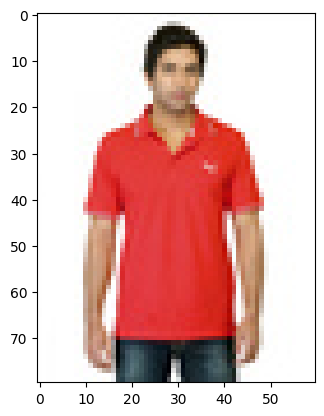

In [129]:
indeces=recommendation("/Users/khumapokharel/Desktop/deepLearning/deep_learning/FashionRecommendation_System/FashionImages/images/1537.jpg")


In [ ]:
for i in indices:
    



In [65]:
image=load_img("/Users/khumapokharel/Desktop/deepLearning/deep_learning/FashionRecommendation_System/FashionImages/images/1537.jpg")

In [79]:
image=img_to_array(image)
image=image.astype(int)


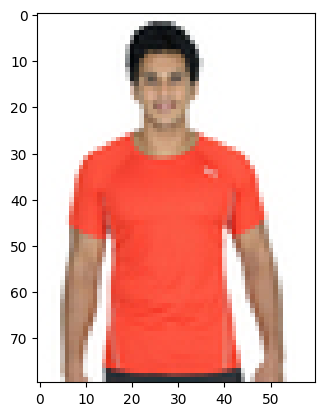

In [80]:
plt.imshow(image)